Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/c/lish-moa/discussion/196913

In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,　I don't know what to do in select notebook.
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, 'lambda_l2':3,
# Version = "v59" # inference used v53, 'lambda_l2':15,
# Version = "v60" # inference used v53, 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"
# Version = "v67" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)
# Version = "v68" # inference used v67, np.clip
# Version = "v69" # inference used v67, if _score > 0.02: np.clip
# Version = "v70" # inference used v67, adjust prediction
# Version = "v71" # inference used v67, (Threshold+0.03) >= 0.96
# Version = "v72" # inference used v67, remove "if (p_label_rate*1.5) < target_rate" from the Adj_threshold func
# Version = "v73" # inference used v67, exclusive_cols→Under_Sampling func
# Version = "v74" # inference used v67, feature engining for unpredictable_cols(create_features func 30)
# Version = "v75" # inference used v67, avoid overfit for unpredictable_cols
# Version = "v76" # inference used v67, 'feature_fraction':0.1, 'lambda_l2': 200,
# Version = "v77" # inference used v67, Add pca to create_features func 
# Version = "v78" # inference used v67,adjust lgm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.05,'subsample': 0.7,'reg_lambda': 100,
# Version = "v79" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.04,　'subsample': 0.7,'reg_lambda': 200,
# Version = "v80" # inference used v67, lgm params used v78, N_FOLD = 5
# Version = "v81" # inference used v67, lgm params used v78, N_FOLD = 5&Early_stopping_rounds=29, unpredictable_cols→ N_FOLD = 3 & Early_stopping_rounds=39

Version = "v82" # Select, DEBUG = True, 'feature_fraction':0.007, select_importance_cols(num=300), 

# Another way is to change folds from time to time, or use several kfold cv together. Then it becomes a balance between how much compute resource you want to use to validate models vs training more models.

In [2]:
DEBUG = True

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
    Learning_rate = 0.03
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30
    Learning_rate = 0.01

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3th November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manual annotation by myself
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

# Training Utils

In [12]:
def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [13]:
def Multi_Stratification(df, target_col, target):
    
    _df = df.copy() 
    sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
    # Remove sig_id wih target 
    del_idx = train[target==1].sig_id.unique()
    select_idx = [i for i in sig_id_lst if i not in del_idx]
    print(f"neg labels: {len(sig_id_lst)} → selected neg labels: {len(select_idx)}")
    
    # Select negative target
    _df = _df.set_index('sig_id')
    _df = _df.loc[select_idx, :]
    _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    
    return _df

In [14]:
#===========================================================
# model
#===========================================================
def run_lgbm(target_col: str):
    
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # Estimate test target rate
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    othr =  Multi_Stratification(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}, target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    feature_importance_df_ = pd.DataFrame()
    
    train_X, train_y, feature_importance_df_ = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    y_preds = []
    models = []
    oof_train = np.zeros((len(train_X),))
    score = 0
        
    for fold_, (train_index, valid_index) in enumerate(cv.split(train_X, train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = train_X.loc[train_index, :], train_X.loc[valid_index, :]
        y_tr, y_val = train_y[train_index], train_y[valid_index]
        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=100,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)
        y_pred = model.predict(X_test, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
        
        if DEBUG:
            models.append(model)
    
    score = log_loss(train_y, oof_train)
    
    logger.info(f"{target_col} logloss: {score}")
    logger.info(f"=========================================================================================")
    
    return sum(y_preds) / len(y_preds), score, models, feature_importance_df_

In [15]:
def convert_label(df, conf_0, conf_1, threshold=0.5):
    
    _df = df.copy()
    Probability = _df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = _df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [16]:
classifier_params = {
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'n_estimators': Num_boost_round,
    'learning_rate': 0.05,
    'objective': "binary",
    'colsample_bytree': 0.01,
    'subsample': 0.7,
    'subsample_freq': 1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': SEED,
    'n_jobs': 4,
}

In [17]:
#===========================================================
# pseudo_labeling
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
       
    X = X_train.copy()
    y = y_train.copy()
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        
        y_prob = np.zeros((X_test.shape[0]))
        
        X_conf = pd.DataFrame()
        y_conf = pd.DataFrame()
        _importance_df = pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        for fold_, (train_idx, valid_idx) in enumerate(cv.split(X, y)):        
            X_tr, X_val = X.loc[train_idx, :], X.loc[valid_idx, :]
            y_tr, y_val = y[train_idx], y[valid_idx]
            
            clf = LGBMClassifier(**classifier_params)
            
            clf.fit(X_tr, y_tr,
                    eval_set=[(X_tr, y_tr), (X_val, y_val)],
                    eval_metric='logloss',
                    verbose=100,
                    early_stopping_rounds=Early_stopping_rounds)
            
            y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
            y_prob += clf.predict_proba(X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
            # feature importance with target col
            _importance_df["importance"] = clf.feature_importances_
            feature_importance_df = pd.concat([feature_importance_df, _importance_df], axis=0)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        logger.info(f"{iter_} / {max_iter} AUC score:{auc_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.98)
        else:
            quantile = 1-y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_labels: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        high_conf_0, high_conf_1 = Threshold*0.9, Threshold*1.1
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # Set the params of threshold based on train labels rate (target_rate).
        # target_rate = target.sum() / len(target)
        
        if (p_label_rate*3) < target_rate:
            check = len(y_prob)*target_rate
            for i in range(10):
                logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
                if (sum(p_label)*2 >= check) or ((Threshold-0.01) <= 0): break 
                Threshold -= 0.01
                high_conf_0, high_conf_1 = Threshold*0.9, Threshold*1.1
                p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
               
                
        if p_label_rate > (target_rate*3):
            check = len(y_prob)*target_rate
            for i in range(10):
                logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
                if (sum(p_label) <= check*2) or ((Threshold+0.01) >= 1.0): break
                Threshold += 0.01
                high_conf_0, high_conf_1 = Threshold*0.9, min(Threshold*1.1, 0.8)
                p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
                
        if iter_ != max_iter:
            X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        else:
            X_conf = X_test.copy()
            
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
 
        X = pd.concat([X_corect, X_conf], axis=0, ignore_index=True)
        y = pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    if DEBUG:
        show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, feature_importance_df

In [18]:
def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [19]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [20]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [21]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [22]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [23]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [24]:
# clipping for control data

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [25]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [26]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [27]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [28]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [29]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [30]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')

In [31]:
std_df = data.iloc[:, 4:].copy()

In [32]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [33]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [34]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [35]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [36]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [37]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [38]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [39]:
# clipping
clipping = data.columns[4:]
for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [40]:
data['WHERE'] = Splitdata
data = data.sort_index(axis='index')
Splitdata = data['WHERE'] 
data 

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
1      id_000779bfc        1        2        0           1           2   
2      id_000a6266a        1        1        0           1           0   
3      id_0015fd391        1        1        0           0           4   
4      id_001626bd3        1        2        1           1           2   
...             ...      ...      ...      ...         ...         ...   
27791  id_ff7004b87        1        0        0           6           4   
27792  id_ff925dd0d        1        0        0           1           6   
27793  id_ffb710450        1        2        0           5           2   
27794  id_ffbb869f2        1        1        1           6           2   
27795  id_ffd5800b6        1        2        0           5           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
1                 0             4              6              2  ...   
2                 1             0              6              4  ...   
3                 2             5              0              0  ...   
4                 1             4              3              2  ...   
...             ...           ...            ...            ...  ...   
27791             1             5              6              1  ...   
27792             1             4              6              2  ...   
27793             0             4              6              2  ...   
27794             4             0              3              2  ...   
27795             1             0              6              2  ...   

       cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  bin_cnt_3  \
0              2.0          2.0       14.0         72        521       1347   
1              2.0          3.0        6.0         73        469       1408   
2              4.0          2.0       20.0         64        554       1291   
3              3.0          4.0       20.0         59        673       1059   
4              3.0          3.0       22.0         82        631       1235   
...            ...          ...        ...        ...        ...        ...   
27791          3.0          4.0        7.0         67        504       1297   
27792          3.0          3.0        6.0         69        489       1353   
27793          3.0          3.0        4.0         65        529       1412   
27794          3.0          3.0       13.0         88        636       1246   
27795          3.0          2.0        4.0         59        533       1386   

       bin_cnt_2  bin_cnt_1  bin_cnt_0  WHERE  
0            580         62         21  train  
1            591         52         21  train  
2            597         67         31  train  
3            678         98         34  train  
4            522         88         61  train  
...          ...        ...        ...    ...  
27791        652         75         18   test  
27792        607         70         27   test  
27793        519         78         13   test  
27794        535         79         22   test  
27795        555         66         18   test  

[27796 rows x 5727 columns]

In [41]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

In [42]:
# Kolmogorov-Smirnov test applied for train data and test data.

from scipy.stats import ks_2samp

tr, ts = train.iloc[:, 4:], test.iloc[:, 4:]
list_p_value =[ks_2samp(ts[i], tr[i])[1] for i in tqdm(tr.columns)]
Se = pd.Series(list_p_value, index=tr.columns).sort_values() 
list_discarded = list(Se[Se < .1].index)

train, test = train.drop(list_discarded, axis=1), test.drop(list_discarded, axis=1)
print(f"Removed {len(list_discarded)} columns")


Removed 755 columns


# Modeling

In [43]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': Learning_rate,
    'num_threads': 4,
    'verbose': -1,
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'feature_fraction':0.01, # randomly select part of features on each iteration
    'lambda_l1':0.1,
    'lambda_l2':0.1,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
}


In [44]:
def select_importance_cols(feature_importance_df, num=500):
    best_cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    return best_cols

In [45]:
def create_featureimprotance(models, feature_importance_df):
    for model in models:
        _importance_df = pd.DataFrame()
        _importance_df["Feature"] = train.columns[1:]
        _importance_df["importance"] = model.feature_importance(importance_type='gain')
        feature_importance_df = pd.concat([feature_importance_df, _importance_df], axis=0)
        
        return feature_importance_df

neg labels: 3289 → selected neg labels: 3286


5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3286, target_rate: 0.0007139 → Adj_target_rate: 0.0009334
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00575536	valid_1's binary_logloss: 0.0162259
[200]	training's binary_logloss: 0.000724673	valid_1's binary_logloss: 0.00898129
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.000423959	valid_1's binary_logloss: 0.0084719
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00636513	valid_1's binary_logloss: 0.0104911
[200]	training's binary_logloss: 0.000806437	valid_1's binary_logloss: 0.00377632
Early stopping, best iteration is:
[270]	training's binary_logloss: 0.000437414	valid_1's binary_logloss: 0.00318132


1 / 3 AUC score:1.000
y_Threshold: 0.0011514, Threshold: 0.0014530, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00071
Num_p_label: 80.0, conf_0:0.00131, conf_1:0.00160
Num_p_label: 80.0, Expected: 2.8, Adj_threshold_1: 0.0014530
Num_p_label: 0.0, Expected: 2.8, Adj_threshold_2: 0.0114530
threshold: 0.0114530, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00585493	valid_1's binary_logloss: 0.0158103
[200]	training's binary_logloss: 0.000729483	valid_1's binary_logloss: 0.00849248
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.00040822	valid_1's binary_logloss: 0.00799097
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00648143	valid_1's binary_logloss: 0.00994054
[200]	training's binary_logloss: 0.000816736	valid_1's binary_logloss: 0.0033838
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.000449218	valid_1's binary_logloss: 0.00269117


2 / 3 AUC score:1.000
y_Threshold: 0.0183775, Threshold: 0.0114530, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00071
Num_p_label: 0.0, conf_0:0.01031, conf_1:0.01260
Num_p_label: 0.0, Expected: 2.8, Adj_threshold_1: 0.0114530
Num_p_label: 169.0, Expected: 2.8, Adj_threshold_2: 0.0014530
threshold: 0.0014530, positive_p_label: 169.0/3982, p_label_rate: 0.0424410
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00585493	valid_1's binary_logloss: 0.0158103
[200]	training's binary_logloss: 0.000729483	valid_1's binary_logloss: 0.00849248
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.00040822	valid_1's binary_logloss: 0.00799097
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00648143	valid_1's binary_logloss: 0.00994054
[200]	training's binary_logloss: 0.000816736	valid_1's binary_logloss: 0.0033838
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.000449218	valid_1's binary_logloss: 0.00269117


3 / 3 AUC score:1.000
y_Threshold: 0.0183775, Threshold: 0.0014530, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0424410 Vs.target_rate: 0.00071
Num_p_label: 169.0, conf_0:0.00131, conf_1:0.00160
Num_p_label: 169.0, Expected: 2.8, Adj_threshold_1: 0.0014530
Num_p_label: 0.0, Expected: 2.8, Adj_threshold_2: 0.0114530
threshold: 0.0114530, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7793, y_label_rate: 0.0843064


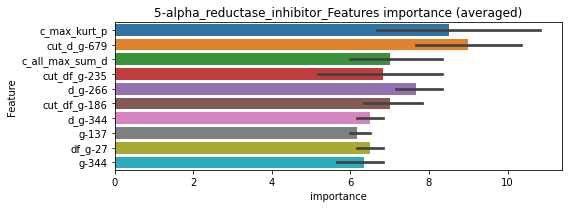

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0127922	valid_1's binary_logloss: 0.0206364
[200]	training's binary_logloss: 0.00158496	valid_1's binary_logloss: 0.00713264
[300]	training's binary_logloss: 0.000457342	valid_1's binary_logloss: 0.00518211
[400]	training's binary_logloss: 0.000240103	valid_1's binary_logloss: 0.00465964
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.000209517	valid_1's binary_logloss: 0.00459914


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0134864	valid_1's binary_logloss: 0.0160904
[200]	training's binary_logloss: 0.00176179	valid_1's binary_logloss: 0.00378116
[300]	training's binary_logloss: 0.000510406	valid_1's binary_logloss: 0.00216829
[400]	training's binary_logloss: 0.00026074	valid_1's binary_logloss: 0.00180213
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000228798	valid_1's binary_logloss: 0.00172901


5-alpha_reductase_inhibitor logloss: 0.0031642619130215596


neg labels: 3289 → selected neg labels: 3286


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00683442	valid_1's binary_logloss: 0.0186201
[200]	training's binary_logloss: 0.00090272	valid_1's binary_logloss: 0.0114072
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.000566955	valid_1's binary_logloss: 0.0107947
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0078178	valid_1's binary_logloss: 0.0138662
[200]	training's binary_logloss: 0.00105237	valid_1's binary_logloss: 0.00688118
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.000596002	valid_1's binary_logloss: 0.00642244


1 / 3 AUC score:1.000
y_Threshold: 0.0013106, Threshold: 0.0016883, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00152, conf_1:0.00186
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0016883
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0116883
threshold: 0.0116883, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00696445	valid_1's binary_logloss: 0.0183616
Early stopping, best iteration is:
[161]	training's binary_logloss: 0.00162522	valid_1's binary_logloss: 0.0124305
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00785247	valid_1's binary_logloss: 0.014018
[200]	training's binary_logloss: 0.00103172	valid_1's binary_logloss: 0.00646862
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.000666229	valid_1's binary_logloss: 0.00587609


2 / 3 AUC score:1.000
y_Threshold: 0.0132498, Threshold: 0.0116883, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.01052, conf_1:0.01286
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0116883
Num_p_label: 531.0, Expected: 3.0, Adj_threshold_2: 0.0016883
threshold: 0.0016883, positive_p_label: 531.0/3982, p_label_rate: 0.1333501
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00696445	valid_1's binary_logloss: 0.0183616
Early stopping, best iteration is:
[161]	training's binary_logloss: 0.00162522	valid_1's binary_logloss: 0.0124305
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00785247	valid_1's binary_logloss: 0.014018
[200]	training's binary_logloss: 0.00103172	valid_1's binary_logloss: 0.00646862
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.000666229	valid_1's binary_logloss: 0.00587609


3 / 3 AUC score:1.000
y_Threshold: 0.0132498, Threshold: 0.0016883, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.1333501 Vs.target_rate: 0.00076
Num_p_label: 531.0, conf_0:0.00152, conf_1:0.00186
Num_p_label: 531.0, Expected: 3.0, Adj_threshold_1: 0.0016883
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0116883
threshold: 0.0116883, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7793, y_label_rate: 0.0843064


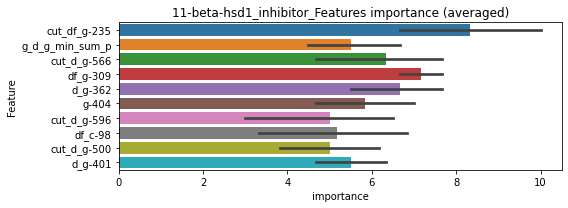

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0135871	valid_1's binary_logloss: 0.0210466
[200]	training's binary_logloss: 0.00189206	valid_1's binary_logloss: 0.00899434
[300]	training's binary_logloss: 0.000574183	valid_1's binary_logloss: 0.00724649
[400]	training's binary_logloss: 0.000297815	valid_1's binary_logloss: 0.00687598
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000269942	valid_1's binary_logloss: 0.00682229


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0142904	valid_1's binary_logloss: 0.0187023
[200]	training's binary_logloss: 0.00208649	valid_1's binary_logloss: 0.00644045
[300]	training's binary_logloss: 0.000623762	valid_1's binary_logloss: 0.00492728
[400]	training's binary_logloss: 0.000321627	valid_1's binary_logloss: 0.00457453
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000334756	valid_1's binary_logloss: 0.00456141


11-beta-hsd1_inhibitor logloss: 0.0056919951681000764


neg labels: 3289 → selected neg labels: 3285


acat_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00887695	valid_1's binary_logloss: 0.0262685
[200]	training's binary_logloss: 0.00121938	valid_1's binary_logloss: 0.0183455
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.000964009	valid_1's binary_logloss: 0.0178602
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00994339	valid_1's binary_logloss: 0.0213445
[200]	training's binary_logloss: 0.00143647	valid_1's binary_logloss: 0.0121892
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.000792126	valid_1's binary_logloss: 0.0114868


1 / 3 AUC score:1.000
y_Threshold: 0.0018450, Threshold: 0.0022603, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.00203, conf_1:0.00249
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0022603
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_2: 0.0122603
threshold: 0.0122603, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00904622	valid_1's binary_logloss: 0.0262503
[200]	training's binary_logloss: 0.00125888	valid_1's binary_logloss: 0.0187224
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.000700957	valid_1's binary_logloss: 0.0180291
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0103827	valid_1's binary_logloss: 0.0212857
[200]	training's binary_logloss: 0.00144728	valid_1's binary_logloss: 0.0114193
[300]	training's binary_logloss: 0.000641477	valid_1's binary_logloss: 0.0104321
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000666865	valid_1's binary_logloss: 0.0103616


2 / 3 AUC score:1.000
y_Threshold: 0.0071943, Threshold: 0.0122603, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00101
Num_p_label: 0.0, conf_0:0.01103, conf_1:0.01349
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_1: 0.0122603
Num_p_label: 87.0, Expected: 4.0, Adj_threshold_2: 0.0022603
threshold: 0.0022603, positive_p_label: 87.0/3982, p_label_rate: 0.0218483
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00904622	valid_1's binary_logloss: 0.0262503
[200]	training's binary_logloss: 0.00125888	valid_1's binary_logloss: 0.0187224
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.000700957	valid_1's binary_logloss: 0.0180291
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0103827	valid_1's binary_logloss: 0.0212857
[200]	training's binary_logloss: 0.00144728	valid_1's binary_logloss: 0.0114193
[300]	training's binary_logloss: 0.000641477	valid_1's binary_logloss: 0.0104321
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000666865	valid_1's binary_logloss: 0.0103616


3 / 3 AUC score:1.000
y_Threshold: 0.0071943, Threshold: 0.0022603, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0218483 Vs.target_rate: 0.00101
Num_p_label: 87.0, conf_0:0.00203, conf_1:0.00249
Num_p_label: 87.0, Expected: 4.0, Adj_threshold_1: 0.0022603
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_2: 0.0122603
threshold: 0.0122603, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7792, y_label_rate: 0.0843172


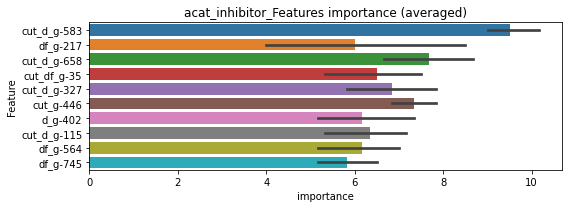

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 acat_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159737	valid_1's binary_logloss: 0.027106
[200]	training's binary_logloss: 0.00246869	valid_1's binary_logloss: 0.0130127
[300]	training's binary_logloss: 0.000767511	valid_1's binary_logloss: 0.0112567
[400]	training's binary_logloss: 0.000380751	valid_1's binary_logloss: 0.0108376
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000404461	valid_1's binary_logloss: 0.0108229


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 acat_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174073	valid_1's binary_logloss: 0.0251145
[200]	training's binary_logloss: 0.00287534	valid_1's binary_logloss: 0.0093635
[300]	training's binary_logloss: 0.000886901	valid_1's binary_logloss: 0.00713084
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00054799	valid_1's binary_logloss: 0.00662007


acat_inhibitor logloss: 0.008721498568277617


neg labels: 3289 → selected neg labels: 3259


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 3259, target_rate: 0.0079785 → Adj_target_rate: 0.0072634
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0516325	valid_1's binary_logloss: 0.193812
Early stopping, best iteration is:
[125]	training's binary_logloss: 0.0344992	valid_1's binary_logloss: 0.191651
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0613212	valid_1's binary_logloss: 0.175301
Early stopping, best iteration is:
[149]	training's binary_logloss: 0.0302112	valid_1's binary_logloss: 0.168182


1 / 3 AUC score:0.949
y_Threshold: 0.0565206, Threshold: 0.0728233, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 327 → Positive_corect_labels: 553/3583
p_label_rate: 0.0200904 Vs.target_rate: 0.00798
Num_p_label: 80.0, conf_0:0.06554, conf_1:0.08011
threshold: 0.0728233, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 553.0/3583, y_label_rate: 0.1543399
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.032887	valid_1's binary_logloss: 0.118311
Early stopping, best iteration is:
[127]	training's binary_logloss: 0.0201152	valid_1's binary_logloss: 0.111466
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0364178	valid_1's binary_logloss: 0.108422
[200]	training's binary_logloss: 0.00773382	valid_1's binary_logloss: 0.0966532
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00870568	valid_1's binary_logloss: 0.0960742


2 / 3 AUC score:0.988
y_Threshold: 0.0425320, Threshold: 0.0728233, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 84 → Positive_corect_labels: 511.0/3499
p_label_rate: 0.0025113 Vs.target_rate: 0.00798
Num_p_label: 10.0, conf_0:0.06554, conf_1:0.08011
Num_p_label: 10.0, Expected: 31.8, Adj_threshold_1: 0.0728233
Num_p_label: 19.0, Expected: 31.8, Adj_threshold_2: 0.0628233
threshold: 0.0628233, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 511.0/3499, y_label_rate: 0.1460417
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0248849	valid_1's binary_logloss: 0.0772402
Early stopping, best iteration is:
[187]	training's binary_logloss: 0.00562109	valid_1's binary_logloss: 0.0625251
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0261244	valid_1's binary_logloss: 0.0800821
[200]	training's binary_logloss: 0.0050799	valid_1's binary_logloss: 0.0666206
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.0056399	valid_1's binary_logloss: 0.0664633


3 / 3 AUC score:0.998
y_Threshold: 0.0267287, Threshold: 0.0628233, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 40 → Positive_corect_labels: 491.0/3459
p_label_rate: 0.0007534 Vs.target_rate: 0.00798
Num_p_label: 3.0, conf_0:0.05654, conf_1:0.06911
Num_p_label: 3.0, Expected: 31.8, Adj_threshold_1: 0.0628233
Num_p_label: 4.0, Expected: 31.8, Adj_threshold_2: 0.0528233
Num_p_label: 9.0, Expected: 31.8, Adj_threshold_3: 0.0428233
Num_p_label: 24.0, Expected: 31.8, Adj_threshold_4: 0.0328233
threshold: 0.0328233, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 515.0/7441, y_label_rate: 0.0692111


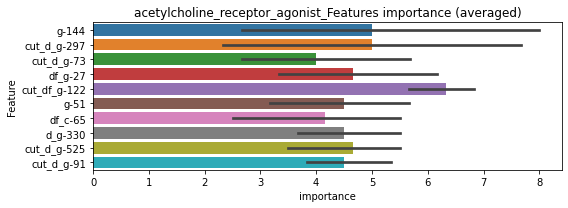

len(train_index) : 3720
len(valid_index) : 3721
================================= fold 1/2 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.02983	valid_1's binary_logloss: 0.0609504
[200]	training's binary_logloss: 0.00799621	valid_1's binary_logloss: 0.0443265
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00414204	valid_1's binary_logloss: 0.042164


len(train_index) : 3721
len(valid_index) : 3720
================================= fold 2/2 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0317104	valid_1's binary_logloss: 0.0623611
[200]	training's binary_logloss: 0.00872623	valid_1's binary_logloss: 0.0423605
[300]	training's binary_logloss: 0.00319464	valid_1's binary_logloss: 0.0384821
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00282827	valid_1's binary_logloss: 0.0380293


acetylcholine_receptor_agonist logloss: 0.040096947390415145


neg labels: 3289 → selected neg labels: 3241


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 3241, target_rate: 0.0126396 → Adj_target_rate: 0.0107394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.082389	valid_1's binary_logloss: 0.283835
Early stopping, best iteration is:
[100]	training's binary_logloss: 0.082389	valid_1's binary_logloss: 0.283835
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0894081	valid_1's binary_logloss: 0.270451
Early stopping, best iteration is:
[122]	training's binary_logloss: 0.0681142	valid_1's binary_logloss: 0.268219


1 / 3 AUC score:0.847
y_Threshold: 0.1102722, Threshold: 0.1345081, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 552 → Positive_corect_labels: 437/3337
p_label_rate: 0.0200904 Vs.target_rate: 0.01264
Num_p_label: 80.0, conf_0:0.12106, conf_1:0.14796
threshold: 0.1345081, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 437.0/3337, y_label_rate: 0.1309559
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.036007	valid_1's binary_logloss: 0.131226
Early stopping, best iteration is:
[161]	training's binary_logloss: 0.0132531	valid_1's binary_logloss: 0.12534
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0375135	valid_1's binary_logloss: 0.131755
Early stopping, best iteration is:
[154]	training's binary_logloss: 0.015825	valid_1's binary_logloss: 0.124646


2 / 3 AUC score:0.978
y_Threshold: 0.0475469, Threshold: 0.1345081, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 114 → Positive_corect_labels: 380.0/3223
p_label_rate: 0.0000000 Vs.target_rate: 0.01264
Num_p_label: 0.0, conf_0:0.12106, conf_1:0.14796
Num_p_label: 0.0, Expected: 50.3, Adj_threshold_1: 0.1345081
Num_p_label: 0.0, Expected: 50.3, Adj_threshold_2: 0.1245081
Num_p_label: 0.0, Expected: 50.3, Adj_threshold_3: 0.1145081
Num_p_label: 0.0, Expected: 50.3, Adj_threshold_4: 0.1045081
Num_p_label: 1.0, Expected: 50.3, Adj_threshold_5: 0.0945081
Num_p_label: 1.0, Expected: 50.3, Adj_threshold_6: 0.0845081
Num_p_label: 2.0, Expected: 50.3, Adj_threshold_7: 0.0745081
Num_p_label: 9.0, Expected: 50.3, Adj_threshold_8: 0.0645081
Num_p_label: 27.0, Expected: 50.3, Adj_threshold_9: 0.0545081
threshold: 0.0545081, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 380.0/3223, y_label_rate: 0.1179026
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0227265	valid_1's binary_logloss: 0.0765919
[200]	training's binary_logloss: 0.00444042	valid_1's binary_logloss: 0.0612451
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.00306095	valid_1's binary_logloss: 0.0605203
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0217725	valid_1's binary_logloss: 0.0807816
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00476432	valid_1's binary_logloss: 0.0674403


3 / 3 AUC score:0.996
y_Threshold: 0.0196710, Threshold: 0.0545081, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 30 → Positive_corect_labels: 365.0/3193
p_label_rate: 0.0000000 Vs.target_rate: 0.01264
Num_p_label: 0.0, conf_0:0.04906, conf_1:0.05996
Num_p_label: 0.0, Expected: 50.3, Adj_threshold_1: 0.0545081
Num_p_label: 0.0, Expected: 50.3, Adj_threshold_2: 0.0445081
Num_p_label: 0.0, Expected: 50.3, Adj_threshold_3: 0.0345081
Num_p_label: 4.0, Expected: 50.3, Adj_threshold_4: 0.0245081
Num_p_label: 42.0, Expected: 50.3, Adj_threshold_5: 0.0145081
threshold: 0.0145081, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 407.0/7175, y_label_rate: 0.0567247


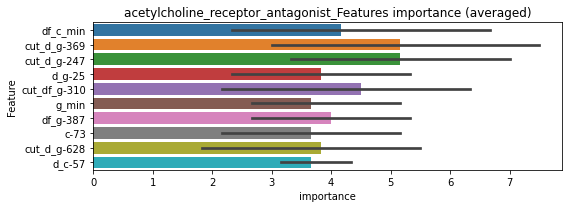

len(train_index) : 3587
len(valid_index) : 3588
================================= fold 1/2 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0306945	valid_1's binary_logloss: 0.0756284
[200]	training's binary_logloss: 0.00878287	valid_1's binary_logloss: 0.0621838
Early stopping, best iteration is:
[210]	training's binary_logloss: 0.00789655	valid_1's binary_logloss: 0.061717


len(train_index) : 3588
len(valid_index) : 3587
================================= fold 2/2 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0331085	valid_1's binary_logloss: 0.06882
[200]	training's binary_logloss: 0.0100334	valid_1's binary_logloss: 0.0531177
Early stopping, best iteration is:
[211]	training's binary_logloss: 0.00893632	valid_1's binary_logloss: 0.0527099


acetylcholine_receptor_antagonist logloss: 0.05721405562969773


neg labels: 3289 → selected neg labels: 3276


acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3276, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0257327	valid_1's binary_logloss: 0.079486
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00546512	valid_1's binary_logloss: 0.0674289
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0257804	valid_1's binary_logloss: 0.0771104
Early stopping, best iteration is:
[166]	training's binary_logloss: 0.00759909	valid_1's binary_logloss: 0.0674128


1 / 3 AUC score:0.997
y_Threshold: 0.0145783, Threshold: 0.0139832, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 146 → Positive_corect_labels: 648/3785
p_label_rate: 0.0200904 Vs.target_rate: 0.00307
Num_p_label: 80.0, conf_0:0.01258, conf_1:0.01538
Num_p_label: 80.0, Expected: 12.2, Adj_threshold_1: 0.0139832
Num_p_label: 5.0, Expected: 12.2, Adj_threshold_2: 0.0239832
threshold: 0.0239832, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 648.0/3785, y_label_rate: 0.1712021
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0241059	valid_1's binary_logloss: 0.0836065
Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00522954	valid_1's binary_logloss: 0.0737595
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0273387	valid_1's binary_logloss: 0.0655806
Early stopping, best iteration is:
[184]	training's binary_logloss: 0.00600927	valid_1's binary_logloss: 0.0534071


2 / 3 AUC score:0.996
y_Threshold: 0.0244285, Threshold: 0.0239832, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 40 → Positive_corect_labels: 628.0/3745
p_label_rate: 0.0010045 Vs.target_rate: 0.00307
Num_p_label: 4.0, conf_0:0.02158, conf_1:0.02638
Num_p_label: 4.0, Expected: 12.2, Adj_threshold_1: 0.0239832
Num_p_label: 82.0, Expected: 12.2, Adj_threshold_2: 0.0139832
threshold: 0.0139832, positive_p_label: 82.0/3982, p_label_rate: 0.0205927
positive_y_label: 628.0/3745, y_label_rate: 0.1676903
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0196019	valid_1's binary_logloss: 0.0709731
Early stopping, best iteration is:
[163]	training's binary_logloss: 0.00536522	valid_1's binary_logloss: 0.0609497
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0208558	valid_1's binary_logloss: 0.0470942
[200]	training's binary_logloss: 0.0037385	valid_1's binary_logloss: 0.0339752
Early stopping, best iteration is:
[207]	training's binary_logloss: 0.00339822	valid_1's binary_logloss: 0.033595


3 / 3 AUC score:1.000
y_Threshold: 0.0167729, Threshold: 0.0139832, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 620.0/3729
p_label_rate: 0.0037670 Vs.target_rate: 0.00307
Num_p_label: 15.0, conf_0:0.01258, conf_1:0.01538
threshold: 0.0139832, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 635.0/7711, y_label_rate: 0.0823499


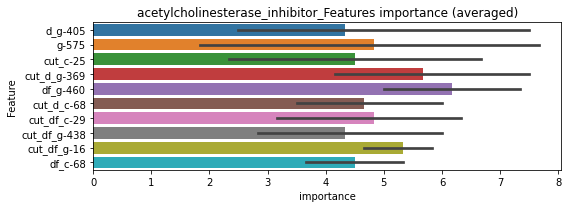

len(train_index) : 3855
len(valid_index) : 3856
================================= fold 1/2 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0274665	valid_1's binary_logloss: 0.0532897
[200]	training's binary_logloss: 0.00650561	valid_1's binary_logloss: 0.0374363
Early stopping, best iteration is:
[279]	training's binary_logloss: 0.00274589	valid_1's binary_logloss: 0.0357522


len(train_index) : 3856
len(valid_index) : 3855
================================= fold 2/2 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0311294	valid_1's binary_logloss: 0.0510949
[200]	training's binary_logloss: 0.00804223	valid_1's binary_logloss: 0.0319414
[300]	training's binary_logloss: 0.00282772	valid_1's binary_logloss: 0.0289042
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00309564	valid_1's binary_logloss: 0.028875


acetylcholinesterase_inhibitor logloss: 0.03231407889995676


neg labels: 3289 → selected neg labels: 3281


adenosine_receptor_agonist, len(trt): 54, len(othr): 3281, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.016118	valid_1's binary_logloss: 0.064357
Early stopping, best iteration is:
[168]	training's binary_logloss: 0.00401098	valid_1's binary_logloss: 0.0574719
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0202459	valid_1's binary_logloss: 0.0471642
[200]	training's binary_logloss: 0.00347855	valid_1's binary_logloss: 0.0337939
Early stopping, best iteration is:
[213]	training's binary_logloss: 0.00295806	valid_1's binary_logloss: 0.0333433


1 / 3 AUC score:0.998
y_Threshold: 0.0090431, Threshold: 0.0115904, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 138 → Positive_corect_labels: 653/3799
p_label_rate: 0.0200904 Vs.target_rate: 0.00227
Num_p_label: 80.0, conf_0:0.01043, conf_1:0.01275
Num_p_label: 80.0, Expected: 9.0, Adj_threshold_1: 0.0115904
Num_p_label: 5.0, Expected: 9.0, Adj_threshold_2: 0.0215904
threshold: 0.0215904, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0169984	valid_1's binary_logloss: 0.0572379
[200]	training's binary_logloss: 0.00279474	valid_1's binary_logloss: 0.0457983
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.00190643	valid_1's binary_logloss: 0.0449656
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0187946	valid_1's binary_logloss: 0.0483186
[200]	training's binary_logloss: 0.00318622	valid_1's binary_logloss: 0.0343019
Early stopping, best iteration is:
[215]	training's binary_logloss: 0.00264719	valid_1's binary_logloss: 0.0336069


2 / 3 AUC score:1.000
y_Threshold: 0.0214961, Threshold: 0.0215904, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0017579 Vs.target_rate: 0.00227
Num_p_label: 7.0, conf_0:0.01943, conf_1:0.02375
threshold: 0.0215904, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 649.0/3791, y_label_rate: 0.1711949
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159225	valid_1's binary_logloss: 0.0536218
[200]	training's binary_logloss: 0.00261515	valid_1's binary_logloss: 0.0430417
Early stopping, best iteration is:
[196]	training's binary_logloss: 0.0027532	valid_1's binary_logloss: 0.0429289
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174963	valid_1's binary_logloss: 0.0455241
Early stopping, best iteration is:
[175]	training's binary_logloss: 0.00417237	valid_1's binary_logloss: 0.0337082


3 / 3 AUC score:1.000
y_Threshold: 0.0219111, Threshold: 0.0215904, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 645.0/3783
p_label_rate: 0.0027624 Vs.target_rate: 0.00227
Num_p_label: 11.0, conf_0:0.01943, conf_1:0.02375
threshold: 0.0215904, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/7765, y_label_rate: 0.0844816


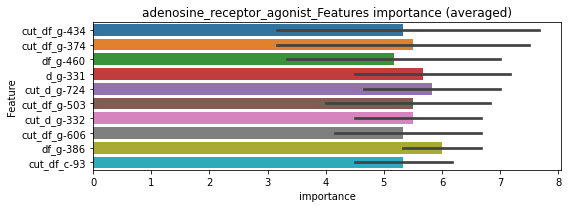

len(train_index) : 3882
len(valid_index) : 3883
================================= fold 1/2 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0236553	valid_1's binary_logloss: 0.0513875
[200]	training's binary_logloss: 0.00491826	valid_1's binary_logloss: 0.0359072
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00215461	valid_1's binary_logloss: 0.0348812


len(train_index) : 3883
len(valid_index) : 3882
================================= fold 2/2 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0275122	valid_1's binary_logloss: 0.0406465
[200]	training's binary_logloss: 0.00646869	valid_1's binary_logloss: 0.021154
[300]	training's binary_logloss: 0.0022578	valid_1's binary_logloss: 0.0178009
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.00134873	valid_1's binary_logloss: 0.0170119


adenosine_receptor_agonist logloss: 0.02594770239462553


neg labels: 3289 → selected neg labels: 3273


adenosine_receptor_antagonist, len(trt): 96, len(othr): 3273, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0296043	valid_1's binary_logloss: 0.104278
Early stopping, best iteration is:
[161]	training's binary_logloss: 0.010075	valid_1's binary_logloss: 0.0972067
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0340832	valid_1's binary_logloss: 0.0889661
[200]	training's binary_logloss: 0.00684781	valid_1's binary_logloss: 0.0747692
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.0076103	valid_1's binary_logloss: 0.0745233


1 / 3 AUC score:0.993
y_Threshold: 0.0208766, Threshold: 0.0215618, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 160 → Positive_corect_labels: 640/3767
p_label_rate: 0.0200904 Vs.target_rate: 0.00403
Num_p_label: 80.0, conf_0:0.01941, conf_1:0.02372
Num_p_label: 80.0, Expected: 16.1, Adj_threshold_1: 0.0215618
Num_p_label: 8.0, Expected: 16.1, Adj_threshold_2: 0.0315618
threshold: 0.0315618, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 640.0/3767, y_label_rate: 0.1698965
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0264291	valid_1's binary_logloss: 0.0973764
Early stopping, best iteration is:
[148]	training's binary_logloss: 0.0108671	valid_1's binary_logloss: 0.0913342
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0307661	valid_1's binary_logloss: 0.086856
[200]	training's binary_logloss: 0.00592834	valid_1's binary_logloss: 0.0726732
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00660678	valid_1's binary_logloss: 0.0726162


2 / 3 AUC score:0.993
y_Threshold: 0.0316219, Threshold: 0.0315618, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 50 → Positive_corect_labels: 615.0/3717
p_label_rate: 0.0020090 Vs.target_rate: 0.00403
Num_p_label: 8.0, conf_0:0.02841, conf_1:0.03472
threshold: 0.0315618, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 615.0/3717, y_label_rate: 0.1654560
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0223921	valid_1's binary_logloss: 0.0800458
Early stopping, best iteration is:
[165]	training's binary_logloss: 0.00649119	valid_1's binary_logloss: 0.0705575
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0259457	valid_1's binary_logloss: 0.0685045
[200]	training's binary_logloss: 0.00467598	valid_1's binary_logloss: 0.0546949
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00509109	valid_1's binary_logloss: 0.0543743


3 / 3 AUC score:0.998
y_Threshold: 0.0241963, Threshold: 0.0315618, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 24 → Positive_corect_labels: 603.0/3693
p_label_rate: 0.0002511 Vs.target_rate: 0.00403
Num_p_label: 1.0, conf_0:0.02841, conf_1:0.03472
Num_p_label: 1.0, Expected: 16.1, Adj_threshold_1: 0.0315618
Num_p_label: 10.0, Expected: 16.1, Adj_threshold_2: 0.0215618
threshold: 0.0215618, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 613.0/7675, y_label_rate: 0.0798697


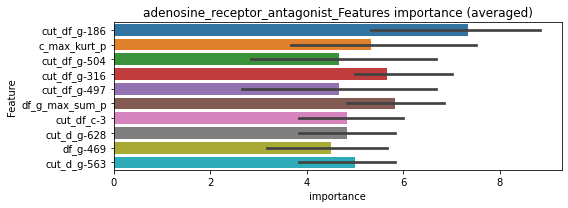

len(train_index) : 3837
len(valid_index) : 3838
================================= fold 1/2 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0289333	valid_1's binary_logloss: 0.0585413
[200]	training's binary_logloss: 0.00693795	valid_1's binary_logloss: 0.0431233
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00392863	valid_1's binary_logloss: 0.0419596


len(train_index) : 3838
len(valid_index) : 3837
================================= fold 2/2 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0326539	valid_1's binary_logloss: 0.0568439
[200]	training's binary_logloss: 0.00880497	valid_1's binary_logloss: 0.0364799
[300]	training's binary_logloss: 0.00313646	valid_1's binary_logloss: 0.0329697
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.00204296	valid_1's binary_logloss: 0.0323378


adenosine_receptor_antagonist logloss: 0.03714930700568231


neg labels: 3289 → selected neg labels: 3286


adenylyl_cyclase_activator, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00623257	valid_1's binary_logloss: 0.0175207
[200]	training's binary_logloss: 0.000776937	valid_1's binary_logloss: 0.0106688
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.000417362	valid_1's binary_logloss: 0.00987358
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00709652	valid_1's binary_logloss: 0.0125718
[200]	training's binary_logloss: 0.000888241	valid_1's binary_logloss: 0.00465564
Early stopping, best iteration is:
[279]	training's binary_logloss: 0.000451408	valid_1's binary_logloss: 0.0038767


1 / 3 AUC score:1.000
y_Threshold: 0.0010976, Threshold: 0.0014883, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00134, conf_1:0.00164
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0014883
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0114883
threshold: 0.0114883, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00638469	valid_1's binary_logloss: 0.0160772
[200]	training's binary_logloss: 0.0007843	valid_1's binary_logloss: 0.00858492
[300]	training's binary_logloss: 0.000395428	valid_1's binary_logloss: 0.00751311
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00040554	valid_1's binary_logloss: 0.00747606
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0072767	valid_1's binary_logloss: 0.0117641
[200]	training's binary_logloss: 0.000896518	valid_1's binary_logloss: 0.00423046
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000441744	valid_1's binary_logloss: 0.0035007


2 / 3 AUC score:1.000
y_Threshold: 0.0156555, Threshold: 0.0114883, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.01034, conf_1:0.01264
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0114883
Num_p_label: 160.0, Expected: 3.0, Adj_threshold_2: 0.0014883
threshold: 0.0014883, positive_p_label: 160.0/3982, p_label_rate: 0.0401808
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00638469	valid_1's binary_logloss: 0.0160772
[200]	training's binary_logloss: 0.0007843	valid_1's binary_logloss: 0.00858492
[300]	training's binary_logloss: 0.000395428	valid_1's binary_logloss: 0.00751311
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00040554	valid_1's binary_logloss: 0.00747606
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0072767	valid_1's binary_logloss: 0.0117641
[200]	training's binary_logloss: 0.000896518	valid_1's binary_logloss: 0.00423046
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000441744	valid_1's binary_logloss: 0.0035007


3 / 3 AUC score:1.000
y_Threshold: 0.0156555, Threshold: 0.0014883, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0401808 Vs.target_rate: 0.00076
Num_p_label: 160.0, conf_0:0.00134, conf_1:0.00164
Num_p_label: 160.0, Expected: 3.0, Adj_threshold_1: 0.0014883
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0114883
threshold: 0.0114883, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7793, y_label_rate: 0.0843064


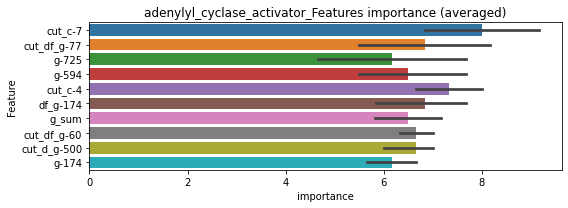

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.012877	valid_1's binary_logloss: 0.019684
[200]	training's binary_logloss: 0.00163393	valid_1's binary_logloss: 0.007659
[300]	training's binary_logloss: 0.000478898	valid_1's binary_logloss: 0.00603846
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000321465	valid_1's binary_logloss: 0.00571242


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0139198	valid_1's binary_logloss: 0.0181853
[200]	training's binary_logloss: 0.00191553	valid_1's binary_logloss: 0.00473294
[300]	training's binary_logloss: 0.000553338	valid_1's binary_logloss: 0.0029647
[400]	training's binary_logloss: 0.000279045	valid_1's binary_logloss: 0.00246629
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000242788	valid_1's binary_logloss: 0.00241137


adenylyl_cyclase_activator logloss: 0.004062105334411794


neg labels: 3289 → selected neg labels: 3244


adrenergic_receptor_agonist, len(trt): 270, len(othr): 3244, target_rate: 0.0113379 → Adj_target_rate: 0.0097917
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0726546	valid_1's binary_logloss: 0.253211
Early stopping, best iteration is:
[101]	training's binary_logloss: 0.0715044	valid_1's binary_logloss: 0.252667
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0849415	valid_1's binary_logloss: 0.232353
Early stopping, best iteration is:
[133]	training's binary_logloss: 0.0549155	valid_1's binary_logloss: 0.224185


1 / 3 AUC score:0.908
y_Threshold: 0.0936139, Threshold: 0.1112003, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 427 → Positive_corect_labels: 500/3465
p_label_rate: 0.0200904 Vs.target_rate: 0.01134
Num_p_label: 80.0, conf_0:0.10008, conf_1:0.12232
threshold: 0.1112003, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 500.0/3465, y_label_rate: 0.1443001
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0474284	valid_1's binary_logloss: 0.147004
Early stopping, best iteration is:
[147]	training's binary_logloss: 0.022552	valid_1's binary_logloss: 0.136677
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0423778	valid_1's binary_logloss: 0.16069
Early stopping, best iteration is:
[130]	training's binary_logloss: 0.0256009	valid_1's binary_logloss: 0.157137


2 / 3 AUC score:0.963
y_Threshold: 0.0628035, Threshold: 0.1112003, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 432.0/3329
p_label_rate: 0.0005023 Vs.target_rate: 0.01134
Num_p_label: 2.0, conf_0:0.10008, conf_1:0.12232
Num_p_label: 2.0, Expected: 45.1, Adj_threshold_1: 0.1112003
Num_p_label: 4.0, Expected: 45.1, Adj_threshold_2: 0.1012003
Num_p_label: 11.0, Expected: 45.1, Adj_threshold_3: 0.0912003
Num_p_label: 20.0, Expected: 45.1, Adj_threshold_4: 0.0812003
Num_p_label: 47.0, Expected: 45.1, Adj_threshold_5: 0.0712003
threshold: 0.0712003, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 432.0/3329, y_label_rate: 0.1297687
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0269079	valid_1's binary_logloss: 0.0911072
Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00629289	valid_1's binary_logloss: 0.0771726
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0268064	valid_1's binary_logloss: 0.0949488
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00628117	valid_1's binary_logloss: 0.0843726


3 / 3 AUC score:0.995
y_Threshold: 0.0285655, Threshold: 0.0712003, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 56 → Positive_corect_labels: 404.0/3273
p_label_rate: 0.0015068 Vs.target_rate: 0.01134
Num_p_label: 6.0, conf_0:0.06408, conf_1:0.07832
Num_p_label: 6.0, Expected: 45.1, Adj_threshold_1: 0.0712003
Num_p_label: 8.0, Expected: 45.1, Adj_threshold_2: 0.0612003
Num_p_label: 13.0, Expected: 45.1, Adj_threshold_3: 0.0512003
Num_p_label: 19.0, Expected: 45.1, Adj_threshold_4: 0.0412003
Num_p_label: 44.0, Expected: 45.1, Adj_threshold_5: 0.0312003
threshold: 0.0312003, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 448.0/7255, y_label_rate: 0.0617505


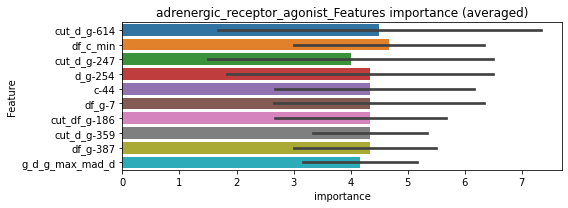

len(train_index) : 3627
len(valid_index) : 3628
================================= fold 1/2 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0326085	valid_1's binary_logloss: 0.0747638
[200]	training's binary_logloss: 0.00939306	valid_1's binary_logloss: 0.056839
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.00541099	valid_1's binary_logloss: 0.0539806


len(train_index) : 3628
len(valid_index) : 3627
================================= fold 2/2 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0339593	valid_1's binary_logloss: 0.0702968
[200]	training's binary_logloss: 0.0101999	valid_1's binary_logloss: 0.0528019
Early stopping, best iteration is:
[255]	training's binary_logloss: 0.00583592	valid_1's binary_logloss: 0.0497114


adrenergic_receptor_agonist logloss: 0.05184628383450363


neg labels: 3289 → selected neg labels: 3229


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 3229, target_rate: 0.0151172 → Adj_target_rate: 0.0125042
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0991966	valid_1's binary_logloss: 0.32464
Early stopping, best iteration is:
[107]	training's binary_logloss: 0.0911972	valid_1's binary_logloss: 0.323936
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.108791	valid_1's binary_logloss: 0.307941
Early stopping, best iteration is:
[108]	training's binary_logloss: 0.0978639	valid_1's binary_logloss: 0.305818


1 / 3 AUC score:0.809
y_Threshold: 0.1240658, Threshold: 0.1509589, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 626 → Positive_corect_labels: 397/3248
p_label_rate: 0.0200904 Vs.target_rate: 0.01512
Num_p_label: 80.0, conf_0:0.13586, conf_1:0.16605
threshold: 0.1509589, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 397.0/3248, y_label_rate: 0.1222291
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0391159	valid_1's binary_logloss: 0.172792
Early stopping, best iteration is:
[132]	training's binary_logloss: 0.0235453	valid_1's binary_logloss: 0.168331
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0468024	valid_1's binary_logloss: 0.157857
Early stopping, best iteration is:
[163]	training's binary_logloss: 0.0183706	valid_1's binary_logloss: 0.148733


2 / 3 AUC score:0.946
y_Threshold: 0.0568069, Threshold: 0.1509589, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 158 → Positive_corect_labels: 318.0/3090
p_label_rate: 0.0000000 Vs.target_rate: 0.01512
Num_p_label: 0.0, conf_0:0.13586, conf_1:0.16605
Num_p_label: 0.0, Expected: 60.2, Adj_threshold_1: 0.1509589
Num_p_label: 0.0, Expected: 60.2, Adj_threshold_2: 0.1409589
Num_p_label: 1.0, Expected: 60.2, Adj_threshold_3: 0.1309589
Num_p_label: 2.0, Expected: 60.2, Adj_threshold_4: 0.1209589
Num_p_label: 3.0, Expected: 60.2, Adj_threshold_5: 0.1109589
Num_p_label: 3.0, Expected: 60.2, Adj_threshold_6: 0.1009589
Num_p_label: 5.0, Expected: 60.2, Adj_threshold_7: 0.0909589
Num_p_label: 10.0, Expected: 60.2, Adj_threshold_8: 0.0809589
Num_p_label: 19.0, Expected: 60.2, Adj_threshold_9: 0.0709589
Num_p_label: 39.0, Expected: 60.2, Adj_threshold_10: 0.0609589
threshold: 0.0609589, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 318.0/3090, y_label_rate: 0.1029126
=====

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.021889	valid_1's binary_logloss: 0.0880084
Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00496878	valid_1's binary_logloss: 0.0752769
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0203087	valid_1's binary_logloss: 0.0814325
Early stopping, best iteration is:
[180]	training's binary_logloss: 0.00509994	valid_1's binary_logloss: 0.0697057


3 / 3 AUC score:0.995
y_Threshold: 0.0202422, Threshold: 0.0609589, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 36 → Positive_corect_labels: 300.0/3054
p_label_rate: 0.0000000 Vs.target_rate: 0.01512
Num_p_label: 0.0, conf_0:0.05486, conf_1:0.06705
Num_p_label: 0.0, Expected: 60.2, Adj_threshold_1: 0.0609589
Num_p_label: 0.0, Expected: 60.2, Adj_threshold_2: 0.0509589
Num_p_label: 0.0, Expected: 60.2, Adj_threshold_3: 0.0409589
Num_p_label: 2.0, Expected: 60.2, Adj_threshold_4: 0.0309589
Num_p_label: 14.0, Expected: 60.2, Adj_threshold_5: 0.0209589
Num_p_label: 188.0, Expected: 60.2, Adj_threshold_6: 0.0109589
threshold: 0.0109589, positive_p_label: 188.0/3982, p_label_rate: 0.0472125
positive_y_label: 488.0/7036, y_label_rate: 0.0693576


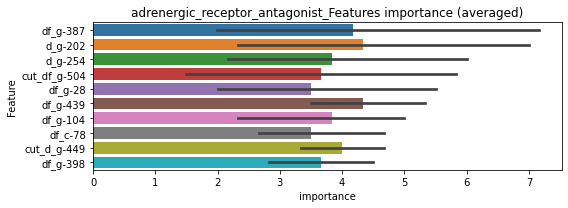

len(train_index) : 3518
len(valid_index) : 3518
================================= fold 1/2 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0591294	valid_1's binary_logloss: 0.136146
[200]	training's binary_logloss: 0.0221421	valid_1's binary_logloss: 0.124553
Early stopping, best iteration is:
[198]	training's binary_logloss: 0.0225544	valid_1's binary_logloss: 0.124382


len(train_index) : 3518
len(valid_index) : 3518
================================= fold 2/2 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0642547	valid_1's binary_logloss: 0.132891
[200]	training's binary_logloss: 0.025129	valid_1's binary_logloss: 0.118954
Early stopping, best iteration is:
[236]	training's binary_logloss: 0.018124	valid_1's binary_logloss: 0.117615


adrenergic_receptor_antagonist logloss: 0.1209988612901992


neg labels: 3289 → selected neg labels: 3278


akt_inhibitor, len(trt): 66, len(othr): 3278, target_rate: 0.0027715 → Adj_target_rate: 0.0029567
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0155414	valid_1's binary_logloss: 0.0559708
[200]	training's binary_logloss: 0.00242781	valid_1's binary_logloss: 0.0417313
Early stopping, best iteration is:
[228]	training's binary_logloss: 0.0017495	valid_1's binary_logloss: 0.0408311
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174485	valid_1's binary_logloss: 0.0410954
[200]	training's binary_logloss: 0.00294045	valid_1's binary_logloss: 0.0248826
Early stopping, best iteration is:
[271]	training's binary_logloss: 0.0014521	valid_1's binary_logloss: 0.0229786


1 / 3 AUC score:0.999
y_Threshold: 0.0086191, Threshold: 0.0186175, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0200904 Vs.target_rate: 0.00277
Num_p_label: 80.0, conf_0:0.01676, conf_1:0.02048
Num_p_label: 80.0, Expected: 11.0, Adj_threshold_1: 0.0186175
Num_p_label: 55.0, Expected: 11.0, Adj_threshold_2: 0.0286175
Num_p_label: 44.0, Expected: 11.0, Adj_threshold_3: 0.0386175
Num_p_label: 32.0, Expected: 11.0, Adj_threshold_4: 0.0486175
Num_p_label: 29.0, Expected: 11.0, Adj_threshold_5: 0.0586175
Num_p_label: 25.0, Expected: 11.0, Adj_threshold_6: 0.0686175
Num_p_label: 23.0, Expected: 11.0, Adj_threshold_7: 0.0786175
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_8: 0.0886175
threshold: 0.0886175, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0152296	valid_1's binary_logloss: 0.0477926
[200]	training's binary_logloss: 0.00235123	valid_1's binary_logloss: 0.0351314
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00147136	valid_1's binary_logloss: 0.0339799
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0164265	valid_1's binary_logloss: 0.0416725
[200]	training's binary_logloss: 0.00273084	valid_1's binary_logloss: 0.0254819
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.00156673	valid_1's binary_logloss: 0.0235107


2 / 3 AUC score:1.000
y_Threshold: 0.0434467, Threshold: 0.0886175, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 20 → Positive_corect_labels: 644.0/3779
p_label_rate: 0.0200904 Vs.target_rate: 0.00277
Num_p_label: 80.0, conf_0:0.07976, conf_1:0.09748
Num_p_label: 80.0, Expected: 11.0, Adj_threshold_1: 0.0886175
Num_p_label: 75.0, Expected: 11.0, Adj_threshold_2: 0.0986175
Num_p_label: 70.0, Expected: 11.0, Adj_threshold_3: 0.1086175
Num_p_label: 61.0, Expected: 11.0, Adj_threshold_4: 0.1186175
Num_p_label: 57.0, Expected: 11.0, Adj_threshold_5: 0.1286175
Num_p_label: 52.0, Expected: 11.0, Adj_threshold_6: 0.1386175
Num_p_label: 52.0, Expected: 11.0, Adj_threshold_7: 0.1486175
Num_p_label: 48.0, Expected: 11.0, Adj_threshold_8: 0.1586175
Num_p_label: 46.0, Expected: 11.0, Adj_threshold_9: 0.1686175
Num_p_label: 43.0, Expected: 11.0, Adj_threshold_10: 0.1786175
threshold: 0.1886175, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 644.0/3779, y_label_rate: 0.170415

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0133489	valid_1's binary_logloss: 0.0369324
[200]	training's binary_logloss: 0.00208244	valid_1's binary_logloss: 0.0242786
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.0012495	valid_1's binary_logloss: 0.0229457
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0148771	valid_1's binary_logloss: 0.0336362
[200]	training's binary_logloss: 0.00239828	valid_1's binary_logloss: 0.0168447
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.00108798	valid_1's binary_logloss: 0.0144383


3 / 3 AUC score:1.000
y_Threshold: 0.0398843, Threshold: 0.1886175, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 639.0/3769
p_label_rate: 0.0120542 Vs.target_rate: 0.00277
Num_p_label: 48.0, conf_0:0.16976, conf_1:0.20748
Num_p_label: 48.0, Expected: 11.0, Adj_threshold_1: 0.1886175
Num_p_label: 47.0, Expected: 11.0, Adj_threshold_2: 0.1986175
Num_p_label: 43.0, Expected: 11.0, Adj_threshold_3: 0.2086175
Num_p_label: 41.0, Expected: 11.0, Adj_threshold_4: 0.2186175
Num_p_label: 38.0, Expected: 11.0, Adj_threshold_5: 0.2286175
Num_p_label: 37.0, Expected: 11.0, Adj_threshold_6: 0.2386175
Num_p_label: 36.0, Expected: 11.0, Adj_threshold_7: 0.2486175
Num_p_label: 33.0, Expected: 11.0, Adj_threshold_8: 0.2586175
Num_p_label: 32.0, Expected: 11.0, Adj_threshold_9: 0.2686175
Num_p_label: 31.0, Expected: 11.0, Adj_threshold_10: 0.2786175
threshold: 0.2886175, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 669.0/7751, y_label_rate: 0.086311

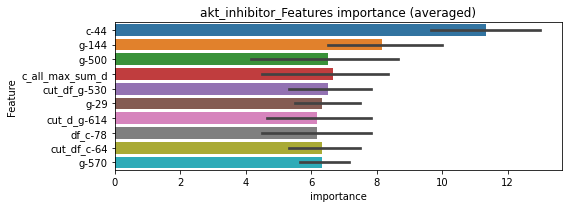

len(train_index) : 3875
len(valid_index) : 3876
================================= fold 1/2 akt_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0214864	valid_1's binary_logloss: 0.0438987
[200]	training's binary_logloss: 0.00419197	valid_1's binary_logloss: 0.025727
[300]	training's binary_logloss: 0.0013995	valid_1's binary_logloss: 0.023011
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.000996755	valid_1's binary_logloss: 0.0226635


len(train_index) : 3876
len(valid_index) : 3875
================================= fold 2/2 akt_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0236482	valid_1's binary_logloss: 0.0399199
[200]	training's binary_logloss: 0.00490486	valid_1's binary_logloss: 0.0193045
[300]	training's binary_logloss: 0.00166312	valid_1's binary_logloss: 0.0145342
[400]	training's binary_logloss: 0.000843732	valid_1's binary_logloss: 0.0128598
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00065475	valid_1's binary_logloss: 0.0123133


akt_inhibitor logloss: 0.01748910047635486


neg labels: 3289 → selected neg labels: 3286


aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0064662	valid_1's binary_logloss: 0.0192019
[200]	training's binary_logloss: 0.000863375	valid_1's binary_logloss: 0.0120717
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.000718268	valid_1's binary_logloss: 0.0118625
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00731756	valid_1's binary_logloss: 0.0117101
[200]	training's binary_logloss: 0.00100091	valid_1's binary_logloss: 0.00455029
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.000608116	valid_1's binary_logloss: 0.00389635


1 / 3 AUC score:1.000
y_Threshold: 0.0018233, Threshold: 0.0025374, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00080
Num_p_label: 80.0, conf_0:0.00228, conf_1:0.00279
Num_p_label: 80.0, Expected: 3.2, Adj_threshold_1: 0.0025374
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_2: 0.0125374
threshold: 0.0125374, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00662652	valid_1's binary_logloss: 0.0182897
[200]	training's binary_logloss: 0.000870026	valid_1's binary_logloss: 0.0110624
Early stopping, best iteration is:
[217]	training's binary_logloss: 0.000714118	valid_1's binary_logloss: 0.0107322
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00750018	valid_1's binary_logloss: 0.0119022
[200]	training's binary_logloss: 0.00100218	valid_1's binary_logloss: 0.00497953
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000611203	valid_1's binary_logloss: 0.00432174


2 / 3 AUC score:1.000
y_Threshold: 0.0192566, Threshold: 0.0125374, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0032647 Vs.target_rate: 0.00080
Num_p_label: 13.0, conf_0:0.01128, conf_1:0.01379
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_1: 0.0125374
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_2: 0.0225374
threshold: 0.0225374, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00662652	valid_1's binary_logloss: 0.0182897
[200]	training's binary_logloss: 0.000870026	valid_1's binary_logloss: 0.0110624
Early stopping, best iteration is:
[217]	training's binary_logloss: 0.000714118	valid_1's binary_logloss: 0.0107322
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00750018	valid_1's binary_logloss: 0.0119022
[200]	training's binary_logloss: 0.00100218	valid_1's binary_logloss: 0.00497953
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000611203	valid_1's binary_logloss: 0.00432174


3 / 3 AUC score:1.000
y_Threshold: 0.0192566, Threshold: 0.0225374, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00080
Num_p_label: 2.0, conf_0:0.02028, conf_1:0.02479
threshold: 0.0225374, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7793, y_label_rate: 0.0845631


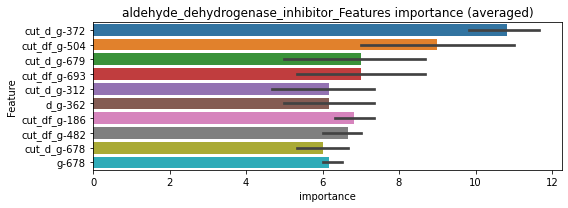

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.013718	valid_1's binary_logloss: 0.0203619
[200]	training's binary_logloss: 0.0019233	valid_1's binary_logloss: 0.00790141
[300]	training's binary_logloss: 0.000579037	valid_1's binary_logloss: 0.00621974
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.00032097	valid_1's binary_logloss: 0.0058697


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0138821	valid_1's binary_logloss: 0.0190011
[200]	training's binary_logloss: 0.00197615	valid_1's binary_logloss: 0.00730125
[300]	training's binary_logloss: 0.00059604	valid_1's binary_logloss: 0.00584897
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.000404801	valid_1's binary_logloss: 0.00566776


aldehyde_dehydrogenase_inhibitor logloss: 0.005768742281246501


neg labels: 3289 → selected neg labels: 3282


alk_inhibitor, len(trt): 42, len(othr): 3282, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0114761	valid_1's binary_logloss: 0.0408732
[200]	training's binary_logloss: 0.00172377	valid_1's binary_logloss: 0.0305861
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00108956	valid_1's binary_logloss: 0.029356
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0134748	valid_1's binary_logloss: 0.0349482
[200]	training's binary_logloss: 0.00209836	valid_1's binary_logloss: 0.0219538
[300]	training's binary_logloss: 0.000878449	valid_1's binary_logloss: 0.0201563
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.000685656	valid_1's binary_logloss: 0.0195556


1 / 3 AUC score:1.000
y_Threshold: 0.0044255, Threshold: 0.0072551, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0200904 Vs.target_rate: 0.00176
Num_p_label: 80.0, conf_0:0.00653, conf_1:0.00798
Num_p_label: 80.0, Expected: 7.0, Adj_threshold_1: 0.0072551
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_2: 0.0172551
threshold: 0.0172551, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0116187	valid_1's binary_logloss: 0.0421738
[200]	training's binary_logloss: 0.00171668	valid_1's binary_logloss: 0.0299236
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00107195	valid_1's binary_logloss: 0.0286452
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0132687	valid_1's binary_logloss: 0.0315197
[200]	training's binary_logloss: 0.00202954	valid_1's binary_logloss: 0.0183917
[300]	training's binary_logloss: 0.000837131	valid_1's binary_logloss: 0.0163155
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.000777728	valid_1's binary_logloss: 0.016085


2 / 3 AUC score:1.000
y_Threshold: 0.0298029, Threshold: 0.0172551, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 650.0/3794
p_label_rate: 0.0281266 Vs.target_rate: 0.00176
Num_p_label: 112.0, conf_0:0.01553, conf_1:0.01898
Num_p_label: 112.0, Expected: 7.0, Adj_threshold_1: 0.0172551
Num_p_label: 77.0, Expected: 7.0, Adj_threshold_2: 0.0272551
Num_p_label: 63.0, Expected: 7.0, Adj_threshold_3: 0.0372551
Num_p_label: 55.0, Expected: 7.0, Adj_threshold_4: 0.0472551
Num_p_label: 42.0, Expected: 7.0, Adj_threshold_5: 0.0572551
Num_p_label: 37.0, Expected: 7.0, Adj_threshold_6: 0.0672551
Num_p_label: 32.0, Expected: 7.0, Adj_threshold_7: 0.0772551
Num_p_label: 25.0, Expected: 7.0, Adj_threshold_8: 0.0872551
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_9: 0.0972551
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_10: 0.1072551
threshold: 0.1072551, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 650.0/3794, y_label_rate: 0.1713231
======

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0117941	valid_1's binary_logloss: 0.0293304
[200]	training's binary_logloss: 0.00174904	valid_1's binary_logloss: 0.0164979
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.00110952	valid_1's binary_logloss: 0.0151629
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0117855	valid_1's binary_logloss: 0.0345043
[200]	training's binary_logloss: 0.00175856	valid_1's binary_logloss: 0.02459
Early stopping, best iteration is:
[236]	training's binary_logloss: 0.00117012	valid_1's binary_logloss: 0.0237077


3 / 3 AUC score:1.000
y_Threshold: 0.0387188, Threshold: 0.1072551, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 647.0/3788
p_label_rate: 0.0045203 Vs.target_rate: 0.00176
Num_p_label: 18.0, conf_0:0.09653, conf_1:0.11798
threshold: 0.1072551, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 665.0/7770, y_label_rate: 0.0855856


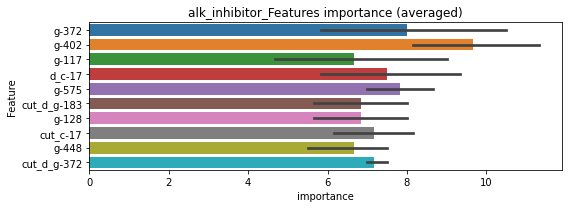

len(train_index) : 3885
len(valid_index) : 3885
================================= fold 1/2 alk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0195331	valid_1's binary_logloss: 0.0370486
[200]	training's binary_logloss: 0.00380477	valid_1's binary_logloss: 0.0211419
[300]	training's binary_logloss: 0.00129877	valid_1's binary_logloss: 0.0181427
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.0011602	valid_1's binary_logloss: 0.0179674


len(train_index) : 3885
len(valid_index) : 3885
================================= fold 2/2 alk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0208136	valid_1's binary_logloss: 0.0354673
[200]	training's binary_logloss: 0.00404248	valid_1's binary_logloss: 0.0179844
[300]	training's binary_logloss: 0.00134147	valid_1's binary_logloss: 0.0147581
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.000972554	valid_1's binary_logloss: 0.0143074


alk_inhibitor logloss: 0.016137392088443777


neg labels: 3289 → selected neg labels: 3287


ampk_activator, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00509089	valid_1's binary_logloss: 0.012626
[200]	training's binary_logloss: 0.000639535	valid_1's binary_logloss: 0.00752705
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.000364768	valid_1's binary_logloss: 0.00711939
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0056234	valid_1's binary_logloss: 0.00928577
[200]	training's binary_logloss: 0.000695246	valid_1's binary_logloss: 0.00427873
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.00037695	valid_1's binary_logloss: 0.00382364


1 / 3 AUC score:1.000
y_Threshold: 0.0007238, Threshold: 0.0009644, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00087, conf_1:0.00106
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0009644
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0109644
threshold: 0.0109644, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00527698	valid_1's binary_logloss: 0.0132283
[200]	training's binary_logloss: 0.000659907	valid_1's binary_logloss: 0.00753369
Early stopping, best iteration is:
[247]	training's binary_logloss: 0.000432683	valid_1's binary_logloss: 0.00702154
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00574523	valid_1's binary_logloss: 0.0092207
[200]	training's binary_logloss: 0.000700107	valid_1's binary_logloss: 0.00410496
Early stopping, best iteration is:
[213]	training's binary_logloss: 0.000610477	valid_1's binary_logloss: 0.00399451


2 / 3 AUC score:1.000
y_Threshold: 0.0077536, Threshold: 0.0109644, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, conf_0:0.00987, conf_1:0.01206
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0109644
Num_p_label: 280.0, Expected: 2.0, Adj_threshold_2: 0.0009644
threshold: 0.0009644, positive_p_label: 280.0/3982, p_label_rate: 0.0703164
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00527698	valid_1's binary_logloss: 0.0132283
[200]	training's binary_logloss: 0.000659907	valid_1's binary_logloss: 0.00753369
Early stopping, best iteration is:
[247]	training's binary_logloss: 0.000432683	valid_1's binary_logloss: 0.00702154
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00574523	valid_1's binary_logloss: 0.0092207
[200]	training's binary_logloss: 0.000700107	valid_1's binary_logloss: 0.00410496
Early stopping, best iteration is:
[213]	training's binary_logloss: 0.000610477	valid_1's binary_logloss: 0.00399451


3 / 3 AUC score:1.000
y_Threshold: 0.0077536, Threshold: 0.0009644, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0703164 Vs.target_rate: 0.00050
Num_p_label: 280.0, conf_0:0.00087, conf_1:0.00106
Num_p_label: 280.0, Expected: 2.0, Adj_threshold_1: 0.0009644
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0109644
threshold: 0.0109644, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7794, y_label_rate: 0.0842956


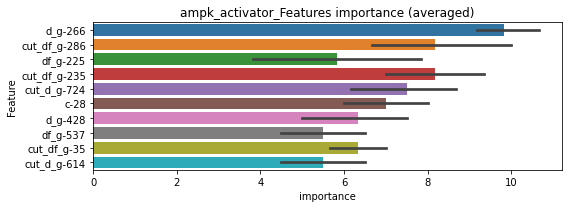

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 ampk_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0115672	valid_1's binary_logloss: 0.0168064
[200]	training's binary_logloss: 0.00138285	valid_1's binary_logloss: 0.0060992
[300]	training's binary_logloss: 0.00040242	valid_1's binary_logloss: 0.00489048
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000267328	valid_1's binary_logloss: 0.00468083


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 ampk_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0124288	valid_1's binary_logloss: 0.0150048
[200]	training's binary_logloss: 0.00155932	valid_1's binary_logloss: 0.0036079
[300]	training's binary_logloss: 0.000443556	valid_1's binary_logloss: 0.00234832
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000262126	valid_1's binary_logloss: 0.00215253


ampk_activator logloss: 0.0034166768331317233


neg labels: 3289 → selected neg labels: 3287


analgesic, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00541354	valid_1's binary_logloss: 0.0111587
[200]	training's binary_logloss: 0.000633946	valid_1's binary_logloss: 0.00459517
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.000400517	valid_1's binary_logloss: 0.00400503
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00551644	valid_1's binary_logloss: 0.00852872
[200]	training's binary_logloss: 0.000666925	valid_1's binary_logloss: 0.00314445
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.000374773	valid_1's binary_logloss: 0.0026744


1 / 3 AUC score:1.000
y_Threshold: 0.0008300, Threshold: 0.0011368, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00102, conf_1:0.00125
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0011368
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0111368
threshold: 0.0111368, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0055408	valid_1's binary_logloss: 0.0105842
[200]	training's binary_logloss: 0.000653985	valid_1's binary_logloss: 0.00405815
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.000407823	valid_1's binary_logloss: 0.0035738
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00558929	valid_1's binary_logloss: 0.00867662
[200]	training's binary_logloss: 0.000659618	valid_1's binary_logloss: 0.0029396
Early stopping, best iteration is:
[271]	training's binary_logloss: 0.000383199	valid_1's binary_logloss: 0.00248536


2 / 3 AUC score:1.000
y_Threshold: 0.0235547, Threshold: 0.0111368, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, conf_0:0.01002, conf_1:0.01225
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0111368
Num_p_label: 163.0, Expected: 2.0, Adj_threshold_2: 0.0011368
threshold: 0.0011368, positive_p_label: 163.0/3982, p_label_rate: 0.0409342
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0055408	valid_1's binary_logloss: 0.0105842
[200]	training's binary_logloss: 0.000653985	valid_1's binary_logloss: 0.00405815
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.000407823	valid_1's binary_logloss: 0.0035738
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00558929	valid_1's binary_logloss: 0.00867662
[200]	training's binary_logloss: 0.000659618	valid_1's binary_logloss: 0.0029396
Early stopping, best iteration is:
[271]	training's binary_logloss: 0.000383199	valid_1's binary_logloss: 0.00248536


3 / 3 AUC score:1.000
y_Threshold: 0.0235547, Threshold: 0.0011368, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0409342 Vs.target_rate: 0.00050
Num_p_label: 163.0, conf_0:0.00102, conf_1:0.00125
Num_p_label: 163.0, Expected: 2.0, Adj_threshold_1: 0.0011368
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0111368
threshold: 0.0111368, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7794, y_label_rate: 0.0842956


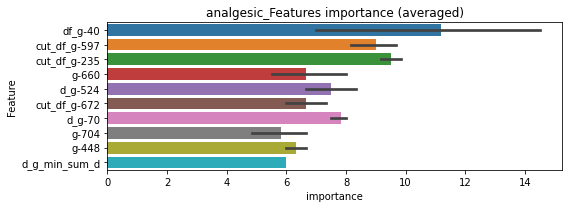

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 analgesic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0117692	valid_1's binary_logloss: 0.0163263
[200]	training's binary_logloss: 0.00142213	valid_1's binary_logloss: 0.00458641
[300]	training's binary_logloss: 0.000408705	valid_1's binary_logloss: 0.00304133
[400]	training's binary_logloss: 0.000216593	valid_1's binary_logloss: 0.00271884
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.000201228	valid_1's binary_logloss: 0.00269647


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 analgesic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.012174	valid_1's binary_logloss: 0.0145279
[200]	training's binary_logloss: 0.00152381	valid_1's binary_logloss: 0.00331376
[300]	training's binary_logloss: 0.000434096	valid_1's binary_logloss: 0.00204298
[400]	training's binary_logloss: 0.000225387	valid_1's binary_logloss: 0.00175667
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00018136	valid_1's binary_logloss: 0.00169431


analgesic logloss: 0.0021953890447554796


neg labels: 3289 → selected neg labels: 3281


androgen_receptor_agonist, len(trt): 48, len(othr): 3281, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0151593	valid_1's binary_logloss: 0.0614452
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.0035712	valid_1's binary_logloss: 0.0521944
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0180214	valid_1's binary_logloss: 0.043645
[200]	training's binary_logloss: 0.00303411	valid_1's binary_logloss: 0.0300293
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00199629	valid_1's binary_logloss: 0.0292672


1 / 3 AUC score:1.000
y_Threshold: 0.0070663, Threshold: 0.0078453, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0200904 Vs.target_rate: 0.00202
Num_p_label: 80.0, conf_0:0.00706, conf_1:0.00863
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_1: 0.0078453
Num_p_label: 3.0, Expected: 8.0, Adj_threshold_2: 0.0178453
threshold: 0.0178453, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0175351	valid_1's binary_logloss: 0.053492
[200]	training's binary_logloss: 0.00276731	valid_1's binary_logloss: 0.042024
Early stopping, best iteration is:
[226]	training's binary_logloss: 0.0020258	valid_1's binary_logloss: 0.0412688
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0173665	valid_1's binary_logloss: 0.0452764
[200]	training's binary_logloss: 0.00289291	valid_1's binary_logloss: 0.0330431
Early stopping, best iteration is:
[201]	training's binary_logloss: 0.00285847	valid_1's binary_logloss: 0.0329015


2 / 3 AUC score:1.000
y_Threshold: 0.0185143, Threshold: 0.0178453, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, conf_0:0.01606, conf_1:0.01963
threshold: 0.0178453, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0155885	valid_1's binary_logloss: 0.0517526
[200]	training's binary_logloss: 0.0025221	valid_1's binary_logloss: 0.0403363
Early stopping, best iteration is:
[202]	training's binary_logloss: 0.00245572	valid_1's binary_logloss: 0.0402104
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0176014	valid_1's binary_logloss: 0.0442825
[200]	training's binary_logloss: 0.00286895	valid_1's binary_logloss: 0.032687
Early stopping, best iteration is:
[220]	training's binary_logloss: 0.0022315	valid_1's binary_logloss: 0.0321812


3 / 3 AUC score:1.000
y_Threshold: 0.0169235, Threshold: 0.0178453, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0027624 Vs.target_rate: 0.00202
Num_p_label: 11.0, conf_0:0.01606, conf_1:0.01963
threshold: 0.0178453, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 658.0/7769, y_label_rate: 0.0846956


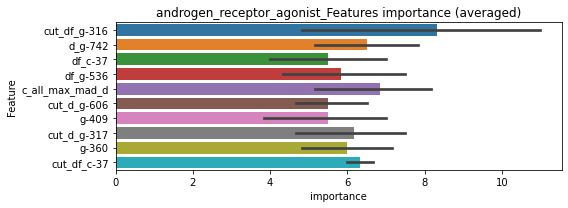

len(train_index) : 3884
len(valid_index) : 3885
================================= fold 1/2 androgen_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0232182	valid_1's binary_logloss: 0.0480528
[200]	training's binary_logloss: 0.00480955	valid_1's binary_logloss: 0.031903
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.0023091	valid_1's binary_logloss: 0.0305155


len(train_index) : 3885
len(valid_index) : 3884
================================= fold 2/2 androgen_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.02756	valid_1's binary_logloss: 0.0411664
[200]	training's binary_logloss: 0.00622505	valid_1's binary_logloss: 0.0229287
[300]	training's binary_logloss: 0.00209977	valid_1's binary_logloss: 0.0200736
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.0013556	valid_1's binary_logloss: 0.0196279


androgen_receptor_agonist logloss: 0.025072397184983698


neg labels: 3289 → selected neg labels: 3274


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274, target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0279262	valid_1's binary_logloss: 0.101081
Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00814515	valid_1's binary_logloss: 0.0929672
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0324624	valid_1's binary_logloss: 0.0840631
Early stopping, best iteration is:
[184]	training's binary_logloss: 0.00781366	valid_1's binary_logloss: 0.0723798


1 / 3 AUC score:0.992
y_Threshold: 0.0184823, Threshold: 0.0193305, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 168 → Positive_corect_labels: 636/3760
p_label_rate: 0.0200904 Vs.target_rate: 0.00374
Num_p_label: 80.0, conf_0:0.01740, conf_1:0.02126
Num_p_label: 80.0, Expected: 14.9, Adj_threshold_1: 0.0193305
Num_p_label: 8.0, Expected: 14.9, Adj_threshold_2: 0.0293305
threshold: 0.0293305, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 636.0/3760, y_label_rate: 0.1691489
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0261762	valid_1's binary_logloss: 0.0810404
Early stopping, best iteration is:
[154]	training's binary_logloss: 0.00977379	valid_1's binary_logloss: 0.0706586
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0270337	valid_1's binary_logloss: 0.073864
[200]	training's binary_logloss: 0.00535877	valid_1's binary_logloss: 0.0602058
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00596058	valid_1's binary_logloss: 0.0599998


2 / 3 AUC score:0.996
y_Threshold: 0.0324774, Threshold: 0.0293305, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 20 → Positive_corect_labels: 626.0/3740
p_label_rate: 0.0020090 Vs.target_rate: 0.00374
Num_p_label: 8.0, conf_0:0.02640, conf_1:0.03226
threshold: 0.0293305, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 626.0/3740, y_label_rate: 0.1673797
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0230772	valid_1's binary_logloss: 0.0824705
Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00516634	valid_1's binary_logloss: 0.073365
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0272682	valid_1's binary_logloss: 0.0728592
[200]	training's binary_logloss: 0.00493699	valid_1's binary_logloss: 0.0561244
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00540169	valid_1's binary_logloss: 0.0559459


3 / 3 AUC score:0.998
y_Threshold: 0.0223028, Threshold: 0.0293305, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 26 → Positive_corect_labels: 613.0/3714
p_label_rate: 0.0012557 Vs.target_rate: 0.00374
Num_p_label: 5.0, conf_0:0.02640, conf_1:0.03226
threshold: 0.0293305, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 618.0/7696, y_label_rate: 0.0803015


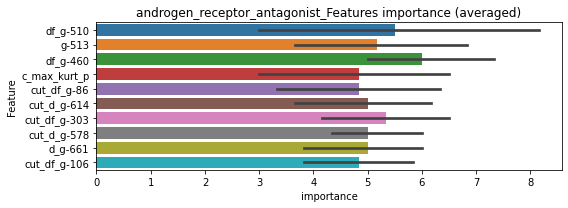

len(train_index) : 3848
len(valid_index) : 3848
================================= fold 1/2 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0275896	valid_1's binary_logloss: 0.0593037
[200]	training's binary_logloss: 0.00670174	valid_1's binary_logloss: 0.0423181
[300]	training's binary_logloss: 0.0022961	valid_1's binary_logloss: 0.0399096
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.00240168	valid_1's binary_logloss: 0.0398539


len(train_index) : 3848
len(valid_index) : 3848
================================= fold 2/2 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0320099	valid_1's binary_logloss: 0.0495034
[200]	training's binary_logloss: 0.00854459	valid_1's binary_logloss: 0.029723
[300]	training's binary_logloss: 0.0030169	valid_1's binary_logloss: 0.0258204
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00244175	valid_1's binary_logloss: 0.0254711


androgen_receptor_antagonist logloss: 0.032662455215246196


neg labels: 3289 → selected neg labels: 3276


anesthetic_-_local, len(trt): 80, len(othr): 3276, target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0254211	valid_1's binary_logloss: 0.0909187
Early stopping, best iteration is:
[169]	training's binary_logloss: 0.00723354	valid_1's binary_logloss: 0.0827631
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0271263	valid_1's binary_logloss: 0.0851599
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00664294	valid_1's binary_logloss: 0.0738633


1 / 3 AUC score:0.993
y_Threshold: 0.0158732, Threshold: 0.0166161, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 166 → Positive_corect_labels: 638/3765
p_label_rate: 0.0200904 Vs.target_rate: 0.00336
Num_p_label: 80.0, conf_0:0.01495, conf_1:0.01828
Num_p_label: 80.0, Expected: 13.4, Adj_threshold_1: 0.0166161
Num_p_label: 5.0, Expected: 13.4, Adj_threshold_2: 0.0266161
threshold: 0.0266161, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 638.0/3765, y_label_rate: 0.1694555
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0235732	valid_1's binary_logloss: 0.0765543
[200]	training's binary_logloss: 0.00431094	valid_1's binary_logloss: 0.0660837
Early stopping, best iteration is:
[200]	training's binary_logloss: 0.00431094	valid_1's binary_logloss: 0.0660837
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0248306	valid_1's binary_logloss: 0.069999
Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00497303	valid_1's binary_logloss: 0.0575445


2 / 3 AUC score:0.998
y_Threshold: 0.0208154, Threshold: 0.0266161, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 28 → Positive_corect_labels: 624.0/3737
p_label_rate: 0.0005023 Vs.target_rate: 0.00336
Num_p_label: 2.0, conf_0:0.02395, conf_1:0.02928
Num_p_label: 2.0, Expected: 13.4, Adj_threshold_1: 0.0266161
Num_p_label: 29.0, Expected: 13.4, Adj_threshold_2: 0.0166161
threshold: 0.0166161, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 624.0/3737, y_label_rate: 0.1669789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0209206	valid_1's binary_logloss: 0.060778
[200]	training's binary_logloss: 0.00366371	valid_1's binary_logloss: 0.0496915
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00402893	valid_1's binary_logloss: 0.0493253
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0224264	valid_1's binary_logloss: 0.0606723
[200]	training's binary_logloss: 0.00391762	valid_1's binary_logloss: 0.046284
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.00238906	valid_1's binary_logloss: 0.0446768


3 / 3 AUC score:0.999
y_Threshold: 0.0205705, Threshold: 0.0166161, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 617.0/3723
p_label_rate: 0.0020090 Vs.target_rate: 0.00336
Num_p_label: 8.0, conf_0:0.01495, conf_1:0.01828
threshold: 0.0166161, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 625.0/7705, y_label_rate: 0.0811162


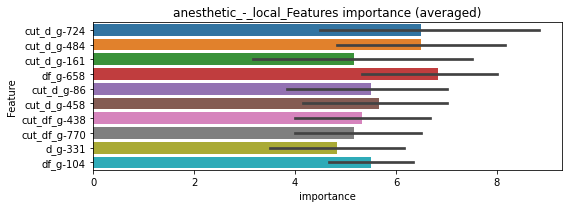

len(train_index) : 3852
len(valid_index) : 3853
================================= fold 1/2 anesthetic_-_local=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0267229	valid_1's binary_logloss: 0.0568489
[200]	training's binary_logloss: 0.00626879	valid_1's binary_logloss: 0.03939
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00308973	valid_1's binary_logloss: 0.037566


len(train_index) : 3853
len(valid_index) : 3852
================================= fold 2/2 anesthetic_-_local=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0305244	valid_1's binary_logloss: 0.0512747
[200]	training's binary_logloss: 0.00753445	valid_1's binary_logloss: 0.0317278
[300]	training's binary_logloss: 0.00265561	valid_1's binary_logloss: 0.0277463
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00173795	valid_1's binary_logloss: 0.0270314


anesthetic_-_local logloss: 0.032299379962409565


neg labels: 3289 → selected neg labels: 3283


angiogenesis_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0121376	valid_1's binary_logloss: 0.0423074
[200]	training's binary_logloss: 0.00174107	valid_1's binary_logloss: 0.0347538
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00195082	valid_1's binary_logloss: 0.0345858
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0144757	valid_1's binary_logloss: 0.0298608
[200]	training's binary_logloss: 0.00223944	valid_1's binary_logloss: 0.0190542
Early stopping, best iteration is:
[247]	training's binary_logloss: 0.0013267	valid_1's binary_logloss: 0.0182806


1 / 3 AUC score:1.000
y_Threshold: 0.0039102, Threshold: 0.0042925, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00386, conf_1:0.00472
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0042925
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0142925
threshold: 0.0142925, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0127866	valid_1's binary_logloss: 0.0421439
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00213707	valid_1's binary_logloss: 0.0335725
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0145589	valid_1's binary_logloss: 0.0300906
[200]	training's binary_logloss: 0.00229645	valid_1's binary_logloss: 0.0173046
Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00137485	valid_1's binary_logloss: 0.0165786


2 / 3 AUC score:1.000
y_Threshold: 0.0112006, Threshold: 0.0142925, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0005023 Vs.target_rate: 0.00151
Num_p_label: 2.0, conf_0:0.01286, conf_1:0.01572
Num_p_label: 2.0, Expected: 6.0, Adj_threshold_1: 0.0142925
Num_p_label: 181.0, Expected: 6.0, Adj_threshold_2: 0.0042925
threshold: 0.0042925, positive_p_label: 181.0/3982, p_label_rate: 0.0454545
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0131411	valid_1's binary_logloss: 0.0370037
[200]	training's binary_logloss: 0.00199806	valid_1's binary_logloss: 0.0273397
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00129724	valid_1's binary_logloss: 0.0263351
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0133887	valid_1's binary_logloss: 0.0332749
[200]	training's binary_logloss: 0.00211778	valid_1's binary_logloss: 0.0224646
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00099259	valid_1's binary_logloss: 0.021011


3 / 3 AUC score:1.000
y_Threshold: 0.0096831, Threshold: 0.0042925, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0143144 Vs.target_rate: 0.00151
Num_p_label: 57.0, conf_0:0.00386, conf_1:0.00472
Num_p_label: 57.0, Expected: 6.0, Adj_threshold_1: 0.0042925
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0142925
threshold: 0.0142925, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 654.0/7785, y_label_rate: 0.0840077


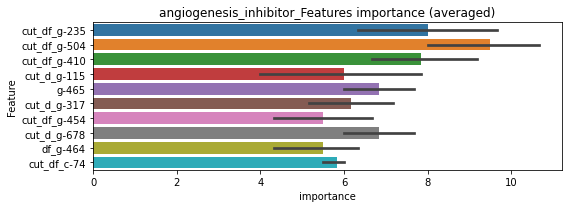

len(train_index) : 3892
len(valid_index) : 3893
================================= fold 1/2 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0202273	valid_1's binary_logloss: 0.0329388
[200]	training's binary_logloss: 0.00375192	valid_1's binary_logloss: 0.0174104
[300]	training's binary_logloss: 0.00123222	valid_1's binary_logloss: 0.0153192
Early stopping, best iteration is:
[310]	training's binary_logloss: 0.00112421	valid_1's binary_logloss: 0.0151399


len(train_index) : 3893
len(valid_index) : 3892
================================= fold 2/2 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0200475	valid_1's binary_logloss: 0.0318251
[200]	training's binary_logloss: 0.00389508	valid_1's binary_logloss: 0.0165614
[300]	training's binary_logloss: 0.00125821	valid_1's binary_logloss: 0.0145835
Early stopping, best iteration is:
[309]	training's binary_logloss: 0.00116286	valid_1's binary_logloss: 0.0144639


angiogenesis_inhibitor logloss: 0.014801946608098023


neg labels: 3289 → selected neg labels: 3283


angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3283, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0127073	valid_1's binary_logloss: 0.0430642
[200]	training's binary_logloss: 0.00185929	valid_1's binary_logloss: 0.0345365
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00201783	valid_1's binary_logloss: 0.0344129
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0143447	valid_1's binary_logloss: 0.0308498
[200]	training's binary_logloss: 0.00232044	valid_1's binary_logloss: 0.0192362
Early stopping, best iteration is:
[224]	training's binary_logloss: 0.00173555	valid_1's binary_logloss: 0.0186455


1 / 3 AUC score:1.000
y_Threshold: 0.0041295, Threshold: 0.0047671, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00155
Num_p_label: 80.0, conf_0:0.00429, conf_1:0.00524
Num_p_label: 80.0, Expected: 6.2, Adj_threshold_1: 0.0047671
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_2: 0.0147671
threshold: 0.0147671, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0130152	valid_1's binary_logloss: 0.0421995
Early stopping, best iteration is:
[180]	training's binary_logloss: 0.00253391	valid_1's binary_logloss: 0.0329614
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0150913	valid_1's binary_logloss: 0.031468
[200]	training's binary_logloss: 0.00237681	valid_1's binary_logloss: 0.0188326
[300]	training's binary_logloss: 0.000930162	valid_1's binary_logloss: 0.0175262
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.000976308	valid_1's binary_logloss: 0.0174878


2 / 3 AUC score:1.000
y_Threshold: 0.0109332, Threshold: 0.0147671, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0000000 Vs.target_rate: 0.00155
Num_p_label: 0.0, conf_0:0.01329, conf_1:0.01624
Num_p_label: 0.0, Expected: 6.2, Adj_threshold_1: 0.0147671
Num_p_label: 117.0, Expected: 6.2, Adj_threshold_2: 0.0047671
threshold: 0.0047671, positive_p_label: 117.0/3982, p_label_rate: 0.0293822
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0137445	valid_1's binary_logloss: 0.0415655
Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00237794	valid_1's binary_logloss: 0.0324589
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0138443	valid_1's binary_logloss: 0.0346042
[200]	training's binary_logloss: 0.00214352	valid_1's binary_logloss: 0.0232775
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.00127239	valid_1's binary_logloss: 0.0222933


3 / 3 AUC score:1.000
y_Threshold: 0.0193316, Threshold: 0.0047671, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0328980 Vs.target_rate: 0.00155
Num_p_label: 131.0, conf_0:0.00429, conf_1:0.00524
Num_p_label: 131.0, Expected: 6.2, Adj_threshold_1: 0.0047671
Num_p_label: 2.0, Expected: 6.2, Adj_threshold_2: 0.0147671
threshold: 0.0147671, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 655.0/7783, y_label_rate: 0.0841578


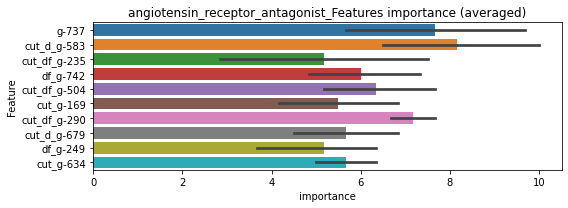

len(train_index) : 3891
len(valid_index) : 3892
================================= fold 1/2 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0210847	valid_1's binary_logloss: 0.0353649
[200]	training's binary_logloss: 0.00415186	valid_1's binary_logloss: 0.0185805
[300]	training's binary_logloss: 0.00136773	valid_1's binary_logloss: 0.0161873
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00121354	valid_1's binary_logloss: 0.0159783


len(train_index) : 3892
len(valid_index) : 3891
================================= fold 2/2 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0219655	valid_1's binary_logloss: 0.0355167
[200]	training's binary_logloss: 0.00430714	valid_1's binary_logloss: 0.0183662
[300]	training's binary_logloss: 0.00138769	valid_1's binary_logloss: 0.0156449
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.00090719	valid_1's binary_logloss: 0.0151839


angiotensin_receptor_antagonist logloss: 0.015581148785822604


neg labels: 3289 → selected neg labels: 3277


anti-inflammatory, len(trt): 73, len(othr): 3277, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0224968	valid_1's binary_logloss: 0.0723155
[200]	training's binary_logloss: 0.00387963	valid_1's binary_logloss: 0.0590676
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00425271	valid_1's binary_logloss: 0.0587487
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023704	valid_1's binary_logloss: 0.0663046
[200]	training's binary_logloss: 0.0041504	valid_1's binary_logloss: 0.0512405
Early stopping, best iteration is:
[213]	training's binary_logloss: 0.00354013	valid_1's binary_logloss: 0.0509171


1 / 3 AUC score:0.999
y_Threshold: 0.0107406, Threshold: 0.0127845, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 144 → Positive_corect_labels: 649/3788
p_label_rate: 0.0200904 Vs.target_rate: 0.00307
Num_p_label: 80.0, conf_0:0.01151, conf_1:0.01406
Num_p_label: 80.0, Expected: 12.2, Adj_threshold_1: 0.0127845
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_2: 0.0227845
threshold: 0.0227845, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 649.0/3788, y_label_rate: 0.1713305
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0225064	valid_1's binary_logloss: 0.0693562
[200]	training's binary_logloss: 0.00377273	valid_1's binary_logloss: 0.054229
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00290867	valid_1's binary_logloss: 0.0538772
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0220216	valid_1's binary_logloss: 0.0602009
[200]	training's binary_logloss: 0.00371653	valid_1's binary_logloss: 0.0461009
Early stopping, best iteration is:
[222]	training's binary_logloss: 0.00285242	valid_1's binary_logloss: 0.0455685


2 / 3 AUC score:0.999
y_Threshold: 0.0181708, Threshold: 0.0227845, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 643.0/3776
p_label_rate: 0.0062783 Vs.target_rate: 0.00307
Num_p_label: 25.0, conf_0:0.02051, conf_1:0.02506
threshold: 0.0227845, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 643.0/3776, y_label_rate: 0.1702860
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0207815	valid_1's binary_logloss: 0.0668868
Early stopping, best iteration is:
[168]	training's binary_logloss: 0.00551307	valid_1's binary_logloss: 0.0559629
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0223066	valid_1's binary_logloss: 0.0547985
[200]	training's binary_logloss: 0.00387715	valid_1's binary_logloss: 0.0367211
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.00220476	valid_1's binary_logloss: 0.0352622


3 / 3 AUC score:1.000
y_Threshold: 0.0203823, Threshold: 0.0227845, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 637.0/3764
p_label_rate: 0.0082873 Vs.target_rate: 0.00307
Num_p_label: 33.0, conf_0:0.02051, conf_1:0.02506
threshold: 0.0227845, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 670.0/7746, y_label_rate: 0.0864963


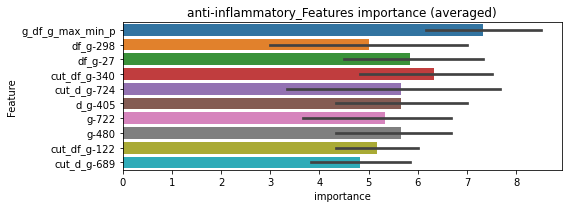

len(train_index) : 3873
len(valid_index) : 3873
================================= fold 1/2 anti-inflammatory=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0299588	valid_1's binary_logloss: 0.0637015
[200]	training's binary_logloss: 0.00702557	valid_1's binary_logloss: 0.0449975
[300]	training's binary_logloss: 0.002433	valid_1's binary_logloss: 0.0423084
Early stopping, best iteration is:
[309]	training's binary_logloss: 0.00223801	valid_1's binary_logloss: 0.0422049


len(train_index) : 3873
len(valid_index) : 3873
================================= fold 2/2 anti-inflammatory=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0329725	valid_1's binary_logloss: 0.0553763
[200]	training's binary_logloss: 0.00849746	valid_1's binary_logloss: 0.0339678
[300]	training's binary_logloss: 0.00302516	valid_1's binary_logloss: 0.0295278
Early stopping, best iteration is:
[369]	training's binary_logloss: 0.00176472	valid_1's binary_logloss: 0.0282928


anti-inflammatory logloss: 0.03524884738009809


neg labels: 3289 → selected neg labels: 3285


antiarrhythmic, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0078878	valid_1's binary_logloss: 0.0280041
[200]	training's binary_logloss: 0.00109782	valid_1's binary_logloss: 0.0200977
Early stopping, best iteration is:
[217]	training's binary_logloss: 0.000910575	valid_1's binary_logloss: 0.0197352
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00906673	valid_1's binary_logloss: 0.0171766
[200]	training's binary_logloss: 0.0013502	valid_1's binary_logloss: 0.00997628
[300]	training's binary_logloss: 0.000606779	valid_1's binary_logloss: 0.00902726
Early stopping, best iteration is:
[312]	training's binary_logloss: 0.000581777	valid_1's binary_logloss: 0.00894855


1 / 3 AUC score:1.000
y_Threshold: 0.0017008, Threshold: 0.0231285, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.02082, conf_1:0.02544
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0231285
Num_p_label: 59.0, Expected: 4.0, Adj_threshold_2: 0.0331285
Num_p_label: 41.0, Expected: 4.0, Adj_threshold_3: 0.0431285
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_4: 0.0531285
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_5: 0.0631285
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_6: 0.0731285
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_7: 0.0831285
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_8: 0.0931285
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_9: 0.1031285
threshold: 0.1031285, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00738258	valid_1's binary_logloss: 0.0256715
[200]	training's binary_logloss: 0.00104228	valid_1's binary_logloss: 0.0177261
Early stopping, best iteration is:
[247]	training's binary_logloss: 0.000665077	valid_1's binary_logloss: 0.0170857
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00870485	valid_1's binary_logloss: 0.0187007
[200]	training's binary_logloss: 0.00126796	valid_1's binary_logloss: 0.0111446
Early stopping, best iteration is:
[208]	training's binary_logloss: 0.00115957	valid_1's binary_logloss: 0.0109957


2 / 3 AUC score:1.000
y_Threshold: 0.0240743, Threshold: 0.1031285, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0394274 Vs.target_rate: 0.00101
Num_p_label: 157.0, conf_0:0.09282, conf_1:0.11344
Num_p_label: 157.0, Expected: 4.0, Adj_threshold_1: 0.1031285
Num_p_label: 155.0, Expected: 4.0, Adj_threshold_2: 0.1131285
Num_p_label: 149.0, Expected: 4.0, Adj_threshold_3: 0.1231285
Num_p_label: 145.0, Expected: 4.0, Adj_threshold_4: 0.1331285
Num_p_label: 142.0, Expected: 4.0, Adj_threshold_5: 0.1431285
Num_p_label: 140.0, Expected: 4.0, Adj_threshold_6: 0.1531285
Num_p_label: 138.0, Expected: 4.0, Adj_threshold_7: 0.1631285
Num_p_label: 132.0, Expected: 4.0, Adj_threshold_8: 0.1731285
Num_p_label: 130.0, Expected: 4.0, Adj_threshold_9: 0.1831285
Num_p_label: 127.0, Expected: 4.0, Adj_threshold_10: 0.1931285
threshold: 0.2031285, positive_p_label: 126.0/3982, p_label_rate: 0.0316424
positive_y_label: 655.0/3806, y_label_rate: 0.17209

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0079532	valid_1's binary_logloss: 0.020011
[200]	training's binary_logloss: 0.00109846	valid_1's binary_logloss: 0.0115022
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.000602767	valid_1's binary_logloss: 0.0108246
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00850536	valid_1's binary_logloss: 0.018715
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00147536	valid_1's binary_logloss: 0.0112921


3 / 3 AUC score:1.000
y_Threshold: 0.0262983, Threshold: 0.2031285, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0339026 Vs.target_rate: 0.00101
Num_p_label: 135.0, conf_0:0.18282, conf_1:0.22344
Num_p_label: 135.0, Expected: 4.0, Adj_threshold_1: 0.2031285
Num_p_label: 134.0, Expected: 4.0, Adj_threshold_2: 0.2131285
Num_p_label: 132.0, Expected: 4.0, Adj_threshold_3: 0.2231285
Num_p_label: 130.0, Expected: 4.0, Adj_threshold_4: 0.2331285
Num_p_label: 129.0, Expected: 4.0, Adj_threshold_5: 0.2431285
Num_p_label: 125.0, Expected: 4.0, Adj_threshold_6: 0.2531285
Num_p_label: 122.0, Expected: 4.0, Adj_threshold_7: 0.2631285
Num_p_label: 120.0, Expected: 4.0, Adj_threshold_8: 0.2731285
Num_p_label: 120.0, Expected: 4.0, Adj_threshold_9: 0.2831285
Num_p_label: 119.0, Expected: 4.0, Adj_threshold_10: 0.2931285
threshold: 0.3031285, positive_p_label: 118.0/3982, p_label_rate: 0.0296334
positive_y_label: 772.0/7786, y_label_rate: 0.09915

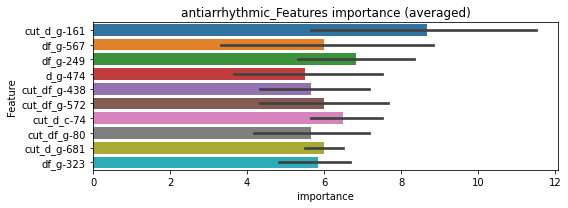

len(train_index) : 3893
len(valid_index) : 3893
================================= fold 1/2 antiarrhythmic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0180323	valid_1's binary_logloss: 0.0285198
[200]	training's binary_logloss: 0.00289184	valid_1's binary_logloss: 0.0132451
[300]	training's binary_logloss: 0.000916541	valid_1's binary_logloss: 0.0111026
[400]	training's binary_logloss: 0.00046557	valid_1's binary_logloss: 0.0105628
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000388605	valid_1's binary_logloss: 0.0103727


len(train_index) : 3893
len(valid_index) : 3893
================================= fold 2/2 antiarrhythmic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0197318	valid_1's binary_logloss: 0.0258289
[200]	training's binary_logloss: 0.00348721	valid_1's binary_logloss: 0.00903394
[300]	training's binary_logloss: 0.00109685	valid_1's binary_logloss: 0.00608766
[400]	training's binary_logloss: 0.000545561	valid_1's binary_logloss: 0.00543476
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000434492	valid_1's binary_logloss: 0.00528033


antiarrhythmic logloss: 0.00782654020372928


neg labels: 3289 → selected neg labels: 3281


antibiotic, len(trt): 43, len(othr): 3281, target_rate: 0.0018057 → Adj_target_rate: 0.0020542
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.01289	valid_1's binary_logloss: 0.048232
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.00281955	valid_1's binary_logloss: 0.042063
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0147536	valid_1's binary_logloss: 0.0338546
[200]	training's binary_logloss: 0.00241573	valid_1's binary_logloss: 0.0212964
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00136321	valid_1's binary_logloss: 0.0203995


1 / 3 AUC score:1.000
y_Threshold: 0.0054627, Threshold: 0.0100288, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0200904 Vs.target_rate: 0.00181
Num_p_label: 80.0, conf_0:0.00903, conf_1:0.01103
Num_p_label: 80.0, Expected: 7.2, Adj_threshold_1: 0.0100288
Num_p_label: 14.0, Expected: 7.2, Adj_threshold_2: 0.0200288
threshold: 0.0200288, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0137603	valid_1's binary_logloss: 0.0418396
[200]	training's binary_logloss: 0.00212681	valid_1's binary_logloss: 0.0294471
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.00102609	valid_1's binary_logloss: 0.0279908
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0141888	valid_1's binary_logloss: 0.0343555
[200]	training's binary_logloss: 0.00226941	valid_1's binary_logloss: 0.0231049
Early stopping, best iteration is:
[234]	training's binary_logloss: 0.00153999	valid_1's binary_logloss: 0.022116


2 / 3 AUC score:1.000
y_Threshold: 0.0199726, Threshold: 0.0200288, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0150678 Vs.target_rate: 0.00181
Num_p_label: 60.0, conf_0:0.01803, conf_1:0.02203
Num_p_label: 60.0, Expected: 7.2, Adj_threshold_1: 0.0200288
Num_p_label: 35.0, Expected: 7.2, Adj_threshold_2: 0.0300288
Num_p_label: 24.0, Expected: 7.2, Adj_threshold_3: 0.0400288
Num_p_label: 11.0, Expected: 7.2, Adj_threshold_4: 0.0500288
threshold: 0.0500288, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0135565	valid_1's binary_logloss: 0.0421054
[200]	training's binary_logloss: 0.00205653	valid_1's binary_logloss: 0.0310768
Early stopping, best iteration is:
[231]	training's binary_logloss: 0.00144426	valid_1's binary_logloss: 0.0305018
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0139298	valid_1's binary_logloss: 0.035762
[200]	training's binary_logloss: 0.00218043	valid_1's binary_logloss: 0.0260002
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.00139226	valid_1's binary_logloss: 0.0250597


3 / 3 AUC score:1.000
y_Threshold: 0.0148495, Threshold: 0.0500288, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0027624 Vs.target_rate: 0.00181
Num_p_label: 11.0, conf_0:0.04503, conf_1:0.05503
threshold: 0.0500288, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 662.0/7777, y_label_rate: 0.0851228


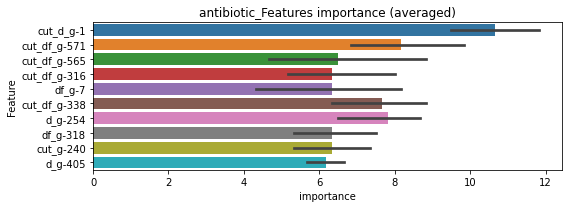

len(train_index) : 3888
len(valid_index) : 3889
================================= fold 1/2 antibiotic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0216397	valid_1's binary_logloss: 0.0392618
[200]	training's binary_logloss: 0.00425552	valid_1's binary_logloss: 0.0242542
[300]	training's binary_logloss: 0.00143041	valid_1's binary_logloss: 0.0220231
Early stopping, best iteration is:
[309]	training's binary_logloss: 0.00132561	valid_1's binary_logloss: 0.0219944


len(train_index) : 3889
len(valid_index) : 3888
================================= fold 2/2 antibiotic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0218925	valid_1's binary_logloss: 0.0373242
[200]	training's binary_logloss: 0.00431291	valid_1's binary_logloss: 0.0209171
[300]	training's binary_logloss: 0.00143433	valid_1's binary_logloss: 0.0182373
Early stopping, best iteration is:
[342]	training's binary_logloss: 0.00102736	valid_1's binary_logloss: 0.0178653


antibiotic logloss: 0.019930078589424038


neg labels: 3289 → selected neg labels: 3286


anticonvulsant, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00705354	valid_1's binary_logloss: 0.0166663
[200]	training's binary_logloss: 0.000920334	valid_1's binary_logloss: 0.00929852
Early stopping, best iteration is:
[272]	training's binary_logloss: 0.000484391	valid_1's binary_logloss: 0.00843638
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0076032	valid_1's binary_logloss: 0.0147836
[200]	training's binary_logloss: 0.00102594	valid_1's binary_logloss: 0.00700309
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.000563102	valid_1's binary_logloss: 0.00625837


1 / 3 AUC score:1.000
y_Threshold: 0.0010607, Threshold: 0.0012102, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00109, conf_1:0.00133
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0012102
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0112102
threshold: 0.0112102, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00702225	valid_1's binary_logloss: 0.0170683
[200]	training's binary_logloss: 0.000936769	valid_1's binary_logloss: 0.009596
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.000459825	valid_1's binary_logloss: 0.00858461
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00760889	valid_1's binary_logloss: 0.0140434
[200]	training's binary_logloss: 0.00103014	valid_1's binary_logloss: 0.0065825
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.000607328	valid_1's binary_logloss: 0.00573604


2 / 3 AUC score:1.000
y_Threshold: 0.0071064, Threshold: 0.0112102, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.01009, conf_1:0.01233
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0112102
Num_p_label: 173.0, Expected: 3.0, Adj_threshold_2: 0.0012102
threshold: 0.0012102, positive_p_label: 173.0/3982, p_label_rate: 0.0434455
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00702225	valid_1's binary_logloss: 0.0170683
[200]	training's binary_logloss: 0.000936769	valid_1's binary_logloss: 0.009596
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.000459825	valid_1's binary_logloss: 0.00858461
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00760889	valid_1's binary_logloss: 0.0140434
[200]	training's binary_logloss: 0.00103014	valid_1's binary_logloss: 0.0065825
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.000607328	valid_1's binary_logloss: 0.00573604


3 / 3 AUC score:1.000
y_Threshold: 0.0071064, Threshold: 0.0012102, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0434455 Vs.target_rate: 0.00076
Num_p_label: 173.0, conf_0:0.00109, conf_1:0.00133
Num_p_label: 173.0, Expected: 3.0, Adj_threshold_1: 0.0012102
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0112102
threshold: 0.0112102, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7793, y_label_rate: 0.0843064


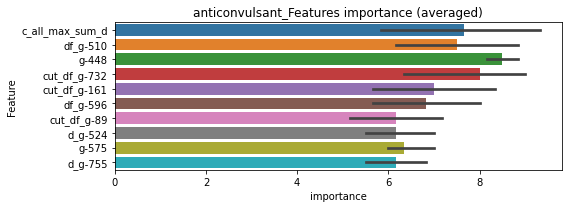

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 anticonvulsant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0136164	valid_1's binary_logloss: 0.02063
[200]	training's binary_logloss: 0.00189926	valid_1's binary_logloss: 0.00812133
[300]	training's binary_logloss: 0.00055748	valid_1's binary_logloss: 0.00642001
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000363764	valid_1's binary_logloss: 0.00608702


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 anticonvulsant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0146898	valid_1's binary_logloss: 0.0194533
[200]	training's binary_logloss: 0.00220669	valid_1's binary_logloss: 0.00601918
[300]	training's binary_logloss: 0.00065563	valid_1's binary_logloss: 0.00392039
[400]	training's binary_logloss: 0.000328507	valid_1's binary_logloss: 0.00346566
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000269352	valid_1's binary_logloss: 0.00334319


anticonvulsant logloss: 0.004715282388279817


neg labels: 3289 → selected neg labels: 3284


antifungal, len(trt): 26, len(othr): 3284, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00933812	valid_1's binary_logloss: 0.0275328
[200]	training's binary_logloss: 0.00132605	valid_1's binary_logloss: 0.0181916
Early stopping, best iteration is:
[206]	training's binary_logloss: 0.00123192	valid_1's binary_logloss: 0.0180287
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00982743	valid_1's binary_logloss: 0.0217686
[200]	training's binary_logloss: 0.0014094	valid_1's binary_logloss: 0.0135387
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00158302	valid_1's binary_logloss: 0.0135274


1 / 3 AUC score:1.000
y_Threshold: 0.0028102, Threshold: 0.0032692, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00109
Num_p_label: 80.0, conf_0:0.00294, conf_1:0.00360
Num_p_label: 80.0, Expected: 4.3, Adj_threshold_1: 0.0032692
Num_p_label: 0.0, Expected: 4.3, Adj_threshold_2: 0.0132692
threshold: 0.0132692, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0094532	valid_1's binary_logloss: 0.0273748
[200]	training's binary_logloss: 0.00133776	valid_1's binary_logloss: 0.0175605
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.000793518	valid_1's binary_logloss: 0.016783
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0101689	valid_1's binary_logloss: 0.0222394
[200]	training's binary_logloss: 0.00140294	valid_1's binary_logloss: 0.0133926
Early stopping, best iteration is:
[217]	training's binary_logloss: 0.00115045	valid_1's binary_logloss: 0.0128095


2 / 3 AUC score:1.000
y_Threshold: 0.0067854, Threshold: 0.0132692, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0002511 Vs.target_rate: 0.00109
Num_p_label: 1.0, conf_0:0.01194, conf_1:0.01460
Num_p_label: 1.0, Expected: 4.3, Adj_threshold_1: 0.0132692
Num_p_label: 60.0, Expected: 4.3, Adj_threshold_2: 0.0032692
threshold: 0.0032692, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0094532	valid_1's binary_logloss: 0.0273748
[200]	training's binary_logloss: 0.00133776	valid_1's binary_logloss: 0.0175605
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.000793518	valid_1's binary_logloss: 0.016783
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0101689	valid_1's binary_logloss: 0.0222394
[200]	training's binary_logloss: 0.00140294	valid_1's binary_logloss: 0.0133926
Early stopping, best iteration is:
[217]	training's binary_logloss: 0.00115045	valid_1's binary_logloss: 0.0128095


3 / 3 AUC score:1.000
y_Threshold: 0.0067854, Threshold: 0.0032692, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0150678 Vs.target_rate: 0.00109
Num_p_label: 60.0, conf_0:0.00294, conf_1:0.00360
Num_p_label: 60.0, Expected: 4.3, Adj_threshold_1: 0.0032692
Num_p_label: 1.0, Expected: 4.3, Adj_threshold_2: 0.0132692
threshold: 0.0132692, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/7790, y_label_rate: 0.0843389


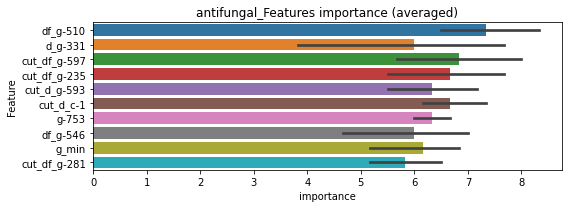

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 antifungal=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0154437	valid_1's binary_logloss: 0.0300751
[200]	training's binary_logloss: 0.00243005	valid_1's binary_logloss: 0.0155975
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.000849589	valid_1's binary_logloss: 0.0139615


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 antifungal=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0172443	valid_1's binary_logloss: 0.0245103
[200]	training's binary_logloss: 0.00295333	valid_1's binary_logloss: 0.00946082
[300]	training's binary_logloss: 0.000924807	valid_1's binary_logloss: 0.00728628
[400]	training's binary_logloss: 0.000456867	valid_1's binary_logloss: 0.00660579
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000329625	valid_1's binary_logloss: 0.00640451


antifungal logloss: 0.010183031278009262


neg labels: 3289 → selected neg labels: 3286


antihistamine, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00680285	valid_1's binary_logloss: 0.0171096
[200]	training's binary_logloss: 0.000899896	valid_1's binary_logloss: 0.0102993
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00050901	valid_1's binary_logloss: 0.00953718
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00761632	valid_1's binary_logloss: 0.0178517
[200]	training's binary_logloss: 0.00101586	valid_1's binary_logloss: 0.00979314
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.000619582	valid_1's binary_logloss: 0.00904109


1 / 3 AUC score:1.000
y_Threshold: 0.0012057, Threshold: 0.0016470, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00148, conf_1:0.00181
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0016470
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0116470
threshold: 0.0116470, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0070425	valid_1's binary_logloss: 0.0170384
[200]	training's binary_logloss: 0.000928019	valid_1's binary_logloss: 0.0096759
[300]	training's binary_logloss: 0.000447032	valid_1's binary_logloss: 0.00892261
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000457874	valid_1's binary_logloss: 0.00890057
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00773547	valid_1's binary_logloss: 0.0185406
[200]	training's binary_logloss: 0.00101024	valid_1's binary_logloss: 0.0103638
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.000617206	valid_1's binary_logloss: 0.00929162


2 / 3 AUC score:1.000
y_Threshold: 0.0062750, Threshold: 0.0116470, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.01048, conf_1:0.01281
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0116470
Num_p_label: 127.0, Expected: 3.0, Adj_threshold_2: 0.0016470
threshold: 0.0016470, positive_p_label: 127.0/3982, p_label_rate: 0.0318935
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0070425	valid_1's binary_logloss: 0.0170384
[200]	training's binary_logloss: 0.000928019	valid_1's binary_logloss: 0.0096759
[300]	training's binary_logloss: 0.000447032	valid_1's binary_logloss: 0.00892261
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000457874	valid_1's binary_logloss: 0.00890057
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00773547	valid_1's binary_logloss: 0.0185406
[200]	training's binary_logloss: 0.00101024	valid_1's binary_logloss: 0.0103638
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.000617206	valid_1's binary_logloss: 0.00929162


3 / 3 AUC score:1.000
y_Threshold: 0.0062750, Threshold: 0.0016470, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0318935 Vs.target_rate: 0.00076
Num_p_label: 127.0, conf_0:0.00148, conf_1:0.00181
Num_p_label: 127.0, Expected: 3.0, Adj_threshold_1: 0.0016470
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0116470
threshold: 0.0116470, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7793, y_label_rate: 0.0843064


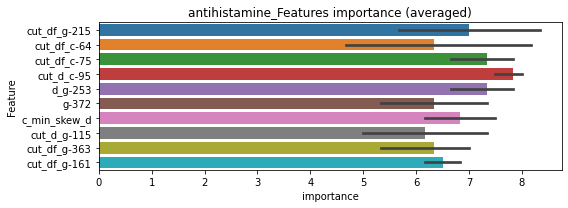

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 antihistamine=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.013443	valid_1's binary_logloss: 0.020816
[200]	training's binary_logloss: 0.00188433	valid_1's binary_logloss: 0.0085241
[300]	training's binary_logloss: 0.000559172	valid_1's binary_logloss: 0.00694308
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.000381057	valid_1's binary_logloss: 0.00669593


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 antihistamine=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0144833	valid_1's binary_logloss: 0.021193
[200]	training's binary_logloss: 0.00214721	valid_1's binary_logloss: 0.00780236
[300]	training's binary_logloss: 0.000638609	valid_1's binary_logloss: 0.00584371
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000462541	valid_1's binary_logloss: 0.00542281


antihistamine logloss: 0.006059449072691876


neg labels: 3289 → selected neg labels: 3286


antimalarial, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00677173	valid_1's binary_logloss: 0.0205501
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.00129352	valid_1's binary_logloss: 0.0145839
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00814066	valid_1's binary_logloss: 0.0132313
[200]	training's binary_logloss: 0.001073	valid_1's binary_logloss: 0.0056577
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.000519065	valid_1's binary_logloss: 0.00483962


1 / 3 AUC score:1.000
y_Threshold: 0.0019408, Threshold: 0.0019529, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00176, conf_1:0.00215
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0019529
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0119529
threshold: 0.0119529, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00708827	valid_1's binary_logloss: 0.0197871
[200]	training's binary_logloss: 0.000898064	valid_1's binary_logloss: 0.0131989
Early stopping, best iteration is:
[224]	training's binary_logloss: 0.000702505	valid_1's binary_logloss: 0.0128453
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00849501	valid_1's binary_logloss: 0.0134542
[200]	training's binary_logloss: 0.00109128	valid_1's binary_logloss: 0.00496898
[300]	training's binary_logloss: 0.000506675	valid_1's binary_logloss: 0.00419293
Early stopping, best iteration is:
[320]	training's binary_logloss: 0.000475071	valid_1's binary_logloss: 0.00411072


2 / 3 AUC score:1.000
y_Threshold: 0.0076258, Threshold: 0.0119529, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.01076, conf_1:0.01315
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0119529
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_2: 0.0019529
threshold: 0.0019529, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00708827	valid_1's binary_logloss: 0.0197871
[200]	training's binary_logloss: 0.000898064	valid_1's binary_logloss: 0.0131989
Early stopping, best iteration is:
[224]	training's binary_logloss: 0.000702505	valid_1's binary_logloss: 0.0128453
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00849501	valid_1's binary_logloss: 0.0134542
[200]	training's binary_logloss: 0.00109128	valid_1's binary_logloss: 0.00496898
[300]	training's binary_logloss: 0.000506675	valid_1's binary_logloss: 0.00419293
Early stopping, best iteration is:
[320]	training's binary_logloss: 0.000475071	valid_1's binary_logloss: 0.00411072


3 / 3 AUC score:1.000
y_Threshold: 0.0076258, Threshold: 0.0019529, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0102963 Vs.target_rate: 0.00076
Num_p_label: 41.0, conf_0:0.00176, conf_1:0.00215
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_1: 0.0019529
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0119529
threshold: 0.0119529, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7793, y_label_rate: 0.0843064


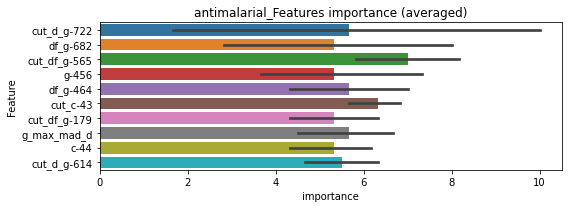

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 antimalarial=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0137327	valid_1's binary_logloss: 0.0221505
[200]	training's binary_logloss: 0.00186206	valid_1's binary_logloss: 0.0101918
[300]	training's binary_logloss: 0.00055521	valid_1's binary_logloss: 0.00875632
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.000527454	valid_1's binary_logloss: 0.00872263


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 antimalarial=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0149186	valid_1's binary_logloss: 0.018402
[200]	training's binary_logloss: 0.00222009	valid_1's binary_logloss: 0.00508025
[300]	training's binary_logloss: 0.000667436	valid_1's binary_logloss: 0.00317675
[400]	training's binary_logloss: 0.00034641	valid_1's binary_logloss: 0.00274886
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000299153	valid_1's binary_logloss: 0.002679


antimalarial logloss: 0.005701202600534149


neg labels: 3289 → selected neg labels: 3278


antioxidant, len(trt): 73, len(othr): 3278, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0246199	valid_1's binary_logloss: 0.0814481
[200]	training's binary_logloss: 0.00425494	valid_1's binary_logloss: 0.0698202
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.0047254	valid_1's binary_logloss: 0.0692533
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0255317	valid_1's binary_logloss: 0.0667488
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.0059479	valid_1's binary_logloss: 0.0542479


1 / 3 AUC score:0.997
y_Threshold: 0.0138028, Threshold: 0.0144851, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 140 → Positive_corect_labels: 651/3793
p_label_rate: 0.0200904 Vs.target_rate: 0.00307
Num_p_label: 80.0, conf_0:0.01304, conf_1:0.01593
Num_p_label: 80.0, Expected: 12.2, Adj_threshold_1: 0.0144851
Num_p_label: 8.0, Expected: 12.2, Adj_threshold_2: 0.0244851
threshold: 0.0244851, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 651.0/3793, y_label_rate: 0.1716320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0218239	valid_1's binary_logloss: 0.0783405
Early stopping, best iteration is:
[178]	training's binary_logloss: 0.00540693	valid_1's binary_logloss: 0.0677671
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0257925	valid_1's binary_logloss: 0.0647785
[200]	training's binary_logloss: 0.00453197	valid_1's binary_logloss: 0.0490321
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.00255123	valid_1's binary_logloss: 0.0476364


2 / 3 AUC score:0.998
y_Threshold: 0.0220056, Threshold: 0.0244851, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 22 → Positive_corect_labels: 640.0/3771
p_label_rate: 0.0012557 Vs.target_rate: 0.00307
Num_p_label: 5.0, conf_0:0.02204, conf_1:0.02693
threshold: 0.0244851, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 640.0/3771, y_label_rate: 0.1697163
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.021645	valid_1's binary_logloss: 0.070294
Early stopping, best iteration is:
[180]	training's binary_logloss: 0.00481285	valid_1's binary_logloss: 0.0606879
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0225611	valid_1's binary_logloss: 0.0555298
[200]	training's binary_logloss: 0.0040378	valid_1's binary_logloss: 0.0421426
Early stopping, best iteration is:
[234]	training's binary_logloss: 0.00270596	valid_1's binary_logloss: 0.04126


3 / 3 AUC score:1.000
y_Threshold: 0.0228874, Threshold: 0.0244851, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 632.0/3755
p_label_rate: 0.0017579 Vs.target_rate: 0.00307
Num_p_label: 7.0, conf_0:0.02204, conf_1:0.02693
threshold: 0.0244851, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 639.0/7737, y_label_rate: 0.0825902


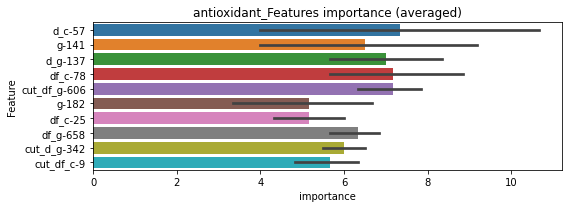

len(train_index) : 3868
len(valid_index) : 3869
================================= fold 1/2 antioxidant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0266078	valid_1's binary_logloss: 0.0544266
[200]	training's binary_logloss: 0.0063647	valid_1's binary_logloss: 0.0385707
[300]	training's binary_logloss: 0.00220272	valid_1's binary_logloss: 0.0371832
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00240102	valid_1's binary_logloss: 0.0371655


len(train_index) : 3869
len(valid_index) : 3868
================================= fold 2/2 antioxidant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0304636	valid_1's binary_logloss: 0.0487487
[200]	training's binary_logloss: 0.00759839	valid_1's binary_logloss: 0.0282389
[300]	training's binary_logloss: 0.00267939	valid_1's binary_logloss: 0.0241744
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00158645	valid_1's binary_logloss: 0.0234135


antioxidant logloss: 0.030290397414822118


neg labels: 3289 → selected neg labels: 3283


antiprotozoal, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0112175	valid_1's binary_logloss: 0.0441355
Early stopping, best iteration is:
[165]	training's binary_logloss: 0.00276916	valid_1's binary_logloss: 0.0382484
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0140697	valid_1's binary_logloss: 0.0287126
[200]	training's binary_logloss: 0.00218696	valid_1's binary_logloss: 0.0175963
Early stopping, best iteration is:
[270]	training's binary_logloss: 0.0010885	valid_1's binary_logloss: 0.0160345


1 / 3 AUC score:1.000
y_Threshold: 0.0044790, Threshold: 0.0045908, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00413, conf_1:0.00505
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0045908
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0145908
threshold: 0.0145908, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0121081	valid_1's binary_logloss: 0.0372521
Early stopping, best iteration is:
[171]	training's binary_logloss: 0.00275346	valid_1's binary_logloss: 0.0286706
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0137722	valid_1's binary_logloss: 0.0343947
[200]	training's binary_logloss: 0.00203151	valid_1's binary_logloss: 0.0223555
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.00168086	valid_1's binary_logloss: 0.0218332


2 / 3 AUC score:1.000
y_Threshold: 0.0131876, Threshold: 0.0145908, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0002511 Vs.target_rate: 0.00151
Num_p_label: 1.0, conf_0:0.01313, conf_1:0.01605
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0145908
Num_p_label: 220.0, Expected: 6.0, Adj_threshold_2: 0.0045908
threshold: 0.0045908, positive_p_label: 220.0/3982, p_label_rate: 0.0552486
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0125415	valid_1's binary_logloss: 0.0341883
[200]	training's binary_logloss: 0.00183968	valid_1's binary_logloss: 0.0245339
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.00116881	valid_1's binary_logloss: 0.0236566
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0128924	valid_1's binary_logloss: 0.0337399
[200]	training's binary_logloss: 0.00197685	valid_1's binary_logloss: 0.0222893
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.00110519	valid_1's binary_logloss: 0.0209874


3 / 3 AUC score:1.000
y_Threshold: 0.0107532, Threshold: 0.0045908, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0077850 Vs.target_rate: 0.00151
Num_p_label: 31.0, conf_0:0.00413, conf_1:0.00505
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_1: 0.0045908
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0145908
threshold: 0.0145908, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 653.0/7783, y_label_rate: 0.0839008


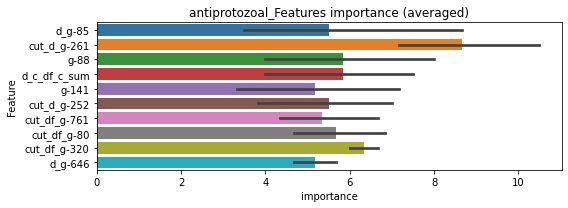

len(train_index) : 3891
len(valid_index) : 3892
================================= fold 1/2 antiprotozoal=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0183752	valid_1's binary_logloss: 0.0339515
[200]	training's binary_logloss: 0.00322147	valid_1's binary_logloss: 0.0202084
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00123813	valid_1's binary_logloss: 0.0186846


len(train_index) : 3892
len(valid_index) : 3891
================================= fold 2/2 antiprotozoal=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0214289	valid_1's binary_logloss: 0.0290456
[200]	training's binary_logloss: 0.00432208	valid_1's binary_logloss: 0.0115424
[300]	training's binary_logloss: 0.00136974	valid_1's binary_logloss: 0.00828192
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000767093	valid_1's binary_logloss: 0.00742911


antiprotozoal logloss: 0.013057590605602746


neg labels: 3289 → selected neg labels: 3286


antiviral, len(trt): 23, len(othr): 3286, target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00821463	valid_1's binary_logloss: 0.0280726
[200]	training's binary_logloss: 0.00108874	valid_1's binary_logloss: 0.0203933
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.000668865	valid_1's binary_logloss: 0.0194566
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0102972	valid_1's binary_logloss: 0.0164002
[200]	training's binary_logloss: 0.00138356	valid_1's binary_logloss: 0.00710049
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000815672	valid_1's binary_logloss: 0.00633888


1 / 3 AUC score:1.000
y_Threshold: 0.0016723, Threshold: 0.0018664, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00097
Num_p_label: 80.0, conf_0:0.00168, conf_1:0.00205
Num_p_label: 80.0, Expected: 3.8, Adj_threshold_1: 0.0018664
Num_p_label: 0.0, Expected: 3.8, Adj_threshold_2: 0.0118664
threshold: 0.0118664, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00830527	valid_1's binary_logloss: 0.0276699
[200]	training's binary_logloss: 0.00111919	valid_1's binary_logloss: 0.0191978
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.000888563	valid_1's binary_logloss: 0.0185984
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0102617	valid_1's binary_logloss: 0.0155007
[200]	training's binary_logloss: 0.00138827	valid_1's binary_logloss: 0.00621553
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000800937	valid_1's binary_logloss: 0.00527524


2 / 3 AUC score:1.000
y_Threshold: 0.0136992, Threshold: 0.0118664, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00097
Num_p_label: 0.0, conf_0:0.01068, conf_1:0.01305
Num_p_label: 0.0, Expected: 3.8, Adj_threshold_1: 0.0118664
Num_p_label: 191.0, Expected: 3.8, Adj_threshold_2: 0.0018664
threshold: 0.0018664, positive_p_label: 191.0/3982, p_label_rate: 0.0479658
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00830527	valid_1's binary_logloss: 0.0276699
[200]	training's binary_logloss: 0.00111919	valid_1's binary_logloss: 0.0191978
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.000888563	valid_1's binary_logloss: 0.0185984
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0102617	valid_1's binary_logloss: 0.0155007
[200]	training's binary_logloss: 0.00138827	valid_1's binary_logloss: 0.00621553
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000800937	valid_1's binary_logloss: 0.00527524


3 / 3 AUC score:1.000
y_Threshold: 0.0136992, Threshold: 0.0018664, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0479658 Vs.target_rate: 0.00097
Num_p_label: 191.0, conf_0:0.00168, conf_1:0.00205
Num_p_label: 191.0, Expected: 3.8, Adj_threshold_1: 0.0018664
Num_p_label: 0.0, Expected: 3.8, Adj_threshold_2: 0.0118664
threshold: 0.0118664, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7793, y_label_rate: 0.0843064


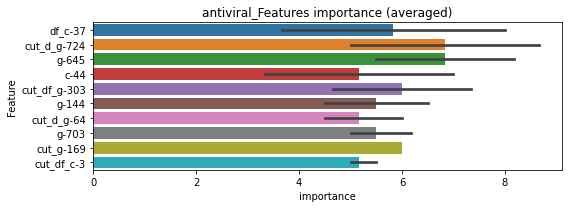

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 antiviral=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0144013	valid_1's binary_logloss: 0.0290519
[200]	training's binary_logloss: 0.00219916	valid_1's binary_logloss: 0.0147347
[300]	training's binary_logloss: 0.000666032	valid_1's binary_logloss: 0.0127302
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000358919	valid_1's binary_logloss: 0.0122384


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 antiviral=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0167094	valid_1's binary_logloss: 0.0209472
[200]	training's binary_logloss: 0.00283202	valid_1's binary_logloss: 0.00660322
[300]	training's binary_logloss: 0.000847572	valid_1's binary_logloss: 0.00446282
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.000487082	valid_1's binary_logloss: 0.00394719


antiviral logloss: 0.008093339218494243


neg labels: 3289 → selected neg labels: 3281


apoptosis_stimulant, len(trt): 49, len(othr): 3281, target_rate: 0.0020576 → Adj_target_rate: 0.0022954
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0144303	valid_1's binary_logloss: 0.0600039
[200]	training's binary_logloss: 0.00229017	valid_1's binary_logloss: 0.0516161
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.00261526	valid_1's binary_logloss: 0.0509823
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0183384	valid_1's binary_logloss: 0.0364285
[200]	training's binary_logloss: 0.00300765	valid_1's binary_logloss: 0.0226921
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.0013456	valid_1's binary_logloss: 0.0208045


1 / 3 AUC score:1.000
y_Threshold: 0.0049814, Threshold: 0.0406942, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00206
Num_p_label: 80.0, conf_0:0.03662, conf_1:0.04476
Num_p_label: 80.0, Expected: 8.2, Adj_threshold_1: 0.0406942
Num_p_label: 75.0, Expected: 8.2, Adj_threshold_2: 0.0506942
Num_p_label: 71.0, Expected: 8.2, Adj_threshold_3: 0.0606942
Num_p_label: 62.0, Expected: 8.2, Adj_threshold_4: 0.0706942
Num_p_label: 58.0, Expected: 8.2, Adj_threshold_5: 0.0806942
Num_p_label: 53.0, Expected: 8.2, Adj_threshold_6: 0.0906942
Num_p_label: 51.0, Expected: 8.2, Adj_threshold_7: 0.1006942
Num_p_label: 49.0, Expected: 8.2, Adj_threshold_8: 0.1106942
Num_p_label: 45.0, Expected: 8.2, Adj_threshold_9: 0.1206942
Num_p_label: 43.0, Expected: 8.2, Adj_threshold_10: 0.1306942
threshold: 0.1406942, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0143858	valid_1's binary_logloss: 0.0575674
Early stopping, best iteration is:
[175]	training's binary_logloss: 0.00315676	valid_1's binary_logloss: 0.0492092
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0171019	valid_1's binary_logloss: 0.0342998
[200]	training's binary_logloss: 0.00286735	valid_1's binary_logloss: 0.0211732
[300]	training's binary_logloss: 0.001154	valid_1's binary_logloss: 0.0190702
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.000974247	valid_1's binary_logloss: 0.0188478


2 / 3 AUC score:1.000
y_Threshold: 0.0215957, Threshold: 0.1406942, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0288800 Vs.target_rate: 0.00206
Num_p_label: 115.0, conf_0:0.12662, conf_1:0.15476
Num_p_label: 115.0, Expected: 8.2, Adj_threshold_1: 0.1406942
Num_p_label: 111.0, Expected: 8.2, Adj_threshold_2: 0.1506942
Num_p_label: 110.0, Expected: 8.2, Adj_threshold_3: 0.1606942
Num_p_label: 108.0, Expected: 8.2, Adj_threshold_4: 0.1706942
Num_p_label: 107.0, Expected: 8.2, Adj_threshold_5: 0.1806942
Num_p_label: 106.0, Expected: 8.2, Adj_threshold_6: 0.1906942
Num_p_label: 103.0, Expected: 8.2, Adj_threshold_7: 0.2006942
Num_p_label: 103.0, Expected: 8.2, Adj_threshold_8: 0.2106942
Num_p_label: 100.0, Expected: 8.2, Adj_threshold_9: 0.2206942
Num_p_label: 99.0, Expected: 8.2, Adj_threshold_10: 0.2306942
threshold: 0.2406942, positive_p_label: 96.0/3982, p_label_rate: 0.0241085
positive_y_label: 650.0/3793, y_label_rate: 0.171368

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0150208	valid_1's binary_logloss: 0.0462495
Early stopping, best iteration is:
[182]	training's binary_logloss: 0.00292633	valid_1's binary_logloss: 0.0368589
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0154865	valid_1's binary_logloss: 0.0373365
[200]	training's binary_logloss: 0.00249141	valid_1's binary_logloss: 0.0256892
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.00152097	valid_1's binary_logloss: 0.0240453


3 / 3 AUC score:1.000
y_Threshold: 0.0289567, Threshold: 0.2406942, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 643.0/3779
p_label_rate: 0.0286288 Vs.target_rate: 0.00206
Num_p_label: 114.0, conf_0:0.21662, conf_1:0.26476
Num_p_label: 114.0, Expected: 8.2, Adj_threshold_1: 0.2406942
Num_p_label: 114.0, Expected: 8.2, Adj_threshold_2: 0.2506942
Num_p_label: 111.0, Expected: 8.2, Adj_threshold_3: 0.2606942
Num_p_label: 110.0, Expected: 8.2, Adj_threshold_4: 0.2706942
Num_p_label: 105.0, Expected: 8.2, Adj_threshold_5: 0.2806942
Num_p_label: 104.0, Expected: 8.2, Adj_threshold_6: 0.2906942
Num_p_label: 102.0, Expected: 8.2, Adj_threshold_7: 0.3006942
Num_p_label: 101.0, Expected: 8.2, Adj_threshold_8: 0.3106942
Num_p_label: 98.0, Expected: 8.2, Adj_threshold_9: 0.3206942
Num_p_label: 97.0, Expected: 8.2, Adj_threshold_10: 0.3306942
threshold: 0.3406942, positive_p_label: 97.0/3982, p_label_rate: 0.0243596
positive_y_label: 740.0/7761, y_label_rate: 0.0953485

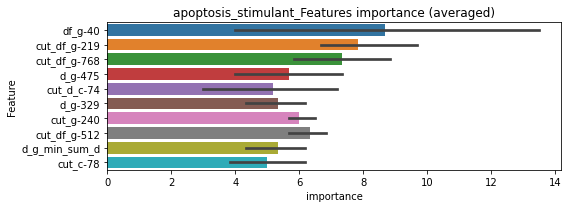

len(train_index) : 3880
len(valid_index) : 3881
================================= fold 1/2 apoptosis_stimulant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0240444	valid_1's binary_logloss: 0.039937
[200]	training's binary_logloss: 0.0049884	valid_1's binary_logloss: 0.0214353
[300]	training's binary_logloss: 0.00167968	valid_1's binary_logloss: 0.0183601
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.0013502	valid_1's binary_logloss: 0.0180866


len(train_index) : 3881
len(valid_index) : 3880
================================= fold 2/2 apoptosis_stimulant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0246627	valid_1's binary_logloss: 0.0385653
[200]	training's binary_logloss: 0.00505521	valid_1's binary_logloss: 0.0194016
[300]	training's binary_logloss: 0.00174205	valid_1's binary_logloss: 0.0162296
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000930262	valid_1's binary_logloss: 0.0155405


apoptosis_stimulant logloss: 0.016813741451029002


neg labels: 3289 → selected neg labels: 3281


aromatase_inhibitor, len(trt): 47, len(othr): 3281, target_rate: 0.0019736 → Adj_target_rate: 0.0022155
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0160337	valid_1's binary_logloss: 0.0501902
[200]	training's binary_logloss: 0.00255561	valid_1's binary_logloss: 0.0403426
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.00292499	valid_1's binary_logloss: 0.040254
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174011	valid_1's binary_logloss: 0.0422276
[200]	training's binary_logloss: 0.00300403	valid_1's binary_logloss: 0.0311318
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.00342232	valid_1's binary_logloss: 0.0310246


1 / 3 AUC score:0.999
y_Threshold: 0.0067342, Threshold: 0.0076363, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0200904 Vs.target_rate: 0.00197
Num_p_label: 80.0, conf_0:0.00687, conf_1:0.00840
Num_p_label: 80.0, Expected: 7.9, Adj_threshold_1: 0.0076363
Num_p_label: 0.0, Expected: 7.9, Adj_threshold_2: 0.0176363
threshold: 0.0176363, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0158003	valid_1's binary_logloss: 0.0500369
[200]	training's binary_logloss: 0.00262556	valid_1's binary_logloss: 0.0388268
Early stopping, best iteration is:
[225]	training's binary_logloss: 0.00194218	valid_1's binary_logloss: 0.0382058
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0178432	valid_1's binary_logloss: 0.0428389
[200]	training's binary_logloss: 0.00287567	valid_1's binary_logloss: 0.0306064
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.0017184	valid_1's binary_logloss: 0.0294126


2 / 3 AUC score:1.000
y_Threshold: 0.0170396, Threshold: 0.0176363, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0002511 Vs.target_rate: 0.00197
Num_p_label: 1.0, conf_0:0.01587, conf_1:0.01940
Num_p_label: 1.0, Expected: 7.9, Adj_threshold_1: 0.0176363
Num_p_label: 30.0, Expected: 7.9, Adj_threshold_2: 0.0076363
threshold: 0.0076363, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0156027	valid_1's binary_logloss: 0.0472593
[200]	training's binary_logloss: 0.00247653	valid_1's binary_logloss: 0.0375229
Early stopping, best iteration is:
[209]	training's binary_logloss: 0.00222659	valid_1's binary_logloss: 0.0373814
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0166288	valid_1's binary_logloss: 0.0414166
[200]	training's binary_logloss: 0.00272564	valid_1's binary_logloss: 0.0297707
Early stopping, best iteration is:
[218]	training's binary_logloss: 0.00218905	valid_1's binary_logloss: 0.0292417


3 / 3 AUC score:1.000
y_Threshold: 0.0116020, Threshold: 0.0076363, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0135610 Vs.target_rate: 0.00197
Num_p_label: 54.0, conf_0:0.00687, conf_1:0.00840
Num_p_label: 54.0, Expected: 7.9, Adj_threshold_1: 0.0076363
Num_p_label: 3.0, Expected: 7.9, Adj_threshold_2: 0.0176363
threshold: 0.0176363, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 652.0/7773, y_label_rate: 0.0838801


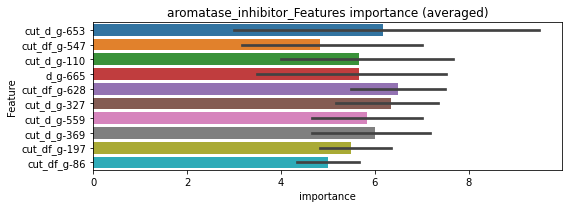

len(train_index) : 3886
len(valid_index) : 3887
================================= fold 1/2 aromatase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0220597	valid_1's binary_logloss: 0.0438431
[200]	training's binary_logloss: 0.00482891	valid_1's binary_logloss: 0.0274813
[300]	training's binary_logloss: 0.00159765	valid_1's binary_logloss: 0.025215
Early stopping, best iteration is:
[298]	training's binary_logloss: 0.00162934	valid_1's binary_logloss: 0.0252016


len(train_index) : 3887
len(valid_index) : 3886
================================= fold 2/2 aromatase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0234937	valid_1's binary_logloss: 0.0387037
[200]	training's binary_logloss: 0.00514261	valid_1's binary_logloss: 0.0221569
[300]	training's binary_logloss: 0.00171325	valid_1's binary_logloss: 0.0188081
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00104861	valid_1's binary_logloss: 0.0183122


aromatase_inhibitor logloss: 0.021757327067316593


neg labels: 3289 → selected neg labels: 3288


atm_kinase_inhibitor, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00328213	valid_1's binary_logloss: 0.00475028
[200]	training's binary_logloss: 0.000342936	valid_1's binary_logloss: 0.00113674
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.000240477	valid_1's binary_logloss: 0.000964432
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00341316	valid_1's binary_logloss: 0.00434304
[200]	training's binary_logloss: 0.000363244	valid_1's binary_logloss: 0.00109215
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.000274945	valid_1's binary_logloss: 0.000999766


1 / 3 AUC score:1.000
y_Threshold: 0.0005163, Threshold: 0.0006809, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00061, conf_1:0.00075
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0006809
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0106809
threshold: 0.0106809, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00336152	valid_1's binary_logloss: 0.00420242
[200]	training's binary_logloss: 0.00034645	valid_1's binary_logloss: 0.0007476
[300]	training's binary_logloss: 0.000225692	valid_1's binary_logloss: 0.000582349
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.000215801	valid_1's binary_logloss: 0.000570341
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00345678	valid_1's binary_logloss: 0.00452237
[200]	training's binary_logloss: 0.00036237	valid_1's binary_logloss: 0.000938777
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.000271814	valid_1's binary_logloss: 0.000839404


2 / 3 AUC score:1.000
y_Threshold: 0.0697554, Threshold: 0.0106809, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00025
Num_p_label: 0.0, conf_0:0.00961, conf_1:0.01175
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0106809
Num_p_label: 160.0, Expected: 1.0, Adj_threshold_2: 0.0006809
threshold: 0.0006809, positive_p_label: 160.0/3982, p_label_rate: 0.0401808
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00336152	valid_1's binary_logloss: 0.00420242
[200]	training's binary_logloss: 0.00034645	valid_1's binary_logloss: 0.0007476
[300]	training's binary_logloss: 0.000225692	valid_1's binary_logloss: 0.000582349
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.000215801	valid_1's binary_logloss: 0.000570341
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00345678	valid_1's binary_logloss: 0.00452237
[200]	training's binary_logloss: 0.00036237	valid_1's binary_logloss: 0.000938777
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.000271814	valid_1's binary_logloss: 0.000839404


3 / 3 AUC score:1.000
y_Threshold: 0.0697554, Threshold: 0.0006809, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0401808 Vs.target_rate: 0.00025
Num_p_label: 160.0, conf_0:0.00061, conf_1:0.00075
Num_p_label: 160.0, Expected: 1.0, Adj_threshold_1: 0.0006809
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0106809
threshold: 0.0106809, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7795, y_label_rate: 0.0842848


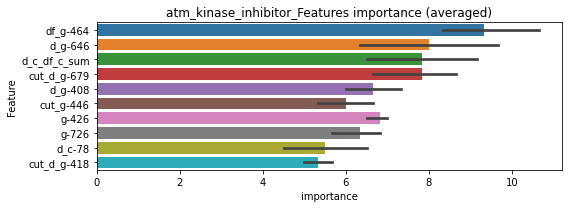

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00926459	valid_1's binary_logloss: 0.010769
[200]	training's binary_logloss: 0.00082694	valid_1's binary_logloss: 0.00170963
[300]	training's binary_logloss: 0.000214081	valid_1's binary_logloss: 0.000865442
[400]	training's binary_logloss: 0.000126402	valid_1's binary_logloss: 0.000719159
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000115722	valid_1's binary_logloss: 0.000709417


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00941555	valid_1's binary_logloss: 0.0104245
[200]	training's binary_logloss: 0.000872103	valid_1's binary_logloss: 0.00153971
[300]	training's binary_logloss: 0.000224871	valid_1's binary_logloss: 0.000896514
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.000137145	valid_1's binary_logloss: 0.00078062


atm_kinase_inhibitor logloss: 0.0007453793086603516


neg labels: 3289 → selected neg labels: 3287


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3287, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0037258	valid_1's binary_logloss: 0.00607273
[200]	training's binary_logloss: 0.000402575	valid_1's binary_logloss: 0.00214582
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.000258153	valid_1's binary_logloss: 0.00191786
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00394101	valid_1's binary_logloss: 0.00496522
[200]	training's binary_logloss: 0.000429376	valid_1's binary_logloss: 0.0010936
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.000269314	valid_1's binary_logloss: 0.000888529


1 / 3 AUC score:1.000
y_Threshold: 0.0004167, Threshold: 0.0004894, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00029
Num_p_label: 80.0, conf_0:0.00044, conf_1:0.00054
Num_p_label: 80.0, Expected: 1.2, Adj_threshold_1: 0.0004894
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.0104894
threshold: 0.0104894, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00383467	valid_1's binary_logloss: 0.0066425
[200]	training's binary_logloss: 0.000412213	valid_1's binary_logloss: 0.00236542
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.000273263	valid_1's binary_logloss: 0.00213587
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00403493	valid_1's binary_logloss: 0.00508129
[200]	training's binary_logloss: 0.000443631	valid_1's binary_logloss: 0.00110767
[300]	training's binary_logloss: 0.000268511	valid_1's binary_logloss: 0.000893089
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000262004	valid_1's binary_logloss: 0.000881857


2 / 3 AUC score:1.000
y_Threshold: 0.0241142, Threshold: 0.0104894, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00029
Num_p_label: 0.0, conf_0:0.00944, conf_1:0.01154
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0104894
Num_p_label: 125.0, Expected: 1.2, Adj_threshold_2: 0.0004894
threshold: 0.0004894, positive_p_label: 125.0/3982, p_label_rate: 0.0313913
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00383467	valid_1's binary_logloss: 0.0066425
[200]	training's binary_logloss: 0.000412213	valid_1's binary_logloss: 0.00236542
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.000273263	valid_1's binary_logloss: 0.00213587
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00403493	valid_1's binary_logloss: 0.00508129
[200]	training's binary_logloss: 0.000443631	valid_1's binary_logloss: 0.00110767
[300]	training's binary_logloss: 0.000268511	valid_1's binary_logloss: 0.000893089
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000262004	valid_1's binary_logloss: 0.000881857


3 / 3 AUC score:1.000
y_Threshold: 0.0241142, Threshold: 0.0004894, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0313913 Vs.target_rate: 0.00029
Num_p_label: 125.0, conf_0:0.00044, conf_1:0.00054
Num_p_label: 125.0, Expected: 1.2, Adj_threshold_1: 0.0004894
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.0104894
threshold: 0.0104894, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7794, y_label_rate: 0.0842956


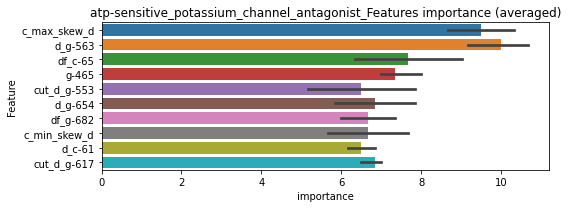

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00979009	valid_1's binary_logloss: 0.0125281
[200]	training's binary_logloss: 0.00095249	valid_1's binary_logloss: 0.00321661
[300]	training's binary_logloss: 0.000255613	valid_1's binary_logloss: 0.00228945
Early stopping, best iteration is:
[369]	training's binary_logloss: 0.000162367	valid_1's binary_logloss: 0.00208614


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0100966	valid_1's binary_logloss: 0.0112945
[200]	training's binary_logloss: 0.00103691	valid_1's binary_logloss: 0.00169073
[300]	training's binary_logloss: 0.000278777	valid_1's binary_logloss: 0.000783162
[400]	training's binary_logloss: 0.000154643	valid_1's binary_logloss: 0.000625821
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000134821	valid_1's binary_logloss: 0.000609281


atp-sensitive_potassium_channel_antagonist logloss: 0.0013478669846796797


neg labels: 3289 → selected neg labels: 3287


atp_synthase_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0032932	valid_1's binary_logloss: 0.00516115
[200]	training's binary_logloss: 0.000352108	valid_1's binary_logloss: 0.00123594
[300]	training's binary_logloss: 0.000233753	valid_1's binary_logloss: 0.000988448
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.000220358	valid_1's binary_logloss: 0.000957911
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0035538	valid_1's binary_logloss: 0.00430495
[200]	training's binary_logloss: 0.000382244	valid_1's binary_logloss: 0.000827781
[300]	training's binary_logloss: 0.000251823	valid_1's binary_logloss: 0.000672155
Early stopping, best iteration is:
[304]	training's binary_logloss: 0.00024915	valid_1's binary_logloss: 0.000666882


1 / 3 AUC score:1.000
y_Threshold: 0.0010777, Threshold: 0.0021127, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00190, conf_1:0.00232
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0021127
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_2: 0.0121127
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_3: 0.0221127
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.0321127
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_5: 0.0421127
threshold: 0.0421127, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00327906	valid_1's binary_logloss: 0.00411387
[200]	training's binary_logloss: 0.000328003	valid_1's binary_logloss: 0.000592179
[300]	training's binary_logloss: 0.00022435	valid_1's binary_logloss: 0.000448532
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.000207758	valid_1's binary_logloss: 0.000425538
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00328891	valid_1's binary_logloss: 0.00386413
[200]	training's binary_logloss: 0.000330351	valid_1's binary_logloss: 0.000519088
[300]	training's binary_logloss: 0.00022568	valid_1's binary_logloss: 0.000385302
[400]	training's binary_logloss: 0.000208553	valid_1's binary_logloss: 0.000361863
[500]	training's binary_logloss: 0.000201356	valid_1's binary_logloss: 0.000352495
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000199539	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.1566615, Threshold: 0.0421127, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00050
Num_p_label: 25.0, conf_0:0.03790, conf_1:0.04632
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_1: 0.0421127
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_2: 0.0521127
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_3: 0.0621127
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_4: 0.0721127
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_5: 0.0821127
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_6: 0.0921127
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_7: 0.1021127
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_8: 0.1121127
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_9: 0.1221127
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_10: 0.1321127
threshold: 0.1421127, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
===========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00327906	valid_1's binary_logloss: 0.00411387
[200]	training's binary_logloss: 0.000328003	valid_1's binary_logloss: 0.000592179
[300]	training's binary_logloss: 0.00022435	valid_1's binary_logloss: 0.000448532
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.000207758	valid_1's binary_logloss: 0.000425538
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00328891	valid_1's binary_logloss: 0.00386413
[200]	training's binary_logloss: 0.000330351	valid_1's binary_logloss: 0.000519088
[300]	training's binary_logloss: 0.00022568	valid_1's binary_logloss: 0.000385302
[400]	training's binary_logloss: 0.000208553	valid_1's binary_logloss: 0.000361863
[500]	training's binary_logloss: 0.000201356	valid_1's binary_logloss: 0.000352495
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000199539	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.1566615, Threshold: 0.1421127, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, conf_0:0.12790, conf_1:0.15632
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.1421127
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.1521127
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1621127
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.1721127
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.1821127
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_6: 0.1921127
threshold: 0.1921127, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 661.0/7794, y_label_rate: 0.0848088


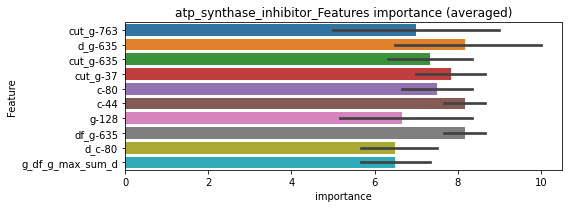

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00957068	valid_1's binary_logloss: 0.0124701
[200]	training's binary_logloss: 0.000878854	valid_1's binary_logloss: 0.00369085
Early stopping, best iteration is:
[255]	training's binary_logloss: 0.000364897	valid_1's binary_logloss: 0.00301893


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00997166	valid_1's binary_logloss: 0.0111717
[200]	training's binary_logloss: 0.000977375	valid_1's binary_logloss: 0.00206846
[300]	training's binary_logloss: 0.00026515	valid_1's binary_logloss: 0.00138273
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000187223	valid_1's binary_logloss: 0.00132736


atp_synthase_inhibitor logloss: 0.0021731416504384223


neg labels: 3289 → selected neg labels: 3273


atpase_inhibitor, len(trt): 97, len(othr): 3273, target_rate: 0.0040732 → Adj_target_rate: 0.0041016
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0236425	valid_1's binary_logloss: 0.0930155
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.00663512	valid_1's binary_logloss: 0.0809192
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0295534	valid_1's binary_logloss: 0.0784426
[200]	training's binary_logloss: 0.00596823	valid_1's binary_logloss: 0.0596338
Early stopping, best iteration is:
[215]	training's binary_logloss: 0.00490856	valid_1's binary_logloss: 0.0589738


1 / 3 AUC score:0.995
y_Threshold: 0.0188511, Threshold: 0.0591239, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 164 → Positive_corect_labels: 638/3763
p_label_rate: 0.0200904 Vs.target_rate: 0.00407
Num_p_label: 80.0, conf_0:0.05321, conf_1:0.06504
Num_p_label: 80.0, Expected: 16.2, Adj_threshold_1: 0.0591239
Num_p_label: 58.0, Expected: 16.2, Adj_threshold_2: 0.0691239
Num_p_label: 44.0, Expected: 16.2, Adj_threshold_3: 0.0791239
Num_p_label: 31.0, Expected: 16.2, Adj_threshold_4: 0.0891239
threshold: 0.0891239, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 638.0/3763, y_label_rate: 0.1695456
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0220346	valid_1's binary_logloss: 0.0706535
Early stopping, best iteration is:
[181]	training's binary_logloss: 0.00522617	valid_1's binary_logloss: 0.056401
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0217871	valid_1's binary_logloss: 0.0712435
[200]	training's binary_logloss: 0.00424879	valid_1's binary_logloss: 0.0588733
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00272514	valid_1's binary_logloss: 0.0566235


2 / 3 AUC score:0.997
y_Threshold: 0.0515628, Threshold: 0.0891239, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 56 → Positive_corect_labels: 610.0/3707
p_label_rate: 0.0592667 Vs.target_rate: 0.00407
Num_p_label: 236.0, conf_0:0.08021, conf_1:0.09804
Num_p_label: 236.0, Expected: 16.2, Adj_threshold_1: 0.0891239
Num_p_label: 231.0, Expected: 16.2, Adj_threshold_2: 0.0991239
Num_p_label: 222.0, Expected: 16.2, Adj_threshold_3: 0.1091239
Num_p_label: 216.0, Expected: 16.2, Adj_threshold_4: 0.1191239
Num_p_label: 211.0, Expected: 16.2, Adj_threshold_5: 0.1291239
Num_p_label: 204.0, Expected: 16.2, Adj_threshold_6: 0.1391239
Num_p_label: 201.0, Expected: 16.2, Adj_threshold_7: 0.1491239
Num_p_label: 196.0, Expected: 16.2, Adj_threshold_8: 0.1591239
Num_p_label: 188.0, Expected: 16.2, Adj_threshold_9: 0.1691239
Num_p_label: 181.0, Expected: 16.2, Adj_threshold_10: 0.1791239
threshold: 0.1891239, positive_p_label: 173.0/3982, p_label_rate: 0.0434455
positive_y_label: 610.0/3707, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0151521	valid_1's binary_logloss: 0.0491836
[200]	training's binary_logloss: 0.00252051	valid_1's binary_logloss: 0.0358072
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00281222	valid_1's binary_logloss: 0.0356745
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0173688	valid_1's binary_logloss: 0.0408494
[200]	training's binary_logloss: 0.00302497	valid_1's binary_logloss: 0.0246938
[300]	training's binary_logloss: 0.00119779	valid_1's binary_logloss: 0.021592
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00126421	valid_1's binary_logloss: 0.021587


3 / 3 AUC score:1.000
y_Threshold: 0.0787678, Threshold: 0.1891239, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 26 → Positive_corect_labels: 597.0/3681
p_label_rate: 0.0592667 Vs.target_rate: 0.00407
Num_p_label: 236.0, conf_0:0.17021, conf_1:0.20804
Num_p_label: 236.0, Expected: 16.2, Adj_threshold_1: 0.1891239
Num_p_label: 233.0, Expected: 16.2, Adj_threshold_2: 0.1991239
Num_p_label: 232.0, Expected: 16.2, Adj_threshold_3: 0.2091239
Num_p_label: 231.0, Expected: 16.2, Adj_threshold_4: 0.2191239
Num_p_label: 228.0, Expected: 16.2, Adj_threshold_5: 0.2291239
Num_p_label: 227.0, Expected: 16.2, Adj_threshold_6: 0.2391239
Num_p_label: 225.0, Expected: 16.2, Adj_threshold_7: 0.2491239
Num_p_label: 223.0, Expected: 16.2, Adj_threshold_8: 0.2591239
Num_p_label: 222.0, Expected: 16.2, Adj_threshold_9: 0.2691239
Num_p_label: 220.0, Expected: 16.2, Adj_threshold_10: 0.2791239
threshold: 0.2891239, positive_p_label: 220.0/3982, p_label_rate: 0.0552486
positive_y_label: 817.0/7663, y_label_ra

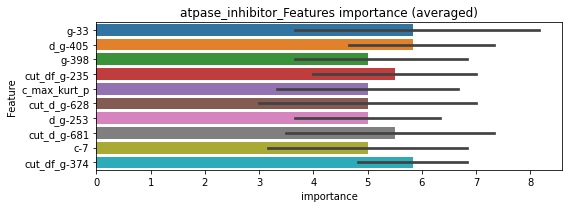

len(train_index) : 3831
len(valid_index) : 3832
================================= fold 1/2 atpase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0265955	valid_1's binary_logloss: 0.0494288
[200]	training's binary_logloss: 0.00557897	valid_1's binary_logloss: 0.0245937
[300]	training's binary_logloss: 0.0018189	valid_1's binary_logloss: 0.0191002
[400]	training's binary_logloss: 0.000898233	valid_1's binary_logloss: 0.0170582
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000694089	valid_1's binary_logloss: 0.0164826


len(train_index) : 3832
len(valid_index) : 3831
================================= fold 2/2 atpase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0279919	valid_1's binary_logloss: 0.0447892
[200]	training's binary_logloss: 0.00582925	valid_1's binary_logloss: 0.0218892
[300]	training's binary_logloss: 0.00195386	valid_1's binary_logloss: 0.0157134
[400]	training's binary_logloss: 0.00096057	valid_1's binary_logloss: 0.0135172
[500]	training's binary_logloss: 0.000607925	valid_1's binary_logloss: 0.0125611
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000493753	valid_1's binary_logloss: 0.0123036


atpase_inhibitor logloss: 0.01439340052126741


neg labels: 3289 → selected neg labels: 3286


atr_kinase_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00585804	valid_1's binary_logloss: 0.0152196
[200]	training's binary_logloss: 0.000728894	valid_1's binary_logloss: 0.00896409
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.000469258	valid_1's binary_logloss: 0.0085849
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00618539	valid_1's binary_logloss: 0.0089636
[200]	training's binary_logloss: 0.000801483	valid_1's binary_logloss: 0.00290357
[300]	training's binary_logloss: 0.000406346	valid_1's binary_logloss: 0.00235804
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000357222	valid_1's binary_logloss: 0.00229497


1 / 3 AUC score:1.000
y_Threshold: 0.0017691, Threshold: 0.0034722, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00080
Num_p_label: 80.0, conf_0:0.00312, conf_1:0.00382
Num_p_label: 80.0, Expected: 3.2, Adj_threshold_1: 0.0034722
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_2: 0.0134722
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_3: 0.0234722
threshold: 0.0234722, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00582101	valid_1's binary_logloss: 0.0124536
[200]	training's binary_logloss: 0.000704595	valid_1's binary_logloss: 0.00599904
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.00046013	valid_1's binary_logloss: 0.00555738
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00610388	valid_1's binary_logloss: 0.00847216
[200]	training's binary_logloss: 0.000757418	valid_1's binary_logloss: 0.00249788
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000407934	valid_1's binary_logloss: 0.00200677


2 / 3 AUC score:1.000
y_Threshold: 0.0371757, Threshold: 0.0234722, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0072828 Vs.target_rate: 0.00080
Num_p_label: 29.0, conf_0:0.02112, conf_1:0.02582
Num_p_label: 29.0, Expected: 3.2, Adj_threshold_1: 0.0234722
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_2: 0.0334722
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_3: 0.0434722
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_4: 0.0534722
threshold: 0.0534722, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00582101	valid_1's binary_logloss: 0.0124536
[200]	training's binary_logloss: 0.000704595	valid_1's binary_logloss: 0.00599904
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.00046013	valid_1's binary_logloss: 0.00555738
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00610388	valid_1's binary_logloss: 0.00847216
[200]	training's binary_logloss: 0.000757418	valid_1's binary_logloss: 0.00249788
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000407934	valid_1's binary_logloss: 0.00200677


3 / 3 AUC score:1.000
y_Threshold: 0.0371757, Threshold: 0.0534722, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00080
Num_p_label: 6.0, conf_0:0.04812, conf_1:0.05882
threshold: 0.0534722, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 663.0/7793, y_label_rate: 0.0850764


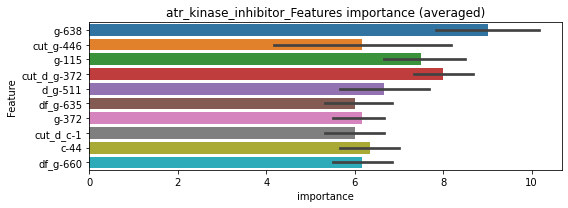

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0128512	valid_1's binary_logloss: 0.0205028
[200]	training's binary_logloss: 0.00162674	valid_1's binary_logloss: 0.00918493
Early stopping, best iteration is:
[270]	training's binary_logloss: 0.000648746	valid_1's binary_logloss: 0.00839581


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0137356	valid_1's binary_logloss: 0.0175524
[200]	training's binary_logloss: 0.00192626	valid_1's binary_logloss: 0.00480644
[300]	training's binary_logloss: 0.000572701	valid_1's binary_logloss: 0.00322564
[400]	training's binary_logloss: 0.000302902	valid_1's binary_logloss: 0.00288594
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000232296	valid_1's binary_logloss: 0.00274023


atr_kinase_inhibitor logloss: 0.0055683810514766995


neg labels: 3289 → selected neg labels: 3273


aurora_kinase_inhibitor, len(trt): 96, len(othr): 3273, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0182068	valid_1's binary_logloss: 0.0572942
[200]	training's binary_logloss: 0.00301389	valid_1's binary_logloss: 0.0423447
Early stopping, best iteration is:
[232]	training's binary_logloss: 0.00207584	valid_1's binary_logloss: 0.0406057
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0180731	valid_1's binary_logloss: 0.0583045
[200]	training's binary_logloss: 0.00303778	valid_1's binary_logloss: 0.0414778
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.00136793	valid_1's binary_logloss: 0.038244


1 / 3 AUC score:0.999
y_Threshold: 0.0139508, Threshold: 0.0391844, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 144 → Positive_corect_labels: 648/3783
p_label_rate: 0.0200904 Vs.target_rate: 0.00403
Num_p_label: 80.0, conf_0:0.03527, conf_1:0.04310
Num_p_label: 80.0, Expected: 16.1, Adj_threshold_1: 0.0391844
Num_p_label: 60.0, Expected: 16.1, Adj_threshold_2: 0.0491844
Num_p_label: 55.0, Expected: 16.1, Adj_threshold_3: 0.0591844
Num_p_label: 52.0, Expected: 16.1, Adj_threshold_4: 0.0691844
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_5: 0.0791844
Num_p_label: 42.0, Expected: 16.1, Adj_threshold_6: 0.0891844
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_7: 0.0991844
Num_p_label: 38.0, Expected: 16.1, Adj_threshold_8: 0.1091844
Num_p_label: 35.0, Expected: 16.1, Adj_threshold_9: 0.1191844
Num_p_label: 34.0, Expected: 16.1, Adj_threshold_10: 0.1291844
threshold: 0.1391844, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 648.0/3783, y_label_rate: 0.1712926

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0155789	valid_1's binary_logloss: 0.045658
[200]	training's binary_logloss: 0.00246845	valid_1's binary_logloss: 0.0298187
[300]	training's binary_logloss: 0.000974162	valid_1's binary_logloss: 0.0270259
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000725947	valid_1's binary_logloss: 0.0262924
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0162929	valid_1's binary_logloss: 0.0426349
[200]	training's binary_logloss: 0.00254923	valid_1's binary_logloss: 0.0242339
[300]	training's binary_logloss: 0.00101038	valid_1's binary_logloss: 0.0211648
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000734973	valid_1's binary_logloss: 0.0202975


2 / 3 AUC score:1.000
y_Threshold: 0.0612035, Threshold: 0.1391844, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 639.0/3765
p_label_rate: 0.0195881 Vs.target_rate: 0.00403
Num_p_label: 78.0, conf_0:0.12527, conf_1:0.15310
Num_p_label: 78.0, Expected: 16.1, Adj_threshold_1: 0.1391844
Num_p_label: 74.0, Expected: 16.1, Adj_threshold_2: 0.1491844
Num_p_label: 70.0, Expected: 16.1, Adj_threshold_3: 0.1591844
Num_p_label: 64.0, Expected: 16.1, Adj_threshold_4: 0.1691844
Num_p_label: 64.0, Expected: 16.1, Adj_threshold_5: 0.1791844
Num_p_label: 61.0, Expected: 16.1, Adj_threshold_6: 0.1891844
Num_p_label: 59.0, Expected: 16.1, Adj_threshold_7: 0.1991844
Num_p_label: 59.0, Expected: 16.1, Adj_threshold_8: 0.2091844
Num_p_label: 56.0, Expected: 16.1, Adj_threshold_9: 0.2191844
Num_p_label: 53.0, Expected: 16.1, Adj_threshold_10: 0.2291844
threshold: 0.2391844, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 639.0/3765, y_label_rate: 0.169721

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0135599	valid_1's binary_logloss: 0.0487708
[200]	training's binary_logloss: 0.0020469	valid_1's binary_logloss: 0.0319619
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.000975964	valid_1's binary_logloss: 0.0290685
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0155934	valid_1's binary_logloss: 0.0336825
[200]	training's binary_logloss: 0.0024462	valid_1's binary_logloss: 0.0153373
[300]	training's binary_logloss: 0.000966727	valid_1's binary_logloss: 0.0115514
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000679462	valid_1's binary_logloss: 0.0107297


3 / 3 AUC score:1.000
y_Threshold: 0.0726259, Threshold: 0.2391844, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 632.0/3751
p_label_rate: 0.0173280 Vs.target_rate: 0.00403
Num_p_label: 69.0, conf_0:0.21527, conf_1:0.26310
Num_p_label: 69.0, Expected: 16.1, Adj_threshold_1: 0.2391844
Num_p_label: 65.0, Expected: 16.1, Adj_threshold_2: 0.2491844
Num_p_label: 61.0, Expected: 16.1, Adj_threshold_3: 0.2591844
Num_p_label: 61.0, Expected: 16.1, Adj_threshold_4: 0.2691844
Num_p_label: 58.0, Expected: 16.1, Adj_threshold_5: 0.2791844
Num_p_label: 56.0, Expected: 16.1, Adj_threshold_6: 0.2891844
Num_p_label: 54.0, Expected: 16.1, Adj_threshold_7: 0.2991844
Num_p_label: 52.0, Expected: 16.1, Adj_threshold_8: 0.3091844
Num_p_label: 48.0, Expected: 16.1, Adj_threshold_9: 0.3191844
Num_p_label: 47.0, Expected: 16.1, Adj_threshold_10: 0.3291844
threshold: 0.3391844, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 679.0/7733, y_label_rate: 0.087805

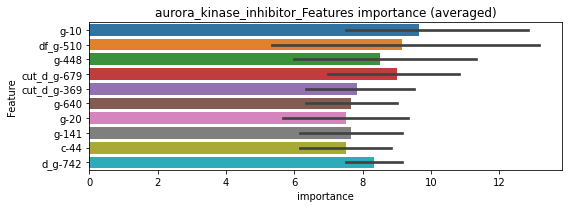

len(train_index) : 3866
len(valid_index) : 3867
================================= fold 1/2 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0254258	valid_1's binary_logloss: 0.0448683
[200]	training's binary_logloss: 0.00551156	valid_1's binary_logloss: 0.0232303
[300]	training's binary_logloss: 0.00192978	valid_1's binary_logloss: 0.0181372
[400]	training's binary_logloss: 0.000942611	valid_1's binary_logloss: 0.0161589
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000678157	valid_1's binary_logloss: 0.0154079


len(train_index) : 3867
len(valid_index) : 3866
================================= fold 2/2 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0242253	valid_1's binary_logloss: 0.050919
[200]	training's binary_logloss: 0.00500795	valid_1's binary_logloss: 0.0291186
[300]	training's binary_logloss: 0.00171504	valid_1's binary_logloss: 0.023794
[400]	training's binary_logloss: 0.000841112	valid_1's binary_logloss: 0.0216811
[500]	training's binary_logloss: 0.000528138	valid_1's binary_logloss: 0.0205833
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000493157	valid_1's binary_logloss: 0.0204104


aurora_kinase_inhibitor logloss: 0.01790885940158437


neg labels: 3289 → selected neg labels: 3288


autotaxin_inhibitor, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00347136	valid_1's binary_logloss: 0.00595859
[200]	training's binary_logloss: 0.00035622	valid_1's binary_logloss: 0.00245734
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.000267741	valid_1's binary_logloss: 0.00230697
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00376214	valid_1's binary_logloss: 0.00410853
[200]	training's binary_logloss: 0.00039668	valid_1's binary_logloss: 0.000500951
[300]	training's binary_logloss: 0.000244907	valid_1's binary_logloss: 0.000326441
[400]	training's binary_logloss: 0.000226627	valid_1's binary_logloss: 0.000307289
[500]	training's binary_logloss: 0.000217062	valid_1's binary_logloss: 0.000296627
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000215724	valid_1's binary_logloss: 0.000294997


1 / 3 AUC score:1.000
y_Threshold: 0.0003531, Threshold: 0.0004177, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00038, conf_1:0.00046
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0004177
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0104177
threshold: 0.0104177, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00350852	valid_1's binary_logloss: 0.00692559
[200]	training's binary_logloss: 0.000361745	valid_1's binary_logloss: 0.00321464
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.000272087	valid_1's binary_logloss: 0.0030828
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00384142	valid_1's binary_logloss: 0.004516
[200]	training's binary_logloss: 0.000405962	valid_1's binary_logloss: 0.000655168
[300]	training's binary_logloss: 0.000253994	valid_1's binary_logloss: 0.000465287
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.000253115	valid_1's binary_logloss: 0.000464836


2 / 3 AUC score:1.000
y_Threshold: 0.0275737, Threshold: 0.0104177, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00025
Num_p_label: 0.0, conf_0:0.00938, conf_1:0.01146
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0104177
Num_p_label: 169.0, Expected: 1.0, Adj_threshold_2: 0.0004177
threshold: 0.0004177, positive_p_label: 169.0/3982, p_label_rate: 0.0424410
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00350852	valid_1's binary_logloss: 0.00692559
[200]	training's binary_logloss: 0.000361745	valid_1's binary_logloss: 0.00321464
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.000272087	valid_1's binary_logloss: 0.0030828
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00384142	valid_1's binary_logloss: 0.004516
[200]	training's binary_logloss: 0.000405962	valid_1's binary_logloss: 0.000655168
[300]	training's binary_logloss: 0.000253994	valid_1's binary_logloss: 0.000465287
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.000253115	valid_1's binary_logloss: 0.000464836


3 / 3 AUC score:1.000
y_Threshold: 0.0275737, Threshold: 0.0004177, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0424410 Vs.target_rate: 0.00025
Num_p_label: 169.0, conf_0:0.00038, conf_1:0.00046
Num_p_label: 169.0, Expected: 1.0, Adj_threshold_1: 0.0004177
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0104177
threshold: 0.0104177, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7795, y_label_rate: 0.0842848


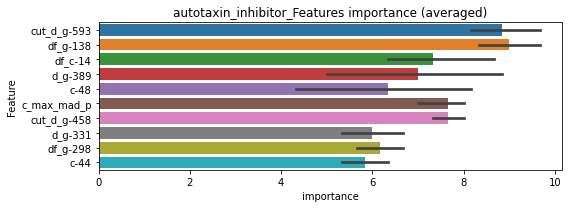

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 autotaxin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00948427	valid_1's binary_logloss: 0.0116736
[200]	training's binary_logloss: 0.000880648	valid_1's binary_logloss: 0.00269617
[300]	training's binary_logloss: 0.000225881	valid_1's binary_logloss: 0.00187817
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000137833	valid_1's binary_logloss: 0.00175798


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 autotaxin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00986916	valid_1's binary_logloss: 0.0104885
[200]	training's binary_logloss: 0.00096045	valid_1's binary_logloss: 0.00119205
[300]	training's binary_logloss: 0.000248576	valid_1's binary_logloss: 0.000389201
[400]	training's binary_logloss: 0.000143771	valid_1's binary_logloss: 0.000271802
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00012958	valid_1's binary_logloss: 0.00025368


autotaxin_inhibitor logloss: 0.0010059506294282897


neg labels: 3289 → selected neg labels: 3279


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3279, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204173	valid_1's binary_logloss: 0.0677942
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00436802	valid_1's binary_logloss: 0.0568272
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204406	valid_1's binary_logloss: 0.0612825
[200]	training's binary_logloss: 0.00356135	valid_1's binary_logloss: 0.0477239
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00399037	valid_1's binary_logloss: 0.0476943


1 / 3 AUC score:1.000
y_Threshold: 0.0089324, Threshold: 0.0093817, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 138 → Positive_corect_labels: 652/3796
p_label_rate: 0.0200904 Vs.target_rate: 0.00252
Num_p_label: 80.0, conf_0:0.00844, conf_1:0.01032
Num_p_label: 80.0, Expected: 10.0, Adj_threshold_1: 0.0093817
Num_p_label: 1.0, Expected: 10.0, Adj_threshold_2: 0.0193817
threshold: 0.0193817, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.019322	valid_1's binary_logloss: 0.0616786
[200]	training's binary_logloss: 0.00337976	valid_1's binary_logloss: 0.0510898
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.0038295	valid_1's binary_logloss: 0.0507492
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0213084	valid_1's binary_logloss: 0.0613611
[200]	training's binary_logloss: 0.00367967	valid_1's binary_logloss: 0.0484859
Early stopping, best iteration is:
[217]	training's binary_logloss: 0.00294309	valid_1's binary_logloss: 0.0475116


2 / 3 AUC score:0.999
y_Threshold: 0.0172346, Threshold: 0.0193817, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0002511 Vs.target_rate: 0.00252
Num_p_label: 1.0, conf_0:0.01744, conf_1:0.02132
Num_p_label: 1.0, Expected: 10.0, Adj_threshold_1: 0.0193817
Num_p_label: 85.0, Expected: 10.0, Adj_threshold_2: 0.0093817
threshold: 0.0093817, positive_p_label: 85.0/3982, p_label_rate: 0.0213461
positive_y_label: 646.0/3784, y_label_rate: 0.1707188
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0191623	valid_1's binary_logloss: 0.0604474
Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00491722	valid_1's binary_logloss: 0.0493561
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0205288	valid_1's binary_logloss: 0.0541937
[200]	training's binary_logloss: 0.00345931	valid_1's binary_logloss: 0.0393129
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00223592	valid_1's binary_logloss: 0.0382321


3 / 3 AUC score:0.999
y_Threshold: 0.0167106, Threshold: 0.0093817, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 640.0/3772
p_label_rate: 0.0185836 Vs.target_rate: 0.00252
Num_p_label: 74.0, conf_0:0.00844, conf_1:0.01032
Num_p_label: 74.0, Expected: 10.0, Adj_threshold_1: 0.0093817
Num_p_label: 2.0, Expected: 10.0, Adj_threshold_2: 0.0193817
threshold: 0.0193817, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 642.0/7754, y_label_rate: 0.0827960


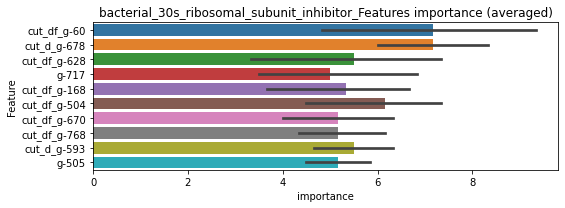

len(train_index) : 3877
len(valid_index) : 3877
================================= fold 1/2 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0243153	valid_1's binary_logloss: 0.0511136
[200]	training's binary_logloss: 0.00525145	valid_1's binary_logloss: 0.0345837
[300]	training's binary_logloss: 0.00173837	valid_1's binary_logloss: 0.0321139
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00154969	valid_1's binary_logloss: 0.0320383


len(train_index) : 3877
len(valid_index) : 3877
================================= fold 2/2 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.027772	valid_1's binary_logloss: 0.0406634
[200]	training's binary_logloss: 0.00635575	valid_1's binary_logloss: 0.0207402
[300]	training's binary_logloss: 0.00217526	valid_1's binary_logloss: 0.0172346
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.00130393	valid_1's binary_logloss: 0.016315


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.024176686384988034


neg labels: 3289 → selected neg labels: 3277


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3277, target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0252616	valid_1's binary_logloss: 0.0870626
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00531792	valid_1's binary_logloss: 0.076513
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0274036	valid_1's binary_logloss: 0.0810444
[200]	training's binary_logloss: 0.00520636	valid_1's binary_logloss: 0.0695945
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00396776	valid_1's binary_logloss: 0.0691135


1 / 3 AUC score:0.995
y_Threshold: 0.0116320, Threshold: 0.0121547, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 150 → Positive_corect_labels: 646/3782
p_label_rate: 0.0200904 Vs.target_rate: 0.00336
Num_p_label: 80.0, conf_0:0.01094, conf_1:0.01337
Num_p_label: 80.0, Expected: 13.4, Adj_threshold_1: 0.0121547
Num_p_label: 2.0, Expected: 13.4, Adj_threshold_2: 0.0221547
threshold: 0.0221547, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 646.0/3782, y_label_rate: 0.1708091
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0231653	valid_1's binary_logloss: 0.0919225
Early stopping, best iteration is:
[162]	training's binary_logloss: 0.00724698	valid_1's binary_logloss: 0.0835911
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0277284	valid_1's binary_logloss: 0.0659308
[200]	training's binary_logloss: 0.00518777	valid_1's binary_logloss: 0.0481711
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.00313731	valid_1's binary_logloss: 0.0468861


2 / 3 AUC score:0.999
y_Threshold: 0.0224249, Threshold: 0.0221547, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 26 → Positive_corect_labels: 633.0/3756
p_label_rate: 0.0027624 Vs.target_rate: 0.00336
Num_p_label: 11.0, conf_0:0.01994, conf_1:0.02437
threshold: 0.0221547, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 633.0/3756, y_label_rate: 0.1685304
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0218869	valid_1's binary_logloss: 0.0701203
[200]	training's binary_logloss: 0.00394649	valid_1's binary_logloss: 0.0588624
Early stopping, best iteration is:
[205]	training's binary_logloss: 0.0037204	valid_1's binary_logloss: 0.0588157
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0233039	valid_1's binary_logloss: 0.0671731
[200]	training's binary_logloss: 0.0040763	valid_1's binary_logloss: 0.0559964
Early stopping, best iteration is:
[236]	training's binary_logloss: 0.00268122	valid_1's binary_logloss: 0.0545749


3 / 3 AUC score:0.999
y_Threshold: 0.0152501, Threshold: 0.0221547, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 624.0/3738
p_label_rate: 0.0007534 Vs.target_rate: 0.00336
Num_p_label: 3.0, conf_0:0.01994, conf_1:0.02437
Num_p_label: 3.0, Expected: 13.4, Adj_threshold_1: 0.0221547
Num_p_label: 33.0, Expected: 13.4, Adj_threshold_2: 0.0121547
threshold: 0.0121547, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 657.0/7720, y_label_rate: 0.0851036


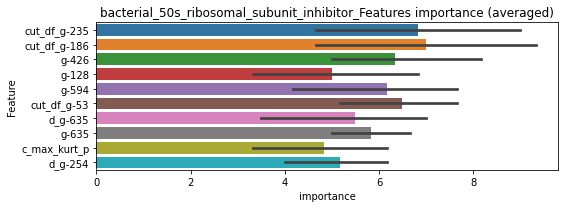

len(train_index) : 3860
len(valid_index) : 3860
================================= fold 1/2 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0311644	valid_1's binary_logloss: 0.0735492
[200]	training's binary_logloss: 0.00802934	valid_1's binary_logloss: 0.0585706
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00407498	valid_1's binary_logloss: 0.0575968


len(train_index) : 3860
len(valid_index) : 3860
================================= fold 2/2 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0366947	valid_1's binary_logloss: 0.0600665
[200]	training's binary_logloss: 0.0101987	valid_1's binary_logloss: 0.040762
[300]	training's binary_logloss: 0.00374195	valid_1's binary_logloss: 0.0374827
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.00277092	valid_1's binary_logloss: 0.0369422


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.04726947524768068


neg labels: 3289 → selected neg labels: 3283


bacterial_antifolate, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0114863	valid_1's binary_logloss: 0.0393727
Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00187781	valid_1's binary_logloss: 0.0312259
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0137811	valid_1's binary_logloss: 0.0306329
[200]	training's binary_logloss: 0.00201986	valid_1's binary_logloss: 0.0186504
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00125614	valid_1's binary_logloss: 0.0176354


1 / 3 AUC score:1.000
y_Threshold: 0.0037242, Threshold: 0.0041996, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00378, conf_1:0.00462
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0041996
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0141996
threshold: 0.0141996, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0116216	valid_1's binary_logloss: 0.0408654
[200]	training's binary_logloss: 0.00164484	valid_1's binary_logloss: 0.03254
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.00106406	valid_1's binary_logloss: 0.0316353
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0142586	valid_1's binary_logloss: 0.0308459
[200]	training's binary_logloss: 0.00210217	valid_1's binary_logloss: 0.0189669
Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00124612	valid_1's binary_logloss: 0.0176382


2 / 3 AUC score:1.000
y_Threshold: 0.0111673, Threshold: 0.0141996, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0002511 Vs.target_rate: 0.00151
Num_p_label: 1.0, conf_0:0.01278, conf_1:0.01562
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0141996
Num_p_label: 85.0, Expected: 6.0, Adj_threshold_2: 0.0041996
threshold: 0.0041996, positive_p_label: 85.0/3982, p_label_rate: 0.0213461
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0126442	valid_1's binary_logloss: 0.0313008
[200]	training's binary_logloss: 0.00190638	valid_1's binary_logloss: 0.019145
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00118694	valid_1's binary_logloss: 0.0182981
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0125898	valid_1's binary_logloss: 0.0354488
[200]	training's binary_logloss: 0.00187123	valid_1's binary_logloss: 0.0246217
Early stopping, best iteration is:
[232]	training's binary_logloss: 0.00126872	valid_1's binary_logloss: 0.0235925


3 / 3 AUC score:1.000
y_Threshold: 0.0098325, Threshold: 0.0041996, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0231040 Vs.target_rate: 0.00151
Num_p_label: 92.0, conf_0:0.00378, conf_1:0.00462
Num_p_label: 92.0, Expected: 6.0, Adj_threshold_1: 0.0041996
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_2: 0.0141996
threshold: 0.0141996, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/7785, y_label_rate: 0.0841362


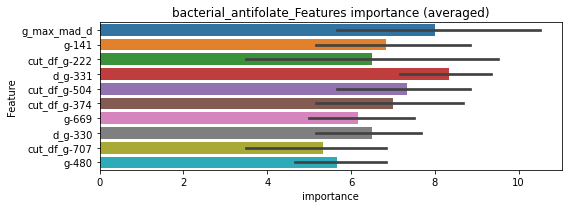

len(train_index) : 3892
len(valid_index) : 3893
================================= fold 1/2 bacterial_antifolate=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0198854	valid_1's binary_logloss: 0.0332668
[200]	training's binary_logloss: 0.00368282	valid_1's binary_logloss: 0.0169304
[300]	training's binary_logloss: 0.00117849	valid_1's binary_logloss: 0.0144219
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00100432	valid_1's binary_logloss: 0.0143194


len(train_index) : 3893
len(valid_index) : 3892
================================= fold 2/2 bacterial_antifolate=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0197088	valid_1's binary_logloss: 0.0328382
[200]	training's binary_logloss: 0.00355985	valid_1's binary_logloss: 0.0176534
[300]	training's binary_logloss: 0.00113428	valid_1's binary_logloss: 0.0152818
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.000781862	valid_1's binary_logloss: 0.0148287


bacterial_antifolate logloss: 0.014574019249879415


neg labels: 3289 → selected neg labels: 3259


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 3259, target_rate: 0.0080625 → Adj_target_rate: 0.0073283
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0545875	valid_1's binary_logloss: 0.196135
Early stopping, best iteration is:
[116]	training's binary_logloss: 0.0422524	valid_1's binary_logloss: 0.193444
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0632275	valid_1's binary_logloss: 0.176781
Early stopping, best iteration is:
[174]	training's binary_logloss: 0.0225837	valid_1's binary_logloss: 0.168162


1 / 3 AUC score:0.941
y_Threshold: 0.0575518, Threshold: 0.0630494, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 335 → Positive_corect_labels: 549/3575
p_label_rate: 0.0200904 Vs.target_rate: 0.00806
Num_p_label: 80.0, conf_0:0.05674, conf_1:0.06935
threshold: 0.0630494, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 549.0/3575, y_label_rate: 0.1535664
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0342302	valid_1's binary_logloss: 0.119731
Early stopping, best iteration is:
[135]	training's binary_logloss: 0.0185834	valid_1's binary_logloss: 0.113576
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0370783	valid_1's binary_logloss: 0.11398
Early stopping, best iteration is:
[157]	training's binary_logloss: 0.0142663	valid_1's binary_logloss: 0.103165


2 / 3 AUC score:0.984
y_Threshold: 0.0423377, Threshold: 0.0630494, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 84 → Positive_corect_labels: 507.0/3491
p_label_rate: 0.0012557 Vs.target_rate: 0.00806
Num_p_label: 5.0, conf_0:0.05674, conf_1:0.06935
Num_p_label: 5.0, Expected: 32.1, Adj_threshold_1: 0.0630494
Num_p_label: 14.0, Expected: 32.1, Adj_threshold_2: 0.0530494
Num_p_label: 43.0, Expected: 32.1, Adj_threshold_3: 0.0430494
threshold: 0.0430494, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 507.0/3491, y_label_rate: 0.1452306
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0270464	valid_1's binary_logloss: 0.076588
[200]	training's binary_logloss: 0.00523437	valid_1's binary_logloss: 0.0632881
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00403837	valid_1's binary_logloss: 0.0624187
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0251014	valid_1's binary_logloss: 0.0825176
[200]	training's binary_logloss: 0.00467318	valid_1's binary_logloss: 0.0705289
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00358243	valid_1's binary_logloss: 0.0699514


3 / 3 AUC score:0.996
y_Threshold: 0.0161920, Threshold: 0.0430494, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 34 → Positive_corect_labels: 490.0/3457
p_label_rate: 0.0000000 Vs.target_rate: 0.00806
Num_p_label: 0.0, conf_0:0.03874, conf_1:0.04735
Num_p_label: 0.0, Expected: 32.1, Adj_threshold_1: 0.0430494
Num_p_label: 0.0, Expected: 32.1, Adj_threshold_2: 0.0330494
Num_p_label: 2.0, Expected: 32.1, Adj_threshold_3: 0.0230494
Num_p_label: 53.0, Expected: 32.1, Adj_threshold_4: 0.0130494
threshold: 0.0130494, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 543.0/7439, y_label_rate: 0.0729937


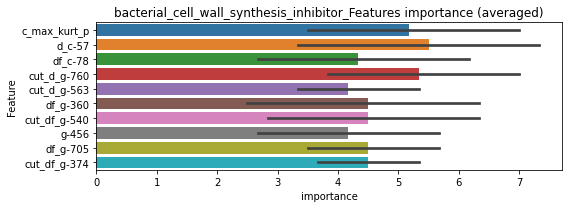

len(train_index) : 3719
len(valid_index) : 3720
================================= fold 1/2 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0406487	valid_1's binary_logloss: 0.0820599
[200]	training's binary_logloss: 0.0125969	valid_1's binary_logloss: 0.0655765
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.00826899	valid_1's binary_logloss: 0.0645311


len(train_index) : 3720
len(valid_index) : 3719
================================= fold 2/2 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0393951	valid_1's binary_logloss: 0.0820457
[200]	training's binary_logloss: 0.0120991	valid_1's binary_logloss: 0.0664872
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00847014	valid_1's binary_logloss: 0.0657838


bacterial_cell_wall_synthesis_inhibitor logloss: 0.0651573875780111


neg labels: 3289 → selected neg labels: 3274


bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3274, target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0266892	valid_1's binary_logloss: 0.0987696
Early stopping, best iteration is:
[156]	training's binary_logloss: 0.00953867	valid_1's binary_logloss: 0.0900845
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0306617	valid_1's binary_logloss: 0.0843755
Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00731318	valid_1's binary_logloss: 0.0693549


1 / 3 AUC score:0.993
y_Threshold: 0.0190711, Threshold: 0.0209006, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 164 → Positive_corect_labels: 638/3764
p_label_rate: 0.0200904 Vs.target_rate: 0.00374
Num_p_label: 80.0, conf_0:0.01881, conf_1:0.02299
Num_p_label: 80.0, Expected: 14.9, Adj_threshold_1: 0.0209006
Num_p_label: 10.0, Expected: 14.9, Adj_threshold_2: 0.0309006
threshold: 0.0309006, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 638.0/3764, y_label_rate: 0.1695005
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0253913	valid_1's binary_logloss: 0.0814658
[200]	training's binary_logloss: 0.0047019	valid_1's binary_logloss: 0.0716485
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00508831	valid_1's binary_logloss: 0.071398
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0262534	valid_1's binary_logloss: 0.08035
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00568625	valid_1's binary_logloss: 0.0669361


2 / 3 AUC score:0.998
y_Threshold: 0.0270049, Threshold: 0.0309006, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 36 → Positive_corect_labels: 620.0/3728
p_label_rate: 0.0020090 Vs.target_rate: 0.00374
Num_p_label: 8.0, conf_0:0.02781, conf_1:0.03399
threshold: 0.0309006, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 620.0/3728, y_label_rate: 0.1663090
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0225049	valid_1's binary_logloss: 0.0675553
Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00564401	valid_1's binary_logloss: 0.0552114
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0236431	valid_1's binary_logloss: 0.0609404
[200]	training's binary_logloss: 0.00435087	valid_1's binary_logloss: 0.0463779
Early stopping, best iteration is:
[201]	training's binary_logloss: 0.00429871	valid_1's binary_logloss: 0.0463046


3 / 3 AUC score:1.000
y_Threshold: 0.0242684, Threshold: 0.0309006, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 24 → Positive_corect_labels: 608.0/3704
p_label_rate: 0.0007534 Vs.target_rate: 0.00374
Num_p_label: 3.0, conf_0:0.02781, conf_1:0.03399
Num_p_label: 3.0, Expected: 14.9, Adj_threshold_1: 0.0309006
Num_p_label: 25.0, Expected: 14.9, Adj_threshold_2: 0.0209006
threshold: 0.0209006, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 633.0/7686, y_label_rate: 0.0823575


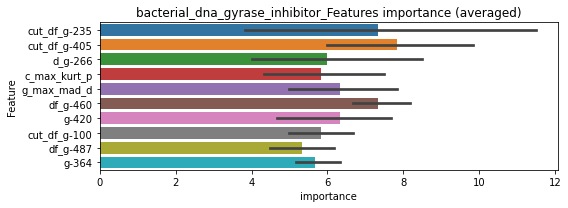

len(train_index) : 3843
len(valid_index) : 3843
================================= fold 1/2 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.032002	valid_1's binary_logloss: 0.064971
[200]	training's binary_logloss: 0.00822819	valid_1's binary_logloss: 0.0471728
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.00462931	valid_1's binary_logloss: 0.045291


len(train_index) : 3843
len(valid_index) : 3843
================================= fold 2/2 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0345447	valid_1's binary_logloss: 0.0610933
[200]	training's binary_logloss: 0.00929284	valid_1's binary_logloss: 0.0408862
[300]	training's binary_logloss: 0.00334284	valid_1's binary_logloss: 0.0372378
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.00213138	valid_1's binary_logloss: 0.0366646


bacterial_dna_gyrase_inhibitor logloss: 0.04097778398120192


neg labels: 3289 → selected neg labels: 3271


bacterial_dna_inhibitor, len(trt): 115, len(othr): 3271, target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0339348	valid_1's binary_logloss: 0.129397
Early stopping, best iteration is:
[143]	training's binary_logloss: 0.015663	valid_1's binary_logloss: 0.124973
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0401137	valid_1's binary_logloss: 0.108319
[200]	training's binary_logloss: 0.00865605	valid_1's binary_logloss: 0.0919668
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.00712169	valid_1's binary_logloss: 0.0914027


1 / 3 AUC score:0.987
y_Threshold: 0.0254955, Threshold: 0.0273319, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 191 → Positive_corect_labels: 624/3734
p_label_rate: 0.0200904 Vs.target_rate: 0.00483
Num_p_label: 80.0, conf_0:0.02460, conf_1:0.03007
Num_p_label: 80.0, Expected: 19.2, Adj_threshold_1: 0.0273319
Num_p_label: 21.0, Expected: 19.2, Adj_threshold_2: 0.0373319
threshold: 0.0373319, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 624.0/3734, y_label_rate: 0.1671130
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.030259	valid_1's binary_logloss: 0.107628
Early stopping, best iteration is:
[185]	training's binary_logloss: 0.0073534	valid_1's binary_logloss: 0.096078
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0337741	valid_1's binary_logloss: 0.0914135
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.0082652	valid_1's binary_logloss: 0.0775443


2 / 3 AUC score:0.995
y_Threshold: 0.0329207, Threshold: 0.0373319, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 56 → Positive_corect_labels: 596.0/3678
p_label_rate: 0.0017579 Vs.target_rate: 0.00483
Num_p_label: 7.0, conf_0:0.03360, conf_1:0.04107
threshold: 0.0373319, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 596.0/3678, y_label_rate: 0.1620446
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0252741	valid_1's binary_logloss: 0.0787109
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00548163	valid_1's binary_logloss: 0.068171
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0263154	valid_1's binary_logloss: 0.0730413
[200]	training's binary_logloss: 0.00485418	valid_1's binary_logloss: 0.0585434
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00536107	valid_1's binary_logloss: 0.0584757


3 / 3 AUC score:0.998
y_Threshold: 0.0249725, Threshold: 0.0373319, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 36 → Positive_corect_labels: 578.0/3642
p_label_rate: 0.0000000 Vs.target_rate: 0.00483
Num_p_label: 0.0, conf_0:0.03360, conf_1:0.04107
Num_p_label: 0.0, Expected: 19.2, Adj_threshold_1: 0.0373319
Num_p_label: 9.0, Expected: 19.2, Adj_threshold_2: 0.0273319
Num_p_label: 70.0, Expected: 19.2, Adj_threshold_3: 0.0173319
threshold: 0.0173319, positive_p_label: 70.0/3982, p_label_rate: 0.0175791
positive_y_label: 648.0/7624, y_label_rate: 0.0849948


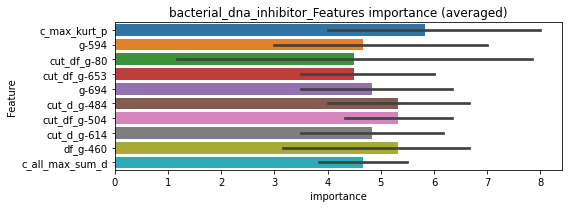

len(train_index) : 3812
len(valid_index) : 3812
================================= fold 1/2 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0451651	valid_1's binary_logloss: 0.0859279
[200]	training's binary_logloss: 0.0143975	valid_1's binary_logloss: 0.0669032
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.00748111	valid_1's binary_logloss: 0.0652117


len(train_index) : 3812
len(valid_index) : 3812
================================= fold 2/2 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0461244	valid_1's binary_logloss: 0.0862145
[200]	training's binary_logloss: 0.0138885	valid_1's binary_logloss: 0.0664915
Early stopping, best iteration is:
[230]	training's binary_logloss: 0.0101245	valid_1's binary_logloss: 0.0649666


bacterial_dna_inhibitor logloss: 0.06508913504442314


neg labels: 3289 → selected neg labels: 3285


bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3285, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00692808	valid_1's binary_logloss: 0.0213725
[200]	training's binary_logloss: 0.000880792	valid_1's binary_logloss: 0.014425
Early stopping, best iteration is:
[217]	training's binary_logloss: 0.000732146	valid_1's binary_logloss: 0.0142578
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00812291	valid_1's binary_logloss: 0.0101659
[200]	training's binary_logloss: 0.00106861	valid_1's binary_logloss: 0.00218543
[300]	training's binary_logloss: 0.000497649	valid_1's binary_logloss: 0.00147555
[400]	training's binary_logloss: 0.000419524	valid_1's binary_logloss: 0.00138425
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000414751	valid_1's binary_logloss: 0.00138356


1 / 3 AUC score:1.000
y_Threshold: 0.0017828, Threshold: 0.0036295, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00080
Num_p_label: 80.0, conf_0:0.00327, conf_1:0.00399
Num_p_label: 80.0, Expected: 3.2, Adj_threshold_1: 0.0036295
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_2: 0.0136295
threshold: 0.0136295, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00642805	valid_1's binary_logloss: 0.0208022
[200]	training's binary_logloss: 0.000815529	valid_1's binary_logloss: 0.014205
Early stopping, best iteration is:
[207]	training's binary_logloss: 0.000753845	valid_1's binary_logloss: 0.0139646
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00789148	valid_1's binary_logloss: 0.0095052
[200]	training's binary_logloss: 0.00102851	valid_1's binary_logloss: 0.00169759
[300]	training's binary_logloss: 0.000491924	valid_1's binary_logloss: 0.00102938
[400]	training's binary_logloss: 0.000416771	valid_1's binary_logloss: 0.000944552
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00039376	valid_1's binary_logloss: 0.000911839


2 / 3 AUC score:1.000
y_Threshold: 0.0524423, Threshold: 0.0136295, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0472125 Vs.target_rate: 0.00080
Num_p_label: 188.0, conf_0:0.01227, conf_1:0.01499
Num_p_label: 188.0, Expected: 3.2, Adj_threshold_1: 0.0136295
Num_p_label: 125.0, Expected: 3.2, Adj_threshold_2: 0.0236295
Num_p_label: 86.0, Expected: 3.2, Adj_threshold_3: 0.0336295
Num_p_label: 64.0, Expected: 3.2, Adj_threshold_4: 0.0436295
Num_p_label: 46.0, Expected: 3.2, Adj_threshold_5: 0.0536295
Num_p_label: 29.0, Expected: 3.2, Adj_threshold_6: 0.0636295
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_7: 0.0736295
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_8: 0.0836295
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_9: 0.0936295
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_10: 0.1036295
threshold: 0.1036295, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00687563	valid_1's binary_logloss: 0.0143491
[200]	training's binary_logloss: 0.000898589	valid_1's binary_logloss: 0.00698268
Early stopping, best iteration is:
[208]	training's binary_logloss: 0.00082205	valid_1's binary_logloss: 0.00681777
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0072024	valid_1's binary_logloss: 0.0134315
[200]	training's binary_logloss: 0.000907122	valid_1's binary_logloss: 0.0049708
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.000480163	valid_1's binary_logloss: 0.00425211


3 / 3 AUC score:1.000
y_Threshold: 0.0401539, Threshold: 0.1036295, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0022602 Vs.target_rate: 0.00080
Num_p_label: 9.0, conf_0:0.09327, conf_1:0.11399
threshold: 0.1036295, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 664.0/7788, y_label_rate: 0.0852594


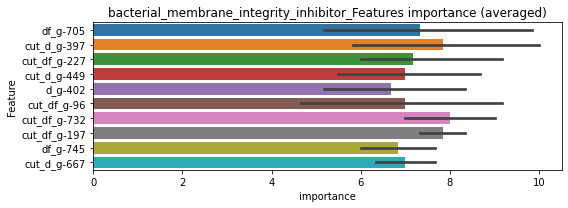

len(train_index) : 3894
len(valid_index) : 3894
================================= fold 1/2 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0148247	valid_1's binary_logloss: 0.0269989
[200]	training's binary_logloss: 0.00219518	valid_1's binary_logloss: 0.0143253
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.000875112	valid_1's binary_logloss: 0.0129892


len(train_index) : 3894
len(valid_index) : 3894
================================= fold 2/2 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0160306	valid_1's binary_logloss: 0.0214151
[200]	training's binary_logloss: 0.00265375	valid_1's binary_logloss: 0.00752905
[300]	training's binary_logloss: 0.000826695	valid_1's binary_logloss: 0.00553805
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000463076	valid_1's binary_logloss: 0.00510345


bacterial_membrane_integrity_inhibitor logloss: 0.009046324151462655


neg labels: 3289 → selected neg labels: 3283


bcl_inhibitor, len(trt): 31, len(othr): 3283, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00989647	valid_1's binary_logloss: 0.0279556
[200]	training's binary_logloss: 0.00139968	valid_1's binary_logloss: 0.0170571
[300]	training's binary_logloss: 0.000621024	valid_1's binary_logloss: 0.0160052
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.000573006	valid_1's binary_logloss: 0.015891
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0104057	valid_1's binary_logloss: 0.024042
[200]	training's binary_logloss: 0.00146677	valid_1's binary_logloss: 0.0137252
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000676454	valid_1's binary_logloss: 0.0121653


1 / 3 AUC score:1.000
y_Threshold: 0.0021453, Threshold: 0.0684222, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00130
Num_p_label: 80.0, conf_0:0.06158, conf_1:0.07526
Num_p_label: 80.0, Expected: 5.2, Adj_threshold_1: 0.0684222
Num_p_label: 76.0, Expected: 5.2, Adj_threshold_2: 0.0784222
Num_p_label: 70.0, Expected: 5.2, Adj_threshold_3: 0.0884222
Num_p_label: 69.0, Expected: 5.2, Adj_threshold_4: 0.0984222
Num_p_label: 67.0, Expected: 5.2, Adj_threshold_5: 0.1084222
Num_p_label: 66.0, Expected: 5.2, Adj_threshold_6: 0.1184222
Num_p_label: 60.0, Expected: 5.2, Adj_threshold_7: 0.1284222
Num_p_label: 57.0, Expected: 5.2, Adj_threshold_8: 0.1384222
Num_p_label: 53.0, Expected: 5.2, Adj_threshold_9: 0.1484222
Num_p_label: 50.0, Expected: 5.2, Adj_threshold_10: 0.1584222
threshold: 0.1684222, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00936003	valid_1's binary_logloss: 0.0257518
[200]	training's binary_logloss: 0.00127064	valid_1's binary_logloss: 0.0161588
Early stopping, best iteration is:
[225]	training's binary_logloss: 0.000948019	valid_1's binary_logloss: 0.0156042
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00997461	valid_1's binary_logloss: 0.0203051
[200]	training's binary_logloss: 0.00134472	valid_1's binary_logloss: 0.0100138
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.000846083	valid_1's binary_logloss: 0.00892496


2 / 3 AUC score:1.000
y_Threshold: 0.0503121, Threshold: 0.1684222, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0401808 Vs.target_rate: 0.00130
Num_p_label: 160.0, conf_0:0.15158, conf_1:0.18526
Num_p_label: 160.0, Expected: 5.2, Adj_threshold_1: 0.1684222
Num_p_label: 154.0, Expected: 5.2, Adj_threshold_2: 0.1784222
Num_p_label: 153.0, Expected: 5.2, Adj_threshold_3: 0.1884222
Num_p_label: 151.0, Expected: 5.2, Adj_threshold_4: 0.1984222
Num_p_label: 148.0, Expected: 5.2, Adj_threshold_5: 0.2084222
Num_p_label: 145.0, Expected: 5.2, Adj_threshold_6: 0.2184222
Num_p_label: 143.0, Expected: 5.2, Adj_threshold_7: 0.2284222
Num_p_label: 140.0, Expected: 5.2, Adj_threshold_8: 0.2384222
Num_p_label: 140.0, Expected: 5.2, Adj_threshold_9: 0.2484222
Num_p_label: 137.0, Expected: 5.2, Adj_threshold_10: 0.2584222
threshold: 0.2684222, positive_p_label: 133.0/3982, p_label_rate: 0.0334003
positive_y_label: 653.0/3801, y_label_rate: 0.17179

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00886298	valid_1's binary_logloss: 0.020699
[200]	training's binary_logloss: 0.00120239	valid_1's binary_logloss: 0.0109893
[300]	training's binary_logloss: 0.000540276	valid_1's binary_logloss: 0.0099181
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.000539299	valid_1's binary_logloss: 0.00991394
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00959158	valid_1's binary_logloss: 0.0195896
[200]	training's binary_logloss: 0.00125786	valid_1's binary_logloss: 0.00888639
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000602385	valid_1's binary_logloss: 0.0076384


3 / 3 AUC score:1.000
y_Threshold: 0.0509973, Threshold: 0.2684222, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0339026 Vs.target_rate: 0.00130
Num_p_label: 135.0, conf_0:0.24158, conf_1:0.29526
Num_p_label: 135.0, Expected: 5.2, Adj_threshold_1: 0.2684222
Num_p_label: 133.0, Expected: 5.2, Adj_threshold_2: 0.2784222
Num_p_label: 133.0, Expected: 5.2, Adj_threshold_3: 0.2884222
Num_p_label: 132.0, Expected: 5.2, Adj_threshold_4: 0.2984222
Num_p_label: 130.0, Expected: 5.2, Adj_threshold_5: 0.3084222
Num_p_label: 126.0, Expected: 5.2, Adj_threshold_6: 0.3184222
Num_p_label: 124.0, Expected: 5.2, Adj_threshold_7: 0.3284222
Num_p_label: 124.0, Expected: 5.2, Adj_threshold_8: 0.3384222
Num_p_label: 123.0, Expected: 5.2, Adj_threshold_9: 0.3484222
Num_p_label: 121.0, Expected: 5.2, Adj_threshold_10: 0.3584222
threshold: 0.3684222, positive_p_label: 119.0/3982, p_label_rate: 0.0298845
positive_y_label: 771.0/7781, y_label_rate: 0.09908

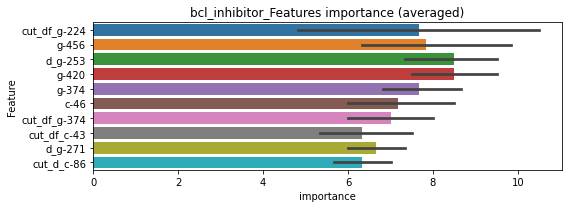

len(train_index) : 3890
len(valid_index) : 3891
================================= fold 1/2 bcl_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.020547	valid_1's binary_logloss: 0.0296735
[200]	training's binary_logloss: 0.00379616	valid_1's binary_logloss: 0.0120924
[300]	training's binary_logloss: 0.00122179	valid_1's binary_logloss: 0.00872377
[400]	training's binary_logloss: 0.000596676	valid_1's binary_logloss: 0.00787229
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00048385	valid_1's binary_logloss: 0.00758229


len(train_index) : 3891
len(valid_index) : 3890
================================= fold 2/2 bcl_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0197037	valid_1's binary_logloss: 0.0295463
[200]	training's binary_logloss: 0.00338745	valid_1's binary_logloss: 0.0133998
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.00129106	valid_1's binary_logloss: 0.0110654


bcl_inhibitor logloss: 0.00932360792149087


neg labels: 3289 → selected neg labels: 3283


bcr-abl_inhibitor, len(trt): 38, len(othr): 3283, target_rate: 0.0015957 → Adj_target_rate: 0.0018493
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0113009	valid_1's binary_logloss: 0.0317249
[200]	training's binary_logloss: 0.00165706	valid_1's binary_logloss: 0.0195816
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.000987582	valid_1's binary_logloss: 0.0185985
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0114326	valid_1's binary_logloss: 0.0263726
[200]	training's binary_logloss: 0.00171538	valid_1's binary_logloss: 0.0160626
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.00103417	valid_1's binary_logloss: 0.0152791


1 / 3 AUC score:1.000
y_Threshold: 0.0040933, Threshold: 0.0059338, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00160
Num_p_label: 80.0, conf_0:0.00534, conf_1:0.00653
Num_p_label: 80.0, Expected: 6.4, Adj_threshold_1: 0.0059338
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_2: 0.0159338
Num_p_label: 11.0, Expected: 6.4, Adj_threshold_3: 0.0259338
threshold: 0.0259338, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0114636	valid_1's binary_logloss: 0.0298759
[200]	training's binary_logloss: 0.00165084	valid_1's binary_logloss: 0.0174972
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.000745584	valid_1's binary_logloss: 0.0156117
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0116239	valid_1's binary_logloss: 0.0270995
[200]	training's binary_logloss: 0.0017037	valid_1's binary_logloss: 0.0168929
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.00106416	valid_1's binary_logloss: 0.0159144


2 / 3 AUC score:1.000
y_Threshold: 0.0268678, Threshold: 0.0259338, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0090407 Vs.target_rate: 0.00160
Num_p_label: 36.0, conf_0:0.02334, conf_1:0.02853
Num_p_label: 36.0, Expected: 6.4, Adj_threshold_1: 0.0259338
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_2: 0.0359338
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_3: 0.0459338
Num_p_label: 20.0, Expected: 6.4, Adj_threshold_4: 0.0559338
Num_p_label: 20.0, Expected: 6.4, Adj_threshold_5: 0.0659338
Num_p_label: 18.0, Expected: 6.4, Adj_threshold_6: 0.0759338
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_7: 0.0859338
Num_p_label: 12.0, Expected: 6.4, Adj_threshold_8: 0.0959338
threshold: 0.0959338, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3801, y_label_rate: 0.1717969
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0106499	valid_1's binary_logloss: 0.0251408
[200]	training's binary_logloss: 0.00152874	valid_1's binary_logloss: 0.0135612
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.000903822	valid_1's binary_logloss: 0.012447
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0110125	valid_1's binary_logloss: 0.0256569
[200]	training's binary_logloss: 0.00163079	valid_1's binary_logloss: 0.0149637
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.000817819	valid_1's binary_logloss: 0.0137538


3 / 3 AUC score:1.000
y_Threshold: 0.0227932, Threshold: 0.0959338, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0035158 Vs.target_rate: 0.00160
Num_p_label: 14.0, conf_0:0.08634, conf_1:0.10553
threshold: 0.0959338, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 664.0/7777, y_label_rate: 0.0853800


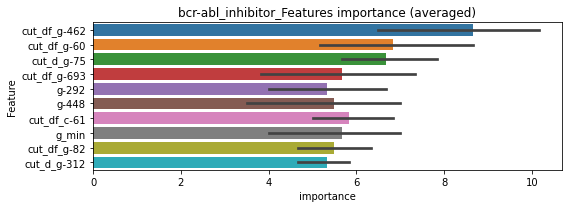

len(train_index) : 3888
len(valid_index) : 3889
================================= fold 1/2 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174013	valid_1's binary_logloss: 0.0314073
[200]	training's binary_logloss: 0.00305363	valid_1's binary_logloss: 0.0155432
[300]	training's binary_logloss: 0.000986071	valid_1's binary_logloss: 0.0125002
[400]	training's binary_logloss: 0.000503049	valid_1's binary_logloss: 0.0115679
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000531117	valid_1's binary_logloss: 0.0115645


len(train_index) : 3889
len(valid_index) : 3888
================================= fold 2/2 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0175958	valid_1's binary_logloss: 0.0292141
[200]	training's binary_logloss: 0.00316083	valid_1's binary_logloss: 0.0131206
[300]	training's binary_logloss: 0.00103711	valid_1's binary_logloss: 0.00991279
[400]	training's binary_logloss: 0.000537118	valid_1's binary_logloss: 0.00917009
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000491506	valid_1's binary_logloss: 0.00909641


bcr-abl_inhibitor logloss: 0.010330600641119384


neg labels: 3289 → selected neg labels: 3277


benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3277, target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0218703	valid_1's binary_logloss: 0.0748848
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00458612	valid_1's binary_logloss: 0.0640011
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0238492	valid_1's binary_logloss: 0.0629115
[200]	training's binary_logloss: 0.00421583	valid_1's binary_logloss: 0.0488764
Early stopping, best iteration is:
[203]	training's binary_logloss: 0.00404469	valid_1's binary_logloss: 0.0488129


1 / 3 AUC score:0.999
y_Threshold: 0.0116442, Threshold: 0.0119261, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 140 → Positive_corect_labels: 651/3792
p_label_rate: 0.0200904 Vs.target_rate: 0.00281
Num_p_label: 80.0, conf_0:0.01073, conf_1:0.01312
Num_p_label: 80.0, Expected: 11.2, Adj_threshold_1: 0.0119261
Num_p_label: 5.0, Expected: 11.2, Adj_threshold_2: 0.0219261
threshold: 0.0219261, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 651.0/3792, y_label_rate: 0.1716772
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204997	valid_1's binary_logloss: 0.0762933
Early stopping, best iteration is:
[162]	training's binary_logloss: 0.00612739	valid_1's binary_logloss: 0.0682507
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0241495	valid_1's binary_logloss: 0.0579535
[200]	training's binary_logloss: 0.0042899	valid_1's binary_logloss: 0.0425028
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00464709	valid_1's binary_logloss: 0.042266


2 / 3 AUC score:0.999
y_Threshold: 0.0264968, Threshold: 0.0219261, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 642.0/3774
p_label_rate: 0.0065294 Vs.target_rate: 0.00281
Num_p_label: 26.0, conf_0:0.01973, conf_1:0.02412
threshold: 0.0219261, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 642.0/3774, y_label_rate: 0.1701113
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0195434	valid_1's binary_logloss: 0.0700054
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.00471889	valid_1's binary_logloss: 0.0613796
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0221507	valid_1's binary_logloss: 0.0518159
[200]	training's binary_logloss: 0.00394639	valid_1's binary_logloss: 0.036774
Early stopping, best iteration is:
[195]	training's binary_logloss: 0.00419715	valid_1's binary_logloss: 0.0365881


3 / 3 AUC score:0.999
y_Threshold: 0.0228473, Threshold: 0.0219261, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 636.0/3762
p_label_rate: 0.0022602 Vs.target_rate: 0.00281
Num_p_label: 9.0, conf_0:0.01973, conf_1:0.02412
threshold: 0.0219261, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 645.0/7744, y_label_rate: 0.0832903


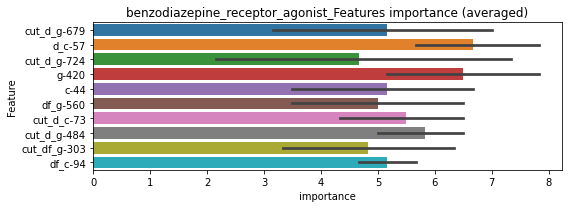

len(train_index) : 3872
len(valid_index) : 3872
================================= fold 1/2 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0261892	valid_1's binary_logloss: 0.0560241
[200]	training's binary_logloss: 0.00614369	valid_1's binary_logloss: 0.0395801
[300]	training's binary_logloss: 0.00211231	valid_1's binary_logloss: 0.0374763
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00182649	valid_1's binary_logloss: 0.0372842


len(train_index) : 3872
len(valid_index) : 3872
================================= fold 2/2 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0301521	valid_1's binary_logloss: 0.0512371
[200]	training's binary_logloss: 0.00745953	valid_1's binary_logloss: 0.0306585
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.00282752	valid_1's binary_logloss: 0.0265127


benzodiazepine_receptor_agonist logloss: 0.031898476206763615


neg labels: 3289 → selected neg labels: 3285


beta_amyloid_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00855784	valid_1's binary_logloss: 0.0298112
[200]	training's binary_logloss: 0.00117433	valid_1's binary_logloss: 0.0239372
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.000669963	valid_1's binary_logloss: 0.023299
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0108078	valid_1's binary_logloss: 0.0218276
[200]	training's binary_logloss: 0.00147683	valid_1's binary_logloss: 0.0124426
Early stopping, best iteration is:
[201]	training's binary_logloss: 0.00145911	valid_1's binary_logloss: 0.0123852


1 / 3 AUC score:1.000
y_Threshold: 0.0024409, Threshold: 0.0021821, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.00196, conf_1:0.00240
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0021821
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_2: 0.0121821
threshold: 0.0121821, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00906076	valid_1's binary_logloss: 0.0292969
Early stopping, best iteration is:
[162]	training's binary_logloss: 0.0021194	valid_1's binary_logloss: 0.0241742
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0108627	valid_1's binary_logloss: 0.0216865
[200]	training's binary_logloss: 0.00152664	valid_1's binary_logloss: 0.0119261
Early stopping, best iteration is:
[203]	training's binary_logloss: 0.00147155	valid_1's binary_logloss: 0.0118232


2 / 3 AUC score:1.000
y_Threshold: 0.0071812, Threshold: 0.0121821, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00101
Num_p_label: 0.0, conf_0:0.01096, conf_1:0.01340
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_1: 0.0121821
Num_p_label: 580.0, Expected: 4.0, Adj_threshold_2: 0.0021821
threshold: 0.0021821, positive_p_label: 580.0/3982, p_label_rate: 0.1456554
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00906076	valid_1's binary_logloss: 0.0292969
Early stopping, best iteration is:
[162]	training's binary_logloss: 0.0021194	valid_1's binary_logloss: 0.0241742
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0108627	valid_1's binary_logloss: 0.0216865
[200]	training's binary_logloss: 0.00152664	valid_1's binary_logloss: 0.0119261
Early stopping, best iteration is:
[203]	training's binary_logloss: 0.00147155	valid_1's binary_logloss: 0.0118232


3 / 3 AUC score:1.000
y_Threshold: 0.0071812, Threshold: 0.0021821, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.1456554 Vs.target_rate: 0.00101
Num_p_label: 580.0, conf_0:0.00196, conf_1:0.00240
Num_p_label: 580.0, Expected: 4.0, Adj_threshold_1: 0.0021821
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_2: 0.0121821
threshold: 0.0121821, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7792, y_label_rate: 0.0843172


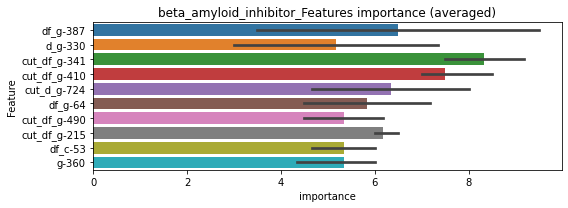

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0149155	valid_1's binary_logloss: 0.027093
[200]	training's binary_logloss: 0.00229414	valid_1's binary_logloss: 0.0154666
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.000881297	valid_1's binary_logloss: 0.0144615


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0173861	valid_1's binary_logloss: 0.0240373
[200]	training's binary_logloss: 0.00306265	valid_1's binary_logloss: 0.00916711
[300]	training's binary_logloss: 0.000956279	valid_1's binary_logloss: 0.00686223
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.000613777	valid_1's binary_logloss: 0.00631185


beta_amyloid_inhibitor logloss: 0.010386670527908997


neg labels: 3289 → selected neg labels: 3276


bromodomain_inhibitor, len(trt): 68, len(othr): 3276, target_rate: 0.0028555 → Adj_target_rate: 0.0030327
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0152359	valid_1's binary_logloss: 0.04643
[200]	training's binary_logloss: 0.00244305	valid_1's binary_logloss: 0.0344546
Early stopping, best iteration is:
[198]	training's binary_logloss: 0.00251285	valid_1's binary_logloss: 0.0343803
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0149357	valid_1's binary_logloss: 0.0447346
[200]	training's binary_logloss: 0.00242101	valid_1's binary_logloss: 0.0321576
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.00128286	valid_1's binary_logloss: 0.0309277


1 / 3 AUC score:0.999
y_Threshold: 0.0050760, Threshold: 0.0063155, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 653/3795
p_label_rate: 0.0200904 Vs.target_rate: 0.00286
Num_p_label: 80.0, conf_0:0.00568, conf_1:0.00695
Num_p_label: 80.0, Expected: 11.4, Adj_threshold_1: 0.0063155
Num_p_label: 14.0, Expected: 11.4, Adj_threshold_2: 0.0163155
threshold: 0.0163155, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0135318	valid_1's binary_logloss: 0.044797
[200]	training's binary_logloss: 0.00211319	valid_1's binary_logloss: 0.0326069
Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00128426	valid_1's binary_logloss: 0.031682
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0145523	valid_1's binary_logloss: 0.0387119
[200]	training's binary_logloss: 0.00230167	valid_1's binary_logloss: 0.0262204
Early stopping, best iteration is:
[228]	training's binary_logloss: 0.00166631	valid_1's binary_logloss: 0.0250548


2 / 3 AUC score:1.000
y_Threshold: 0.0159247, Threshold: 0.0163155, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 652.0/3793
p_label_rate: 0.0065294 Vs.target_rate: 0.00286
Num_p_label: 26.0, conf_0:0.01468, conf_1:0.01795
threshold: 0.0163155, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0136943	valid_1's binary_logloss: 0.0476825
[200]	training's binary_logloss: 0.00204986	valid_1's binary_logloss: 0.0324758
Early stopping, best iteration is:
[209]	training's binary_logloss: 0.00184128	valid_1's binary_logloss: 0.032074
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.014457	valid_1's binary_logloss: 0.0435835
[200]	training's binary_logloss: 0.00221874	valid_1's binary_logloss: 0.0291005
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.0013301	valid_1's binary_logloss: 0.0277587


3 / 3 AUC score:1.000
y_Threshold: 0.0165747, Threshold: 0.0163155, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 649.0/3787
p_label_rate: 0.0072828 Vs.target_rate: 0.00286
Num_p_label: 29.0, conf_0:0.01468, conf_1:0.01795
threshold: 0.0163155, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 678.0/7769, y_label_rate: 0.0872699


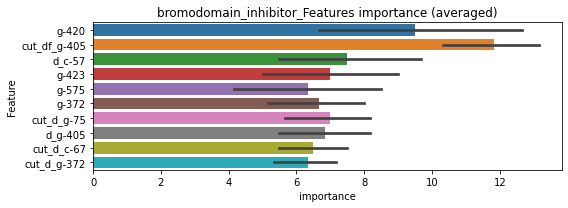

len(train_index) : 3884
len(valid_index) : 3885
================================= fold 1/2 bromodomain_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0232577	valid_1's binary_logloss: 0.0455979
[200]	training's binary_logloss: 0.00474301	valid_1's binary_logloss: 0.0279829
[300]	training's binary_logloss: 0.00159182	valid_1's binary_logloss: 0.0252765
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00124494	valid_1's binary_logloss: 0.0248487


len(train_index) : 3885
len(valid_index) : 3884
================================= fold 2/2 bromodomain_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0240897	valid_1's binary_logloss: 0.0444329
[200]	training's binary_logloss: 0.00507411	valid_1's binary_logloss: 0.0276302
[300]	training's binary_logloss: 0.0017308	valid_1's binary_logloss: 0.0247529
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00109478	valid_1's binary_logloss: 0.0240777


bromodomain_inhibitor logloss: 0.024463200602323893


neg labels: 3289 → selected neg labels: 3284


btk_inhibitor, len(trt): 29, len(othr): 3284, target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0100401	valid_1's binary_logloss: 0.0272483
[200]	training's binary_logloss: 0.00139854	valid_1's binary_logloss: 0.0167436
Early stopping, best iteration is:
[222]	training's binary_logloss: 0.00107763	valid_1's binary_logloss: 0.0161484
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0100341	valid_1's binary_logloss: 0.0256436
[200]	training's binary_logloss: 0.00141988	valid_1's binary_logloss: 0.0160075
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.00088161	valid_1's binary_logloss: 0.0151769


1 / 3 AUC score:1.000
y_Threshold: 0.0022719, Threshold: 0.0025898, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00122
Num_p_label: 80.0, conf_0:0.00233, conf_1:0.00285
Num_p_label: 80.0, Expected: 4.8, Adj_threshold_1: 0.0025898
Num_p_label: 0.0, Expected: 4.8, Adj_threshold_2: 0.0125898
threshold: 0.0125898, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0099062	valid_1's binary_logloss: 0.0275993
[200]	training's binary_logloss: 0.00139715	valid_1's binary_logloss: 0.0169296
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.00089725	valid_1's binary_logloss: 0.0160842
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0102206	valid_1's binary_logloss: 0.0257232
[200]	training's binary_logloss: 0.00144231	valid_1's binary_logloss: 0.0162783
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.000842321	valid_1's binary_logloss: 0.0152391


2 / 3 AUC score:1.000
y_Threshold: 0.0070771, Threshold: 0.0125898, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0002511 Vs.target_rate: 0.00122
Num_p_label: 1.0, conf_0:0.01133, conf_1:0.01385
Num_p_label: 1.0, Expected: 4.8, Adj_threshold_1: 0.0125898
Num_p_label: 110.0, Expected: 4.8, Adj_threshold_2: 0.0025898
threshold: 0.0025898, positive_p_label: 110.0/3982, p_label_rate: 0.0276243
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00952334	valid_1's binary_logloss: 0.026381
[200]	training's binary_logloss: 0.00135051	valid_1's binary_logloss: 0.0174908
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.000891617	valid_1's binary_logloss: 0.0169279
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00980577	valid_1's binary_logloss: 0.0243276
[200]	training's binary_logloss: 0.00142543	valid_1's binary_logloss: 0.0138481
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.000860119	valid_1's binary_logloss: 0.0128056


3 / 3 AUC score:1.000
y_Threshold: 0.0083392, Threshold: 0.0025898, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0288800 Vs.target_rate: 0.00122
Num_p_label: 115.0, conf_0:0.00233, conf_1:0.00285
Num_p_label: 115.0, Expected: 4.8, Adj_threshold_1: 0.0025898
Num_p_label: 3.0, Expected: 4.8, Adj_threshold_2: 0.0125898
threshold: 0.0125898, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 658.0/7788, y_label_rate: 0.0844890


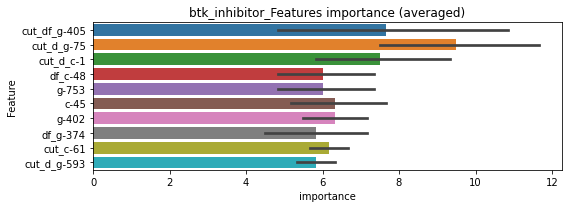

len(train_index) : 3894
len(valid_index) : 3894
================================= fold 1/2 btk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0167481	valid_1's binary_logloss: 0.030562
[200]	training's binary_logloss: 0.00272511	valid_1's binary_logloss: 0.0175486
[300]	training's binary_logloss: 0.00084704	valid_1's binary_logloss: 0.0159018
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.000544966	valid_1's binary_logloss: 0.01565


len(train_index) : 3894
len(valid_index) : 3894
================================= fold 2/2 btk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0186865	valid_1's binary_logloss: 0.0285303
[200]	training's binary_logloss: 0.00317993	valid_1's binary_logloss: 0.0123486
[300]	training's binary_logloss: 0.000976226	valid_1's binary_logloss: 0.0095951
[400]	training's binary_logloss: 0.000474747	valid_1's binary_logloss: 0.00882614
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000486431	valid_1's binary_logloss: 0.00881502


btk_inhibitor logloss: 0.012232518492973342


neg labels: 3289 → selected neg labels: 3287


calcineurin_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00496263	valid_1's binary_logloss: 0.0131224
[200]	training's binary_logloss: 0.000552316	valid_1's binary_logloss: 0.00796132
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.000400438	valid_1's binary_logloss: 0.00765566
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0054348	valid_1's binary_logloss: 0.0077029
[200]	training's binary_logloss: 0.00064178	valid_1's binary_logloss: 0.00227778
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.000451829	valid_1's binary_logloss: 0.00205755


1 / 3 AUC score:1.000
y_Threshold: 0.0009294, Threshold: 0.0013193, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00119, conf_1:0.00145
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0013193
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0113193
threshold: 0.0113193, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00505067	valid_1's binary_logloss: 0.0121525
[200]	training's binary_logloss: 0.000568454	valid_1's binary_logloss: 0.00701404
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.000414951	valid_1's binary_logloss: 0.00663342
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00546093	valid_1's binary_logloss: 0.00754695
[200]	training's binary_logloss: 0.000643884	valid_1's binary_logloss: 0.00232407
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.000416464	valid_1's binary_logloss: 0.00205446


2 / 3 AUC score:1.000
y_Threshold: 0.0057595, Threshold: 0.0113193, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, conf_0:0.01019, conf_1:0.01245
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0113193
Num_p_label: 169.0, Expected: 2.0, Adj_threshold_2: 0.0013193
threshold: 0.0013193, positive_p_label: 169.0/3982, p_label_rate: 0.0424410
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00505067	valid_1's binary_logloss: 0.0121525
[200]	training's binary_logloss: 0.000568454	valid_1's binary_logloss: 0.00701404
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.000414951	valid_1's binary_logloss: 0.00663342
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00546093	valid_1's binary_logloss: 0.00754695
[200]	training's binary_logloss: 0.000643884	valid_1's binary_logloss: 0.00232407
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.000416464	valid_1's binary_logloss: 0.00205446


3 / 3 AUC score:1.000
y_Threshold: 0.0057595, Threshold: 0.0013193, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0424410 Vs.target_rate: 0.00050
Num_p_label: 169.0, conf_0:0.00119, conf_1:0.00145
Num_p_label: 169.0, Expected: 2.0, Adj_threshold_1: 0.0013193
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0113193
threshold: 0.0113193, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7794, y_label_rate: 0.0842956


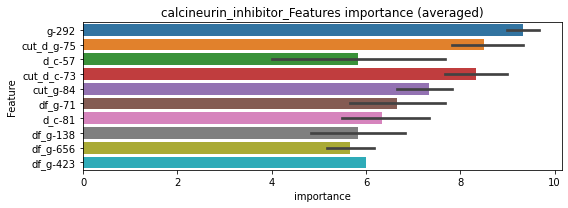

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 calcineurin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0114693	valid_1's binary_logloss: 0.0168458
[200]	training's binary_logloss: 0.00129938	valid_1's binary_logloss: 0.00599232
[300]	training's binary_logloss: 0.000368605	valid_1's binary_logloss: 0.00499486
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000206547	valid_1's binary_logloss: 0.00473279


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 calcineurin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.012018	valid_1's binary_logloss: 0.0142497
[200]	training's binary_logloss: 0.00144314	valid_1's binary_logloss: 0.00330621
[300]	training's binary_logloss: 0.000410508	valid_1's binary_logloss: 0.00208902
[400]	training's binary_logloss: 0.000218396	valid_1's binary_logloss: 0.00177145
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.00020184	valid_1's binary_logloss: 0.00173325


calcineurin_inhibitor logloss: 0.003233020168391646


neg labels: 3289 → selected neg labels: 3243


calcium_channel_blocker, len(trt): 281, len(othr): 3243, target_rate: 0.0117998 → Adj_target_rate: 0.0101297
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0795216	valid_1's binary_logloss: 0.264179
Early stopping, best iteration is:
[127]	training's binary_logloss: 0.0550357	valid_1's binary_logloss: 0.261723
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.081064	valid_1's binary_logloss: 0.248015
Early stopping, best iteration is:
[128]	training's binary_logloss: 0.0561858	valid_1's binary_logloss: 0.243026


1 / 3 AUC score:0.877
y_Threshold: 0.0857449, Threshold: 0.1021152, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 467 → Positive_corect_labels: 480/3424
p_label_rate: 0.0200904 Vs.target_rate: 0.01180
Num_p_label: 80.0, conf_0:0.09190, conf_1:0.11233
threshold: 0.1021152, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 480.0/3424, y_label_rate: 0.1401869
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.041464	valid_1's binary_logloss: 0.148829
Early stopping, best iteration is:
[159]	training's binary_logloss: 0.0167521	valid_1's binary_logloss: 0.14244
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0425554	valid_1's binary_logloss: 0.155586
Early stopping, best iteration is:
[133]	training's binary_logloss: 0.0245062	valid_1's binary_logloss: 0.149741


2 / 3 AUC score:0.965
y_Threshold: 0.0493138, Threshold: 0.1021152, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 414.0/3292
p_label_rate: 0.0000000 Vs.target_rate: 0.01180
Num_p_label: 0.0, conf_0:0.09190, conf_1:0.11233
Num_p_label: 0.0, Expected: 47.0, Adj_threshold_1: 0.1021152
Num_p_label: 1.0, Expected: 47.0, Adj_threshold_2: 0.0921152
Num_p_label: 4.0, Expected: 47.0, Adj_threshold_3: 0.0821152
Num_p_label: 7.0, Expected: 47.0, Adj_threshold_4: 0.0721152
Num_p_label: 13.0, Expected: 47.0, Adj_threshold_5: 0.0621152
Num_p_label: 44.0, Expected: 47.0, Adj_threshold_6: 0.0521152
threshold: 0.0521152, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 414.0/3292, y_label_rate: 0.1257594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0249347	valid_1's binary_logloss: 0.0937066
Early stopping, best iteration is:
[181]	training's binary_logloss: 0.00639151	valid_1's binary_logloss: 0.0822942
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0266136	valid_1's binary_logloss: 0.0945104
Early stopping, best iteration is:
[187]	training's binary_logloss: 0.00637362	valid_1's binary_logloss: 0.0831891


3 / 3 AUC score:0.995
y_Threshold: 0.0212472, Threshold: 0.0521152, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 44 → Positive_corect_labels: 392.0/3248
p_label_rate: 0.0000000 Vs.target_rate: 0.01180
Num_p_label: 0.0, conf_0:0.04690, conf_1:0.05733
Num_p_label: 0.0, Expected: 47.0, Adj_threshold_1: 0.0521152
Num_p_label: 1.0, Expected: 47.0, Adj_threshold_2: 0.0421152
Num_p_label: 3.0, Expected: 47.0, Adj_threshold_3: 0.0321152
Num_p_label: 28.0, Expected: 47.0, Adj_threshold_4: 0.0221152
threshold: 0.0221152, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 420.0/7230, y_label_rate: 0.0580913


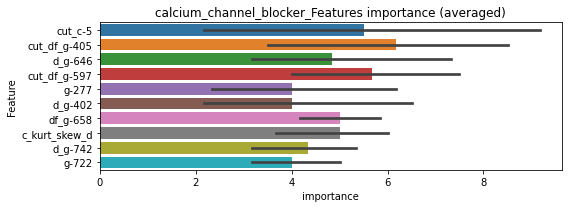

len(train_index) : 3615
len(valid_index) : 3615
================================= fold 1/2 calcium_channel_blocker=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0294319	valid_1's binary_logloss: 0.0673024
[200]	training's binary_logloss: 0.00832714	valid_1's binary_logloss: 0.0534248
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.00347606	valid_1's binary_logloss: 0.0511257


len(train_index) : 3615
len(valid_index) : 3615
================================= fold 2/2 calcium_channel_blocker=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0312836	valid_1's binary_logloss: 0.06842
[200]	training's binary_logloss: 0.00919854	valid_1's binary_logloss: 0.0536605
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.00426527	valid_1's binary_logloss: 0.0514616


calcium_channel_blocker logloss: 0.05129366962013853


neg labels: 3289 → selected neg labels: 3282


cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3282, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0135173	valid_1's binary_logloss: 0.0516645
Early stopping, best iteration is:
[154]	training's binary_logloss: 0.00409084	valid_1's binary_logloss: 0.0453421
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159717	valid_1's binary_logloss: 0.0361009
[200]	training's binary_logloss: 0.00263306	valid_1's binary_logloss: 0.0239954
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00165151	valid_1's binary_logloss: 0.0232397


1 / 3 AUC score:1.000
y_Threshold: 0.0067589, Threshold: 0.0068834, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 654/3802
p_label_rate: 0.0200904 Vs.target_rate: 0.00176
Num_p_label: 80.0, conf_0:0.00620, conf_1:0.00757
Num_p_label: 80.0, Expected: 7.0, Adj_threshold_1: 0.0068834
Num_p_label: 0.0, Expected: 7.0, Adj_threshold_2: 0.0168834
threshold: 0.0168834, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0150129	valid_1's binary_logloss: 0.0458577
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00262946	valid_1's binary_logloss: 0.0341087
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159348	valid_1's binary_logloss: 0.0400876
[200]	training's binary_logloss: 0.00254044	valid_1's binary_logloss: 0.0265089
Early stopping, best iteration is:
[203]	training's binary_logloss: 0.00244763	valid_1's binary_logloss: 0.026269


2 / 3 AUC score:1.000
y_Threshold: 0.0186695, Threshold: 0.0168834, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0020090 Vs.target_rate: 0.00176
Num_p_label: 8.0, conf_0:0.01520, conf_1:0.01857
threshold: 0.0168834, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 651.0/3796, y_label_rate: 0.1714963
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0131358	valid_1's binary_logloss: 0.0460104
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.00294541	valid_1's binary_logloss: 0.0373597
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0156403	valid_1's binary_logloss: 0.0333878
[200]	training's binary_logloss: 0.00243736	valid_1's binary_logloss: 0.0201118
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.00106031	valid_1's binary_logloss: 0.0183724


3 / 3 AUC score:1.000
y_Threshold: 0.0127963, Threshold: 0.0168834, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 648.0/3790
p_label_rate: 0.0002511 Vs.target_rate: 0.00176
Num_p_label: 1.0, conf_0:0.01520, conf_1:0.01857
Num_p_label: 1.0, Expected: 7.0, Adj_threshold_1: 0.0168834
Num_p_label: 51.0, Expected: 7.0, Adj_threshold_2: 0.0068834
threshold: 0.0068834, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 699.0/7772, y_label_rate: 0.0899382


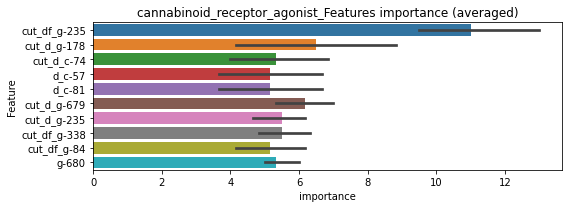

len(train_index) : 3886
len(valid_index) : 3886
================================= fold 1/2 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0313799	valid_1's binary_logloss: 0.0643768
[200]	training's binary_logloss: 0.00767873	valid_1's binary_logloss: 0.0482165
Early stopping, best iteration is:
[217]	training's binary_logloss: 0.00623194	valid_1's binary_logloss: 0.0477163


len(train_index) : 3886
len(valid_index) : 3886
================================= fold 2/2 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0343003	valid_1's binary_logloss: 0.0594331
[200]	training's binary_logloss: 0.00883485	valid_1's binary_logloss: 0.0412997
Early stopping, best iteration is:
[258]	training's binary_logloss: 0.00434802	valid_1's binary_logloss: 0.0398555


cannabinoid_receptor_agonist logloss: 0.04378588116671104


neg labels: 3289 → selected neg labels: 3280


cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3280, target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.018194	valid_1's binary_logloss: 0.0651663
[200]	training's binary_logloss: 0.00292345	valid_1's binary_logloss: 0.0572596
Early stopping, best iteration is:
[211]	training's binary_logloss: 0.00254062	valid_1's binary_logloss: 0.0566432
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0220146	valid_1's binary_logloss: 0.0494425
[200]	training's binary_logloss: 0.00368234	valid_1's binary_logloss: 0.0333111
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00188665	valid_1's binary_logloss: 0.0317391


1 / 3 AUC score:0.999
y_Threshold: 0.0053919, Threshold: 0.0061593, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0200904 Vs.target_rate: 0.00231
Num_p_label: 80.0, conf_0:0.00554, conf_1:0.00678
Num_p_label: 80.0, Expected: 9.2, Adj_threshold_1: 0.0061593
Num_p_label: 1.0, Expected: 9.2, Adj_threshold_2: 0.0161593
threshold: 0.0161593, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0202459	valid_1's binary_logloss: 0.0538961
[200]	training's binary_logloss: 0.00330513	valid_1's binary_logloss: 0.0387208
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00253527	valid_1's binary_logloss: 0.037764
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0192806	valid_1's binary_logloss: 0.0550179
[200]	training's binary_logloss: 0.0031382	valid_1's binary_logloss: 0.0424765
Early stopping, best iteration is:
[222]	training's binary_logloss: 0.0024068	valid_1's binary_logloss: 0.0414334


2 / 3 AUC score:1.000
y_Threshold: 0.0152568, Threshold: 0.0161593, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0002511 Vs.target_rate: 0.00231
Num_p_label: 1.0, conf_0:0.01454, conf_1:0.01778
Num_p_label: 1.0, Expected: 9.2, Adj_threshold_1: 0.0161593
Num_p_label: 155.0, Expected: 9.2, Adj_threshold_2: 0.0061593
threshold: 0.0061593, positive_p_label: 155.0/3982, p_label_rate: 0.0389252
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0182938	valid_1's binary_logloss: 0.0593693
Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00443938	valid_1's binary_logloss: 0.0489073
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0199446	valid_1's binary_logloss: 0.0498231
[200]	training's binary_logloss: 0.00335425	valid_1's binary_logloss: 0.0369131
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00219048	valid_1's binary_logloss: 0.0359694


3 / 3 AUC score:1.000
y_Threshold: 0.0164543, Threshold: 0.0061593, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0652938 Vs.target_rate: 0.00231
Num_p_label: 260.0, conf_0:0.00554, conf_1:0.00678
Num_p_label: 260.0, Expected: 9.2, Adj_threshold_1: 0.0061593
Num_p_label: 3.0, Expected: 9.2, Adj_threshold_2: 0.0161593
threshold: 0.0161593, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 648.0/7764, y_label_rate: 0.0834621


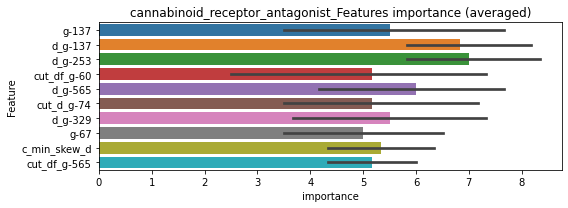

len(train_index) : 3882
len(valid_index) : 3882
================================= fold 1/2 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0239864	valid_1's binary_logloss: 0.0466461
[200]	training's binary_logloss: 0.0051694	valid_1's binary_logloss: 0.0302776
[300]	training's binary_logloss: 0.00171104	valid_1's binary_logloss: 0.0280528
Early stopping, best iteration is:
[303]	training's binary_logloss: 0.00166461	valid_1's binary_logloss: 0.0280331


len(train_index) : 3882
len(valid_index) : 3882
================================= fold 2/2 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0272726	valid_1's binary_logloss: 0.0444245
[200]	training's binary_logloss: 0.00625932	valid_1's binary_logloss: 0.0253712
[300]	training's binary_logloss: 0.00207838	valid_1's binary_logloss: 0.0215386
[400]	training's binary_logloss: 0.000998	valid_1's binary_logloss: 0.0208595
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.00088739	valid_1's binary_logloss: 0.0207519


cannabinoid_receptor_antagonist logloss: 0.024392520088472418


neg labels: 3289 → selected neg labels: 3283


carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0122601	valid_1's binary_logloss: 0.0438995
Early stopping, best iteration is:
[175]	training's binary_logloss: 0.00254066	valid_1's binary_logloss: 0.0364644
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0144396	valid_1's binary_logloss: 0.0305914
[200]	training's binary_logloss: 0.00225883	valid_1's binary_logloss: 0.0185297
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00120533	valid_1's binary_logloss: 0.0169918


1 / 3 AUC score:1.000
y_Threshold: 0.0037975, Threshold: 0.0039058, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00352, conf_1:0.00430
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0039058
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0139058
threshold: 0.0139058, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0122426	valid_1's binary_logloss: 0.0430478
[200]	training's binary_logloss: 0.00187011	valid_1's binary_logloss: 0.0345755
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00207141	valid_1's binary_logloss: 0.0343561
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0153368	valid_1's binary_logloss: 0.0320299
[200]	training's binary_logloss: 0.00234477	valid_1's binary_logloss: 0.018728
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00135512	valid_1's binary_logloss: 0.0174503


2 / 3 AUC score:1.000
y_Threshold: 0.0113186, Threshold: 0.0139058, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0000000 Vs.target_rate: 0.00151
Num_p_label: 0.0, conf_0:0.01252, conf_1:0.01530
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_1: 0.0139058
Num_p_label: 99.0, Expected: 6.0, Adj_threshold_2: 0.0039058
threshold: 0.0039058, positive_p_label: 99.0/3982, p_label_rate: 0.0248619
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0122426	valid_1's binary_logloss: 0.0430478
[200]	training's binary_logloss: 0.00187011	valid_1's binary_logloss: 0.0345755
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00207141	valid_1's binary_logloss: 0.0343561
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0153368	valid_1's binary_logloss: 0.0320299
[200]	training's binary_logloss: 0.00234477	valid_1's binary_logloss: 0.018728
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00135512	valid_1's binary_logloss: 0.0174503


3 / 3 AUC score:1.000
y_Threshold: 0.0113186, Threshold: 0.0039058, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0248619 Vs.target_rate: 0.00151
Num_p_label: 99.0, conf_0:0.00352, conf_1:0.00430
Num_p_label: 99.0, Expected: 6.0, Adj_threshold_1: 0.0039058
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0139058
threshold: 0.0139058, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/7789, y_label_rate: 0.0842213


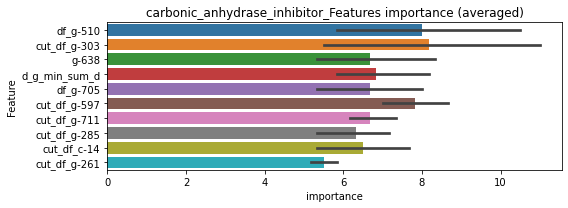

len(train_index) : 3894
len(valid_index) : 3895
================================= fold 1/2 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0192692	valid_1's binary_logloss: 0.037372
[200]	training's binary_logloss: 0.00356759	valid_1's binary_logloss: 0.0233024
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00138408	valid_1's binary_logloss: 0.0216164


len(train_index) : 3895
len(valid_index) : 3894
================================= fold 2/2 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0220289	valid_1's binary_logloss: 0.0315859
[200]	training's binary_logloss: 0.00430268	valid_1's binary_logloss: 0.0146329
[300]	training's binary_logloss: 0.00139785	valid_1's binary_logloss: 0.0118026
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00114573	valid_1's binary_logloss: 0.0114406


carbonic_anhydrase_inhibitor logloss: 0.016529170333042475


neg labels: 3289 → selected neg labels: 3283


casein_kinase_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0113569	valid_1's binary_logloss: 0.0379297
Early stopping, best iteration is:
[171]	training's binary_logloss: 0.00244385	valid_1's binary_logloss: 0.0295687
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0136395	valid_1's binary_logloss: 0.025649
[200]	training's binary_logloss: 0.00206515	valid_1's binary_logloss: 0.0131863
[300]	training's binary_logloss: 0.000842871	valid_1's binary_logloss: 0.0112967
Early stopping, best iteration is:
[312]	training's binary_logloss: 0.000788598	valid_1's binary_logloss: 0.0112046


1 / 3 AUC score:1.000
y_Threshold: 0.0037674, Threshold: 0.0039677, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00357, conf_1:0.00436
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0039677
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0139677
threshold: 0.0139677, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0115956	valid_1's binary_logloss: 0.0387125
Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00256419	valid_1's binary_logloss: 0.0302096
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.013556	valid_1's binary_logloss: 0.0278521
[200]	training's binary_logloss: 0.00206638	valid_1's binary_logloss: 0.0150697
[300]	training's binary_logloss: 0.000857754	valid_1's binary_logloss: 0.0129927
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.000722652	valid_1's binary_logloss: 0.0127617


2 / 3 AUC score:1.000
y_Threshold: 0.0145834, Threshold: 0.0139677, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0002511 Vs.target_rate: 0.00151
Num_p_label: 1.0, conf_0:0.01257, conf_1:0.01536
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0139677
Num_p_label: 129.0, Expected: 6.0, Adj_threshold_2: 0.0039677
threshold: 0.0039677, positive_p_label: 129.0/3982, p_label_rate: 0.0323958
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0115956	valid_1's binary_logloss: 0.0387125
Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00256419	valid_1's binary_logloss: 0.0302096
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.013556	valid_1's binary_logloss: 0.0278521
[200]	training's binary_logloss: 0.00206638	valid_1's binary_logloss: 0.0150697
[300]	training's binary_logloss: 0.000857754	valid_1's binary_logloss: 0.0129927
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.000722652	valid_1's binary_logloss: 0.0127617


3 / 3 AUC score:1.000
y_Threshold: 0.0145834, Threshold: 0.0039677, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0323958 Vs.target_rate: 0.00151
Num_p_label: 129.0, conf_0:0.00357, conf_1:0.00436
Num_p_label: 129.0, Expected: 6.0, Adj_threshold_1: 0.0039677
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_2: 0.0139677
threshold: 0.0139677, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/7789, y_label_rate: 0.0843497


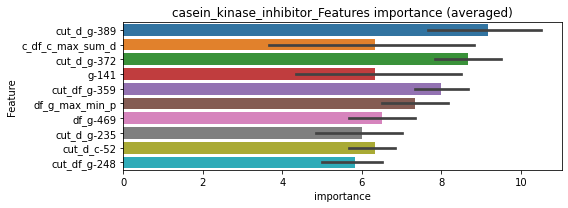

len(train_index) : 3894
len(valid_index) : 3895
================================= fold 1/2 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0177383	valid_1's binary_logloss: 0.0387368
[200]	training's binary_logloss: 0.00320792	valid_1's binary_logloss: 0.0250121
[300]	training's binary_logloss: 0.00102795	valid_1's binary_logloss: 0.0232664
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.000826745	valid_1's binary_logloss: 0.0230948


len(train_index) : 3895
len(valid_index) : 3894
================================= fold 2/2 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0217235	valid_1's binary_logloss: 0.0296931
[200]	training's binary_logloss: 0.00422171	valid_1's binary_logloss: 0.0124893
[300]	training's binary_logloss: 0.00137116	valid_1's binary_logloss: 0.00947869
[400]	training's binary_logloss: 0.000662076	valid_1's binary_logloss: 0.00884571
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000591619	valid_1's binary_logloss: 0.00880065


casein_kinase_inhibitor logloss: 0.015948633681098744


neg labels: 3289 → selected neg labels: 3287


caspase_activator, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00656949	valid_1's binary_logloss: 0.0199524
[200]	training's binary_logloss: 0.000867039	valid_1's binary_logloss: 0.0152459
Early stopping, best iteration is:
[205]	training's binary_logloss: 0.000817677	valid_1's binary_logloss: 0.0150962
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00763804	valid_1's binary_logloss: 0.012777
[200]	training's binary_logloss: 0.00101929	valid_1's binary_logloss: 0.0045691
[300]	training's binary_logloss: 0.000477856	valid_1's binary_logloss: 0.00363186
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.000435045	valid_1's binary_logloss: 0.00351307


1 / 3 AUC score:1.000
y_Threshold: 0.0013022, Threshold: 0.0013627, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00123, conf_1:0.00150
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0013627
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0113627
threshold: 0.0113627, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00676027	valid_1's binary_logloss: 0.0205729
[200]	training's binary_logloss: 0.000876082	valid_1's binary_logloss: 0.015131
Early stopping, best iteration is:
[206]	training's binary_logloss: 0.000813998	valid_1's binary_logloss: 0.014945
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00792899	valid_1's binary_logloss: 0.0125273
[200]	training's binary_logloss: 0.0010548	valid_1's binary_logloss: 0.00432138
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.000530165	valid_1's binary_logloss: 0.00352918


2 / 3 AUC score:1.000
y_Threshold: 0.0066444, Threshold: 0.0113627, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.01023, conf_1:0.01250
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0113627
Num_p_label: 170.0, Expected: 3.0, Adj_threshold_2: 0.0013627
threshold: 0.0013627, positive_p_label: 170.0/3982, p_label_rate: 0.0426921
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00676027	valid_1's binary_logloss: 0.0205729
[200]	training's binary_logloss: 0.000876082	valid_1's binary_logloss: 0.015131
Early stopping, best iteration is:
[206]	training's binary_logloss: 0.000813998	valid_1's binary_logloss: 0.014945
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00792899	valid_1's binary_logloss: 0.0125273
[200]	training's binary_logloss: 0.0010548	valid_1's binary_logloss: 0.00432138
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.000530165	valid_1's binary_logloss: 0.00352918


3 / 3 AUC score:1.000
y_Threshold: 0.0066444, Threshold: 0.0013627, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0426921 Vs.target_rate: 0.00076
Num_p_label: 170.0, conf_0:0.00123, conf_1:0.00150
Num_p_label: 170.0, Expected: 3.0, Adj_threshold_1: 0.0013627
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0113627
threshold: 0.0113627, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7794, y_label_rate: 0.0842956


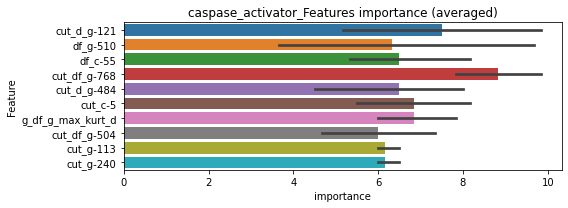

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 caspase_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0138063	valid_1's binary_logloss: 0.0223759
[200]	training's binary_logloss: 0.00180006	valid_1's binary_logloss: 0.0103917
[300]	training's binary_logloss: 0.000532326	valid_1's binary_logloss: 0.00918014
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.000392253	valid_1's binary_logloss: 0.00904686


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 caspase_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0149749	valid_1's binary_logloss: 0.0189595
[200]	training's binary_logloss: 0.00221991	valid_1's binary_logloss: 0.00511431
[300]	training's binary_logloss: 0.000652197	valid_1's binary_logloss: 0.00295251
[400]	training's binary_logloss: 0.000328701	valid_1's binary_logloss: 0.00242353
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000280468	valid_1's binary_logloss: 0.00231307


caspase_activator logloss: 0.005679966950080049


neg labels: 3289 → selected neg labels: 3286


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00677604	valid_1's binary_logloss: 0.0189184
Early stopping, best iteration is:
[179]	training's binary_logloss: 0.0011937	valid_1's binary_logloss: 0.0134499
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0075096	valid_1's binary_logloss: 0.0149356
[200]	training's binary_logloss: 0.000998227	valid_1's binary_logloss: 0.00758635
[300]	training's binary_logloss: 0.000467469	valid_1's binary_logloss: 0.0068764
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.000468899	valid_1's binary_logloss: 0.0068716


1 / 3 AUC score:1.000
y_Threshold: 0.0015483, Threshold: 0.0014546, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00131, conf_1:0.00160
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0014546
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0114546
threshold: 0.0114546, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00696864	valid_1's binary_logloss: 0.019085
Early stopping, best iteration is:
[165]	training's binary_logloss: 0.00152194	valid_1's binary_logloss: 0.0130271
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00785512	valid_1's binary_logloss: 0.0159565
[200]	training's binary_logloss: 0.00103545	valid_1's binary_logloss: 0.00774291
[300]	training's binary_logloss: 0.000484667	valid_1's binary_logloss: 0.00698316
Early stopping, best iteration is:
[310]	training's binary_logloss: 0.000468209	valid_1's binary_logloss: 0.00696752


2 / 3 AUC score:1.000
y_Threshold: 0.0047923, Threshold: 0.0114546, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.01031, conf_1:0.01260
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0114546
Num_p_label: 240.0, Expected: 3.0, Adj_threshold_2: 0.0014546
threshold: 0.0014546, positive_p_label: 240.0/3982, p_label_rate: 0.0602712
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00696864	valid_1's binary_logloss: 0.019085
Early stopping, best iteration is:
[165]	training's binary_logloss: 0.00152194	valid_1's binary_logloss: 0.0130271
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00785512	valid_1's binary_logloss: 0.0159565
[200]	training's binary_logloss: 0.00103545	valid_1's binary_logloss: 0.00774291
[300]	training's binary_logloss: 0.000484667	valid_1's binary_logloss: 0.00698316
Early stopping, best iteration is:
[310]	training's binary_logloss: 0.000468209	valid_1's binary_logloss: 0.00696752


3 / 3 AUC score:1.000
y_Threshold: 0.0047923, Threshold: 0.0014546, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0602712 Vs.target_rate: 0.00076
Num_p_label: 240.0, conf_0:0.00131, conf_1:0.00160
Num_p_label: 240.0, Expected: 3.0, Adj_threshold_1: 0.0014546
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0114546
threshold: 0.0114546, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7793, y_label_rate: 0.0843064


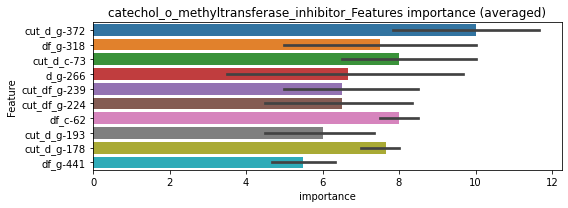

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0134502	valid_1's binary_logloss: 0.0208556
[200]	training's binary_logloss: 0.00184914	valid_1's binary_logloss: 0.00920279
[300]	training's binary_logloss: 0.000549011	valid_1's binary_logloss: 0.00769366
Early stopping, best iteration is:
[342]	training's binary_logloss: 0.000394668	valid_1's binary_logloss: 0.00747815


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0146012	valid_1's binary_logloss: 0.0187214
[200]	training's binary_logloss: 0.00215279	valid_1's binary_logloss: 0.00589169
[300]	training's binary_logloss: 0.000631784	valid_1's binary_logloss: 0.00428759
[400]	training's binary_logloss: 0.000313275	valid_1's binary_logloss: 0.00387688
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000315971	valid_1's binary_logloss: 0.00386987


catechol_o_methyltransferase_inhibitor logloss: 0.005674241569277553


neg labels: 3289 → selected neg labels: 3272


cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3272, target_rate: 0.0042832 → Adj_target_rate: 0.0042806
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0285467	valid_1's binary_logloss: 0.127196
Early stopping, best iteration is:
[136]	training's binary_logloss: 0.0146751	valid_1's binary_logloss: 0.122104
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.036623	valid_1's binary_logloss: 0.0970213
[200]	training's binary_logloss: 0.00753082	valid_1's binary_logloss: 0.08293
Early stopping, best iteration is:
[231]	training's binary_logloss: 0.00523517	valid_1's binary_logloss: 0.0820109


1 / 3 AUC score:0.989
y_Threshold: 0.0219732, Threshold: 0.0251992, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 190 → Positive_corect_labels: 625/3736
p_label_rate: 0.0200904 Vs.target_rate: 0.00428
Num_p_label: 80.0, conf_0:0.02268, conf_1:0.02772
Num_p_label: 80.0, Expected: 17.1, Adj_threshold_1: 0.0251992
Num_p_label: 20.0, Expected: 17.1, Adj_threshold_2: 0.0351992
threshold: 0.0351992, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 625.0/3736, y_label_rate: 0.1672912
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0264868	valid_1's binary_logloss: 0.0945959
Early stopping, best iteration is:
[169]	training's binary_logloss: 0.00773378	valid_1's binary_logloss: 0.0855875
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.029698	valid_1's binary_logloss: 0.0810752
Early stopping, best iteration is:
[162]	training's binary_logloss: 0.00975005	valid_1's binary_logloss: 0.0701298


2 / 3 AUC score:0.994
y_Threshold: 0.0308273, Threshold: 0.0351992, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 52 → Positive_corect_labels: 599.0/3684
p_label_rate: 0.0052737 Vs.target_rate: 0.00428
Num_p_label: 21.0, conf_0:0.03168, conf_1:0.03872
threshold: 0.0351992, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 599.0/3684, y_label_rate: 0.1625950
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0205947	valid_1's binary_logloss: 0.0768059
Early stopping, best iteration is:
[169]	training's binary_logloss: 0.00569298	valid_1's binary_logloss: 0.0684251
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0228916	valid_1's binary_logloss: 0.0654023
[200]	training's binary_logloss: 0.00422095	valid_1's binary_logloss: 0.0529973
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00453751	valid_1's binary_logloss: 0.0528868


3 / 3 AUC score:0.998
y_Threshold: 0.0202606, Threshold: 0.0351992, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 28 → Positive_corect_labels: 585.0/3656
p_label_rate: 0.0012557 Vs.target_rate: 0.00428
Num_p_label: 5.0, conf_0:0.03168, conf_1:0.03872
Num_p_label: 5.0, Expected: 17.1, Adj_threshold_1: 0.0351992
Num_p_label: 16.0, Expected: 17.1, Adj_threshold_2: 0.0251992
threshold: 0.0251992, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 601.0/7638, y_label_rate: 0.0786855


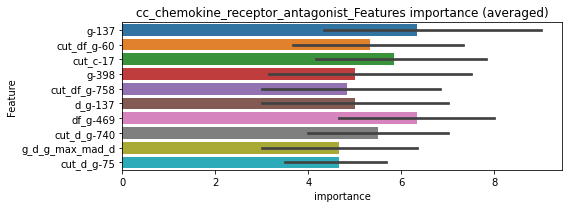

len(train_index) : 3819
len(valid_index) : 3819
================================= fold 1/2 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0275628	valid_1's binary_logloss: 0.0611056
[200]	training's binary_logloss: 0.00660528	valid_1's binary_logloss: 0.0434552
[300]	training's binary_logloss: 0.00231372	valid_1's binary_logloss: 0.0414179
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.00233524	valid_1's binary_logloss: 0.0413951


len(train_index) : 3819
len(valid_index) : 3819
================================= fold 2/2 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0312621	valid_1's binary_logloss: 0.0501044
[200]	training's binary_logloss: 0.00799005	valid_1's binary_logloss: 0.0310133
[300]	training's binary_logloss: 0.00290325	valid_1's binary_logloss: 0.0274536
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.00272596	valid_1's binary_logloss: 0.0272788


cc_chemokine_receptor_antagonist logloss: 0.03433696730400001


neg labels: 3289 → selected neg labels: 3286


cck_receptor_antagonist, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00649271	valid_1's binary_logloss: 0.0203701
[200]	training's binary_logloss: 0.000841818	valid_1's binary_logloss: 0.0149214
Early stopping, best iteration is:
[211]	training's binary_logloss: 0.000742201	valid_1's binary_logloss: 0.0147012
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00754591	valid_1's binary_logloss: 0.0122673
[200]	training's binary_logloss: 0.00101392	valid_1's binary_logloss: 0.00414561
[300]	training's binary_logloss: 0.000474839	valid_1's binary_logloss: 0.00326305
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.000456788	valid_1's binary_logloss: 0.00322752


1 / 3 AUC score:1.000
y_Threshold: 0.0013316, Threshold: 0.0014427, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00130, conf_1:0.00159
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0014427
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0114427
threshold: 0.0114427, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0066503	valid_1's binary_logloss: 0.0202492
[200]	training's binary_logloss: 0.000842936	valid_1's binary_logloss: 0.0144785
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.000523238	valid_1's binary_logloss: 0.0140645
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00780302	valid_1's binary_logloss: 0.0118815
[200]	training's binary_logloss: 0.00101772	valid_1's binary_logloss: 0.00424191
[300]	training's binary_logloss: 0.000481878	valid_1's binary_logloss: 0.0033459
Early stopping, best iteration is:
[310]	training's binary_logloss: 0.000466625	valid_1's binary_logloss: 0.00330312


2 / 3 AUC score:1.000
y_Threshold: 0.0054192, Threshold: 0.0114427, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.01030, conf_1:0.01259
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0114427
Num_p_label: 104.0, Expected: 3.0, Adj_threshold_2: 0.0014427
threshold: 0.0014427, positive_p_label: 104.0/3982, p_label_rate: 0.0261175
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0066503	valid_1's binary_logloss: 0.0202492
[200]	training's binary_logloss: 0.000842936	valid_1's binary_logloss: 0.0144785
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.000523238	valid_1's binary_logloss: 0.0140645
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00780302	valid_1's binary_logloss: 0.0118815
[200]	training's binary_logloss: 0.00101772	valid_1's binary_logloss: 0.00424191
[300]	training's binary_logloss: 0.000481878	valid_1's binary_logloss: 0.0033459
Early stopping, best iteration is:
[310]	training's binary_logloss: 0.000466625	valid_1's binary_logloss: 0.00330312


3 / 3 AUC score:1.000
y_Threshold: 0.0054192, Threshold: 0.0014427, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0261175 Vs.target_rate: 0.00076
Num_p_label: 104.0, conf_0:0.00130, conf_1:0.00159
Num_p_label: 104.0, Expected: 3.0, Adj_threshold_1: 0.0014427
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0114427
threshold: 0.0114427, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7793, y_label_rate: 0.0843064


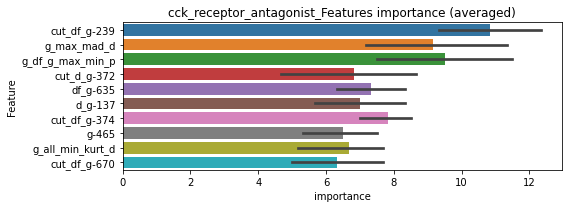

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 cck_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0133485	valid_1's binary_logloss: 0.0218496
[200]	training's binary_logloss: 0.0017493	valid_1's binary_logloss: 0.0102166
[300]	training's binary_logloss: 0.000520698	valid_1's binary_logloss: 0.00866113
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000356102	valid_1's binary_logloss: 0.008463


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 cck_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0148913	valid_1's binary_logloss: 0.0180118
[200]	training's binary_logloss: 0.00217818	valid_1's binary_logloss: 0.00455107
[300]	training's binary_logloss: 0.000643204	valid_1's binary_logloss: 0.00271048
[400]	training's binary_logloss: 0.000324247	valid_1's binary_logloss: 0.00225918
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000286329	valid_1's binary_logloss: 0.00218788


cck_receptor_antagonist logloss: 0.005325840349075151


neg labels: 3289 → selected neg labels: 3263


cdk_inhibitor, len(trt): 352, len(othr): 3263, target_rate: 0.0147812 → Adj_target_rate: 0.0122676
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0276769	valid_1's binary_logloss: 0.117595
Early stopping, best iteration is:
[160]	training's binary_logloss: 0.00942561	valid_1's binary_logloss: 0.10894
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0291282	valid_1's binary_logloss: 0.106287
Early stopping, best iteration is:
[161]	training's binary_logloss: 0.00983181	valid_1's binary_logloss: 0.0959749


1 / 3 AUC score:0.981
y_Threshold: 0.0480622, Threshold: 0.3549809, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 217 → Positive_corect_labels: 609/3698
p_label_rate: 0.0200904 Vs.target_rate: 0.01478
Num_p_label: 80.0, conf_0:0.31948, conf_1:0.39048
threshold: 0.3549809, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 609.0/3698, y_label_rate: 0.1646836
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0157039	valid_1's binary_logloss: 0.0743681
Early stopping, best iteration is:
[125]	training's binary_logloss: 0.00876157	valid_1's binary_logloss: 0.070322
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0169252	valid_1's binary_logloss: 0.0669671
[200]	training's binary_logloss: 0.002859	valid_1's binary_logloss: 0.0552
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00146931	valid_1's binary_logloss: 0.0527296


2 / 3 AUC score:0.995
y_Threshold: 0.1190499, Threshold: 0.3549809, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 72 → Positive_corect_labels: 573.0/3626
p_label_rate: 0.0688096 Vs.target_rate: 0.01478
Num_p_label: 274.0, conf_0:0.31948, conf_1:0.39048
Num_p_label: 274.0, Expected: 58.9, Adj_threshold_1: 0.3549809
Num_p_label: 274.0, Expected: 58.9, Adj_threshold_2: 0.3649809
Num_p_label: 272.0, Expected: 58.9, Adj_threshold_3: 0.3749809
Num_p_label: 270.0, Expected: 58.9, Adj_threshold_4: 0.3849809
Num_p_label: 268.0, Expected: 58.9, Adj_threshold_5: 0.3949809
Num_p_label: 266.0, Expected: 58.9, Adj_threshold_6: 0.4049809
Num_p_label: 264.0, Expected: 58.9, Adj_threshold_7: 0.4149809
Num_p_label: 261.0, Expected: 58.9, Adj_threshold_8: 0.4249809
Num_p_label: 260.0, Expected: 58.9, Adj_threshold_9: 0.4349809
Num_p_label: 257.0, Expected: 58.9, Adj_threshold_10: 0.4449809
threshold: 0.4549809, positive_p_label: 253.0/3982, p_label_rate: 0.0635359
positive_y_label: 573.0/3626, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0105745	valid_1's binary_logloss: 0.0418423
Early stopping, best iteration is:
[138]	training's binary_logloss: 0.00414901	valid_1's binary_logloss: 0.0377699
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.010213	valid_1's binary_logloss: 0.047681
Early stopping, best iteration is:
[175]	training's binary_logloss: 0.00205987	valid_1's binary_logloss: 0.0426234


3 / 3 AUC score:0.995
y_Threshold: 0.1341039, Threshold: 0.4549809, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 36 → Positive_corect_labels: 555.0/3590
p_label_rate: 0.0831241 Vs.target_rate: 0.01478
Num_p_label: 331.0, conf_0:0.40948, conf_1:0.50048
Num_p_label: 331.0, Expected: 58.9, Adj_threshold_1: 0.4549809
Num_p_label: 330.0, Expected: 58.9, Adj_threshold_2: 0.4649809
Num_p_label: 328.0, Expected: 58.9, Adj_threshold_3: 0.4749809
Num_p_label: 326.0, Expected: 58.9, Adj_threshold_4: 0.4849809
Num_p_label: 325.0, Expected: 58.9, Adj_threshold_5: 0.4949809
Num_p_label: 325.0, Expected: 58.9, Adj_threshold_6: 0.5049809
Num_p_label: 325.0, Expected: 58.9, Adj_threshold_7: 0.5149809
Num_p_label: 325.0, Expected: 58.9, Adj_threshold_8: 0.5249809
Num_p_label: 323.0, Expected: 58.9, Adj_threshold_9: 0.5349809
Num_p_label: 318.0, Expected: 58.9, Adj_threshold_10: 0.5449809
threshold: 0.5549809, positive_p_label: 318.0/3982, p_label_rate: 0.0798594
positive_y_label: 873.0/7572, y_label_ra

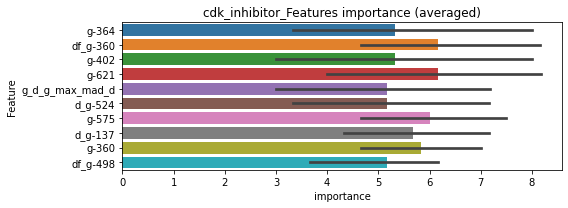

len(train_index) : 3786
len(valid_index) : 3786
================================= fold 1/2 cdk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0223778	valid_1's binary_logloss: 0.037534
[200]	training's binary_logloss: 0.00394649	valid_1's binary_logloss: 0.023096
[300]	training's binary_logloss: 0.00121617	valid_1's binary_logloss: 0.0211121
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00101287	valid_1's binary_logloss: 0.0209291


len(train_index) : 3786
len(valid_index) : 3786
================================= fold 2/2 cdk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0218696	valid_1's binary_logloss: 0.036458
[200]	training's binary_logloss: 0.00350624	valid_1's binary_logloss: 0.0199173
[300]	training's binary_logloss: 0.001101	valid_1's binary_logloss: 0.0179064
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.000625391	valid_1's binary_logloss: 0.017321


cdk_inhibitor logloss: 0.019125093704311334


neg labels: 3289 → selected neg labels: 3280


chelating_agent, len(trt): 54, len(othr): 3280, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0164019	valid_1's binary_logloss: 0.0663324
Early stopping, best iteration is:
[160]	training's binary_logloss: 0.00492137	valid_1's binary_logloss: 0.0591265
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0188889	valid_1's binary_logloss: 0.0456924
[200]	training's binary_logloss: 0.00327634	valid_1's binary_logloss: 0.0338303
Early stopping, best iteration is:
[227]	training's binary_logloss: 0.00236026	valid_1's binary_logloss: 0.0328108


1 / 3 AUC score:0.998
y_Threshold: 0.0085806, Threshold: 0.0101442, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 144 → Positive_corect_labels: 650/3792
p_label_rate: 0.0200904 Vs.target_rate: 0.00227
Num_p_label: 80.0, conf_0:0.00913, conf_1:0.01116
Num_p_label: 80.0, Expected: 9.0, Adj_threshold_1: 0.0101442
Num_p_label: 8.0, Expected: 9.0, Adj_threshold_2: 0.0201442
threshold: 0.0201442, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0165392	valid_1's binary_logloss: 0.0539278
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00312521	valid_1's binary_logloss: 0.045029
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0179443	valid_1's binary_logloss: 0.047568
[200]	training's binary_logloss: 0.00300905	valid_1's binary_logloss: 0.0363708
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00233776	valid_1's binary_logloss: 0.0356085


2 / 3 AUC score:1.000
y_Threshold: 0.0150805, Threshold: 0.0201442, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0020090 Vs.target_rate: 0.00227
Num_p_label: 8.0, conf_0:0.01813, conf_1:0.02216
threshold: 0.0201442, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 646.0/3784, y_label_rate: 0.1707188
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0157853	valid_1's binary_logloss: 0.050996
Early stopping, best iteration is:
[181]	training's binary_logloss: 0.00342056	valid_1's binary_logloss: 0.0411173
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0168172	valid_1's binary_logloss: 0.0457015
[200]	training's binary_logloss: 0.00281763	valid_1's binary_logloss: 0.0337356
Early stopping, best iteration is:
[225]	training's binary_logloss: 0.00207481	valid_1's binary_logloss: 0.0327383


3 / 3 AUC score:1.000
y_Threshold: 0.0177509, Threshold: 0.0201442, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 641.0/3774
p_label_rate: 0.0022602 Vs.target_rate: 0.00227
Num_p_label: 9.0, conf_0:0.01813, conf_1:0.02216
threshold: 0.0201442, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 650.0/7756, y_label_rate: 0.0838061


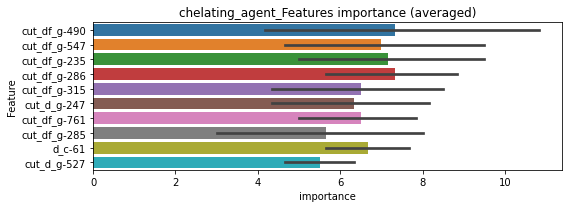

len(train_index) : 3878
len(valid_index) : 3878
================================= fold 1/2 chelating_agent=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.024135	valid_1's binary_logloss: 0.0476486
[200]	training's binary_logloss: 0.00514487	valid_1's binary_logloss: 0.0311838
[300]	training's binary_logloss: 0.00170008	valid_1's binary_logloss: 0.0292781
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00133357	valid_1's binary_logloss: 0.0290694


len(train_index) : 3878
len(valid_index) : 3878
================================= fold 2/2 chelating_agent=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0265466	valid_1's binary_logloss: 0.0412048
[200]	training's binary_logloss: 0.00607018	valid_1's binary_logloss: 0.0223153
[300]	training's binary_logloss: 0.00205615	valid_1's binary_logloss: 0.0190253
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00135868	valid_1's binary_logloss: 0.0185468


chelating_agent logloss: 0.023808074255809577


neg labels: 3289 → selected neg labels: 3285


chk_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00600434	valid_1's binary_logloss: 0.0138983
[200]	training's binary_logloss: 0.000713223	valid_1's binary_logloss: 0.00621408
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000380757	valid_1's binary_logloss: 0.00546633
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00671675	valid_1's binary_logloss: 0.00922144
[200]	training's binary_logloss: 0.000813149	valid_1's binary_logloss: 0.00208496
[300]	training's binary_logloss: 0.00039742	valid_1's binary_logloss: 0.00150091
Early stopping, best iteration is:
[305]	training's binary_logloss: 0.000390578	valid_1's binary_logloss: 0.00149401


1 / 3 AUC score:1.000
y_Threshold: 0.0031620, Threshold: 0.0074989, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.00675, conf_1:0.00825
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0074989
Num_p_label: 34.0, Expected: 4.0, Adj_threshold_2: 0.0174989
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_3: 0.0274989
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_4: 0.0374989
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_5: 0.0474989
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_6: 0.0574989
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_7: 0.0674989
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_8: 0.0774989
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_9: 0.0874989
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_10: 0.0974989
threshold: 0.1074989, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00551773	valid_1's binary_logloss: 0.0122331
[200]	training's binary_logloss: 0.000621092	valid_1's binary_logloss: 0.00489261
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.00034395	valid_1's binary_logloss: 0.00419051
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00625324	valid_1's binary_logloss: 0.0088871
[200]	training's binary_logloss: 0.000703369	valid_1's binary_logloss: 0.0020727
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.000428671	valid_1's binary_logloss: 0.0017859


2 / 3 AUC score:1.000
y_Threshold: 0.1148654, Threshold: 0.1074989, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0135610 Vs.target_rate: 0.00101
Num_p_label: 54.0, conf_0:0.09675, conf_1:0.11825
Num_p_label: 54.0, Expected: 4.0, Adj_threshold_1: 0.1074989
Num_p_label: 49.0, Expected: 4.0, Adj_threshold_2: 0.1174989
Num_p_label: 44.0, Expected: 4.0, Adj_threshold_3: 0.1274989
Num_p_label: 41.0, Expected: 4.0, Adj_threshold_4: 0.1374989
Num_p_label: 39.0, Expected: 4.0, Adj_threshold_5: 0.1474989
Num_p_label: 37.0, Expected: 4.0, Adj_threshold_6: 0.1574989
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_7: 0.1674989
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_8: 0.1774989
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_9: 0.1874989
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_10: 0.1974989
threshold: 0.2074989, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00551773	valid_1's binary_logloss: 0.0122331
[200]	training's binary_logloss: 0.000621092	valid_1's binary_logloss: 0.00489261
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.00034395	valid_1's binary_logloss: 0.00419051
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00625324	valid_1's binary_logloss: 0.0088871
[200]	training's binary_logloss: 0.000703369	valid_1's binary_logloss: 0.0020727
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.000428671	valid_1's binary_logloss: 0.0017859


3 / 3 AUC score:1.000
y_Threshold: 0.1148654, Threshold: 0.2074989, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0062783 Vs.target_rate: 0.00101
Num_p_label: 25.0, conf_0:0.18675, conf_1:0.22825
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_1: 0.2074989
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_2: 0.2174989
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_3: 0.2274989
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_4: 0.2374989
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_5: 0.2474989
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_6: 0.2574989
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_7: 0.2674989
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_8: 0.2774989
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_9: 0.2874989
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_10: 0.2974989
threshold: 0.3074989, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 672.0/7792, y_label_rate: 0.0862423


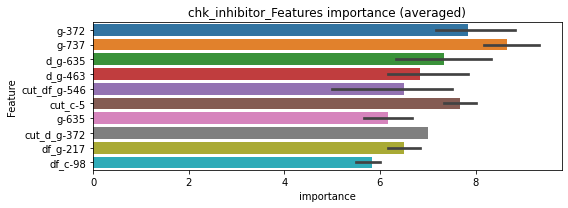

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 chk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0131179	valid_1's binary_logloss: 0.0194084
[200]	training's binary_logloss: 0.00172586	valid_1's binary_logloss: 0.00700313
[300]	training's binary_logloss: 0.000508618	valid_1's binary_logloss: 0.00531761
Early stopping, best iteration is:
[347]	training's binary_logloss: 0.000355393	valid_1's binary_logloss: 0.00513403


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 chk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0138178	valid_1's binary_logloss: 0.0171583
[200]	training's binary_logloss: 0.001907	valid_1's binary_logloss: 0.00424456
[300]	training's binary_logloss: 0.000570021	valid_1's binary_logloss: 0.00256426
[400]	training's binary_logloss: 0.00029677	valid_1's binary_logloss: 0.00210442
[500]	training's binary_logloss: 0.00021604	valid_1's binary_logloss: 0.00198143
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000216659	valid_1's binary_logloss: 0.00197929


chk_inhibitor logloss: 0.003556662920671484


neg labels: 3289 → selected neg labels: 3282


chloride_channel_blocker, len(trt): 42, len(othr): 3282, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0135635	valid_1's binary_logloss: 0.0475266
Early stopping, best iteration is:
[177]	training's binary_logloss: 0.00291018	valid_1's binary_logloss: 0.0386882
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0148752	valid_1's binary_logloss: 0.0378765
[200]	training's binary_logloss: 0.00240883	valid_1's binary_logloss: 0.0270007
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.00148797	valid_1's binary_logloss: 0.026322


1 / 3 AUC score:1.000
y_Threshold: 0.0061693, Threshold: 0.0064200, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0200904 Vs.target_rate: 0.00176
Num_p_label: 80.0, conf_0:0.00578, conf_1:0.00706
Num_p_label: 80.0, Expected: 7.0, Adj_threshold_1: 0.0064200
Num_p_label: 0.0, Expected: 7.0, Adj_threshold_2: 0.0164200
threshold: 0.0164200, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0140511	valid_1's binary_logloss: 0.0483642
[200]	training's binary_logloss: 0.00217998	valid_1's binary_logloss: 0.0389163
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00144765	valid_1's binary_logloss: 0.0381521
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0151831	valid_1's binary_logloss: 0.0395158
[200]	training's binary_logloss: 0.00239924	valid_1's binary_logloss: 0.027748
Early stopping, best iteration is:
[205]	training's binary_logloss: 0.00227092	valid_1's binary_logloss: 0.0275329


2 / 3 AUC score:1.000
y_Threshold: 0.0136759, Threshold: 0.0164200, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0002511 Vs.target_rate: 0.00176
Num_p_label: 1.0, conf_0:0.01478, conf_1:0.01806
Num_p_label: 1.0, Expected: 7.0, Adj_threshold_1: 0.0164200
Num_p_label: 109.0, Expected: 7.0, Adj_threshold_2: 0.0064200
threshold: 0.0064200, positive_p_label: 109.0/3982, p_label_rate: 0.0273732
positive_y_label: 651.0/3796, y_label_rate: 0.1714963
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0139367	valid_1's binary_logloss: 0.0420543
[200]	training's binary_logloss: 0.00211647	valid_1's binary_logloss: 0.0316511
Early stopping, best iteration is:
[198]	training's binary_logloss: 0.00217021	valid_1's binary_logloss: 0.0314587
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0144647	valid_1's binary_logloss: 0.0354578
[200]	training's binary_logloss: 0.00233402	valid_1's binary_logloss: 0.0235022
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.001439	valid_1's binary_logloss: 0.0227655


3 / 3 AUC score:1.000
y_Threshold: 0.0127256, Threshold: 0.0064200, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 649.0/3792
p_label_rate: 0.0246107 Vs.target_rate: 0.00176
Num_p_label: 98.0, conf_0:0.00578, conf_1:0.00706
Num_p_label: 98.0, Expected: 7.0, Adj_threshold_1: 0.0064200
Num_p_label: 2.0, Expected: 7.0, Adj_threshold_2: 0.0164200
threshold: 0.0164200, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 651.0/7774, y_label_rate: 0.0837407


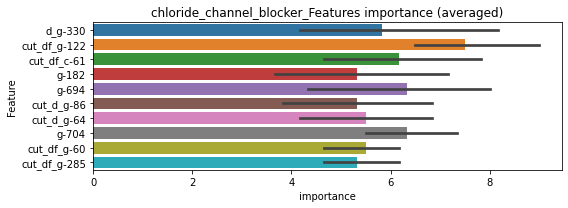

len(train_index) : 3887
len(valid_index) : 3887
================================= fold 1/2 chloride_channel_blocker=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0208721	valid_1's binary_logloss: 0.0366717
[200]	training's binary_logloss: 0.0041978	valid_1's binary_logloss: 0.0202647
[300]	training's binary_logloss: 0.00135976	valid_1's binary_logloss: 0.0179509
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.00109274	valid_1's binary_logloss: 0.0177034


len(train_index) : 3887
len(valid_index) : 3887
================================= fold 2/2 chloride_channel_blocker=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0218101	valid_1's binary_logloss: 0.0366023
[200]	training's binary_logloss: 0.00451318	valid_1's binary_logloss: 0.0198703
[300]	training's binary_logloss: 0.00147488	valid_1's binary_logloss: 0.0172708
[400]	training's binary_logloss: 0.000713518	valid_1's binary_logloss: 0.0167082
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.000676953	valid_1's binary_logloss: 0.0166789


chloride_channel_blocker logloss: 0.01719111648387967


neg labels: 3289 → selected neg labels: 3281


cholesterol_inhibitor, len(trt): 48, len(othr): 3281, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0151774	valid_1's binary_logloss: 0.0591771
Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00275534	valid_1's binary_logloss: 0.0509839
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0186939	valid_1's binary_logloss: 0.0391388
[200]	training's binary_logloss: 0.00321875	valid_1's binary_logloss: 0.0257411
[300]	training's binary_logloss: 0.00123595	valid_1's binary_logloss: 0.0233667
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.00118911	valid_1's binary_logloss: 0.0232786


1 / 3 AUC score:1.000
y_Threshold: 0.0051052, Threshold: 0.0050779, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00202
Num_p_label: 80.0, conf_0:0.00457, conf_1:0.00559
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_1: 0.0050779
Num_p_label: 0.0, Expected: 8.0, Adj_threshold_2: 0.0150779
threshold: 0.0150779, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0154102	valid_1's binary_logloss: 0.0586112
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00309598	valid_1's binary_logloss: 0.0500087
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0189637	valid_1's binary_logloss: 0.0413873
[200]	training's binary_logloss: 0.00324733	valid_1's binary_logloss: 0.026466
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00135274	valid_1's binary_logloss: 0.0243625


2 / 3 AUC score:1.000
y_Threshold: 0.0118593, Threshold: 0.0150779, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0007534 Vs.target_rate: 0.00202
Num_p_label: 3.0, conf_0:0.01357, conf_1:0.01659
threshold: 0.0150779, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.014253	valid_1's binary_logloss: 0.0546125
Early stopping, best iteration is:
[148]	training's binary_logloss: 0.00509163	valid_1's binary_logloss: 0.0484596
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.018161	valid_1's binary_logloss: 0.0427873
[200]	training's binary_logloss: 0.0029873	valid_1's binary_logloss: 0.031417
Early stopping, best iteration is:
[219]	training's binary_logloss: 0.00235615	valid_1's binary_logloss: 0.0306185


3 / 3 AUC score:1.000
y_Threshold: 0.0191218, Threshold: 0.0150779, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0027624 Vs.target_rate: 0.00202
Num_p_label: 11.0, conf_0:0.01357, conf_1:0.01659
threshold: 0.0150779, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 658.0/7769, y_label_rate: 0.0846956


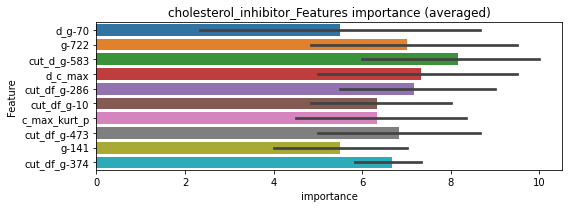

len(train_index) : 3884
len(valid_index) : 3885
================================= fold 1/2 cholesterol_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0240639	valid_1's binary_logloss: 0.050026
[200]	training's binary_logloss: 0.00517309	valid_1's binary_logloss: 0.0350287
Early stopping, best iteration is:
[229]	training's binary_logloss: 0.00357507	valid_1's binary_logloss: 0.034244


len(train_index) : 3885
len(valid_index) : 3884
================================= fold 2/2 cholesterol_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0272146	valid_1's binary_logloss: 0.0417265
[200]	training's binary_logloss: 0.00633627	valid_1's binary_logloss: 0.0225309
[300]	training's binary_logloss: 0.00215388	valid_1's binary_logloss: 0.0187203
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00140473	valid_1's binary_logloss: 0.0184022


cholesterol_inhibitor logloss: 0.02632409395037225


neg labels: 3289 → selected neg labels: 3280


cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3280, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0164822	valid_1's binary_logloss: 0.067223
Early stopping, best iteration is:
[132]	training's binary_logloss: 0.00819249	valid_1's binary_logloss: 0.0621362
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0195073	valid_1's binary_logloss: 0.0430614
[200]	training's binary_logloss: 0.00334294	valid_1's binary_logloss: 0.0311605
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.00211656	valid_1's binary_logloss: 0.0299624


1 / 3 AUC score:0.998
y_Threshold: 0.0111963, Threshold: 0.0118498, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 140 → Positive_corect_labels: 652/3796
p_label_rate: 0.0200904 Vs.target_rate: 0.00227
Num_p_label: 80.0, conf_0:0.01066, conf_1:0.01303
Num_p_label: 80.0, Expected: 9.0, Adj_threshold_1: 0.0118498
Num_p_label: 4.0, Expected: 9.0, Adj_threshold_2: 0.0218498
threshold: 0.0218498, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0179748	valid_1's binary_logloss: 0.0579303
[200]	training's binary_logloss: 0.00288249	valid_1's binary_logloss: 0.0467497
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00222624	valid_1's binary_logloss: 0.0460662
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0194618	valid_1's binary_logloss: 0.0483761
[200]	training's binary_logloss: 0.00314621	valid_1's binary_logloss: 0.0345286
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.0035836	valid_1's binary_logloss: 0.0343198


2 / 3 AUC score:1.000
y_Threshold: 0.0166691, Threshold: 0.0218498, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0020090 Vs.target_rate: 0.00227
Num_p_label: 8.0, conf_0:0.01966, conf_1:0.02403
threshold: 0.0218498, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 645.0/3782, y_label_rate: 0.1705447
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0165401	valid_1's binary_logloss: 0.0471241
Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00314121	valid_1's binary_logloss: 0.0360451
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174565	valid_1's binary_logloss: 0.044692
Early stopping, best iteration is:
[187]	training's binary_logloss: 0.00340009	valid_1's binary_logloss: 0.033015


3 / 3 AUC score:1.000
y_Threshold: 0.0211610, Threshold: 0.0218498, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 643.0/3778
p_label_rate: 0.0027624 Vs.target_rate: 0.00227
Num_p_label: 11.0, conf_0:0.01966, conf_1:0.02403
threshold: 0.0218498, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/7760, y_label_rate: 0.0842784


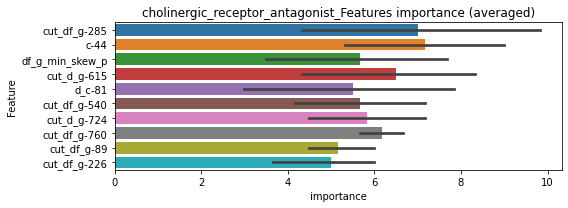

len(train_index) : 3880
len(valid_index) : 3880
================================= fold 1/2 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0248511	valid_1's binary_logloss: 0.0489612
[200]	training's binary_logloss: 0.0052936	valid_1's binary_logloss: 0.0320312
[300]	training's binary_logloss: 0.00177661	valid_1's binary_logloss: 0.0299047
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00193009	valid_1's binary_logloss: 0.0297983


len(train_index) : 3880
len(valid_index) : 3880
================================= fold 2/2 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.025822	valid_1's binary_logloss: 0.0453578
[200]	training's binary_logloss: 0.00575843	valid_1's binary_logloss: 0.0269662
[300]	training's binary_logloss: 0.00198936	valid_1's binary_logloss: 0.0238372
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00161914	valid_1's binary_logloss: 0.0235021


cholinergic_receptor_antagonist logloss: 0.026650211549714618


neg labels: 3289 → selected neg labels: 3285


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00837233	valid_1's binary_logloss: 0.0288391
Early stopping, best iteration is:
[176]	training's binary_logloss: 0.00162189	valid_1's binary_logloss: 0.0226184
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0107929	valid_1's binary_logloss: 0.0183981
[200]	training's binary_logloss: 0.00145837	valid_1's binary_logloss: 0.00846022
[300]	training's binary_logloss: 0.000618152	valid_1's binary_logloss: 0.00738074
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.000543256	valid_1's binary_logloss: 0.0072808


1 / 3 AUC score:1.000
y_Threshold: 0.0022476, Threshold: 0.0022446, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.00202, conf_1:0.00247
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0022446
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_2: 0.0122446
threshold: 0.0122446, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0087821	valid_1's binary_logloss: 0.0289308
[200]	training's binary_logloss: 0.00125983	valid_1's binary_logloss: 0.0207177
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.000755222	valid_1's binary_logloss: 0.0199395
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0111237	valid_1's binary_logloss: 0.0209924
[200]	training's binary_logloss: 0.00149806	valid_1's binary_logloss: 0.0110966
[300]	training's binary_logloss: 0.000640072	valid_1's binary_logloss: 0.00958634
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.000527154	valid_1's binary_logloss: 0.00939396


2 / 3 AUC score:1.000
y_Threshold: 0.0097280, Threshold: 0.0122446, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00101
Num_p_label: 0.0, conf_0:0.01102, conf_1:0.01347
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_1: 0.0122446
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_2: 0.0022446
threshold: 0.0022446, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0087821	valid_1's binary_logloss: 0.0289308
[200]	training's binary_logloss: 0.00125983	valid_1's binary_logloss: 0.0207177
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.000755222	valid_1's binary_logloss: 0.0199395
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0111237	valid_1's binary_logloss: 0.0209924
[200]	training's binary_logloss: 0.00149806	valid_1's binary_logloss: 0.0110966
[300]	training's binary_logloss: 0.000640072	valid_1's binary_logloss: 0.00958634
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.000527154	valid_1's binary_logloss: 0.00939396


3 / 3 AUC score:1.000
y_Threshold: 0.0097280, Threshold: 0.0022446, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00202, conf_1:0.00247
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0022446
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_2: 0.0122446
threshold: 0.0122446, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7792, y_label_rate: 0.0843172


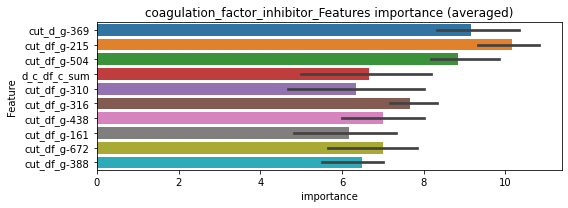

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163195	valid_1's binary_logloss: 0.0285049
[200]	training's binary_logloss: 0.0024167	valid_1's binary_logloss: 0.0132699
[300]	training's binary_logloss: 0.000740287	valid_1's binary_logloss: 0.0112799
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000504328	valid_1's binary_logloss: 0.0110632


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0176083	valid_1's binary_logloss: 0.0240629
[200]	training's binary_logloss: 0.00302037	valid_1's binary_logloss: 0.00907293
[300]	training's binary_logloss: 0.000901454	valid_1's binary_logloss: 0.00650874
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.000648519	valid_1's binary_logloss: 0.00620901


coagulation_factor_inhibitor logloss: 0.008636089357258677


neg labels: 3289 → selected neg labels: 3284


corticosteroid_agonist, len(trt): 36, len(othr): 3284, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0094983	valid_1's binary_logloss: 0.0246728
[200]	training's binary_logloss: 0.00129931	valid_1's binary_logloss: 0.0148444
[300]	training's binary_logloss: 0.000569691	valid_1's binary_logloss: 0.0134497
Early stopping, best iteration is:
[320]	training's binary_logloss: 0.000525728	valid_1's binary_logloss: 0.0132776
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00991269	valid_1's binary_logloss: 0.0213425
[200]	training's binary_logloss: 0.00143024	valid_1's binary_logloss: 0.0113771
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.000654032	valid_1's binary_logloss: 0.00980295


1 / 3 AUC score:1.000
y_Threshold: 0.0014000, Threshold: 0.0018595, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00167, conf_1:0.00205
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0018595
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_2: 0.0118595
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_3: 0.0218595
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_4: 0.0318595
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_5: 0.0418595
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_6: 0.0518595
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_7: 0.0618595
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_8: 0.0718595
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_9: 0.0818595
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_10: 0.0918595
threshold: 0.0918595, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00921648	valid_1's binary_logloss: 0.0225529
[200]	training's binary_logloss: 0.00119302	valid_1's binary_logloss: 0.0119342
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000679278	valid_1's binary_logloss: 0.0110996
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00964835	valid_1's binary_logloss: 0.0188807
[200]	training's binary_logloss: 0.00125894	valid_1's binary_logloss: 0.00916816
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.000769611	valid_1's binary_logloss: 0.00813038


2 / 3 AUC score:1.000
y_Threshold: 0.0123094, Threshold: 0.0918595, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0065294 Vs.target_rate: 0.00151
Num_p_label: 26.0, conf_0:0.08267, conf_1:0.10105
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_1: 0.0918595
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_2: 0.1018595
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_3: 0.1118595
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_4: 0.1218595
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_5: 0.1318595
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_6: 0.1418595
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_7: 0.1518595
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_8: 0.1618595
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_9: 0.1718595
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_10: 0.1818595
threshold: 0.1918595, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00921648	valid_1's binary_logloss: 0.0225529
[200]	training's binary_logloss: 0.00119302	valid_1's binary_logloss: 0.0119342
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000679278	valid_1's binary_logloss: 0.0110996
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00964835	valid_1's binary_logloss: 0.0188807
[200]	training's binary_logloss: 0.00125894	valid_1's binary_logloss: 0.00916816
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.000769611	valid_1's binary_logloss: 0.00813038


3 / 3 AUC score:1.000
y_Threshold: 0.0123094, Threshold: 0.1918595, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, conf_0:0.17267, conf_1:0.21105
threshold: 0.1918595, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 671.0/7790, y_label_rate: 0.0861361


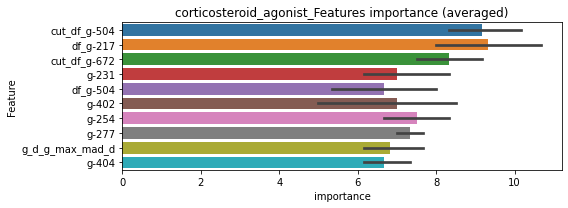

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 corticosteroid_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0172507	valid_1's binary_logloss: 0.0339749
[200]	training's binary_logloss: 0.00280612	valid_1's binary_logloss: 0.0176574
[300]	training's binary_logloss: 0.000827901	valid_1's binary_logloss: 0.0144196
Early stopping, best iteration is:
[369]	training's binary_logloss: 0.000490317	valid_1's binary_logloss: 0.0136953


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 corticosteroid_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0184382	valid_1's binary_logloss: 0.026257
[200]	training's binary_logloss: 0.00302371	valid_1's binary_logloss: 0.00943819
[300]	training's binary_logloss: 0.000899133	valid_1's binary_logloss: 0.00634454
[400]	training's binary_logloss: 0.000449693	valid_1's binary_logloss: 0.00565513
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000368562	valid_1's binary_logloss: 0.00546256


corticosteroid_agonist logloss: 0.009578922049014673


neg labels: 3289 → selected neg labels: 3215


cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3215, target_rate: 0.0182666 → Adj_target_rate: 0.0146863
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.112003	valid_1's binary_logloss: 0.36534
Early stopping, best iteration is:
[95]	training's binary_logloss: 0.118496	valid_1's binary_logloss: 0.365137
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.118624	valid_1's binary_logloss: 0.358914
Early stopping, best iteration is:
[109]	training's binary_logloss: 0.106554	valid_1's binary_logloss: 0.35794


1 / 3 AUC score:0.762
y_Threshold: 0.1504075, Threshold: 0.1909893, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 729 → Positive_corect_labels: 343/3129
p_label_rate: 0.0200904 Vs.target_rate: 0.01827
Num_p_label: 80.0, conf_0:0.17189, conf_1:0.21009
threshold: 0.1909893, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 343.0/3129, y_label_rate: 0.1096197
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0440556	valid_1's binary_logloss: 0.195563
Early stopping, best iteration is:
[110]	training's binary_logloss: 0.0379801	valid_1's binary_logloss: 0.193058
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0437641	valid_1's binary_logloss: 0.193127
Early stopping, best iteration is:
[126]	training's binary_logloss: 0.0291884	valid_1's binary_logloss: 0.190462


2 / 3 AUC score:0.919
y_Threshold: 0.0749185, Threshold: 0.1909893, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 194 → Positive_corect_labels: 246.0/2935
p_label_rate: 0.0000000 Vs.target_rate: 0.01827
Num_p_label: 0.0, conf_0:0.17189, conf_1:0.21009
Num_p_label: 0.0, Expected: 72.7, Adj_threshold_1: 0.1909893
Num_p_label: 0.0, Expected: 72.7, Adj_threshold_2: 0.1809893
Num_p_label: 0.0, Expected: 72.7, Adj_threshold_3: 0.1709893
Num_p_label: 2.0, Expected: 72.7, Adj_threshold_4: 0.1609893
Num_p_label: 4.0, Expected: 72.7, Adj_threshold_5: 0.1509893
Num_p_label: 8.0, Expected: 72.7, Adj_threshold_6: 0.1409893
Num_p_label: 13.0, Expected: 72.7, Adj_threshold_7: 0.1309893
Num_p_label: 17.0, Expected: 72.7, Adj_threshold_8: 0.1209893
Num_p_label: 27.0, Expected: 72.7, Adj_threshold_9: 0.1109893
Num_p_label: 37.0, Expected: 72.7, Adj_threshold_10: 0.1009893
threshold: 0.1009893, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 246.0/2935, y_label_rate: 0.0838160
====

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0200454	valid_1's binary_logloss: 0.124111
Early stopping, best iteration is:
[137]	training's binary_logloss: 0.0101428	valid_1's binary_logloss: 0.119536
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0205064	valid_1's binary_logloss: 0.11188
Early stopping, best iteration is:
[127]	training's binary_logloss: 0.012403	valid_1's binary_logloss: 0.106885


3 / 3 AUC score:0.975
y_Threshold: 0.0333447, Threshold: 0.1009893, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 58 → Positive_corect_labels: 217.0/2877
p_label_rate: 0.0000000 Vs.target_rate: 0.01827
Num_p_label: 0.0, conf_0:0.09089, conf_1:0.11109
Num_p_label: 0.0, Expected: 72.7, Adj_threshold_1: 0.1009893
Num_p_label: 0.0, Expected: 72.7, Adj_threshold_2: 0.0909893
Num_p_label: 0.0, Expected: 72.7, Adj_threshold_3: 0.0809893
Num_p_label: 0.0, Expected: 72.7, Adj_threshold_4: 0.0709893
Num_p_label: 1.0, Expected: 72.7, Adj_threshold_5: 0.0609893
Num_p_label: 7.0, Expected: 72.7, Adj_threshold_6: 0.0509893
Num_p_label: 20.0, Expected: 72.7, Adj_threshold_7: 0.0409893
Num_p_label: 60.0, Expected: 72.7, Adj_threshold_8: 0.0309893
threshold: 0.0309893, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 277.0/6859, y_label_rate: 0.0403849


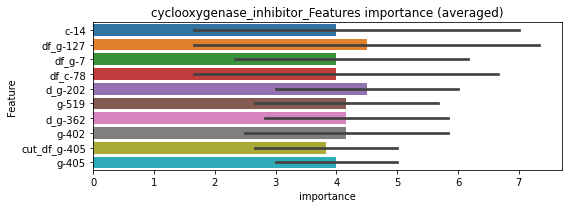

len(train_index) : 3429
len(valid_index) : 3430
================================= fold 1/2 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0276156	valid_1's binary_logloss: 0.0885528
[200]	training's binary_logloss: 0.00855905	valid_1's binary_logloss: 0.0803933
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00919224	valid_1's binary_logloss: 0.0800352


len(train_index) : 3430
len(valid_index) : 3429
================================= fold 2/2 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.024533	valid_1's binary_logloss: 0.0840921
[200]	training's binary_logloss: 0.00746976	valid_1's binary_logloss: 0.0778326
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00805465	valid_1's binary_logloss: 0.0774913


cyclooxygenase_inhibitor logloss: 0.0787634368532244


neg labels: 3289 → selected neg labels: 3274


cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3274, target_rate: 0.0043672 → Adj_target_rate: 0.0043519
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0307447	valid_1's binary_logloss: 0.120333
Early stopping, best iteration is:
[149]	training's binary_logloss: 0.0126624	valid_1's binary_logloss: 0.114425
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0391197	valid_1's binary_logloss: 0.0948242
[200]	training's binary_logloss: 0.00817482	valid_1's binary_logloss: 0.0794703
Early stopping, best iteration is:
[219]	training's binary_logloss: 0.00637862	valid_1's binary_logloss: 0.0785127


1 / 3 AUC score:0.992
y_Threshold: 0.0201678, Threshold: 0.0212727, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 168 → Positive_corect_labels: 636/3760
p_label_rate: 0.0200904 Vs.target_rate: 0.00437
Num_p_label: 80.0, conf_0:0.01915, conf_1:0.02340
Num_p_label: 80.0, Expected: 17.4, Adj_threshold_1: 0.0212727
Num_p_label: 13.0, Expected: 17.4, Adj_threshold_2: 0.0312727
threshold: 0.0312727, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 636.0/3760, y_label_rate: 0.1691489
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0295369	valid_1's binary_logloss: 0.0972743
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.008551	valid_1's binary_logloss: 0.0863351
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0310409	valid_1's binary_logloss: 0.0944454
[200]	training's binary_logloss: 0.0059758	valid_1's binary_logloss: 0.0812154
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.00680873	valid_1's binary_logloss: 0.081032


2 / 3 AUC score:0.996
y_Threshold: 0.0276576, Threshold: 0.0312727, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 44 → Positive_corect_labels: 614.0/3716
p_label_rate: 0.0027624 Vs.target_rate: 0.00437
Num_p_label: 11.0, conf_0:0.02815, conf_1:0.03440
threshold: 0.0312727, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 614.0/3716, y_label_rate: 0.1652314
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0256457	valid_1's binary_logloss: 0.0836214
Early stopping, best iteration is:
[165]	training's binary_logloss: 0.00749966	valid_1's binary_logloss: 0.0729603
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0263143	valid_1's binary_logloss: 0.0783195
[200]	training's binary_logloss: 0.00491127	valid_1's binary_logloss: 0.0652464
Early stopping, best iteration is:
[205]	training's binary_logloss: 0.00460943	valid_1's binary_logloss: 0.0648688


3 / 3 AUC score:0.999
y_Threshold: 0.0227572, Threshold: 0.0312727, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 34 → Positive_corect_labels: 597.0/3682
p_label_rate: 0.0007534 Vs.target_rate: 0.00437
Num_p_label: 3.0, conf_0:0.02815, conf_1:0.03440
Num_p_label: 3.0, Expected: 17.4, Adj_threshold_1: 0.0312727
Num_p_label: 15.0, Expected: 17.4, Adj_threshold_2: 0.0212727
threshold: 0.0212727, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 612.0/7664, y_label_rate: 0.0798539


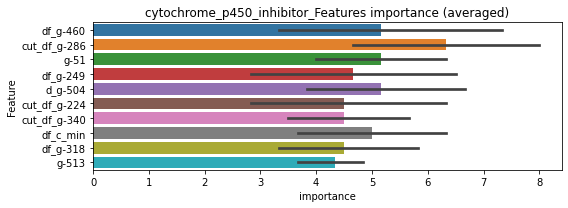

len(train_index) : 3832
len(valid_index) : 3832
================================= fold 1/2 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0288514	valid_1's binary_logloss: 0.0652336
[200]	training's binary_logloss: 0.00721937	valid_1's binary_logloss: 0.0499429
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.00415561	valid_1's binary_logloss: 0.0480849


len(train_index) : 3832
len(valid_index) : 3832
================================= fold 2/2 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0317232	valid_1's binary_logloss: 0.0551266
[200]	training's binary_logloss: 0.00846586	valid_1's binary_logloss: 0.0368917
[300]	training's binary_logloss: 0.00298774	valid_1's binary_logloss: 0.0327967
Early stopping, best iteration is:
[320]	training's binary_logloss: 0.00254485	valid_1's binary_logloss: 0.0325793


cytochrome_p450_inhibitor logloss: 0.040332100830314334


neg labels: 3289 → selected neg labels: 3283


dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0102075	valid_1's binary_logloss: 0.0275643
[200]	training's binary_logloss: 0.00145607	valid_1's binary_logloss: 0.0179278
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00156288	valid_1's binary_logloss: 0.0178292
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0111971	valid_1's binary_logloss: 0.0245368
[200]	training's binary_logloss: 0.00160798	valid_1's binary_logloss: 0.0127566
[300]	training's binary_logloss: 0.000712784	valid_1's binary_logloss: 0.0112408
Early stopping, best iteration is:
[318]	training's binary_logloss: 0.000652023	valid_1's binary_logloss: 0.0110061


1 / 3 AUC score:1.000
y_Threshold: 0.0030031, Threshold: 0.0036483, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00328, conf_1:0.00401
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0036483
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_2: 0.0136483
threshold: 0.0136483, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0101812	valid_1's binary_logloss: 0.0286894
[200]	training's binary_logloss: 0.00145787	valid_1's binary_logloss: 0.0189255
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.000758596	valid_1's binary_logloss: 0.0180014
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.011099	valid_1's binary_logloss: 0.0235571
[200]	training's binary_logloss: 0.00155472	valid_1's binary_logloss: 0.011767
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.000840385	valid_1's binary_logloss: 0.0106736


2 / 3 AUC score:1.000
y_Threshold: 0.0131490, Threshold: 0.0136483, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0072828 Vs.target_rate: 0.00151
Num_p_label: 29.0, conf_0:0.01228, conf_1:0.01501
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_1: 0.0136483
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.0236483
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_3: 0.0336483
threshold: 0.0336483, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0102424	valid_1's binary_logloss: 0.0237261
[200]	training's binary_logloss: 0.00144576	valid_1's binary_logloss: 0.01397
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.000964099	valid_1's binary_logloss: 0.0131164
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0100493	valid_1's binary_logloss: 0.0240284
[200]	training's binary_logloss: 0.00143452	valid_1's binary_logloss: 0.0144942
[300]	training's binary_logloss: 0.000647832	valid_1's binary_logloss: 0.0135098
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.000670738	valid_1's binary_logloss: 0.0134452


3 / 3 AUC score:1.000
y_Threshold: 0.0168795, Threshold: 0.0336483, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, conf_0:0.03028, conf_1:0.03701
threshold: 0.0336483, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 663.0/7783, y_label_rate: 0.0851857


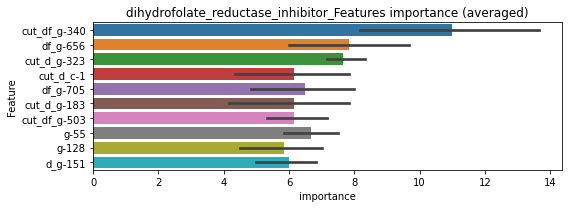

len(train_index) : 3891
len(valid_index) : 3892
================================= fold 1/2 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0178107	valid_1's binary_logloss: 0.0287907
[200]	training's binary_logloss: 0.00314015	valid_1's binary_logloss: 0.0141518
[300]	training's binary_logloss: 0.00099017	valid_1's binary_logloss: 0.0119736
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.000638932	valid_1's binary_logloss: 0.0115294


len(train_index) : 3892
len(valid_index) : 3891
================================= fold 2/2 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0179014	valid_1's binary_logloss: 0.0292965
[200]	training's binary_logloss: 0.00318326	valid_1's binary_logloss: 0.0137676
[300]	training's binary_logloss: 0.00101031	valid_1's binary_logloss: 0.0106266
[400]	training's binary_logloss: 0.000504568	valid_1's binary_logloss: 0.00959083
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000422154	valid_1's binary_logloss: 0.00926812


dihydrofolate_reductase_inhibitor logloss: 0.010398909203587565


neg labels: 3289 → selected neg labels: 3285


dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00853064	valid_1's binary_logloss: 0.0302203
[200]	training's binary_logloss: 0.00118952	valid_1's binary_logloss: 0.0231665
Early stopping, best iteration is:
[205]	training's binary_logloss: 0.00111821	valid_1's binary_logloss: 0.0228966
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0107729	valid_1's binary_logloss: 0.0178719
[200]	training's binary_logloss: 0.00151424	valid_1's binary_logloss: 0.00818899
[300]	training's binary_logloss: 0.000638911	valid_1's binary_logloss: 0.00680997
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.000556019	valid_1's binary_logloss: 0.00659208


1 / 3 AUC score:1.000
y_Threshold: 0.0017821, Threshold: 0.0017786, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00105
Num_p_label: 80.0, conf_0:0.00160, conf_1:0.00196
Num_p_label: 80.0, Expected: 4.2, Adj_threshold_1: 0.0017786
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_2: 0.0117786
threshold: 0.0117786, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00869539	valid_1's binary_logloss: 0.0298069
[200]	training's binary_logloss: 0.00121414	valid_1's binary_logloss: 0.0219118
Early stopping, best iteration is:
[205]	training's binary_logloss: 0.00114154	valid_1's binary_logloss: 0.0216214
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0107381	valid_1's binary_logloss: 0.0186106
[200]	training's binary_logloss: 0.00154195	valid_1's binary_logloss: 0.00886605
[300]	training's binary_logloss: 0.000651809	valid_1's binary_logloss: 0.00724749
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000601169	valid_1's binary_logloss: 0.00709967


2 / 3 AUC score:1.000
y_Threshold: 0.0068736, Threshold: 0.0117786, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, conf_0:0.01060, conf_1:0.01296
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0117786
Num_p_label: 142.0, Expected: 4.2, Adj_threshold_2: 0.0017786
threshold: 0.0017786, positive_p_label: 142.0/3982, p_label_rate: 0.0356605
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00869539	valid_1's binary_logloss: 0.0298069
[200]	training's binary_logloss: 0.00121414	valid_1's binary_logloss: 0.0219118
Early stopping, best iteration is:
[205]	training's binary_logloss: 0.00114154	valid_1's binary_logloss: 0.0216214
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0107381	valid_1's binary_logloss: 0.0186106
[200]	training's binary_logloss: 0.00154195	valid_1's binary_logloss: 0.00886605
[300]	training's binary_logloss: 0.000651809	valid_1's binary_logloss: 0.00724749
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000601169	valid_1's binary_logloss: 0.00709967


3 / 3 AUC score:1.000
y_Threshold: 0.0068736, Threshold: 0.0017786, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0356605 Vs.target_rate: 0.00105
Num_p_label: 142.0, conf_0:0.00160, conf_1:0.00196
Num_p_label: 142.0, Expected: 4.2, Adj_threshold_1: 0.0017786
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_2: 0.0117786
threshold: 0.0117786, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7792, y_label_rate: 0.0843172


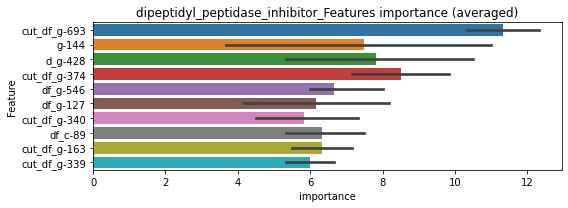

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0158204	valid_1's binary_logloss: 0.0294588
[200]	training's binary_logloss: 0.00250271	valid_1's binary_logloss: 0.0146962
[300]	training's binary_logloss: 0.000753516	valid_1's binary_logloss: 0.0127805
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.000701896	valid_1's binary_logloss: 0.0127297


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0178343	valid_1's binary_logloss: 0.0227991
[200]	training's binary_logloss: 0.00309402	valid_1's binary_logloss: 0.00744123
[300]	training's binary_logloss: 0.000939292	valid_1's binary_logloss: 0.00474808
[400]	training's binary_logloss: 0.000458694	valid_1's binary_logloss: 0.00395846
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000332696	valid_1's binary_logloss: 0.0037089


dipeptidyl_peptidase_inhibitor logloss: 0.008219280366899288


neg labels: 3289 → selected neg labels: 3288


diuretic, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00343206	valid_1's binary_logloss: 0.00556037
[200]	training's binary_logloss: 0.000352385	valid_1's binary_logloss: 0.00170883
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.000245716	valid_1's binary_logloss: 0.00158909
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00362149	valid_1's binary_logloss: 0.00422556
[200]	training's binary_logloss: 0.000373742	valid_1's binary_logloss: 0.000727637
[300]	training's binary_logloss: 0.000233823	valid_1's binary_logloss: 0.000564803
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.000235374	valid_1's binary_logloss: 0.000563288


1 / 3 AUC score:1.000
y_Threshold: 0.0003645, Threshold: 0.0004315, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00039, conf_1:0.00047
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0004315
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0104315
threshold: 0.0104315, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00350212	valid_1's binary_logloss: 0.00547869
[200]	training's binary_logloss: 0.000361504	valid_1's binary_logloss: 0.00146192
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.000234174	valid_1's binary_logloss: 0.00129237
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00363339	valid_1's binary_logloss: 0.00441014
[200]	training's binary_logloss: 0.000380527	valid_1's binary_logloss: 0.000889685
[300]	training's binary_logloss: 0.000238701	valid_1's binary_logloss: 0.000737386
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000233816	valid_1's binary_logloss: 0.000731474


2 / 3 AUC score:1.000
y_Threshold: 0.0528971, Threshold: 0.0104315, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00025
Num_p_label: 0.0, conf_0:0.00939, conf_1:0.01147
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0104315
Num_p_label: 118.0, Expected: 1.0, Adj_threshold_2: 0.0004315
threshold: 0.0004315, positive_p_label: 118.0/3982, p_label_rate: 0.0296334
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00350212	valid_1's binary_logloss: 0.00547869
[200]	training's binary_logloss: 0.000361504	valid_1's binary_logloss: 0.00146192
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.000234174	valid_1's binary_logloss: 0.00129237
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00363339	valid_1's binary_logloss: 0.00441014
[200]	training's binary_logloss: 0.000380527	valid_1's binary_logloss: 0.000889685
[300]	training's binary_logloss: 0.000238701	valid_1's binary_logloss: 0.000737386
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000233816	valid_1's binary_logloss: 0.000731474


3 / 3 AUC score:1.000
y_Threshold: 0.0528971, Threshold: 0.0004315, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0296334 Vs.target_rate: 0.00025
Num_p_label: 118.0, conf_0:0.00039, conf_1:0.00047
Num_p_label: 118.0, Expected: 1.0, Adj_threshold_1: 0.0004315
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0104315
threshold: 0.0104315, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7795, y_label_rate: 0.0842848


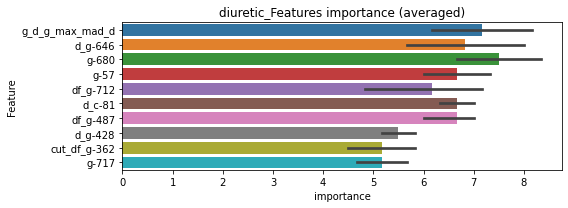

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 diuretic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00941032	valid_1's binary_logloss: 0.0111403
[200]	training's binary_logloss: 0.000867305	valid_1's binary_logloss: 0.00193547
[300]	training's binary_logloss: 0.000223207	valid_1's binary_logloss: 0.00112982
[400]	training's binary_logloss: 0.000131098	valid_1's binary_logloss: 0.000999981
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000131941	valid_1's binary_logloss: 0.000998939


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 diuretic=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00971995	valid_1's binary_logloss: 0.0108432
[200]	training's binary_logloss: 0.000930776	valid_1's binary_logloss: 0.00177653
[300]	training's binary_logloss: 0.000241184	valid_1's binary_logloss: 0.000898556
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000145826	valid_1's binary_logloss: 0.000778572


diuretic logloss: 0.000888769848513421


neg labels: 3289 → selected neg labels: 3281


dna_alkylating_agent, len(trt): 48, len(othr): 3281, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0146961	valid_1's binary_logloss: 0.0550962
Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00273836	valid_1's binary_logloss: 0.044607
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.016755	valid_1's binary_logloss: 0.0407026
[200]	training's binary_logloss: 0.00281874	valid_1's binary_logloss: 0.028626
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00172311	valid_1's binary_logloss: 0.0273814


1 / 3 AUC score:1.000
y_Threshold: 0.0064146, Threshold: 0.0075929, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0200904 Vs.target_rate: 0.00202
Num_p_label: 80.0, conf_0:0.00683, conf_1:0.00835
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_1: 0.0075929
Num_p_label: 10.0, Expected: 8.0, Adj_threshold_2: 0.0175929
threshold: 0.0175929, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0160136	valid_1's binary_logloss: 0.0505993
[200]	training's binary_logloss: 0.00255689	valid_1's binary_logloss: 0.0385509
Early stopping, best iteration is:
[236]	training's binary_logloss: 0.00167477	valid_1's binary_logloss: 0.0369697
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0150396	valid_1's binary_logloss: 0.0464836
[200]	training's binary_logloss: 0.00247494	valid_1's binary_logloss: 0.0369421
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00159326	valid_1's binary_logloss: 0.0359543


2 / 3 AUC score:0.999
y_Threshold: 0.0135799, Threshold: 0.0175929, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0040181 Vs.target_rate: 0.00202
Num_p_label: 16.0, conf_0:0.01583, conf_1:0.01935
threshold: 0.0175929, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3787, y_label_rate: 0.1708476
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0138853	valid_1's binary_logloss: 0.0441449
[200]	training's binary_logloss: 0.00223794	valid_1's binary_logloss: 0.0331363
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00128435	valid_1's binary_logloss: 0.0315153
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0146617	valid_1's binary_logloss: 0.0383185
[200]	training's binary_logloss: 0.00231442	valid_1's binary_logloss: 0.0264691
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00134854	valid_1's binary_logloss: 0.0253293


3 / 3 AUC score:1.000
y_Threshold: 0.0134523, Threshold: 0.0175929, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 646.0/3785
p_label_rate: 0.0050226 Vs.target_rate: 0.00202
Num_p_label: 20.0, conf_0:0.01583, conf_1:0.01935
threshold: 0.0175929, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 666.0/7767, y_label_rate: 0.0857474


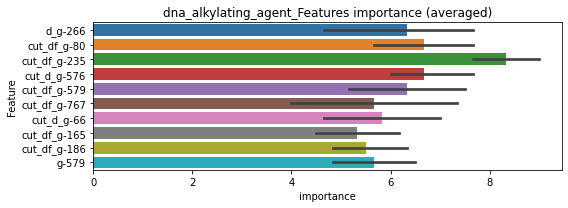

len(train_index) : 3883
len(valid_index) : 3884
================================= fold 1/2 dna_alkylating_agent=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0235147	valid_1's binary_logloss: 0.0449643
[200]	training's binary_logloss: 0.00487771	valid_1's binary_logloss: 0.0295543
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.00231412	valid_1's binary_logloss: 0.0282492


len(train_index) : 3884
len(valid_index) : 3883
================================= fold 2/2 dna_alkylating_agent=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0246765	valid_1's binary_logloss: 0.0435675
[200]	training's binary_logloss: 0.00549151	valid_1's binary_logloss: 0.0255168
[300]	training's binary_logloss: 0.00176902	valid_1's binary_logloss: 0.0217039
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.00145593	valid_1's binary_logloss: 0.0214479


dna_alkylating_agent logloss: 0.024848994537793365


neg labels: 3289 → selected neg labels: 3229


dna_inhibitor, len(trt): 402, len(othr): 3229, target_rate: 0.0168808 → Adj_target_rate: 0.0137338
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.100875	valid_1's binary_logloss: 0.340924
Early stopping, best iteration is:
[121]	training's binary_logloss: 0.0790388	valid_1's binary_logloss: 0.339951
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.104109	valid_1's binary_logloss: 0.33417
Early stopping, best iteration is:
[129]	training's binary_logloss: 0.0728458	valid_1's binary_logloss: 0.330383


1 / 3 AUC score:0.805
y_Threshold: 0.1097209, Threshold: 0.1732913, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 632 → Positive_corect_labels: 394/3242
p_label_rate: 0.0200904 Vs.target_rate: 0.01688
Num_p_label: 80.0, conf_0:0.15596, conf_1:0.19062
threshold: 0.1732913, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 394.0/3242, y_label_rate: 0.1215299
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.038936	valid_1's binary_logloss: 0.200624
Early stopping, best iteration is:
[116]	training's binary_logloss: 0.0297049	valid_1's binary_logloss: 0.198789
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0467653	valid_1's binary_logloss: 0.188436
Early stopping, best iteration is:
[114]	training's binary_logloss: 0.0377256	valid_1's binary_logloss: 0.182976


2 / 3 AUC score:0.929
y_Threshold: 0.0795259, Threshold: 0.1732913, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 180 → Positive_corect_labels: 304.0/3062
p_label_rate: 0.0293822 Vs.target_rate: 0.01688
Num_p_label: 117.0, conf_0:0.15596, conf_1:0.19062
threshold: 0.1732913, positive_p_label: 117.0/3982, p_label_rate: 0.0293822
positive_y_label: 304.0/3062, y_label_rate: 0.0992815
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0216454	valid_1's binary_logloss: 0.0957146
[200]	training's binary_logloss: 0.00447984	valid_1's binary_logloss: 0.0780836
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00495801	valid_1's binary_logloss: 0.0778649
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0206001	valid_1's binary_logloss: 0.106075
Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00494277	valid_1's binary_logloss: 0.0914011


3 / 3 AUC score:0.994
y_Threshold: 0.0421690, Threshold: 0.1732913, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 42 → Positive_corect_labels: 283.0/3020
p_label_rate: 0.0514817 Vs.target_rate: 0.01688
Num_p_label: 205.0, conf_0:0.15596, conf_1:0.19062
Num_p_label: 205.0, Expected: 67.2, Adj_threshold_1: 0.1732913
Num_p_label: 202.0, Expected: 67.2, Adj_threshold_2: 0.1832913
Num_p_label: 194.0, Expected: 67.2, Adj_threshold_3: 0.1932913
Num_p_label: 190.0, Expected: 67.2, Adj_threshold_4: 0.2032913
Num_p_label: 184.0, Expected: 67.2, Adj_threshold_5: 0.2132913
Num_p_label: 180.0, Expected: 67.2, Adj_threshold_6: 0.2232913
Num_p_label: 176.0, Expected: 67.2, Adj_threshold_7: 0.2332913
Num_p_label: 173.0, Expected: 67.2, Adj_threshold_8: 0.2432913
Num_p_label: 171.0, Expected: 67.2, Adj_threshold_9: 0.2532913
Num_p_label: 164.0, Expected: 67.2, Adj_threshold_10: 0.2632913
threshold: 0.2732913, positive_p_label: 158.0/3982, p_label_rate: 0.0396786
positive_y_label: 441.0/7002, y_label_ra

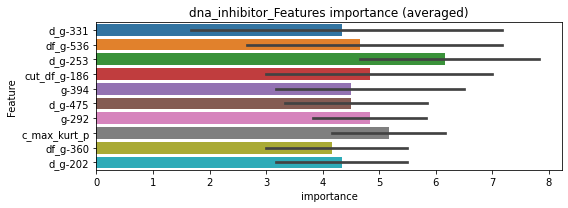

len(train_index) : 3501
len(valid_index) : 3501
================================= fold 1/2 dna_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0271244	valid_1's binary_logloss: 0.0702801
[200]	training's binary_logloss: 0.00753642	valid_1's binary_logloss: 0.0527846
[300]	training's binary_logloss: 0.00288301	valid_1's binary_logloss: 0.047514
[400]	training's binary_logloss: 0.00145987	valid_1's binary_logloss: 0.0450066
[500]	training's binary_logloss: 0.000917267	valid_1's binary_logloss: 0.0435101
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000906536	valid_1's binary_logloss: 0.0435098


len(train_index) : 3501
len(valid_index) : 3501
================================= fold 2/2 dna_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0289943	valid_1's binary_logloss: 0.0758262
[200]	training's binary_logloss: 0.00794579	valid_1's binary_logloss: 0.0593272
[300]	training's binary_logloss: 0.0030766	valid_1's binary_logloss: 0.0546249
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00195077	valid_1's binary_logloss: 0.0524895


dna_inhibitor logloss: 0.04799966119046102


neg labels: 3289 → selected neg labels: 3267


dopamine_receptor_agonist, len(trt): 121, len(othr): 3267, target_rate: 0.0050810 → Adj_target_rate: 0.0049495
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0366784	valid_1's binary_logloss: 0.13538
Early stopping, best iteration is:
[162]	training's binary_logloss: 0.0131334	valid_1's binary_logloss: 0.129255
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0420593	valid_1's binary_logloss: 0.120204
Early stopping, best iteration is:
[175]	training's binary_logloss: 0.0128229	valid_1's binary_logloss: 0.10902


1 / 3 AUC score:0.980
y_Threshold: 0.0271277, Threshold: 0.0313221, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 223 → Positive_corect_labels: 607/3697
p_label_rate: 0.0200904 Vs.target_rate: 0.00508
Num_p_label: 80.0, conf_0:0.02819, conf_1:0.03445
Num_p_label: 80.0, Expected: 20.2, Adj_threshold_1: 0.0313221
Num_p_label: 25.0, Expected: 20.2, Adj_threshold_2: 0.0413221
threshold: 0.0413221, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 607.0/3697, y_label_rate: 0.1641872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.028915	valid_1's binary_logloss: 0.0992539
Early stopping, best iteration is:
[167]	training's binary_logloss: 0.00898527	valid_1's binary_logloss: 0.0908011
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0325719	valid_1's binary_logloss: 0.0859239
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00756115	valid_1's binary_logloss: 0.0741348


2 / 3 AUC score:0.994
y_Threshold: 0.0259359, Threshold: 0.0413221, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 48 → Positive_corect_labels: 583.0/3649
p_label_rate: 0.0002511 Vs.target_rate: 0.00508
Num_p_label: 1.0, conf_0:0.03719, conf_1:0.04545
Num_p_label: 1.0, Expected: 20.2, Adj_threshold_1: 0.0413221
Num_p_label: 12.0, Expected: 20.2, Adj_threshold_2: 0.0313221
threshold: 0.0313221, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 583.0/3649, y_label_rate: 0.1597698
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0234165	valid_1's binary_logloss: 0.0722538
Early stopping, best iteration is:
[159]	training's binary_logloss: 0.0078849	valid_1's binary_logloss: 0.0629569
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0267603	valid_1's binary_logloss: 0.0714496
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00619627	valid_1's binary_logloss: 0.0576809


3 / 3 AUC score:0.998
y_Threshold: 0.0239864, Threshold: 0.0313221, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 30 → Positive_corect_labels: 568.0/3619
p_label_rate: 0.0017579 Vs.target_rate: 0.00508
Num_p_label: 7.0, conf_0:0.02819, conf_1:0.03445
threshold: 0.0313221, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 575.0/7601, y_label_rate: 0.0756479


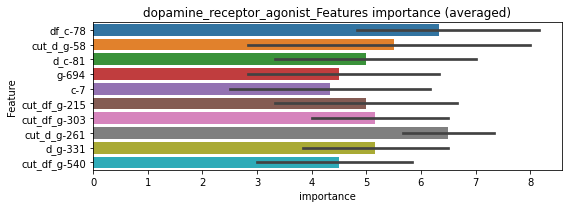

len(train_index) : 3800
len(valid_index) : 3801
================================= fold 1/2 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0252511	valid_1's binary_logloss: 0.060063
[200]	training's binary_logloss: 0.00576986	valid_1's binary_logloss: 0.045071
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.00337319	valid_1's binary_logloss: 0.0441385


len(train_index) : 3801
len(valid_index) : 3800
================================= fold 2/2 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0318962	valid_1's binary_logloss: 0.0454479
[200]	training's binary_logloss: 0.0086935	valid_1's binary_logloss: 0.024328
[300]	training's binary_logloss: 0.00313006	valid_1's binary_logloss: 0.0197814
[400]	training's binary_logloss: 0.00148681	valid_1's binary_logloss: 0.0187298
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00108291	valid_1's binary_logloss: 0.0183976


dopamine_receptor_agonist logloss: 0.031269736937999726


neg labels: 3289 → selected neg labels: 3221


dopamine_receptor_antagonist, len(trt): 424, len(othr): 3221, target_rate: 0.0178047 → Adj_target_rate: 0.0143701
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.112265	valid_1's binary_logloss: 0.356375
Early stopping, best iteration is:
[94]	training's binary_logloss: 0.119786	valid_1's binary_logloss: 0.355936
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.110963	valid_1's binary_logloss: 0.349946
Early stopping, best iteration is:
[112]	training's binary_logloss: 0.0966367	valid_1's binary_logloss: 0.348027


1 / 3 AUC score:0.776
y_Threshold: 0.1396001, Threshold: 0.1805416, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 721 → Positive_corect_labels: 348/3144
p_label_rate: 0.0200904 Vs.target_rate: 0.01780
Num_p_label: 80.0, conf_0:0.16249, conf_1:0.19860
threshold: 0.1805416, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 348.0/3144, y_label_rate: 0.1106870
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0410611	valid_1's binary_logloss: 0.191782
Early stopping, best iteration is:
[119]	training's binary_logloss: 0.0302147	valid_1's binary_logloss: 0.190395
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0451225	valid_1's binary_logloss: 0.177919
Early stopping, best iteration is:
[147]	training's binary_logloss: 0.0219468	valid_1's binary_logloss: 0.17147


2 / 3 AUC score:0.933
y_Threshold: 0.0697265, Threshold: 0.1805416, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 170 → Positive_corect_labels: 263.0/2974
p_label_rate: 0.0000000 Vs.target_rate: 0.01780
Num_p_label: 0.0, conf_0:0.16249, conf_1:0.19860
Num_p_label: 0.0, Expected: 70.9, Adj_threshold_1: 0.1805416
Num_p_label: 0.0, Expected: 70.9, Adj_threshold_2: 0.1705416
Num_p_label: 0.0, Expected: 70.9, Adj_threshold_3: 0.1605416
Num_p_label: 0.0, Expected: 70.9, Adj_threshold_4: 0.1505416
Num_p_label: 2.0, Expected: 70.9, Adj_threshold_5: 0.1405416
Num_p_label: 3.0, Expected: 70.9, Adj_threshold_6: 0.1305416
Num_p_label: 3.0, Expected: 70.9, Adj_threshold_7: 0.1205416
Num_p_label: 8.0, Expected: 70.9, Adj_threshold_8: 0.1105416
Num_p_label: 17.0, Expected: 70.9, Adj_threshold_9: 0.1005416
Num_p_label: 27.0, Expected: 70.9, Adj_threshold_10: 0.0905416
threshold: 0.0805416, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 263.0/2974, y_label_rate: 0.0884331
======

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0212792	valid_1's binary_logloss: 0.106905
Early stopping, best iteration is:
[179]	training's binary_logloss: 0.00556594	valid_1's binary_logloss: 0.0985361
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0230518	valid_1's binary_logloss: 0.11429
Early stopping, best iteration is:
[114]	training's binary_logloss: 0.0177014	valid_1's binary_logloss: 0.110366


3 / 3 AUC score:0.981
y_Threshold: 0.0355637, Threshold: 0.0805416, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 62 → Positive_corect_labels: 232.0/2912
p_label_rate: 0.0000000 Vs.target_rate: 0.01780
Num_p_label: 0.0, conf_0:0.07249, conf_1:0.08860
Num_p_label: 0.0, Expected: 70.9, Adj_threshold_1: 0.0805416
Num_p_label: 1.0, Expected: 70.9, Adj_threshold_2: 0.0705416
Num_p_label: 2.0, Expected: 70.9, Adj_threshold_3: 0.0605416
Num_p_label: 6.0, Expected: 70.9, Adj_threshold_4: 0.0505416
Num_p_label: 14.0, Expected: 70.9, Adj_threshold_5: 0.0405416
Num_p_label: 58.0, Expected: 70.9, Adj_threshold_6: 0.0305416
threshold: 0.0305416, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 290.0/6894, y_label_rate: 0.0420656


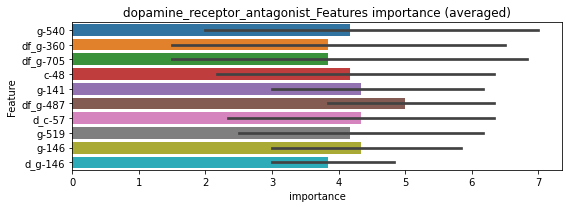

len(train_index) : 3447
len(valid_index) : 3447
================================= fold 1/2 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0259264	valid_1's binary_logloss: 0.0909737
Early stopping, best iteration is:
[162]	training's binary_logloss: 0.0119075	valid_1's binary_logloss: 0.0855715


len(train_index) : 3447
len(valid_index) : 3447
================================= fold 2/2 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0293725	valid_1's binary_logloss: 0.0786488
[200]	training's binary_logloss: 0.00908451	valid_1's binary_logloss: 0.0672894
Early stopping, best iteration is:
[208]	training's binary_logloss: 0.00834226	valid_1's binary_logloss: 0.0669165


dopamine_receptor_antagonist logloss: 0.07624397436866204


neg labels: 3289 → selected neg labels: 3264


egfr_inhibitor, len(trt): 336, len(othr): 3264, target_rate: 0.0141093 → Adj_target_rate: 0.0117920
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0336904	valid_1's binary_logloss: 0.129766
[200]	training's binary_logloss: 0.0061954	valid_1's binary_logloss: 0.105455
Early stopping, best iteration is:
[215]	training's binary_logloss: 0.00519902	valid_1's binary_logloss: 0.104783
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0350725	valid_1's binary_logloss: 0.126444
[200]	training's binary_logloss: 0.0070082	valid_1's binary_logloss: 0.100963
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.00299054	valid_1's binary_logloss: 0.0962451


1 / 3 AUC score:0.986
y_Threshold: 0.0271946, Threshold: 0.1558697, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 192 → Positive_corect_labels: 622/3724
p_label_rate: 0.0200904 Vs.target_rate: 0.01411
Num_p_label: 80.0, conf_0:0.14028, conf_1:0.17146
threshold: 0.1558697, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 622.0/3724, y_label_rate: 0.1670247
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.024117	valid_1's binary_logloss: 0.104399
[200]	training's binary_logloss: 0.00389524	valid_1's binary_logloss: 0.0762603
Early stopping, best iteration is:
[215]	training's binary_logloss: 0.00324609	valid_1's binary_logloss: 0.0745362
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0283696	valid_1's binary_logloss: 0.0849239
[200]	training's binary_logloss: 0.0049306	valid_1's binary_logloss: 0.052723
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.0020757	valid_1's binary_logloss: 0.0460475


2 / 3 AUC score:0.998
y_Threshold: 0.0708604, Threshold: 0.1558697, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 40 → Positive_corect_labels: 602.0/3684
p_label_rate: 0.0288800 Vs.target_rate: 0.01411
Num_p_label: 115.0, conf_0:0.14028, conf_1:0.17146
threshold: 0.1558697, positive_p_label: 115.0/3982, p_label_rate: 0.0288800
positive_y_label: 602.0/3684, y_label_rate: 0.1634093
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0246673	valid_1's binary_logloss: 0.076009
[200]	training's binary_logloss: 0.00405127	valid_1's binary_logloss: 0.0424781
[300]	training's binary_logloss: 0.00149412	valid_1's binary_logloss: 0.0341086
[400]	training's binary_logloss: 0.000880831	valid_1's binary_logloss: 0.0312538
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000732632	valid_1's binary_logloss: 0.0300415
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0242283	valid_1's binary_logloss: 0.0885646
[200]	training's binary_logloss: 0.00394965	valid_1's binary_logloss: 0.0568742
[300]	training's binary_logloss: 0.00148584	valid_1's binary_logloss: 0.0498428
[400]	training's binary_logloss: 0.000872993	valid_1's binary_logloss: 0.0455585
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000753937	valid_1's binary_logloss: 0.0445643


3 / 3 AUC score:1.000
y_Threshold: 0.0618916, Threshold: 0.1558697, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 596.0/3672
p_label_rate: 0.0283777 Vs.target_rate: 0.01411
Num_p_label: 113.0, conf_0:0.14028, conf_1:0.17146
threshold: 0.1558697, positive_p_label: 113.0/3982, p_label_rate: 0.0283777
positive_y_label: 709.0/7654, y_label_rate: 0.0926313


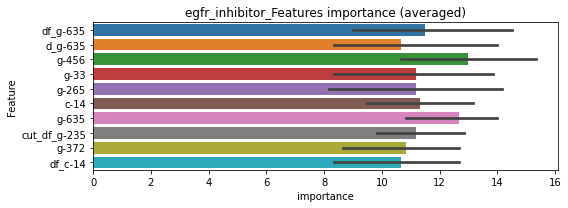

len(train_index) : 3827
len(valid_index) : 3827
================================= fold 1/2 egfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.037457	valid_1's binary_logloss: 0.0907487
[200]	training's binary_logloss: 0.00924424	valid_1's binary_logloss: 0.0636198
[300]	training's binary_logloss: 0.00323138	valid_1's binary_logloss: 0.054075
[400]	training's binary_logloss: 0.00154728	valid_1's binary_logloss: 0.0500169
[500]	training's binary_logloss: 0.000927593	valid_1's binary_logloss: 0.0469229
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00070228	valid_1's binary_logloss: 0.0456071


len(train_index) : 3827
len(valid_index) : 3827
================================= fold 2/2 egfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0401187	valid_1's binary_logloss: 0.0827507
[200]	training's binary_logloss: 0.0100637	valid_1's binary_logloss: 0.0535352
[300]	training's binary_logloss: 0.00352742	valid_1's binary_logloss: 0.0437317
[400]	training's binary_logloss: 0.0016837	valid_1's binary_logloss: 0.0392675
[500]	training's binary_logloss: 0.00100732	valid_1's binary_logloss: 0.0364679
[600]	training's binary_logloss: 0.00070482	valid_1's binary_logloss: 0.0350405
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00061375	valid_1's binary_logloss: 0.0344634


egfr_inhibitor logloss: 0.04003525948003607


neg labels: 3289 → selected neg labels: 3287


elastase_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00540763	valid_1's binary_logloss: 0.0137542
[200]	training's binary_logloss: 0.000669623	valid_1's binary_logloss: 0.00779258
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.000528319	valid_1's binary_logloss: 0.0075581
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00582289	valid_1's binary_logloss: 0.0077383
[200]	training's binary_logloss: 0.000728522	valid_1's binary_logloss: 0.00228958
Early stopping, best iteration is:
[258]	training's binary_logloss: 0.000447644	valid_1's binary_logloss: 0.00189551


1 / 3 AUC score:1.000
y_Threshold: 0.0007998, Threshold: 0.0009530, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00086, conf_1:0.00105
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0009530
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0109530
threshold: 0.0109530, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00548914	valid_1's binary_logloss: 0.0137116
[200]	training's binary_logloss: 0.000667686	valid_1's binary_logloss: 0.00781697
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.000557464	valid_1's binary_logloss: 0.00761052
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00600606	valid_1's binary_logloss: 0.00780309
[200]	training's binary_logloss: 0.000736924	valid_1's binary_logloss: 0.0022401
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.000452112	valid_1's binary_logloss: 0.00185738


2 / 3 AUC score:1.000
y_Threshold: 0.0154490, Threshold: 0.0109530, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, conf_0:0.00986, conf_1:0.01205
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0109530
Num_p_label: 149.0, Expected: 2.0, Adj_threshold_2: 0.0009530
threshold: 0.0009530, positive_p_label: 149.0/3982, p_label_rate: 0.0374184
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00548914	valid_1's binary_logloss: 0.0137116
[200]	training's binary_logloss: 0.000667686	valid_1's binary_logloss: 0.00781697
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.000557464	valid_1's binary_logloss: 0.00761052
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00600606	valid_1's binary_logloss: 0.00780309
[200]	training's binary_logloss: 0.000736924	valid_1's binary_logloss: 0.0022401
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.000452112	valid_1's binary_logloss: 0.00185738


3 / 3 AUC score:1.000
y_Threshold: 0.0154490, Threshold: 0.0009530, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0374184 Vs.target_rate: 0.00050
Num_p_label: 149.0, conf_0:0.00086, conf_1:0.00105
Num_p_label: 149.0, Expected: 2.0, Adj_threshold_1: 0.0009530
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0109530
threshold: 0.0109530, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7794, y_label_rate: 0.0842956


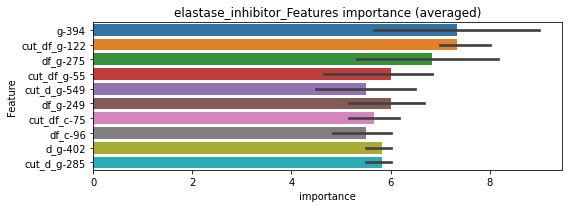

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 elastase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0120193	valid_1's binary_logloss: 0.0181319
[200]	training's binary_logloss: 0.00143933	valid_1's binary_logloss: 0.00670028
[300]	training's binary_logloss: 0.000404891	valid_1's binary_logloss: 0.00551166
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.000324656	valid_1's binary_logloss: 0.0054264


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 elastase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0126038	valid_1's binary_logloss: 0.0144929
[200]	training's binary_logloss: 0.00159985	valid_1's binary_logloss: 0.00315839
[300]	training's binary_logloss: 0.000455685	valid_1's binary_logloss: 0.00186198
[400]	training's binary_logloss: 0.000242192	valid_1's binary_logloss: 0.00157839
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000214268	valid_1's binary_logloss: 0.00154568


elastase_inhibitor logloss: 0.0034860404077432195


neg labels: 3289 → selected neg labels: 3284


erbb2_inhibitor, len(trt): 20, len(othr): 3284, target_rate: 0.0008398 → Adj_target_rate: 0.0010717
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0075747	valid_1's binary_logloss: 0.0214432
[200]	training's binary_logloss: 0.000979385	valid_1's binary_logloss: 0.0144353
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.000517776	valid_1's binary_logloss: 0.0140212
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00855515	valid_1's binary_logloss: 0.0139033
[200]	training's binary_logloss: 0.00114553	valid_1's binary_logloss: 0.00580621
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.000633824	valid_1's binary_logloss: 0.00499883


1 / 3 AUC score:1.000
y_Threshold: 0.0012233, Threshold: 0.0013549, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00084
Num_p_label: 80.0, conf_0:0.00122, conf_1:0.00149
Num_p_label: 80.0, Expected: 3.3, Adj_threshold_1: 0.0013549
Num_p_label: 0.0, Expected: 3.3, Adj_threshold_2: 0.0113549
threshold: 0.0113549, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00768115	valid_1's binary_logloss: 0.0213899
[200]	training's binary_logloss: 0.00100535	valid_1's binary_logloss: 0.0140942
Early stopping, best iteration is:
[223]	training's binary_logloss: 0.000773382	valid_1's binary_logloss: 0.0138804
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00881632	valid_1's binary_logloss: 0.014028
[200]	training's binary_logloss: 0.00118013	valid_1's binary_logloss: 0.00578902
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.000655522	valid_1's binary_logloss: 0.00519687


2 / 3 AUC score:1.000
y_Threshold: 0.0084202, Threshold: 0.0113549, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00084
Num_p_label: 0.0, conf_0:0.01022, conf_1:0.01249
Num_p_label: 0.0, Expected: 3.3, Adj_threshold_1: 0.0113549
Num_p_label: 270.0, Expected: 3.3, Adj_threshold_2: 0.0013549
threshold: 0.0013549, positive_p_label: 270.0/3982, p_label_rate: 0.0678051
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00768115	valid_1's binary_logloss: 0.0213899
[200]	training's binary_logloss: 0.00100535	valid_1's binary_logloss: 0.0140942
Early stopping, best iteration is:
[223]	training's binary_logloss: 0.000773382	valid_1's binary_logloss: 0.0138804
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00881632	valid_1's binary_logloss: 0.014028
[200]	training's binary_logloss: 0.00118013	valid_1's binary_logloss: 0.00578902
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.000655522	valid_1's binary_logloss: 0.00519687


3 / 3 AUC score:1.000
y_Threshold: 0.0084202, Threshold: 0.0013549, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0678051 Vs.target_rate: 0.00084
Num_p_label: 270.0, conf_0:0.00122, conf_1:0.00149
Num_p_label: 270.0, Expected: 3.3, Adj_threshold_1: 0.0013549
Num_p_label: 0.0, Expected: 3.3, Adj_threshold_2: 0.0113549
threshold: 0.0113549, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/7790, y_label_rate: 0.0842105


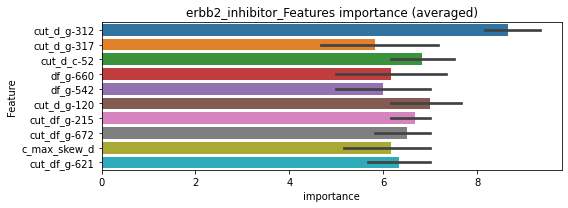

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 erbb2_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0140077	valid_1's binary_logloss: 0.0238759
[200]	training's binary_logloss: 0.00199878	valid_1's binary_logloss: 0.0109881
[300]	training's binary_logloss: 0.000602854	valid_1's binary_logloss: 0.00948232
[400]	training's binary_logloss: 0.000311363	valid_1's binary_logloss: 0.00920347
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.000322001	valid_1's binary_logloss: 0.0091817


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 erbb2_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0154399	valid_1's binary_logloss: 0.0189681
[200]	training's binary_logloss: 0.00238948	valid_1's binary_logloss: 0.00534205
[300]	training's binary_logloss: 0.000723546	valid_1's binary_logloss: 0.00344632
[400]	training's binary_logloss: 0.000367847	valid_1's binary_logloss: 0.00297671
[500]	training's binary_logloss: 0.00026112	valid_1's binary_logloss: 0.00284325
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000256393	valid_1's binary_logloss: 0.00283565


erbb2_inhibitor logloss: 0.006008670602581391


neg labels: 3289 → selected neg labels: 3265


estrogen_receptor_agonist, len(trt): 158, len(othr): 3265, target_rate: 0.0066348 → Adj_target_rate: 0.0062095
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0475521	valid_1's binary_logloss: 0.164128
Early stopping, best iteration is:
[149]	training's binary_logloss: 0.0219639	valid_1's binary_logloss: 0.158372
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0513373	valid_1's binary_logloss: 0.147827
[200]	training's binary_logloss: 0.0117463	valid_1's binary_logloss: 0.135532
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.0133421	valid_1's binary_logloss: 0.134817


1 / 3 AUC score:0.970
y_Threshold: 0.0397670, Threshold: 0.0468682, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 263 → Positive_corect_labels: 587/3655
p_label_rate: 0.0200904 Vs.target_rate: 0.00663
Num_p_label: 80.0, conf_0:0.04218, conf_1:0.05156
Num_p_label: 80.0, Expected: 26.4, Adj_threshold_1: 0.0468682
Num_p_label: 29.0, Expected: 26.4, Adj_threshold_2: 0.0568682
threshold: 0.0568682, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 587.0/3655, y_label_rate: 0.1606019
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.031691	valid_1's binary_logloss: 0.11967
Early stopping, best iteration is:
[139]	training's binary_logloss: 0.0154994	valid_1's binary_logloss: 0.112677
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0383716	valid_1's binary_logloss: 0.100833
[200]	training's binary_logloss: 0.00797075	valid_1's binary_logloss: 0.0893073
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00889169	valid_1's binary_logloss: 0.088909


2 / 3 AUC score:0.990
y_Threshold: 0.0372469, Threshold: 0.0568682, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 72 → Positive_corect_labels: 551.0/3583
p_label_rate: 0.0010045 Vs.target_rate: 0.00663
Num_p_label: 4.0, conf_0:0.05118, conf_1:0.06256
Num_p_label: 4.0, Expected: 26.4, Adj_threshold_1: 0.0568682
Num_p_label: 15.0, Expected: 26.4, Adj_threshold_2: 0.0468682
threshold: 0.0468682, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 551.0/3583, y_label_rate: 0.1537817
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.024017	valid_1's binary_logloss: 0.0856131
Early stopping, best iteration is:
[161]	training's binary_logloss: 0.00791655	valid_1's binary_logloss: 0.0786712
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0281059	valid_1's binary_logloss: 0.0796932
[200]	training's binary_logloss: 0.00544252	valid_1's binary_logloss: 0.0634087
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.00323916	valid_1's binary_logloss: 0.0620545


3 / 3 AUC score:0.997
y_Threshold: 0.0218451, Threshold: 0.0468682, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 26 → Positive_corect_labels: 538.0/3557
p_label_rate: 0.0000000 Vs.target_rate: 0.00663
Num_p_label: 0.0, conf_0:0.04218, conf_1:0.05156
Num_p_label: 0.0, Expected: 26.4, Adj_threshold_1: 0.0468682
Num_p_label: 1.0, Expected: 26.4, Adj_threshold_2: 0.0368682
Num_p_label: 8.0, Expected: 26.4, Adj_threshold_3: 0.0268682
Num_p_label: 73.0, Expected: 26.4, Adj_threshold_4: 0.0168682
threshold: 0.0168682, positive_p_label: 73.0/3982, p_label_rate: 0.0183325
positive_y_label: 611.0/7539, y_label_rate: 0.0810452


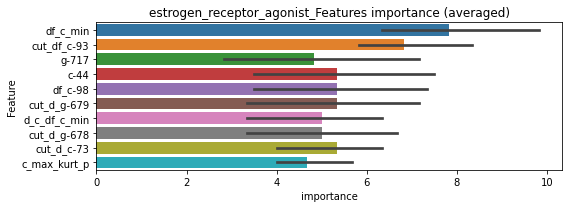

len(train_index) : 3769
len(valid_index) : 3770
================================= fold 1/2 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0456706	valid_1's binary_logloss: 0.0926746
[200]	training's binary_logloss: 0.0142277	valid_1's binary_logloss: 0.0758705
Early stopping, best iteration is:
[231]	training's binary_logloss: 0.0102642	valid_1's binary_logloss: 0.0752393


len(train_index) : 3770
len(valid_index) : 3769
================================= fold 2/2 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0492693	valid_1's binary_logloss: 0.0950922
[200]	training's binary_logloss: 0.0151685	valid_1's binary_logloss: 0.0773373
Early stopping, best iteration is:
[222]	training's binary_logloss: 0.0119369	valid_1's binary_logloss: 0.0762894


estrogen_receptor_agonist logloss: 0.07576427956252033


neg labels: 3289 → selected neg labels: 3283


estrogen_receptor_antagonist, len(trt): 48, len(othr): 3283, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0153652	valid_1's binary_logloss: 0.0568298
Early stopping, best iteration is:
[178]	training's binary_logloss: 0.00330886	valid_1's binary_logloss: 0.0474153
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0187619	valid_1's binary_logloss: 0.0404315
[200]	training's binary_logloss: 0.00315354	valid_1's binary_logloss: 0.0254854
[300]	training's binary_logloss: 0.00121707	valid_1's binary_logloss: 0.0230827
Early stopping, best iteration is:
[305]	training's binary_logloss: 0.00117702	valid_1's binary_logloss: 0.0229412


1 / 3 AUC score:1.000
y_Threshold: 0.0056162, Threshold: 0.0058198, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00202
Num_p_label: 80.0, conf_0:0.00524, conf_1:0.00640
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_1: 0.0058198
Num_p_label: 4.0, Expected: 8.0, Adj_threshold_2: 0.0158198
threshold: 0.0158198, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0169321	valid_1's binary_logloss: 0.0478871
[200]	training's binary_logloss: 0.00268142	valid_1's binary_logloss: 0.0348294
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00289924	valid_1's binary_logloss: 0.0346929
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.017464	valid_1's binary_logloss: 0.044949
[200]	training's binary_logloss: 0.00280441	valid_1's binary_logloss: 0.0319501
Early stopping, best iteration is:
[229]	training's binary_logloss: 0.00196298	valid_1's binary_logloss: 0.0310375


2 / 3 AUC score:1.000
y_Threshold: 0.0170472, Threshold: 0.0158198, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0052737 Vs.target_rate: 0.00202
Num_p_label: 21.0, conf_0:0.01424, conf_1:0.01740
threshold: 0.0158198, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 651.0/3797, y_label_rate: 0.1714511
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0149382	valid_1's binary_logloss: 0.0498467
[200]	training's binary_logloss: 0.00233351	valid_1's binary_logloss: 0.0394038
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.0013743	valid_1's binary_logloss: 0.0385626
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0169226	valid_1's binary_logloss: 0.0392381
[200]	training's binary_logloss: 0.00277549	valid_1's binary_logloss: 0.0264002
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.00129687	valid_1's binary_logloss: 0.0240989


3 / 3 AUC score:1.000
y_Threshold: 0.0151747, Threshold: 0.0158198, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 648.0/3791
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, conf_0:0.01424, conf_1:0.01740
threshold: 0.0158198, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 663.0/7773, y_label_rate: 0.0852953


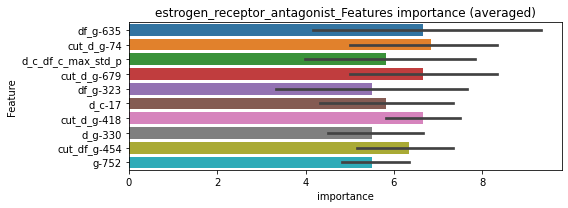

len(train_index) : 3886
len(valid_index) : 3887
================================= fold 1/2 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0241311	valid_1's binary_logloss: 0.0446044
[200]	training's binary_logloss: 0.00516256	valid_1's binary_logloss: 0.0276382
[300]	training's binary_logloss: 0.00174664	valid_1's binary_logloss: 0.0250886
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.00178451	valid_1's binary_logloss: 0.025038


len(train_index) : 3887
len(valid_index) : 3886
================================= fold 2/2 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.024195	valid_1's binary_logloss: 0.047889
[200]	training's binary_logloss: 0.00515258	valid_1's binary_logloss: 0.0304915
[300]	training's binary_logloss: 0.0017336	valid_1's binary_logloss: 0.0269494
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.00119839	valid_1's binary_logloss: 0.0264547


estrogen_receptor_antagonist logloss: 0.025746222266985506


neg labels: 3289 → selected neg labels: 3283


faah_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0104254	valid_1's binary_logloss: 0.0349198
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00191227	valid_1's binary_logloss: 0.0259716
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0124686	valid_1's binary_logloss: 0.0241973
[200]	training's binary_logloss: 0.00184433	valid_1's binary_logloss: 0.0128323
[300]	training's binary_logloss: 0.000790684	valid_1's binary_logloss: 0.0114973
Early stopping, best iteration is:
[303]	training's binary_logloss: 0.000780141	valid_1's binary_logloss: 0.0114959


1 / 3 AUC score:1.000
y_Threshold: 0.0057207, Threshold: 0.0099271, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00893, conf_1:0.01092
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0099271
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_2: 0.0199271
Num_p_label: 7.0, Expected: 6.0, Adj_threshold_3: 0.0299271
threshold: 0.0299271, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0102694	valid_1's binary_logloss: 0.0353468
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00186123	valid_1's binary_logloss: 0.0260506
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0125798	valid_1's binary_logloss: 0.0236475
[200]	training's binary_logloss: 0.00181326	valid_1's binary_logloss: 0.0124
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.000972102	valid_1's binary_logloss: 0.0113543


2 / 3 AUC score:1.000
y_Threshold: 0.0273311, Threshold: 0.0299271, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0085384 Vs.target_rate: 0.00151
Num_p_label: 34.0, conf_0:0.02693, conf_1:0.03292
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_1: 0.0299271
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_2: 0.0399271
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.0499271
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_4: 0.0599271
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_5: 0.0699271
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_6: 0.0799271
threshold: 0.0799271, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0111871	valid_1's binary_logloss: 0.0295712
[200]	training's binary_logloss: 0.00165284	valid_1's binary_logloss: 0.0194503
[300]	training's binary_logloss: 0.000702558	valid_1's binary_logloss: 0.0180815
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.0007206	valid_1's binary_logloss: 0.018072
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0109967	valid_1's binary_logloss: 0.0275998
[200]	training's binary_logloss: 0.00165346	valid_1's binary_logloss: 0.0168588
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.000952327	valid_1's binary_logloss: 0.0153726


3 / 3 AUC score:1.000
y_Threshold: 0.0272088, Threshold: 0.0799271, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0015068 Vs.target_rate: 0.00151
Num_p_label: 6.0, conf_0:0.07193, conf_1:0.08792
threshold: 0.0799271, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 658.0/7781, y_label_rate: 0.0845650


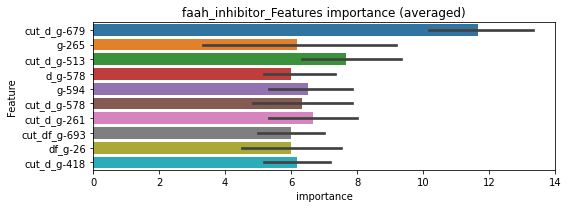

len(train_index) : 3890
len(valid_index) : 3891
================================= fold 1/2 faah_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0180002	valid_1's binary_logloss: 0.0340194
[200]	training's binary_logloss: 0.00313226	valid_1's binary_logloss: 0.0189192
[300]	training's binary_logloss: 0.000994996	valid_1's binary_logloss: 0.0166693
Early stopping, best iteration is:
[318]	training's binary_logloss: 0.000852541	valid_1's binary_logloss: 0.0164314


len(train_index) : 3891
len(valid_index) : 3890
================================= fold 2/2 faah_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0202632	valid_1's binary_logloss: 0.0297962
[200]	training's binary_logloss: 0.00377293	valid_1's binary_logloss: 0.0130464
[300]	training's binary_logloss: 0.00122651	valid_1's binary_logloss: 0.0101236
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000681635	valid_1's binary_logloss: 0.00938574


faah_inhibitor logloss: 0.01290901009792461


neg labels: 3289 → selected neg labels: 3286


farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00523431	valid_1's binary_logloss: 0.00888144
[200]	training's binary_logloss: 0.000584069	valid_1's binary_logloss: 0.0027607
Early stopping, best iteration is:
[268]	training's binary_logloss: 0.000346304	valid_1's binary_logloss: 0.00227596
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00546096	valid_1's binary_logloss: 0.00953622
[200]	training's binary_logloss: 0.000626535	valid_1's binary_logloss: 0.00375394
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.000423945	valid_1's binary_logloss: 0.00337259


1 / 3 AUC score:1.000
y_Threshold: 0.0015869, Threshold: 0.0030796, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00277, conf_1:0.00339
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0030796
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0130796
threshold: 0.0130796, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00524939	valid_1's binary_logloss: 0.00821318
[200]	training's binary_logloss: 0.00056948	valid_1's binary_logloss: 0.00222942
[300]	training's binary_logloss: 0.000311223	valid_1's binary_logloss: 0.00174832
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.000301267	valid_1's binary_logloss: 0.00171871
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00537977	valid_1's binary_logloss: 0.00895827
[200]	training's binary_logloss: 0.000588684	valid_1's binary_logloss: 0.00322506
[300]	training's binary_logloss: 0.000322341	valid_1's binary_logloss: 0.00279046
Early stopping, best iteration is:
[312]	training's binary_logloss: 0.000312352	valid_1's binary_logloss: 0.00275514


2 / 3 AUC score:1.000
y_Threshold: 0.0252026, Threshold: 0.0130796, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0092918 Vs.target_rate: 0.00076
Num_p_label: 37.0, conf_0:0.01177, conf_1:0.01439
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_1: 0.0130796
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.0230796
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.0330796
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_4: 0.0430796
threshold: 0.0430796, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00524939	valid_1's binary_logloss: 0.00821318
[200]	training's binary_logloss: 0.00056948	valid_1's binary_logloss: 0.00222942
[300]	training's binary_logloss: 0.000311223	valid_1's binary_logloss: 0.00174832
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.000301267	valid_1's binary_logloss: 0.00171871
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00537977	valid_1's binary_logloss: 0.00895827
[200]	training's binary_logloss: 0.000588684	valid_1's binary_logloss: 0.00322506
[300]	training's binary_logloss: 0.000322341	valid_1's binary_logloss: 0.00279046
Early stopping, best iteration is:
[312]	training's binary_logloss: 0.000312352	valid_1's binary_logloss: 0.00275514


3 / 3 AUC score:1.000
y_Threshold: 0.0252026, Threshold: 0.0430796, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00076
Num_p_label: 3.0, conf_0:0.03877, conf_1:0.04739
threshold: 0.0430796, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 660.0/7793, y_label_rate: 0.0846914


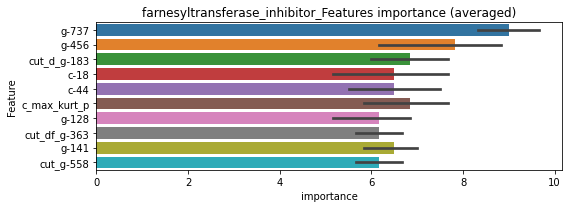

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0120815	valid_1's binary_logloss: 0.0170023
[200]	training's binary_logloss: 0.00140911	valid_1's binary_logloss: 0.00575573
[300]	training's binary_logloss: 0.000399405	valid_1's binary_logloss: 0.00467103
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000347226	valid_1's binary_logloss: 0.00459622


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0125018	valid_1's binary_logloss: 0.0158182
[200]	training's binary_logloss: 0.0014916	valid_1's binary_logloss: 0.00439446
[300]	training's binary_logloss: 0.000423928	valid_1's binary_logloss: 0.00318699
[400]	training's binary_logloss: 0.000226202	valid_1's binary_logloss: 0.00291524
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000218744	valid_1's binary_logloss: 0.00290496


farnesyltransferase_inhibitor logloss: 0.003750699637925171


neg labels: 3289 → selected neg labels: 3285


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00915675	valid_1's binary_logloss: 0.028738
[200]	training's binary_logloss: 0.00122077	valid_1's binary_logloss: 0.0202691
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.000669872	valid_1's binary_logloss: 0.0191309
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0104974	valid_1's binary_logloss: 0.0191171
[200]	training's binary_logloss: 0.0014585	valid_1's binary_logloss: 0.00864908
[300]	training's binary_logloss: 0.000609397	valid_1's binary_logloss: 0.00725291
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.000519143	valid_1's binary_logloss: 0.00702362


1 / 3 AUC score:1.000
y_Threshold: 0.0014357, Threshold: 0.0015786, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00105
Num_p_label: 80.0, conf_0:0.00142, conf_1:0.00174
Num_p_label: 80.0, Expected: 4.2, Adj_threshold_1: 0.0015786
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_2: 0.0115786
threshold: 0.0115786, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00910661	valid_1's binary_logloss: 0.0293318
[200]	training's binary_logloss: 0.0012092	valid_1's binary_logloss: 0.0203392
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.000768675	valid_1's binary_logloss: 0.0197015
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.010529	valid_1's binary_logloss: 0.0190905
[200]	training's binary_logloss: 0.00144593	valid_1's binary_logloss: 0.00825013
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.000690914	valid_1's binary_logloss: 0.00695075


2 / 3 AUC score:1.000
y_Threshold: 0.0098242, Threshold: 0.0115786, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, conf_0:0.01042, conf_1:0.01274
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0115786
Num_p_label: 205.0, Expected: 4.2, Adj_threshold_2: 0.0015786
threshold: 0.0015786, positive_p_label: 205.0/3982, p_label_rate: 0.0514817
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00910661	valid_1's binary_logloss: 0.0293318
[200]	training's binary_logloss: 0.0012092	valid_1's binary_logloss: 0.0203392
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.000768675	valid_1's binary_logloss: 0.0197015
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.010529	valid_1's binary_logloss: 0.0190905
[200]	training's binary_logloss: 0.00144593	valid_1's binary_logloss: 0.00825013
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.000690914	valid_1's binary_logloss: 0.00695075


3 / 3 AUC score:1.000
y_Threshold: 0.0098242, Threshold: 0.0015786, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0514817 Vs.target_rate: 0.00105
Num_p_label: 205.0, conf_0:0.00142, conf_1:0.00174
Num_p_label: 205.0, Expected: 4.2, Adj_threshold_1: 0.0015786
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_2: 0.0115786
threshold: 0.0115786, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7792, y_label_rate: 0.0843172


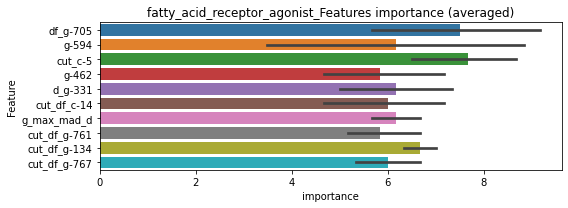

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0157617	valid_1's binary_logloss: 0.0290299
[200]	training's binary_logloss: 0.0024255	valid_1's binary_logloss: 0.0145459
[300]	training's binary_logloss: 0.000734214	valid_1's binary_logloss: 0.0126736
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000610812	valid_1's binary_logloss: 0.01247


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0173256	valid_1's binary_logloss: 0.0235562
[200]	training's binary_logloss: 0.00286428	valid_1's binary_logloss: 0.00795912
[300]	training's binary_logloss: 0.000893916	valid_1's binary_logloss: 0.00539079
[400]	training's binary_logloss: 0.000444698	valid_1's binary_logloss: 0.00469587
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000348247	valid_1's binary_logloss: 0.00453873


fatty_acid_receptor_agonist logloss: 0.008504365929688507


neg labels: 3289 → selected neg labels: 3279


fgfr_inhibitor, len(trt): 50, len(othr): 3279, target_rate: 0.0020996 → Adj_target_rate: 0.0023352
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.014368	valid_1's binary_logloss: 0.0398774
[200]	training's binary_logloss: 0.00220209	valid_1's binary_logloss: 0.0272718
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000950024	valid_1's binary_logloss: 0.0250485
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.014408	valid_1's binary_logloss: 0.0418674
[200]	training's binary_logloss: 0.00218435	valid_1's binary_logloss: 0.0299739
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00140657	valid_1's binary_logloss: 0.0285777


1 / 3 AUC score:1.000
y_Threshold: 0.0044803, Threshold: 0.0070999, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0200904 Vs.target_rate: 0.00210
Num_p_label: 80.0, conf_0:0.00639, conf_1:0.00781
Num_p_label: 80.0, Expected: 8.4, Adj_threshold_1: 0.0070999
Num_p_label: 22.0, Expected: 8.4, Adj_threshold_2: 0.0170999
Num_p_label: 6.0, Expected: 8.4, Adj_threshold_3: 0.0270999
threshold: 0.0270999, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0135624	valid_1's binary_logloss: 0.0431688
[200]	training's binary_logloss: 0.00201717	valid_1's binary_logloss: 0.0314518
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00131549	valid_1's binary_logloss: 0.0300097
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0139078	valid_1's binary_logloss: 0.038173
[200]	training's binary_logloss: 0.00211841	valid_1's binary_logloss: 0.0240015
[300]	training's binary_logloss: 0.000867019	valid_1's binary_logloss: 0.0212686
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000791686	valid_1's binary_logloss: 0.0210839


2 / 3 AUC score:1.000
y_Threshold: 0.0181027, Threshold: 0.0270999, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0070316 Vs.target_rate: 0.00210
Num_p_label: 28.0, conf_0:0.02439, conf_1:0.02981
Num_p_label: 28.0, Expected: 8.4, Adj_threshold_1: 0.0270999
Num_p_label: 19.0, Expected: 8.4, Adj_threshold_2: 0.0370999
Num_p_label: 10.0, Expected: 8.4, Adj_threshold_3: 0.0470999
threshold: 0.0470999, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0123837	valid_1's binary_logloss: 0.0436597
[200]	training's binary_logloss: 0.00180664	valid_1's binary_logloss: 0.0337209
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00117913	valid_1's binary_logloss: 0.0324772
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0148049	valid_1's binary_logloss: 0.0355894
[200]	training's binary_logloss: 0.00220895	valid_1's binary_logloss: 0.0210492
[300]	training's binary_logloss: 0.000913953	valid_1's binary_logloss: 0.0185675
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.000732912	valid_1's binary_logloss: 0.0180135


3 / 3 AUC score:1.000
y_Threshold: 0.0200476, Threshold: 0.0470999, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0032647 Vs.target_rate: 0.00210
Num_p_label: 13.0, conf_0:0.04239, conf_1:0.05181
threshold: 0.0470999, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 663.0/7774, y_label_rate: 0.0852843


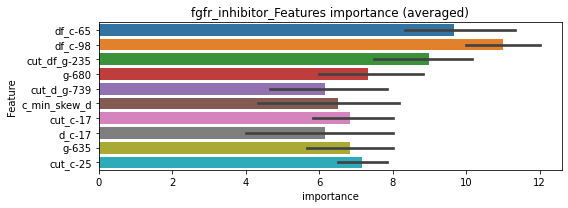

len(train_index) : 3887
len(valid_index) : 3887
================================= fold 1/2 fgfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0206767	valid_1's binary_logloss: 0.0430128
[200]	training's binary_logloss: 0.00402186	valid_1's binary_logloss: 0.027563
[300]	training's binary_logloss: 0.00132417	valid_1's binary_logloss: 0.0256504
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.00139313	valid_1's binary_logloss: 0.0255644


len(train_index) : 3887
len(valid_index) : 3887
================================= fold 2/2 fgfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0223789	valid_1's binary_logloss: 0.0366805
[200]	training's binary_logloss: 0.00463832	valid_1's binary_logloss: 0.0188297
[300]	training's binary_logloss: 0.00154438	valid_1's binary_logloss: 0.0156208
[400]	training's binary_logloss: 0.000753715	valid_1's binary_logloss: 0.014584
Early stopping, best iteration is:
[394]	training's binary_logloss: 0.000780199	valid_1's binary_logloss: 0.0145585


fgfr_inhibitor logloss: 0.020061435808922255


neg labels: 3289 → selected neg labels: 3272


flt3_inhibitor, len(trt): 279, len(othr): 3272, target_rate: 0.0117158 → Adj_target_rate: 0.0100684
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0434441	valid_1's binary_logloss: 0.152116
[200]	training's binary_logloss: 0.00888531	valid_1's binary_logloss: 0.12518
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00692323	valid_1's binary_logloss: 0.123938
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0443369	valid_1's binary_logloss: 0.14555
[200]	training's binary_logloss: 0.00940638	valid_1's binary_logloss: 0.115272
Early stopping, best iteration is:
[200]	training's binary_logloss: 0.00940638	valid_1's binary_logloss: 0.115272


1 / 3 AUC score:0.984
y_Threshold: 0.0567643, Threshold: 0.1635458, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 212 → Positive_corect_labels: 614/3714
p_label_rate: 0.0200904 Vs.target_rate: 0.01172
Num_p_label: 80.0, conf_0:0.14719, conf_1:0.17990
threshold: 0.1635458, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 614.0/3714, y_label_rate: 0.1653204
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0322862	valid_1's binary_logloss: 0.111774
[200]	training's binary_logloss: 0.00613994	valid_1's binary_logloss: 0.0759837
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00405664	valid_1's binary_logloss: 0.0714287
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0357546	valid_1's binary_logloss: 0.111847
[200]	training's binary_logloss: 0.00700122	valid_1's binary_logloss: 0.0762778
[300]	training's binary_logloss: 0.00261757	valid_1's binary_logloss: 0.0681555
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.00193177	valid_1's binary_logloss: 0.0662355


2 / 3 AUC score:0.998
y_Threshold: 0.1072509, Threshold: 0.1635458, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 46 → Positive_corect_labels: 591.0/3668
p_label_rate: 0.0354093 Vs.target_rate: 0.01172
Num_p_label: 141.0, conf_0:0.14719, conf_1:0.17990
Num_p_label: 141.0, Expected: 46.7, Adj_threshold_1: 0.1635458
Num_p_label: 129.0, Expected: 46.7, Adj_threshold_2: 0.1735458
Num_p_label: 121.0, Expected: 46.7, Adj_threshold_3: 0.1835458
Num_p_label: 109.0, Expected: 46.7, Adj_threshold_4: 0.1935458
Num_p_label: 101.0, Expected: 46.7, Adj_threshold_5: 0.2035458
Num_p_label: 94.0, Expected: 46.7, Adj_threshold_6: 0.2135458
Num_p_label: 87.0, Expected: 46.7, Adj_threshold_7: 0.2235458
threshold: 0.2235458, positive_p_label: 87.0/3982, p_label_rate: 0.0218483
positive_y_label: 591.0/3668, y_label_rate: 0.1611232
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.029905	valid_1's binary_logloss: 0.10614
[200]	training's binary_logloss: 0.00547523	valid_1's binary_logloss: 0.0712004
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00355867	valid_1's binary_logloss: 0.0676594
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0296375	valid_1's binary_logloss: 0.105972
[200]	training's binary_logloss: 0.00545889	valid_1's binary_logloss: 0.0715111
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00354808	valid_1's binary_logloss: 0.0671516


3 / 3 AUC score:0.997
y_Threshold: 0.1029376, Threshold: 0.2235458, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 40 → Positive_corect_labels: 571.0/3628
p_label_rate: 0.0291311 Vs.target_rate: 0.01172
Num_p_label: 116.0, conf_0:0.20119, conf_1:0.24590
threshold: 0.2235458, positive_p_label: 116.0/3982, p_label_rate: 0.0291311
positive_y_label: 687.0/7610, y_label_rate: 0.0902760


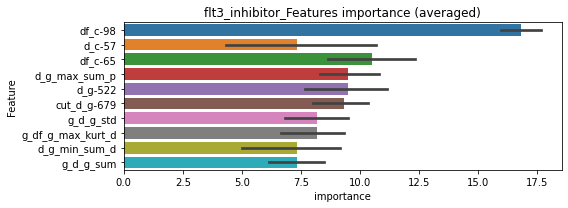

len(train_index) : 3805
len(valid_index) : 3805
================================= fold 1/2 flt3_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.046065	valid_1's binary_logloss: 0.10562
[200]	training's binary_logloss: 0.0133507	valid_1's binary_logloss: 0.0788782
[300]	training's binary_logloss: 0.00528942	valid_1's binary_logloss: 0.0718177
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00363486	valid_1's binary_logloss: 0.0701888


len(train_index) : 3805
len(valid_index) : 3805
================================= fold 2/2 flt3_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0479659	valid_1's binary_logloss: 0.104472
[200]	training's binary_logloss: 0.0142986	valid_1's binary_logloss: 0.0748495
[300]	training's binary_logloss: 0.00571834	valid_1's binary_logloss: 0.0661388
[400]	training's binary_logloss: 0.00285374	valid_1's binary_logloss: 0.062229
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.0020145	valid_1's binary_logloss: 0.0597709


flt3_inhibitor logloss: 0.0649798362622559


neg labels: 3289 → selected neg labels: 3286


focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00543795	valid_1's binary_logloss: 0.00892381
[200]	training's binary_logloss: 0.000613364	valid_1's binary_logloss: 0.00297753
[300]	training's binary_logloss: 0.000320973	valid_1's binary_logloss: 0.0024163
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.000308534	valid_1's binary_logloss: 0.00239197
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00567464	valid_1's binary_logloss: 0.0102912
[200]	training's binary_logloss: 0.000643737	valid_1's binary_logloss: 0.00300565
[300]	training's binary_logloss: 0.000333774	valid_1's binary_logloss: 0.00232016
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.000337429	valid_1's binary_logloss: 0.00231366


1 / 3 AUC score:1.000
y_Threshold: 0.0010975, Threshold: 0.0019874, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00179, conf_1:0.00219
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0019874
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0119874
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.0219874
threshold: 0.0219874, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00522129	valid_1's binary_logloss: 0.00808152
[200]	training's binary_logloss: 0.000575931	valid_1's binary_logloss: 0.0025209
[300]	training's binary_logloss: 0.000312196	valid_1's binary_logloss: 0.00197355
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000318346	valid_1's binary_logloss: 0.00196985
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00550656	valid_1's binary_logloss: 0.00940471
[200]	training's binary_logloss: 0.000607918	valid_1's binary_logloss: 0.00236275
[300]	training's binary_logloss: 0.000327544	valid_1's binary_logloss: 0.00173709
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.000331007	valid_1's binary_logloss: 0.0017354


2 / 3 AUC score:1.000
y_Threshold: 0.0583723, Threshold: 0.0219874, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0047715 Vs.target_rate: 0.00076
Num_p_label: 19.0, conf_0:0.01979, conf_1:0.02419
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0219874
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0319874
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.0419874
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.0519874
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.0619874
threshold: 0.0619874, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00522129	valid_1's binary_logloss: 0.00808152
[200]	training's binary_logloss: 0.000575931	valid_1's binary_logloss: 0.0025209
[300]	training's binary_logloss: 0.000312196	valid_1's binary_logloss: 0.00197355
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000318346	valid_1's binary_logloss: 0.00196985
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00550656	valid_1's binary_logloss: 0.00940471
[200]	training's binary_logloss: 0.000607918	valid_1's binary_logloss: 0.00236275
[300]	training's binary_logloss: 0.000327544	valid_1's binary_logloss: 0.00173709
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.000331007	valid_1's binary_logloss: 0.0017354


3 / 3 AUC score:1.000
y_Threshold: 0.0583723, Threshold: 0.0619874, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.05579, conf_1:0.06819
threshold: 0.0619874, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 663.0/7793, y_label_rate: 0.0850764


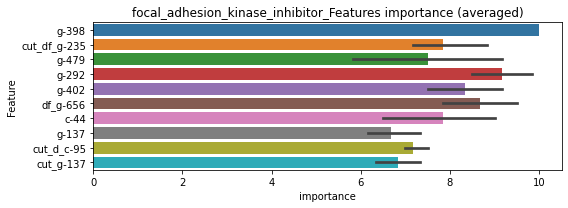

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0123511	valid_1's binary_logloss: 0.0193329
[200]	training's binary_logloss: 0.00147196	valid_1's binary_logloss: 0.00777618
[300]	training's binary_logloss: 0.00041238	valid_1's binary_logloss: 0.00636698
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00034516	valid_1's binary_logloss: 0.00623373


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0130776	valid_1's binary_logloss: 0.0163594
[200]	training's binary_logloss: 0.00164575	valid_1's binary_logloss: 0.0042825
[300]	training's binary_logloss: 0.000466375	valid_1's binary_logloss: 0.00262373
[400]	training's binary_logloss: 0.000240376	valid_1's binary_logloss: 0.00215181
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000202448	valid_1's binary_logloss: 0.00206503


focal_adhesion_kinase_inhibitor logloss: 0.004152445990086346


neg labels: 3289 → selected neg labels: 3286


free_radical_scavenger, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00694697	valid_1's binary_logloss: 0.0179537
[200]	training's binary_logloss: 0.000911357	valid_1's binary_logloss: 0.011602
Early stopping, best iteration is:
[255]	training's binary_logloss: 0.000549896	valid_1's binary_logloss: 0.011166
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00769374	valid_1's binary_logloss: 0.0185724
[200]	training's binary_logloss: 0.00100849	valid_1's binary_logloss: 0.0104629
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.000649171	valid_1's binary_logloss: 0.00993882


1 / 3 AUC score:1.000
y_Threshold: 0.0012295, Threshold: 0.0013913, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00125, conf_1:0.00153
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0013913
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0113913
threshold: 0.0113913, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00700036	valid_1's binary_logloss: 0.0177839
[200]	training's binary_logloss: 0.000938269	valid_1's binary_logloss: 0.0115909
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.000623743	valid_1's binary_logloss: 0.0111451
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00790473	valid_1's binary_logloss: 0.016556
[200]	training's binary_logloss: 0.00102927	valid_1's binary_logloss: 0.00865282
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.000688155	valid_1's binary_logloss: 0.00814004


2 / 3 AUC score:1.000
y_Threshold: 0.0056878, Threshold: 0.0113913, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.01025, conf_1:0.01253
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0113913
Num_p_label: 161.0, Expected: 3.0, Adj_threshold_2: 0.0013913
threshold: 0.0013913, positive_p_label: 161.0/3982, p_label_rate: 0.0404319
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00700036	valid_1's binary_logloss: 0.0177839
[200]	training's binary_logloss: 0.000938269	valid_1's binary_logloss: 0.0115909
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.000623743	valid_1's binary_logloss: 0.0111451
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00790473	valid_1's binary_logloss: 0.016556
[200]	training's binary_logloss: 0.00102927	valid_1's binary_logloss: 0.00865282
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.000688155	valid_1's binary_logloss: 0.00814004


3 / 3 AUC score:1.000
y_Threshold: 0.0056878, Threshold: 0.0013913, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0404319 Vs.target_rate: 0.00076
Num_p_label: 161.0, conf_0:0.00125, conf_1:0.00153
Num_p_label: 161.0, Expected: 3.0, Adj_threshold_1: 0.0013913
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0113913
threshold: 0.0113913, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7793, y_label_rate: 0.0843064


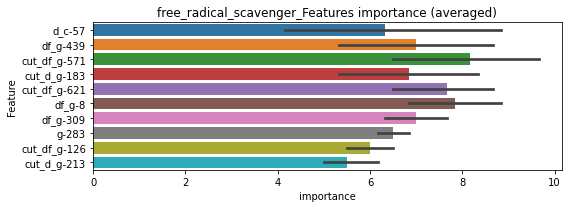

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 free_radical_scavenger=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0139087	valid_1's binary_logloss: 0.0216622
[200]	training's binary_logloss: 0.00193156	valid_1's binary_logloss: 0.00937687
[300]	training's binary_logloss: 0.000574158	valid_1's binary_logloss: 0.0077122
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00049129	valid_1's binary_logloss: 0.00760967


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 free_radical_scavenger=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0147281	valid_1's binary_logloss: 0.021215
[200]	training's binary_logloss: 0.00223384	valid_1's binary_logloss: 0.00750417
[300]	training's binary_logloss: 0.000664102	valid_1's binary_logloss: 0.00552642
[400]	training's binary_logloss: 0.000333381	valid_1's binary_logloss: 0.00501106
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000273438	valid_1's binary_logloss: 0.00485526


free_radical_scavenger logloss: 0.006232640901762125


neg labels: 3289 → selected neg labels: 3285


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3285, target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00715604	valid_1's binary_logloss: 0.0304444
Early stopping, best iteration is:
[167]	training's binary_logloss: 0.00148561	valid_1's binary_logloss: 0.0248199
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00971716	valid_1's binary_logloss: 0.0132385
[200]	training's binary_logloss: 0.00132208	valid_1's binary_logloss: 0.00411167
[300]	training's binary_logloss: 0.000570449	valid_1's binary_logloss: 0.00306925
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.000478516	valid_1's binary_logloss: 0.00284505


1 / 3 AUC score:1.000
y_Threshold: 0.0021277, Threshold: 0.0022170, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00097
Num_p_label: 80.0, conf_0:0.00200, conf_1:0.00244
Num_p_label: 80.0, Expected: 3.8, Adj_threshold_1: 0.0022170
Num_p_label: 0.0, Expected: 3.8, Adj_threshold_2: 0.0122170
threshold: 0.0122170, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00762602	valid_1's binary_logloss: 0.0313838
Early stopping, best iteration is:
[173]	training's binary_logloss: 0.0014457	valid_1's binary_logloss: 0.0250112
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00977499	valid_1's binary_logloss: 0.0136009
[200]	training's binary_logloss: 0.00130022	valid_1's binary_logloss: 0.00428434
[300]	training's binary_logloss: 0.000566421	valid_1's binary_logloss: 0.00320063
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.000480475	valid_1's binary_logloss: 0.00296102


2 / 3 AUC score:1.000
y_Threshold: 0.0069914, Threshold: 0.0122170, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00097
Num_p_label: 0.0, conf_0:0.01100, conf_1:0.01344
Num_p_label: 0.0, Expected: 3.8, Adj_threshold_1: 0.0122170
Num_p_label: 125.0, Expected: 3.8, Adj_threshold_2: 0.0022170
threshold: 0.0022170, positive_p_label: 125.0/3982, p_label_rate: 0.0313913
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00762602	valid_1's binary_logloss: 0.0313838
Early stopping, best iteration is:
[173]	training's binary_logloss: 0.0014457	valid_1's binary_logloss: 0.0250112
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00977499	valid_1's binary_logloss: 0.0136009
[200]	training's binary_logloss: 0.00130022	valid_1's binary_logloss: 0.00428434
[300]	training's binary_logloss: 0.000566421	valid_1's binary_logloss: 0.00320063
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.000480475	valid_1's binary_logloss: 0.00296102


3 / 3 AUC score:1.000
y_Threshold: 0.0069914, Threshold: 0.0022170, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0313913 Vs.target_rate: 0.00097
Num_p_label: 125.0, conf_0:0.00200, conf_1:0.00244
Num_p_label: 125.0, Expected: 3.8, Adj_threshold_1: 0.0022170
Num_p_label: 0.0, Expected: 3.8, Adj_threshold_2: 0.0122170
threshold: 0.0122170, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7792, y_label_rate: 0.0843172


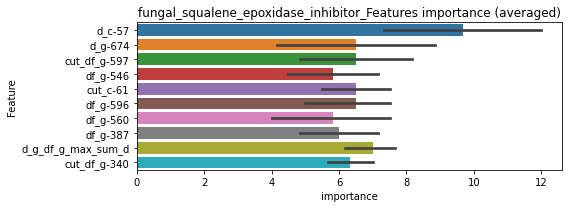

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0137585	valid_1's binary_logloss: 0.0290039
[200]	training's binary_logloss: 0.00195083	valid_1's binary_logloss: 0.0160213
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000974948	valid_1's binary_logloss: 0.0147678


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0160867	valid_1's binary_logloss: 0.0191553
[200]	training's binary_logloss: 0.00260974	valid_1's binary_logloss: 0.00523984
[300]	training's binary_logloss: 0.000822607	valid_1's binary_logloss: 0.00308786
[400]	training's binary_logloss: 0.00041058	valid_1's binary_logloss: 0.00252434
[500]	training's binary_logloss: 0.000278493	valid_1's binary_logloss: 0.00228647
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000271957	valid_1's binary_logloss: 0.00227622


fungal_squalene_epoxidase_inhibitor logloss: 0.008522014561760124


neg labels: 3289 → selected neg labels: 3272


gaba_receptor_agonist, len(trt): 106, len(othr): 3272, target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0317031	valid_1's binary_logloss: 0.120144
Early stopping, best iteration is:
[133]	training's binary_logloss: 0.0174085	valid_1's binary_logloss: 0.11454
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0382948	valid_1's binary_logloss: 0.100468
[200]	training's binary_logloss: 0.00813963	valid_1's binary_logloss: 0.0806307
Early stopping, best iteration is:
[212]	training's binary_logloss: 0.00701904	valid_1's binary_logloss: 0.0803761


1 / 3 AUC score:0.989
y_Threshold: 0.0242307, Threshold: 0.0248891, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 186 → Positive_corect_labels: 627/3740
p_label_rate: 0.0200904 Vs.target_rate: 0.00445
Num_p_label: 80.0, conf_0:0.02240, conf_1:0.02738
Num_p_label: 80.0, Expected: 17.7, Adj_threshold_1: 0.0248891
Num_p_label: 11.0, Expected: 17.7, Adj_threshold_2: 0.0348891
threshold: 0.0348891, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 627.0/3740, y_label_rate: 0.1676471
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0272963	valid_1's binary_logloss: 0.100079
Early stopping, best iteration is:
[137]	training's binary_logloss: 0.0131638	valid_1's binary_logloss: 0.0939869
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0306797	valid_1's binary_logloss: 0.0871819
Early stopping, best iteration is:
[175]	training's binary_logloss: 0.00832862	valid_1's binary_logloss: 0.0742636


2 / 3 AUC score:0.995
y_Threshold: 0.0308244, Threshold: 0.0348891, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 46 → Positive_corect_labels: 604.0/3694
p_label_rate: 0.0000000 Vs.target_rate: 0.00445
Num_p_label: 0.0, conf_0:0.03140, conf_1:0.03838
Num_p_label: 0.0, Expected: 17.7, Adj_threshold_1: 0.0348891
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_2: 0.0248891
threshold: 0.0248891, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 604.0/3694, y_label_rate: 0.1635084
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0246816	valid_1's binary_logloss: 0.0773025
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.00645623	valid_1's binary_logloss: 0.066594
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0251638	valid_1's binary_logloss: 0.0674415
[200]	training's binary_logloss: 0.00480461	valid_1's binary_logloss: 0.0543632
Early stopping, best iteration is:
[196]	training's binary_logloss: 0.00505429	valid_1's binary_logloss: 0.0541404


3 / 3 AUC score:0.999
y_Threshold: 0.0213566, Threshold: 0.0248891, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 22 → Positive_corect_labels: 593.0/3672
p_label_rate: 0.0005023 Vs.target_rate: 0.00445
Num_p_label: 2.0, conf_0:0.02240, conf_1:0.02738
Num_p_label: 2.0, Expected: 17.7, Adj_threshold_1: 0.0248891
Num_p_label: 47.0, Expected: 17.7, Adj_threshold_2: 0.0148891
threshold: 0.0148891, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 640.0/7654, y_label_rate: 0.0836164


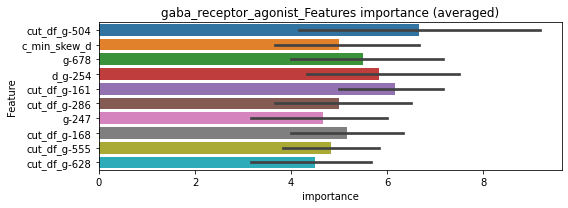

len(train_index) : 3827
len(valid_index) : 3827
================================= fold 1/2 gaba_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0377232	valid_1's binary_logloss: 0.0777016
[200]	training's binary_logloss: 0.0106606	valid_1's binary_logloss: 0.062105
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00697018	valid_1's binary_logloss: 0.0615424


len(train_index) : 3827
len(valid_index) : 3827
================================= fold 2/2 gaba_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0421325	valid_1's binary_logloss: 0.071739
[200]	training's binary_logloss: 0.0129957	valid_1's binary_logloss: 0.0532435
[300]	training's binary_logloss: 0.0046533	valid_1's binary_logloss: 0.0506567
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00510803	valid_1's binary_logloss: 0.0505544


gaba_receptor_agonist logloss: 0.056048411082580095


neg labels: 3289 → selected neg labels: 3263


gaba_receptor_antagonist, len(trt): 165, len(othr): 3263, target_rate: 0.0069287 → Adj_target_rate: 0.0064426
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0510309	valid_1's binary_logloss: 0.168328
Early stopping, best iteration is:
[148]	training's binary_logloss: 0.0242212	valid_1's binary_logloss: 0.162149
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0553298	valid_1's binary_logloss: 0.154998
Early stopping, best iteration is:
[159]	training's binary_logloss: 0.0230667	valid_1's binary_logloss: 0.147499


1 / 3 AUC score:0.960
y_Threshold: 0.0442167, Threshold: 0.0481683, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 263 → Positive_corect_labels: 586/3652
p_label_rate: 0.0200904 Vs.target_rate: 0.00693
Num_p_label: 80.0, conf_0:0.04335, conf_1:0.05299
threshold: 0.0481683, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 586.0/3652, y_label_rate: 0.1604600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0328999	valid_1's binary_logloss: 0.135816
Early stopping, best iteration is:
[133]	training's binary_logloss: 0.0181824	valid_1's binary_logloss: 0.131185
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.040842	valid_1's binary_logloss: 0.106336
Early stopping, best iteration is:
[184]	training's binary_logloss: 0.0110036	valid_1's binary_logloss: 0.0945082


2 / 3 AUC score:0.984
y_Threshold: 0.0438857, Threshold: 0.0481683, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 98 → Positive_corect_labels: 537.0/3554
p_label_rate: 0.0017579 Vs.target_rate: 0.00693
Num_p_label: 7.0, conf_0:0.04335, conf_1:0.05299
Num_p_label: 7.0, Expected: 27.6, Adj_threshold_1: 0.0481683
Num_p_label: 40.0, Expected: 27.6, Adj_threshold_2: 0.0381683
threshold: 0.0381683, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 537.0/3554, y_label_rate: 0.1510974
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0232965	valid_1's binary_logloss: 0.0791552
Early stopping, best iteration is:
[186]	training's binary_logloss: 0.00530608	valid_1's binary_logloss: 0.0682767
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0268568	valid_1's binary_logloss: 0.0757237
[200]	training's binary_logloss: 0.00516757	valid_1's binary_logloss: 0.0636035
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.00587022	valid_1's binary_logloss: 0.0634754


3 / 3 AUC score:0.998
y_Threshold: 0.0225756, Threshold: 0.0381683, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 38 → Positive_corect_labels: 518.0/3516
p_label_rate: 0.0000000 Vs.target_rate: 0.00693
Num_p_label: 0.0, conf_0:0.03435, conf_1:0.04199
Num_p_label: 0.0, Expected: 27.6, Adj_threshold_1: 0.0381683
Num_p_label: 4.0, Expected: 27.6, Adj_threshold_2: 0.0281683
Num_p_label: 39.0, Expected: 27.6, Adj_threshold_3: 0.0181683
threshold: 0.0181683, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 557.0/7498, y_label_rate: 0.0742865


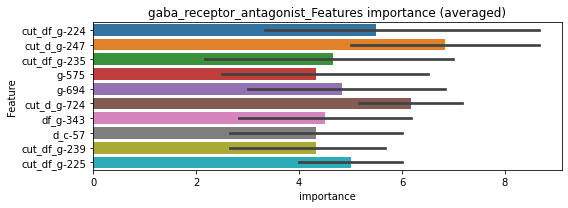

len(train_index) : 3749
len(valid_index) : 3749
================================= fold 1/2 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0332526	valid_1's binary_logloss: 0.079322
[200]	training's binary_logloss: 0.0089587	valid_1's binary_logloss: 0.0655764
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.00553742	valid_1's binary_logloss: 0.0643902


len(train_index) : 3749
len(valid_index) : 3749
================================= fold 2/2 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0384601	valid_1's binary_logloss: 0.0653919
[200]	training's binary_logloss: 0.0112481	valid_1's binary_logloss: 0.0471529
[300]	training's binary_logloss: 0.0042721	valid_1's binary_logloss: 0.0447468
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00466519	valid_1's binary_logloss: 0.0445786


gaba_receptor_antagonist logloss: 0.05448443084670462


neg labels: 3289 → selected neg labels: 3279


gamma_secretase_inhibitor, len(trt): 56, len(othr): 3279, target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0157846	valid_1's binary_logloss: 0.047084
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00305134	valid_1's binary_logloss: 0.0335314
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0154199	valid_1's binary_logloss: 0.0459404
[200]	training's binary_logloss: 0.00238476	valid_1's binary_logloss: 0.0319611
Early stopping, best iteration is:
[279]	training's binary_logloss: 0.00106457	valid_1's binary_logloss: 0.0302689


1 / 3 AUC score:1.000
y_Threshold: 0.0052222, Threshold: 0.0054640, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 138 → Positive_corect_labels: 652/3796
p_label_rate: 0.0200904 Vs.target_rate: 0.00235
Num_p_label: 80.0, conf_0:0.00492, conf_1:0.00601
Num_p_label: 80.0, Expected: 9.4, Adj_threshold_1: 0.0054640
Num_p_label: 7.0, Expected: 9.4, Adj_threshold_2: 0.0154640
threshold: 0.0154640, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0149909	valid_1's binary_logloss: 0.0448194
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.0026217	valid_1's binary_logloss: 0.0307305
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0160194	valid_1's binary_logloss: 0.0439651
[200]	training's binary_logloss: 0.00246899	valid_1's binary_logloss: 0.0290815
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.00153162	valid_1's binary_logloss: 0.0269085


2 / 3 AUC score:1.000
y_Threshold: 0.0164913, Threshold: 0.0154640, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0020090 Vs.target_rate: 0.00235
Num_p_label: 8.0, conf_0:0.01392, conf_1:0.01701
threshold: 0.0154640, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0142827	valid_1's binary_logloss: 0.0487581
[200]	training's binary_logloss: 0.00210084	valid_1's binary_logloss: 0.0338119
Early stopping, best iteration is:
[225]	training's binary_logloss: 0.00153881	valid_1's binary_logloss: 0.0329314
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0156306	valid_1's binary_logloss: 0.0407802
[200]	training's binary_logloss: 0.0023556	valid_1's binary_logloss: 0.0253187
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00142561	valid_1's binary_logloss: 0.0223384


3 / 3 AUC score:1.000
y_Threshold: 0.0120420, Threshold: 0.0154640, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0020090 Vs.target_rate: 0.00235
Num_p_label: 8.0, conf_0:0.01392, conf_1:0.01701
threshold: 0.0154640, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 658.0/7774, y_label_rate: 0.0846411


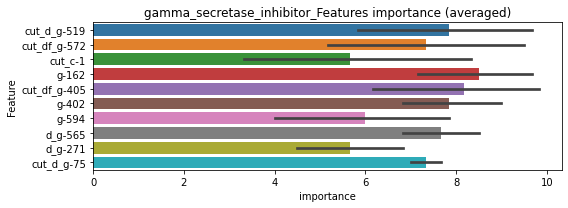

len(train_index) : 3887
len(valid_index) : 3887
================================= fold 1/2 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0230094	valid_1's binary_logloss: 0.0450733
[200]	training's binary_logloss: 0.00453599	valid_1's binary_logloss: 0.0271083
[300]	training's binary_logloss: 0.00142034	valid_1's binary_logloss: 0.023475
[400]	training's binary_logloss: 0.00066353	valid_1's binary_logloss: 0.0224805
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000508756	valid_1's binary_logloss: 0.0219933


len(train_index) : 3887
len(valid_index) : 3887
================================= fold 2/2 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0249217	valid_1's binary_logloss: 0.0419023
[200]	training's binary_logloss: 0.00484854	valid_1's binary_logloss: 0.0220741
[300]	training's binary_logloss: 0.00155571	valid_1's binary_logloss: 0.0184078
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.000848724	valid_1's binary_logloss: 0.0172421


gamma_secretase_inhibitor logloss: 0.019617691635121004


neg labels: 3289 → selected neg labels: 3253


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 3253, target_rate: 0.0111699 → Adj_target_rate: 0.0096682
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0189168	valid_1's binary_logloss: 0.0699471
[200]	training's binary_logloss: 0.00289402	valid_1's binary_logloss: 0.0567769
Early stopping, best iteration is:
[213]	training's binary_logloss: 0.00241276	valid_1's binary_logloss: 0.0562464
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204604	valid_1's binary_logloss: 0.0580728
[200]	training's binary_logloss: 0.00327456	valid_1's binary_logloss: 0.0381867
Early stopping, best iteration is:
[219]	training's binary_logloss: 0.00255958	valid_1's binary_logloss: 0.036853


1 / 3 AUC score:0.995
y_Threshold: 0.0088717, Threshold: 0.0229572, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 149 → Positive_corect_labels: 641/3754
p_label_rate: 0.0200904 Vs.target_rate: 0.01117
Num_p_label: 80.0, conf_0:0.02066, conf_1:0.02525
threshold: 0.0229572, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 641.0/3754, y_label_rate: 0.1707512
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0161677	valid_1's binary_logloss: 0.0493004
[200]	training's binary_logloss: 0.00219874	valid_1's binary_logloss: 0.0271008
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000879454	valid_1's binary_logloss: 0.0233386
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0171816	valid_1's binary_logloss: 0.0438688
[200]	training's binary_logloss: 0.00240988	valid_1's binary_logloss: 0.0223869
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00104706	valid_1's binary_logloss: 0.0188868


2 / 3 AUC score:1.000
y_Threshold: 0.0182360, Threshold: 0.0229572, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 638.0/3748
p_label_rate: 0.0226017 Vs.target_rate: 0.01117
Num_p_label: 90.0, conf_0:0.02066, conf_1:0.02525
threshold: 0.0229572, positive_p_label: 90.0/3982, p_label_rate: 0.0226017
positive_y_label: 638.0/3748, y_label_rate: 0.1702241
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163489	valid_1's binary_logloss: 0.0423741
[200]	training's binary_logloss: 0.00219245	valid_1's binary_logloss: 0.0228086
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.00130733	valid_1's binary_logloss: 0.021231
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159116	valid_1's binary_logloss: 0.0486252
[200]	training's binary_logloss: 0.00210964	valid_1's binary_logloss: 0.0279204
Early stopping, best iteration is:
[229]	training's binary_logloss: 0.00141212	valid_1's binary_logloss: 0.0263246


3 / 3 AUC score:0.999
y_Threshold: 0.0184628, Threshold: 0.0229572, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 635.0/3742
p_label_rate: 0.0251130 Vs.target_rate: 0.01117
Num_p_label: 100.0, conf_0:0.02066, conf_1:0.02525
threshold: 0.0229572, positive_p_label: 100.0/3982, p_label_rate: 0.0251130
positive_y_label: 735.0/7724, y_label_rate: 0.0951579


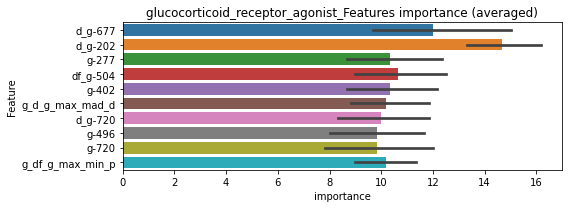

len(train_index) : 3862
len(valid_index) : 3862
================================= fold 1/2 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.034219	valid_1's binary_logloss: 0.0745794
[200]	training's binary_logloss: 0.00753764	valid_1's binary_logloss: 0.0495742
[300]	training's binary_logloss: 0.00234756	valid_1's binary_logloss: 0.0432666
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.00241227	valid_1's binary_logloss: 0.0431305


len(train_index) : 3862
len(valid_index) : 3862
================================= fold 2/2 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0347846	valid_1's binary_logloss: 0.0762423
[200]	training's binary_logloss: 0.00752913	valid_1's binary_logloss: 0.0501353
[300]	training's binary_logloss: 0.00234084	valid_1's binary_logloss: 0.0440372
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00197592	valid_1's binary_logloss: 0.0437644


glucocorticoid_receptor_agonist logloss: 0.04344745654107362


neg labels: 3289 → selected neg labels: 3287


glutamate_inhibitor, len(trt): 13, len(othr): 3287, target_rate: 0.0005459 → Adj_target_rate: 0.0007431
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00517918	valid_1's binary_logloss: 0.0151549
[200]	training's binary_logloss: 0.000634249	valid_1's binary_logloss: 0.00953966
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.000437517	valid_1's binary_logloss: 0.00914776
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00573704	valid_1's binary_logloss: 0.0102945
[200]	training's binary_logloss: 0.00072205	valid_1's binary_logloss: 0.00457624
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.000456162	valid_1's binary_logloss: 0.00402992


1 / 3 AUC score:1.000
y_Threshold: 0.0008642, Threshold: 0.0010149, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00055
Num_p_label: 80.0, conf_0:0.00091, conf_1:0.00112
Num_p_label: 80.0, Expected: 2.2, Adj_threshold_1: 0.0010149
Num_p_label: 0.0, Expected: 2.2, Adj_threshold_2: 0.0110149
threshold: 0.0110149, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00538243	valid_1's binary_logloss: 0.0143456
[200]	training's binary_logloss: 0.000644112	valid_1's binary_logloss: 0.00851722
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.000444153	valid_1's binary_logloss: 0.00816572
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00571929	valid_1's binary_logloss: 0.00971784
[200]	training's binary_logloss: 0.000726841	valid_1's binary_logloss: 0.00401372
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.000389403	valid_1's binary_logloss: 0.00332536


2 / 3 AUC score:1.000
y_Threshold: 0.0148371, Threshold: 0.0110149, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00055
Num_p_label: 0.0, conf_0:0.00991, conf_1:0.01212
Num_p_label: 0.0, Expected: 2.2, Adj_threshold_1: 0.0110149
Num_p_label: 107.0, Expected: 2.2, Adj_threshold_2: 0.0010149
threshold: 0.0010149, positive_p_label: 107.0/3982, p_label_rate: 0.0268709
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00538243	valid_1's binary_logloss: 0.0143456
[200]	training's binary_logloss: 0.000644112	valid_1's binary_logloss: 0.00851722
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.000444153	valid_1's binary_logloss: 0.00816572
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00571929	valid_1's binary_logloss: 0.00971784
[200]	training's binary_logloss: 0.000726841	valid_1's binary_logloss: 0.00401372
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.000389403	valid_1's binary_logloss: 0.00332536


3 / 3 AUC score:1.000
y_Threshold: 0.0148371, Threshold: 0.0010149, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0268709 Vs.target_rate: 0.00055
Num_p_label: 107.0, conf_0:0.00091, conf_1:0.00112
Num_p_label: 107.0, Expected: 2.2, Adj_threshold_1: 0.0010149
Num_p_label: 0.0, Expected: 2.2, Adj_threshold_2: 0.0110149
threshold: 0.0110149, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7794, y_label_rate: 0.0842956


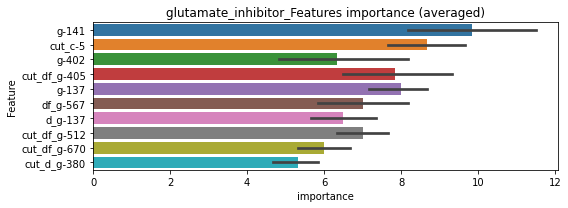

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 glutamate_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0119376	valid_1's binary_logloss: 0.0192116
[200]	training's binary_logloss: 0.00140039	valid_1's binary_logloss: 0.00738083
[300]	training's binary_logloss: 0.000403244	valid_1's binary_logloss: 0.0061053
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.000337264	valid_1's binary_logloss: 0.00594932


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 glutamate_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0124166	valid_1's binary_logloss: 0.0149809
[200]	training's binary_logloss: 0.00157054	valid_1's binary_logloss: 0.00405057
[300]	training's binary_logloss: 0.000451004	valid_1's binary_logloss: 0.00278547
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000262415	valid_1's binary_logloss: 0.00253287


glutamate_inhibitor logloss: 0.004241095468942746


neg labels: 3289 → selected neg labels: 3277


glutamate_receptor_agonist, len(trt): 74, len(othr): 3277, target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0242539	valid_1's binary_logloss: 0.0813602
[200]	training's binary_logloss: 0.00437696	valid_1's binary_logloss: 0.0707409
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00482797	valid_1's binary_logloss: 0.0704489
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0263912	valid_1's binary_logloss: 0.0729151
Early stopping, best iteration is:
[184]	training's binary_logloss: 0.00616068	valid_1's binary_logloss: 0.0594981


1 / 3 AUC score:0.998
y_Threshold: 0.0138860, Threshold: 0.0146126, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 142 → Positive_corect_labels: 650/3790
p_label_rate: 0.0200904 Vs.target_rate: 0.00311
Num_p_label: 80.0, conf_0:0.01315, conf_1:0.01607
Num_p_label: 80.0, Expected: 12.4, Adj_threshold_1: 0.0146126
Num_p_label: 3.0, Expected: 12.4, Adj_threshold_2: 0.0246126
threshold: 0.0246126, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 650.0/3790, y_label_rate: 0.1715040
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0250277	valid_1's binary_logloss: 0.0809808
[200]	training's binary_logloss: 0.00430715	valid_1's binary_logloss: 0.0703703
Early stopping, best iteration is:
[215]	training's binary_logloss: 0.00354122	valid_1's binary_logloss: 0.0698096
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0248304	valid_1's binary_logloss: 0.0698269
Early stopping, best iteration is:
[177]	training's binary_logloss: 0.00644261	valid_1's binary_logloss: 0.056908


2 / 3 AUC score:0.999
y_Threshold: 0.0238613, Threshold: 0.0246126, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 24 → Positive_corect_labels: 638.0/3766
p_label_rate: 0.0022602 Vs.target_rate: 0.00311
Num_p_label: 9.0, conf_0:0.02215, conf_1:0.02707
threshold: 0.0246126, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 638.0/3766, y_label_rate: 0.1694105
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0214844	valid_1's binary_logloss: 0.0663487
Early stopping, best iteration is:
[168]	training's binary_logloss: 0.00609455	valid_1's binary_logloss: 0.0548798
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.022961	valid_1's binary_logloss: 0.0650603
Early stopping, best iteration is:
[182]	training's binary_logloss: 0.00514035	valid_1's binary_logloss: 0.0547545


3 / 3 AUC score:0.999
y_Threshold: 0.0271226, Threshold: 0.0246126, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 629.0/3748
p_label_rate: 0.0025113 Vs.target_rate: 0.00311
Num_p_label: 10.0, conf_0:0.02215, conf_1:0.02707
threshold: 0.0246126, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 639.0/7730, y_label_rate: 0.0826649


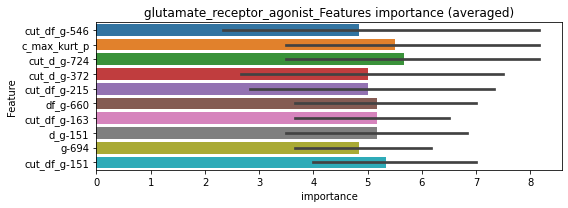

len(train_index) : 3865
len(valid_index) : 3865
================================= fold 1/2 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0294063	valid_1's binary_logloss: 0.0579881
[200]	training's binary_logloss: 0.00728267	valid_1's binary_logloss: 0.0395787
[300]	training's binary_logloss: 0.00248302	valid_1's binary_logloss: 0.0368283
Early stopping, best iteration is:
[310]	training's binary_logloss: 0.00226293	valid_1's binary_logloss: 0.0367021


len(train_index) : 3865
len(valid_index) : 3865
================================= fold 2/2 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0306247	valid_1's binary_logloss: 0.0541038
[200]	training's binary_logloss: 0.00783221	valid_1's binary_logloss: 0.0355476
[300]	training's binary_logloss: 0.00276482	valid_1's binary_logloss: 0.0317963
Early stopping, best iteration is:
[309]	training's binary_logloss: 0.00255655	valid_1's binary_logloss: 0.031622


glutamate_receptor_agonist logloss: 0.03416205029648231


neg labels: 3289 → selected neg labels: 3226


glutamate_receptor_antagonist, len(trt): 367, len(othr): 3226, target_rate: 0.0154111 → Adj_target_rate: 0.0127105
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[88]	training's binary_logloss: 0.111731	valid_1's binary_logloss: 0.335838
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.111926	valid_1's binary_logloss: 0.308131
Early stopping, best iteration is:
[128]	training's binary_logloss: 0.0796922	valid_1's binary_logloss: 0.303112


1 / 3 AUC score:0.806
y_Threshold: 0.1223279, Threshold: 0.1514345, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 642 → Positive_corect_labels: 389/3229
p_label_rate: 0.0200904 Vs.target_rate: 0.01541
Num_p_label: 80.0, conf_0:0.13629, conf_1:0.16658
threshold: 0.1514345, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 389.0/3229, y_label_rate: 0.1204707
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0384177	valid_1's binary_logloss: 0.169951
Early stopping, best iteration is:
[119]	training's binary_logloss: 0.0276987	valid_1's binary_logloss: 0.167571
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0451835	valid_1's binary_logloss: 0.15546
Early stopping, best iteration is:
[143]	training's binary_logloss: 0.0230529	valid_1's binary_logloss: 0.149974


2 / 3 AUC score:0.952
y_Threshold: 0.0608095, Threshold: 0.1514345, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 154 → Positive_corect_labels: 312.0/3075
p_label_rate: 0.0000000 Vs.target_rate: 0.01541
Num_p_label: 0.0, conf_0:0.13629, conf_1:0.16658
Num_p_label: 0.0, Expected: 61.4, Adj_threshold_1: 0.1514345
Num_p_label: 0.0, Expected: 61.4, Adj_threshold_2: 0.1414345
Num_p_label: 0.0, Expected: 61.4, Adj_threshold_3: 0.1314345
Num_p_label: 0.0, Expected: 61.4, Adj_threshold_4: 0.1214345
Num_p_label: 0.0, Expected: 61.4, Adj_threshold_5: 0.1114345
Num_p_label: 0.0, Expected: 61.4, Adj_threshold_6: 0.1014345
Num_p_label: 1.0, Expected: 61.4, Adj_threshold_7: 0.0914345
Num_p_label: 6.0, Expected: 61.4, Adj_threshold_8: 0.0814345
Num_p_label: 19.0, Expected: 61.4, Adj_threshold_9: 0.0714345
Num_p_label: 38.0, Expected: 61.4, Adj_threshold_10: 0.0614345
threshold: 0.0614345, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 312.0/3075, y_label_rate: 0.1014634
======

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0217021	valid_1's binary_logloss: 0.0903158
Early stopping, best iteration is:
[179]	training's binary_logloss: 0.00571898	valid_1's binary_logloss: 0.0749296
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204946	valid_1's binary_logloss: 0.0888035
Early stopping, best iteration is:
[146]	training's binary_logloss: 0.00893053	valid_1's binary_logloss: 0.0804594


3 / 3 AUC score:0.984
y_Threshold: 0.0231068, Threshold: 0.0614345, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 36 → Positive_corect_labels: 294.0/3039
p_label_rate: 0.0000000 Vs.target_rate: 0.01541
Num_p_label: 0.0, conf_0:0.05529, conf_1:0.06758
Num_p_label: 0.0, Expected: 61.4, Adj_threshold_1: 0.0614345
Num_p_label: 0.0, Expected: 61.4, Adj_threshold_2: 0.0514345
Num_p_label: 0.0, Expected: 61.4, Adj_threshold_3: 0.0414345
Num_p_label: 3.0, Expected: 61.4, Adj_threshold_4: 0.0314345
Num_p_label: 22.0, Expected: 61.4, Adj_threshold_5: 0.0214345
Num_p_label: 370.0, Expected: 61.4, Adj_threshold_6: 0.0114345
threshold: 0.0114345, positive_p_label: 370.0/3982, p_label_rate: 0.0929181
positive_y_label: 664.0/7021, y_label_rate: 0.0945734


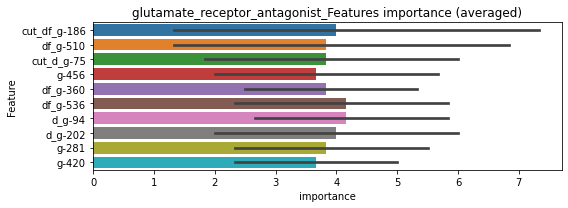

len(train_index) : 3510
len(valid_index) : 3511
================================= fold 1/2 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.10865	valid_1's binary_logloss: 0.20715
[200]	training's binary_logloss: 0.0508922	valid_1's binary_logloss: 0.190664
Early stopping, best iteration is:
[204]	training's binary_logloss: 0.0494485	valid_1's binary_logloss: 0.190407


len(train_index) : 3511
len(valid_index) : 3510
================================= fold 2/2 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.103609	valid_1's binary_logloss: 0.206709
Early stopping, best iteration is:
[182]	training's binary_logloss: 0.053339	valid_1's binary_logloss: 0.193097


glutamate_receptor_antagonist logloss: 0.19175156214867792


neg labels: 3289 → selected neg labels: 3286


gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00664215	valid_1's binary_logloss: 0.0168821
[200]	training's binary_logloss: 0.000860725	valid_1's binary_logloss: 0.0103103
Early stopping, best iteration is:
[258]	training's binary_logloss: 0.000510482	valid_1's binary_logloss: 0.00973602
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00725962	valid_1's binary_logloss: 0.0130229
[200]	training's binary_logloss: 0.000965736	valid_1's binary_logloss: 0.00547586
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.000653214	valid_1's binary_logloss: 0.00496417


1 / 3 AUC score:1.000
y_Threshold: 0.0015638, Threshold: 0.0020439, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00184, conf_1:0.00225
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0020439
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0120439
threshold: 0.0120439, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00662317	valid_1's binary_logloss: 0.0165449
[200]	training's binary_logloss: 0.000861587	valid_1's binary_logloss: 0.010388
Early stopping, best iteration is:
[255]	training's binary_logloss: 0.00051987	valid_1's binary_logloss: 0.00986813
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00734292	valid_1's binary_logloss: 0.0129472
[200]	training's binary_logloss: 0.000974431	valid_1's binary_logloss: 0.00566304
[300]	training's binary_logloss: 0.000477285	valid_1's binary_logloss: 0.00494203
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.000425243	valid_1's binary_logloss: 0.00484852


2 / 3 AUC score:1.000
y_Threshold: 0.0056812, Threshold: 0.0120439, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00076
Num_p_label: 2.0, conf_0:0.01084, conf_1:0.01325
threshold: 0.0120439, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00662317	valid_1's binary_logloss: 0.0165449
[200]	training's binary_logloss: 0.000861587	valid_1's binary_logloss: 0.010388
Early stopping, best iteration is:
[255]	training's binary_logloss: 0.00051987	valid_1's binary_logloss: 0.00986813
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00734292	valid_1's binary_logloss: 0.0129472
[200]	training's binary_logloss: 0.000974431	valid_1's binary_logloss: 0.00566304
[300]	training's binary_logloss: 0.000477285	valid_1's binary_logloss: 0.00494203
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.000425243	valid_1's binary_logloss: 0.00484852


3 / 3 AUC score:1.000
y_Threshold: 0.0056812, Threshold: 0.0120439, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00076
Num_p_label: 2.0, conf_0:0.01084, conf_1:0.01325
threshold: 0.0120439, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7793, y_label_rate: 0.0845631


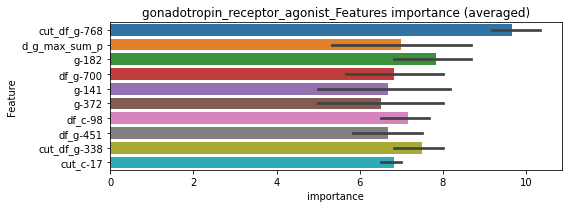

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0140739	valid_1's binary_logloss: 0.0219118
[200]	training's binary_logloss: 0.00203175	valid_1's binary_logloss: 0.00933279
[300]	training's binary_logloss: 0.000604522	valid_1's binary_logloss: 0.00764888
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000393257	valid_1's binary_logloss: 0.00736319


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0145486	valid_1's binary_logloss: 0.0216425
[200]	training's binary_logloss: 0.00203997	valid_1's binary_logloss: 0.00916585
[300]	training's binary_logloss: 0.000604657	valid_1's binary_logloss: 0.00755184
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.000492657	valid_1's binary_logloss: 0.00735436


gonadotropin_receptor_agonist logloss: 0.0073587789166722145


neg labels: 3289 → selected neg labels: 3279


gsk_inhibitor, len(trt): 60, len(othr): 3279, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0141572	valid_1's binary_logloss: 0.0436061
[200]	training's binary_logloss: 0.00222094	valid_1's binary_logloss: 0.0311392
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.000984134	valid_1's binary_logloss: 0.029301
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.014215	valid_1's binary_logloss: 0.0446119
[200]	training's binary_logloss: 0.00224705	valid_1's binary_logloss: 0.0296972
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000951514	valid_1's binary_logloss: 0.0276335


1 / 3 AUC score:0.999
y_Threshold: 0.0032892, Threshold: 0.0046492, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0200904 Vs.target_rate: 0.00252
Num_p_label: 80.0, conf_0:0.00418, conf_1:0.00511
Num_p_label: 80.0, Expected: 10.0, Adj_threshold_1: 0.0046492
Num_p_label: 8.0, Expected: 10.0, Adj_threshold_2: 0.0146492
threshold: 0.0146492, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0139759	valid_1's binary_logloss: 0.0381417
[200]	training's binary_logloss: 0.00214926	valid_1's binary_logloss: 0.024117
[300]	training's binary_logloss: 0.000847408	valid_1's binary_logloss: 0.022061
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.000877589	valid_1's binary_logloss: 0.0218643
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0143969	valid_1's binary_logloss: 0.0395725
[200]	training's binary_logloss: 0.00219679	valid_1's binary_logloss: 0.0254349
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.00132026	valid_1's binary_logloss: 0.0239162


2 / 3 AUC score:1.000
y_Threshold: 0.0136383, Threshold: 0.0146492, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0040181 Vs.target_rate: 0.00252
Num_p_label: 16.0, conf_0:0.01318, conf_1:0.01611
threshold: 0.0146492, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0133359	valid_1's binary_logloss: 0.0421056
[200]	training's binary_logloss: 0.00205451	valid_1's binary_logloss: 0.0282274
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.000915908	valid_1's binary_logloss: 0.0259146
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0146347	valid_1's binary_logloss: 0.0350095
[200]	training's binary_logloss: 0.00225502	valid_1's binary_logloss: 0.0192522
[300]	training's binary_logloss: 0.000885013	valid_1's binary_logloss: 0.0165068
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.000831576	valid_1's binary_logloss: 0.0162838


3 / 3 AUC score:1.000
y_Threshold: 0.0110404, Threshold: 0.0146492, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, conf_0:0.01318, conf_1:0.01611
threshold: 0.0146492, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 664.0/7774, y_label_rate: 0.0854129


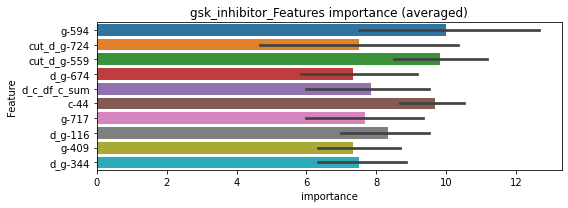

len(train_index) : 3887
len(valid_index) : 3887
================================= fold 1/2 gsk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0216777	valid_1's binary_logloss: 0.0426614
[200]	training's binary_logloss: 0.00425452	valid_1's binary_logloss: 0.0239983
[300]	training's binary_logloss: 0.00141695	valid_1's binary_logloss: 0.0205864
[400]	training's binary_logloss: 0.00069149	valid_1's binary_logloss: 0.0195139
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000591999	valid_1's binary_logloss: 0.0193233


len(train_index) : 3887
len(valid_index) : 3887
================================= fold 2/2 gsk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.022604	valid_1's binary_logloss: 0.0371085
[200]	training's binary_logloss: 0.00439711	valid_1's binary_logloss: 0.0187147
[300]	training's binary_logloss: 0.00146962	valid_1's binary_logloss: 0.0154127
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.0011228	valid_1's binary_logloss: 0.0150575


gsk_inhibitor logloss: 0.017190417432285523


neg labels: 3289 → selected neg labels: 3277


hcv_inhibitor, len(trt): 72, len(othr): 3277, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0234274	valid_1's binary_logloss: 0.0798304
Early stopping, best iteration is:
[173]	training's binary_logloss: 0.00602649	valid_1's binary_logloss: 0.0706936
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0234221	valid_1's binary_logloss: 0.0757012
[200]	training's binary_logloss: 0.00423193	valid_1's binary_logloss: 0.0661208
Early stopping, best iteration is:
[196]	training's binary_logloss: 0.00445814	valid_1's binary_logloss: 0.0658087


1 / 3 AUC score:0.996
y_Threshold: 0.0109430, Threshold: 0.0118675, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 152 → Positive_corect_labels: 645/3780
p_label_rate: 0.0200904 Vs.target_rate: 0.00302
Num_p_label: 80.0, conf_0:0.01068, conf_1:0.01305
Num_p_label: 80.0, Expected: 12.0, Adj_threshold_1: 0.0118675
Num_p_label: 1.0, Expected: 12.0, Adj_threshold_2: 0.0218675
threshold: 0.0218675, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 645.0/3780, y_label_rate: 0.1706349
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0209807	valid_1's binary_logloss: 0.0778683
Early stopping, best iteration is:
[165]	training's binary_logloss: 0.00597608	valid_1's binary_logloss: 0.0685648
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0240711	valid_1's binary_logloss: 0.061528
[200]	training's binary_logloss: 0.00428778	valid_1's binary_logloss: 0.0480457
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00276569	valid_1's binary_logloss: 0.0468787


2 / 3 AUC score:0.999
y_Threshold: 0.0205401, Threshold: 0.0218675, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 26 → Positive_corect_labels: 632.0/3754
p_label_rate: 0.0020090 Vs.target_rate: 0.00302
Num_p_label: 8.0, conf_0:0.01968, conf_1:0.02405
threshold: 0.0218675, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 632.0/3754, y_label_rate: 0.1683538
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0192953	valid_1's binary_logloss: 0.0631794
[200]	training's binary_logloss: 0.00326549	valid_1's binary_logloss: 0.0547772
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.00367528	valid_1's binary_logloss: 0.0545558
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0228865	valid_1's binary_logloss: 0.0591168
[200]	training's binary_logloss: 0.00394357	valid_1's binary_logloss: 0.0447775
Early stopping, best iteration is:
[236]	training's binary_logloss: 0.00254862	valid_1's binary_logloss: 0.0430713


3 / 3 AUC score:1.000
y_Threshold: 0.0160781, Threshold: 0.0218675, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 623.0/3736
p_label_rate: 0.0002511 Vs.target_rate: 0.00302
Num_p_label: 1.0, conf_0:0.01968, conf_1:0.02405
Num_p_label: 1.0, Expected: 12.0, Adj_threshold_1: 0.0218675
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_2: 0.0118675
threshold: 0.0118675, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 644.0/7718, y_label_rate: 0.0834413


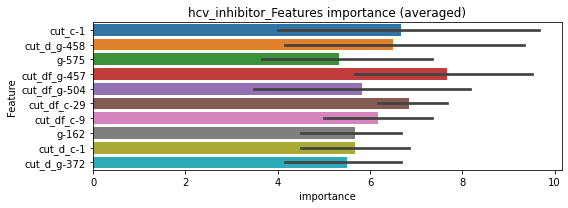

len(train_index) : 3859
len(valid_index) : 3859
================================= fold 1/2 hcv_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0298793	valid_1's binary_logloss: 0.0583268
[200]	training's binary_logloss: 0.00720348	valid_1's binary_logloss: 0.0405753
[300]	training's binary_logloss: 0.0025012	valid_1's binary_logloss: 0.0383638
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.00260801	valid_1's binary_logloss: 0.0382486


len(train_index) : 3859
len(valid_index) : 3859
================================= fold 2/2 hcv_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0294489	valid_1's binary_logloss: 0.052553
[200]	training's binary_logloss: 0.00751921	valid_1's binary_logloss: 0.034438
[300]	training's binary_logloss: 0.00259074	valid_1's binary_logloss: 0.0317397
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.00261269	valid_1's binary_logloss: 0.0317062


hcv_inhibitor logloss: 0.03497740475937618


neg labels: 3289 → selected neg labels: 3271


hdac_inhibitor, len(trt): 106, len(othr): 3271, target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0146121	valid_1's binary_logloss: 0.0498257
[200]	training's binary_logloss: 0.00224376	valid_1's binary_logloss: 0.0373207
Early stopping, best iteration is:
[219]	training's binary_logloss: 0.00176202	valid_1's binary_logloss: 0.0370097
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0155115	valid_1's binary_logloss: 0.0528514
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00309739	valid_1's binary_logloss: 0.041302


1 / 3 AUC score:0.999
y_Threshold: 0.0086099, Threshold: 0.0322945, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 137 → Positive_corect_labels: 651/3788
p_label_rate: 0.0200904 Vs.target_rate: 0.00445
Num_p_label: 80.0, conf_0:0.02907, conf_1:0.03552
Num_p_label: 80.0, Expected: 17.7, Adj_threshold_1: 0.0322945
Num_p_label: 60.0, Expected: 17.7, Adj_threshold_2: 0.0422945
Num_p_label: 43.0, Expected: 17.7, Adj_threshold_3: 0.0522945
Num_p_label: 34.0, Expected: 17.7, Adj_threshold_4: 0.0622945
threshold: 0.0622945, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 651.0/3788, y_label_rate: 0.1718585
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0125845	valid_1's binary_logloss: 0.0556374
[200]	training's binary_logloss: 0.00190416	valid_1's binary_logloss: 0.0452507
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00121055	valid_1's binary_logloss: 0.0433438
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0153219	valid_1's binary_logloss: 0.0413041
[200]	training's binary_logloss: 0.00236383	valid_1's binary_logloss: 0.0234717
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.00100226	valid_1's binary_logloss: 0.0213448


2 / 3 AUC score:1.000
y_Threshold: 0.0249959, Threshold: 0.0622945, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 642.0/3770
p_label_rate: 0.0351582 Vs.target_rate: 0.00445
Num_p_label: 140.0, conf_0:0.05607, conf_1:0.06852
Num_p_label: 140.0, Expected: 17.7, Adj_threshold_1: 0.0622945
Num_p_label: 132.0, Expected: 17.7, Adj_threshold_2: 0.0722945
Num_p_label: 120.0, Expected: 17.7, Adj_threshold_3: 0.0822945
Num_p_label: 109.0, Expected: 17.7, Adj_threshold_4: 0.0922945
Num_p_label: 100.0, Expected: 17.7, Adj_threshold_5: 0.1022945
Num_p_label: 89.0, Expected: 17.7, Adj_threshold_6: 0.1122945
Num_p_label: 84.0, Expected: 17.7, Adj_threshold_7: 0.1222945
Num_p_label: 78.0, Expected: 17.7, Adj_threshold_8: 0.1322945
Num_p_label: 74.0, Expected: 17.7, Adj_threshold_9: 0.1422945
Num_p_label: 63.0, Expected: 17.7, Adj_threshold_10: 0.1522945
threshold: 0.1622945, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 642.0/3770, y_label_rate: 0.

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0128788	valid_1's binary_logloss: 0.0393358
[200]	training's binary_logloss: 0.00194927	valid_1's binary_logloss: 0.0233352
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000842405	valid_1's binary_logloss: 0.0206873
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0126994	valid_1's binary_logloss: 0.042695
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00216081	valid_1's binary_logloss: 0.031286


3 / 3 AUC score:1.000
y_Threshold: 0.0403972, Threshold: 0.1622945, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 638.0/3762
p_label_rate: 0.0238574 Vs.target_rate: 0.00445
Num_p_label: 95.0, conf_0:0.14607, conf_1:0.17852
Num_p_label: 95.0, Expected: 17.7, Adj_threshold_1: 0.1622945
Num_p_label: 90.0, Expected: 17.7, Adj_threshold_2: 0.1722945
Num_p_label: 81.0, Expected: 17.7, Adj_threshold_3: 0.1822945
Num_p_label: 76.0, Expected: 17.7, Adj_threshold_4: 0.1922945
Num_p_label: 74.0, Expected: 17.7, Adj_threshold_5: 0.2022945
Num_p_label: 70.0, Expected: 17.7, Adj_threshold_6: 0.2122945
Num_p_label: 66.0, Expected: 17.7, Adj_threshold_7: 0.2222945
Num_p_label: 60.0, Expected: 17.7, Adj_threshold_8: 0.2322945
Num_p_label: 55.0, Expected: 17.7, Adj_threshold_9: 0.2422945
Num_p_label: 49.0, Expected: 17.7, Adj_threshold_10: 0.2522945
threshold: 0.2622945, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 682.0/7744, y_label_rate: 0.0880682

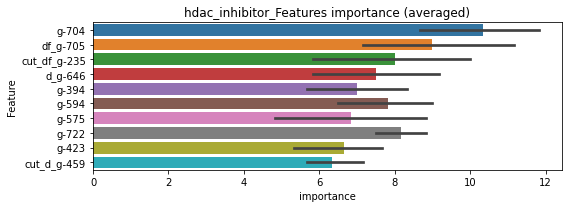

len(train_index) : 3872
len(valid_index) : 3872
================================= fold 1/2 hdac_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0235747	valid_1's binary_logloss: 0.0542195
[200]	training's binary_logloss: 0.00499387	valid_1's binary_logloss: 0.0370993
[300]	training's binary_logloss: 0.0017164	valid_1's binary_logloss: 0.0336437
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.00119163	valid_1's binary_logloss: 0.0331434


len(train_index) : 3872
len(valid_index) : 3872
================================= fold 2/2 hdac_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0252141	valid_1's binary_logloss: 0.0449558
[200]	training's binary_logloss: 0.00546783	valid_1's binary_logloss: 0.0277515
[300]	training's binary_logloss: 0.00188433	valid_1's binary_logloss: 0.0250105
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00200093	valid_1's binary_logloss: 0.0248365


hdac_inhibitor logloss: 0.0289899543947319


neg labels: 3289 → selected neg labels: 3279


histamine_receptor_agonist, len(trt): 59, len(othr): 3279, target_rate: 0.0024775 → Adj_target_rate: 0.0026880
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0193563	valid_1's binary_logloss: 0.0579881
Early stopping, best iteration is:
[181]	training's binary_logloss: 0.0045357	valid_1's binary_logloss: 0.0490817
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204944	valid_1's binary_logloss: 0.0607483
[200]	training's binary_logloss: 0.00362099	valid_1's binary_logloss: 0.0473857
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00233845	valid_1's binary_logloss: 0.0461759


1 / 3 AUC score:0.999
y_Threshold: 0.0084745, Threshold: 0.0083524, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 138 → Positive_corect_labels: 652/3796
p_label_rate: 0.0200904 Vs.target_rate: 0.00248
Num_p_label: 80.0, conf_0:0.00752, conf_1:0.00919
Num_p_label: 80.0, Expected: 9.9, Adj_threshold_1: 0.0083524
Num_p_label: 1.0, Expected: 9.9, Adj_threshold_2: 0.0183524
threshold: 0.0183524, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0185493	valid_1's binary_logloss: 0.0649988
Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00484072	valid_1's binary_logloss: 0.0577871
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0206166	valid_1's binary_logloss: 0.0592008
[200]	training's binary_logloss: 0.00356371	valid_1's binary_logloss: 0.0469008
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00390898	valid_1's binary_logloss: 0.0466574


2 / 3 AUC score:0.999
y_Threshold: 0.0202516, Threshold: 0.0183524, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 643.0/3778
p_label_rate: 0.0020090 Vs.target_rate: 0.00248
Num_p_label: 8.0, conf_0:0.01652, conf_1:0.02019
threshold: 0.0183524, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 643.0/3778, y_label_rate: 0.1701959
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174565	valid_1's binary_logloss: 0.0504162
[200]	training's binary_logloss: 0.00299168	valid_1's binary_logloss: 0.0390393
Early stopping, best iteration is:
[234]	training's binary_logloss: 0.00199784	valid_1's binary_logloss: 0.0384074
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0190279	valid_1's binary_logloss: 0.0547461
[200]	training's binary_logloss: 0.0031626	valid_1's binary_logloss: 0.0428399
Early stopping, best iteration is:
[206]	training's binary_logloss: 0.00293512	valid_1's binary_logloss: 0.0424861


3 / 3 AUC score:1.000
y_Threshold: 0.0167556, Threshold: 0.0183524, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 638.0/3768
p_label_rate: 0.0002511 Vs.target_rate: 0.00248
Num_p_label: 1.0, conf_0:0.01652, conf_1:0.02019
Num_p_label: 1.0, Expected: 9.9, Adj_threshold_1: 0.0183524
Num_p_label: 75.0, Expected: 9.9, Adj_threshold_2: 0.0083524
threshold: 0.0083524, positive_p_label: 75.0/3982, p_label_rate: 0.0188348
positive_y_label: 713.0/7750, y_label_rate: 0.0920000


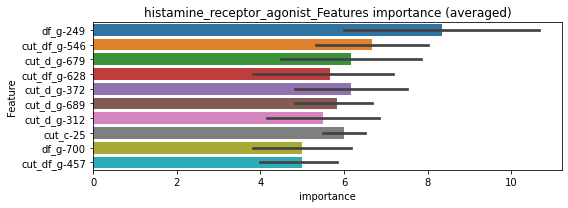

len(train_index) : 3875
len(valid_index) : 3875
================================= fold 1/2 histamine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0399313	valid_1's binary_logloss: 0.0822583
[200]	training's binary_logloss: 0.0110101	valid_1's binary_logloss: 0.0659835
Early stopping, best iteration is:
[234]	training's binary_logloss: 0.00762156	valid_1's binary_logloss: 0.0651036


len(train_index) : 3875
len(valid_index) : 3875
================================= fold 2/2 histamine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0429371	valid_1's binary_logloss: 0.0778936
[200]	training's binary_logloss: 0.0121859	valid_1's binary_logloss: 0.059262
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.00689292	valid_1's binary_logloss: 0.0578634


histamine_receptor_agonist logloss: 0.06148348638837745


neg labels: 3289 → selected neg labels: 3249


histamine_receptor_antagonist, len(trt): 241, len(othr): 3249, target_rate: 0.0101201 → Adj_target_rate: 0.0088902
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0675203	valid_1's binary_logloss: 0.243896
Early stopping, best iteration is:
[117]	training's binary_logloss: 0.0524903	valid_1's binary_logloss: 0.241404
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0730956	valid_1's binary_logloss: 0.219937
Early stopping, best iteration is:
[158]	training's binary_logloss: 0.0339386	valid_1's binary_logloss: 0.21198


1 / 3 AUC score:0.904
y_Threshold: 0.0731888, Threshold: 0.0930361, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 439 → Positive_corect_labels: 495/3459
p_label_rate: 0.0200904 Vs.target_rate: 0.01012
Num_p_label: 80.0, conf_0:0.08373, conf_1:0.10234
threshold: 0.0930361, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 495.0/3459, y_label_rate: 0.1431049
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0348713	valid_1's binary_logloss: 0.128202
Early stopping, best iteration is:
[157]	training's binary_logloss: 0.0134584	valid_1's binary_logloss: 0.120055
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0359538	valid_1's binary_logloss: 0.114337
Early stopping, best iteration is:
[151]	training's binary_logloss: 0.0153025	valid_1's binary_logloss: 0.105945


2 / 3 AUC score:0.982
y_Threshold: 0.0440782, Threshold: 0.0930361, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 98 → Positive_corect_labels: 446.0/3361
p_label_rate: 0.0005023 Vs.target_rate: 0.01012
Num_p_label: 2.0, conf_0:0.08373, conf_1:0.10234
Num_p_label: 2.0, Expected: 40.3, Adj_threshold_1: 0.0930361
Num_p_label: 3.0, Expected: 40.3, Adj_threshold_2: 0.0830361
Num_p_label: 5.0, Expected: 40.3, Adj_threshold_3: 0.0730361
Num_p_label: 13.0, Expected: 40.3, Adj_threshold_4: 0.0630361
Num_p_label: 30.0, Expected: 40.3, Adj_threshold_5: 0.0530361
threshold: 0.0530361, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 446.0/3361, y_label_rate: 0.1326986
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.022039	valid_1's binary_logloss: 0.0801684
[200]	training's binary_logloss: 0.00410208	valid_1's binary_logloss: 0.0688072
Early stopping, best iteration is:
[202]	training's binary_logloss: 0.00400805	valid_1's binary_logloss: 0.0685456
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0248499	valid_1's binary_logloss: 0.0708213
Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00550308	valid_1's binary_logloss: 0.0564401


3 / 3 AUC score:0.996
y_Threshold: 0.0209579, Threshold: 0.0530361, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 30 → Positive_corect_labels: 431.0/3331
p_label_rate: 0.0000000 Vs.target_rate: 0.01012
Num_p_label: 0.0, conf_0:0.04773, conf_1:0.05834
Num_p_label: 0.0, Expected: 40.3, Adj_threshold_1: 0.0530361
Num_p_label: 2.0, Expected: 40.3, Adj_threshold_2: 0.0430361
Num_p_label: 3.0, Expected: 40.3, Adj_threshold_3: 0.0330361
Num_p_label: 25.0, Expected: 40.3, Adj_threshold_4: 0.0230361
threshold: 0.0230361, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 456.0/7313, y_label_rate: 0.0623547


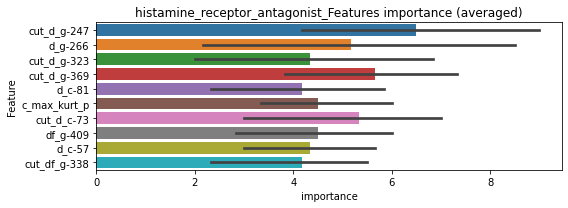

len(train_index) : 3656
len(valid_index) : 3657
================================= fold 1/2 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0275579	valid_1's binary_logloss: 0.0658383
[200]	training's binary_logloss: 0.00749746	valid_1's binary_logloss: 0.0494376
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00421053	valid_1's binary_logloss: 0.0474517


len(train_index) : 3657
len(valid_index) : 3656
================================= fold 2/2 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0296001	valid_1's binary_logloss: 0.0589386
[200]	training's binary_logloss: 0.00820008	valid_1's binary_logloss: 0.0418661
[300]	training's binary_logloss: 0.0030979	valid_1's binary_logloss: 0.0383138
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00181842	valid_1's binary_logloss: 0.0377041


histamine_receptor_antagonist logloss: 0.042578548853071295


neg labels: 3289 → selected neg labels: 3285


histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00766101	valid_1's binary_logloss: 0.0218152
[200]	training's binary_logloss: 0.000994889	valid_1's binary_logloss: 0.0127282
[300]	training's binary_logloss: 0.000461462	valid_1's binary_logloss: 0.0112419
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.000452915	valid_1's binary_logloss: 0.0111992
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0087807	valid_1's binary_logloss: 0.0161963
[200]	training's binary_logloss: 0.00119528	valid_1's binary_logloss: 0.00684002
[300]	training's binary_logloss: 0.000523083	valid_1's binary_logloss: 0.00565112
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.000451625	valid_1's binary_logloss: 0.00546528


1 / 3 AUC score:1.000
y_Threshold: 0.0010792, Threshold: 0.0012473, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.00112, conf_1:0.00137
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0012473
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_2: 0.0112473
threshold: 0.0112473, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00781166	valid_1's binary_logloss: 0.0214513
[200]	training's binary_logloss: 0.00101947	valid_1's binary_logloss: 0.0121187
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.000571809	valid_1's binary_logloss: 0.0109311
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00926488	valid_1's binary_logloss: 0.0158053
[200]	training's binary_logloss: 0.00121899	valid_1's binary_logloss: 0.00592095
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.000626303	valid_1's binary_logloss: 0.00480852


2 / 3 AUC score:1.000
y_Threshold: 0.0152232, Threshold: 0.0112473, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00101
Num_p_label: 2.0, conf_0:0.01012, conf_1:0.01237
threshold: 0.0112473, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00781166	valid_1's binary_logloss: 0.0214513
[200]	training's binary_logloss: 0.00101947	valid_1's binary_logloss: 0.0121187
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.000571809	valid_1's binary_logloss: 0.0109311
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00926488	valid_1's binary_logloss: 0.0158053
[200]	training's binary_logloss: 0.00121899	valid_1's binary_logloss: 0.00592095
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.000626303	valid_1's binary_logloss: 0.00480852


3 / 3 AUC score:1.000
y_Threshold: 0.0152232, Threshold: 0.0112473, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00101
Num_p_label: 2.0, conf_0:0.01012, conf_1:0.01237
threshold: 0.0112473, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7792, y_label_rate: 0.0845739


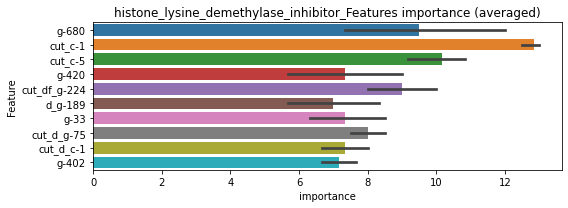

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0151013	valid_1's binary_logloss: 0.0232921
[200]	training's binary_logloss: 0.00223906	valid_1's binary_logloss: 0.00966698
[300]	training's binary_logloss: 0.000667472	valid_1's binary_logloss: 0.00765936
[400]	training's binary_logloss: 0.000341948	valid_1's binary_logloss: 0.00713916
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000346008	valid_1's binary_logloss: 0.00711652


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0154986	valid_1's binary_logloss: 0.0232353
[200]	training's binary_logloss: 0.00233717	valid_1's binary_logloss: 0.00904259
[300]	training's binary_logloss: 0.000708922	valid_1's binary_logloss: 0.00680625
[400]	training's binary_logloss: 0.000363748	valid_1's binary_logloss: 0.00639289
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000358623	valid_1's binary_logloss: 0.00639007


histone_lysine_demethylase_inhibitor logloss: 0.0067532922404932244


neg labels: 3289 → selected neg labels: 3283


histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3283, target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0101302	valid_1's binary_logloss: 0.0339844
[200]	training's binary_logloss: 0.00134491	valid_1's binary_logloss: 0.0229253
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.000773374	valid_1's binary_logloss: 0.0216221
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0107304	valid_1's binary_logloss: 0.0248448
[200]	training's binary_logloss: 0.00158947	valid_1's binary_logloss: 0.0152459
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.000835058	valid_1's binary_logloss: 0.0144948


1 / 3 AUC score:1.000
y_Threshold: 0.0022807, Threshold: 0.0024961, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00134
Num_p_label: 80.0, conf_0:0.00225, conf_1:0.00275
Num_p_label: 80.0, Expected: 5.4, Adj_threshold_1: 0.0024961
Num_p_label: 1.0, Expected: 5.4, Adj_threshold_2: 0.0124961
threshold: 0.0124961, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0103588	valid_1's binary_logloss: 0.0320304
[200]	training's binary_logloss: 0.00136112	valid_1's binary_logloss: 0.0216315
Early stopping, best iteration is:
[247]	training's binary_logloss: 0.000816192	valid_1's binary_logloss: 0.0202701
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0112601	valid_1's binary_logloss: 0.0236973
[200]	training's binary_logloss: 0.00161927	valid_1's binary_logloss: 0.013967
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.000944977	valid_1's binary_logloss: 0.0130826


2 / 3 AUC score:1.000
y_Threshold: 0.0072501, Threshold: 0.0124961, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0010045 Vs.target_rate: 0.00134
Num_p_label: 4.0, conf_0:0.01125, conf_1:0.01375
threshold: 0.0124961, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0107714	valid_1's binary_logloss: 0.0246288
[200]	training's binary_logloss: 0.00151628	valid_1's binary_logloss: 0.0139158
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.000713969	valid_1's binary_logloss: 0.0125154
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.010398	valid_1's binary_logloss: 0.0271627
[200]	training's binary_logloss: 0.00149085	valid_1's binary_logloss: 0.0162915
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.000936221	valid_1's binary_logloss: 0.0151151


3 / 3 AUC score:1.000
y_Threshold: 0.0094595, Threshold: 0.0124961, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0010045 Vs.target_rate: 0.00134
Num_p_label: 4.0, conf_0:0.01125, conf_1:0.01375
threshold: 0.0124961, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 659.0/7787, y_label_rate: 0.0846282


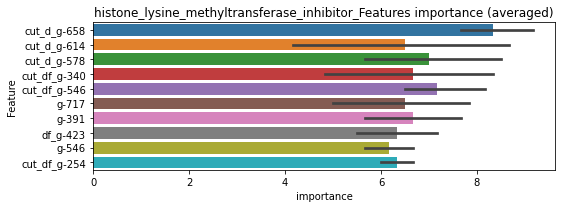

len(train_index) : 3893
len(valid_index) : 3894
================================= fold 1/2 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0182117	valid_1's binary_logloss: 0.0326027
[200]	training's binary_logloss: 0.00308954	valid_1's binary_logloss: 0.017338
[300]	training's binary_logloss: 0.000951521	valid_1's binary_logloss: 0.0152728
Early stopping, best iteration is:
[342]	training's binary_logloss: 0.000670017	valid_1's binary_logloss: 0.0149679


len(train_index) : 3894
len(valid_index) : 3893
================================= fold 2/2 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0188661	valid_1's binary_logloss: 0.0311051
[200]	training's binary_logloss: 0.00332745	valid_1's binary_logloss: 0.0149962
[300]	training's binary_logloss: 0.00102985	valid_1's binary_logloss: 0.0124191
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.000810134	valid_1's binary_logloss: 0.0120454


histone_lysine_methyltransferase_inhibitor logloss: 0.0135068174496382


neg labels: 3289 → selected neg labels: 3278


hiv_inhibitor, len(trt): 72, len(othr): 3278, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0252673	valid_1's binary_logloss: 0.075363
[200]	training's binary_logloss: 0.00456273	valid_1's binary_logloss: 0.0615557
Early stopping, best iteration is:
[215]	training's binary_logloss: 0.00375438	valid_1's binary_logloss: 0.0610997
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0258304	valid_1's binary_logloss: 0.0762229
Early stopping, best iteration is:
[159]	training's binary_logloss: 0.00861831	valid_1's binary_logloss: 0.0661519


1 / 3 AUC score:0.996
y_Threshold: 0.0164587, Threshold: 0.0169113, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 150 → Positive_corect_labels: 646/3783
p_label_rate: 0.0200904 Vs.target_rate: 0.00302
Num_p_label: 80.0, conf_0:0.01522, conf_1:0.01860
Num_p_label: 80.0, Expected: 12.0, Adj_threshold_1: 0.0169113
Num_p_label: 8.0, Expected: 12.0, Adj_threshold_2: 0.0269113
threshold: 0.0269113, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 646.0/3783, y_label_rate: 0.1707639
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0221272	valid_1's binary_logloss: 0.0822041
Early stopping, best iteration is:
[186]	training's binary_logloss: 0.00464518	valid_1's binary_logloss: 0.0730151
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0259483	valid_1's binary_logloss: 0.0657215
[200]	training's binary_logloss: 0.00453343	valid_1's binary_logloss: 0.0517542
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.0050124	valid_1's binary_logloss: 0.0515461


2 / 3 AUC score:0.997
y_Threshold: 0.0220876, Threshold: 0.0269113, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 34 → Positive_corect_labels: 629.0/3749
p_label_rate: 0.0020090 Vs.target_rate: 0.00302
Num_p_label: 8.0, conf_0:0.02422, conf_1:0.02960
threshold: 0.0269113, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 629.0/3749, y_label_rate: 0.1677781
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0210696	valid_1's binary_logloss: 0.0586648
[200]	training's binary_logloss: 0.00344766	valid_1's binary_logloss: 0.0441175
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00388172	valid_1's binary_logloss: 0.0440242
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0202775	valid_1's binary_logloss: 0.0599468
[200]	training's binary_logloss: 0.00339084	valid_1's binary_logloss: 0.0457877
Early stopping, best iteration is:
[206]	training's binary_logloss: 0.00313891	valid_1's binary_logloss: 0.045494


3 / 3 AUC score:1.000
y_Threshold: 0.0242156, Threshold: 0.0269113, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 620.0/3731
p_label_rate: 0.0010045 Vs.target_rate: 0.00302
Num_p_label: 4.0, conf_0:0.02422, conf_1:0.02960
Num_p_label: 4.0, Expected: 12.0, Adj_threshold_1: 0.0269113
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_2: 0.0169113
threshold: 0.0169113, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 643.0/7713, y_label_rate: 0.0833657


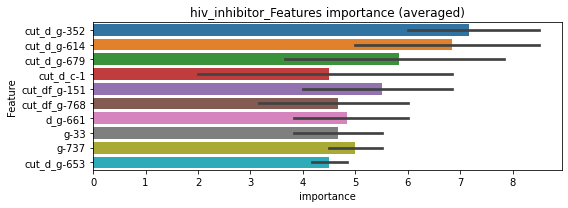

len(train_index) : 3856
len(valid_index) : 3857
================================= fold 1/2 hiv_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0293671	valid_1's binary_logloss: 0.0578581
[200]	training's binary_logloss: 0.00726465	valid_1's binary_logloss: 0.0385014
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.0028816	valid_1's binary_logloss: 0.0361265


len(train_index) : 3857
len(valid_index) : 3856
================================= fold 2/2 hiv_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0311947	valid_1's binary_logloss: 0.0544577
[200]	training's binary_logloss: 0.00779516	valid_1's binary_logloss: 0.0343794
[300]	training's binary_logloss: 0.00273811	valid_1's binary_logloss: 0.0314066
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.00175831	valid_1's binary_logloss: 0.0309378


hiv_inhibitor logloss: 0.033532485742098675


neg labels: 3289 → selected neg labels: 3282


hmgcr_inhibitor, len(trt): 283, len(othr): 3282, target_rate: 0.0118838 → Adj_target_rate: 0.0101910
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0326263	valid_1's binary_logloss: 0.114442
Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00743473	valid_1's binary_logloss: 0.0887354
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0309944	valid_1's binary_logloss: 0.129579
[200]	training's binary_logloss: 0.00575993	valid_1's binary_logloss: 0.108444
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00643385	valid_1's binary_logloss: 0.107961


1 / 3 AUC score:0.989
y_Threshold: 0.0356702, Threshold: 0.1200818, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 186 → Positive_corect_labels: 629/3752
p_label_rate: 0.0200904 Vs.target_rate: 0.01188
Num_p_label: 80.0, conf_0:0.10807, conf_1:0.13209
threshold: 0.1200818, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 629.0/3752, y_label_rate: 0.1676439
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0262113	valid_1's binary_logloss: 0.0892172
[200]	training's binary_logloss: 0.00450223	valid_1's binary_logloss: 0.0587043
Early stopping, best iteration is:
[236]	training's binary_logloss: 0.00301421	valid_1's binary_logloss: 0.055255
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0263011	valid_1's binary_logloss: 0.0908639
[200]	training's binary_logloss: 0.00453224	valid_1's binary_logloss: 0.0632008
Early stopping, best iteration is:
[218]	training's binary_logloss: 0.00358493	valid_1's binary_logloss: 0.0610805


2 / 3 AUC score:0.998
y_Threshold: 0.0735216, Threshold: 0.1200818, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 34 → Positive_corect_labels: 612.0/3718
p_label_rate: 0.0386740 Vs.target_rate: 0.01188
Num_p_label: 154.0, conf_0:0.10807, conf_1:0.13209
Num_p_label: 154.0, Expected: 47.3, Adj_threshold_1: 0.1200818
Num_p_label: 144.0, Expected: 47.3, Adj_threshold_2: 0.1300818
Num_p_label: 129.0, Expected: 47.3, Adj_threshold_3: 0.1400818
Num_p_label: 118.0, Expected: 47.3, Adj_threshold_4: 0.1500818
Num_p_label: 110.0, Expected: 47.3, Adj_threshold_5: 0.1600818
Num_p_label: 108.0, Expected: 47.3, Adj_threshold_6: 0.1700818
Num_p_label: 102.0, Expected: 47.3, Adj_threshold_7: 0.1800818
Num_p_label: 96.0, Expected: 47.3, Adj_threshold_8: 0.1900818
Num_p_label: 93.0, Expected: 47.3, Adj_threshold_9: 0.2000818
threshold: 0.2000818, positive_p_label: 93.0/3982, p_label_rate: 0.0233551
positive_y_label: 612.0/3718, y_label_rate: 0.1646046
================= Pseudo labeling 3 / 3 =============

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0234367	valid_1's binary_logloss: 0.083939
[200]	training's binary_logloss: 0.00385471	valid_1's binary_logloss: 0.0538614
[300]	training's binary_logloss: 0.00150533	valid_1's binary_logloss: 0.0468931
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00120711	valid_1's binary_logloss: 0.0444921
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0248177	valid_1's binary_logloss: 0.0817833
[200]	training's binary_logloss: 0.00407387	valid_1's binary_logloss: 0.0549056
[300]	training's binary_logloss: 0.00155273	valid_1's binary_logloss: 0.0496951
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.0012573	valid_1's binary_logloss: 0.0476856


3 / 3 AUC score:0.997
y_Threshold: 0.0697112, Threshold: 0.2000818, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 603.0/3700
p_label_rate: 0.0205927 Vs.target_rate: 0.01188
Num_p_label: 82.0, conf_0:0.18007, conf_1:0.22009
threshold: 0.2000818, positive_p_label: 82.0/3982, p_label_rate: 0.0205927
positive_y_label: 685.0/7682, y_label_rate: 0.0891695


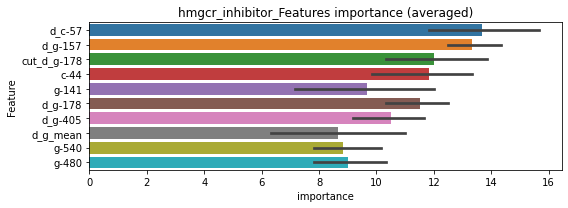

len(train_index) : 3841
len(valid_index) : 3841
================================= fold 1/2 hmgcr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0379174	valid_1's binary_logloss: 0.0985152
[200]	training's binary_logloss: 0.00925245	valid_1's binary_logloss: 0.0726826
[300]	training's binary_logloss: 0.00335524	valid_1's binary_logloss: 0.0670781
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.00351328	valid_1's binary_logloss: 0.066883


len(train_index) : 3841
len(valid_index) : 3841
================================= fold 2/2 hmgcr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0433834	valid_1's binary_logloss: 0.0850907
[200]	training's binary_logloss: 0.0112115	valid_1's binary_logloss: 0.0534557
[300]	training's binary_logloss: 0.00415708	valid_1's binary_logloss: 0.0441735
[400]	training's binary_logloss: 0.00193171	valid_1's binary_logloss: 0.0399905
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00144408	valid_1's binary_logloss: 0.038464


hmgcr_inhibitor logloss: 0.05267348535635625


neg labels: 3289 → selected neg labels: 3275


hsp_inhibitor, len(trt): 93, len(othr): 3275, target_rate: 0.0039053 → Adj_target_rate: 0.0039574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0104365	valid_1's binary_logloss: 0.0279211
[200]	training's binary_logloss: 0.00146979	valid_1's binary_logloss: 0.0164143
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.000939653	valid_1's binary_logloss: 0.015321
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0102121	valid_1's binary_logloss: 0.0308111
[200]	training's binary_logloss: 0.00148942	valid_1's binary_logloss: 0.0210213
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.00102073	valid_1's binary_logloss: 0.0203794


1 / 3 AUC score:1.000
y_Threshold: 0.0032075, Threshold: 0.0100387, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 131 → Positive_corect_labels: 655/3799
p_label_rate: 0.0200904 Vs.target_rate: 0.00391
Num_p_label: 80.0, conf_0:0.00903, conf_1:0.01104
Num_p_label: 80.0, Expected: 15.6, Adj_threshold_1: 0.0100387
Num_p_label: 46.0, Expected: 15.6, Adj_threshold_2: 0.0200387
Num_p_label: 29.0, Expected: 15.6, Adj_threshold_3: 0.0300387
threshold: 0.0300387, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 655.0/3799, y_label_rate: 0.1724138
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0100475	valid_1's binary_logloss: 0.0282501
[200]	training's binary_logloss: 0.00139255	valid_1's binary_logloss: 0.0163656
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.000889609	valid_1's binary_logloss: 0.0151348
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0101173	valid_1's binary_logloss: 0.0330588
[200]	training's binary_logloss: 0.00145077	valid_1's binary_logloss: 0.0236772
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.000936649	valid_1's binary_logloss: 0.022546


2 / 3 AUC score:1.000
y_Threshold: 0.0364734, Threshold: 0.0300387, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 648.0/3785
p_label_rate: 0.0369161 Vs.target_rate: 0.00391
Num_p_label: 147.0, conf_0:0.02703, conf_1:0.03304
Num_p_label: 147.0, Expected: 15.6, Adj_threshold_1: 0.0300387
Num_p_label: 121.0, Expected: 15.6, Adj_threshold_2: 0.0400387
Num_p_label: 105.0, Expected: 15.6, Adj_threshold_3: 0.0500387
Num_p_label: 98.0, Expected: 15.6, Adj_threshold_4: 0.0600387
Num_p_label: 84.0, Expected: 15.6, Adj_threshold_5: 0.0700387
Num_p_label: 76.0, Expected: 15.6, Adj_threshold_6: 0.0800387
Num_p_label: 65.0, Expected: 15.6, Adj_threshold_7: 0.0900387
Num_p_label: 60.0, Expected: 15.6, Adj_threshold_8: 0.1000387
Num_p_label: 58.0, Expected: 15.6, Adj_threshold_9: 0.1100387
Num_p_label: 50.0, Expected: 15.6, Adj_threshold_10: 0.1200387
threshold: 0.1300387, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 648.0/3785, y_label_rate: 0.17

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00859947	valid_1's binary_logloss: 0.0257818
[200]	training's binary_logloss: 0.00117239	valid_1's binary_logloss: 0.0138191
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00060832	valid_1's binary_logloss: 0.0125553
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00912321	valid_1's binary_logloss: 0.030116
[200]	training's binary_logloss: 0.00128881	valid_1's binary_logloss: 0.0176813
[300]	training's binary_logloss: 0.000573999	valid_1's binary_logloss: 0.0152039
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.000559522	valid_1's binary_logloss: 0.0150894


3 / 3 AUC score:1.000
y_Threshold: 0.0317351, Threshold: 0.1300387, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 645.0/3779
p_label_rate: 0.0145655 Vs.target_rate: 0.00391
Num_p_label: 58.0, conf_0:0.11703, conf_1:0.14304
Num_p_label: 58.0, Expected: 15.6, Adj_threshold_1: 0.1300387
Num_p_label: 55.0, Expected: 15.6, Adj_threshold_2: 0.1400387
Num_p_label: 51.0, Expected: 15.6, Adj_threshold_3: 0.1500387
Num_p_label: 48.0, Expected: 15.6, Adj_threshold_4: 0.1600387
Num_p_label: 46.0, Expected: 15.6, Adj_threshold_5: 0.1700387
Num_p_label: 44.0, Expected: 15.6, Adj_threshold_6: 0.1800387
Num_p_label: 42.0, Expected: 15.6, Adj_threshold_7: 0.1900387
Num_p_label: 41.0, Expected: 15.6, Adj_threshold_8: 0.2000387
Num_p_label: 37.0, Expected: 15.6, Adj_threshold_9: 0.2100387
Num_p_label: 34.0, Expected: 15.6, Adj_threshold_10: 0.2200387
threshold: 0.2300387, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 677.0/7761, y_label_rate: 0.0872310

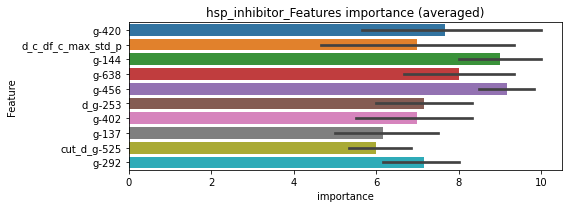

len(train_index) : 3880
len(valid_index) : 3881
================================= fold 1/2 hsp_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0180024	valid_1's binary_logloss: 0.0366367
[200]	training's binary_logloss: 0.00314747	valid_1's binary_logloss: 0.0241038
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00148202	valid_1's binary_logloss: 0.0224472


len(train_index) : 3881
len(valid_index) : 3880
================================= fold 2/2 hsp_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0181707	valid_1's binary_logloss: 0.0353341
[200]	training's binary_logloss: 0.0032755	valid_1's binary_logloss: 0.0195356
[300]	training's binary_logloss: 0.00105498	valid_1's binary_logloss: 0.0157901
[400]	training's binary_logloss: 0.000530995	valid_1's binary_logloss: 0.0142595
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000538646	valid_1's binary_logloss: 0.0142414


hsp_inhibitor logloss: 0.018344852702339057


neg labels: 3289 → selected neg labels: 3282


igf-1_inhibitor, len(trt): 37, len(othr): 3282, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0107224	valid_1's binary_logloss: 0.03575
[200]	training's binary_logloss: 0.0015369	valid_1's binary_logloss: 0.0243347
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.000971369	valid_1's binary_logloss: 0.0233734
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0118186	valid_1's binary_logloss: 0.0264428
[200]	training's binary_logloss: 0.00173784	valid_1's binary_logloss: 0.0146262
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.00102159	valid_1's binary_logloss: 0.0133964


1 / 3 AUC score:1.000
y_Threshold: 0.0044781, Threshold: 0.0069658, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0200904 Vs.target_rate: 0.00155
Num_p_label: 80.0, conf_0:0.00627, conf_1:0.00766
Num_p_label: 80.0, Expected: 6.2, Adj_threshold_1: 0.0069658
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_2: 0.0169658
Num_p_label: 9.0, Expected: 6.2, Adj_threshold_3: 0.0269658
threshold: 0.0269658, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0107927	valid_1's binary_logloss: 0.0363129
[200]	training's binary_logloss: 0.00151957	valid_1's binary_logloss: 0.0237728
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.000931308	valid_1's binary_logloss: 0.0223463
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0120052	valid_1's binary_logloss: 0.0261337
[200]	training's binary_logloss: 0.00168936	valid_1's binary_logloss: 0.0149208
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.000983079	valid_1's binary_logloss: 0.0138865


2 / 3 AUC score:1.000
y_Threshold: 0.0232842, Threshold: 0.0269658, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0150678 Vs.target_rate: 0.00155
Num_p_label: 60.0, conf_0:0.02427, conf_1:0.02966
Num_p_label: 60.0, Expected: 6.2, Adj_threshold_1: 0.0269658
Num_p_label: 44.0, Expected: 6.2, Adj_threshold_2: 0.0369658
Num_p_label: 30.0, Expected: 6.2, Adj_threshold_3: 0.0469658
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_4: 0.0569658
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_5: 0.0669658
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_6: 0.0769658
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_7: 0.0869658
threshold: 0.0869658, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3798, y_label_rate: 0.1716693
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0107353	valid_1's binary_logloss: 0.0245636
[200]	training's binary_logloss: 0.00150984	valid_1's binary_logloss: 0.0136486
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.0008805	valid_1's binary_logloss: 0.0123275
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0105641	valid_1's binary_logloss: 0.0298527
[200]	training's binary_logloss: 0.00150428	valid_1's binary_logloss: 0.0181751
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.000955811	valid_1's binary_logloss: 0.0168327


3 / 3 AUC score:1.000
y_Threshold: 0.0364726, Threshold: 0.0869658, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 650.0/3794
p_label_rate: 0.0042692 Vs.target_rate: 0.00155
Num_p_label: 17.0, conf_0:0.07827, conf_1:0.09566
threshold: 0.0869658, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 667.0/7776, y_label_rate: 0.0857767


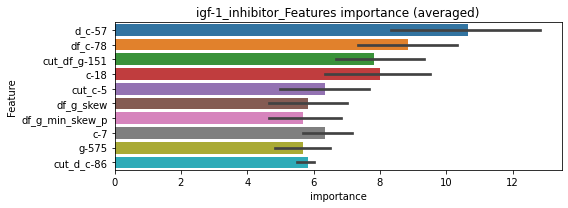

len(train_index) : 3888
len(valid_index) : 3888
================================= fold 1/2 igf-1_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0182798	valid_1's binary_logloss: 0.0380755
[200]	training's binary_logloss: 0.00312925	valid_1's binary_logloss: 0.0232197
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.00114911	valid_1's binary_logloss: 0.0210232


len(train_index) : 3888
len(valid_index) : 3888
================================= fold 2/2 igf-1_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0197149	valid_1's binary_logloss: 0.0310471
[200]	training's binary_logloss: 0.00359513	valid_1's binary_logloss: 0.0141848
[300]	training's binary_logloss: 0.00117819	valid_1's binary_logloss: 0.0113393
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00063975	valid_1's binary_logloss: 0.0103747


igf-1_inhibitor logloss: 0.015698941455988765


neg labels: 3289 → selected neg labels: 3284


ikk_inhibitor, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00934346	valid_1's binary_logloss: 0.0234327
[200]	training's binary_logloss: 0.00127456	valid_1's binary_logloss: 0.0129485
[300]	training's binary_logloss: 0.000559032	valid_1's binary_logloss: 0.0115719
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.000487899	valid_1's binary_logloss: 0.0113301
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0101968	valid_1's binary_logloss: 0.0207485
[200]	training's binary_logloss: 0.00141863	valid_1's binary_logloss: 0.0103583
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.000896608	valid_1's binary_logloss: 0.00946321


1 / 3 AUC score:1.000
y_Threshold: 0.0017653, Threshold: 0.0493113, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00126
Num_p_label: 80.0, conf_0:0.04438, conf_1:0.05424
Num_p_label: 80.0, Expected: 5.0, Adj_threshold_1: 0.0493113
Num_p_label: 73.0, Expected: 5.0, Adj_threshold_2: 0.0593113
Num_p_label: 70.0, Expected: 5.0, Adj_threshold_3: 0.0693113
Num_p_label: 65.0, Expected: 5.0, Adj_threshold_4: 0.0793113
Num_p_label: 60.0, Expected: 5.0, Adj_threshold_5: 0.0893113
Num_p_label: 60.0, Expected: 5.0, Adj_threshold_6: 0.0993113
Num_p_label: 57.0, Expected: 5.0, Adj_threshold_7: 0.1093113
Num_p_label: 54.0, Expected: 5.0, Adj_threshold_8: 0.1193113
Num_p_label: 52.0, Expected: 5.0, Adj_threshold_9: 0.1293113
Num_p_label: 49.0, Expected: 5.0, Adj_threshold_10: 0.1393113
threshold: 0.1493113, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00910833	valid_1's binary_logloss: 0.0223043
[200]	training's binary_logloss: 0.0012252	valid_1's binary_logloss: 0.0122715
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.000598076	valid_1's binary_logloss: 0.0110424
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00957939	valid_1's binary_logloss: 0.0207744
[200]	training's binary_logloss: 0.00129103	valid_1's binary_logloss: 0.010916
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.000825025	valid_1's binary_logloss: 0.00995013


2 / 3 AUC score:1.000
y_Threshold: 0.0461677, Threshold: 0.1493113, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0288800 Vs.target_rate: 0.00126
Num_p_label: 115.0, conf_0:0.13438, conf_1:0.16424
Num_p_label: 115.0, Expected: 5.0, Adj_threshold_1: 0.1493113
Num_p_label: 114.0, Expected: 5.0, Adj_threshold_2: 0.1593113
Num_p_label: 112.0, Expected: 5.0, Adj_threshold_3: 0.1693113
Num_p_label: 110.0, Expected: 5.0, Adj_threshold_4: 0.1793113
Num_p_label: 109.0, Expected: 5.0, Adj_threshold_5: 0.1893113
Num_p_label: 109.0, Expected: 5.0, Adj_threshold_6: 0.1993113
Num_p_label: 108.0, Expected: 5.0, Adj_threshold_7: 0.2093113
Num_p_label: 106.0, Expected: 5.0, Adj_threshold_8: 0.2193113
Num_p_label: 105.0, Expected: 5.0, Adj_threshold_9: 0.2293113
Num_p_label: 104.0, Expected: 5.0, Adj_threshold_10: 0.2393113
threshold: 0.2493113, positive_p_label: 102.0/3982, p_label_rate: 0.0256153
positive_y_label: 655.0/3806, y_label_rate: 0.17209

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00889861	valid_1's binary_logloss: 0.0217365
[200]	training's binary_logloss: 0.001212	valid_1's binary_logloss: 0.0123433
[300]	training's binary_logloss: 0.000541775	valid_1's binary_logloss: 0.0112681
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.000494581	valid_1's binary_logloss: 0.0110404
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00920185	valid_1's binary_logloss: 0.0205528
[200]	training's binary_logloss: 0.00125099	valid_1's binary_logloss: 0.0111502
[300]	training's binary_logloss: 0.000547184	valid_1's binary_logloss: 0.00981158
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.00048524	valid_1's binary_logloss: 0.00956485


3 / 3 AUC score:1.000
y_Threshold: 0.0236184, Threshold: 0.2493113, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0268709 Vs.target_rate: 0.00126
Num_p_label: 107.0, conf_0:0.22438, conf_1:0.27424
Num_p_label: 107.0, Expected: 5.0, Adj_threshold_1: 0.2493113
Num_p_label: 107.0, Expected: 5.0, Adj_threshold_2: 0.2593113
Num_p_label: 106.0, Expected: 5.0, Adj_threshold_3: 0.2693113
Num_p_label: 104.0, Expected: 5.0, Adj_threshold_4: 0.2793113
Num_p_label: 102.0, Expected: 5.0, Adj_threshold_5: 0.2893113
Num_p_label: 102.0, Expected: 5.0, Adj_threshold_6: 0.2993113
Num_p_label: 100.0, Expected: 5.0, Adj_threshold_7: 0.3093113
Num_p_label: 100.0, Expected: 5.0, Adj_threshold_8: 0.3193113
Num_p_label: 100.0, Expected: 5.0, Adj_threshold_9: 0.3293113
Num_p_label: 99.0, Expected: 5.0, Adj_threshold_10: 0.3393113
threshold: 0.3493113, positive_p_label: 99.0/3982, p_label_rate: 0.0248619
positive_y_label: 752.0/7784, y_label_rate: 0.0966084

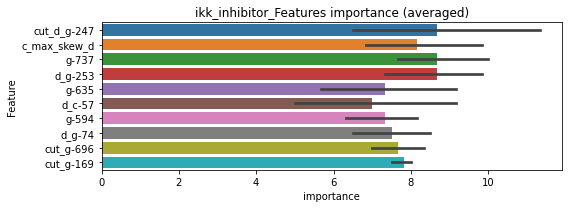

len(train_index) : 3892
len(valid_index) : 3892
================================= fold 1/2 ikk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0199347	valid_1's binary_logloss: 0.02778
[200]	training's binary_logloss: 0.00332123	valid_1's binary_logloss: 0.00974248
[300]	training's binary_logloss: 0.000991628	valid_1's binary_logloss: 0.0066384
[400]	training's binary_logloss: 0.000479745	valid_1's binary_logloss: 0.00559981
[500]	training's binary_logloss: 0.000323464	valid_1's binary_logloss: 0.00525619
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000292528	valid_1's binary_logloss: 0.00519053


len(train_index) : 3892
len(valid_index) : 3892
================================= fold 2/2 ikk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0186301	valid_1's binary_logloss: 0.0283453
[200]	training's binary_logloss: 0.00299283	valid_1's binary_logloss: 0.011407
[300]	training's binary_logloss: 0.000911192	valid_1's binary_logloss: 0.00880764
[400]	training's binary_logloss: 0.000439192	valid_1's binary_logloss: 0.00814263
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000439192	valid_1's binary_logloss: 0.00814263


ikk_inhibitor logloss: 0.006666730182692687


neg labels: 3289 → selected neg labels: 3284


imidazoline_receptor_agonist, len(trt): 31, len(othr): 3284, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0106996	valid_1's binary_logloss: 0.0344506
[200]	training's binary_logloss: 0.0015609	valid_1's binary_logloss: 0.0243349
Early stopping, best iteration is:
[213]	training's binary_logloss: 0.00131791	valid_1's binary_logloss: 0.0239238
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0112278	valid_1's binary_logloss: 0.0252173
[200]	training's binary_logloss: 0.00170225	valid_1's binary_logloss: 0.0163596
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.00106828	valid_1's binary_logloss: 0.0154051


1 / 3 AUC score:1.000
y_Threshold: 0.0028526, Threshold: 0.0034858, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00130
Num_p_label: 80.0, conf_0:0.00314, conf_1:0.00383
Num_p_label: 80.0, Expected: 5.2, Adj_threshold_1: 0.0034858
Num_p_label: 0.0, Expected: 5.2, Adj_threshold_2: 0.0134858
threshold: 0.0134858, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0110893	valid_1's binary_logloss: 0.0323318
[200]	training's binary_logloss: 0.00159149	valid_1's binary_logloss: 0.0212634
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.000993067	valid_1's binary_logloss: 0.0204287
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0116415	valid_1's binary_logloss: 0.0265793
[200]	training's binary_logloss: 0.0017702	valid_1's binary_logloss: 0.017686
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00114323	valid_1's binary_logloss: 0.0167061


2 / 3 AUC score:1.000
y_Threshold: 0.0097151, Threshold: 0.0134858, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0005023 Vs.target_rate: 0.00130
Num_p_label: 2.0, conf_0:0.01214, conf_1:0.01483
threshold: 0.0134858, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0110893	valid_1's binary_logloss: 0.0323318
[200]	training's binary_logloss: 0.00159149	valid_1's binary_logloss: 0.0212634
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.000993067	valid_1's binary_logloss: 0.0204287
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0116415	valid_1's binary_logloss: 0.0265793
[200]	training's binary_logloss: 0.0017702	valid_1's binary_logloss: 0.017686
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00114323	valid_1's binary_logloss: 0.0167061


3 / 3 AUC score:1.000
y_Threshold: 0.0097151, Threshold: 0.0134858, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0005023 Vs.target_rate: 0.00130
Num_p_label: 2.0, conf_0:0.01214, conf_1:0.01483
threshold: 0.0134858, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 658.0/7790, y_label_rate: 0.0844673


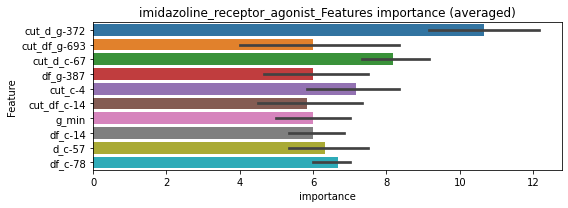

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0176798	valid_1's binary_logloss: 0.0332316
[200]	training's binary_logloss: 0.00314857	valid_1's binary_logloss: 0.0197654
[300]	training's binary_logloss: 0.00101384	valid_1's binary_logloss: 0.0176043
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000644816	valid_1's binary_logloss: 0.0171792


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0193382	valid_1's binary_logloss: 0.0285829
[200]	training's binary_logloss: 0.00371697	valid_1's binary_logloss: 0.0135896
[300]	training's binary_logloss: 0.00116771	valid_1's binary_logloss: 0.0109261
[400]	training's binary_logloss: 0.000570138	valid_1's binary_logloss: 0.0101913
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000483549	valid_1's binary_logloss: 0.00998925


imidazoline_receptor_agonist logloss: 0.013584242330449997


neg labels: 3289 → selected neg labels: 3278


immunosuppressant, len(trt): 73, len(othr): 3278, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.02072	valid_1's binary_logloss: 0.0668218
Early stopping, best iteration is:
[184]	training's binary_logloss: 0.00451529	valid_1's binary_logloss: 0.0559303
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0221067	valid_1's binary_logloss: 0.0611425
[200]	training's binary_logloss: 0.00386916	valid_1's binary_logloss: 0.0461037
Early stopping, best iteration is:
[232]	training's binary_logloss: 0.00266449	valid_1's binary_logloss: 0.0451603


1 / 3 AUC score:0.998
y_Threshold: 0.0105406, Threshold: 0.0142579, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 138 → Positive_corect_labels: 652/3795
p_label_rate: 0.0200904 Vs.target_rate: 0.00307
Num_p_label: 80.0, conf_0:0.01283, conf_1:0.01568
Num_p_label: 80.0, Expected: 12.2, Adj_threshold_1: 0.0142579
Num_p_label: 37.0, Expected: 12.2, Adj_threshold_2: 0.0242579
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_3: 0.0342579
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_4: 0.0442579
threshold: 0.0442579, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3795, y_label_rate: 0.1718050
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.020766	valid_1's binary_logloss: 0.0665599
[200]	training's binary_logloss: 0.00345361	valid_1's binary_logloss: 0.0513695
Early stopping, best iteration is:
[224]	training's binary_logloss: 0.00257694	valid_1's binary_logloss: 0.0502201
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.020187	valid_1's binary_logloss: 0.059121
[200]	training's binary_logloss: 0.00345277	valid_1's binary_logloss: 0.0448825
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.00218471	valid_1's binary_logloss: 0.0433387


2 / 3 AUC score:1.000
y_Threshold: 0.0200479, Threshold: 0.0442579, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 644.0/3779
p_label_rate: 0.0065294 Vs.target_rate: 0.00307
Num_p_label: 26.0, conf_0:0.03983, conf_1:0.04868
threshold: 0.0442579, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 644.0/3779, y_label_rate: 0.1704155
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174474	valid_1's binary_logloss: 0.0588257
[200]	training's binary_logloss: 0.00290809	valid_1's binary_logloss: 0.0473926
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00312458	valid_1's binary_logloss: 0.0470868
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0201792	valid_1's binary_logloss: 0.048417
[200]	training's binary_logloss: 0.00339777	valid_1's binary_logloss: 0.0314331
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.00207219	valid_1's binary_logloss: 0.0299357


3 / 3 AUC score:1.000
y_Threshold: 0.0195883, Threshold: 0.0442579, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 636.0/3763
p_label_rate: 0.0080362 Vs.target_rate: 0.00307
Num_p_label: 32.0, conf_0:0.03983, conf_1:0.04868
threshold: 0.0442579, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 668.0/7745, y_label_rate: 0.0862492


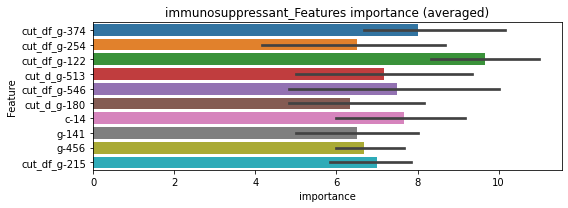

len(train_index) : 3872
len(valid_index) : 3873
================================= fold 1/2 immunosuppressant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0264774	valid_1's binary_logloss: 0.0558904
[200]	training's binary_logloss: 0.00605357	valid_1's binary_logloss: 0.0348934
[300]	training's binary_logloss: 0.00210257	valid_1's binary_logloss: 0.0302393
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00133063	valid_1's binary_logloss: 0.028947


len(train_index) : 3873
len(valid_index) : 3872
================================= fold 2/2 immunosuppressant=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0280627	valid_1's binary_logloss: 0.0541708
[200]	training's binary_logloss: 0.00604688	valid_1's binary_logloss: 0.0316393
[300]	training's binary_logloss: 0.00203212	valid_1's binary_logloss: 0.0271576
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.00150446	valid_1's binary_logloss: 0.0265917


immunosuppressant logloss: 0.02776949448622087


neg labels: 3289 → selected neg labels: 3284


insulin_secretagogue, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0100823	valid_1's binary_logloss: 0.0330638
[200]	training's binary_logloss: 0.00141866	valid_1's binary_logloss: 0.0245872
Early stopping, best iteration is:
[218]	training's binary_logloss: 0.00114868	valid_1's binary_logloss: 0.0240011
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0110757	valid_1's binary_logloss: 0.0302979
[200]	training's binary_logloss: 0.00166807	valid_1's binary_logloss: 0.0205626
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.000785561	valid_1's binary_logloss: 0.0190479


1 / 3 AUC score:1.000
y_Threshold: 0.0023225, Threshold: 0.0028528, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00126
Num_p_label: 80.0, conf_0:0.00257, conf_1:0.00314
Num_p_label: 80.0, Expected: 5.0, Adj_threshold_1: 0.0028528
Num_p_label: 3.0, Expected: 5.0, Adj_threshold_2: 0.0128528
threshold: 0.0128528, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0101637	valid_1's binary_logloss: 0.0360889
Early stopping, best iteration is:
[171]	training's binary_logloss: 0.00216864	valid_1's binary_logloss: 0.0289095
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.011353	valid_1's binary_logloss: 0.0307653
[200]	training's binary_logloss: 0.00171502	valid_1's binary_logloss: 0.0198814
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.000936196	valid_1's binary_logloss: 0.0184304


2 / 3 AUC score:1.000
y_Threshold: 0.0095670, Threshold: 0.0128528, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, conf_0:0.01157, conf_1:0.01414
threshold: 0.0128528, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0108465	valid_1's binary_logloss: 0.0287812
[200]	training's binary_logloss: 0.00156336	valid_1's binary_logloss: 0.0198071
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.00109095	valid_1's binary_logloss: 0.0190087
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0106986	valid_1's binary_logloss: 0.0323716
[200]	training's binary_logloss: 0.0016211	valid_1's binary_logloss: 0.021845
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.00102451	valid_1's binary_logloss: 0.020724


3 / 3 AUC score:1.000
y_Threshold: 0.0102977, Threshold: 0.0128528, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0015068 Vs.target_rate: 0.00126
Num_p_label: 6.0, conf_0:0.01157, conf_1:0.01414
threshold: 0.0128528, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 660.0/7786, y_label_rate: 0.0847675


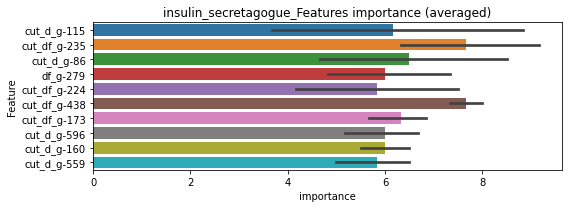

len(train_index) : 3893
len(valid_index) : 3893
================================= fold 1/2 insulin_secretagogue=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0178663	valid_1's binary_logloss: 0.0318254
[200]	training's binary_logloss: 0.00317246	valid_1's binary_logloss: 0.0188233
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00129787	valid_1's binary_logloss: 0.0175518


len(train_index) : 3893
len(valid_index) : 3893
================================= fold 2/2 insulin_secretagogue=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0183737	valid_1's binary_logloss: 0.0286257
[200]	training's binary_logloss: 0.00322064	valid_1's binary_logloss: 0.0138222
[300]	training's binary_logloss: 0.00103971	valid_1's binary_logloss: 0.0118371
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.000677656	valid_1's binary_logloss: 0.0114879


insulin_secretagogue logloss: 0.014519876748729949


neg labels: 3289 → selected neg labels: 3281


insulin_sensitizer, len(trt): 51, len(othr): 3281, target_rate: 0.0021416 → Adj_target_rate: 0.0023748
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0140701	valid_1's binary_logloss: 0.0564838
Early stopping, best iteration is:
[165]	training's binary_logloss: 0.00359474	valid_1's binary_logloss: 0.0490001
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163751	valid_1's binary_logloss: 0.0403201
[200]	training's binary_logloss: 0.00259191	valid_1's binary_logloss: 0.0265858
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00161887	valid_1's binary_logloss: 0.0255232


1 / 3 AUC score:0.998
y_Threshold: 0.0067753, Threshold: 0.0098322, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 138 → Positive_corect_labels: 653/3799
p_label_rate: 0.0200904 Vs.target_rate: 0.00214
Num_p_label: 80.0, conf_0:0.00885, conf_1:0.01082
Num_p_label: 80.0, Expected: 8.5, Adj_threshold_1: 0.0098322
Num_p_label: 23.0, Expected: 8.5, Adj_threshold_2: 0.0198322
Num_p_label: 12.0, Expected: 8.5, Adj_threshold_3: 0.0298322
threshold: 0.0298322, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0145931	valid_1's binary_logloss: 0.0472887
Early stopping, best iteration is:
[169]	training's binary_logloss: 0.00348976	valid_1's binary_logloss: 0.0362237
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0148039	valid_1's binary_logloss: 0.045328
[200]	training's binary_logloss: 0.00236022	valid_1's binary_logloss: 0.0323477
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00263907	valid_1's binary_logloss: 0.0321703


2 / 3 AUC score:0.999
y_Threshold: 0.0205958, Threshold: 0.0298322, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0062783 Vs.target_rate: 0.00214
Num_p_label: 25.0, conf_0:0.02685, conf_1:0.03282
threshold: 0.0298322, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 649.0/3791, y_label_rate: 0.1711949
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0128777	valid_1's binary_logloss: 0.0462051
[200]	training's binary_logloss: 0.0020263	valid_1's binary_logloss: 0.0351949
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00223488	valid_1's binary_logloss: 0.034824
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0143384	valid_1's binary_logloss: 0.037611
[200]	training's binary_logloss: 0.00221488	valid_1's binary_logloss: 0.024296
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00109203	valid_1's binary_logloss: 0.0228703


3 / 3 AUC score:1.000
y_Threshold: 0.0204698, Threshold: 0.0298322, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0050226 Vs.target_rate: 0.00214
Num_p_label: 20.0, conf_0:0.02685, conf_1:0.03282
threshold: 0.0298322, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 669.0/7773, y_label_rate: 0.0860672


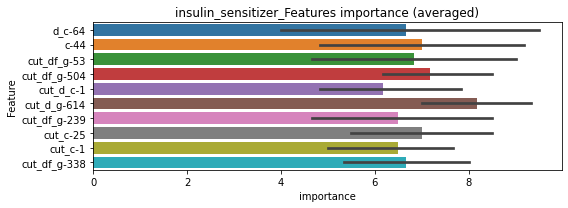

len(train_index) : 3886
len(valid_index) : 3887
================================= fold 1/2 insulin_sensitizer=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0217885	valid_1's binary_logloss: 0.0497097
[200]	training's binary_logloss: 0.00439616	valid_1's binary_logloss: 0.0337315
[300]	training's binary_logloss: 0.00147295	valid_1's binary_logloss: 0.0311938
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00120555	valid_1's binary_logloss: 0.0308143


len(train_index) : 3887
len(valid_index) : 3886
================================= fold 2/2 insulin_sensitizer=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0250719	valid_1's binary_logloss: 0.0400107
[200]	training's binary_logloss: 0.00538714	valid_1's binary_logloss: 0.0217129
[300]	training's binary_logloss: 0.00180904	valid_1's binary_logloss: 0.0180494
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.000989688	valid_1's binary_logloss: 0.0172316


insulin_sensitizer logloss: 0.024023837194078204


neg labels: 3289 → selected neg labels: 3282


integrin_inhibitor, len(trt): 42, len(othr): 3282, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0142454	valid_1's binary_logloss: 0.0494234
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00252972	valid_1's binary_logloss: 0.0410282
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159685	valid_1's binary_logloss: 0.0387159
[200]	training's binary_logloss: 0.00261338	valid_1's binary_logloss: 0.0267241
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00162309	valid_1's binary_logloss: 0.0255511


1 / 3 AUC score:1.000
y_Threshold: 0.0049459, Threshold: 0.0050003, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0200904 Vs.target_rate: 0.00176
Num_p_label: 80.0, conf_0:0.00450, conf_1:0.00550
Num_p_label: 80.0, Expected: 7.0, Adj_threshold_1: 0.0050003
Num_p_label: 1.0, Expected: 7.0, Adj_threshold_2: 0.0150003
threshold: 0.0150003, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0147095	valid_1's binary_logloss: 0.0484166
[200]	training's binary_logloss: 0.00226383	valid_1's binary_logloss: 0.0389746
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.0024924	valid_1's binary_logloss: 0.0387532
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0165746	valid_1's binary_logloss: 0.0395782
[200]	training's binary_logloss: 0.00262341	valid_1's binary_logloss: 0.0257511
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.00163017	valid_1's binary_logloss: 0.0246235


2 / 3 AUC score:1.000
y_Threshold: 0.0170907, Threshold: 0.0150003, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0002511 Vs.target_rate: 0.00176
Num_p_label: 1.0, conf_0:0.01350, conf_1:0.01650
Num_p_label: 1.0, Expected: 7.0, Adj_threshold_1: 0.0150003
Num_p_label: 160.0, Expected: 7.0, Adj_threshold_2: 0.0050003
threshold: 0.0050003, positive_p_label: 160.0/3982, p_label_rate: 0.0401808
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0155963	valid_1's binary_logloss: 0.0420201
[200]	training's binary_logloss: 0.00243709	valid_1's binary_logloss: 0.0309853
Early stopping, best iteration is:
[225]	training's binary_logloss: 0.00179959	valid_1's binary_logloss: 0.0299016
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159834	valid_1's binary_logloss: 0.0422791
[200]	training's binary_logloss: 0.00253181	valid_1's binary_logloss: 0.0297164
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00166076	valid_1's binary_logloss: 0.0285669


3 / 3 AUC score:1.000
y_Threshold: 0.0122283, Threshold: 0.0050003, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0233551 Vs.target_rate: 0.00176
Num_p_label: 93.0, conf_0:0.00450, conf_1:0.00550
Num_p_label: 93.0, Expected: 7.0, Adj_threshold_1: 0.0050003
Num_p_label: 0.0, Expected: 7.0, Adj_threshold_2: 0.0150003
threshold: 0.0150003, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 654.0/7784, y_label_rate: 0.0840185


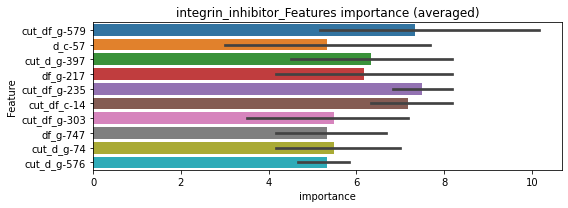

len(train_index) : 3892
len(valid_index) : 3892
================================= fold 1/2 integrin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0226891	valid_1's binary_logloss: 0.0385897
[200]	training's binary_logloss: 0.00452564	valid_1's binary_logloss: 0.0224006
[300]	training's binary_logloss: 0.00147127	valid_1's binary_logloss: 0.0201058
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.00107277	valid_1's binary_logloss: 0.0197388


len(train_index) : 3892
len(valid_index) : 3892
================================= fold 2/2 integrin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0240426	valid_1's binary_logloss: 0.0366739
[200]	training's binary_logloss: 0.0049939	valid_1's binary_logloss: 0.0180997
[300]	training's binary_logloss: 0.00163716	valid_1's binary_logloss: 0.0148934
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000933007	valid_1's binary_logloss: 0.014188


integrin_inhibitor logloss: 0.01696343353828878


neg labels: 3289 → selected neg labels: 3274


jak_inhibitor, len(trt): 92, len(othr): 3274, target_rate: 0.0038633 → Adj_target_rate: 0.0039212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0190106	valid_1's binary_logloss: 0.0644951
[200]	training's binary_logloss: 0.00336327	valid_1's binary_logloss: 0.048304
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00216753	valid_1's binary_logloss: 0.0467692
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0212455	valid_1's binary_logloss: 0.0618443
[200]	training's binary_logloss: 0.00360272	valid_1's binary_logloss: 0.0409451
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.0020942	valid_1's binary_logloss: 0.0380882


1 / 3 AUC score:0.999
y_Threshold: 0.0129814, Threshold: 0.0273078, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 652/3792
p_label_rate: 0.0200904 Vs.target_rate: 0.00386
Num_p_label: 80.0, conf_0:0.02458, conf_1:0.03004
Num_p_label: 80.0, Expected: 15.4, Adj_threshold_1: 0.0273078
Num_p_label: 46.0, Expected: 15.4, Adj_threshold_2: 0.0373078
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_3: 0.0473078
threshold: 0.0473078, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 652.0/3792, y_label_rate: 0.1719409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.017691	valid_1's binary_logloss: 0.0628095
[200]	training's binary_logloss: 0.00288795	valid_1's binary_logloss: 0.0454033
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00181508	valid_1's binary_logloss: 0.0439044
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0190236	valid_1's binary_logloss: 0.0566724
[200]	training's binary_logloss: 0.00324204	valid_1's binary_logloss: 0.0375093
[300]	training's binary_logloss: 0.00124383	valid_1's binary_logloss: 0.033157
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00104703	valid_1's binary_logloss: 0.0325287


2 / 3 AUC score:0.999
y_Threshold: 0.0717602, Threshold: 0.0473078, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 28 → Positive_corect_labels: 638.0/3764
p_label_rate: 0.0447012 Vs.target_rate: 0.00386
Num_p_label: 178.0, conf_0:0.04258, conf_1:0.05204
Num_p_label: 178.0, Expected: 15.4, Adj_threshold_1: 0.0473078
Num_p_label: 157.0, Expected: 15.4, Adj_threshold_2: 0.0573078
Num_p_label: 151.0, Expected: 15.4, Adj_threshold_3: 0.0673078
Num_p_label: 135.0, Expected: 15.4, Adj_threshold_4: 0.0773078
Num_p_label: 128.0, Expected: 15.4, Adj_threshold_5: 0.0873078
Num_p_label: 118.0, Expected: 15.4, Adj_threshold_6: 0.0973078
Num_p_label: 115.0, Expected: 15.4, Adj_threshold_7: 0.1073078
Num_p_label: 112.0, Expected: 15.4, Adj_threshold_8: 0.1173078
Num_p_label: 110.0, Expected: 15.4, Adj_threshold_9: 0.1273078
Num_p_label: 107.0, Expected: 15.4, Adj_threshold_10: 0.1373078
threshold: 0.1473078, positive_p_label: 105.0/3982, p_label_rate: 0.0263687
positive_y_label: 638.0/3764, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0163916	valid_1's binary_logloss: 0.0478739
[200]	training's binary_logloss: 0.00262345	valid_1's binary_logloss: 0.0285025
[300]	training's binary_logloss: 0.00103563	valid_1's binary_logloss: 0.0240772
[400]	training's binary_logloss: 0.000697628	valid_1's binary_logloss: 0.0229567
Early stopping, best iteration is:
[394]	training's binary_logloss: 0.00070508	valid_1's binary_logloss: 0.0229481
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0161329	valid_1's binary_logloss: 0.0482838
[200]	training's binary_logloss: 0.00260439	valid_1's binary_logloss: 0.0305647
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.00161703	valid_1's binary_logloss: 0.0281035


3 / 3 AUC score:1.000
y_Threshold: 0.0751740, Threshold: 0.1473078, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 630.0/3748
p_label_rate: 0.0326469 Vs.target_rate: 0.00386
Num_p_label: 130.0, conf_0:0.13258, conf_1:0.16204
Num_p_label: 130.0, Expected: 15.4, Adj_threshold_1: 0.1473078
Num_p_label: 124.0, Expected: 15.4, Adj_threshold_2: 0.1573078
Num_p_label: 122.0, Expected: 15.4, Adj_threshold_3: 0.1673078
Num_p_label: 121.0, Expected: 15.4, Adj_threshold_4: 0.1773078
Num_p_label: 119.0, Expected: 15.4, Adj_threshold_5: 0.1873078
Num_p_label: 116.0, Expected: 15.4, Adj_threshold_6: 0.1973078
Num_p_label: 113.0, Expected: 15.4, Adj_threshold_7: 0.2073078
Num_p_label: 113.0, Expected: 15.4, Adj_threshold_8: 0.2173078
Num_p_label: 111.0, Expected: 15.4, Adj_threshold_9: 0.2273078
Num_p_label: 111.0, Expected: 15.4, Adj_threshold_10: 0.2373078
threshold: 0.2473078, positive_p_label: 109.0/3982, p_label_rate: 0.0273732
positive_y_label: 739.0/7730, y_label_ra

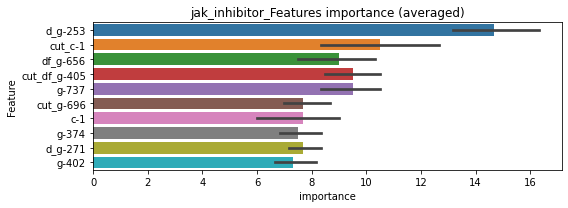

len(train_index) : 3865
len(valid_index) : 3865
================================= fold 1/2 jak_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0293044	valid_1's binary_logloss: 0.056865
[200]	training's binary_logloss: 0.00656376	valid_1's binary_logloss: 0.0309641
[300]	training's binary_logloss: 0.00230546	valid_1's binary_logloss: 0.025079
[400]	training's binary_logloss: 0.00111434	valid_1's binary_logloss: 0.0222339
[500]	training's binary_logloss: 0.000682503	valid_1's binary_logloss: 0.0207607
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000542904	valid_1's binary_logloss: 0.0202539


len(train_index) : 3865
len(valid_index) : 3865
================================= fold 2/2 jak_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0284076	valid_1's binary_logloss: 0.0506706
[200]	training's binary_logloss: 0.00629079	valid_1's binary_logloss: 0.0281498
[300]	training's binary_logloss: 0.00218196	valid_1's binary_logloss: 0.0233969
[400]	training's binary_logloss: 0.00103743	valid_1's binary_logloss: 0.0214093
[500]	training's binary_logloss: 0.000628938	valid_1's binary_logloss: 0.0203861
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000581997	valid_1's binary_logloss: 0.020279


jak_inhibitor logloss: 0.02026643477670675


neg labels: 3289 → selected neg labels: 3272


kit_inhibitor, len(trt): 273, len(othr): 3272, target_rate: 0.0114638 → Adj_target_rate: 0.0098841
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0411578	valid_1's binary_logloss: 0.151186
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00980357	valid_1's binary_logloss: 0.12228
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0463413	valid_1's binary_logloss: 0.141807
Early stopping, best iteration is:
[182]	training's binary_logloss: 0.0119724	valid_1's binary_logloss: 0.109516


1 / 3 AUC score:0.988
y_Threshold: 0.0513549, Threshold: 0.1369687, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 190 → Positive_corect_labels: 625/3736
p_label_rate: 0.0200904 Vs.target_rate: 0.01146
Num_p_label: 80.0, conf_0:0.12327, conf_1:0.15067
threshold: 0.1369687, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 625.0/3736, y_label_rate: 0.1672912
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0354736	valid_1's binary_logloss: 0.123809
[200]	training's binary_logloss: 0.00677232	valid_1's binary_logloss: 0.0902928
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.0042895	valid_1's binary_logloss: 0.0853215
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0360639	valid_1's binary_logloss: 0.11972
[200]	training's binary_logloss: 0.00664543	valid_1's binary_logloss: 0.0849978
Early stopping, best iteration is:
[210]	training's binary_logloss: 0.00588661	valid_1's binary_logloss: 0.0844191


2 / 3 AUC score:0.997
y_Threshold: 0.0698044, Threshold: 0.1369687, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 50 → Positive_corect_labels: 600.0/3686
p_label_rate: 0.0336514 Vs.target_rate: 0.01146
Num_p_label: 134.0, conf_0:0.12327, conf_1:0.15067
threshold: 0.1369687, positive_p_label: 134.0/3982, p_label_rate: 0.0336514
positive_y_label: 600.0/3686, y_label_rate: 0.1627781
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0292395	valid_1's binary_logloss: 0.112686
[200]	training's binary_logloss: 0.00520905	valid_1's binary_logloss: 0.0778596
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.0033835	valid_1's binary_logloss: 0.0734426
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0327461	valid_1's binary_logloss: 0.100698
[200]	training's binary_logloss: 0.00599019	valid_1's binary_logloss: 0.0648893
[300]	training's binary_logloss: 0.00219105	valid_1's binary_logloss: 0.0557385
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00140692	valid_1's binary_logloss: 0.0528212


3 / 3 AUC score:0.999
y_Threshold: 0.0570905, Threshold: 0.1369687, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 591.0/3668
p_label_rate: 0.0278754 Vs.target_rate: 0.01146
Num_p_label: 111.0, conf_0:0.12327, conf_1:0.15067
threshold: 0.1369687, positive_p_label: 111.0/3982, p_label_rate: 0.0278754
positive_y_label: 702.0/7650, y_label_rate: 0.0917647


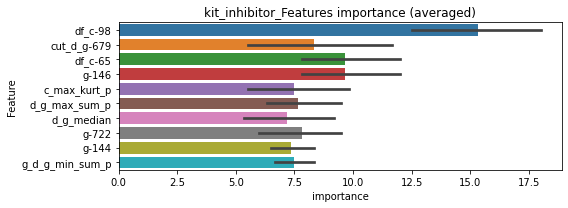

len(train_index) : 3825
len(valid_index) : 3825
================================= fold 1/2 kit_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0464878	valid_1's binary_logloss: 0.109191
[200]	training's binary_logloss: 0.0134528	valid_1's binary_logloss: 0.0821787
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00566388	valid_1's binary_logloss: 0.0758871


len(train_index) : 3825
len(valid_index) : 3825
================================= fold 2/2 kit_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0511762	valid_1's binary_logloss: 0.102547
[200]	training's binary_logloss: 0.0152716	valid_1's binary_logloss: 0.0719861
[300]	training's binary_logloss: 0.00603933	valid_1's binary_logloss: 0.0640481
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00568103	valid_1's binary_logloss: 0.0636338


kit_inhibitor logloss: 0.06976043756470354


neg labels: 3289 → selected neg labels: 3288


laxative, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00341634	valid_1's binary_logloss: 0.00676614
[200]	training's binary_logloss: 0.0003638	valid_1's binary_logloss: 0.00288185
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.000267626	valid_1's binary_logloss: 0.0027128
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00366069	valid_1's binary_logloss: 0.00401497
[200]	training's binary_logloss: 0.00038843	valid_1's binary_logloss: 0.00052687
[300]	training's binary_logloss: 0.000241704	valid_1's binary_logloss: 0.000361199
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000229883	valid_1's binary_logloss: 0.000351368


1 / 3 AUC score:1.000
y_Threshold: 0.0004045, Threshold: 0.0004939, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00044, conf_1:0.00054
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0004939
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0104939
threshold: 0.0104939, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00357142	valid_1's binary_logloss: 0.00699086
[200]	training's binary_logloss: 0.000371969	valid_1's binary_logloss: 0.00309633
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.000259142	valid_1's binary_logloss: 0.00287649
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00384841	valid_1's binary_logloss: 0.00452743
[200]	training's binary_logloss: 0.000405137	valid_1's binary_logloss: 0.000667872
[300]	training's binary_logloss: 0.000251131	valid_1's binary_logloss: 0.000486297
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.000239643	valid_1's binary_logloss: 0.000477464


2 / 3 AUC score:1.000
y_Threshold: 0.0267471, Threshold: 0.0104939, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00025
Num_p_label: 0.0, conf_0:0.00944, conf_1:0.01154
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0104939
Num_p_label: 188.0, Expected: 1.0, Adj_threshold_2: 0.0004939
threshold: 0.0004939, positive_p_label: 188.0/3982, p_label_rate: 0.0472125
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00357142	valid_1's binary_logloss: 0.00699086
[200]	training's binary_logloss: 0.000371969	valid_1's binary_logloss: 0.00309633
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.000259142	valid_1's binary_logloss: 0.00287649
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00384841	valid_1's binary_logloss: 0.00452743
[200]	training's binary_logloss: 0.000405137	valid_1's binary_logloss: 0.000667872
[300]	training's binary_logloss: 0.000251131	valid_1's binary_logloss: 0.000486297
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.000239643	valid_1's binary_logloss: 0.000477464


3 / 3 AUC score:1.000
y_Threshold: 0.0267471, Threshold: 0.0004939, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0472125 Vs.target_rate: 0.00025
Num_p_label: 188.0, conf_0:0.00044, conf_1:0.00054
Num_p_label: 188.0, Expected: 1.0, Adj_threshold_1: 0.0004939
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0104939
threshold: 0.0104939, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7795, y_label_rate: 0.0842848


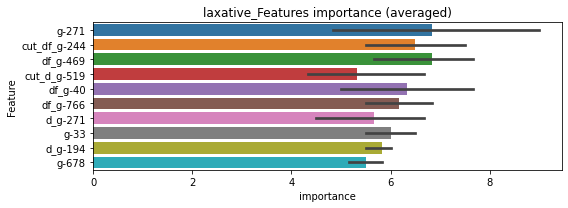

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 laxative=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00953891	valid_1's binary_logloss: 0.0122177
[200]	training's binary_logloss: 0.000886914	valid_1's binary_logloss: 0.00273999
[300]	training's binary_logloss: 0.000231934	valid_1's binary_logloss: 0.00190749
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.000161111	valid_1's binary_logloss: 0.00178724


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 laxative=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00979924	valid_1's binary_logloss: 0.0106793
[200]	training's binary_logloss: 0.000943058	valid_1's binary_logloss: 0.00124013
[300]	training's binary_logloss: 0.000251362	valid_1's binary_logloss: 0.000443055
[400]	training's binary_logloss: 0.000142265	valid_1's binary_logloss: 0.000295938
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000125895	valid_1's binary_logloss: 0.00027586


laxative logloss: 0.0010317434918119255


neg labels: 3289 → selected neg labels: 3288


leukotriene_inhibitor, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00344647	valid_1's binary_logloss: 0.00562664
[200]	training's binary_logloss: 0.000362887	valid_1's binary_logloss: 0.00202689
Early stopping, best iteration is:
[246]	training's binary_logloss: 0.000262765	valid_1's binary_logloss: 0.00191008
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00360383	valid_1's binary_logloss: 0.00487611
[200]	training's binary_logloss: 0.000378365	valid_1's binary_logloss: 0.00132525
Early stopping, best iteration is:
[219]	training's binary_logloss: 0.000318613	valid_1's binary_logloss: 0.00121852


1 / 3 AUC score:1.000
y_Threshold: 0.0004506, Threshold: 0.0005055, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00045, conf_1:0.00056
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0005055
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0105055
threshold: 0.0105055, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00352739	valid_1's binary_logloss: 0.00571027
[200]	training's binary_logloss: 0.000362244	valid_1's binary_logloss: 0.00201348
Early stopping, best iteration is:
[246]	training's binary_logloss: 0.000263531	valid_1's binary_logloss: 0.00190315
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00372759	valid_1's binary_logloss: 0.00529135
[200]	training's binary_logloss: 0.000391507	valid_1's binary_logloss: 0.00137009
[300]	training's binary_logloss: 0.000247119	valid_1's binary_logloss: 0.00119956
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.000243703	valid_1's binary_logloss: 0.00119395


2 / 3 AUC score:1.000
y_Threshold: 0.0341823, Threshold: 0.0105055, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00025
Num_p_label: 0.0, conf_0:0.00945, conf_1:0.01156
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0105055
Num_p_label: 59.0, Expected: 1.0, Adj_threshold_2: 0.0005055
threshold: 0.0005055, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00352739	valid_1's binary_logloss: 0.00571027
[200]	training's binary_logloss: 0.000362244	valid_1's binary_logloss: 0.00201348
Early stopping, best iteration is:
[246]	training's binary_logloss: 0.000263531	valid_1's binary_logloss: 0.00190315
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00372759	valid_1's binary_logloss: 0.00529135
[200]	training's binary_logloss: 0.000391507	valid_1's binary_logloss: 0.00137009
[300]	training's binary_logloss: 0.000247119	valid_1's binary_logloss: 0.00119956
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.000243703	valid_1's binary_logloss: 0.00119395


3 / 3 AUC score:1.000
y_Threshold: 0.0341823, Threshold: 0.0005055, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0148167 Vs.target_rate: 0.00025
Num_p_label: 59.0, conf_0:0.00045, conf_1:0.00056
Num_p_label: 59.0, Expected: 1.0, Adj_threshold_1: 0.0005055
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0105055
threshold: 0.0105055, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7795, y_label_rate: 0.0842848


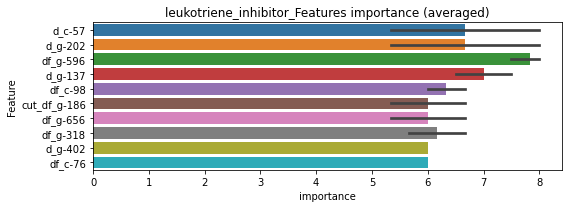

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 leukotriene_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00951838	valid_1's binary_logloss: 0.0115109
[200]	training's binary_logloss: 0.000883354	valid_1's binary_logloss: 0.00249791
[300]	training's binary_logloss: 0.000235875	valid_1's binary_logloss: 0.00161968
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000142428	valid_1's binary_logloss: 0.00147429


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 leukotriene_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.009763	valid_1's binary_logloss: 0.0108548
[200]	training's binary_logloss: 0.000941516	valid_1's binary_logloss: 0.00194
[300]	training's binary_logloss: 0.000251242	valid_1's binary_logloss: 0.00102984
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.00016858	valid_1's binary_logloss: 0.000908942


leukotriene_inhibitor logloss: 0.001191650740421332


neg labels: 3289 → selected neg labels: 3280


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3280, target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0178043	valid_1's binary_logloss: 0.0751263
Early stopping, best iteration is:
[157]	training's binary_logloss: 0.00570501	valid_1's binary_logloss: 0.0685666
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0237542	valid_1's binary_logloss: 0.0549934
Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00514894	valid_1's binary_logloss: 0.0438117


1 / 3 AUC score:0.999
y_Threshold: 0.0109043, Threshold: 0.0116821, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 146 → Positive_corect_labels: 649/3790
p_label_rate: 0.0200904 Vs.target_rate: 0.00260
Num_p_label: 80.0, conf_0:0.01051, conf_1:0.01285
Num_p_label: 80.0, Expected: 10.4, Adj_threshold_1: 0.0116821
Num_p_label: 0.0, Expected: 10.4, Adj_threshold_2: 0.0216821
threshold: 0.0216821, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0202167	valid_1's binary_logloss: 0.0627202
Early stopping, best iteration is:
[179]	training's binary_logloss: 0.00453118	valid_1's binary_logloss: 0.0503103
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0208865	valid_1's binary_logloss: 0.0540476
[200]	training's binary_logloss: 0.00351747	valid_1's binary_logloss: 0.0397421
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.00288768	valid_1's binary_logloss: 0.0390923


2 / 3 AUC score:1.000
y_Threshold: 0.0179234, Threshold: 0.0216821, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 643.0/3778
p_label_rate: 0.0002511 Vs.target_rate: 0.00260
Num_p_label: 1.0, conf_0:0.01951, conf_1:0.02385
Num_p_label: 1.0, Expected: 10.4, Adj_threshold_1: 0.0216821
Num_p_label: 45.0, Expected: 10.4, Adj_threshold_2: 0.0116821
threshold: 0.0116821, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 643.0/3778, y_label_rate: 0.1701959
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0190428	valid_1's binary_logloss: 0.0601648
[200]	training's binary_logloss: 0.00309891	valid_1's binary_logloss: 0.0480564
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00238568	valid_1's binary_logloss: 0.047499
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0202869	valid_1's binary_logloss: 0.0515051
[200]	training's binary_logloss: 0.0034374	valid_1's binary_logloss: 0.0389044
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00219024	valid_1's binary_logloss: 0.0378515


3 / 3 AUC score:1.000
y_Threshold: 0.0135854, Threshold: 0.0116821, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 638.0/3768
p_label_rate: 0.0030136 Vs.target_rate: 0.00260
Num_p_label: 12.0, conf_0:0.01051, conf_1:0.01285
threshold: 0.0116821, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 650.0/7750, y_label_rate: 0.0838710


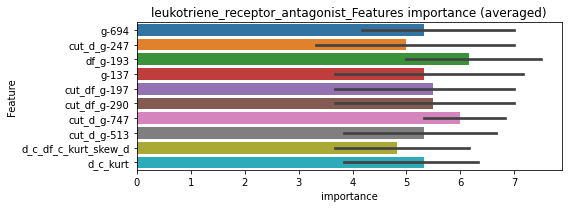

len(train_index) : 3875
len(valid_index) : 3875
================================= fold 1/2 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0271441	valid_1's binary_logloss: 0.0544814
[200]	training's binary_logloss: 0.00619803	valid_1's binary_logloss: 0.0376243
Early stopping, best iteration is:
[266]	training's binary_logloss: 0.00288229	valid_1's binary_logloss: 0.035874


len(train_index) : 3875
len(valid_index) : 3875
================================= fold 2/2 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0288533	valid_1's binary_logloss: 0.0508527
[200]	training's binary_logloss: 0.00690126	valid_1's binary_logloss: 0.0312964
[300]	training's binary_logloss: 0.00233054	valid_1's binary_logloss: 0.0274285
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00182237	valid_1's binary_logloss: 0.0269726


leukotriene_receptor_antagonist logloss: 0.031423322798634815


neg labels: 3289 → selected neg labels: 3287


lipase_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00511478	valid_1's binary_logloss: 0.0122186
[200]	training's binary_logloss: 0.00064389	valid_1's binary_logloss: 0.00612744
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000351282	valid_1's binary_logloss: 0.00552683
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00556837	valid_1's binary_logloss: 0.00901923
[200]	training's binary_logloss: 0.000672037	valid_1's binary_logloss: 0.00354665
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.000427951	valid_1's binary_logloss: 0.00324854


1 / 3 AUC score:1.000
y_Threshold: 0.0007587, Threshold: 0.0010574, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00095, conf_1:0.00116
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0010574
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0110574
threshold: 0.0110574, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00526769	valid_1's binary_logloss: 0.0112639
[200]	training's binary_logloss: 0.000648153	valid_1's binary_logloss: 0.0049902
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.000377787	valid_1's binary_logloss: 0.00446103
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00553134	valid_1's binary_logloss: 0.00881063
[200]	training's binary_logloss: 0.0006764	valid_1's binary_logloss: 0.00327306
[300]	training's binary_logloss: 0.000364216	valid_1's binary_logloss: 0.00293176
Early stopping, best iteration is:
[303]	training's binary_logloss: 0.000362089	valid_1's binary_logloss: 0.00292551


2 / 3 AUC score:1.000
y_Threshold: 0.0206385, Threshold: 0.0110574, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, conf_0:0.00995, conf_1:0.01216
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0110574
Num_p_label: 112.0, Expected: 2.0, Adj_threshold_2: 0.0010574
threshold: 0.0010574, positive_p_label: 112.0/3982, p_label_rate: 0.0281266
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00526769	valid_1's binary_logloss: 0.0112639
[200]	training's binary_logloss: 0.000648153	valid_1's binary_logloss: 0.0049902
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.000377787	valid_1's binary_logloss: 0.00446103
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00553134	valid_1's binary_logloss: 0.00881063
[200]	training's binary_logloss: 0.0006764	valid_1's binary_logloss: 0.00327306
[300]	training's binary_logloss: 0.000364216	valid_1's binary_logloss: 0.00293176
Early stopping, best iteration is:
[303]	training's binary_logloss: 0.000362089	valid_1's binary_logloss: 0.00292551


3 / 3 AUC score:1.000
y_Threshold: 0.0206385, Threshold: 0.0010574, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0281266 Vs.target_rate: 0.00050
Num_p_label: 112.0, conf_0:0.00095, conf_1:0.00116
Num_p_label: 112.0, Expected: 2.0, Adj_threshold_1: 0.0010574
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0110574
threshold: 0.0110574, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7794, y_label_rate: 0.0842956


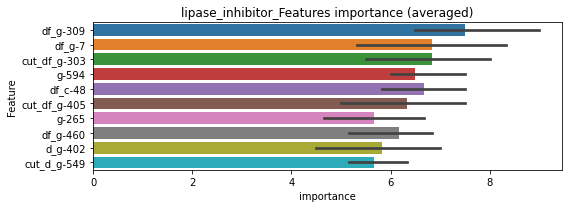

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 lipase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0118081	valid_1's binary_logloss: 0.0171549
[200]	training's binary_logloss: 0.00137245	valid_1's binary_logloss: 0.00509271
[300]	training's binary_logloss: 0.000390358	valid_1's binary_logloss: 0.00363594
[400]	training's binary_logloss: 0.000211143	valid_1's binary_logloss: 0.00334292
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000202177	valid_1's binary_logloss: 0.00332548


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 lipase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0121225	valid_1's binary_logloss: 0.0144733
[200]	training's binary_logloss: 0.00149643	valid_1's binary_logloss: 0.00323129
[300]	training's binary_logloss: 0.000426428	valid_1's binary_logloss: 0.00199855
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.000336904	valid_1's binary_logloss: 0.00189669


lipase_inhibitor logloss: 0.002611085870326804


neg labels: 3289 → selected neg labels: 3278


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3278, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.019714	valid_1's binary_logloss: 0.0626442
[200]	training's binary_logloss: 0.00356149	valid_1's binary_logloss: 0.0543473
Early stopping, best iteration is:
[211]	training's binary_logloss: 0.00310526	valid_1's binary_logloss: 0.053988
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.022187	valid_1's binary_logloss: 0.0574848
[200]	training's binary_logloss: 0.00394705	valid_1's binary_logloss: 0.0434865
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.00322032	valid_1's binary_logloss: 0.0432237


1 / 3 AUC score:0.999
y_Threshold: 0.0076195, Threshold: 0.0105560, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 138 → Positive_corect_labels: 652/3795
p_label_rate: 0.0200904 Vs.target_rate: 0.00256
Num_p_label: 80.0, conf_0:0.00950, conf_1:0.01161
Num_p_label: 80.0, Expected: 10.2, Adj_threshold_1: 0.0105560
Num_p_label: 11.0, Expected: 10.2, Adj_threshold_2: 0.0205560
threshold: 0.0205560, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3795, y_label_rate: 0.1718050
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.020327	valid_1's binary_logloss: 0.0694611
[200]	training's binary_logloss: 0.00342514	valid_1's binary_logloss: 0.0578517
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00368205	valid_1's binary_logloss: 0.0576773
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0217079	valid_1's binary_logloss: 0.0597465
[200]	training's binary_logloss: 0.00367964	valid_1's binary_logloss: 0.0445298
Early stopping, best iteration is:
[211]	training's binary_logloss: 0.00318129	valid_1's binary_logloss: 0.0440841


2 / 3 AUC score:1.000
y_Threshold: 0.0178065, Threshold: 0.0205560, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 644.0/3779
p_label_rate: 0.0170768 Vs.target_rate: 0.00256
Num_p_label: 68.0, conf_0:0.01850, conf_1:0.02261
Num_p_label: 68.0, Expected: 10.2, Adj_threshold_1: 0.0205560
Num_p_label: 45.0, Expected: 10.2, Adj_threshold_2: 0.0305560
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_3: 0.0405560
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_4: 0.0505560
threshold: 0.0505560, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 644.0/3779, y_label_rate: 0.1704155
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0203375	valid_1's binary_logloss: 0.0545797
[200]	training's binary_logloss: 0.00334231	valid_1's binary_logloss: 0.041694
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.00273994	valid_1's binary_logloss: 0.0411807
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0191577	valid_1's binary_logloss: 0.0508193
[200]	training's binary_logloss: 0.00330601	valid_1's binary_logloss: 0.0372222
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00211526	valid_1's binary_logloss: 0.0362192


3 / 3 AUC score:1.000
y_Threshold: 0.0203018, Threshold: 0.0505560, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 637.0/3765
p_label_rate: 0.0087896 Vs.target_rate: 0.00256
Num_p_label: 35.0, conf_0:0.04550, conf_1:0.05561
Num_p_label: 35.0, Expected: 10.2, Adj_threshold_1: 0.0505560
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_2: 0.0605560
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_3: 0.0705560
threshold: 0.0705560, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/7747, y_label_rate: 0.0844198


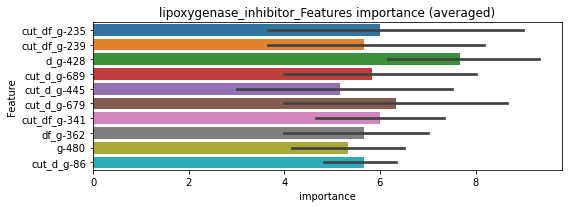

len(train_index) : 3873
len(valid_index) : 3874
================================= fold 1/2 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0258856	valid_1's binary_logloss: 0.0513278
[200]	training's binary_logloss: 0.00601103	valid_1's binary_logloss: 0.0334139
[300]	training's binary_logloss: 0.00208054	valid_1's binary_logloss: 0.030579
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.00139022	valid_1's binary_logloss: 0.0299394


len(train_index) : 3874
len(valid_index) : 3873
================================= fold 2/2 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0275197	valid_1's binary_logloss: 0.0448275
[200]	training's binary_logloss: 0.00641836	valid_1's binary_logloss: 0.0264948
[300]	training's binary_logloss: 0.00231827	valid_1's binary_logloss: 0.0237596
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.0022074	valid_1's binary_logloss: 0.0236694


lipoxygenase_inhibitor logloss: 0.026804794363916105


neg labels: 3289 → selected neg labels: 3288


lxr_agonist, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00339297	valid_1's binary_logloss: 0.00534358
[200]	training's binary_logloss: 0.00035108	valid_1's binary_logloss: 0.00143962
[300]	training's binary_logloss: 0.000225673	valid_1's binary_logloss: 0.00129104
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00022487	valid_1's binary_logloss: 0.00128847
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00362618	valid_1's binary_logloss: 0.00426776
[200]	training's binary_logloss: 0.000374984	valid_1's binary_logloss: 0.000652652
[300]	training's binary_logloss: 0.000237795	valid_1's binary_logloss: 0.000522218
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000226457	valid_1's binary_logloss: 0.000508084


1 / 3 AUC score:1.000
y_Threshold: 0.0003845, Threshold: 0.0004964, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00045, conf_1:0.00055
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0004964
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0104964
threshold: 0.0104964, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00346158	valid_1's binary_logloss: 0.00548283
[200]	training's binary_logloss: 0.000355805	valid_1's binary_logloss: 0.00147993
[300]	training's binary_logloss: 0.000230516	valid_1's binary_logloss: 0.00130932
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.000229591	valid_1's binary_logloss: 0.00130606
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00366966	valid_1's binary_logloss: 0.00408025
[200]	training's binary_logloss: 0.000380187	valid_1's binary_logloss: 0.000557934
[300]	training's binary_logloss: 0.000241243	valid_1's binary_logloss: 0.000415005
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000230028	valid_1's binary_logloss: 0.000403204


2 / 3 AUC score:1.000
y_Threshold: 0.0725279, Threshold: 0.0104964, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00025
Num_p_label: 0.0, conf_0:0.00945, conf_1:0.01155
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0104964
Num_p_label: 152.0, Expected: 1.0, Adj_threshold_2: 0.0004964
threshold: 0.0004964, positive_p_label: 152.0/3982, p_label_rate: 0.0381718
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00346158	valid_1's binary_logloss: 0.00548283
[200]	training's binary_logloss: 0.000355805	valid_1's binary_logloss: 0.00147993
[300]	training's binary_logloss: 0.000230516	valid_1's binary_logloss: 0.00130932
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.000229591	valid_1's binary_logloss: 0.00130606
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00366966	valid_1's binary_logloss: 0.00408025
[200]	training's binary_logloss: 0.000380187	valid_1's binary_logloss: 0.000557934
[300]	training's binary_logloss: 0.000241243	valid_1's binary_logloss: 0.000415005
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000230028	valid_1's binary_logloss: 0.000403204


3 / 3 AUC score:1.000
y_Threshold: 0.0725279, Threshold: 0.0004964, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0381718 Vs.target_rate: 0.00025
Num_p_label: 152.0, conf_0:0.00045, conf_1:0.00055
Num_p_label: 152.0, Expected: 1.0, Adj_threshold_1: 0.0004964
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0104964
threshold: 0.0104964, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7795, y_label_rate: 0.0842848


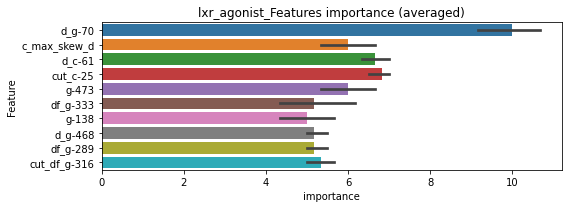

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 lxr_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00937676	valid_1's binary_logloss: 0.011799
[200]	training's binary_logloss: 0.000856047	valid_1's binary_logloss: 0.00231964
[300]	training's binary_logloss: 0.000218798	valid_1's binary_logloss: 0.00144281
[400]	training's binary_logloss: 0.000127545	valid_1's binary_logloss: 0.00130392
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000122871	valid_1's binary_logloss: 0.00129729


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 lxr_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00980981	valid_1's binary_logloss: 0.0101627
[200]	training's binary_logloss: 0.000924984	valid_1's binary_logloss: 0.0011014
[300]	training's binary_logloss: 0.000238486	valid_1's binary_logloss: 0.000338862
[400]	training's binary_logloss: 0.000136713	valid_1's binary_logloss: 0.000226212
[500]	training's binary_logloss: 0.000117507	valid_1's binary_logloss: 0.000206567
[600]	training's binary_logloss: 0.000111276	valid_1's binary_logloss: 0.0002001
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000110638	valid_1's binary_logloss: 0.000199237


lxr_agonist logloss: 0.0007483339580768948


neg labels: 3289 → selected neg labels: 3284


mdm_inhibitor, len(trt): 31, len(othr): 3284, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0082356	valid_1's binary_logloss: 0.0214222
[200]	training's binary_logloss: 0.00105536	valid_1's binary_logloss: 0.0110725
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.000573799	valid_1's binary_logloss: 0.00984668
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00903791	valid_1's binary_logloss: 0.0138267
[200]	training's binary_logloss: 0.00114951	valid_1's binary_logloss: 0.00395209
[300]	training's binary_logloss: 0.000524017	valid_1's binary_logloss: 0.00286167
[400]	training's binary_logloss: 0.000429481	valid_1's binary_logloss: 0.00267366
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000419723	valid_1's binary_logloss: 0.0026461


1 / 3 AUC score:1.000
y_Threshold: 0.0029156, Threshold: 0.0049156, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00130
Num_p_label: 80.0, conf_0:0.00442, conf_1:0.00541
Num_p_label: 80.0, Expected: 5.2, Adj_threshold_1: 0.0049156
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_2: 0.0149156
Num_p_label: 3.0, Expected: 5.2, Adj_threshold_3: 0.0249156
threshold: 0.0249156, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00796758	valid_1's binary_logloss: 0.019024
[200]	training's binary_logloss: 0.000985081	valid_1's binary_logloss: 0.00812821
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000475035	valid_1's binary_logloss: 0.00679056
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00870168	valid_1's binary_logloss: 0.0131506
[200]	training's binary_logloss: 0.00105756	valid_1's binary_logloss: 0.00294232
[300]	training's binary_logloss: 0.000491417	valid_1's binary_logloss: 0.00194539
[400]	training's binary_logloss: 0.000403086	valid_1's binary_logloss: 0.00177435
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00039045	valid_1's binary_logloss: 0.00174175


2 / 3 AUC score:1.000
y_Threshold: 0.0401911, Threshold: 0.0249156, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0163235 Vs.target_rate: 0.00130
Num_p_label: 65.0, conf_0:0.02242, conf_1:0.02741
Num_p_label: 65.0, Expected: 5.2, Adj_threshold_1: 0.0249156
Num_p_label: 47.0, Expected: 5.2, Adj_threshold_2: 0.0349156
Num_p_label: 35.0, Expected: 5.2, Adj_threshold_3: 0.0449156
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_4: 0.0549156
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_5: 0.0649156
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_6: 0.0749156
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_7: 0.0849156
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_8: 0.0949156
threshold: 0.0949156, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00796758	valid_1's binary_logloss: 0.019024
[200]	training's binary_logloss: 0.000985081	valid_1's binary_logloss: 0.00812821
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000475035	valid_1's binary_logloss: 0.00679056
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00870168	valid_1's binary_logloss: 0.0131506
[200]	training's binary_logloss: 0.00105756	valid_1's binary_logloss: 0.00294232
[300]	training's binary_logloss: 0.000491417	valid_1's binary_logloss: 0.00194539
[400]	training's binary_logloss: 0.000403086	valid_1's binary_logloss: 0.00177435
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00039045	valid_1's binary_logloss: 0.00174175


3 / 3 AUC score:1.000
y_Threshold: 0.0401911, Threshold: 0.0949156, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00130
Num_p_label: 10.0, conf_0:0.08542, conf_1:0.10441
threshold: 0.0949156, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 666.0/7790, y_label_rate: 0.0854942


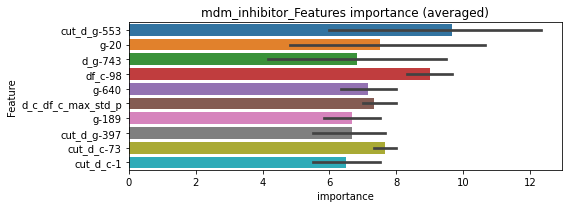

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 mdm_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159423	valid_1's binary_logloss: 0.0255838
[200]	training's binary_logloss: 0.00242679	valid_1's binary_logloss: 0.0111437
[300]	training's binary_logloss: 0.000724855	valid_1's binary_logloss: 0.00862183
[400]	training's binary_logloss: 0.000368435	valid_1's binary_logloss: 0.0081119
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000335521	valid_1's binary_logloss: 0.00799134


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 mdm_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0164963	valid_1's binary_logloss: 0.0238596
[200]	training's binary_logloss: 0.00266297	valid_1's binary_logloss: 0.00903849
[300]	training's binary_logloss: 0.000805597	valid_1's binary_logloss: 0.0066166
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000533498	valid_1's binary_logloss: 0.00611634


mdm_inhibitor logloss: 0.00705384094649493


neg labels: 3289 → selected neg labels: 3278


mek_inhibitor, len(trt): 72, len(othr): 3278, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.012025	valid_1's binary_logloss: 0.0297339
[200]	training's binary_logloss: 0.00175967	valid_1's binary_logloss: 0.0189223
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.000831382	valid_1's binary_logloss: 0.0178548
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.011554	valid_1's binary_logloss: 0.0401892
[200]	training's binary_logloss: 0.00163005	valid_1's binary_logloss: 0.0274396
Early stopping, best iteration is:
[218]	training's binary_logloss: 0.00131661	valid_1's binary_logloss: 0.0267801


1 / 3 AUC score:1.000
y_Threshold: 0.0036842, Threshold: 0.0102573, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0200904 Vs.target_rate: 0.00302
Num_p_label: 80.0, conf_0:0.00923, conf_1:0.01128
Num_p_label: 80.0, Expected: 12.0, Adj_threshold_1: 0.0102573
Num_p_label: 39.0, Expected: 12.0, Adj_threshold_2: 0.0202573
Num_p_label: 34.0, Expected: 12.0, Adj_threshold_3: 0.0302573
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_4: 0.0402573
Num_p_label: 31.0, Expected: 12.0, Adj_threshold_5: 0.0502573
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_6: 0.0602573
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_7: 0.0702573
Num_p_label: 27.0, Expected: 12.0, Adj_threshold_8: 0.0802573
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_9: 0.0902573
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_10: 0.1002573
threshold: 0.1102573, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 654.0/3799, y_label_rate: 0.1721506

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0111033	valid_1's binary_logloss: 0.0338416
[200]	training's binary_logloss: 0.00150825	valid_1's binary_logloss: 0.0228444
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.000981243	valid_1's binary_logloss: 0.0221061
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0111668	valid_1's binary_logloss: 0.0325909
[200]	training's binary_logloss: 0.00152252	valid_1's binary_logloss: 0.0190405
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.000826574	valid_1's binary_logloss: 0.0176682


2 / 3 AUC score:1.000
y_Threshold: 0.0183377, Threshold: 0.1102573, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0092918 Vs.target_rate: 0.00302
Num_p_label: 37.0, conf_0:0.09923, conf_1:0.12128
Num_p_label: 37.0, Expected: 12.0, Adj_threshold_1: 0.1102573
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_2: 0.1202573
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_3: 0.1302573
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_4: 0.1402573
Num_p_label: 34.0, Expected: 12.0, Adj_threshold_5: 0.1502573
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_6: 0.1602573
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_7: 0.1702573
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_8: 0.1802573
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_9: 0.1902573
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_10: 0.2002573
threshold: 0.2102573, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 653.0/3797, y_label_rate: 0.1719779

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0101439	valid_1's binary_logloss: 0.0378572
[200]	training's binary_logloss: 0.00137659	valid_1's binary_logloss: 0.0239767
[300]	training's binary_logloss: 0.000598835	valid_1's binary_logloss: 0.0223083
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.000608072	valid_1's binary_logloss: 0.0222578
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0117089	valid_1's binary_logloss: 0.0263495
[200]	training's binary_logloss: 0.00163962	valid_1's binary_logloss: 0.0127736
[300]	training's binary_logloss: 0.000696903	valid_1's binary_logloss: 0.0115195
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.000598103	valid_1's binary_logloss: 0.0110575


3 / 3 AUC score:1.000
y_Threshold: 0.0175277, Threshold: 0.2102573, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 652.0/3795
p_label_rate: 0.0080362 Vs.target_rate: 0.00302
Num_p_label: 32.0, conf_0:0.18923, conf_1:0.23128
threshold: 0.2102573, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 684.0/7777, y_label_rate: 0.0879517


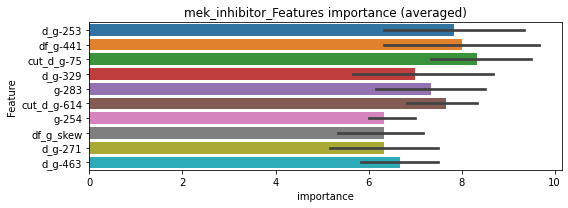

len(train_index) : 3888
len(valid_index) : 3889
================================= fold 1/2 mek_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0184737	valid_1's binary_logloss: 0.0412254
[200]	training's binary_logloss: 0.00319108	valid_1's binary_logloss: 0.0238313
[300]	training's binary_logloss: 0.000999576	valid_1's binary_logloss: 0.0197868
Early stopping, best iteration is:
[347]	training's binary_logloss: 0.000688526	valid_1's binary_logloss: 0.0190824


len(train_index) : 3889
len(valid_index) : 3888
================================= fold 2/2 mek_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0191656	valid_1's binary_logloss: 0.0345876
[200]	training's binary_logloss: 0.00331683	valid_1's binary_logloss: 0.0165713
[300]	training's binary_logloss: 0.00105703	valid_1's binary_logloss: 0.0129435
[400]	training's binary_logloss: 0.000519352	valid_1's binary_logloss: 0.0116245
[500]	training's binary_logloss: 0.000346428	valid_1's binary_logloss: 0.011195
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000332005	valid_1's binary_logloss: 0.0111318


mek_inhibitor logloss: 0.015107598125777022


neg labels: 3289 → selected neg labels: 3278


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3278, target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023655	valid_1's binary_logloss: 0.0811329
[200]	training's binary_logloss: 0.0043045	valid_1's binary_logloss: 0.0710536
Early stopping, best iteration is:
[208]	training's binary_logloss: 0.00391306	valid_1's binary_logloss: 0.070586
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0262005	valid_1's binary_logloss: 0.0698049
[200]	training's binary_logloss: 0.00465191	valid_1's binary_logloss: 0.0576547
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00359665	valid_1's binary_logloss: 0.0571973


1 / 3 AUC score:0.996
y_Threshold: 0.0098928, Threshold: 0.0114664, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 150 → Positive_corect_labels: 646/3783
p_label_rate: 0.0200904 Vs.target_rate: 0.00311
Num_p_label: 80.0, conf_0:0.01032, conf_1:0.01261
Num_p_label: 80.0, Expected: 12.4, Adj_threshold_1: 0.0114664
Num_p_label: 4.0, Expected: 12.4, Adj_threshold_2: 0.0214664
threshold: 0.0214664, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 646.0/3783, y_label_rate: 0.1707639
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0219186	valid_1's binary_logloss: 0.0801724
Early stopping, best iteration is:
[179]	training's binary_logloss: 0.00499018	valid_1's binary_logloss: 0.0715782
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0244878	valid_1's binary_logloss: 0.0582202
[200]	training's binary_logloss: 0.00444459	valid_1's binary_logloss: 0.0422892
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00296704	valid_1's binary_logloss: 0.0408925


2 / 3 AUC score:0.999
y_Threshold: 0.0210207, Threshold: 0.0214664, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 22 → Positive_corect_labels: 635.0/3761
p_label_rate: 0.0012557 Vs.target_rate: 0.00311
Num_p_label: 5.0, conf_0:0.01932, conf_1:0.02361
threshold: 0.0214664, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 635.0/3761, y_label_rate: 0.1688381
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0206396	valid_1's binary_logloss: 0.0630358
[200]	training's binary_logloss: 0.00363044	valid_1's binary_logloss: 0.0505738
Early stopping, best iteration is:
[207]	training's binary_logloss: 0.00330293	valid_1's binary_logloss: 0.0502367
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0201329	valid_1's binary_logloss: 0.0634855
[200]	training's binary_logloss: 0.00352619	valid_1's binary_logloss: 0.0510865
Early stopping, best iteration is:
[225]	training's binary_logloss: 0.00261287	valid_1's binary_logloss: 0.050388


3 / 3 AUC score:1.000
y_Threshold: 0.0161934, Threshold: 0.0214664, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 629.0/3749
p_label_rate: 0.0007534 Vs.target_rate: 0.00311
Num_p_label: 3.0, conf_0:0.01932, conf_1:0.02361
Num_p_label: 3.0, Expected: 12.4, Adj_threshold_1: 0.0214664
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_2: 0.0114664
threshold: 0.0114664, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 660.0/7731, y_label_rate: 0.0853706


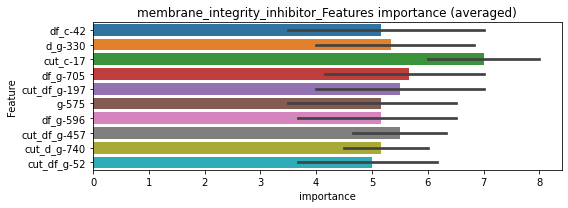

len(train_index) : 3865
len(valid_index) : 3866
================================= fold 1/2 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0327762	valid_1's binary_logloss: 0.0686529
[200]	training's binary_logloss: 0.00816352	valid_1's binary_logloss: 0.0514045
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00528472	valid_1's binary_logloss: 0.0498403


len(train_index) : 3866
len(valid_index) : 3865
================================= fold 2/2 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0349489	valid_1's binary_logloss: 0.0616372
[200]	training's binary_logloss: 0.00951139	valid_1's binary_logloss: 0.0422633
[300]	training's binary_logloss: 0.00343076	valid_1's binary_logloss: 0.039068
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00296522	valid_1's binary_logloss: 0.0389048


membrane_integrity_inhibitor logloss: 0.04437329007212208


neg labels: 3289 → selected neg labels: 3285


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00847133	valid_1's binary_logloss: 0.0280385
Early stopping, best iteration is:
[166]	training's binary_logloss: 0.00190672	valid_1's binary_logloss: 0.0218203
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0098687	valid_1's binary_logloss: 0.0191686
[200]	training's binary_logloss: 0.00141511	valid_1's binary_logloss: 0.00949929
[300]	training's binary_logloss: 0.000602335	valid_1's binary_logloss: 0.00831894
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000629393	valid_1's binary_logloss: 0.0082424


1 / 3 AUC score:1.000
y_Threshold: 0.0028076, Threshold: 0.0033728, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00105
Num_p_label: 80.0, conf_0:0.00304, conf_1:0.00371
Num_p_label: 80.0, Expected: 4.2, Adj_threshold_1: 0.0033728
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_2: 0.0133728
threshold: 0.0133728, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00844848	valid_1's binary_logloss: 0.0266098
[200]	training's binary_logloss: 0.00117791	valid_1's binary_logloss: 0.0195554
[300]	training's binary_logloss: 0.000542553	valid_1's binary_logloss: 0.0185198
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.000545554	valid_1's binary_logloss: 0.0185071
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0103291	valid_1's binary_logloss: 0.0194347
[200]	training's binary_logloss: 0.00147278	valid_1's binary_logloss: 0.00916605
[300]	training's binary_logloss: 0.000636272	valid_1's binary_logloss: 0.00765098
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000663136	valid_1's binary_logloss: 0.00755426


2 / 3 AUC score:1.000
y_Threshold: 0.0133733, Threshold: 0.0133728, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, conf_0:0.01204, conf_1:0.01471
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0133728
Num_p_label: 27.0, Expected: 4.2, Adj_threshold_2: 0.0033728
threshold: 0.0033728, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00844848	valid_1's binary_logloss: 0.0266098
[200]	training's binary_logloss: 0.00117791	valid_1's binary_logloss: 0.0195554
[300]	training's binary_logloss: 0.000542553	valid_1's binary_logloss: 0.0185198
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.000545554	valid_1's binary_logloss: 0.0185071
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0103291	valid_1's binary_logloss: 0.0194347
[200]	training's binary_logloss: 0.00147278	valid_1's binary_logloss: 0.00916605
[300]	training's binary_logloss: 0.000636272	valid_1's binary_logloss: 0.00765098
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000663136	valid_1's binary_logloss: 0.00755426


3 / 3 AUC score:1.000
y_Threshold: 0.0133733, Threshold: 0.0033728, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0067805 Vs.target_rate: 0.00105
Num_p_label: 27.0, conf_0:0.00304, conf_1:0.00371
Num_p_label: 27.0, Expected: 4.2, Adj_threshold_1: 0.0033728
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_2: 0.0133728
threshold: 0.0133728, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7792, y_label_rate: 0.0843172


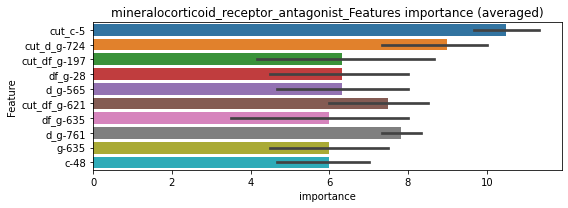

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0155639	valid_1's binary_logloss: 0.0276181
[200]	training's binary_logloss: 0.00236107	valid_1's binary_logloss: 0.0141357
[300]	training's binary_logloss: 0.000729297	valid_1's binary_logloss: 0.0125738
Early stopping, best iteration is:
[303]	training's binary_logloss: 0.000713502	valid_1's binary_logloss: 0.0125305


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0173188	valid_1's binary_logloss: 0.0241759
[200]	training's binary_logloss: 0.00285553	valid_1's binary_logloss: 0.00823347
[300]	training's binary_logloss: 0.000897996	valid_1's binary_logloss: 0.00550768
[400]	training's binary_logloss: 0.000436693	valid_1's binary_logloss: 0.00479682
[500]	training's binary_logloss: 0.000295874	valid_1's binary_logloss: 0.00451777
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000295019	valid_1's binary_logloss: 0.00451112


mineralocorticoid_receptor_antagonist logloss: 0.00852081228087708


neg labels: 3289 → selected neg labels: 3287


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0050743	valid_1's binary_logloss: 0.0132526
[200]	training's binary_logloss: 0.000653362	valid_1's binary_logloss: 0.00741008
Early stopping, best iteration is:
[222]	training's binary_logloss: 0.000514894	valid_1's binary_logloss: 0.0070567
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0056699	valid_1's binary_logloss: 0.00849071
[200]	training's binary_logloss: 0.000702397	valid_1's binary_logloss: 0.00332171
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.000427363	valid_1's binary_logloss: 0.00291772


1 / 3 AUC score:1.000
y_Threshold: 0.0008311, Threshold: 0.0010081, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00091, conf_1:0.00111
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0010081
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0110081
threshold: 0.0110081, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00530453	valid_1's binary_logloss: 0.0135959
[200]	training's binary_logloss: 0.000674092	valid_1's binary_logloss: 0.0074751
Early stopping, best iteration is:
[272]	training's binary_logloss: 0.000396658	valid_1's binary_logloss: 0.00676723
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00592507	valid_1's binary_logloss: 0.00877337
[200]	training's binary_logloss: 0.000722598	valid_1's binary_logloss: 0.0034373
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.000436019	valid_1's binary_logloss: 0.00296681


2 / 3 AUC score:1.000
y_Threshold: 0.0193451, Threshold: 0.0110081, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, conf_0:0.00991, conf_1:0.01211
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0110081
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_2: 0.0010081
threshold: 0.0010081, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00530453	valid_1's binary_logloss: 0.0135959
[200]	training's binary_logloss: 0.000674092	valid_1's binary_logloss: 0.0074751
Early stopping, best iteration is:
[272]	training's binary_logloss: 0.000396658	valid_1's binary_logloss: 0.00676723
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00592507	valid_1's binary_logloss: 0.00877337
[200]	training's binary_logloss: 0.000722598	valid_1's binary_logloss: 0.0034373
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.000436019	valid_1's binary_logloss: 0.00296681


3 / 3 AUC score:1.000
y_Threshold: 0.0193451, Threshold: 0.0010081, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00091, conf_1:0.00111
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0010081
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0110081
threshold: 0.0110081, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7794, y_label_rate: 0.0842956


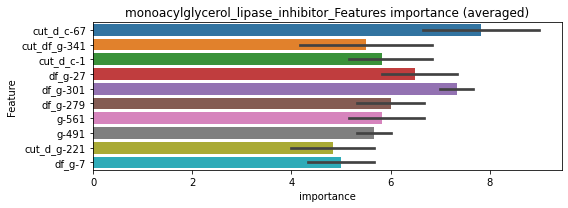

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0119773	valid_1's binary_logloss: 0.017349
[200]	training's binary_logloss: 0.00144633	valid_1's binary_logloss: 0.00592187
[300]	training's binary_logloss: 0.000416619	valid_1's binary_logloss: 0.00444752
Early stopping, best iteration is:
[369]	training's binary_logloss: 0.000253204	valid_1's binary_logloss: 0.00411357


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0123904	valid_1's binary_logloss: 0.0145498
[200]	training's binary_logloss: 0.00156736	valid_1's binary_logloss: 0.00355392
[300]	training's binary_logloss: 0.00043989	valid_1's binary_logloss: 0.00232188
[400]	training's binary_logloss: 0.000227543	valid_1's binary_logloss: 0.00203564
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000185109	valid_1's binary_logloss: 0.00199121


monoacylglycerol_lipase_inhibitor logloss: 0.0030523924168477435


neg labels: 3289 → selected neg labels: 3274


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3274, target_rate: 0.0035693 → Adj_target_rate: 0.0036661
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0282234	valid_1's binary_logloss: 0.0952478
Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00737193	valid_1's binary_logloss: 0.0866164
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0336388	valid_1's binary_logloss: 0.0809583
[200]	training's binary_logloss: 0.00628928	valid_1's binary_logloss: 0.0654286
Early stopping, best iteration is:
[206]	training's binary_logloss: 0.00581705	valid_1's binary_logloss: 0.0651065


1 / 3 AUC score:0.994
y_Threshold: 0.0154065, Threshold: 0.0175104, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 162 → Positive_corect_labels: 639/3766
p_label_rate: 0.0200904 Vs.target_rate: 0.00357
Num_p_label: 80.0, conf_0:0.01576, conf_1:0.01926
Num_p_label: 80.0, Expected: 14.2, Adj_threshold_1: 0.0175104
Num_p_label: 12.0, Expected: 14.2, Adj_threshold_2: 0.0275104
threshold: 0.0275104, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 639.0/3766, y_label_rate: 0.1696760
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0245969	valid_1's binary_logloss: 0.0871931
Early stopping, best iteration is:
[142]	training's binary_logloss: 0.0109078	valid_1's binary_logloss: 0.0800586
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0289664	valid_1's binary_logloss: 0.0716142
[200]	training's binary_logloss: 0.00557765	valid_1's binary_logloss: 0.0546012
Early stopping, best iteration is:
[255]	training's binary_logloss: 0.00298702	valid_1's binary_logloss: 0.0527936


2 / 3 AUC score:0.997
y_Threshold: 0.0297870, Threshold: 0.0275104, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 42 → Positive_corect_labels: 618.0/3724
p_label_rate: 0.0020090 Vs.target_rate: 0.00357
Num_p_label: 8.0, conf_0:0.02476, conf_1:0.03026
threshold: 0.0275104, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 618.0/3724, y_label_rate: 0.1659506
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0222535	valid_1's binary_logloss: 0.0645246
Early stopping, best iteration is:
[181]	training's binary_logloss: 0.00482485	valid_1's binary_logloss: 0.0523548
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0227483	valid_1's binary_logloss: 0.0613864
[200]	training's binary_logloss: 0.00403143	valid_1's binary_logloss: 0.0483981
Early stopping, best iteration is:
[227]	training's binary_logloss: 0.00292801	valid_1's binary_logloss: 0.0473992


3 / 3 AUC score:0.999
y_Threshold: 0.0211536, Threshold: 0.0275104, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 24 → Positive_corect_labels: 606.0/3700
p_label_rate: 0.0002511 Vs.target_rate: 0.00357
Num_p_label: 1.0, conf_0:0.02476, conf_1:0.03026
Num_p_label: 1.0, Expected: 14.2, Adj_threshold_1: 0.0275104
Num_p_label: 21.0, Expected: 14.2, Adj_threshold_2: 0.0175104
threshold: 0.0175104, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 627.0/7682, y_label_rate: 0.0816194


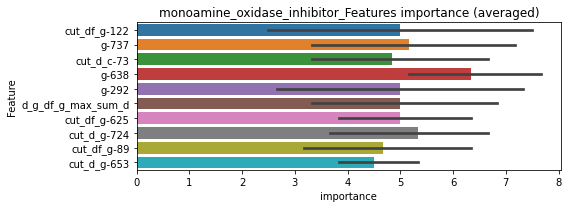

len(train_index) : 3841
len(valid_index) : 3841
================================= fold 1/2 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0299556	valid_1's binary_logloss: 0.059668
[200]	training's binary_logloss: 0.00726553	valid_1's binary_logloss: 0.0422531
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.00348539	valid_1's binary_logloss: 0.0403818


len(train_index) : 3841
len(valid_index) : 3841
================================= fold 2/2 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0332048	valid_1's binary_logloss: 0.0564076
[200]	training's binary_logloss: 0.00858897	valid_1's binary_logloss: 0.0356165
[300]	training's binary_logloss: 0.00305771	valid_1's binary_logloss: 0.0319921
Early stopping, best iteration is:
[338]	training's binary_logloss: 0.00224544	valid_1's binary_logloss: 0.0317039


monoamine_oxidase_inhibitor logloss: 0.03604281239096471


neg labels: 3289 → selected neg labels: 3286


monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00622815	valid_1's binary_logloss: 0.0137879
[200]	training's binary_logloss: 0.000821989	valid_1's binary_logloss: 0.0067611
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.000555557	valid_1's binary_logloss: 0.00613793
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00673182	valid_1's binary_logloss: 0.0127709
[200]	training's binary_logloss: 0.000879082	valid_1's binary_logloss: 0.005943
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.000519642	valid_1's binary_logloss: 0.00543521


1 / 3 AUC score:1.000
y_Threshold: 0.0019090, Threshold: 0.0026487, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00238, conf_1:0.00291
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0026487
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0126487
threshold: 0.0126487, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00635236	valid_1's binary_logloss: 0.0128618
[200]	training's binary_logloss: 0.000805576	valid_1's binary_logloss: 0.00537279
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.000450061	valid_1's binary_logloss: 0.00471431
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00669678	valid_1's binary_logloss: 0.0134963
[200]	training's binary_logloss: 0.00086528	valid_1's binary_logloss: 0.00648921
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.000579651	valid_1's binary_logloss: 0.0061511


2 / 3 AUC score:1.000
y_Threshold: 0.0283562, Threshold: 0.0126487, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00076
Num_p_label: 18.0, conf_0:0.01138, conf_1:0.01391
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0126487
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0226487
threshold: 0.0226487, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00635236	valid_1's binary_logloss: 0.0128618
[200]	training's binary_logloss: 0.000805576	valid_1's binary_logloss: 0.00537279
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.000450061	valid_1's binary_logloss: 0.00471431
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00669678	valid_1's binary_logloss: 0.0134963
[200]	training's binary_logloss: 0.00086528	valid_1's binary_logloss: 0.00648921
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.000579651	valid_1's binary_logloss: 0.0061511


3 / 3 AUC score:1.000
y_Threshold: 0.0283562, Threshold: 0.0226487, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00076
Num_p_label: 2.0, conf_0:0.02038, conf_1:0.02491
threshold: 0.0226487, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7793, y_label_rate: 0.0845631


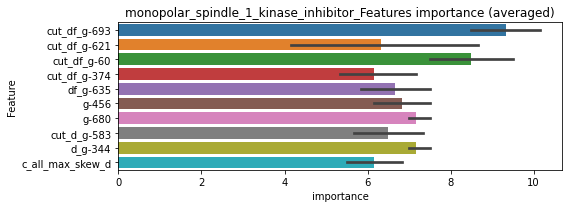

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.01352	valid_1's binary_logloss: 0.0196119
[200]	training's binary_logloss: 0.00188949	valid_1's binary_logloss: 0.00687704
[300]	training's binary_logloss: 0.00056255	valid_1's binary_logloss: 0.0052722
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000339332	valid_1's binary_logloss: 0.0049678


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0135445	valid_1's binary_logloss: 0.0194998
[200]	training's binary_logloss: 0.00187125	valid_1's binary_logloss: 0.00718692
[300]	training's binary_logloss: 0.000552373	valid_1's binary_logloss: 0.0057735
[400]	training's binary_logloss: 0.000288028	valid_1's binary_logloss: 0.00541674
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000283379	valid_1's binary_logloss: 0.00541223


monopolar_spindle_1_kinase_inhibitor logloss: 0.0051899857980130144


neg labels: 3289 → selected neg labels: 3267


mtor_inhibitor, len(trt): 130, len(othr): 3267, target_rate: 0.0054590 → Adj_target_rate: 0.0052608
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0143285	valid_1's binary_logloss: 0.0644984
Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00346679	valid_1's binary_logloss: 0.0579829
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0157444	valid_1's binary_logloss: 0.0613772
[200]	training's binary_logloss: 0.00256546	valid_1's binary_logloss: 0.045192
Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00153661	valid_1's binary_logloss: 0.0432122


1 / 3 AUC score:0.997
y_Threshold: 0.0094491, Threshold: 0.0503418, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 151 → Positive_corect_labels: 643/3769
p_label_rate: 0.0200904 Vs.target_rate: 0.00546
Num_p_label: 80.0, conf_0:0.04531, conf_1:0.05538
Num_p_label: 80.0, Expected: 21.7, Adj_threshold_1: 0.0503418
Num_p_label: 73.0, Expected: 21.7, Adj_threshold_2: 0.0603418
Num_p_label: 71.0, Expected: 21.7, Adj_threshold_3: 0.0703418
Num_p_label: 67.0, Expected: 21.7, Adj_threshold_4: 0.0803418
Num_p_label: 64.0, Expected: 21.7, Adj_threshold_5: 0.0903418
Num_p_label: 64.0, Expected: 21.7, Adj_threshold_6: 0.1003418
Num_p_label: 62.0, Expected: 21.7, Adj_threshold_7: 0.1103418
Num_p_label: 61.0, Expected: 21.7, Adj_threshold_8: 0.1203418
Num_p_label: 59.0, Expected: 21.7, Adj_threshold_9: 0.1303418
Num_p_label: 58.0, Expected: 21.7, Adj_threshold_10: 0.1403418
threshold: 0.1503418, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 643.0/3769, y_label_rate: 0.1706023

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0123395	valid_1's binary_logloss: 0.0363767
[200]	training's binary_logloss: 0.00190623	valid_1's binary_logloss: 0.024519
Early stopping, best iteration is:
[229]	training's binary_logloss: 0.00135857	valid_1's binary_logloss: 0.0236041
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0119912	valid_1's binary_logloss: 0.0513719
[200]	training's binary_logloss: 0.00166403	valid_1's binary_logloss: 0.0367809
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.00105476	valid_1's binary_logloss: 0.0360867


2 / 3 AUC score:1.000
y_Threshold: 0.0480059, Threshold: 0.1503418, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 24 → Positive_corect_labels: 631.0/3745
p_label_rate: 0.0436966 Vs.target_rate: 0.00546
Num_p_label: 174.0, conf_0:0.13531, conf_1:0.16538
Num_p_label: 174.0, Expected: 21.7, Adj_threshold_1: 0.1503418
Num_p_label: 170.0, Expected: 21.7, Adj_threshold_2: 0.1603418
Num_p_label: 166.0, Expected: 21.7, Adj_threshold_3: 0.1703418
Num_p_label: 166.0, Expected: 21.7, Adj_threshold_4: 0.1803418
Num_p_label: 161.0, Expected: 21.7, Adj_threshold_5: 0.1903418
Num_p_label: 156.0, Expected: 21.7, Adj_threshold_6: 0.2003418
Num_p_label: 153.0, Expected: 21.7, Adj_threshold_7: 0.2103418
Num_p_label: 151.0, Expected: 21.7, Adj_threshold_8: 0.2203418
Num_p_label: 147.0, Expected: 21.7, Adj_threshold_9: 0.2303418
Num_p_label: 144.0, Expected: 21.7, Adj_threshold_10: 0.2403418
threshold: 0.2503418, positive_p_label: 140.0/3982, p_label_rate: 0.0351582
positive_y_label: 631.0/3745, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0107048	valid_1's binary_logloss: 0.0367027
[200]	training's binary_logloss: 0.0015341	valid_1's binary_logloss: 0.0255995
Early stopping, best iteration is:
[217]	training's binary_logloss: 0.00125242	valid_1's binary_logloss: 0.0249571
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00996878	valid_1's binary_logloss: 0.0597363
Early stopping, best iteration is:
[142]	training's binary_logloss: 0.003594	valid_1's binary_logloss: 0.0546729


3 / 3 AUC score:0.999
y_Threshold: 0.0440676, Threshold: 0.2503418, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 34 → Positive_corect_labels: 614.0/3711
p_label_rate: 0.0549975 Vs.target_rate: 0.00546
Num_p_label: 219.0, conf_0:0.22531, conf_1:0.27538
Num_p_label: 219.0, Expected: 21.7, Adj_threshold_1: 0.2503418
Num_p_label: 216.0, Expected: 21.7, Adj_threshold_2: 0.2603418
Num_p_label: 213.0, Expected: 21.7, Adj_threshold_3: 0.2703418
Num_p_label: 210.0, Expected: 21.7, Adj_threshold_4: 0.2803418
Num_p_label: 207.0, Expected: 21.7, Adj_threshold_5: 0.2903418
Num_p_label: 205.0, Expected: 21.7, Adj_threshold_6: 0.3003418
Num_p_label: 205.0, Expected: 21.7, Adj_threshold_7: 0.3103418
Num_p_label: 200.0, Expected: 21.7, Adj_threshold_8: 0.3203418
Num_p_label: 199.0, Expected: 21.7, Adj_threshold_9: 0.3303418
Num_p_label: 194.0, Expected: 21.7, Adj_threshold_10: 0.3403418
threshold: 0.3503418, positive_p_label: 189.0/3982, p_label_rate: 0.0474636
positive_y_label: 803.0/7693, y_label_ra

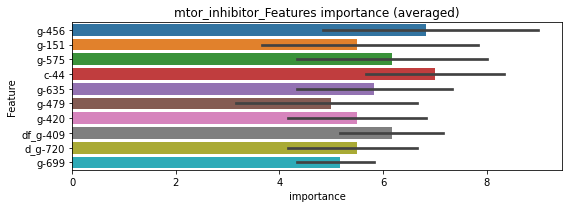

len(train_index) : 3846
len(valid_index) : 3847
================================= fold 1/2 mtor_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0235356	valid_1's binary_logloss: 0.0493117
[200]	training's binary_logloss: 0.0043168	valid_1's binary_logloss: 0.0321264
[300]	training's binary_logloss: 0.00141831	valid_1's binary_logloss: 0.0295621
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000746945	valid_1's binary_logloss: 0.0283556


len(train_index) : 3847
len(valid_index) : 3846
================================= fold 2/2 mtor_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0243482	valid_1's binary_logloss: 0.0424917
[200]	training's binary_logloss: 0.00447068	valid_1's binary_logloss: 0.0245656
[300]	training's binary_logloss: 0.00141487	valid_1's binary_logloss: 0.0206834
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00117678	valid_1's binary_logloss: 0.0204776


mtor_inhibitor logloss: 0.024417122818562752


neg labels: 3289 → selected neg labels: 3281


mucolytic_agent, len(trt): 48, len(othr): 3281, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.014342	valid_1's binary_logloss: 0.0568306
Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00348931	valid_1's binary_logloss: 0.0493824
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0180904	valid_1's binary_logloss: 0.0397142
[200]	training's binary_logloss: 0.00298137	valid_1's binary_logloss: 0.0256932
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00192123	valid_1's binary_logloss: 0.0248244


1 / 3 AUC score:1.000
y_Threshold: 0.0068379, Threshold: 0.0075451, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0200904 Vs.target_rate: 0.00202
Num_p_label: 80.0, conf_0:0.00679, conf_1:0.00830
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_1: 0.0075451
Num_p_label: 0.0, Expected: 8.0, Adj_threshold_2: 0.0175451
threshold: 0.0175451, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0164104	valid_1's binary_logloss: 0.0482882
[200]	training's binary_logloss: 0.00263117	valid_1's binary_logloss: 0.0355076
Early stopping, best iteration is:
[222]	training's binary_logloss: 0.00202059	valid_1's binary_logloss: 0.0347019
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0177304	valid_1's binary_logloss: 0.0410556
[200]	training's binary_logloss: 0.00275164	valid_1's binary_logloss: 0.027091
Early stopping, best iteration is:
[219]	training's binary_logloss: 0.00215847	valid_1's binary_logloss: 0.026679


2 / 3 AUC score:1.000
y_Threshold: 0.0174646, Threshold: 0.0175451, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0005023 Vs.target_rate: 0.00202
Num_p_label: 2.0, conf_0:0.01579, conf_1:0.01930
Num_p_label: 2.0, Expected: 8.0, Adj_threshold_1: 0.0175451
Num_p_label: 91.0, Expected: 8.0, Adj_threshold_2: 0.0075451
threshold: 0.0075451, positive_p_label: 91.0/3982, p_label_rate: 0.0228528
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0150761	valid_1's binary_logloss: 0.0520454
Early stopping, best iteration is:
[169]	training's binary_logloss: 0.00354901	valid_1's binary_logloss: 0.0435402
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0173074	valid_1's binary_logloss: 0.0366833
[200]	training's binary_logloss: 0.00278924	valid_1's binary_logloss: 0.0212284
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.00121078	valid_1's binary_logloss: 0.0190362


3 / 3 AUC score:1.000
y_Threshold: 0.0138369, Threshold: 0.0075451, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0215972 Vs.target_rate: 0.00202
Num_p_label: 86.0, conf_0:0.00679, conf_1:0.00830
Num_p_label: 86.0, Expected: 8.0, Adj_threshold_1: 0.0075451
Num_p_label: 3.0, Expected: 8.0, Adj_threshold_2: 0.0175451
threshold: 0.0175451, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 653.0/7775, y_label_rate: 0.0839871


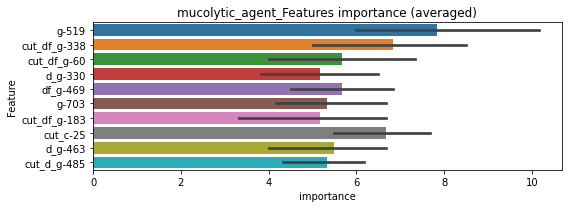

len(train_index) : 3887
len(valid_index) : 3888
================================= fold 1/2 mucolytic_agent=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0226844	valid_1's binary_logloss: 0.0437407
[200]	training's binary_logloss: 0.0047656	valid_1's binary_logloss: 0.0263354
[300]	training's binary_logloss: 0.00155176	valid_1's binary_logloss: 0.0235795
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00135964	valid_1's binary_logloss: 0.0234999


len(train_index) : 3888
len(valid_index) : 3887
================================= fold 2/2 mucolytic_agent=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.024738	valid_1's binary_logloss: 0.0373543
[200]	training's binary_logloss: 0.00544957	valid_1's binary_logloss: 0.0196354
[300]	training's binary_logloss: 0.00182151	valid_1's binary_logloss: 0.0166659
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00130945	valid_1's binary_logloss: 0.0161622


mucolytic_agent logloss: 0.019831525283908507


neg labels: 3289 → selected neg labels: 3283


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3283, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0117466	valid_1's binary_logloss: 0.0410258
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00220048	valid_1's binary_logloss: 0.0326706
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0138784	valid_1's binary_logloss: 0.0307024
[200]	training's binary_logloss: 0.0020966	valid_1's binary_logloss: 0.0188015
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.00131129	valid_1's binary_logloss: 0.0177884


1 / 3 AUC score:1.000
y_Threshold: 0.0040324, Threshold: 0.0047318, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00155
Num_p_label: 80.0, conf_0:0.00426, conf_1:0.00520
Num_p_label: 80.0, Expected: 6.2, Adj_threshold_1: 0.0047318
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_2: 0.0147318
threshold: 0.0147318, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0122274	valid_1's binary_logloss: 0.0405264
[200]	training's binary_logloss: 0.00178759	valid_1's binary_logloss: 0.0318067
Early stopping, best iteration is:
[228]	training's binary_logloss: 0.0012881	valid_1's binary_logloss: 0.0312344
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0142538	valid_1's binary_logloss: 0.0305163
[200]	training's binary_logloss: 0.00213727	valid_1's binary_logloss: 0.0185982
Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00129702	valid_1's binary_logloss: 0.0176333


2 / 3 AUC score:1.000
y_Threshold: 0.0115725, Threshold: 0.0147318, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0007534 Vs.target_rate: 0.00155
Num_p_label: 3.0, conf_0:0.01326, conf_1:0.01620
threshold: 0.0147318, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0130711	valid_1's binary_logloss: 0.0342238
[200]	training's binary_logloss: 0.00187246	valid_1's binary_logloss: 0.0241959
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00116831	valid_1's binary_logloss: 0.0229627
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0130895	valid_1's binary_logloss: 0.0347735
[200]	training's binary_logloss: 0.00191769	valid_1's binary_logloss: 0.0235379
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00126695	valid_1's binary_logloss: 0.0228711


3 / 3 AUC score:1.000
y_Threshold: 0.0165814, Threshold: 0.0147318, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0000000 Vs.target_rate: 0.00155
Num_p_label: 0.0, conf_0:0.01326, conf_1:0.01620
Num_p_label: 0.0, Expected: 6.2, Adj_threshold_1: 0.0147318
Num_p_label: 85.0, Expected: 6.2, Adj_threshold_2: 0.0047318
threshold: 0.0047318, positive_p_label: 85.0/3982, p_label_rate: 0.0213461
positive_y_label: 737.0/7781, y_label_rate: 0.0947179


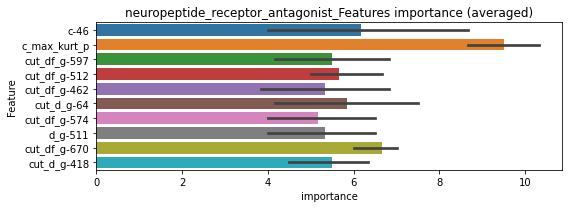

len(train_index) : 3890
len(valid_index) : 3891
================================= fold 1/2 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0331775	valid_1's binary_logloss: 0.0707684
[200]	training's binary_logloss: 0.00823895	valid_1's binary_logloss: 0.0567924
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00888842	valid_1's binary_logloss: 0.0566833


len(train_index) : 3891
len(valid_index) : 3890
================================= fold 2/2 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0330009	valid_1's binary_logloss: 0.0683179
[200]	training's binary_logloss: 0.00776416	valid_1's binary_logloss: 0.0516808
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.00435328	valid_1's binary_logloss: 0.0506799


neuropeptide_receptor_antagonist logloss: 0.05368197709099444


neg labels: 3289 → selected neg labels: 3270


nfkb_inhibitor, len(trt): 832, len(othr): 3270, target_rate: 0.0349374 → Adj_target_rate: 0.0254860
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[89]	training's binary_logloss: 0.0386723	valid_1's binary_logloss: 0.120713
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[68]	training's binary_logloss: 0.051427	valid_1's binary_logloss: 0.15595


1 / 3 AUC score:0.934
y_Threshold: 0.0379093, Threshold: 0.9642897, pos_neg_ratio: 0.7455657
Remove_noisy_labels: 404 → Positive_corect_labels: 736/3698
p_label_rate: 0.0200904 Vs.target_rate: 0.03494
Num_p_label: 80.0, conf_0:0.86786, conf_1:1.06072
threshold: 0.9642897, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 736.0/3698, y_label_rate: 0.1990265
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00338938	valid_1's binary_logloss: 0.0294097
Early stopping, best iteration is:
[95]	training's binary_logloss: 0.00409221	valid_1's binary_logloss: 0.0293152
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00591382	valid_1's binary_logloss: 0.00771978
Early stopping, best iteration is:
[170]	training's binary_logloss: 0.0010861	valid_1's binary_logloss: 0.00573464


2 / 3 AUC score:0.996
y_Threshold: 0.0384279, Threshold: 0.9642897, pos_neg_ratio: 0.7455657
Remove_noisy_labels: 18 → Positive_corect_labels: 727.0/3680
p_label_rate: 0.0401808 Vs.target_rate: 0.03494
Num_p_label: 160.0, conf_0:0.86786, conf_1:1.06072
threshold: 0.9642897, positive_p_label: 160.0/3982, p_label_rate: 0.0401808
positive_y_label: 727.0/3680, y_label_rate: 0.1975543
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00256792	valid_1's binary_logloss: 0.0027224
[200]	training's binary_logloss: 0.00021978	valid_1's binary_logloss: 0.000265813
[300]	training's binary_logloss: 0.00016303	valid_1's binary_logloss: 0.000204296
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.000157881	valid_1's binary_logloss: 0.000198775
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00258428	valid_1's binary_logloss: 0.00269743
[200]	training's binary_logloss: 0.000218374	valid_1's binary_logloss: 0.000255321
[300]	training's binary_logloss: 0.000163112	valid_1's binary_logloss: 0.000195186
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000159077	valid_1's binary_logloss: 0.00019083


3 / 3 AUC score:1.000
y_Threshold: 0.2128791, Threshold: 0.9642897, pos_neg_ratio: 0.7455657
Remove_noisy_labels: 0 → Positive_corect_labels: 727.0/3680
p_label_rate: 0.0419387 Vs.target_rate: 0.03494
Num_p_label: 167.0, conf_0:0.86786, conf_1:1.06072
threshold: 0.9642897, positive_p_label: 167.0/3982, p_label_rate: 0.0419387
positive_y_label: 894.0/7662, y_label_rate: 0.1166797


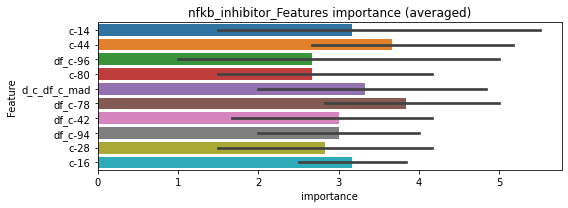

len(train_index) : 3831
len(valid_index) : 3831
================================= fold 1/2 nfkb_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0126004	valid_1's binary_logloss: 0.013797
[200]	training's binary_logloss: 0.00115769	valid_1's binary_logloss: 0.00303538
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.000550631	valid_1's binary_logloss: 0.00252944


len(train_index) : 3831
len(valid_index) : 3831
================================= fold 2/2 nfkb_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0123681	valid_1's binary_logloss: 0.0143773
[200]	training's binary_logloss: 0.00107609	valid_1's binary_logloss: 0.00288488
[300]	training's binary_logloss: 0.000244257	valid_1's binary_logloss: 0.00201173
[400]	training's binary_logloss: 0.000133294	valid_1's binary_logloss: 0.0019141
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000119034	valid_1's binary_logloss: 0.00189718


nfkb_inhibitor logloss: 0.0022137788623004732


neg labels: 3289 → selected neg labels: 3287


nicotinic_receptor_agonist, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00486751	valid_1's binary_logloss: 0.0146309
[200]	training's binary_logloss: 0.00060673	valid_1's binary_logloss: 0.00979934
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.00037094	valid_1's binary_logloss: 0.00924841
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00542207	valid_1's binary_logloss: 0.00829178
[200]	training's binary_logloss: 0.000652716	valid_1's binary_logloss: 0.00301772
Early stopping, best iteration is:
[224]	training's binary_logloss: 0.00050537	valid_1's binary_logloss: 0.00289531


1 / 3 AUC score:1.000
y_Threshold: 0.0009060, Threshold: 0.0010574, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00095, conf_1:0.00116
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0010574
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0110574
threshold: 0.0110574, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00507709	valid_1's binary_logloss: 0.0134656
[200]	training's binary_logloss: 0.000617362	valid_1's binary_logloss: 0.0083826
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.000425784	valid_1's binary_logloss: 0.00791003
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00554133	valid_1's binary_logloss: 0.00830927
[200]	training's binary_logloss: 0.000665316	valid_1's binary_logloss: 0.00292925
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.000429686	valid_1's binary_logloss: 0.00271298


2 / 3 AUC score:1.000
y_Threshold: 0.0049157, Threshold: 0.0110574, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, conf_0:0.00995, conf_1:0.01216
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0110574
Num_p_label: 128.0, Expected: 2.0, Adj_threshold_2: 0.0010574
threshold: 0.0010574, positive_p_label: 128.0/3982, p_label_rate: 0.0321447
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00507709	valid_1's binary_logloss: 0.0134656
[200]	training's binary_logloss: 0.000617362	valid_1's binary_logloss: 0.0083826
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.000425784	valid_1's binary_logloss: 0.00791003
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00554133	valid_1's binary_logloss: 0.00830927
[200]	training's binary_logloss: 0.000665316	valid_1's binary_logloss: 0.00292925
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.000429686	valid_1's binary_logloss: 0.00271298


3 / 3 AUC score:1.000
y_Threshold: 0.0049157, Threshold: 0.0010574, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0321447 Vs.target_rate: 0.00050
Num_p_label: 128.0, conf_0:0.00095, conf_1:0.00116
Num_p_label: 128.0, Expected: 2.0, Adj_threshold_1: 0.0010574
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0110574
threshold: 0.0110574, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7794, y_label_rate: 0.0842956


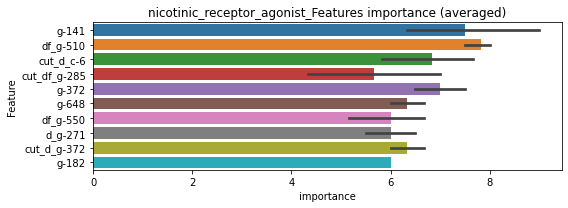

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0117778	valid_1's binary_logloss: 0.0174562
[200]	training's binary_logloss: 0.0013673	valid_1's binary_logloss: 0.00650333
[300]	training's binary_logloss: 0.000385686	valid_1's binary_logloss: 0.00512664
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.000260294	valid_1's binary_logloss: 0.00492205


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0120305	valid_1's binary_logloss: 0.0149988
[200]	training's binary_logloss: 0.00145737	valid_1's binary_logloss: 0.00379001
[300]	training's binary_logloss: 0.000415008	valid_1's binary_logloss: 0.00259708
[400]	training's binary_logloss: 0.000217726	valid_1's binary_logloss: 0.00229943
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000185224	valid_1's binary_logloss: 0.00222006


nicotinic_receptor_agonist logloss: 0.0035710515848304644


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_donor, len(trt): 26, len(othr): 3285, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00929159	valid_1's binary_logloss: 0.0269284
[200]	training's binary_logloss: 0.00129996	valid_1's binary_logloss: 0.0171289
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.000833806	valid_1's binary_logloss: 0.0162466
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0104432	valid_1's binary_logloss: 0.022127
[200]	training's binary_logloss: 0.00148427	valid_1's binary_logloss: 0.0122787
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.000790125	valid_1's binary_logloss: 0.011495


1 / 3 AUC score:1.000
y_Threshold: 0.0020675, Threshold: 0.0022718, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00109
Num_p_label: 80.0, conf_0:0.00204, conf_1:0.00250
Num_p_label: 80.0, Expected: 4.3, Adj_threshold_1: 0.0022718
Num_p_label: 0.0, Expected: 4.3, Adj_threshold_2: 0.0122718
threshold: 0.0122718, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00940642	valid_1's binary_logloss: 0.0271465
[200]	training's binary_logloss: 0.00131032	valid_1's binary_logloss: 0.0181484
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.000812657	valid_1's binary_logloss: 0.0173573
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0105472	valid_1's binary_logloss: 0.0215838
[200]	training's binary_logloss: 0.00148253	valid_1's binary_logloss: 0.011456
Early stopping, best iteration is:
[255]	training's binary_logloss: 0.000825075	valid_1's binary_logloss: 0.0104999


2 / 3 AUC score:1.000
y_Threshold: 0.0078487, Threshold: 0.0122718, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00109
Num_p_label: 1.0, conf_0:0.01104, conf_1:0.01350
Num_p_label: 1.0, Expected: 4.3, Adj_threshold_1: 0.0122718
Num_p_label: 156.0, Expected: 4.3, Adj_threshold_2: 0.0022718
threshold: 0.0022718, positive_p_label: 156.0/3982, p_label_rate: 0.0391763
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00940642	valid_1's binary_logloss: 0.0271465
[200]	training's binary_logloss: 0.00131032	valid_1's binary_logloss: 0.0181484
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.000812657	valid_1's binary_logloss: 0.0173573
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0105472	valid_1's binary_logloss: 0.0215838
[200]	training's binary_logloss: 0.00148253	valid_1's binary_logloss: 0.011456
Early stopping, best iteration is:
[255]	training's binary_logloss: 0.000825075	valid_1's binary_logloss: 0.0104999


3 / 3 AUC score:1.000
y_Threshold: 0.0078487, Threshold: 0.0022718, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0391763 Vs.target_rate: 0.00109
Num_p_label: 156.0, conf_0:0.00204, conf_1:0.00250
Num_p_label: 156.0, Expected: 4.3, Adj_threshold_1: 0.0022718
Num_p_label: 1.0, Expected: 4.3, Adj_threshold_2: 0.0122718
threshold: 0.0122718, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 658.0/7792, y_label_rate: 0.0844456


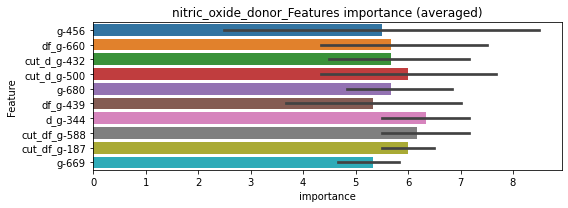

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 nitric_oxide_donor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.016179	valid_1's binary_logloss: 0.0274373
[200]	training's binary_logloss: 0.00258023	valid_1's binary_logloss: 0.0139372
[300]	training's binary_logloss: 0.000802239	valid_1's binary_logloss: 0.0119099
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000461885	valid_1's binary_logloss: 0.0114146


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 nitric_oxide_donor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0173148	valid_1's binary_logloss: 0.0255614
[200]	training's binary_logloss: 0.00294208	valid_1's binary_logloss: 0.0107283
[300]	training's binary_logloss: 0.000923409	valid_1's binary_logloss: 0.00844141
[400]	training's binary_logloss: 0.000463228	valid_1's binary_logloss: 0.00784668
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000359397	valid_1's binary_logloss: 0.00765503


nitric_oxide_donor logloss: 0.009534800305961781


neg labels: 3289 → selected neg labels: 3284


nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3284, target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00992089	valid_1's binary_logloss: 0.0328906
[200]	training's binary_logloss: 0.00142883	valid_1's binary_logloss: 0.0235411
Early stopping, best iteration is:
[222]	training's binary_logloss: 0.00110207	valid_1's binary_logloss: 0.0229514
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0113664	valid_1's binary_logloss: 0.0227111
[200]	training's binary_logloss: 0.00167338	valid_1's binary_logloss: 0.0132398
[300]	training's binary_logloss: 0.000710059	valid_1's binary_logloss: 0.0121591
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000745362	valid_1's binary_logloss: 0.0121212


1 / 3 AUC score:1.000
y_Threshold: 0.0021451, Threshold: 0.0457342, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00122
Num_p_label: 80.0, conf_0:0.04116, conf_1:0.05031
Num_p_label: 80.0, Expected: 4.8, Adj_threshold_1: 0.0457342
Num_p_label: 73.0, Expected: 4.8, Adj_threshold_2: 0.0557342
Num_p_label: 68.0, Expected: 4.8, Adj_threshold_3: 0.0657342
Num_p_label: 66.0, Expected: 4.8, Adj_threshold_4: 0.0757342
Num_p_label: 63.0, Expected: 4.8, Adj_threshold_5: 0.0857342
Num_p_label: 61.0, Expected: 4.8, Adj_threshold_6: 0.0957342
Num_p_label: 57.0, Expected: 4.8, Adj_threshold_7: 0.1057342
Num_p_label: 54.0, Expected: 4.8, Adj_threshold_8: 0.1157342
Num_p_label: 47.0, Expected: 4.8, Adj_threshold_9: 0.1257342
Num_p_label: 44.0, Expected: 4.8, Adj_threshold_10: 0.1357342
threshold: 0.1457342, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.009452	valid_1's binary_logloss: 0.02844
[200]	training's binary_logloss: 0.00137146	valid_1's binary_logloss: 0.0200399
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00149809	valid_1's binary_logloss: 0.0199619
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0106707	valid_1's binary_logloss: 0.0228014
[200]	training's binary_logloss: 0.00153044	valid_1's binary_logloss: 0.0127777
[300]	training's binary_logloss: 0.000658019	valid_1's binary_logloss: 0.011391
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.000661764	valid_1's binary_logloss: 0.0113829


2 / 3 AUC score:1.000
y_Threshold: 0.0242933, Threshold: 0.1457342, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0346560 Vs.target_rate: 0.00122
Num_p_label: 138.0, conf_0:0.13116, conf_1:0.16031
Num_p_label: 138.0, Expected: 4.8, Adj_threshold_1: 0.1457342
Num_p_label: 135.0, Expected: 4.8, Adj_threshold_2: 0.1557342
Num_p_label: 135.0, Expected: 4.8, Adj_threshold_3: 0.1657342
Num_p_label: 133.0, Expected: 4.8, Adj_threshold_4: 0.1757342
Num_p_label: 132.0, Expected: 4.8, Adj_threshold_5: 0.1857342
Num_p_label: 129.0, Expected: 4.8, Adj_threshold_6: 0.1957342
Num_p_label: 127.0, Expected: 4.8, Adj_threshold_7: 0.2057342
Num_p_label: 127.0, Expected: 4.8, Adj_threshold_8: 0.2157342
Num_p_label: 127.0, Expected: 4.8, Adj_threshold_9: 0.2257342
Num_p_label: 126.0, Expected: 4.8, Adj_threshold_10: 0.2357342
threshold: 0.2457342, positive_p_label: 124.0/3982, p_label_rate: 0.0311401
positive_y_label: 653.0/3802, y_label_rate: 0.17175

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00955099	valid_1's binary_logloss: 0.0225684
[200]	training's binary_logloss: 0.00135264	valid_1's binary_logloss: 0.0143563
Early stopping, best iteration is:
[222]	training's binary_logloss: 0.00105076	valid_1's binary_logloss: 0.0137665
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00985332	valid_1's binary_logloss: 0.0226827
[200]	training's binary_logloss: 0.00139946	valid_1's binary_logloss: 0.0130848
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.000913123	valid_1's binary_logloss: 0.0124476


3 / 3 AUC score:1.000
y_Threshold: 0.0222025, Threshold: 0.2457342, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0288800 Vs.target_rate: 0.00122
Num_p_label: 115.0, conf_0:0.22116, conf_1:0.27031
Num_p_label: 115.0, Expected: 4.8, Adj_threshold_1: 0.2457342
Num_p_label: 112.0, Expected: 4.8, Adj_threshold_2: 0.2557342
Num_p_label: 111.0, Expected: 4.8, Adj_threshold_3: 0.2657342
Num_p_label: 111.0, Expected: 4.8, Adj_threshold_4: 0.2757342
Num_p_label: 106.0, Expected: 4.8, Adj_threshold_5: 0.2857342
Num_p_label: 104.0, Expected: 4.8, Adj_threshold_6: 0.2957342
Num_p_label: 104.0, Expected: 4.8, Adj_threshold_7: 0.3057342
Num_p_label: 103.0, Expected: 4.8, Adj_threshold_8: 0.3157342
Num_p_label: 103.0, Expected: 4.8, Adj_threshold_9: 0.3257342
Num_p_label: 103.0, Expected: 4.8, Adj_threshold_10: 0.3357342
threshold: 0.3457342, positive_p_label: 100.0/3982, p_label_rate: 0.0251130
positive_y_label: 751.0/7780, y_label_rate: 0.09652

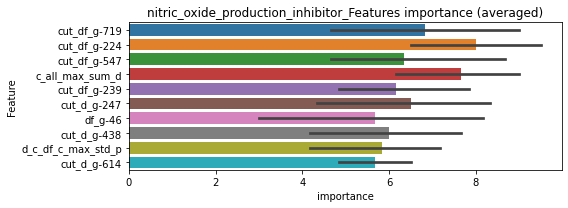

len(train_index) : 3890
len(valid_index) : 3890
================================= fold 1/2 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0186362	valid_1's binary_logloss: 0.0341144
[200]	training's binary_logloss: 0.00315916	valid_1's binary_logloss: 0.0178262
[300]	training's binary_logloss: 0.00099703	valid_1's binary_logloss: 0.0154558
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000540514	valid_1's binary_logloss: 0.0145956


len(train_index) : 3890
len(valid_index) : 3890
================================= fold 2/2 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0200173	valid_1's binary_logloss: 0.0274509
[200]	training's binary_logloss: 0.00359461	valid_1's binary_logloss: 0.0113483
[300]	training's binary_logloss: 0.00115982	valid_1's binary_logloss: 0.00923547
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000846674	valid_1's binary_logloss: 0.0089182


nitric_oxide_production_inhibitor logloss: 0.011756882983856427


neg labels: 3289 → selected neg labels: 3284


nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3284, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00903864	valid_1's binary_logloss: 0.0289518
[200]	training's binary_logloss: 0.00131656	valid_1's binary_logloss: 0.0200126
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.00109058	valid_1's binary_logloss: 0.0195497
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0099461	valid_1's binary_logloss: 0.0217849
[200]	training's binary_logloss: 0.00142356	valid_1's binary_logloss: 0.0129784
Early stopping, best iteration is:
[228]	training's binary_logloss: 0.00104112	valid_1's binary_logloss: 0.0125138


1 / 3 AUC score:1.000
y_Threshold: 0.0022820, Threshold: 0.0024258, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00109
Num_p_label: 80.0, conf_0:0.00218, conf_1:0.00267
Num_p_label: 80.0, Expected: 4.3, Adj_threshold_1: 0.0024258
Num_p_label: 0.0, Expected: 4.3, Adj_threshold_2: 0.0124258
threshold: 0.0124258, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00928956	valid_1's binary_logloss: 0.0298153
[200]	training's binary_logloss: 0.00133562	valid_1's binary_logloss: 0.0213942
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.00110528	valid_1's binary_logloss: 0.02099
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0102203	valid_1's binary_logloss: 0.0220745
[200]	training's binary_logloss: 0.00145532	valid_1's binary_logloss: 0.0134568
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.000811546	valid_1's binary_logloss: 0.0124202


2 / 3 AUC score:1.000
y_Threshold: 0.0060880, Threshold: 0.0124258, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0000000 Vs.target_rate: 0.00109
Num_p_label: 0.0, conf_0:0.01118, conf_1:0.01367
Num_p_label: 0.0, Expected: 4.3, Adj_threshold_1: 0.0124258
Num_p_label: 99.0, Expected: 4.3, Adj_threshold_2: 0.0024258
threshold: 0.0024258, positive_p_label: 99.0/3982, p_label_rate: 0.0248619
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00933261	valid_1's binary_logloss: 0.029417
[200]	training's binary_logloss: 0.00132263	valid_1's binary_logloss: 0.0216207
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.00086025	valid_1's binary_logloss: 0.0206175
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0100345	valid_1's binary_logloss: 0.0199952
[200]	training's binary_logloss: 0.00144839	valid_1's binary_logloss: 0.0103865
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.000924938	valid_1's binary_logloss: 0.00938235


3 / 3 AUC score:1.000
y_Threshold: 0.0111795, Threshold: 0.0024258, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0193370 Vs.target_rate: 0.00109
Num_p_label: 77.0, conf_0:0.00218, conf_1:0.00267
Num_p_label: 77.0, Expected: 4.3, Adj_threshold_1: 0.0024258
Num_p_label: 0.0, Expected: 4.3, Adj_threshold_2: 0.0124258
threshold: 0.0124258, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/7788, y_label_rate: 0.0841037


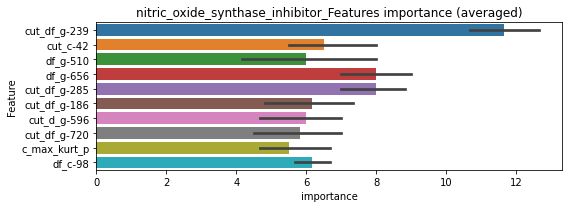

len(train_index) : 3894
len(valid_index) : 3894
================================= fold 1/2 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0167622	valid_1's binary_logloss: 0.0289448
[200]	training's binary_logloss: 0.00264089	valid_1's binary_logloss: 0.0145771
[300]	training's binary_logloss: 0.000821517	valid_1's binary_logloss: 0.0126171
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.000526549	valid_1's binary_logloss: 0.0121876


len(train_index) : 3894
len(valid_index) : 3894
================================= fold 2/2 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0173497	valid_1's binary_logloss: 0.0259588
[200]	training's binary_logloss: 0.00286163	valid_1's binary_logloss: 0.0102749
[300]	training's binary_logloss: 0.000892579	valid_1's binary_logloss: 0.00762369
[400]	training's binary_logloss: 0.000444176	valid_1's binary_logloss: 0.00701341
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000442162	valid_1's binary_logloss: 0.00701033


nitric_oxide_synthase_inhibitor logloss: 0.009598943416769395


neg labels: 3289 → selected neg labels: 3287


norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3287, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00375728	valid_1's binary_logloss: 0.00597008
[200]	training's binary_logloss: 0.000407461	valid_1's binary_logloss: 0.00175611
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.000278492	valid_1's binary_logloss: 0.00149996
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00386042	valid_1's binary_logloss: 0.00494178
[200]	training's binary_logloss: 0.000430672	valid_1's binary_logloss: 0.000962967
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.000270009	valid_1's binary_logloss: 0.000765222


1 / 3 AUC score:1.000
y_Threshold: 0.0004620, Threshold: 0.0005557, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00029
Num_p_label: 80.0, conf_0:0.00050, conf_1:0.00061
Num_p_label: 80.0, Expected: 1.2, Adj_threshold_1: 0.0005557
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.0105557
threshold: 0.0105557, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00383205	valid_1's binary_logloss: 0.00594116
[200]	training's binary_logloss: 0.000415067	valid_1's binary_logloss: 0.00159457
[300]	training's binary_logloss: 0.000256599	valid_1's binary_logloss: 0.00133472
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000249111	valid_1's binary_logloss: 0.00132604
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00399792	valid_1's binary_logloss: 0.0048915
[200]	training's binary_logloss: 0.00044188	valid_1's binary_logloss: 0.000797577
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.000279348	valid_1's binary_logloss: 0.000609819


2 / 3 AUC score:1.000
y_Threshold: 0.0816716, Threshold: 0.0105557, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00029
Num_p_label: 0.0, conf_0:0.00950, conf_1:0.01161
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0105557
Num_p_label: 111.0, Expected: 1.2, Adj_threshold_2: 0.0005557
threshold: 0.0005557, positive_p_label: 111.0/3982, p_label_rate: 0.0278754
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00383205	valid_1's binary_logloss: 0.00594116
[200]	training's binary_logloss: 0.000415067	valid_1's binary_logloss: 0.00159457
[300]	training's binary_logloss: 0.000256599	valid_1's binary_logloss: 0.00133472
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.000249111	valid_1's binary_logloss: 0.00132604
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00399792	valid_1's binary_logloss: 0.0048915
[200]	training's binary_logloss: 0.00044188	valid_1's binary_logloss: 0.000797577
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.000279348	valid_1's binary_logloss: 0.000609819


3 / 3 AUC score:1.000
y_Threshold: 0.0816716, Threshold: 0.0005557, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0278754 Vs.target_rate: 0.00029
Num_p_label: 111.0, conf_0:0.00050, conf_1:0.00061
Num_p_label: 111.0, Expected: 1.2, Adj_threshold_1: 0.0005557
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.0105557
threshold: 0.0105557, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7794, y_label_rate: 0.0842956


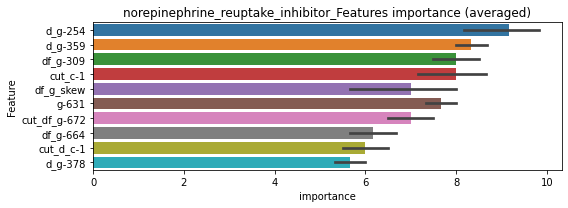

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00997383	valid_1's binary_logloss: 0.0126914
[200]	training's binary_logloss: 0.000961437	valid_1's binary_logloss: 0.00271309
[300]	training's binary_logloss: 0.000256113	valid_1's binary_logloss: 0.00159616
[400]	training's binary_logloss: 0.000147452	valid_1's binary_logloss: 0.00137714
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000133934	valid_1's binary_logloss: 0.00134355


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0101833	valid_1's binary_logloss: 0.0112529
[200]	training's binary_logloss: 0.00102274	valid_1's binary_logloss: 0.0014677
[300]	training's binary_logloss: 0.000272514	valid_1's binary_logloss: 0.000542304
[400]	training's binary_logloss: 0.000155324	valid_1's binary_logloss: 0.000392607
[500]	training's binary_logloss: 0.000130724	valid_1's binary_logloss: 0.00036411
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000130074	valid_1's binary_logloss: 0.000363298


norepinephrine_reuptake_inhibitor logloss: 0.0008534832725982122


neg labels: 3289 → selected neg labels: 3286


nrf2_activator, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00622036	valid_1's binary_logloss: 0.0127691
[200]	training's binary_logloss: 0.000772518	valid_1's binary_logloss: 0.00578904
[300]	training's binary_logloss: 0.000403101	valid_1's binary_logloss: 0.00509823
Early stopping, best iteration is:
[312]	training's binary_logloss: 0.00039232	valid_1's binary_logloss: 0.00504761
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00661031	valid_1's binary_logloss: 0.0101858
[200]	training's binary_logloss: 0.00082331	valid_1's binary_logloss: 0.00358718
[300]	training's binary_logloss: 0.000421507	valid_1's binary_logloss: 0.00303796
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.000404704	valid_1's binary_logloss: 0.0030044


1 / 3 AUC score:1.000
y_Threshold: 0.0009205, Threshold: 0.1174784, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.10573, conf_1:0.12923
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.1174784
Num_p_label: 74.0, Expected: 3.0, Adj_threshold_2: 0.1274784
Num_p_label: 72.0, Expected: 3.0, Adj_threshold_3: 0.1374784
Num_p_label: 70.0, Expected: 3.0, Adj_threshold_4: 0.1474784
Num_p_label: 66.0, Expected: 3.0, Adj_threshold_5: 0.1574784
Num_p_label: 65.0, Expected: 3.0, Adj_threshold_6: 0.1674784
Num_p_label: 63.0, Expected: 3.0, Adj_threshold_7: 0.1774784
Num_p_label: 60.0, Expected: 3.0, Adj_threshold_8: 0.1874784
Num_p_label: 58.0, Expected: 3.0, Adj_threshold_9: 0.1974784
Num_p_label: 57.0, Expected: 3.0, Adj_threshold_10: 0.2074784
threshold: 0.2174784, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00557918	valid_1's binary_logloss: 0.00952138
[200]	training's binary_logloss: 0.000658854	valid_1's binary_logloss: 0.00410209
Early stopping, best iteration is:
[219]	training's binary_logloss: 0.000535404	valid_1's binary_logloss: 0.00396425
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00571976	valid_1's binary_logloss: 0.00938993
[200]	training's binary_logloss: 0.00066143	valid_1's binary_logloss: 0.00300943
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.000457209	valid_1's binary_logloss: 0.00276979


2 / 3 AUC score:1.000
y_Threshold: 0.0530878, Threshold: 0.2174784, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0439478 Vs.target_rate: 0.00076
Num_p_label: 175.0, conf_0:0.19573, conf_1:0.23923
Num_p_label: 175.0, Expected: 3.0, Adj_threshold_1: 0.2174784
Num_p_label: 175.0, Expected: 3.0, Adj_threshold_2: 0.2274784
Num_p_label: 175.0, Expected: 3.0, Adj_threshold_3: 0.2374784
Num_p_label: 175.0, Expected: 3.0, Adj_threshold_4: 0.2474784
Num_p_label: 175.0, Expected: 3.0, Adj_threshold_5: 0.2574784
Num_p_label: 175.0, Expected: 3.0, Adj_threshold_6: 0.2674784
Num_p_label: 175.0, Expected: 3.0, Adj_threshold_7: 0.2774784
Num_p_label: 175.0, Expected: 3.0, Adj_threshold_8: 0.2874784
Num_p_label: 173.0, Expected: 3.0, Adj_threshold_9: 0.2974784
Num_p_label: 173.0, Expected: 3.0, Adj_threshold_10: 0.3074784
threshold: 0.3174784, positive_p_label: 173.0/3982, p_label_rate: 0.0434455
positive_y_label: 656.0/3809, y_label_rate: 0.17222

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00535546	valid_1's binary_logloss: 0.0101338
[200]	training's binary_logloss: 0.000613144	valid_1's binary_logloss: 0.00443804
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.000387658	valid_1's binary_logloss: 0.00399721
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00592535	valid_1's binary_logloss: 0.00743407
[200]	training's binary_logloss: 0.000695886	valid_1's binary_logloss: 0.00124853
[300]	training's binary_logloss: 0.000374044	valid_1's binary_logloss: 0.000806257
[400]	training's binary_logloss: 0.000329077	valid_1's binary_logloss: 0.000748485
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.000329733	valid_1's binary_logloss: 0.000748314


3 / 3 AUC score:1.000
y_Threshold: 0.0397694, Threshold: 0.3174784, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0429432 Vs.target_rate: 0.00076
Num_p_label: 171.0, conf_0:0.28573, conf_1:0.34923
Num_p_label: 171.0, Expected: 3.0, Adj_threshold_1: 0.3174784
Num_p_label: 171.0, Expected: 3.0, Adj_threshold_2: 0.3274784
Num_p_label: 171.0, Expected: 3.0, Adj_threshold_3: 0.3374784
Num_p_label: 171.0, Expected: 3.0, Adj_threshold_4: 0.3474784
Num_p_label: 171.0, Expected: 3.0, Adj_threshold_5: 0.3574784
Num_p_label: 169.0, Expected: 3.0, Adj_threshold_6: 0.3674784
Num_p_label: 169.0, Expected: 3.0, Adj_threshold_7: 0.3774784
Num_p_label: 168.0, Expected: 3.0, Adj_threshold_8: 0.3874784
Num_p_label: 167.0, Expected: 3.0, Adj_threshold_9: 0.3974784
Num_p_label: 166.0, Expected: 3.0, Adj_threshold_10: 0.4074784
threshold: 0.4174784, positive_p_label: 165.0/3982, p_label_rate: 0.0414365
positive_y_label: 821.0/7791, y_label_rate: 0.10537

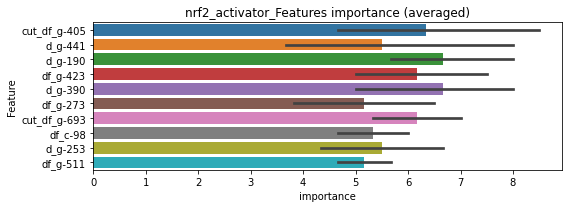

len(train_index) : 3895
len(valid_index) : 3896
================================= fold 1/2 nrf2_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0164796	valid_1's binary_logloss: 0.0204225
[200]	training's binary_logloss: 0.00223904	valid_1's binary_logloss: 0.00595623
[300]	training's binary_logloss: 0.000662776	valid_1's binary_logloss: 0.00449367
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.000512027	valid_1's binary_logloss: 0.00435111


len(train_index) : 3896
len(valid_index) : 3895
================================= fold 2/2 nrf2_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0159547	valid_1's binary_logloss: 0.0207794
[200]	training's binary_logloss: 0.0020947	valid_1's binary_logloss: 0.00634545
[300]	training's binary_logloss: 0.000607615	valid_1's binary_logloss: 0.00469703
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.000485161	valid_1's binary_logloss: 0.00457592


nrf2_activator logloss: 0.004463502074579277


neg labels: 3289 → selected neg labels: 3279


opioid_receptor_agonist, len(trt): 61, len(othr): 3279, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0209204	valid_1's binary_logloss: 0.0654919
Early stopping, best iteration is:
[182]	training's binary_logloss: 0.00462944	valid_1's binary_logloss: 0.0549861
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0226963	valid_1's binary_logloss: 0.0600287
[200]	training's binary_logloss: 0.00384562	valid_1's binary_logloss: 0.0466379
Early stopping, best iteration is:
[223]	training's binary_logloss: 0.00289658	valid_1's binary_logloss: 0.0461663


1 / 3 AUC score:0.998
y_Threshold: 0.0093763, Threshold: 0.0092865, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 140 → Positive_corect_labels: 651/3794
p_label_rate: 0.0200904 Vs.target_rate: 0.00256
Num_p_label: 80.0, conf_0:0.00836, conf_1:0.01022
Num_p_label: 80.0, Expected: 10.2, Adj_threshold_1: 0.0092865
Num_p_label: 11.0, Expected: 10.2, Adj_threshold_2: 0.0192865
threshold: 0.0192865, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0195912	valid_1's binary_logloss: 0.0688809
[200]	training's binary_logloss: 0.00332351	valid_1's binary_logloss: 0.0584745
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00373227	valid_1's binary_logloss: 0.0581768
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0224383	valid_1's binary_logloss: 0.0535252
[200]	training's binary_logloss: 0.00390494	valid_1's binary_logloss: 0.0373109
Early stopping, best iteration is:
[211]	training's binary_logloss: 0.00337537	valid_1's binary_logloss: 0.0368551


2 / 3 AUC score:0.999
y_Threshold: 0.0170701, Threshold: 0.0192865, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0030136 Vs.target_rate: 0.00256
Num_p_label: 12.0, conf_0:0.01736, conf_1:0.02122
threshold: 0.0192865, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 645.0/3782, y_label_rate: 0.1705447
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0207087	valid_1's binary_logloss: 0.0603048
Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00430045	valid_1's binary_logloss: 0.0475837
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0194894	valid_1's binary_logloss: 0.0584696
[200]	training's binary_logloss: 0.00333635	valid_1's binary_logloss: 0.046677
Early stopping, best iteration is:
[208]	training's binary_logloss: 0.00301136	valid_1's binary_logloss: 0.0462678


3 / 3 AUC score:0.998
y_Threshold: 0.0175906, Threshold: 0.0192865, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 20 → Positive_corect_labels: 635.0/3762
p_label_rate: 0.0025113 Vs.target_rate: 0.00256
Num_p_label: 10.0, conf_0:0.01736, conf_1:0.02122
threshold: 0.0192865, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 645.0/7744, y_label_rate: 0.0832903


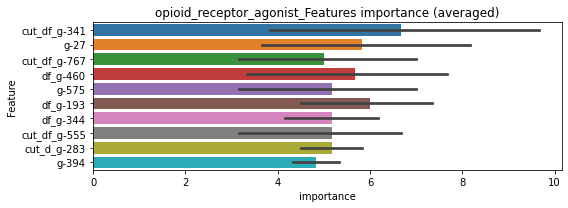

len(train_index) : 3872
len(valid_index) : 3872
================================= fold 1/2 opioid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0265948	valid_1's binary_logloss: 0.0507255
[200]	training's binary_logloss: 0.0060729	valid_1's binary_logloss: 0.0322727
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00249451	valid_1's binary_logloss: 0.0300369


len(train_index) : 3872
len(valid_index) : 3872
================================= fold 2/2 opioid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0291591	valid_1's binary_logloss: 0.0457036
[200]	training's binary_logloss: 0.00680485	valid_1's binary_logloss: 0.0253518
[300]	training's binary_logloss: 0.0022759	valid_1's binary_logloss: 0.0212483
[400]	training's binary_logloss: 0.00108455	valid_1's binary_logloss: 0.0204339
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000975917	valid_1's binary_logloss: 0.0202821


opioid_receptor_agonist logloss: 0.025159459555114127


neg labels: 3289 → selected neg labels: 3275


opioid_receptor_antagonist, len(trt): 96, len(othr): 3275, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0286042	valid_1's binary_logloss: 0.103558
Early stopping, best iteration is:
[158]	training's binary_logloss: 0.0102841	valid_1's binary_logloss: 0.0965791
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0365728	valid_1's binary_logloss: 0.0921218
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00837159	valid_1's binary_logloss: 0.0794212


1 / 3 AUC score:0.993
y_Threshold: 0.0185749, Threshold: 0.0205750, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 167 → Positive_corect_labels: 637/3763
p_label_rate: 0.0200904 Vs.target_rate: 0.00403
Num_p_label: 80.0, conf_0:0.01852, conf_1:0.02263
Num_p_label: 80.0, Expected: 16.1, Adj_threshold_1: 0.0205750
Num_p_label: 14.0, Expected: 16.1, Adj_threshold_2: 0.0305750
threshold: 0.0305750, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 637.0/3763, y_label_rate: 0.1692798
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0273624	valid_1's binary_logloss: 0.0959927
Early stopping, best iteration is:
[160]	training's binary_logloss: 0.00940389	valid_1's binary_logloss: 0.0867929
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0298435	valid_1's binary_logloss: 0.0845368
Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00649468	valid_1's binary_logloss: 0.0711521


2 / 3 AUC score:0.996
y_Threshold: 0.0253003, Threshold: 0.0305750, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 42 → Positive_corect_labels: 616.0/3721
p_label_rate: 0.0027624 Vs.target_rate: 0.00403
Num_p_label: 11.0, conf_0:0.02752, conf_1:0.03363
threshold: 0.0305750, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 616.0/3721, y_label_rate: 0.1655469
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0216307	valid_1's binary_logloss: 0.082312
Early stopping, best iteration is:
[162]	training's binary_logloss: 0.00667682	valid_1's binary_logloss: 0.0726058
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0266555	valid_1's binary_logloss: 0.0637849
[200]	training's binary_logloss: 0.0049002	valid_1's binary_logloss: 0.0497699
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00548072	valid_1's binary_logloss: 0.0496618


3 / 3 AUC score:0.999
y_Threshold: 0.0231778, Threshold: 0.0305750, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 24 → Positive_corect_labels: 604.0/3697
p_label_rate: 0.0010045 Vs.target_rate: 0.00403
Num_p_label: 4.0, conf_0:0.02752, conf_1:0.03363
Num_p_label: 4.0, Expected: 16.1, Adj_threshold_1: 0.0305750
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_2: 0.0205750
threshold: 0.0205750, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 625.0/7679, y_label_rate: 0.0813908


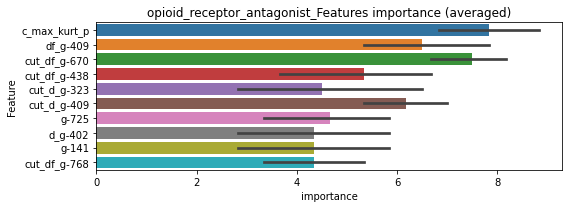

len(train_index) : 3839
len(valid_index) : 3840
================================= fold 1/2 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0319683	valid_1's binary_logloss: 0.0624647
[200]	training's binary_logloss: 0.00816474	valid_1's binary_logloss: 0.0442058
[300]	training's binary_logloss: 0.00292465	valid_1's binary_logloss: 0.0415775
Early stopping, best iteration is:
[309]	training's binary_logloss: 0.00269299	valid_1's binary_logloss: 0.0415262


len(train_index) : 3840
len(valid_index) : 3839
================================= fold 2/2 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0323727	valid_1's binary_logloss: 0.0588594
[200]	training's binary_logloss: 0.00815366	valid_1's binary_logloss: 0.0410452
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.00331382	valid_1's binary_logloss: 0.0386542


opioid_receptor_antagonist logloss: 0.04009039138473488


neg labels: 3289 → selected neg labels: 3283


orexin_receptor_antagonist, len(trt): 37, len(othr): 3283, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0125437	valid_1's binary_logloss: 0.0410512
[200]	training's binary_logloss: 0.00181828	valid_1's binary_logloss: 0.0332909
Early stopping, best iteration is:
[215]	training's binary_logloss: 0.00152507	valid_1's binary_logloss: 0.0331635
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0147497	valid_1's binary_logloss: 0.0310517
[200]	training's binary_logloss: 0.0022443	valid_1's binary_logloss: 0.0187829
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00126042	valid_1's binary_logloss: 0.0175088


1 / 3 AUC score:1.000
y_Threshold: 0.0035349, Threshold: 0.0039589, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00155
Num_p_label: 80.0, conf_0:0.00356, conf_1:0.00435
Num_p_label: 80.0, Expected: 6.2, Adj_threshold_1: 0.0039589
Num_p_label: 0.0, Expected: 6.2, Adj_threshold_2: 0.0139589
threshold: 0.0139589, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0123804	valid_1's binary_logloss: 0.0397637
[200]	training's binary_logloss: 0.00180524	valid_1's binary_logloss: 0.0312987
Early stopping, best iteration is:
[202]	training's binary_logloss: 0.00176333	valid_1's binary_logloss: 0.0312741
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0148569	valid_1's binary_logloss: 0.0337493
[200]	training's binary_logloss: 0.00221949	valid_1's binary_logloss: 0.0196135
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000973575	valid_1's binary_logloss: 0.0179353


2 / 3 AUC score:1.000
y_Threshold: 0.0095848, Threshold: 0.0139589, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0002511 Vs.target_rate: 0.00155
Num_p_label: 1.0, conf_0:0.01256, conf_1:0.01535
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_1: 0.0139589
Num_p_label: 137.0, Expected: 6.2, Adj_threshold_2: 0.0039589
threshold: 0.0039589, positive_p_label: 137.0/3982, p_label_rate: 0.0344048
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.013538	valid_1's binary_logloss: 0.038771
[200]	training's binary_logloss: 0.00202273	valid_1's binary_logloss: 0.0283121
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00219524	valid_1's binary_logloss: 0.0282859
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0137934	valid_1's binary_logloss: 0.03391
[200]	training's binary_logloss: 0.00216164	valid_1's binary_logloss: 0.0232505
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.00123316	valid_1's binary_logloss: 0.0216113


3 / 3 AUC score:1.000
y_Threshold: 0.0112649, Threshold: 0.0039589, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0514817 Vs.target_rate: 0.00155
Num_p_label: 205.0, conf_0:0.00356, conf_1:0.00435
Num_p_label: 205.0, Expected: 6.2, Adj_threshold_1: 0.0039589
Num_p_label: 2.0, Expected: 6.2, Adj_threshold_2: 0.0139589
threshold: 0.0139589, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 655.0/7783, y_label_rate: 0.0841578


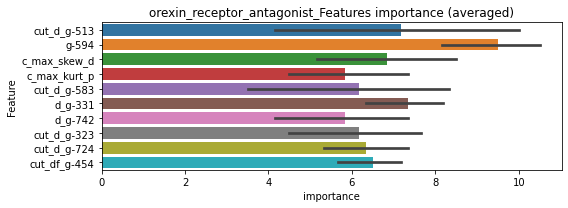

len(train_index) : 3891
len(valid_index) : 3892
================================= fold 1/2 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0211997	valid_1's binary_logloss: 0.0351133
[200]	training's binary_logloss: 0.00407597	valid_1's binary_logloss: 0.0178342
[300]	training's binary_logloss: 0.00129169	valid_1's binary_logloss: 0.0152925
Early stopping, best iteration is:
[338]	training's binary_logloss: 0.000936331	valid_1's binary_logloss: 0.0149316


len(train_index) : 3892
len(valid_index) : 3891
================================= fold 2/2 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0211878	valid_1's binary_logloss: 0.0368769
[200]	training's binary_logloss: 0.00414706	valid_1's binary_logloss: 0.0197567
[300]	training's binary_logloss: 0.00130489	valid_1's binary_logloss: 0.0170882
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.000817412	valid_1's binary_logloss: 0.0166226


orexin_receptor_antagonist logloss: 0.01577700755750042


neg labels: 3289 → selected neg labels: 3278


p38_mapk_inhibitor, len(trt): 62, len(othr): 3278, target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0151902	valid_1's binary_logloss: 0.0487317
[200]	training's binary_logloss: 0.00232001	valid_1's binary_logloss: 0.0319481
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.00147232	valid_1's binary_logloss: 0.0306258
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0156892	valid_1's binary_logloss: 0.0456863
[200]	training's binary_logloss: 0.00245057	valid_1's binary_logloss: 0.029474
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00154044	valid_1's binary_logloss: 0.0278593


1 / 3 AUC score:1.000
y_Threshold: 0.0048871, Threshold: 0.0077085, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0200904 Vs.target_rate: 0.00260
Num_p_label: 80.0, conf_0:0.00694, conf_1:0.00848
Num_p_label: 80.0, Expected: 10.4, Adj_threshold_1: 0.0077085
Num_p_label: 16.0, Expected: 10.4, Adj_threshold_2: 0.0177085
threshold: 0.0177085, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0154579	valid_1's binary_logloss: 0.0504363
[200]	training's binary_logloss: 0.00233242	valid_1's binary_logloss: 0.0339414
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00151928	valid_1's binary_logloss: 0.0323507
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0155746	valid_1's binary_logloss: 0.0441958
[200]	training's binary_logloss: 0.00237012	valid_1's binary_logloss: 0.0259255
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.00148717	valid_1's binary_logloss: 0.0244015


2 / 3 AUC score:1.000
y_Threshold: 0.0151290, Threshold: 0.0177085, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0107986 Vs.target_rate: 0.00260
Num_p_label: 43.0, conf_0:0.01594, conf_1:0.01948
Num_p_label: 43.0, Expected: 10.4, Adj_threshold_1: 0.0177085
Num_p_label: 21.0, Expected: 10.4, Adj_threshold_2: 0.0277085
Num_p_label: 12.0, Expected: 10.4, Adj_threshold_3: 0.0377085
threshold: 0.0377085, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0145175	valid_1's binary_logloss: 0.0524323
[200]	training's binary_logloss: 0.00214716	valid_1's binary_logloss: 0.0373811
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00231563	valid_1's binary_logloss: 0.0372741
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0157287	valid_1's binary_logloss: 0.0419558
[200]	training's binary_logloss: 0.00234231	valid_1's binary_logloss: 0.0263551
Early stopping, best iteration is:
[218]	training's binary_logloss: 0.0018645	valid_1's binary_logloss: 0.0256262


3 / 3 AUC score:1.000
y_Threshold: 0.0187931, Threshold: 0.0377085, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 651.0/3793
p_label_rate: 0.0022602 Vs.target_rate: 0.00260
Num_p_label: 9.0, conf_0:0.03394, conf_1:0.04148
threshold: 0.0377085, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 660.0/7775, y_label_rate: 0.0848875


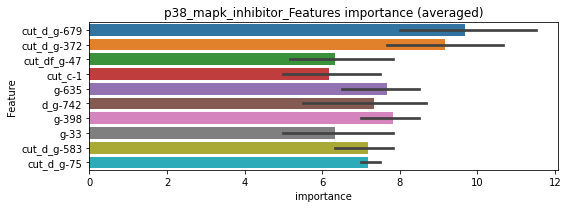

len(train_index) : 3887
len(valid_index) : 3888
================================= fold 1/2 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0228235	valid_1's binary_logloss: 0.0498894
[200]	training's binary_logloss: 0.00427621	valid_1's binary_logloss: 0.0310367
[300]	training's binary_logloss: 0.00138013	valid_1's binary_logloss: 0.0271389
Early stopping, best iteration is:
[310]	training's binary_logloss: 0.00126077	valid_1's binary_logloss: 0.0268594


len(train_index) : 3888
len(valid_index) : 3887
================================= fold 2/2 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0255449	valid_1's binary_logloss: 0.0442989
[200]	training's binary_logloss: 0.00511401	valid_1's binary_logloss: 0.0225853
[300]	training's binary_logloss: 0.00167435	valid_1's binary_logloss: 0.017718
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00091625	valid_1's binary_logloss: 0.0161105


p38_mapk_inhibitor logloss: 0.02148562291935874


neg labels: 3289 → selected neg labels: 3285


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00867691	valid_1's binary_logloss: 0.0250162
[200]	training's binary_logloss: 0.0012032	valid_1's binary_logloss: 0.0165078
Early stopping, best iteration is:
[206]	training's binary_logloss: 0.00112028	valid_1's binary_logloss: 0.016239
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00965625	valid_1's binary_logloss: 0.0208549
[200]	training's binary_logloss: 0.00139019	valid_1's binary_logloss: 0.0112243
[300]	training's binary_logloss: 0.000606771	valid_1's binary_logloss: 0.0100032
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.000558482	valid_1's binary_logloss: 0.00985301


1 / 3 AUC score:1.000
y_Threshold: 0.0018393, Threshold: 0.0019247, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.00173, conf_1:0.00212
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0019247
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_2: 0.0119247
threshold: 0.0119247, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00880586	valid_1's binary_logloss: 0.0244616
[200]	training's binary_logloss: 0.00121272	valid_1's binary_logloss: 0.0157784
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.000778889	valid_1's binary_logloss: 0.0151776
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0102788	valid_1's binary_logloss: 0.0210436
[200]	training's binary_logloss: 0.0014094	valid_1's binary_logloss: 0.01059
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.000691518	valid_1's binary_logloss: 0.00935786


2 / 3 AUC score:1.000
y_Threshold: 0.0046785, Threshold: 0.0119247, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00101
Num_p_label: 0.0, conf_0:0.01073, conf_1:0.01312
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_1: 0.0119247
Num_p_label: 105.0, Expected: 4.0, Adj_threshold_2: 0.0019247
threshold: 0.0019247, positive_p_label: 105.0/3982, p_label_rate: 0.0263687
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00880586	valid_1's binary_logloss: 0.0244616
[200]	training's binary_logloss: 0.00121272	valid_1's binary_logloss: 0.0157784
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.000778889	valid_1's binary_logloss: 0.0151776
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0102788	valid_1's binary_logloss: 0.0210436
[200]	training's binary_logloss: 0.0014094	valid_1's binary_logloss: 0.01059
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.000691518	valid_1's binary_logloss: 0.00935786


3 / 3 AUC score:1.000
y_Threshold: 0.0046785, Threshold: 0.0019247, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0263687 Vs.target_rate: 0.00101
Num_p_label: 105.0, conf_0:0.00173, conf_1:0.00212
Num_p_label: 105.0, Expected: 4.0, Adj_threshold_1: 0.0019247
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_2: 0.0119247
threshold: 0.0119247, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7792, y_label_rate: 0.0843172


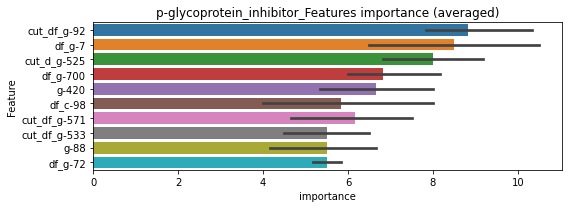

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0156341	valid_1's binary_logloss: 0.0271918
[200]	training's binary_logloss: 0.00249428	valid_1's binary_logloss: 0.0130426
[300]	training's binary_logloss: 0.000744135	valid_1's binary_logloss: 0.010887
Early stopping, best iteration is:
[338]	training's binary_logloss: 0.000546191	valid_1's binary_logloss: 0.010591


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0173081	valid_1's binary_logloss: 0.0246436
[200]	training's binary_logloss: 0.00280755	valid_1's binary_logloss: 0.0102764
[300]	training's binary_logloss: 0.000848413	valid_1's binary_logloss: 0.00772754
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00049922	valid_1's binary_logloss: 0.00716141


p-glycoprotein_inhibitor logloss: 0.008876227952082576


neg labels: 3289 → selected neg labels: 3279


parp_inhibitor, len(trt): 61, len(othr): 3279, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0182928	valid_1's binary_logloss: 0.0602686
[200]	training's binary_logloss: 0.00302628	valid_1's binary_logloss: 0.0456218
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.00189611	valid_1's binary_logloss: 0.0447777
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0196177	valid_1's binary_logloss: 0.0530127
[200]	training's binary_logloss: 0.00330932	valid_1's binary_logloss: 0.0423392
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00369363	valid_1's binary_logloss: 0.0420546


1 / 3 AUC score:1.000
y_Threshold: 0.0075856, Threshold: 0.0083788, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0200904 Vs.target_rate: 0.00256
Num_p_label: 80.0, conf_0:0.00754, conf_1:0.00922
Num_p_label: 80.0, Expected: 10.2, Adj_threshold_1: 0.0083788
Num_p_label: 2.0, Expected: 10.2, Adj_threshold_2: 0.0183788
threshold: 0.0183788, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0180346	valid_1's binary_logloss: 0.0620458
[200]	training's binary_logloss: 0.00304071	valid_1's binary_logloss: 0.0500318
Early stopping, best iteration is:
[226]	training's binary_logloss: 0.00223787	valid_1's binary_logloss: 0.0493411
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0195414	valid_1's binary_logloss: 0.0551261
[200]	training's binary_logloss: 0.00320431	valid_1's binary_logloss: 0.0416621
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.00199198	valid_1's binary_logloss: 0.0405002


2 / 3 AUC score:1.000
y_Threshold: 0.0149658, Threshold: 0.0183788, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 647.0/3786
p_label_rate: 0.0030136 Vs.target_rate: 0.00256
Num_p_label: 12.0, conf_0:0.01654, conf_1:0.02022
threshold: 0.0183788, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 647.0/3786, y_label_rate: 0.1708928
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.016787	valid_1's binary_logloss: 0.0569633
[200]	training's binary_logloss: 0.00273713	valid_1's binary_logloss: 0.0470271
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00309624	valid_1's binary_logloss: 0.0466575
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0186667	valid_1's binary_logloss: 0.0466909
[200]	training's binary_logloss: 0.00303723	valid_1's binary_logloss: 0.0327405
Early stopping, best iteration is:
[232]	training's binary_logloss: 0.00211058	valid_1's binary_logloss: 0.0311243


3 / 3 AUC score:1.000
y_Threshold: 0.0163581, Threshold: 0.0183788, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 644.0/3780
p_label_rate: 0.0012557 Vs.target_rate: 0.00256
Num_p_label: 5.0, conf_0:0.01654, conf_1:0.02022
threshold: 0.0183788, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 649.0/7762, y_label_rate: 0.0836125


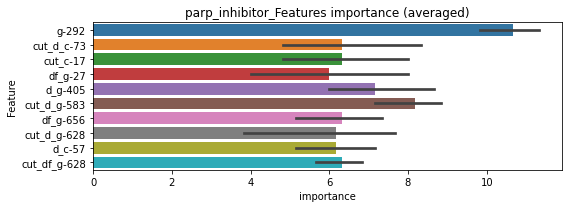

len(train_index) : 3881
len(valid_index) : 3881
================================= fold 1/2 parp_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0244054	valid_1's binary_logloss: 0.0519976
[200]	training's binary_logloss: 0.00520979	valid_1's binary_logloss: 0.0345797
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.00198433	valid_1's binary_logloss: 0.032494


len(train_index) : 3881
len(valid_index) : 3881
================================= fold 2/2 parp_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.02619	valid_1's binary_logloss: 0.0431364
[200]	training's binary_logloss: 0.00602815	valid_1's binary_logloss: 0.0236732
[300]	training's binary_logloss: 0.00206411	valid_1's binary_logloss: 0.0201207
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00117056	valid_1's binary_logloss: 0.0193372


parp_inhibitor logloss: 0.025915583915159662


neg labels: 3289 → selected neg labels: 3268


pdgfr_inhibitor, len(trt): 297, len(othr): 3268, target_rate: 0.0124717 → Adj_target_rate: 0.0106179
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0476364	valid_1's binary_logloss: 0.169145
Early stopping, best iteration is:
[178]	training's binary_logloss: 0.0133338	valid_1's binary_logloss: 0.137728
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0474418	valid_1's binary_logloss: 0.15326
[200]	training's binary_logloss: 0.00962399	valid_1's binary_logloss: 0.120351
Early stopping, best iteration is:
[210]	training's binary_logloss: 0.00849506	valid_1's binary_logloss: 0.119444


1 / 3 AUC score:0.988
y_Threshold: 0.0481364, Threshold: 0.1509178, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 220 → Positive_corect_labels: 609/3701
p_label_rate: 0.0200904 Vs.target_rate: 0.01247
Num_p_label: 80.0, conf_0:0.13583, conf_1:0.16601
threshold: 0.1509178, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 609.0/3701, y_label_rate: 0.1645501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.033438	valid_1's binary_logloss: 0.142211
Early stopping, best iteration is:
[177]	training's binary_logloss: 0.00834285	valid_1's binary_logloss: 0.112594
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0396879	valid_1's binary_logloss: 0.113797
[200]	training's binary_logloss: 0.00751071	valid_1's binary_logloss: 0.0720486
[300]	training's binary_logloss: 0.00277754	valid_1's binary_logloss: 0.0606676
Early stopping, best iteration is:
[304]	training's binary_logloss: 0.00266875	valid_1's binary_logloss: 0.0598186


2 / 3 AUC score:0.997
y_Threshold: 0.0783632, Threshold: 0.1509178, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 48 → Positive_corect_labels: 585.0/3653
p_label_rate: 0.0381718 Vs.target_rate: 0.01247
Num_p_label: 152.0, conf_0:0.13583, conf_1:0.16601
Num_p_label: 152.0, Expected: 49.7, Adj_threshold_1: 0.1509178
Num_p_label: 146.0, Expected: 49.7, Adj_threshold_2: 0.1609178
Num_p_label: 135.0, Expected: 49.7, Adj_threshold_3: 0.1709178
Num_p_label: 127.0, Expected: 49.7, Adj_threshold_4: 0.1809178
Num_p_label: 121.0, Expected: 49.7, Adj_threshold_5: 0.1909178
Num_p_label: 111.0, Expected: 49.7, Adj_threshold_6: 0.2009178
Num_p_label: 98.0, Expected: 49.7, Adj_threshold_7: 0.2109178
threshold: 0.2109178, positive_p_label: 98.0/3982, p_label_rate: 0.0246107
positive_y_label: 585.0/3653, y_label_rate: 0.1601423
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0328497	valid_1's binary_logloss: 0.106783
[200]	training's binary_logloss: 0.00598993	valid_1's binary_logloss: 0.0684081
[300]	training's binary_logloss: 0.00221269	valid_1's binary_logloss: 0.0576917
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00142129	valid_1's binary_logloss: 0.0533133
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0325271	valid_1's binary_logloss: 0.113437
Early stopping, best iteration is:
[179]	training's binary_logloss: 0.00776297	valid_1's binary_logloss: 0.0817419


3 / 3 AUC score:0.998
y_Threshold: 0.0860772, Threshold: 0.2109178, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 40 → Positive_corect_labels: 565.0/3613
p_label_rate: 0.0323958 Vs.target_rate: 0.01247
Num_p_label: 129.0, conf_0:0.18983, conf_1:0.23201
threshold: 0.2109178, positive_p_label: 129.0/3982, p_label_rate: 0.0323958
positive_y_label: 694.0/7595, y_label_rate: 0.0913759


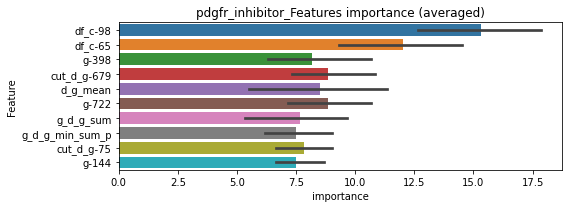

len(train_index) : 3797
len(valid_index) : 3798
================================= fold 1/2 pdgfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.046843	valid_1's binary_logloss: 0.106025
[200]	training's binary_logloss: 0.0136098	valid_1's binary_logloss: 0.0771343
[300]	training's binary_logloss: 0.00529265	valid_1's binary_logloss: 0.0699143
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.00503951	valid_1's binary_logloss: 0.0696951


len(train_index) : 3798
len(valid_index) : 3797
================================= fold 2/2 pdgfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.047892	valid_1's binary_logloss: 0.104549
[200]	training's binary_logloss: 0.0136729	valid_1's binary_logloss: 0.0745906
[300]	training's binary_logloss: 0.00528294	valid_1's binary_logloss: 0.066173
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00363128	valid_1's binary_logloss: 0.0638635


pdgfr_inhibitor logloss: 0.06677968754103494


neg labels: 3289 → selected neg labels: 3286


pdk_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00661876	valid_1's binary_logloss: 0.0167284
[200]	training's binary_logloss: 0.000873397	valid_1's binary_logloss: 0.0103346
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.000494597	valid_1's binary_logloss: 0.00939259
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00744143	valid_1's binary_logloss: 0.0121098
[200]	training's binary_logloss: 0.0010023	valid_1's binary_logloss: 0.00501522
[300]	training's binary_logloss: 0.000458526	valid_1's binary_logloss: 0.00438563
Early stopping, best iteration is:
[304]	training's binary_logloss: 0.000452317	valid_1's binary_logloss: 0.0043718


1 / 3 AUC score:1.000
y_Threshold: 0.0009698, Threshold: 0.0010393, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00094, conf_1:0.00114
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0010393
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0110393
threshold: 0.0110393, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00679019	valid_1's binary_logloss: 0.0172229
[200]	training's binary_logloss: 0.000883182	valid_1's binary_logloss: 0.0101316
[300]	training's binary_logloss: 0.000430638	valid_1's binary_logloss: 0.00916205
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00044008	valid_1's binary_logloss: 0.00913317
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00778699	valid_1's binary_logloss: 0.0124613
[200]	training's binary_logloss: 0.00102443	valid_1's binary_logloss: 0.00471512
[300]	training's binary_logloss: 0.000471885	valid_1's binary_logloss: 0.00404709
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.000459068	valid_1's binary_logloss: 0.00402219


2 / 3 AUC score:1.000
y_Threshold: 0.0140966, Threshold: 0.0110393, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.00994, conf_1:0.01214
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0110393
Num_p_label: 129.0, Expected: 3.0, Adj_threshold_2: 0.0010393
threshold: 0.0010393, positive_p_label: 129.0/3982, p_label_rate: 0.0323958
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00679019	valid_1's binary_logloss: 0.0172229
[200]	training's binary_logloss: 0.000883182	valid_1's binary_logloss: 0.0101316
[300]	training's binary_logloss: 0.000430638	valid_1's binary_logloss: 0.00916205
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00044008	valid_1's binary_logloss: 0.00913317
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00778699	valid_1's binary_logloss: 0.0124613
[200]	training's binary_logloss: 0.00102443	valid_1's binary_logloss: 0.00471512
[300]	training's binary_logloss: 0.000471885	valid_1's binary_logloss: 0.00404709
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.000459068	valid_1's binary_logloss: 0.00402219


3 / 3 AUC score:1.000
y_Threshold: 0.0140966, Threshold: 0.0010393, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0323958 Vs.target_rate: 0.00076
Num_p_label: 129.0, conf_0:0.00094, conf_1:0.00114
Num_p_label: 129.0, Expected: 3.0, Adj_threshold_1: 0.0010393
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0110393
threshold: 0.0110393, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7793, y_label_rate: 0.0843064


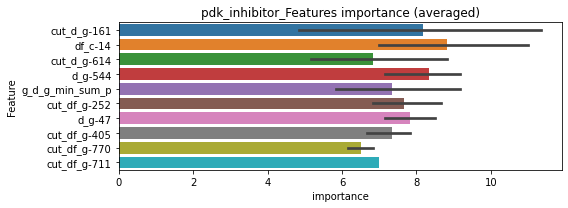

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 pdk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0136643	valid_1's binary_logloss: 0.0203042
[200]	training's binary_logloss: 0.00186548	valid_1's binary_logloss: 0.00813375
[300]	training's binary_logloss: 0.000548182	valid_1's binary_logloss: 0.00642714
[400]	training's binary_logloss: 0.000285377	valid_1's binary_logloss: 0.0059386
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000249336	valid_1's binary_logloss: 0.00587385


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 pdk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0146722	valid_1's binary_logloss: 0.0187335
[200]	training's binary_logloss: 0.00218919	valid_1's binary_logloss: 0.00579193
[300]	training's binary_logloss: 0.000643965	valid_1's binary_logloss: 0.0037964
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.000368503	valid_1's binary_logloss: 0.00333718


pdk_inhibitor logloss: 0.004605679438749325


neg labels: 3289 → selected neg labels: 3243


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 3243, target_rate: 0.0110859 → Adj_target_rate: 0.0096064
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0708497	valid_1's binary_logloss: 0.260682
Early stopping, best iteration is:
[102]	training's binary_logloss: 0.0684163	valid_1's binary_logloss: 0.259754
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0841482	valid_1's binary_logloss: 0.235689
Early stopping, best iteration is:
[134]	training's binary_logloss: 0.0535474	valid_1's binary_logloss: 0.229494


1 / 3 AUC score:0.887
y_Threshold: 0.0873810, Threshold: 0.1033168, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 467 → Positive_corect_labels: 480/3424
p_label_rate: 0.0200904 Vs.target_rate: 0.01109
Num_p_label: 80.0, conf_0:0.09299, conf_1:0.11365
threshold: 0.1033168, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 480.0/3424, y_label_rate: 0.1401869
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0395742	valid_1's binary_logloss: 0.131514
Early stopping, best iteration is:
[149]	training's binary_logloss: 0.0182133	valid_1's binary_logloss: 0.123765
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0376312	valid_1's binary_logloss: 0.13075
Early stopping, best iteration is:
[144]	training's binary_logloss: 0.0180318	valid_1's binary_logloss: 0.123819


2 / 3 AUC score:0.975
y_Threshold: 0.0483666, Threshold: 0.1033168, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 116 → Positive_corect_labels: 422.0/3308
p_label_rate: 0.0002511 Vs.target_rate: 0.01109
Num_p_label: 1.0, conf_0:0.09299, conf_1:0.11365
Num_p_label: 1.0, Expected: 44.1, Adj_threshold_1: 0.1033168
Num_p_label: 2.0, Expected: 44.1, Adj_threshold_2: 0.0933168
Num_p_label: 4.0, Expected: 44.1, Adj_threshold_3: 0.0833168
Num_p_label: 8.0, Expected: 44.1, Adj_threshold_4: 0.0733168
Num_p_label: 14.0, Expected: 44.1, Adj_threshold_5: 0.0633168
Num_p_label: 31.0, Expected: 44.1, Adj_threshold_6: 0.0533168
threshold: 0.0533168, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 422.0/3308, y_label_rate: 0.1275695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0237193	valid_1's binary_logloss: 0.0876629
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00507341	valid_1's binary_logloss: 0.0755752
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023091	valid_1's binary_logloss: 0.0764698
[200]	training's binary_logloss: 0.00435971	valid_1's binary_logloss: 0.062684
Early stopping, best iteration is:
[212]	training's binary_logloss: 0.00378008	valid_1's binary_logloss: 0.0621899


3 / 3 AUC score:0.996
y_Threshold: 0.0226784, Threshold: 0.0533168, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 44 → Positive_corect_labels: 400.0/3264
p_label_rate: 0.0000000 Vs.target_rate: 0.01109
Num_p_label: 0.0, conf_0:0.04799, conf_1:0.05865
Num_p_label: 0.0, Expected: 44.1, Adj_threshold_1: 0.0533168
Num_p_label: 0.0, Expected: 44.1, Adj_threshold_2: 0.0433168
Num_p_label: 3.0, Expected: 44.1, Adj_threshold_3: 0.0333168
Num_p_label: 15.0, Expected: 44.1, Adj_threshold_4: 0.0233168
Num_p_label: 109.0, Expected: 44.1, Adj_threshold_5: 0.0133168
threshold: 0.0133168, positive_p_label: 109.0/3982, p_label_rate: 0.0273732
positive_y_label: 509.0/7246, y_label_rate: 0.0702457


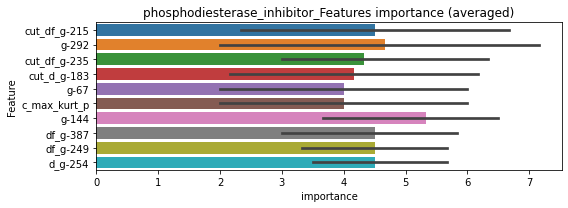

len(train_index) : 3623
len(valid_index) : 3623
================================= fold 1/2 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.04569	valid_1's binary_logloss: 0.0968915
[200]	training's binary_logloss: 0.0150139	valid_1's binary_logloss: 0.0813823
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.00967768	valid_1's binary_logloss: 0.0795387


len(train_index) : 3623
len(valid_index) : 3623
================================= fold 2/2 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0471915	valid_1's binary_logloss: 0.0989958
[200]	training's binary_logloss: 0.0154283	valid_1's binary_logloss: 0.0868075
Early stopping, best iteration is:
[215]	training's binary_logloss: 0.0132392	valid_1's binary_logloss: 0.0864722


phosphodiesterase_inhibitor logloss: 0.08300542749379784


neg labels: 3289 → selected neg labels: 3285


phospholipase_inhibitor, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00846049	valid_1's binary_logloss: 0.0263295
[200]	training's binary_logloss: 0.00120244	valid_1's binary_logloss: 0.0186572
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.000817264	valid_1's binary_logloss: 0.0178975
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00981522	valid_1's binary_logloss: 0.0181424
[200]	training's binary_logloss: 0.00143863	valid_1's binary_logloss: 0.00863699
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.000701496	valid_1's binary_logloss: 0.00765326


1 / 3 AUC score:1.000
y_Threshold: 0.0018895, Threshold: 0.0022932, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00105
Num_p_label: 80.0, conf_0:0.00206, conf_1:0.00252
Num_p_label: 80.0, Expected: 4.2, Adj_threshold_1: 0.0022932
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_2: 0.0122932
threshold: 0.0122932, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00906107	valid_1's binary_logloss: 0.027211
[200]	training's binary_logloss: 0.00124762	valid_1's binary_logloss: 0.0192726
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.000841286	valid_1's binary_logloss: 0.0185218
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0101182	valid_1's binary_logloss: 0.0187059
[200]	training's binary_logloss: 0.00144562	valid_1's binary_logloss: 0.008397
[300]	training's binary_logloss: 0.00061761	valid_1's binary_logloss: 0.00746994
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.000553829	valid_1's binary_logloss: 0.00731406


2 / 3 AUC score:1.000
y_Threshold: 0.0118935, Threshold: 0.0122932, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, conf_0:0.01106, conf_1:0.01352
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0122932
Num_p_label: 148.0, Expected: 4.2, Adj_threshold_2: 0.0022932
threshold: 0.0022932, positive_p_label: 148.0/3982, p_label_rate: 0.0371673
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00906107	valid_1's binary_logloss: 0.027211
[200]	training's binary_logloss: 0.00124762	valid_1's binary_logloss: 0.0192726
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.000841286	valid_1's binary_logloss: 0.0185218
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0101182	valid_1's binary_logloss: 0.0187059
[200]	training's binary_logloss: 0.00144562	valid_1's binary_logloss: 0.008397
[300]	training's binary_logloss: 0.00061761	valid_1's binary_logloss: 0.00746994
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.000553829	valid_1's binary_logloss: 0.00731406


3 / 3 AUC score:1.000
y_Threshold: 0.0118935, Threshold: 0.0022932, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0371673 Vs.target_rate: 0.00105
Num_p_label: 148.0, conf_0:0.00206, conf_1:0.00252
Num_p_label: 148.0, Expected: 4.2, Adj_threshold_1: 0.0022932
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_2: 0.0122932
threshold: 0.0122932, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7792, y_label_rate: 0.0843172


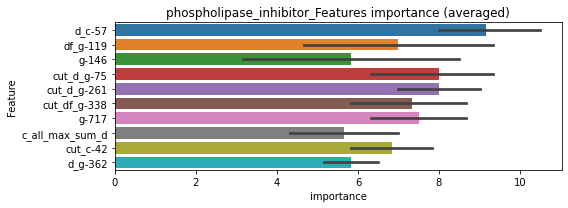

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 phospholipase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0155092	valid_1's binary_logloss: 0.0283235
[200]	training's binary_logloss: 0.00242901	valid_1's binary_logloss: 0.0140442
[300]	training's binary_logloss: 0.000754905	valid_1's binary_logloss: 0.0118023
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.000740374	valid_1's binary_logloss: 0.0117682


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 phospholipase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0172603	valid_1's binary_logloss: 0.0241486
[200]	training's binary_logloss: 0.00292126	valid_1's binary_logloss: 0.00873306
[300]	training's binary_logloss: 0.00090891	valid_1's binary_logloss: 0.0064355
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000488539	valid_1's binary_logloss: 0.00577179


phospholipase_inhibitor logloss: 0.008770017840644791


neg labels: 3289 → selected neg labels: 3264


pi3k_inhibitor, len(trt): 151, len(othr): 3264, target_rate: 0.0063408 → Adj_target_rate: 0.0059749
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0284206	valid_1's binary_logloss: 0.115895
Early stopping, best iteration is:
[161]	training's binary_logloss: 0.00982893	valid_1's binary_logloss: 0.105375
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0324042	valid_1's binary_logloss: 0.108689
[200]	training's binary_logloss: 0.00655099	valid_1's binary_logloss: 0.092877
Early stopping, best iteration is:
[197]	training's binary_logloss: 0.00680317	valid_1's binary_logloss: 0.092873


1 / 3 AUC score:0.990
y_Threshold: 0.0284844, Threshold: 0.0980978, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 190 → Positive_corect_labels: 623/3726
p_label_rate: 0.0200904 Vs.target_rate: 0.00634
Num_p_label: 80.0, conf_0:0.08829, conf_1:0.10791
Num_p_label: 80.0, Expected: 25.2, Adj_threshold_1: 0.0980978
Num_p_label: 76.0, Expected: 25.2, Adj_threshold_2: 0.1080978
Num_p_label: 70.0, Expected: 25.2, Adj_threshold_3: 0.1180978
Num_p_label: 67.0, Expected: 25.2, Adj_threshold_4: 0.1280978
Num_p_label: 65.0, Expected: 25.2, Adj_threshold_5: 0.1380978
Num_p_label: 61.0, Expected: 25.2, Adj_threshold_6: 0.1480978
Num_p_label: 61.0, Expected: 25.2, Adj_threshold_7: 0.1580978
Num_p_label: 59.0, Expected: 25.2, Adj_threshold_8: 0.1680978
Num_p_label: 57.0, Expected: 25.2, Adj_threshold_9: 0.1780978
Num_p_label: 56.0, Expected: 25.2, Adj_threshold_10: 0.1880978
threshold: 0.1980978, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 623.0/3726, y_label_rate: 0.1672034

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204619	valid_1's binary_logloss: 0.0880075
[200]	training's binary_logloss: 0.0035528	valid_1's binary_logloss: 0.0738612
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00228593	valid_1's binary_logloss: 0.0723673
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0243198	valid_1's binary_logloss: 0.0688195
[200]	training's binary_logloss: 0.00447231	valid_1's binary_logloss: 0.046635
[300]	training's binary_logloss: 0.00168519	valid_1's binary_logloss: 0.0423058
Early stopping, best iteration is:
[342]	training's binary_logloss: 0.00130529	valid_1's binary_logloss: 0.0415046


2 / 3 AUC score:0.998
y_Threshold: 0.0469486, Threshold: 0.1980978, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 48 → Positive_corect_labels: 599.0/3678
p_label_rate: 0.0527373 Vs.target_rate: 0.00634
Num_p_label: 210.0, conf_0:0.17829, conf_1:0.21791
Num_p_label: 210.0, Expected: 25.2, Adj_threshold_1: 0.1980978
Num_p_label: 208.0, Expected: 25.2, Adj_threshold_2: 0.2080978
Num_p_label: 202.0, Expected: 25.2, Adj_threshold_3: 0.2180978
Num_p_label: 200.0, Expected: 25.2, Adj_threshold_4: 0.2280978
Num_p_label: 198.0, Expected: 25.2, Adj_threshold_5: 0.2380978
Num_p_label: 192.0, Expected: 25.2, Adj_threshold_6: 0.2480978
Num_p_label: 191.0, Expected: 25.2, Adj_threshold_7: 0.2580978
Num_p_label: 189.0, Expected: 25.2, Adj_threshold_8: 0.2680978
Num_p_label: 186.0, Expected: 25.2, Adj_threshold_9: 0.2780978
Num_p_label: 185.0, Expected: 25.2, Adj_threshold_10: 0.2880978
threshold: 0.2980978, positive_p_label: 183.0/3982, p_label_rate: 0.0459568
positive_y_label: 599.0/3678, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0179365	valid_1's binary_logloss: 0.0568678
[200]	training's binary_logloss: 0.00301769	valid_1's binary_logloss: 0.0384624
[300]	training's binary_logloss: 0.00119335	valid_1's binary_logloss: 0.0348097
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.000944456	valid_1's binary_logloss: 0.0339473
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0171626	valid_1's binary_logloss: 0.0665553
[200]	training's binary_logloss: 0.00284784	valid_1's binary_logloss: 0.0468078
Early stopping, best iteration is:
[272]	training's binary_logloss: 0.00140802	valid_1's binary_logloss: 0.0442656


3 / 3 AUC score:0.999
y_Threshold: 0.0883975, Threshold: 0.2980978, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 32 → Positive_corect_labels: 583.0/3646
p_label_rate: 0.0627825 Vs.target_rate: 0.00634
Num_p_label: 250.0, conf_0:0.26829, conf_1:0.32791
Num_p_label: 250.0, Expected: 25.2, Adj_threshold_1: 0.2980978
Num_p_label: 250.0, Expected: 25.2, Adj_threshold_2: 0.3080978
Num_p_label: 249.0, Expected: 25.2, Adj_threshold_3: 0.3180978
Num_p_label: 247.0, Expected: 25.2, Adj_threshold_4: 0.3280978
Num_p_label: 245.0, Expected: 25.2, Adj_threshold_5: 0.3380978
Num_p_label: 242.0, Expected: 25.2, Adj_threshold_6: 0.3480978
Num_p_label: 241.0, Expected: 25.2, Adj_threshold_7: 0.3580978
Num_p_label: 238.0, Expected: 25.2, Adj_threshold_8: 0.3680978
Num_p_label: 236.0, Expected: 25.2, Adj_threshold_9: 0.3780978
Num_p_label: 235.0, Expected: 25.2, Adj_threshold_10: 0.3880978
threshold: 0.3980978, positive_p_label: 234.0/3982, p_label_rate: 0.0587644
positive_y_label: 817.0/7628, y_label_ra

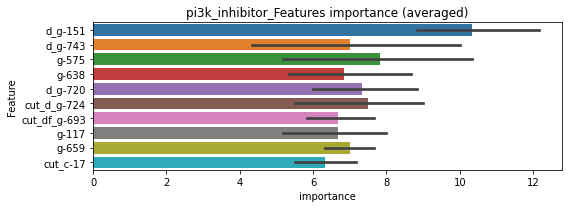

len(train_index) : 3814
len(valid_index) : 3814
================================= fold 1/2 pi3k_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0302715	valid_1's binary_logloss: 0.0682651
[200]	training's binary_logloss: 0.00636415	valid_1's binary_logloss: 0.0439634
[300]	training's binary_logloss: 0.00216035	valid_1's binary_logloss: 0.0374744
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.0012789	valid_1's binary_logloss: 0.0354688


len(train_index) : 3814
len(valid_index) : 3814
================================= fold 2/2 pi3k_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0324302	valid_1's binary_logloss: 0.0575614
[200]	training's binary_logloss: 0.00740575	valid_1's binary_logloss: 0.0323702
[300]	training's binary_logloss: 0.00256532	valid_1's binary_logloss: 0.025665
[400]	training's binary_logloss: 0.00126751	valid_1's binary_logloss: 0.0231358
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00123654	valid_1's binary_logloss: 0.0230429


pi3k_inhibitor logloss: 0.02925583228228949


neg labels: 3289 → selected neg labels: 3284


pkc_inhibitor, len(trt): 31, len(othr): 3284, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0107318	valid_1's binary_logloss: 0.0351187
[200]	training's binary_logloss: 0.00147524	valid_1's binary_logloss: 0.0251744
Early stopping, best iteration is:
[219]	training's binary_logloss: 0.00117588	valid_1's binary_logloss: 0.024755
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0111934	valid_1's binary_logloss: 0.0233921
[200]	training's binary_logloss: 0.00165691	valid_1's binary_logloss: 0.0130118
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.000937742	valid_1's binary_logloss: 0.0116426


1 / 3 AUC score:1.000
y_Threshold: 0.0023005, Threshold: 0.0030721, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00130
Num_p_label: 80.0, conf_0:0.00276, conf_1:0.00338
Num_p_label: 80.0, Expected: 5.2, Adj_threshold_1: 0.0030721
Num_p_label: 0.0, Expected: 5.2, Adj_threshold_2: 0.0130721
threshold: 0.0130721, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0108839	valid_1's binary_logloss: 0.0356047
[200]	training's binary_logloss: 0.00146251	valid_1's binary_logloss: 0.0247165
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.000965395	valid_1's binary_logloss: 0.0237184
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0121185	valid_1's binary_logloss: 0.0234276
[200]	training's binary_logloss: 0.00176805	valid_1's binary_logloss: 0.0124434
[300]	training's binary_logloss: 0.000723653	valid_1's binary_logloss: 0.010862
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000760476	valid_1's binary_logloss: 0.0107842


2 / 3 AUC score:1.000
y_Threshold: 0.0097347, Threshold: 0.0130721, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00130
Num_p_label: 4.0, conf_0:0.01176, conf_1:0.01438
threshold: 0.0130721, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0108839	valid_1's binary_logloss: 0.0356047
[200]	training's binary_logloss: 0.00146251	valid_1's binary_logloss: 0.0247165
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.000965395	valid_1's binary_logloss: 0.0237184
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0121185	valid_1's binary_logloss: 0.0234276
[200]	training's binary_logloss: 0.00176805	valid_1's binary_logloss: 0.0124434
[300]	training's binary_logloss: 0.000723653	valid_1's binary_logloss: 0.010862
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000760476	valid_1's binary_logloss: 0.0107842


3 / 3 AUC score:1.000
y_Threshold: 0.0097347, Threshold: 0.0130721, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00130
Num_p_label: 4.0, conf_0:0.01176, conf_1:0.01438
threshold: 0.0130721, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 660.0/7790, y_label_rate: 0.0847240


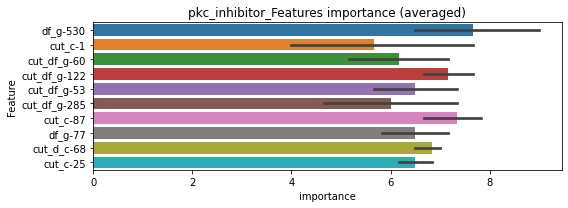

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 pkc_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0172526	valid_1's binary_logloss: 0.0342657
[200]	training's binary_logloss: 0.00288022	valid_1's binary_logloss: 0.0195522
[300]	training's binary_logloss: 0.00090359	valid_1's binary_logloss: 0.0174236
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000599598	valid_1's binary_logloss: 0.0171569


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 pkc_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0194612	valid_1's binary_logloss: 0.0266081
[200]	training's binary_logloss: 0.00350373	valid_1's binary_logloss: 0.0114042
[300]	training's binary_logloss: 0.00112036	valid_1's binary_logloss: 0.00852156
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000676497	valid_1's binary_logloss: 0.00788429


pkc_inhibitor logloss: 0.012520603131545247


neg labels: 3289 → selected neg labels: 3279


potassium_channel_activator, len(trt): 55, len(othr): 3279, target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0168021	valid_1's binary_logloss: 0.0541599
[200]	training's binary_logloss: 0.00289375	valid_1's binary_logloss: 0.0449211
Early stopping, best iteration is:
[195]	training's binary_logloss: 0.00309806	valid_1's binary_logloss: 0.0448135
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.016948	valid_1's binary_logloss: 0.0550849
Early stopping, best iteration is:
[184]	training's binary_logloss: 0.00354484	valid_1's binary_logloss: 0.0460561


1 / 3 AUC score:0.999
y_Threshold: 0.0078283, Threshold: 0.0097256, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0200904 Vs.target_rate: 0.00231
Num_p_label: 80.0, conf_0:0.00875, conf_1:0.01070
Num_p_label: 80.0, Expected: 9.2, Adj_threshold_1: 0.0097256
Num_p_label: 4.0, Expected: 9.2, Adj_threshold_2: 0.0197256
threshold: 0.0197256, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0162974	valid_1's binary_logloss: 0.0583623
Early stopping, best iteration is:
[169]	training's binary_logloss: 0.00423818	valid_1's binary_logloss: 0.0486963
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0192169	valid_1's binary_logloss: 0.0453567
[200]	training's binary_logloss: 0.00328404	valid_1's binary_logloss: 0.0332768
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.00199277	valid_1's binary_logloss: 0.0316143


2 / 3 AUC score:1.000
y_Threshold: 0.0161648, Threshold: 0.0197256, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0037670 Vs.target_rate: 0.00231
Num_p_label: 15.0, conf_0:0.01775, conf_1:0.02170
threshold: 0.0197256, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0166228	valid_1's binary_logloss: 0.0551107
Early stopping, best iteration is:
[168]	training's binary_logloss: 0.00430825	valid_1's binary_logloss: 0.046715
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0177797	valid_1's binary_logloss: 0.0468768
[200]	training's binary_logloss: 0.00305233	valid_1's binary_logloss: 0.0328078
Early stopping, best iteration is:
[224]	training's binary_logloss: 0.00228424	valid_1's binary_logloss: 0.0322667


3 / 3 AUC score:1.000
y_Threshold: 0.0171187, Threshold: 0.0197256, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 16 → Positive_corect_labels: 642.0/3776
p_label_rate: 0.0030136 Vs.target_rate: 0.00231
Num_p_label: 12.0, conf_0:0.01775, conf_1:0.02170
threshold: 0.0197256, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/7758, y_label_rate: 0.0843001


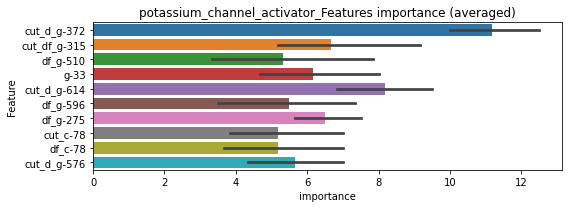

len(train_index) : 3879
len(valid_index) : 3879
================================= fold 1/2 potassium_channel_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0237031	valid_1's binary_logloss: 0.0506262
[200]	training's binary_logloss: 0.00521328	valid_1's binary_logloss: 0.0340966
[300]	training's binary_logloss: 0.00177618	valid_1's binary_logloss: 0.0317805
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.00174733	valid_1's binary_logloss: 0.0317309


len(train_index) : 3879
len(valid_index) : 3879
================================= fold 2/2 potassium_channel_activator=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0267768	valid_1's binary_logloss: 0.0463926
[200]	training's binary_logloss: 0.00608696	valid_1's binary_logloss: 0.0273149
[300]	training's binary_logloss: 0.00208923	valid_1's binary_logloss: 0.0240335
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00168808	valid_1's binary_logloss: 0.0237763


potassium_channel_activator logloss: 0.027753572985201966


neg labels: 3289 → selected neg labels: 3272


potassium_channel_antagonist, len(trt): 98, len(othr): 3272, target_rate: 0.0041152 → Adj_target_rate: 0.0041375
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0282052	valid_1's binary_logloss: 0.112276
Early stopping, best iteration is:
[141]	training's binary_logloss: 0.013612	valid_1's binary_logloss: 0.107174
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0340228	valid_1's binary_logloss: 0.0957685
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.0081084	valid_1's binary_logloss: 0.0803035


1 / 3 AUC score:0.992
y_Threshold: 0.0226430, Threshold: 0.0226241, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 188 → Positive_corect_labels: 626/3738
p_label_rate: 0.0200904 Vs.target_rate: 0.00412
Num_p_label: 80.0, conf_0:0.02036, conf_1:0.02489
Num_p_label: 80.0, Expected: 16.4, Adj_threshold_1: 0.0226241
Num_p_label: 13.0, Expected: 16.4, Adj_threshold_2: 0.0326241
threshold: 0.0326241, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 626.0/3738, y_label_rate: 0.1674692
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0261336	valid_1's binary_logloss: 0.0865127
Early stopping, best iteration is:
[179]	training's binary_logloss: 0.00652645	valid_1's binary_logloss: 0.0755486
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0284855	valid_1's binary_logloss: 0.0799177
[200]	training's binary_logloss: 0.00550442	valid_1's binary_logloss: 0.0663162
Early stopping, best iteration is:
[227]	training's binary_logloss: 0.0039634	valid_1's binary_logloss: 0.0657841


2 / 3 AUC score:0.995
y_Threshold: 0.0228856, Threshold: 0.0326241, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 32 → Positive_corect_labels: 610.0/3706
p_label_rate: 0.0002511 Vs.target_rate: 0.00412
Num_p_label: 1.0, conf_0:0.02936, conf_1:0.03589
Num_p_label: 1.0, Expected: 16.4, Adj_threshold_1: 0.0326241
Num_p_label: 10.0, Expected: 16.4, Adj_threshold_2: 0.0226241
threshold: 0.0226241, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 610.0/3706, y_label_rate: 0.1645979
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.021609	valid_1's binary_logloss: 0.073226
Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00440924	valid_1's binary_logloss: 0.0631257
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0254198	valid_1's binary_logloss: 0.0651133
Early stopping, best iteration is:
[187]	training's binary_logloss: 0.0055948	valid_1's binary_logloss: 0.0501309


3 / 3 AUC score:0.998
y_Threshold: 0.0242810, Threshold: 0.0226241, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 24 → Positive_corect_labels: 598.0/3682
p_label_rate: 0.0037670 Vs.target_rate: 0.00412
Num_p_label: 15.0, conf_0:0.02036, conf_1:0.02489
threshold: 0.0226241, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 613.0/7664, y_label_rate: 0.0799843


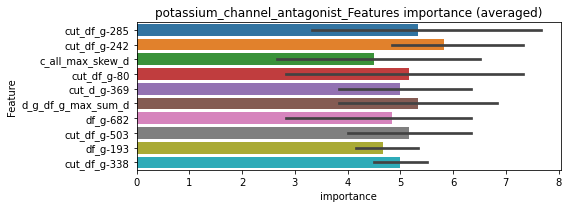

len(train_index) : 3832
len(valid_index) : 3832
================================= fold 1/2 potassium_channel_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0299002	valid_1's binary_logloss: 0.0595399
[200]	training's binary_logloss: 0.00755445	valid_1's binary_logloss: 0.0422369
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.00305915	valid_1's binary_logloss: 0.0400795


len(train_index) : 3832
len(valid_index) : 3832
================================= fold 2/2 potassium_channel_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.032558	valid_1's binary_logloss: 0.0564045
[200]	training's binary_logloss: 0.00863554	valid_1's binary_logloss: 0.0380835
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.00438137	valid_1's binary_logloss: 0.0363774


potassium_channel_antagonist logloss: 0.03822846465283518


neg labels: 3289 → selected neg labels: 3269


ppar_receptor_agonist, len(trt): 115, len(othr): 3269, target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0280711	valid_1's binary_logloss: 0.124852
Early stopping, best iteration is:
[148]	training's binary_logloss: 0.011692	valid_1's binary_logloss: 0.116529
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0365087	valid_1's binary_logloss: 0.10334
[200]	training's binary_logloss: 0.00751731	valid_1's binary_logloss: 0.0869692
Early stopping, best iteration is:
[222]	training's binary_logloss: 0.0057682	valid_1's binary_logloss: 0.0859082


1 / 3 AUC score:0.991
y_Threshold: 0.0215137, Threshold: 0.0612057, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 174 → Positive_corect_labels: 632/3748
p_label_rate: 0.0200904 Vs.target_rate: 0.00483
Num_p_label: 80.0, conf_0:0.05509, conf_1:0.06733
Num_p_label: 80.0, Expected: 19.2, Adj_threshold_1: 0.0612057
Num_p_label: 69.0, Expected: 19.2, Adj_threshold_2: 0.0712057
Num_p_label: 64.0, Expected: 19.2, Adj_threshold_3: 0.0812057
Num_p_label: 60.0, Expected: 19.2, Adj_threshold_4: 0.0912057
Num_p_label: 51.0, Expected: 19.2, Adj_threshold_5: 0.1012057
Num_p_label: 44.0, Expected: 19.2, Adj_threshold_6: 0.1112057
Num_p_label: 37.0, Expected: 19.2, Adj_threshold_7: 0.1212057
threshold: 0.1212057, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 632.0/3748, y_label_rate: 0.1686233
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0274071	valid_1's binary_logloss: 0.105278
[200]	training's binary_logloss: 0.00526996	valid_1's binary_logloss: 0.0928025
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00581628	valid_1's binary_logloss: 0.0926361
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0289502	valid_1's binary_logloss: 0.091969
[200]	training's binary_logloss: 0.00534634	valid_1's binary_logloss: 0.078723
Early stopping, best iteration is:
[212]	training's binary_logloss: 0.00460521	valid_1's binary_logloss: 0.0779291


2 / 3 AUC score:0.996
y_Threshold: 0.0285449, Threshold: 0.1212057, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 52 → Positive_corect_labels: 606.0/3696
p_label_rate: 0.0218483 Vs.target_rate: 0.00483
Num_p_label: 87.0, conf_0:0.10909, conf_1:0.13333
Num_p_label: 87.0, Expected: 19.2, Adj_threshold_1: 0.1212057
Num_p_label: 82.0, Expected: 19.2, Adj_threshold_2: 0.1312057
Num_p_label: 79.0, Expected: 19.2, Adj_threshold_3: 0.1412057
Num_p_label: 77.0, Expected: 19.2, Adj_threshold_4: 0.1512057
Num_p_label: 77.0, Expected: 19.2, Adj_threshold_5: 0.1612057
Num_p_label: 74.0, Expected: 19.2, Adj_threshold_6: 0.1712057
Num_p_label: 72.0, Expected: 19.2, Adj_threshold_7: 0.1812057
Num_p_label: 72.0, Expected: 19.2, Adj_threshold_8: 0.1912057
Num_p_label: 66.0, Expected: 19.2, Adj_threshold_9: 0.2012057
Num_p_label: 65.0, Expected: 19.2, Adj_threshold_10: 0.2112057
threshold: 0.2212057, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 606.0/3696, y_label_rate: 0.163961

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0240481	valid_1's binary_logloss: 0.0754944
[200]	training's binary_logloss: 0.0042842	valid_1's binary_logloss: 0.0615219
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00470343	valid_1's binary_logloss: 0.0610995
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0235984	valid_1's binary_logloss: 0.0726574
[200]	training's binary_logloss: 0.00440034	valid_1's binary_logloss: 0.0569978
Early stopping, best iteration is:
[199]	training's binary_logloss: 0.00444626	valid_1's binary_logloss: 0.056894


3 / 3 AUC score:1.000
y_Threshold: 0.0258451, Threshold: 0.2212057, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 26 → Positive_corect_labels: 593.0/3670
p_label_rate: 0.0198393 Vs.target_rate: 0.00483
Num_p_label: 79.0, conf_0:0.19909, conf_1:0.24333
Num_p_label: 79.0, Expected: 19.2, Adj_threshold_1: 0.2212057
Num_p_label: 78.0, Expected: 19.2, Adj_threshold_2: 0.2312057
Num_p_label: 78.0, Expected: 19.2, Adj_threshold_3: 0.2412057
Num_p_label: 77.0, Expected: 19.2, Adj_threshold_4: 0.2512057
Num_p_label: 77.0, Expected: 19.2, Adj_threshold_5: 0.2612057
Num_p_label: 77.0, Expected: 19.2, Adj_threshold_6: 0.2712057
Num_p_label: 75.0, Expected: 19.2, Adj_threshold_7: 0.2812057
Num_p_label: 73.0, Expected: 19.2, Adj_threshold_8: 0.2912057
Num_p_label: 72.0, Expected: 19.2, Adj_threshold_9: 0.3012057
Num_p_label: 69.0, Expected: 19.2, Adj_threshold_10: 0.3112057
threshold: 0.3212057, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 658.0/7652, y_label_rate: 0.085990

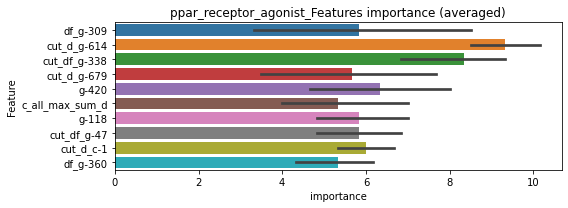

len(train_index) : 3826
len(valid_index) : 3826
================================= fold 1/2 ppar_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0307447	valid_1's binary_logloss: 0.0662675
[200]	training's binary_logloss: 0.00750683	valid_1's binary_logloss: 0.045042
[300]	training's binary_logloss: 0.00266301	valid_1's binary_logloss: 0.0404048
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00216707	valid_1's binary_logloss: 0.0396176


len(train_index) : 3826
len(valid_index) : 3826
================================= fold 2/2 ppar_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0330274	valid_1's binary_logloss: 0.0607988
[200]	training's binary_logloss: 0.00853015	valid_1's binary_logloss: 0.0395743
[300]	training's binary_logloss: 0.00307867	valid_1's binary_logloss: 0.0348065
[400]	training's binary_logloss: 0.00151517	valid_1's binary_logloss: 0.0336959
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00121573	valid_1's binary_logloss: 0.0331694


ppar_receptor_agonist logloss: 0.03639353402164275


neg labels: 3289 → selected neg labels: 3284


ppar_receptor_antagonist, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0100738	valid_1's binary_logloss: 0.0324457
Early stopping, best iteration is:
[184]	training's binary_logloss: 0.0017823	valid_1's binary_logloss: 0.0235335
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.010978	valid_1's binary_logloss: 0.0317046
[200]	training's binary_logloss: 0.0015528	valid_1's binary_logloss: 0.0220666
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.000992824	valid_1's binary_logloss: 0.0215399


1 / 3 AUC score:1.000
y_Threshold: 0.0039546, Threshold: 0.0045587, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00126
Num_p_label: 80.0, conf_0:0.00410, conf_1:0.00501
Num_p_label: 80.0, Expected: 5.0, Adj_threshold_1: 0.0045587
Num_p_label: 0.0, Expected: 5.0, Adj_threshold_2: 0.0145587
threshold: 0.0145587, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0103386	valid_1's binary_logloss: 0.0339502
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00184635	valid_1's binary_logloss: 0.0247268
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0108491	valid_1's binary_logloss: 0.0313733
[200]	training's binary_logloss: 0.00158063	valid_1's binary_logloss: 0.0217256
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00103658	valid_1's binary_logloss: 0.0212468


2 / 3 AUC score:1.000
y_Threshold: 0.0100444, Threshold: 0.0145587, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0005023 Vs.target_rate: 0.00126
Num_p_label: 2.0, conf_0:0.01310, conf_1:0.01601
threshold: 0.0145587, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.010695	valid_1's binary_logloss: 0.0300947
[200]	training's binary_logloss: 0.00151882	valid_1's binary_logloss: 0.021047
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.000962219	valid_1's binary_logloss: 0.0202189
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0108845	valid_1's binary_logloss: 0.0297767
[200]	training's binary_logloss: 0.00154384	valid_1's binary_logloss: 0.0199125
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.000716786	valid_1's binary_logloss: 0.0182025


3 / 3 AUC score:1.000
y_Threshold: 0.0074940, Threshold: 0.0145587, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0000000 Vs.target_rate: 0.00126
Num_p_label: 0.0, conf_0:0.01310, conf_1:0.01601
Num_p_label: 0.0, Expected: 5.0, Adj_threshold_1: 0.0145587
Num_p_label: 49.0, Expected: 5.0, Adj_threshold_2: 0.0045587
threshold: 0.0045587, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 703.0/7786, y_label_rate: 0.0902903


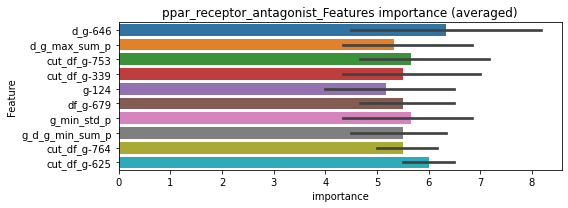

len(train_index) : 3893
len(valid_index) : 3893
================================= fold 1/2 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0267116	valid_1's binary_logloss: 0.0483559
[200]	training's binary_logloss: 0.00593027	valid_1's binary_logloss: 0.035033
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00378505	valid_1's binary_logloss: 0.0342744


len(train_index) : 3893
len(valid_index) : 3893
================================= fold 2/2 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0251556	valid_1's binary_logloss: 0.0538408
[200]	training's binary_logloss: 0.00568391	valid_1's binary_logloss: 0.0400465
Early stopping, best iteration is:
[204]	training's binary_logloss: 0.00539907	valid_1's binary_logloss: 0.0399307


ppar_receptor_antagonist logloss: 0.037102554795811295


neg labels: 3289 → selected neg labels: 3271


progesterone_receptor_agonist, len(trt): 119, len(othr): 3271, target_rate: 0.0049971 → Adj_target_rate: 0.0048799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0337937	valid_1's binary_logloss: 0.134769
Early stopping, best iteration is:
[154]	training's binary_logloss: 0.0130321	valid_1's binary_logloss: 0.128489
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0407163	valid_1's binary_logloss: 0.106652
Early stopping, best iteration is:
[166]	training's binary_logloss: 0.0137814	valid_1's binary_logloss: 0.0926158


1 / 3 AUC score:0.985
y_Threshold: 0.0289612, Threshold: 0.0303906, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 195 → Positive_corect_labels: 622/3730
p_label_rate: 0.0200904 Vs.target_rate: 0.00500
Num_p_label: 80.0, conf_0:0.02735, conf_1:0.03343
Num_p_label: 80.0, Expected: 19.9, Adj_threshold_1: 0.0303906
Num_p_label: 17.0, Expected: 19.9, Adj_threshold_2: 0.0403906
threshold: 0.0403906, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 622.0/3730, y_label_rate: 0.1667560
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0285766	valid_1's binary_logloss: 0.0963858
[200]	training's binary_logloss: 0.00563774	valid_1's binary_logloss: 0.0836881
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00622603	valid_1's binary_logloss: 0.0833817
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0325061	valid_1's binary_logloss: 0.0873312
[200]	training's binary_logloss: 0.00640678	valid_1's binary_logloss: 0.0693971
Early stopping, best iteration is:
[236]	training's binary_logloss: 0.00413291	valid_1's binary_logloss: 0.0677505


2 / 3 AUC score:0.998
y_Threshold: 0.0248848, Threshold: 0.0403906, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 28 → Positive_corect_labels: 608.0/3702
p_label_rate: 0.0002511 Vs.target_rate: 0.00500
Num_p_label: 1.0, conf_0:0.03635, conf_1:0.04443
Num_p_label: 1.0, Expected: 19.9, Adj_threshold_1: 0.0403906
Num_p_label: 11.0, Expected: 19.9, Adj_threshold_2: 0.0303906
threshold: 0.0303906, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 608.0/3702, y_label_rate: 0.1642355
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0263018	valid_1's binary_logloss: 0.0947577
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.00704232	valid_1's binary_logloss: 0.0845829
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0296929	valid_1's binary_logloss: 0.076701
[200]	training's binary_logloss: 0.00577491	valid_1's binary_logloss: 0.0603342
Early stopping, best iteration is:
[218]	training's binary_logloss: 0.00458207	valid_1's binary_logloss: 0.0594437


3 / 3 AUC score:0.998
y_Threshold: 0.0262813, Threshold: 0.0303906, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 34 → Positive_corect_labels: 591.0/3668
p_label_rate: 0.0020090 Vs.target_rate: 0.00500
Num_p_label: 8.0, conf_0:0.02735, conf_1:0.03343
threshold: 0.0303906, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 599.0/7650, y_label_rate: 0.0783007


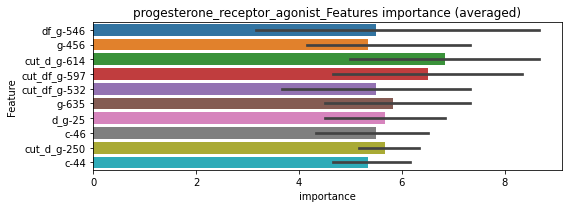

len(train_index) : 3825
len(valid_index) : 3825
================================= fold 1/2 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0307319	valid_1's binary_logloss: 0.0642254
[200]	training's binary_logloss: 0.00749117	valid_1's binary_logloss: 0.0466695
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.00298661	valid_1's binary_logloss: 0.0443511


len(train_index) : 3825
len(valid_index) : 3825
================================= fold 2/2 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0340932	valid_1's binary_logloss: 0.0601518
[200]	training's binary_logloss: 0.00928206	valid_1's binary_logloss: 0.0388518
[300]	training's binary_logloss: 0.00338992	valid_1's binary_logloss: 0.0345531
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.0019654	valid_1's binary_logloss: 0.0337614


progesterone_receptor_agonist logloss: 0.039056213710059226


neg labels: 3289 → selected neg labels: 3286


progesterone_receptor_antagonist, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00654412	valid_1's binary_logloss: 0.0157978
[200]	training's binary_logloss: 0.000808608	valid_1's binary_logloss: 0.00892295
Early stopping, best iteration is:
[224]	training's binary_logloss: 0.000623808	valid_1's binary_logloss: 0.00859681
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00726557	valid_1's binary_logloss: 0.0130816
[200]	training's binary_logloss: 0.000925295	valid_1's binary_logloss: 0.00505934
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000467902	valid_1's binary_logloss: 0.00430239


1 / 3 AUC score:1.000
y_Threshold: 0.0012849, Threshold: 0.0015636, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00141, conf_1:0.00172
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0015636
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0115636
threshold: 0.0115636, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00661792	valid_1's binary_logloss: 0.0155565
[200]	training's binary_logloss: 0.00081709	valid_1's binary_logloss: 0.00847734
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000507083	valid_1's binary_logloss: 0.00800067
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00719209	valid_1's binary_logloss: 0.0123647
[200]	training's binary_logloss: 0.000936897	valid_1's binary_logloss: 0.00469718
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000470582	valid_1's binary_logloss: 0.00400996


2 / 3 AUC score:1.000
y_Threshold: 0.0079268, Threshold: 0.0115636, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.01041, conf_1:0.01272
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0115636
Num_p_label: 143.0, Expected: 3.0, Adj_threshold_2: 0.0015636
threshold: 0.0015636, positive_p_label: 143.0/3982, p_label_rate: 0.0359116
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00661792	valid_1's binary_logloss: 0.0155565
[200]	training's binary_logloss: 0.00081709	valid_1's binary_logloss: 0.00847734
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000507083	valid_1's binary_logloss: 0.00800067
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00719209	valid_1's binary_logloss: 0.0123647
[200]	training's binary_logloss: 0.000936897	valid_1's binary_logloss: 0.00469718
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000470582	valid_1's binary_logloss: 0.00400996


3 / 3 AUC score:1.000
y_Threshold: 0.0079268, Threshold: 0.0015636, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0359116 Vs.target_rate: 0.00076
Num_p_label: 143.0, conf_0:0.00141, conf_1:0.00172
Num_p_label: 143.0, Expected: 3.0, Adj_threshold_1: 0.0015636
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0115636
threshold: 0.0115636, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7793, y_label_rate: 0.0843064


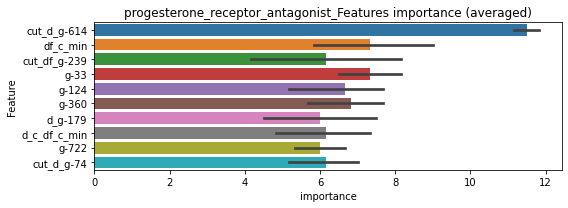

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0137963	valid_1's binary_logloss: 0.0202504
[200]	training's binary_logloss: 0.00178635	valid_1's binary_logloss: 0.00767117
[300]	training's binary_logloss: 0.000509504	valid_1's binary_logloss: 0.00603243
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000305214	valid_1's binary_logloss: 0.00569259


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0144622	valid_1's binary_logloss: 0.0185463
[200]	training's binary_logloss: 0.00199244	valid_1's binary_logloss: 0.00495094
[300]	training's binary_logloss: 0.000581981	valid_1's binary_logloss: 0.0031695
[400]	training's binary_logloss: 0.000299639	valid_1's binary_logloss: 0.00276744
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000239556	valid_1's binary_logloss: 0.00260456


progesterone_receptor_antagonist logloss: 0.004148771585262206


neg labels: 3289 → selected neg labels: 3283


prostaglandin_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0114424	valid_1's binary_logloss: 0.038678
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00202096	valid_1's binary_logloss: 0.0307242
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0127427	valid_1's binary_logloss: 0.0277789
[200]	training's binary_logloss: 0.00199936	valid_1's binary_logloss: 0.0167726
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.00118208	valid_1's binary_logloss: 0.0157121


1 / 3 AUC score:1.000
y_Threshold: 0.0048158, Threshold: 0.0056366, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00507, conf_1:0.00620
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0056366
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0156366
threshold: 0.0156366, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0117756	valid_1's binary_logloss: 0.0402031
Early stopping, best iteration is:
[182]	training's binary_logloss: 0.00207926	valid_1's binary_logloss: 0.0316946
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0135843	valid_1's binary_logloss: 0.0294203
[200]	training's binary_logloss: 0.00212148	valid_1's binary_logloss: 0.017088
Early stopping, best iteration is:
[234]	training's binary_logloss: 0.00144754	valid_1's binary_logloss: 0.0161178


2 / 3 AUC score:1.000
y_Threshold: 0.0160144, Threshold: 0.0156366, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, conf_0:0.01407, conf_1:0.01720
threshold: 0.0156366, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0123612	valid_1's binary_logloss: 0.0322988
[200]	training's binary_logloss: 0.00190753	valid_1's binary_logloss: 0.0206203
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00117752	valid_1's binary_logloss: 0.0196077
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.012443	valid_1's binary_logloss: 0.0303049
[200]	training's binary_logloss: 0.00190896	valid_1's binary_logloss: 0.0205544
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.00101947	valid_1's binary_logloss: 0.019407


3 / 3 AUC score:1.000
y_Threshold: 0.0159798, Threshold: 0.0156366, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0002511 Vs.target_rate: 0.00151
Num_p_label: 1.0, conf_0:0.01407, conf_1:0.01720
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0156366
Num_p_label: 74.0, Expected: 6.0, Adj_threshold_2: 0.0056366
threshold: 0.0056366, positive_p_label: 74.0/3982, p_label_rate: 0.0185836
positive_y_label: 728.0/7785, y_label_rate: 0.0935132


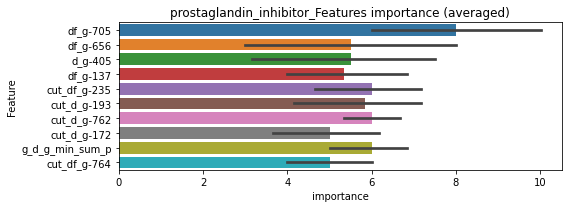

len(train_index) : 3892
len(valid_index) : 3893
================================= fold 1/2 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0320351	valid_1's binary_logloss: 0.0622263
[200]	training's binary_logloss: 0.00789398	valid_1's binary_logloss: 0.0465844
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.00392864	valid_1's binary_logloss: 0.04547


len(train_index) : 3893
len(valid_index) : 3892
================================= fold 2/2 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0310847	valid_1's binary_logloss: 0.0638066
[200]	training's binary_logloss: 0.00745875	valid_1's binary_logloss: 0.0479548
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00485668	valid_1's binary_logloss: 0.0470229


prostaglandin_inhibitor logloss: 0.04624630823842141


neg labels: 3289 → selected neg labels: 3274


prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3274, target_rate: 0.0035273 → Adj_target_rate: 0.0036294
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0262406	valid_1's binary_logloss: 0.0991696
Early stopping, best iteration is:
[139]	training's binary_logloss: 0.0126073	valid_1's binary_logloss: 0.0932312
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0310004	valid_1's binary_logloss: 0.0801079
[200]	training's binary_logloss: 0.00593996	valid_1's binary_logloss: 0.0619453
Early stopping, best iteration is:
[232]	training's binary_logloss: 0.0040366	valid_1's binary_logloss: 0.060807


1 / 3 AUC score:0.995
y_Threshold: 0.0189876, Threshold: 0.0189948, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 162 → Positive_corect_labels: 639/3766
p_label_rate: 0.0200904 Vs.target_rate: 0.00353
Num_p_label: 80.0, conf_0:0.01710, conf_1:0.02089
Num_p_label: 80.0, Expected: 14.0, Adj_threshold_1: 0.0189948
Num_p_label: 8.0, Expected: 14.0, Adj_threshold_2: 0.0289948
threshold: 0.0289948, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 639.0/3766, y_label_rate: 0.1696760
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0232765	valid_1's binary_logloss: 0.0837145
Early stopping, best iteration is:
[168]	training's binary_logloss: 0.00677632	valid_1's binary_logloss: 0.0751946
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0293859	valid_1's binary_logloss: 0.0665319
[200]	training's binary_logloss: 0.00553275	valid_1's binary_logloss: 0.0501617
Early stopping, best iteration is:
[225]	training's binary_logloss: 0.00402904	valid_1's binary_logloss: 0.0493651


2 / 3 AUC score:0.999
y_Threshold: 0.0247132, Threshold: 0.0289948, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 24 → Positive_corect_labels: 627.0/3742
p_label_rate: 0.0005023 Vs.target_rate: 0.00353
Num_p_label: 2.0, conf_0:0.02610, conf_1:0.03189
Num_p_label: 2.0, Expected: 14.0, Adj_threshold_1: 0.0289948
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_2: 0.0189948
threshold: 0.0189948, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 627.0/3742, y_label_rate: 0.1675575
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0208531	valid_1's binary_logloss: 0.0756753
[200]	training's binary_logloss: 0.00363619	valid_1's binary_logloss: 0.066716
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.00411844	valid_1's binary_logloss: 0.06613
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0254055	valid_1's binary_logloss: 0.0673313
[200]	training's binary_logloss: 0.00468601	valid_1's binary_logloss: 0.0546197
Early stopping, best iteration is:
[200]	training's binary_logloss: 0.00468601	valid_1's binary_logloss: 0.0546197


3 / 3 AUC score:0.998
y_Threshold: 0.0185171, Threshold: 0.0189948, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 28 → Positive_corect_labels: 613.0/3714
p_label_rate: 0.0042692 Vs.target_rate: 0.00353
Num_p_label: 17.0, conf_0:0.01710, conf_1:0.02089
threshold: 0.0189948, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 630.0/7696, y_label_rate: 0.0818607


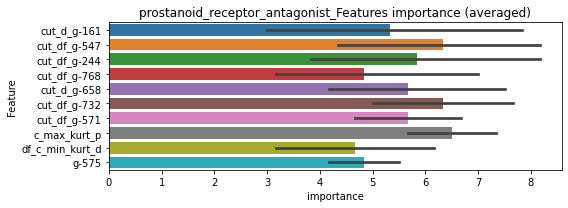

len(train_index) : 3848
len(valid_index) : 3848
================================= fold 1/2 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0285976	valid_1's binary_logloss: 0.0605635
[200]	training's binary_logloss: 0.0072507	valid_1's binary_logloss: 0.044948
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00411951	valid_1's binary_logloss: 0.0437739


len(train_index) : 3848
len(valid_index) : 3848
================================= fold 2/2 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0318352	valid_1's binary_logloss: 0.0539695
[200]	training's binary_logloss: 0.00835165	valid_1's binary_logloss: 0.0347805
[300]	training's binary_logloss: 0.00299975	valid_1's binary_logloss: 0.0312488
Early stopping, best iteration is:
[338]	training's binary_logloss: 0.00218073	valid_1's binary_logloss: 0.0309897


prostanoid_receptor_antagonist logloss: 0.03738177431538209


neg labels: 3289 → selected neg labels: 3285


proteasome_inhibitor, len(trt): 726, len(othr): 3285, target_rate: 0.0304863 → Adj_target_rate: 0.0226983
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0066351	valid_1's binary_logloss: 0.0141601
[200]	training's binary_logloss: 0.000711919	valid_1's binary_logloss: 0.00891004
Early stopping, best iteration is:
[209]	training's binary_logloss: 0.000629219	valid_1's binary_logloss: 0.00877412
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00626824	valid_1's binary_logloss: 0.016379
[200]	training's binary_logloss: 0.000666344	valid_1's binary_logloss: 0.0102899
Early stopping, best iteration is:
[214]	training's binary_logloss: 0.000558773	valid_1's binary_logloss: 0.0101792


1 / 3 AUC score:1.000
y_Threshold: 0.0001687, Threshold: 0.9986007, pos_neg_ratio: 0.7789954
Remove_noisy_labels: 161 → Positive_corect_labels: 726/3850
p_label_rate: 0.0200904 Vs.target_rate: 0.03049
Num_p_label: 80.0, conf_0:0.89874, conf_1:1.09846
threshold: 0.9986007, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 726.0/3850, y_label_rate: 0.1885714
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00250578	valid_1's binary_logloss: 0.00255473
[200]	training's binary_logloss: 0.000210219	valid_1's binary_logloss: 0.000232386
[300]	training's binary_logloss: 0.000156397	valid_1's binary_logloss: 0.000176469
[400]	training's binary_logloss: 0.00015138	valid_1's binary_logloss: 0.000171041
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.00015138	valid_1's binary_logloss: 0.000171041
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00247294	valid_1's binary_logloss: 0.00262626
[200]	training's binary_logloss: 0.000209018	valid_1's binary_logloss: 0.000246631
[300]	training's binary_logloss: 0.000156169	valid_1's binary_logloss: 0.00018879
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000151306	valid_1's binary_logloss: 0.000183556


2 / 3 AUC score:1.000
y_Threshold: 0.2014748, Threshold: 0.9986007, pos_neg_ratio: 0.7789954
Remove_noisy_labels: 0 → Positive_corect_labels: 726.0/3850
p_label_rate: 0.0376695 Vs.target_rate: 0.03049
Num_p_label: 150.0, conf_0:0.89874, conf_1:1.09846
threshold: 0.9986007, positive_p_label: 150.0/3982, p_label_rate: 0.0376695
positive_y_label: 726.0/3850, y_label_rate: 0.1885714
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00250578	valid_1's binary_logloss: 0.00255473
[200]	training's binary_logloss: 0.000210219	valid_1's binary_logloss: 0.000232386
[300]	training's binary_logloss: 0.000156397	valid_1's binary_logloss: 0.000176469
[400]	training's binary_logloss: 0.00015138	valid_1's binary_logloss: 0.000171041
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.00015138	valid_1's binary_logloss: 0.000171041
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00247294	valid_1's binary_logloss: 0.00262626
[200]	training's binary_logloss: 0.000209018	valid_1's binary_logloss: 0.000246631
[300]	training's binary_logloss: 0.000156169	valid_1's binary_logloss: 0.00018879
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000151306	valid_1's binary_logloss: 0.000183556


3 / 3 AUC score:1.000
y_Threshold: 0.2014748, Threshold: 0.9986007, pos_neg_ratio: 0.7789954
Remove_noisy_labels: 0 → Positive_corect_labels: 726.0/3850
p_label_rate: 0.0376695 Vs.target_rate: 0.03049
Num_p_label: 150.0, conf_0:0.89874, conf_1:1.09846
threshold: 0.9986007, positive_p_label: 150.0/3982, p_label_rate: 0.0376695
positive_y_label: 876.0/7832, y_label_rate: 0.1118488


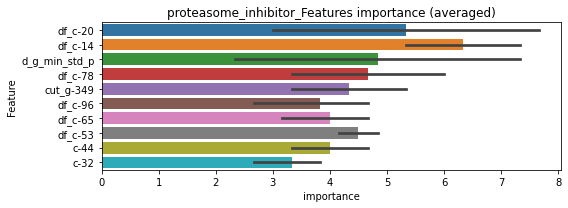

len(train_index) : 3916
len(valid_index) : 3916
================================= fold 1/2 proteasome_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0134772	valid_1's binary_logloss: 0.0140549
[200]	training's binary_logloss: 0.00151782	valid_1's binary_logloss: 0.003293
[300]	training's binary_logloss: 0.000378452	valid_1's binary_logloss: 0.00248105
Early stopping, best iteration is:
[303]	training's binary_logloss: 0.000367981	valid_1's binary_logloss: 0.00246481


len(train_index) : 3916
len(valid_index) : 3916
================================= fold 2/2 proteasome_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0126839	valid_1's binary_logloss: 0.0160096
[200]	training's binary_logloss: 0.00118659	valid_1's binary_logloss: 0.00546158
Early stopping, best iteration is:
[226]	training's binary_logloss: 0.000729873	valid_1's binary_logloss: 0.00509696


proteasome_inhibitor logloss: 0.003780880865550213


neg labels: 3289 → selected neg labels: 3281


protein_kinase_inhibitor, len(trt): 48, len(othr): 3281, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.014602	valid_1's binary_logloss: 0.0557725
Early stopping, best iteration is:
[160]	training's binary_logloss: 0.00421789	valid_1's binary_logloss: 0.0495919
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0178088	valid_1's binary_logloss: 0.0399366
[200]	training's binary_logloss: 0.00300442	valid_1's binary_logloss: 0.0261351
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.00179814	valid_1's binary_logloss: 0.025167


1 / 3 AUC score:1.000
y_Threshold: 0.0076148, Threshold: 0.0089810, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0200904 Vs.target_rate: 0.00202
Num_p_label: 80.0, conf_0:0.00808, conf_1:0.00988
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_1: 0.0089810
Num_p_label: 11.0, Expected: 8.0, Adj_threshold_2: 0.0189810
threshold: 0.0189810, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0166458	valid_1's binary_logloss: 0.0426134
[200]	training's binary_logloss: 0.00274618	valid_1's binary_logloss: 0.0311063
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00306286	valid_1's binary_logloss: 0.0309999
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0166736	valid_1's binary_logloss: 0.0480551
[200]	training's binary_logloss: 0.00260583	valid_1's binary_logloss: 0.0374617
Early stopping, best iteration is:
[224]	training's binary_logloss: 0.00193842	valid_1's binary_logloss: 0.0368866


2 / 3 AUC score:1.000
y_Threshold: 0.0168522, Threshold: 0.0189810, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0060271 Vs.target_rate: 0.00202
Num_p_label: 24.0, conf_0:0.01708, conf_1:0.02088
threshold: 0.0189810, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0147433	valid_1's binary_logloss: 0.0469996
[200]	training's binary_logloss: 0.00229554	valid_1's binary_logloss: 0.0362883
Early stopping, best iteration is:
[196]	training's binary_logloss: 0.00242485	valid_1's binary_logloss: 0.0360477
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0168926	valid_1's binary_logloss: 0.0408606
[200]	training's binary_logloss: 0.00268399	valid_1's binary_logloss: 0.0281329
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.00156999	valid_1's binary_logloss: 0.0269727


3 / 3 AUC score:1.000
y_Threshold: 0.0177546, Threshold: 0.0189810, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0060271 Vs.target_rate: 0.00202
Num_p_label: 24.0, conf_0:0.01708, conf_1:0.02088
threshold: 0.0189810, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 671.0/7769, y_label_rate: 0.0863689


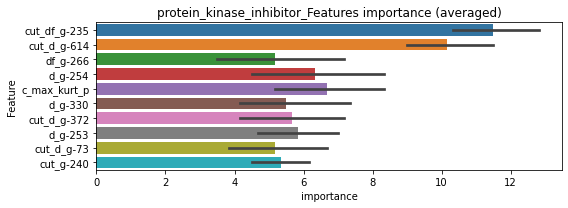

len(train_index) : 3884
len(valid_index) : 3885
================================= fold 1/2 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0227416	valid_1's binary_logloss: 0.0494353
[200]	training's binary_logloss: 0.00466145	valid_1's binary_logloss: 0.0326901
[300]	training's binary_logloss: 0.00154144	valid_1's binary_logloss: 0.0303863
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00119399	valid_1's binary_logloss: 0.0299362


len(train_index) : 3885
len(valid_index) : 3884
================================= fold 2/2 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0266945	valid_1's binary_logloss: 0.0406262
[200]	training's binary_logloss: 0.00597848	valid_1's binary_logloss: 0.0217691
[300]	training's binary_logloss: 0.00203253	valid_1's binary_logloss: 0.0179946
[400]	training's binary_logloss: 0.000991056	valid_1's binary_logloss: 0.0170468
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00085394	valid_1's binary_logloss: 0.0168294


protein_kinase_inhibitor logloss: 0.023383638654738727


neg labels: 3289 → selected neg labels: 3286


protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3286, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00767661	valid_1's binary_logloss: 0.0265048
[200]	training's binary_logloss: 0.00103068	valid_1's binary_logloss: 0.018045
Early stopping, best iteration is:
[218]	training's binary_logloss: 0.000839557	valid_1's binary_logloss: 0.0177638
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00941976	valid_1's binary_logloss: 0.0155049
[200]	training's binary_logloss: 0.00126799	valid_1's binary_logloss: 0.00624624
[300]	training's binary_logloss: 0.000558898	valid_1's binary_logloss: 0.00536425
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.000508933	valid_1's binary_logloss: 0.00525182


1 / 3 AUC score:1.000
y_Threshold: 0.0017768, Threshold: 0.0020593, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00101
Num_p_label: 80.0, conf_0:0.00185, conf_1:0.00227
Num_p_label: 80.0, Expected: 4.0, Adj_threshold_1: 0.0020593
Num_p_label: 1.0, Expected: 4.0, Adj_threshold_2: 0.0120593
threshold: 0.0120593, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00792963	valid_1's binary_logloss: 0.025596
[200]	training's binary_logloss: 0.00106681	valid_1's binary_logloss: 0.0171381
Early stopping, best iteration is:
[207]	training's binary_logloss: 0.000973156	valid_1's binary_logloss: 0.0168511
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00949465	valid_1's binary_logloss: 0.0162424
[200]	training's binary_logloss: 0.00129034	valid_1's binary_logloss: 0.00609524
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.000773736	valid_1's binary_logloss: 0.00524819


2 / 3 AUC score:1.000
y_Threshold: 0.0109434, Threshold: 0.0120593, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00101
Num_p_label: 2.0, conf_0:0.01085, conf_1:0.01327
threshold: 0.0120593, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00792963	valid_1's binary_logloss: 0.025596
[200]	training's binary_logloss: 0.00106681	valid_1's binary_logloss: 0.0171381
Early stopping, best iteration is:
[207]	training's binary_logloss: 0.000973156	valid_1's binary_logloss: 0.0168511
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00949465	valid_1's binary_logloss: 0.0162424
[200]	training's binary_logloss: 0.00129034	valid_1's binary_logloss: 0.00609524
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.000773736	valid_1's binary_logloss: 0.00524819


3 / 3 AUC score:1.000
y_Threshold: 0.0109434, Threshold: 0.0120593, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00101
Num_p_label: 2.0, conf_0:0.01085, conf_1:0.01327
threshold: 0.0120593, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 659.0/7793, y_label_rate: 0.0845631


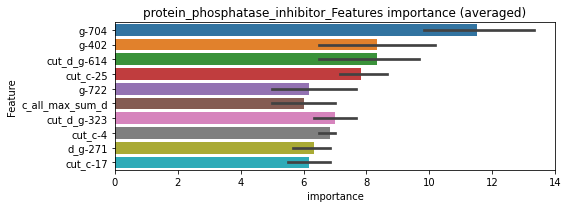

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0158966	valid_1's binary_logloss: 0.0239424
[200]	training's binary_logloss: 0.00243242	valid_1's binary_logloss: 0.00963023
[300]	training's binary_logloss: 0.000742571	valid_1's binary_logloss: 0.00763522
[400]	training's binary_logloss: 0.000372954	valid_1's binary_logloss: 0.00700835
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000381913	valid_1's binary_logloss: 0.0069798


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0157098	valid_1's binary_logloss: 0.02463
[200]	training's binary_logloss: 0.00242477	valid_1's binary_logloss: 0.0101915
[300]	training's binary_logloss: 0.000759129	valid_1's binary_logloss: 0.00817133
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.000548856	valid_1's binary_logloss: 0.00792229


protein_phosphatase_inhibitor logloss: 0.007450984614899916


neg labels: 3289 → selected neg labels: 3271


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3271, target_rate: 0.0043252 → Adj_target_rate: 0.0043163
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0268095	valid_1's binary_logloss: 0.0941308
Early stopping, best iteration is:
[160]	training's binary_logloss: 0.00896964	valid_1's binary_logloss: 0.0862944
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0290527	valid_1's binary_logloss: 0.0839763
Early stopping, best iteration is:
[175]	training's binary_logloss: 0.00802802	valid_1's binary_logloss: 0.0700354


1 / 3 AUC score:0.994
y_Threshold: 0.0196688, Threshold: 0.1074877, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 163 → Positive_corect_labels: 638/3762
p_label_rate: 0.0200904 Vs.target_rate: 0.00433
Num_p_label: 80.0, conf_0:0.09674, conf_1:0.11824
Num_p_label: 80.0, Expected: 17.2, Adj_threshold_1: 0.1074877
Num_p_label: 69.0, Expected: 17.2, Adj_threshold_2: 0.1174877
Num_p_label: 62.0, Expected: 17.2, Adj_threshold_3: 0.1274877
Num_p_label: 58.0, Expected: 17.2, Adj_threshold_4: 0.1374877
Num_p_label: 52.0, Expected: 17.2, Adj_threshold_5: 0.1474877
Num_p_label: 44.0, Expected: 17.2, Adj_threshold_6: 0.1574877
Num_p_label: 40.0, Expected: 17.2, Adj_threshold_7: 0.1674877
Num_p_label: 38.0, Expected: 17.2, Adj_threshold_8: 0.1774877
Num_p_label: 33.0, Expected: 17.2, Adj_threshold_9: 0.1874877
threshold: 0.1874877, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 638.0/3762, y_label_rate: 0.1695906
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0231988	valid_1's binary_logloss: 0.0744977
[200]	training's binary_logloss: 0.00426762	valid_1's binary_logloss: 0.061617
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00283295	valid_1's binary_logloss: 0.0605426
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0233295	valid_1's binary_logloss: 0.0770846
[200]	training's binary_logloss: 0.00424339	valid_1's binary_logloss: 0.0657665
Early stopping, best iteration is:
[219]	training's binary_logloss: 0.00336769	valid_1's binary_logloss: 0.0653717


2 / 3 AUC score:0.997
y_Threshold: 0.0321450, Threshold: 0.1874877, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 52 → Positive_corect_labels: 612.0/3710
p_label_rate: 0.0439478 Vs.target_rate: 0.00433
Num_p_label: 175.0, conf_0:0.16874, conf_1:0.20624
Num_p_label: 175.0, Expected: 17.2, Adj_threshold_1: 0.1874877
Num_p_label: 172.0, Expected: 17.2, Adj_threshold_2: 0.1974877
Num_p_label: 166.0, Expected: 17.2, Adj_threshold_3: 0.2074877
Num_p_label: 165.0, Expected: 17.2, Adj_threshold_4: 0.2174877
Num_p_label: 163.0, Expected: 17.2, Adj_threshold_5: 0.2274877
Num_p_label: 161.0, Expected: 17.2, Adj_threshold_6: 0.2374877
Num_p_label: 156.0, Expected: 17.2, Adj_threshold_7: 0.2474877
Num_p_label: 152.0, Expected: 17.2, Adj_threshold_8: 0.2574877
Num_p_label: 149.0, Expected: 17.2, Adj_threshold_9: 0.2674877
Num_p_label: 147.0, Expected: 17.2, Adj_threshold_10: 0.2774877
threshold: 0.2874877, positive_p_label: 143.0/3982, p_label_rate: 0.0359116
positive_y_label: 612.0/3710, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0160782	valid_1's binary_logloss: 0.0607174
Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00391622	valid_1's binary_logloss: 0.0500427
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0196935	valid_1's binary_logloss: 0.0470309
[200]	training's binary_logloss: 0.00361388	valid_1's binary_logloss: 0.0309293
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.002287	valid_1's binary_logloss: 0.0291128


3 / 3 AUC score:0.999
y_Threshold: 0.0448408, Threshold: 0.2874877, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 30 → Positive_corect_labels: 597.0/3680
p_label_rate: 0.0469613 Vs.target_rate: 0.00433
Num_p_label: 187.0, conf_0:0.25874, conf_1:0.31624
Num_p_label: 187.0, Expected: 17.2, Adj_threshold_1: 0.2874877
Num_p_label: 187.0, Expected: 17.2, Adj_threshold_2: 0.2974877
Num_p_label: 187.0, Expected: 17.2, Adj_threshold_3: 0.3074877
Num_p_label: 186.0, Expected: 17.2, Adj_threshold_4: 0.3174877
Num_p_label: 184.0, Expected: 17.2, Adj_threshold_5: 0.3274877
Num_p_label: 183.0, Expected: 17.2, Adj_threshold_6: 0.3374877
Num_p_label: 182.0, Expected: 17.2, Adj_threshold_7: 0.3474877
Num_p_label: 180.0, Expected: 17.2, Adj_threshold_8: 0.3574877
Num_p_label: 180.0, Expected: 17.2, Adj_threshold_9: 0.3674877
Num_p_label: 178.0, Expected: 17.2, Adj_threshold_10: 0.3774877
threshold: 0.3874877, positive_p_label: 178.0/3982, p_label_rate: 0.0447012
positive_y_label: 775.0/7662, y_label_ra

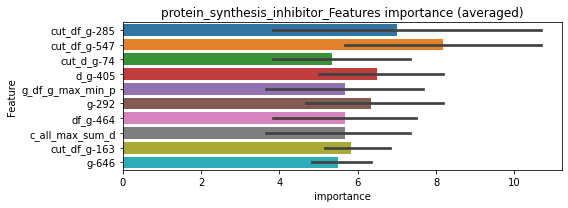

len(train_index) : 3831
len(valid_index) : 3831
================================= fold 1/2 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0276513	valid_1's binary_logloss: 0.0485767
[200]	training's binary_logloss: 0.00602851	valid_1's binary_logloss: 0.0265895
[300]	training's binary_logloss: 0.00208424	valid_1's binary_logloss: 0.02252
[400]	training's binary_logloss: 0.00101737	valid_1's binary_logloss: 0.0206871
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000844211	valid_1's binary_logloss: 0.0203324


len(train_index) : 3831
len(valid_index) : 3831
================================= fold 2/2 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0270839	valid_1's binary_logloss: 0.0471331
[200]	training's binary_logloss: 0.00586534	valid_1's binary_logloss: 0.0258401
[300]	training's binary_logloss: 0.00199357	valid_1's binary_logloss: 0.0215058
[400]	training's binary_logloss: 0.000974412	valid_1's binary_logloss: 0.0201896
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000951678	valid_1's binary_logloss: 0.0201484


protein_synthesis_inhibitor logloss: 0.020240429140264814


neg labels: 3289 → selected neg labels: 3285


protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3285, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00703989	valid_1's binary_logloss: 0.0226799
[200]	training's binary_logloss: 0.000924482	valid_1's binary_logloss: 0.0150018
Early stopping, best iteration is:
[227]	training's binary_logloss: 0.000694035	valid_1's binary_logloss: 0.0143904
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00846454	valid_1's binary_logloss: 0.0110748
[200]	training's binary_logloss: 0.00110705	valid_1's binary_logloss: 0.0031006
[300]	training's binary_logloss: 0.000529592	valid_1's binary_logloss: 0.00224458
[400]	training's binary_logloss: 0.000425763	valid_1's binary_logloss: 0.0021039
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000430456	valid_1's binary_logloss: 0.00209321


1 / 3 AUC score:1.000
y_Threshold: 0.0011117, Threshold: 0.0014101, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00080
Num_p_label: 80.0, conf_0:0.00127, conf_1:0.00155
Num_p_label: 80.0, Expected: 3.2, Adj_threshold_1: 0.0014101
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_2: 0.0114101
threshold: 0.0114101, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00718598	valid_1's binary_logloss: 0.0234559
[200]	training's binary_logloss: 0.000937793	valid_1's binary_logloss: 0.0157136
Early stopping, best iteration is:
[226]	training's binary_logloss: 0.000714254	valid_1's binary_logloss: 0.0152736
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00859142	valid_1's binary_logloss: 0.0114487
[200]	training's binary_logloss: 0.00111878	valid_1's binary_logloss: 0.00320176
[300]	training's binary_logloss: 0.000540956	valid_1's binary_logloss: 0.0023618
[400]	training's binary_logloss: 0.000444484	valid_1's binary_logloss: 0.00221741
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.000446971	valid_1's binary_logloss: 0.00221212


2 / 3 AUC score:1.000
y_Threshold: 0.0122415, Threshold: 0.0114101, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00080
Num_p_label: 0.0, conf_0:0.01027, conf_1:0.01255
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0114101
Num_p_label: 194.0, Expected: 3.2, Adj_threshold_2: 0.0014101
threshold: 0.0014101, positive_p_label: 194.0/3982, p_label_rate: 0.0487192
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00718598	valid_1's binary_logloss: 0.0234559
[200]	training's binary_logloss: 0.000937793	valid_1's binary_logloss: 0.0157136
Early stopping, best iteration is:
[226]	training's binary_logloss: 0.000714254	valid_1's binary_logloss: 0.0152736
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00859142	valid_1's binary_logloss: 0.0114487
[200]	training's binary_logloss: 0.00111878	valid_1's binary_logloss: 0.00320176
[300]	training's binary_logloss: 0.000540956	valid_1's binary_logloss: 0.0023618
[400]	training's binary_logloss: 0.000444484	valid_1's binary_logloss: 0.00221741
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.000446971	valid_1's binary_logloss: 0.00221212


3 / 3 AUC score:1.000
y_Threshold: 0.0122415, Threshold: 0.0014101, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0487192 Vs.target_rate: 0.00080
Num_p_label: 194.0, conf_0:0.00127, conf_1:0.00155
Num_p_label: 194.0, Expected: 3.2, Adj_threshold_1: 0.0014101
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_2: 0.0114101
threshold: 0.0114101, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7792, y_label_rate: 0.0843172


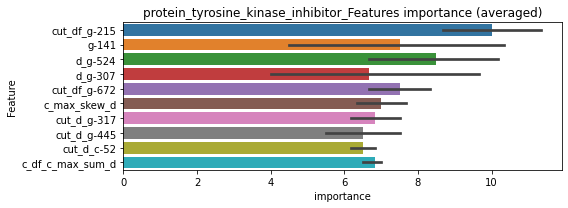

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0136692	valid_1's binary_logloss: 0.0255083
[200]	training's binary_logloss: 0.00191622	valid_1's binary_logloss: 0.0123015
[300]	training's binary_logloss: 0.000577003	valid_1's binary_logloss: 0.0106398
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.000463438	valid_1's binary_logloss: 0.0104379


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0148301	valid_1's binary_logloss: 0.0173456
[200]	training's binary_logloss: 0.0022918	valid_1's binary_logloss: 0.00413998
[300]	training's binary_logloss: 0.000683885	valid_1's binary_logloss: 0.00226483
[400]	training's binary_logloss: 0.000350269	valid_1's binary_logloss: 0.00175511
[500]	training's binary_logloss: 0.000253206	valid_1's binary_logloss: 0.00159753
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000247847	valid_1's binary_logloss: 0.00159313


protein_tyrosine_kinase_inhibitor logloss: 0.006015525187596758


neg labels: 3289 → selected neg labels: 3281


radiopaque_medium, len(trt): 56, len(othr): 3281, target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0172159	valid_1's binary_logloss: 0.072137
Early stopping, best iteration is:
[164]	training's binary_logloss: 0.00470089	valid_1's binary_logloss: 0.0654502
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0227954	valid_1's binary_logloss: 0.0509044
[200]	training's binary_logloss: 0.00404407	valid_1's binary_logloss: 0.0335286
[300]	training's binary_logloss: 0.00151882	valid_1's binary_logloss: 0.0307997
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.00154606	valid_1's binary_logloss: 0.0307551


1 / 3 AUC score:0.999
y_Threshold: 0.0078163, Threshold: 0.0073862, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 140 → Positive_corect_labels: 652/3797
p_label_rate: 0.0200904 Vs.target_rate: 0.00235
Num_p_label: 80.0, conf_0:0.00665, conf_1:0.00812
Num_p_label: 80.0, Expected: 9.4, Adj_threshold_1: 0.0073862
Num_p_label: 0.0, Expected: 9.4, Adj_threshold_2: 0.0173862
threshold: 0.0173862, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.019002	valid_1's binary_logloss: 0.0602789
[200]	training's binary_logloss: 0.00313005	valid_1's binary_logloss: 0.0518012
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.00357411	valid_1's binary_logloss: 0.0516199
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0201503	valid_1's binary_logloss: 0.0593223
[200]	training's binary_logloss: 0.0034748	valid_1's binary_logloss: 0.0476376
Early stopping, best iteration is:
[220]	training's binary_logloss: 0.00265664	valid_1's binary_logloss: 0.0467424


2 / 3 AUC score:1.000
y_Threshold: 0.0167359, Threshold: 0.0173862, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 646.0/3785
p_label_rate: 0.0002511 Vs.target_rate: 0.00235
Num_p_label: 1.0, conf_0:0.01565, conf_1:0.01912
Num_p_label: 1.0, Expected: 9.4, Adj_threshold_1: 0.0173862
Num_p_label: 145.0, Expected: 9.4, Adj_threshold_2: 0.0073862
threshold: 0.0073862, positive_p_label: 145.0/3982, p_label_rate: 0.0364139
positive_y_label: 646.0/3785, y_label_rate: 0.1706737
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0181949	valid_1's binary_logloss: 0.061059
Early stopping, best iteration is:
[178]	training's binary_logloss: 0.00389108	valid_1's binary_logloss: 0.0508859
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0200419	valid_1's binary_logloss: 0.0436843
[200]	training's binary_logloss: 0.00336274	valid_1's binary_logloss: 0.0303918
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.0037577	valid_1's binary_logloss: 0.0303187


3 / 3 AUC score:1.000
y_Threshold: 0.0195157, Threshold: 0.0073862, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 642.0/3777
p_label_rate: 0.0590156 Vs.target_rate: 0.00235
Num_p_label: 235.0, conf_0:0.00665, conf_1:0.00812
Num_p_label: 235.0, Expected: 9.4, Adj_threshold_1: 0.0073862
Num_p_label: 5.0, Expected: 9.4, Adj_threshold_2: 0.0173862
threshold: 0.0173862, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 647.0/7759, y_label_rate: 0.0833870


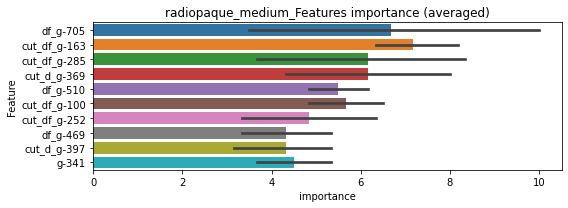

len(train_index) : 3879
len(valid_index) : 3880
================================= fold 1/2 radiopaque_medium=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0251114	valid_1's binary_logloss: 0.0469431
[200]	training's binary_logloss: 0.0056296	valid_1's binary_logloss: 0.030545
Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00246673	valid_1's binary_logloss: 0.0290132


len(train_index) : 3880
len(valid_index) : 3879
================================= fold 2/2 radiopaque_medium=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0271907	valid_1's binary_logloss: 0.0422088
[200]	training's binary_logloss: 0.00638535	valid_1's binary_logloss: 0.0239812
[300]	training's binary_logloss: 0.00219454	valid_1's binary_logloss: 0.020536
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00138071	valid_1's binary_logloss: 0.0199259


radiopaque_medium logloss: 0.02447011475126318


neg labels: 3289 → selected neg labels: 3280


raf_inhibitor, len(trt): 223, len(othr): 3280, target_rate: 0.0093642 → Adj_target_rate: 0.0083226
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0128333	valid_1's binary_logloss: 0.0601334
Early stopping, best iteration is:
[156]	training's binary_logloss: 0.00377617	valid_1's binary_logloss: 0.0508599
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0143398	valid_1's binary_logloss: 0.040065
[200]	training's binary_logloss: 0.00216544	valid_1's binary_logloss: 0.0259029
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.00110466	valid_1's binary_logloss: 0.0237614


1 / 3 AUC score:0.999
y_Threshold: 0.0094458, Threshold: 0.0310696, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 140 → Positive_corect_labels: 652/3796
p_label_rate: 0.0200904 Vs.target_rate: 0.00936
Num_p_label: 80.0, conf_0:0.02796, conf_1:0.03418
threshold: 0.0310696, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.010547	valid_1's binary_logloss: 0.0659209
Early stopping, best iteration is:
[152]	training's binary_logloss: 0.00318079	valid_1's binary_logloss: 0.0596689
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0123709	valid_1's binary_logloss: 0.0332085
[200]	training's binary_logloss: 0.0017177	valid_1's binary_logloss: 0.0214697
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.000875601	valid_1's binary_logloss: 0.0200704


2 / 3 AUC score:0.998
y_Threshold: 0.0364096, Threshold: 0.0310696, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 30 → Positive_corect_labels: 637.0/3766
p_label_rate: 0.0369161 Vs.target_rate: 0.00936
Num_p_label: 147.0, conf_0:0.02796, conf_1:0.03418
Num_p_label: 147.0, Expected: 37.3, Adj_threshold_1: 0.0310696
Num_p_label: 124.0, Expected: 37.3, Adj_threshold_2: 0.0410696
Num_p_label: 112.0, Expected: 37.3, Adj_threshold_3: 0.0510696
Num_p_label: 96.0, Expected: 37.3, Adj_threshold_4: 0.0610696
Num_p_label: 89.0, Expected: 37.3, Adj_threshold_5: 0.0710696
Num_p_label: 77.0, Expected: 37.3, Adj_threshold_6: 0.0810696
Num_p_label: 72.0, Expected: 37.3, Adj_threshold_7: 0.0910696
threshold: 0.0910696, positive_p_label: 72.0/3982, p_label_rate: 0.0180814
positive_y_label: 637.0/3766, y_label_rate: 0.1691450
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0105187	valid_1's binary_logloss: 0.0344854
[200]	training's binary_logloss: 0.00137522	valid_1's binary_logloss: 0.0227126
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.000759212	valid_1's binary_logloss: 0.0215492
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00978763	valid_1's binary_logloss: 0.053278
Early stopping, best iteration is:
[117]	training's binary_logloss: 0.00615378	valid_1's binary_logloss: 0.0494652


3 / 3 AUC score:0.998
y_Threshold: 0.0506914, Threshold: 0.0910696, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 26 → Positive_corect_labels: 624.0/3740
p_label_rate: 0.0220994 Vs.target_rate: 0.00936
Num_p_label: 88.0, conf_0:0.08196, conf_1:0.10018
threshold: 0.0910696, positive_p_label: 88.0/3982, p_label_rate: 0.0220994
positive_y_label: 712.0/7722, y_label_rate: 0.0922041


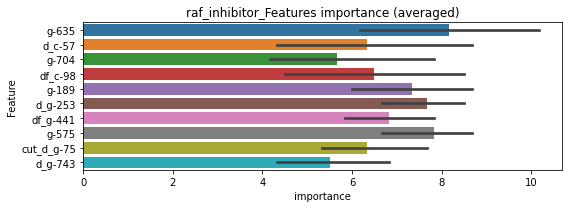

len(train_index) : 3861
len(valid_index) : 3861
================================= fold 1/2 raf_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0213974	valid_1's binary_logloss: 0.0517328
[200]	training's binary_logloss: 0.00388452	valid_1's binary_logloss: 0.0385099
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00297122	valid_1's binary_logloss: 0.0381089


len(train_index) : 3861
len(valid_index) : 3861
================================= fold 2/2 raf_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0224507	valid_1's binary_logloss: 0.0424815
[200]	training's binary_logloss: 0.00418181	valid_1's binary_logloss: 0.0257503
[300]	training's binary_logloss: 0.00139581	valid_1's binary_logloss: 0.0225157
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.000974873	valid_1's binary_logloss: 0.0218228


raf_inhibitor logloss: 0.029965863999523397


neg labels: 3289 → selected neg labels: 3287


ras_gtpase_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00519752	valid_1's binary_logloss: 0.0120913
[200]	training's binary_logloss: 0.000623592	valid_1's binary_logloss: 0.00595521
Early stopping, best iteration is:
[232]	training's binary_logloss: 0.000459713	valid_1's binary_logloss: 0.00567603
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00542572	valid_1's binary_logloss: 0.00870823
[200]	training's binary_logloss: 0.000664728	valid_1's binary_logloss: 0.00316283
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000360979	valid_1's binary_logloss: 0.00270658


1 / 3 AUC score:1.000
y_Threshold: 0.0007730, Threshold: 0.0009038, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00081, conf_1:0.00099
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0009038
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0109038
threshold: 0.0109038, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00516285	valid_1's binary_logloss: 0.0130574
[200]	training's binary_logloss: 0.000625739	valid_1's binary_logloss: 0.00694547
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.000357054	valid_1's binary_logloss: 0.00644394
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00570537	valid_1's binary_logloss: 0.00923834
[200]	training's binary_logloss: 0.000693748	valid_1's binary_logloss: 0.00345759
[300]	training's binary_logloss: 0.000362467	valid_1's binary_logloss: 0.00287534
Early stopping, best iteration is:
[303]	training's binary_logloss: 0.000360595	valid_1's binary_logloss: 0.00286706


2 / 3 AUC score:1.000
y_Threshold: 0.0076955, Threshold: 0.0109038, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, conf_0:0.00981, conf_1:0.01199
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0109038
Num_p_label: 104.0, Expected: 2.0, Adj_threshold_2: 0.0009038
threshold: 0.0009038, positive_p_label: 104.0/3982, p_label_rate: 0.0261175
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00516285	valid_1's binary_logloss: 0.0130574
[200]	training's binary_logloss: 0.000625739	valid_1's binary_logloss: 0.00694547
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.000357054	valid_1's binary_logloss: 0.00644394
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00570537	valid_1's binary_logloss: 0.00923834
[200]	training's binary_logloss: 0.000693748	valid_1's binary_logloss: 0.00345759
[300]	training's binary_logloss: 0.000362467	valid_1's binary_logloss: 0.00287534
Early stopping, best iteration is:
[303]	training's binary_logloss: 0.000360595	valid_1's binary_logloss: 0.00286706


3 / 3 AUC score:1.000
y_Threshold: 0.0076955, Threshold: 0.0009038, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0261175 Vs.target_rate: 0.00050
Num_p_label: 104.0, conf_0:0.00081, conf_1:0.00099
Num_p_label: 104.0, Expected: 2.0, Adj_threshold_1: 0.0009038
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0109038
threshold: 0.0109038, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7794, y_label_rate: 0.0842956


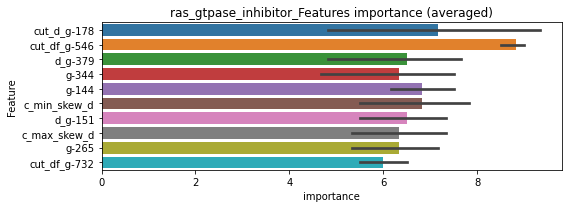

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0114731	valid_1's binary_logloss: 0.0173639
[200]	training's binary_logloss: 0.00133568	valid_1's binary_logloss: 0.00577537
[300]	training's binary_logloss: 0.000387468	valid_1's binary_logloss: 0.00442905
[400]	training's binary_logloss: 0.000207498	valid_1's binary_logloss: 0.00415396
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00017903	valid_1's binary_logloss: 0.00406992


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0121071	valid_1's binary_logloss: 0.0138841
[200]	training's binary_logloss: 0.00148248	valid_1's binary_logloss: 0.00306298
[300]	training's binary_logloss: 0.000426068	valid_1's binary_logloss: 0.00176916
[400]	training's binary_logloss: 0.000228053	valid_1's binary_logloss: 0.00152773
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000184559	valid_1's binary_logloss: 0.00144319


ras_gtpase_inhibitor logloss: 0.002756554124444093


neg labels: 3289 → selected neg labels: 3278


retinoid_receptor_agonist, len(trt): 67, len(othr): 3278, target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.018407	valid_1's binary_logloss: 0.0621981
[200]	training's binary_logloss: 0.00313607	valid_1's binary_logloss: 0.048018
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00340428	valid_1's binary_logloss: 0.0479058
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0213149	valid_1's binary_logloss: 0.0576
[200]	training's binary_logloss: 0.00355863	valid_1's binary_logloss: 0.0424796
[300]	training's binary_logloss: 0.00133435	valid_1's binary_logloss: 0.0395162
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00139378	valid_1's binary_logloss: 0.0393521


1 / 3 AUC score:0.999
y_Threshold: 0.0060785, Threshold: 0.0059776, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 653/3797
p_label_rate: 0.0200904 Vs.target_rate: 0.00281
Num_p_label: 80.0, conf_0:0.00538, conf_1:0.00658
Num_p_label: 80.0, Expected: 11.2, Adj_threshold_1: 0.0059776
Num_p_label: 11.0, Expected: 11.2, Adj_threshold_2: 0.0159776
threshold: 0.0159776, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0198584	valid_1's binary_logloss: 0.0601581
[200]	training's binary_logloss: 0.0033113	valid_1's binary_logloss: 0.0477115
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.00217067	valid_1's binary_logloss: 0.0458046
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0208438	valid_1's binary_logloss: 0.052303
[200]	training's binary_logloss: 0.00345809	valid_1's binary_logloss: 0.039108
[300]	training's binary_logloss: 0.00132615	valid_1's binary_logloss: 0.0363211
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00113342	valid_1's binary_logloss: 0.0359538


2 / 3 AUC score:1.000
y_Threshold: 0.0127913, Threshold: 0.0159776, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 651.0/3793
p_label_rate: 0.0025113 Vs.target_rate: 0.00281
Num_p_label: 10.0, conf_0:0.01438, conf_1:0.01758
threshold: 0.0159776, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 651.0/3793, y_label_rate: 0.1716320
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0178309	valid_1's binary_logloss: 0.0667228
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.003615	valid_1's binary_logloss: 0.0554619
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0219986	valid_1's binary_logloss: 0.048473
[200]	training's binary_logloss: 0.0036744	valid_1's binary_logloss: 0.0314328
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.00218705	valid_1's binary_logloss: 0.0293773


3 / 3 AUC score:1.000
y_Threshold: 0.0144920, Threshold: 0.0159776, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 10 → Positive_corect_labels: 646.0/3783
p_label_rate: 0.0025113 Vs.target_rate: 0.00281
Num_p_label: 10.0, conf_0:0.01438, conf_1:0.01758
threshold: 0.0159776, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/7765, y_label_rate: 0.0844816


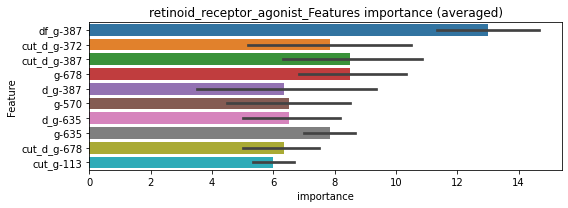

len(train_index) : 3882
len(valid_index) : 3883
================================= fold 1/2 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0243375	valid_1's binary_logloss: 0.061528
[200]	training's binary_logloss: 0.00517231	valid_1's binary_logloss: 0.0460784
Early stopping, best iteration is:
[255]	training's binary_logloss: 0.00267539	valid_1's binary_logloss: 0.0444949


len(train_index) : 3883
len(valid_index) : 3882
================================= fold 2/2 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0300667	valid_1's binary_logloss: 0.0463733
[200]	training's binary_logloss: 0.00720275	valid_1's binary_logloss: 0.0247906
[300]	training's binary_logloss: 0.00238533	valid_1's binary_logloss: 0.0193615
[400]	training's binary_logloss: 0.00112788	valid_1's binary_logloss: 0.0177578
[500]	training's binary_logloss: 0.000665767	valid_1's binary_logloss: 0.0167726
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000644886	valid_1's binary_logloss: 0.0167053


retinoid_receptor_agonist logloss: 0.030601899265879175


neg labels: 3289 → selected neg labels: 3288


retinoid_receptor_antagonist, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00336906	valid_1's binary_logloss: 0.00616259
[200]	training's binary_logloss: 0.000339646	valid_1's binary_logloss: 0.00252872
Early stopping, best iteration is:
[223]	training's binary_logloss: 0.000282605	valid_1's binary_logloss: 0.00245065
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0035399	valid_1's binary_logloss: 0.00387368
[200]	training's binary_logloss: 0.000372526	valid_1's binary_logloss: 0.000574328
[300]	training's binary_logloss: 0.000233388	valid_1's binary_logloss: 0.000435173
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00021976	valid_1's binary_logloss: 0.000422827


1 / 3 AUC score:1.000
y_Threshold: 0.0003997, Threshold: 0.0004899, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00044, conf_1:0.00054
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0004899
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0104899
threshold: 0.0104899, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00348447	valid_1's binary_logloss: 0.00573839
[200]	training's binary_logloss: 0.000345987	valid_1's binary_logloss: 0.00227911
Early stopping, best iteration is:
[223]	training's binary_logloss: 0.000287971	valid_1's binary_logloss: 0.00221163
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00355699	valid_1's binary_logloss: 0.00382205
[200]	training's binary_logloss: 0.000372437	valid_1's binary_logloss: 0.000550913
[300]	training's binary_logloss: 0.000237557	valid_1's binary_logloss: 0.00040918
[400]	training's binary_logloss: 0.000217333	valid_1's binary_logloss: 0.000385943
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000216948	valid_1's binary_logloss: 0.000385217


2 / 3 AUC score:1.000
y_Threshold: 0.0092071, Threshold: 0.0104899, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00025
Num_p_label: 0.0, conf_0:0.00944, conf_1:0.01154
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0104899
Num_p_label: 132.0, Expected: 1.0, Adj_threshold_2: 0.0004899
threshold: 0.0004899, positive_p_label: 132.0/3982, p_label_rate: 0.0331492
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00348447	valid_1's binary_logloss: 0.00573839
[200]	training's binary_logloss: 0.000345987	valid_1's binary_logloss: 0.00227911
Early stopping, best iteration is:
[223]	training's binary_logloss: 0.000287971	valid_1's binary_logloss: 0.00221163
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00355699	valid_1's binary_logloss: 0.00382205
[200]	training's binary_logloss: 0.000372437	valid_1's binary_logloss: 0.000550913
[300]	training's binary_logloss: 0.000237557	valid_1's binary_logloss: 0.00040918
[400]	training's binary_logloss: 0.000217333	valid_1's binary_logloss: 0.000385943
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000216948	valid_1's binary_logloss: 0.000385217


3 / 3 AUC score:1.000
y_Threshold: 0.0092071, Threshold: 0.0004899, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0331492 Vs.target_rate: 0.00025
Num_p_label: 132.0, conf_0:0.00044, conf_1:0.00054
Num_p_label: 132.0, Expected: 1.0, Adj_threshold_1: 0.0004899
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0104899
threshold: 0.0104899, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7795, y_label_rate: 0.0842848


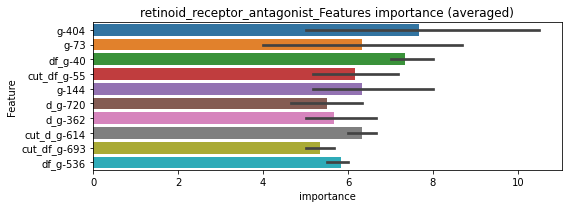

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00939485	valid_1's binary_logloss: 0.0116963
[200]	training's binary_logloss: 0.000859708	valid_1's binary_logloss: 0.00248874
[300]	training's binary_logloss: 0.000216015	valid_1's binary_logloss: 0.00164031
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.000175759	valid_1's binary_logloss: 0.00158764


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00965393	valid_1's binary_logloss: 0.00994128
[200]	training's binary_logloss: 0.000914591	valid_1's binary_logloss: 0.00106045
[300]	training's binary_logloss: 0.000233552	valid_1's binary_logloss: 0.000320044
[400]	training's binary_logloss: 0.000136415	valid_1's binary_logloss: 0.000212332
[500]	training's binary_logloss: 0.000115742	valid_1's binary_logloss: 0.000190521
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000109115	valid_1's binary_logloss: 0.000184841


retinoid_receptor_antagonist logloss: 0.0008864376704278105


neg labels: 3289 → selected neg labels: 3283


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3283, target_rate: 0.0014697 → Adj_target_rate: 0.0017245
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00977292	valid_1's binary_logloss: 0.0344404
[200]	training's binary_logloss: 0.00139073	valid_1's binary_logloss: 0.0254229
Early stopping, best iteration is:
[231]	training's binary_logloss: 0.00098329	valid_1's binary_logloss: 0.0248114
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0119249	valid_1's binary_logloss: 0.0236829
[200]	training's binary_logloss: 0.00175647	valid_1's binary_logloss: 0.0127256
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.000790866	valid_1's binary_logloss: 0.0112915


1 / 3 AUC score:1.000
y_Threshold: 0.0020935, Threshold: 0.0025233, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00147
Num_p_label: 80.0, conf_0:0.00227, conf_1:0.00278
Num_p_label: 80.0, Expected: 5.9, Adj_threshold_1: 0.0025233
Num_p_label: 2.0, Expected: 5.9, Adj_threshold_2: 0.0125233
threshold: 0.0125233, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00988965	valid_1's binary_logloss: 0.0341977
[200]	training's binary_logloss: 0.0013858	valid_1's binary_logloss: 0.0254453
Early stopping, best iteration is:
[231]	training's binary_logloss: 0.00098446	valid_1's binary_logloss: 0.024631
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0122687	valid_1's binary_logloss: 0.024143
[200]	training's binary_logloss: 0.00175179	valid_1's binary_logloss: 0.0124691
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.000777842	valid_1's binary_logloss: 0.0108832


2 / 3 AUC score:1.000
y_Threshold: 0.0075603, Threshold: 0.0125233, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0010045 Vs.target_rate: 0.00147
Num_p_label: 4.0, conf_0:0.01127, conf_1:0.01378
threshold: 0.0125233, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00988965	valid_1's binary_logloss: 0.0341977
[200]	training's binary_logloss: 0.0013858	valid_1's binary_logloss: 0.0254453
Early stopping, best iteration is:
[231]	training's binary_logloss: 0.00098446	valid_1's binary_logloss: 0.024631
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0122687	valid_1's binary_logloss: 0.024143
[200]	training's binary_logloss: 0.00175179	valid_1's binary_logloss: 0.0124691
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.000777842	valid_1's binary_logloss: 0.0108832


3 / 3 AUC score:1.000
y_Threshold: 0.0075603, Threshold: 0.0125233, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0010045 Vs.target_rate: 0.00147
Num_p_label: 4.0, conf_0:0.01127, conf_1:0.01378
threshold: 0.0125233, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 660.0/7789, y_label_rate: 0.0847349


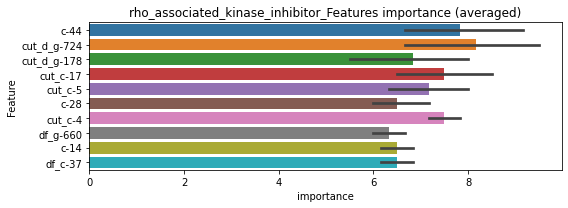

len(train_index) : 3894
len(valid_index) : 3895
================================= fold 1/2 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0183252	valid_1's binary_logloss: 0.0336343
[200]	training's binary_logloss: 0.0032495	valid_1's binary_logloss: 0.018671
[300]	training's binary_logloss: 0.00102277	valid_1's binary_logloss: 0.0165746
[400]	training's binary_logloss: 0.000498584	valid_1's binary_logloss: 0.0158332
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000415075	valid_1's binary_logloss: 0.0157016


len(train_index) : 3895
len(valid_index) : 3894
================================= fold 2/2 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0201384	valid_1's binary_logloss: 0.0314399
[200]	training's binary_logloss: 0.00357403	valid_1's binary_logloss: 0.0144619
[300]	training's binary_logloss: 0.0011267	valid_1's binary_logloss: 0.0116085
[400]	training's binary_logloss: 0.000539728	valid_1's binary_logloss: 0.0109138
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00048895	valid_1's binary_logloss: 0.0108002


rho_associated_kinase_inhibitor logloss: 0.013251212632206693


neg labels: 3289 → selected neg labels: 3282


ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3282, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00961209	valid_1's binary_logloss: 0.0279381
[200]	training's binary_logloss: 0.00135326	valid_1's binary_logloss: 0.018237
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.000781605	valid_1's binary_logloss: 0.0171674
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0111292	valid_1's binary_logloss: 0.0205811
[200]	training's binary_logloss: 0.00159463	valid_1's binary_logloss: 0.00919591
[300]	training's binary_logloss: 0.000685143	valid_1's binary_logloss: 0.00769077
Early stopping, best iteration is:
[300]	training's binary_logloss: 0.000685143	valid_1's binary_logloss: 0.00769077


1 / 3 AUC score:1.000
y_Threshold: 0.0018784, Threshold: 0.0027000, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0200904 Vs.target_rate: 0.00155
Num_p_label: 80.0, conf_0:0.00243, conf_1:0.00297
Num_p_label: 80.0, Expected: 6.2, Adj_threshold_1: 0.0027000
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_2: 0.0127000
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_3: 0.0227000
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_4: 0.0327000
threshold: 0.0327000, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0095252	valid_1's binary_logloss: 0.0273886
[200]	training's binary_logloss: 0.00131355	valid_1's binary_logloss: 0.0180601
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.000758378	valid_1's binary_logloss: 0.0172228
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0106305	valid_1's binary_logloss: 0.0189726
[200]	training's binary_logloss: 0.00148586	valid_1's binary_logloss: 0.00756449
[300]	training's binary_logloss: 0.000637983	valid_1's binary_logloss: 0.00621248
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.000659028	valid_1's binary_logloss: 0.00620215


2 / 3 AUC score:1.000
y_Threshold: 0.0065290, Threshold: 0.0327000, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0042692 Vs.target_rate: 0.00155
Num_p_label: 17.0, conf_0:0.02943, conf_1:0.03597
threshold: 0.0327000, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0095252	valid_1's binary_logloss: 0.0273886
[200]	training's binary_logloss: 0.00131355	valid_1's binary_logloss: 0.0180601
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.000758378	valid_1's binary_logloss: 0.0172228
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0106305	valid_1's binary_logloss: 0.0189726
[200]	training's binary_logloss: 0.00148586	valid_1's binary_logloss: 0.00756449
[300]	training's binary_logloss: 0.000637983	valid_1's binary_logloss: 0.00621248
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.000659028	valid_1's binary_logloss: 0.00620215


3 / 3 AUC score:1.000
y_Threshold: 0.0065290, Threshold: 0.0327000, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0042692 Vs.target_rate: 0.00155
Num_p_label: 17.0, conf_0:0.02943, conf_1:0.03597
threshold: 0.0327000, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 673.0/7788, y_label_rate: 0.0864150


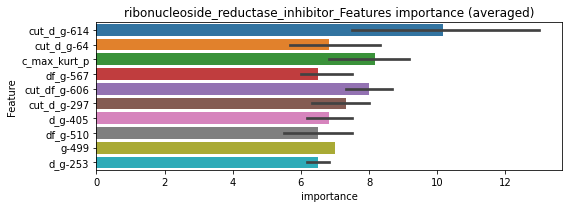

len(train_index) : 3894
len(valid_index) : 3894
================================= fold 1/2 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0162513	valid_1's binary_logloss: 0.0352293
[200]	training's binary_logloss: 0.00253153	valid_1's binary_logloss: 0.0207792
[300]	training's binary_logloss: 0.000788772	valid_1's binary_logloss: 0.0186472
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.000520721	valid_1's binary_logloss: 0.0181728


len(train_index) : 3894
len(valid_index) : 3894
================================= fold 2/2 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0197855	valid_1's binary_logloss: 0.0267011
[200]	training's binary_logloss: 0.00353756	valid_1's binary_logloss: 0.00913726
[300]	training's binary_logloss: 0.00113492	valid_1's binary_logloss: 0.00598996
[400]	training's binary_logloss: 0.000554632	valid_1's binary_logloss: 0.00518555
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000403914	valid_1's binary_logloss: 0.00487913


ribonucleoside_reductase_inhibitor logloss: 0.011525953760342975


neg labels: 3289 → selected neg labels: 3284


rna_polymerase_inhibitor, len(trt): 25, len(othr): 3284, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00927946	valid_1's binary_logloss: 0.0210619
[200]	training's binary_logloss: 0.00127052	valid_1's binary_logloss: 0.0112956
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.000813169	valid_1's binary_logloss: 0.0108039
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.009911	valid_1's binary_logloss: 0.0194843
[200]	training's binary_logloss: 0.0013445	valid_1's binary_logloss: 0.0097669
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.000852419	valid_1's binary_logloss: 0.00903181


1 / 3 AUC score:1.000
y_Threshold: 0.0019630, Threshold: 0.0164962, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00105
Num_p_label: 80.0, conf_0:0.01485, conf_1:0.01815
Num_p_label: 80.0, Expected: 4.2, Adj_threshold_1: 0.0164962
Num_p_label: 65.0, Expected: 4.2, Adj_threshold_2: 0.0264962
Num_p_label: 56.0, Expected: 4.2, Adj_threshold_3: 0.0364962
Num_p_label: 50.0, Expected: 4.2, Adj_threshold_4: 0.0464962
Num_p_label: 48.0, Expected: 4.2, Adj_threshold_5: 0.0564962
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_6: 0.0664962
Num_p_label: 36.0, Expected: 4.2, Adj_threshold_7: 0.0764962
Num_p_label: 33.0, Expected: 4.2, Adj_threshold_8: 0.0864962
Num_p_label: 29.0, Expected: 4.2, Adj_threshold_9: 0.0964962
Num_p_label: 25.0, Expected: 4.2, Adj_threshold_10: 0.1064962
threshold: 0.1164962, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00892943	valid_1's binary_logloss: 0.0199682
[200]	training's binary_logloss: 0.00123452	valid_1's binary_logloss: 0.0110059
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.0006062	valid_1's binary_logloss: 0.00994581
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00943775	valid_1's binary_logloss: 0.0190633
[200]	training's binary_logloss: 0.00126092	valid_1's binary_logloss: 0.00963374
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.000683787	valid_1's binary_logloss: 0.00887415


2 / 3 AUC score:1.000
y_Threshold: 0.0354847, Threshold: 0.1164962, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0231040 Vs.target_rate: 0.00105
Num_p_label: 92.0, conf_0:0.10485, conf_1:0.12815
Num_p_label: 92.0, Expected: 4.2, Adj_threshold_1: 0.1164962
Num_p_label: 92.0, Expected: 4.2, Adj_threshold_2: 0.1264962
Num_p_label: 90.0, Expected: 4.2, Adj_threshold_3: 0.1364962
Num_p_label: 89.0, Expected: 4.2, Adj_threshold_4: 0.1464962
Num_p_label: 87.0, Expected: 4.2, Adj_threshold_5: 0.1564962
Num_p_label: 84.0, Expected: 4.2, Adj_threshold_6: 0.1664962
Num_p_label: 82.0, Expected: 4.2, Adj_threshold_7: 0.1764962
Num_p_label: 82.0, Expected: 4.2, Adj_threshold_8: 0.1864962
Num_p_label: 81.0, Expected: 4.2, Adj_threshold_9: 0.1964962
Num_p_label: 81.0, Expected: 4.2, Adj_threshold_10: 0.2064962
threshold: 0.2164962, positive_p_label: 79.0/3982, p_label_rate: 0.0198393
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00873503	valid_1's binary_logloss: 0.0253149
[200]	training's binary_logloss: 0.00116288	valid_1's binary_logloss: 0.0154174
Early stopping, best iteration is:
[208]	training's binary_logloss: 0.00105322	valid_1's binary_logloss: 0.0151344
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00923134	valid_1's binary_logloss: 0.0154643
[200]	training's binary_logloss: 0.00126685	valid_1's binary_logloss: 0.00658329
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000599636	valid_1's binary_logloss: 0.0055096


3 / 3 AUC score:1.000
y_Threshold: 0.0467897, Threshold: 0.2164962, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0193370 Vs.target_rate: 0.00105
Num_p_label: 77.0, conf_0:0.19485, conf_1:0.23815
Num_p_label: 77.0, Expected: 4.2, Adj_threshold_1: 0.2164962
Num_p_label: 77.0, Expected: 4.2, Adj_threshold_2: 0.2264962
Num_p_label: 75.0, Expected: 4.2, Adj_threshold_3: 0.2364962
Num_p_label: 74.0, Expected: 4.2, Adj_threshold_4: 0.2464962
Num_p_label: 72.0, Expected: 4.2, Adj_threshold_5: 0.2564962
Num_p_label: 72.0, Expected: 4.2, Adj_threshold_6: 0.2664962
Num_p_label: 71.0, Expected: 4.2, Adj_threshold_7: 0.2764962
Num_p_label: 70.0, Expected: 4.2, Adj_threshold_8: 0.2864962
Num_p_label: 70.0, Expected: 4.2, Adj_threshold_9: 0.2964962
Num_p_label: 70.0, Expected: 4.2, Adj_threshold_10: 0.3064962
threshold: 0.3164962, positive_p_label: 70.0/3982, p_label_rate: 0.0175791
positive_y_label: 723.0/7784, y_label_rate: 0.0928828


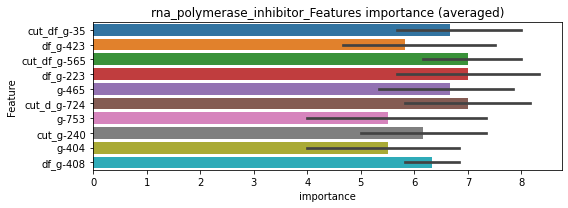

len(train_index) : 3892
len(valid_index) : 3892
================================= fold 1/2 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0183716	valid_1's binary_logloss: 0.0257359
[200]	training's binary_logloss: 0.00322583	valid_1's binary_logloss: 0.010636
[300]	training's binary_logloss: 0.001036	valid_1's binary_logloss: 0.00803087
[400]	training's binary_logloss: 0.000508028	valid_1's binary_logloss: 0.00737785
[500]	training's binary_logloss: 0.000344537	valid_1's binary_logloss: 0.00708196
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000349287	valid_1's binary_logloss: 0.00705647


len(train_index) : 3892
len(valid_index) : 3892
================================= fold 2/2 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0189608	valid_1's binary_logloss: 0.0284973
[200]	training's binary_logloss: 0.00330935	valid_1's binary_logloss: 0.0120768
[300]	training's binary_logloss: 0.00103059	valid_1's binary_logloss: 0.00935836
[400]	training's binary_logloss: 0.000512075	valid_1's binary_logloss: 0.00836184
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000441101	valid_1's binary_logloss: 0.00820407


rna_polymerase_inhibitor logloss: 0.007630266814296078


neg labels: 3289 → selected neg labels: 3249


serotonin_receptor_agonist, len(trt): 236, len(othr): 3249, target_rate: 0.0099101 → Adj_target_rate: 0.0087332
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.066452	valid_1's binary_logloss: 0.236832
Early stopping, best iteration is:
[114]	training's binary_logloss: 0.0541179	valid_1's binary_logloss: 0.235478
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0794949	valid_1's binary_logloss: 0.216314
Early stopping, best iteration is:
[144]	training's binary_logloss: 0.0439914	valid_1's binary_logloss: 0.210211


1 / 3 AUC score:0.909
y_Threshold: 0.0777843, Threshold: 0.0926072, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 423 → Positive_corect_labels: 503/3475
p_label_rate: 0.0200904 Vs.target_rate: 0.00991
Num_p_label: 80.0, conf_0:0.08335, conf_1:0.10187
threshold: 0.0926072, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 503.0/3475, y_label_rate: 0.1447482
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0363199	valid_1's binary_logloss: 0.123407
Early stopping, best iteration is:
[158]	training's binary_logloss: 0.0138465	valid_1's binary_logloss: 0.116973
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0368447	valid_1's binary_logloss: 0.120422
Early stopping, best iteration is:
[187]	training's binary_logloss: 0.0094132	valid_1's binary_logloss: 0.107998


2 / 3 AUC score:0.980
y_Threshold: 0.0381330, Threshold: 0.0926072, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 96 → Positive_corect_labels: 455.0/3379
p_label_rate: 0.0002511 Vs.target_rate: 0.00991
Num_p_label: 1.0, conf_0:0.08335, conf_1:0.10187
Num_p_label: 1.0, Expected: 39.5, Adj_threshold_1: 0.0926072
Num_p_label: 1.0, Expected: 39.5, Adj_threshold_2: 0.0826072
Num_p_label: 1.0, Expected: 39.5, Adj_threshold_3: 0.0726072
Num_p_label: 1.0, Expected: 39.5, Adj_threshold_4: 0.0626072
Num_p_label: 7.0, Expected: 39.5, Adj_threshold_5: 0.0526072
Num_p_label: 11.0, Expected: 39.5, Adj_threshold_6: 0.0426072
Num_p_label: 68.0, Expected: 39.5, Adj_threshold_7: 0.0326072
threshold: 0.0326072, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 455.0/3379, y_label_rate: 0.1346552
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0249124	valid_1's binary_logloss: 0.0836313
Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00532506	valid_1's binary_logloss: 0.0717562
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0240987	valid_1's binary_logloss: 0.0805497
Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00569617	valid_1's binary_logloss: 0.0679293


3 / 3 AUC score:0.991
y_Threshold: 0.0204953, Threshold: 0.0326072, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 34 → Positive_corect_labels: 438.0/3345
p_label_rate: 0.0005023 Vs.target_rate: 0.00991
Num_p_label: 2.0, conf_0:0.02935, conf_1:0.03587
Num_p_label: 2.0, Expected: 39.5, Adj_threshold_1: 0.0326072
Num_p_label: 8.0, Expected: 39.5, Adj_threshold_2: 0.0226072
Num_p_label: 169.0, Expected: 39.5, Adj_threshold_3: 0.0126072
threshold: 0.0126072, positive_p_label: 169.0/3982, p_label_rate: 0.0424410
positive_y_label: 607.0/7327, y_label_rate: 0.0828443


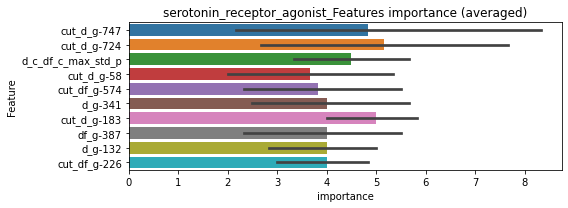

len(train_index) : 3663
len(valid_index) : 3664
================================= fold 1/2 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0602152	valid_1's binary_logloss: 0.133167
[200]	training's binary_logloss: 0.0216253	valid_1's binary_logloss: 0.119601
Early stopping, best iteration is:
[222]	training's binary_logloss: 0.0174963	valid_1's binary_logloss: 0.118798


len(train_index) : 3664
len(valid_index) : 3663
================================= fold 2/2 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0699111	valid_1's binary_logloss: 0.122345
[200]	training's binary_logloss: 0.0267669	valid_1's binary_logloss: 0.106128
Early stopping, best iteration is:
[229]	training's binary_logloss: 0.0206475	valid_1's binary_logloss: 0.105308


serotonin_receptor_agonist logloss: 0.11205389544769542


neg labels: 3289 → selected neg labels: 3220


serotonin_receptor_antagonist, len(trt): 404, len(othr): 3220, target_rate: 0.0169648 → Adj_target_rate: 0.0137918
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.108744	valid_1's binary_logloss: 0.336576
Early stopping, best iteration is:
[130]	training's binary_logloss: 0.0764515	valid_1's binary_logloss: 0.334873
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.10454	valid_1's binary_logloss: 0.335683
Early stopping, best iteration is:
[133]	training's binary_logloss: 0.0714173	valid_1's binary_logloss: 0.332304


1 / 3 AUC score:0.808
y_Threshold: 0.1226117, Threshold: 0.1584935, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 667 → Positive_corect_labels: 375/3197
p_label_rate: 0.0200904 Vs.target_rate: 0.01696
Num_p_label: 80.0, conf_0:0.14264, conf_1:0.17434
threshold: 0.1584935, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 375.0/3197, y_label_rate: 0.1172975
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0416874	valid_1's binary_logloss: 0.193522
Early stopping, best iteration is:
[132]	training's binary_logloss: 0.0246234	valid_1's binary_logloss: 0.190666
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0438796	valid_1's binary_logloss: 0.178799
Early stopping, best iteration is:
[134]	training's binary_logloss: 0.025515	valid_1's binary_logloss: 0.174646


2 / 3 AUC score:0.945
y_Threshold: 0.0676301, Threshold: 0.1584935, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 174 → Positive_corect_labels: 288.0/3023
p_label_rate: 0.0015068 Vs.target_rate: 0.01696
Num_p_label: 6.0, conf_0:0.14264, conf_1:0.17434
Num_p_label: 6.0, Expected: 67.6, Adj_threshold_1: 0.1584935
Num_p_label: 11.0, Expected: 67.6, Adj_threshold_2: 0.1484935
Num_p_label: 14.0, Expected: 67.6, Adj_threshold_3: 0.1384935
Num_p_label: 18.0, Expected: 67.6, Adj_threshold_4: 0.1284935
Num_p_label: 21.0, Expected: 67.6, Adj_threshold_5: 0.1184935
Num_p_label: 29.0, Expected: 67.6, Adj_threshold_6: 0.1084935
Num_p_label: 37.0, Expected: 67.6, Adj_threshold_7: 0.0984935
threshold: 0.0984935, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 288.0/3023, y_label_rate: 0.0952696
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0242988	valid_1's binary_logloss: 0.111861
Early stopping, best iteration is:
[125]	training's binary_logloss: 0.015149	valid_1's binary_logloss: 0.107025
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0221011	valid_1's binary_logloss: 0.111543
Early stopping, best iteration is:
[131]	training's binary_logloss: 0.012497	valid_1's binary_logloss: 0.10545


3 / 3 AUC score:0.982
y_Threshold: 0.0455680, Threshold: 0.0984935, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 60 → Positive_corect_labels: 258.0/2963
p_label_rate: 0.0037670 Vs.target_rate: 0.01696
Num_p_label: 15.0, conf_0:0.08864, conf_1:0.10834
Num_p_label: 15.0, Expected: 67.6, Adj_threshold_1: 0.0984935
Num_p_label: 18.0, Expected: 67.6, Adj_threshold_2: 0.0884935
Num_p_label: 25.0, Expected: 67.6, Adj_threshold_3: 0.0784935
Num_p_label: 36.0, Expected: 67.6, Adj_threshold_4: 0.0684935
threshold: 0.0684935, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 294.0/6945, y_label_rate: 0.0423326


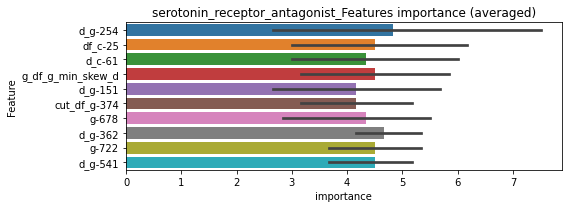

len(train_index) : 3472
len(valid_index) : 3473
================================= fold 1/2 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0232425	valid_1's binary_logloss: 0.0691257
[200]	training's binary_logloss: 0.00639785	valid_1's binary_logloss: 0.0542098
[300]	training's binary_logloss: 0.00241907	valid_1's binary_logloss: 0.0490838
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.00228466	valid_1's binary_logloss: 0.048731


len(train_index) : 3473
len(valid_index) : 3472
================================= fold 2/2 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0227868	valid_1's binary_logloss: 0.0622476
[200]	training's binary_logloss: 0.00605992	valid_1's binary_logloss: 0.0471976
[300]	training's binary_logloss: 0.00225386	valid_1's binary_logloss: 0.043681
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00142848	valid_1's binary_logloss: 0.0424212


serotonin_receptor_antagonist logloss: 0.04557656033330155


neg labels: 3289 → selected neg labels: 3281


serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3281, target_rate: 0.0018477 → Adj_target_rate: 0.0020948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0145222	valid_1's binary_logloss: 0.0513741
Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00245952	valid_1's binary_logloss: 0.0429002
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0166446	valid_1's binary_logloss: 0.0381239
[200]	training's binary_logloss: 0.00272256	valid_1's binary_logloss: 0.0258778
Early stopping, best iteration is:
[211]	training's binary_logloss: 0.00237041	valid_1's binary_logloss: 0.0254473


1 / 3 AUC score:1.000
y_Threshold: 0.0051528, Threshold: 0.0053421, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0200904 Vs.target_rate: 0.00185
Num_p_label: 80.0, conf_0:0.00481, conf_1:0.00588
Num_p_label: 80.0, Expected: 7.4, Adj_threshold_1: 0.0053421
Num_p_label: 0.0, Expected: 7.4, Adj_threshold_2: 0.0153421
threshold: 0.0153421, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0151441	valid_1's binary_logloss: 0.0451721
Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00279101	valid_1's binary_logloss: 0.0351266
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0154774	valid_1's binary_logloss: 0.0443782
[200]	training's binary_logloss: 0.00245658	valid_1's binary_logloss: 0.0337453
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00267294	valid_1's binary_logloss: 0.0336027


2 / 3 AUC score:1.000
y_Threshold: 0.0136343, Threshold: 0.0153421, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0002511 Vs.target_rate: 0.00185
Num_p_label: 1.0, conf_0:0.01381, conf_1:0.01688
Num_p_label: 1.0, Expected: 7.4, Adj_threshold_1: 0.0153421
Num_p_label: 197.0, Expected: 7.4, Adj_threshold_2: 0.0053421
threshold: 0.0053421, positive_p_label: 197.0/3982, p_label_rate: 0.0494726
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0133752	valid_1's binary_logloss: 0.0418857
Early stopping, best iteration is:
[177]	training's binary_logloss: 0.00288954	valid_1's binary_logloss: 0.0341055
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0145944	valid_1's binary_logloss: 0.0454454
[200]	training's binary_logloss: 0.00232396	valid_1's binary_logloss: 0.0327576
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00260385	valid_1's binary_logloss: 0.0325879


3 / 3 AUC score:1.000
y_Threshold: 0.0139294, Threshold: 0.0053421, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0361627 Vs.target_rate: 0.00185
Num_p_label: 144.0, conf_0:0.00481, conf_1:0.00588
Num_p_label: 144.0, Expected: 7.4, Adj_threshold_1: 0.0053421
Num_p_label: 0.0, Expected: 7.4, Adj_threshold_2: 0.0153421
threshold: 0.0153421, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 649.0/7773, y_label_rate: 0.0834941


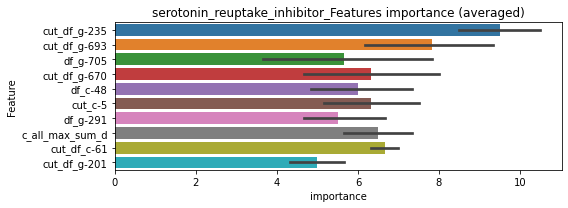

len(train_index) : 3886
len(valid_index) : 3887
================================= fold 1/2 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0202878	valid_1's binary_logloss: 0.0381623
[200]	training's binary_logloss: 0.00410376	valid_1's binary_logloss: 0.0224803
[300]	training's binary_logloss: 0.00135278	valid_1's binary_logloss: 0.0199887
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00112632	valid_1's binary_logloss: 0.019732


len(train_index) : 3887
len(valid_index) : 3886
================================= fold 2/2 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0232207	valid_1's binary_logloss: 0.0397675
[200]	training's binary_logloss: 0.00483317	valid_1's binary_logloss: 0.0218148
[300]	training's binary_logloss: 0.00156098	valid_1's binary_logloss: 0.0188982
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000806317	valid_1's binary_logloss: 0.0182248


serotonin_reuptake_inhibitor logloss: 0.018978494170653004


neg labels: 3289 → selected neg labels: 3283


sigma_receptor_agonist, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0114675	valid_1's binary_logloss: 0.0420665
[200]	training's binary_logloss: 0.0016824	valid_1's binary_logloss: 0.0348473
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00185713	valid_1's binary_logloss: 0.0347655
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0140933	valid_1's binary_logloss: 0.0292102
[200]	training's binary_logloss: 0.00218532	valid_1's binary_logloss: 0.0180006
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000951497	valid_1's binary_logloss: 0.0165583


1 / 3 AUC score:1.000
y_Threshold: 0.0034187, Threshold: 0.0036609, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00329, conf_1:0.00403
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0036609
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0136609
threshold: 0.0136609, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0119009	valid_1's binary_logloss: 0.0426691
[200]	training's binary_logloss: 0.0017309	valid_1's binary_logloss: 0.034141
Early stopping, best iteration is:
[217]	training's binary_logloss: 0.00141846	valid_1's binary_logloss: 0.0336593
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0144004	valid_1's binary_logloss: 0.0311876
[200]	training's binary_logloss: 0.00220543	valid_1's binary_logloss: 0.0191557
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00148666	valid_1's binary_logloss: 0.0182661


2 / 3 AUC score:1.000
y_Threshold: 0.0129453, Threshold: 0.0136609, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0002511 Vs.target_rate: 0.00151
Num_p_label: 1.0, conf_0:0.01229, conf_1:0.01503
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0136609
Num_p_label: 187.0, Expected: 6.0, Adj_threshold_2: 0.0036609
threshold: 0.0036609, positive_p_label: 187.0/3982, p_label_rate: 0.0469613
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0127942	valid_1's binary_logloss: 0.0336442
[200]	training's binary_logloss: 0.00191677	valid_1's binary_logloss: 0.0242078
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00211626	valid_1's binary_logloss: 0.0240622
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0122098	valid_1's binary_logloss: 0.0337315
Early stopping, best iteration is:
[175]	training's binary_logloss: 0.00258366	valid_1's binary_logloss: 0.0245514


3 / 3 AUC score:1.000
y_Threshold: 0.0142844, Threshold: 0.0036609, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.1200402 Vs.target_rate: 0.00151
Num_p_label: 478.0, conf_0:0.00329, conf_1:0.00403
Num_p_label: 478.0, Expected: 6.0, Adj_threshold_1: 0.0036609
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0136609
threshold: 0.0136609, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 653.0/7783, y_label_rate: 0.0839008


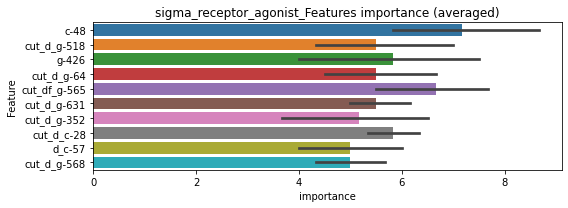

len(train_index) : 3891
len(valid_index) : 3892
================================= fold 1/2 sigma_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0182994	valid_1's binary_logloss: 0.0354242
[200]	training's binary_logloss: 0.0032202	valid_1's binary_logloss: 0.0208894
[300]	training's binary_logloss: 0.00103907	valid_1's binary_logloss: 0.0190986
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.00075508	valid_1's binary_logloss: 0.0188093


len(train_index) : 3892
len(valid_index) : 3891
================================= fold 2/2 sigma_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0211649	valid_1's binary_logloss: 0.0296443
[200]	training's binary_logloss: 0.00422231	valid_1's binary_logloss: 0.012805
[300]	training's binary_logloss: 0.00132835	valid_1's binary_logloss: 0.00971885
[400]	training's binary_logloss: 0.000644712	valid_1's binary_logloss: 0.0088113
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000500518	valid_1's binary_logloss: 0.00865082


sigma_receptor_agonist logloss: 0.013730734693757218


neg labels: 3289 → selected neg labels: 3283


sigma_receptor_antagonist, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0119392	valid_1's binary_logloss: 0.0435479
Early stopping, best iteration is:
[164]	training's binary_logloss: 0.00297463	valid_1's binary_logloss: 0.0375807
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0153931	valid_1's binary_logloss: 0.0314437
[200]	training's binary_logloss: 0.00232864	valid_1's binary_logloss: 0.0191586
Early stopping, best iteration is:
[214]	training's binary_logloss: 0.00196186	valid_1's binary_logloss: 0.0189119


1 / 3 AUC score:1.000
y_Threshold: 0.0048768, Threshold: 0.0052175, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00470, conf_1:0.00574
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0052175
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0152175
threshold: 0.0152175, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0130534	valid_1's binary_logloss: 0.0372616
Early stopping, best iteration is:
[187]	training's binary_logloss: 0.00229545	valid_1's binary_logloss: 0.027715
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0141463	valid_1's binary_logloss: 0.0360145
[200]	training's binary_logloss: 0.00213466	valid_1's binary_logloss: 0.023842
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00136725	valid_1's binary_logloss: 0.0227176


2 / 3 AUC score:1.000
y_Threshold: 0.0125304, Threshold: 0.0152175, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0002511 Vs.target_rate: 0.00151
Num_p_label: 1.0, conf_0:0.01370, conf_1:0.01674
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0152175
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_2: 0.0052175
threshold: 0.0052175, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.013929	valid_1's binary_logloss: 0.0346267
[200]	training's binary_logloss: 0.00204618	valid_1's binary_logloss: 0.0236676
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00126321	valid_1's binary_logloss: 0.0228274
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0139197	valid_1's binary_logloss: 0.0341967
[200]	training's binary_logloss: 0.002048	valid_1's binary_logloss: 0.0241866
Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00223336	valid_1's binary_logloss: 0.0241566


3 / 3 AUC score:1.000
y_Threshold: 0.0102013, Threshold: 0.0052175, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0150678 Vs.target_rate: 0.00151
Num_p_label: 60.0, conf_0:0.00470, conf_1:0.00574
Num_p_label: 60.0, Expected: 6.0, Adj_threshold_1: 0.0052175
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0152175
threshold: 0.0152175, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 652.0/7781, y_label_rate: 0.0837939


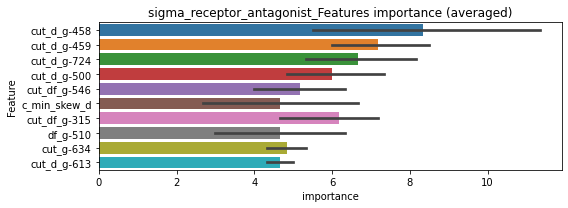

len(train_index) : 3890
len(valid_index) : 3891
================================= fold 1/2 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0193429	valid_1's binary_logloss: 0.0345507
[200]	training's binary_logloss: 0.00367215	valid_1's binary_logloss: 0.0191033
[300]	training's binary_logloss: 0.00118466	valid_1's binary_logloss: 0.016362
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00103904	valid_1's binary_logloss: 0.0160685


len(train_index) : 3891
len(valid_index) : 3890
================================= fold 2/2 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0195705	valid_1's binary_logloss: 0.0346637
[200]	training's binary_logloss: 0.00360956	valid_1's binary_logloss: 0.0178583
[300]	training's binary_logloss: 0.00115722	valid_1's binary_logloss: 0.0152633
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00107413	valid_1's binary_logloss: 0.0151598


sigma_receptor_antagonist logloss: 0.01561420884287148


neg labels: 3289 → selected neg labels: 3284


smoothened_receptor_antagonist, len(trt): 25, len(othr): 3284, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00889927	valid_1's binary_logloss: 0.0240198
[200]	training's binary_logloss: 0.00129045	valid_1's binary_logloss: 0.0159512
Early stopping, best iteration is:
[224]	training's binary_logloss: 0.000979382	valid_1's binary_logloss: 0.0151941
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00931736	valid_1's binary_logloss: 0.0186486
[200]	training's binary_logloss: 0.00133719	valid_1's binary_logloss: 0.0108173
Early stopping, best iteration is:
[236]	training's binary_logloss: 0.000898584	valid_1's binary_logloss: 0.0103476


1 / 3 AUC score:1.000
y_Threshold: 0.0022894, Threshold: 0.0041215, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00105
Num_p_label: 80.0, conf_0:0.00371, conf_1:0.00453
Num_p_label: 80.0, Expected: 4.2, Adj_threshold_1: 0.0041215
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_2: 0.0141215
threshold: 0.0141215, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00872831	valid_1's binary_logloss: 0.0240385
[200]	training's binary_logloss: 0.0012549	valid_1's binary_logloss: 0.0157958
[300]	training's binary_logloss: 0.000572201	valid_1's binary_logloss: 0.0147819
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.000577537	valid_1's binary_logloss: 0.0147515
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00940039	valid_1's binary_logloss: 0.0193604
[200]	training's binary_logloss: 0.00136996	valid_1's binary_logloss: 0.011315
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.000737857	valid_1's binary_logloss: 0.0104648


2 / 3 AUC score:1.000
y_Threshold: 0.0124159, Threshold: 0.0141215, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00105
Num_p_label: 11.0, conf_0:0.01271, conf_1:0.01553
threshold: 0.0141215, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00872831	valid_1's binary_logloss: 0.0240385
[200]	training's binary_logloss: 0.0012549	valid_1's binary_logloss: 0.0157958
[300]	training's binary_logloss: 0.000572201	valid_1's binary_logloss: 0.0147819
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.000577537	valid_1's binary_logloss: 0.0147515
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00940039	valid_1's binary_logloss: 0.0193604
[200]	training's binary_logloss: 0.00136996	valid_1's binary_logloss: 0.011315
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.000737857	valid_1's binary_logloss: 0.0104648


3 / 3 AUC score:1.000
y_Threshold: 0.0124159, Threshold: 0.0141215, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00105
Num_p_label: 11.0, conf_0:0.01271, conf_1:0.01553
threshold: 0.0141215, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 667.0/7790, y_label_rate: 0.0856226


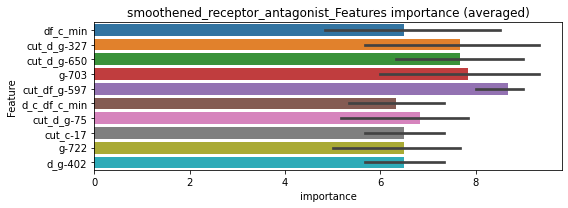

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.017327	valid_1's binary_logloss: 0.0323393
[200]	training's binary_logloss: 0.00291038	valid_1's binary_logloss: 0.0196359
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.00111406	valid_1's binary_logloss: 0.0185647


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0178836	valid_1's binary_logloss: 0.0274958
[200]	training's binary_logloss: 0.0030625	valid_1's binary_logloss: 0.0124789
[300]	training's binary_logloss: 0.000966731	valid_1's binary_logloss: 0.0102424
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.000849114	valid_1's binary_logloss: 0.0101141


smoothened_receptor_antagonist logloss: 0.01433935904878149


neg labels: 3289 → selected neg labels: 3244


sodium_channel_inhibitor, len(trt): 267, len(othr): 3244, target_rate: 0.0112119 → Adj_target_rate: 0.0096991
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0776071	valid_1's binary_logloss: 0.258638
Early stopping, best iteration is:
[116]	training's binary_logloss: 0.0618673	valid_1's binary_logloss: 0.256158
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0872144	valid_1's binary_logloss: 0.22835
Early stopping, best iteration is:
[157]	training's binary_logloss: 0.0425878	valid_1's binary_logloss: 0.217524


1 / 3 AUC score:0.898
y_Threshold: 0.0817842, Threshold: 0.0934490, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 451 → Positive_corect_labels: 488/3441
p_label_rate: 0.0200904 Vs.target_rate: 0.01121
Num_p_label: 80.0, conf_0:0.08410, conf_1:0.10279
threshold: 0.0934490, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 488.0/3441, y_label_rate: 0.1418192
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0440831	valid_1's binary_logloss: 0.140564
Early stopping, best iteration is:
[153]	training's binary_logloss: 0.0189815	valid_1's binary_logloss: 0.132634
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0411702	valid_1's binary_logloss: 0.141257
Early stopping, best iteration is:
[152]	training's binary_logloss: 0.0176254	valid_1's binary_logloss: 0.131831


2 / 3 AUC score:0.976
y_Threshold: 0.0506563, Threshold: 0.0934490, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 120 → Positive_corect_labels: 428.0/3321
p_label_rate: 0.0000000 Vs.target_rate: 0.01121
Num_p_label: 0.0, conf_0:0.08410, conf_1:0.10279
Num_p_label: 0.0, Expected: 44.6, Adj_threshold_1: 0.0934490
Num_p_label: 0.0, Expected: 44.6, Adj_threshold_2: 0.0834490
Num_p_label: 1.0, Expected: 44.6, Adj_threshold_3: 0.0734490
Num_p_label: 8.0, Expected: 44.6, Adj_threshold_4: 0.0634490
Num_p_label: 29.0, Expected: 44.6, Adj_threshold_5: 0.0534490
threshold: 0.0534490, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 428.0/3321, y_label_rate: 0.1288768
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0250248	valid_1's binary_logloss: 0.0908112
Early stopping, best iteration is:
[181]	training's binary_logloss: 0.00641991	valid_1's binary_logloss: 0.0809909
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0281771	valid_1's binary_logloss: 0.086816
Early stopping, best iteration is:
[181]	training's binary_logloss: 0.00738955	valid_1's binary_logloss: 0.0716131


3 / 3 AUC score:0.994
y_Threshold: 0.0255926, Threshold: 0.0534490, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 44 → Positive_corect_labels: 406.0/3277
p_label_rate: 0.0000000 Vs.target_rate: 0.01121
Num_p_label: 0.0, conf_0:0.04810, conf_1:0.05879
Num_p_label: 0.0, Expected: 44.6, Adj_threshold_1: 0.0534490
Num_p_label: 0.0, Expected: 44.6, Adj_threshold_2: 0.0434490
Num_p_label: 5.0, Expected: 44.6, Adj_threshold_3: 0.0334490
Num_p_label: 43.0, Expected: 44.6, Adj_threshold_4: 0.0234490
threshold: 0.0234490, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 449.0/7259, y_label_rate: 0.0618542


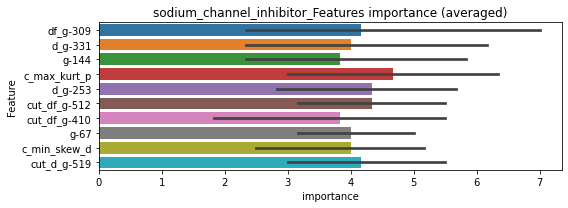

len(train_index) : 3629
len(valid_index) : 3630
================================= fold 1/2 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0335643	valid_1's binary_logloss: 0.0768983
[200]	training's binary_logloss: 0.00984553	valid_1's binary_logloss: 0.0611624
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.0045192	valid_1's binary_logloss: 0.0592652


len(train_index) : 3630
len(valid_index) : 3629
================================= fold 2/2 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0342285	valid_1's binary_logloss: 0.0759932
[200]	training's binary_logloss: 0.0100428	valid_1's binary_logloss: 0.060414
Early stopping, best iteration is:
[266]	training's binary_logloss: 0.0051916	valid_1's binary_logloss: 0.0584381


sodium_channel_inhibitor logloss: 0.058851710120704434


neg labels: 3289 → selected neg labels: 3283


sphingosine_receptor_agonist, len(trt): 32, len(othr): 3283, target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0108424	valid_1's binary_logloss: 0.0327127
[200]	training's binary_logloss: 0.00153934	valid_1's binary_logloss: 0.0234467
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.000740099	valid_1's binary_logloss: 0.0222026
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0113062	valid_1's binary_logloss: 0.0289003
[200]	training's binary_logloss: 0.0017025	valid_1's binary_logloss: 0.0195255
Early stopping, best iteration is:
[224]	training's binary_logloss: 0.00127971	valid_1's binary_logloss: 0.0190396


1 / 3 AUC score:1.000
y_Threshold: 0.0025741, Threshold: 0.0034307, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00134
Num_p_label: 80.0, conf_0:0.00309, conf_1:0.00377
Num_p_label: 80.0, Expected: 5.4, Adj_threshold_1: 0.0034307
Num_p_label: 1.0, Expected: 5.4, Adj_threshold_2: 0.0134307
threshold: 0.0134307, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0113542	valid_1's binary_logloss: 0.0317914
[200]	training's binary_logloss: 0.00158306	valid_1's binary_logloss: 0.0210202
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.000863219	valid_1's binary_logloss: 0.019912
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0115343	valid_1's binary_logloss: 0.0301487
[200]	training's binary_logloss: 0.00172218	valid_1's binary_logloss: 0.0202731
Early stopping, best iteration is:
[236]	training's binary_logloss: 0.00115056	valid_1's binary_logloss: 0.0192872


2 / 3 AUC score:1.000
y_Threshold: 0.0121784, Threshold: 0.0134307, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0027624 Vs.target_rate: 0.00134
Num_p_label: 11.0, conf_0:0.01209, conf_1:0.01477
threshold: 0.0134307, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0115366	valid_1's binary_logloss: 0.0324192
[200]	training's binary_logloss: 0.00166744	valid_1's binary_logloss: 0.0218105
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00128955	valid_1's binary_logloss: 0.0211404
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0109972	valid_1's binary_logloss: 0.0292011
[200]	training's binary_logloss: 0.00165865	valid_1's binary_logloss: 0.0180705
Early stopping, best iteration is:
[268]	training's binary_logloss: 0.000865322	valid_1's binary_logloss: 0.0168536


3 / 3 AUC score:1.000
y_Threshold: 0.0098305, Threshold: 0.0134307, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, conf_0:0.01209, conf_1:0.01477
threshold: 0.0134307, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 666.0/7783, y_label_rate: 0.0855711


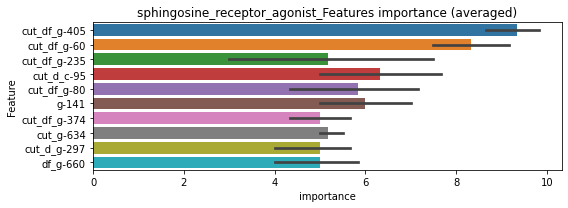

len(train_index) : 3891
len(valid_index) : 3892
================================= fold 1/2 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.019128	valid_1's binary_logloss: 0.0379363
[200]	training's binary_logloss: 0.00347108	valid_1's binary_logloss: 0.0235653
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00163594	valid_1's binary_logloss: 0.0219433


len(train_index) : 3892
len(valid_index) : 3891
================================= fold 2/2 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0196799	valid_1's binary_logloss: 0.0315797
[200]	training's binary_logloss: 0.00371221	valid_1's binary_logloss: 0.0165176
[300]	training's binary_logloss: 0.00119794	valid_1's binary_logloss: 0.013756
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.000763978	valid_1's binary_logloss: 0.0133715


sphingosine_receptor_agonist logloss: 0.01765795234632568


neg labels: 3289 → selected neg labels: 3277


src_inhibitor, len(trt): 71, len(othr): 3277, target_rate: 0.0029814 → Adj_target_rate: 0.0031461
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0191465	valid_1's binary_logloss: 0.0535763
[200]	training's binary_logloss: 0.00324814	valid_1's binary_logloss: 0.0384068
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.0022254	valid_1's binary_logloss: 0.0372442
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0194291	valid_1's binary_logloss: 0.0599588
[200]	training's binary_logloss: 0.00326141	valid_1's binary_logloss: 0.045938
Early stopping, best iteration is:
[198]	training's binary_logloss: 0.0033407	valid_1's binary_logloss: 0.0458868


1 / 3 AUC score:0.999
y_Threshold: 0.0157448, Threshold: 0.0248094, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 142 → Positive_corect_labels: 650/3790
p_label_rate: 0.0200904 Vs.target_rate: 0.00298
Num_p_label: 80.0, conf_0:0.02233, conf_1:0.02729
Num_p_label: 80.0, Expected: 11.9, Adj_threshold_1: 0.0248094
Num_p_label: 57.0, Expected: 11.9, Adj_threshold_2: 0.0348094
Num_p_label: 40.0, Expected: 11.9, Adj_threshold_3: 0.0448094
Num_p_label: 28.0, Expected: 11.9, Adj_threshold_4: 0.0548094
Num_p_label: 21.0, Expected: 11.9, Adj_threshold_5: 0.0648094
threshold: 0.0648094, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3790, y_label_rate: 0.1715040
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0166518	valid_1's binary_logloss: 0.0535987
[200]	training's binary_logloss: 0.00275885	valid_1's binary_logloss: 0.0369916
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.00145586	valid_1's binary_logloss: 0.0346976
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174118	valid_1's binary_logloss: 0.0538623
[200]	training's binary_logloss: 0.00295367	valid_1's binary_logloss: 0.0376956
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.0016506	valid_1's binary_logloss: 0.0351507


2 / 3 AUC score:0.999
y_Threshold: 0.0570617, Threshold: 0.0648094, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 24 → Positive_corect_labels: 638.0/3766
p_label_rate: 0.0210949 Vs.target_rate: 0.00298
Num_p_label: 84.0, conf_0:0.05833, conf_1:0.07129
Num_p_label: 84.0, Expected: 11.9, Adj_threshold_1: 0.0648094
Num_p_label: 72.0, Expected: 11.9, Adj_threshold_2: 0.0748094
Num_p_label: 62.0, Expected: 11.9, Adj_threshold_3: 0.0848094
Num_p_label: 54.0, Expected: 11.9, Adj_threshold_4: 0.0948094
Num_p_label: 45.0, Expected: 11.9, Adj_threshold_5: 0.1048094
Num_p_label: 43.0, Expected: 11.9, Adj_threshold_6: 0.1148094
Num_p_label: 43.0, Expected: 11.9, Adj_threshold_7: 0.1248094
Num_p_label: 32.0, Expected: 11.9, Adj_threshold_8: 0.1348094
Num_p_label: 29.0, Expected: 11.9, Adj_threshold_9: 0.1448094
Num_p_label: 29.0, Expected: 11.9, Adj_threshold_10: 0.1548094
threshold: 0.1648094, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 638.0/3766, y_label_rate: 0.169410

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0164582	valid_1's binary_logloss: 0.0402244
[200]	training's binary_logloss: 0.00266218	valid_1's binary_logloss: 0.0223673
[300]	training's binary_logloss: 0.00107967	valid_1's binary_logloss: 0.0193785
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.00109788	valid_1's binary_logloss: 0.0193415
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.01507	valid_1's binary_logloss: 0.0409213
[200]	training's binary_logloss: 0.00239707	valid_1's binary_logloss: 0.0242511
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.00107287	valid_1's binary_logloss: 0.0220921


3 / 3 AUC score:1.000
y_Threshold: 0.0779757, Threshold: 0.1648094, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 8 → Positive_corect_labels: 634.0/3758
p_label_rate: 0.0087896 Vs.target_rate: 0.00298
Num_p_label: 35.0, conf_0:0.14833, conf_1:0.18129
threshold: 0.1648094, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 669.0/7740, y_label_rate: 0.0864341


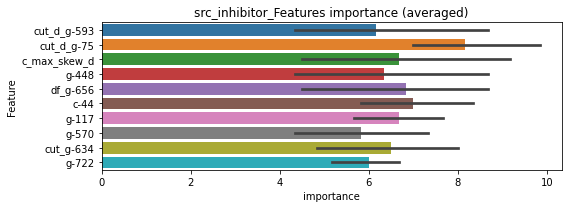

len(train_index) : 3870
len(valid_index) : 3870
================================= fold 1/2 src_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.023411	valid_1's binary_logloss: 0.0451452
[200]	training's binary_logloss: 0.00494355	valid_1's binary_logloss: 0.0273378
[300]	training's binary_logloss: 0.00174492	valid_1's binary_logloss: 0.0244213
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00155944	valid_1's binary_logloss: 0.0242358


len(train_index) : 3870
len(valid_index) : 3870
================================= fold 2/2 src_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0238168	valid_1's binary_logloss: 0.0486703
[200]	training's binary_logloss: 0.00510055	valid_1's binary_logloss: 0.0271492
[300]	training's binary_logloss: 0.00181919	valid_1's binary_logloss: 0.0227116
[400]	training's binary_logloss: 0.000938538	valid_1's binary_logloss: 0.0209799
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000759409	valid_1's binary_logloss: 0.02058


src_inhibitor logloss: 0.022407930737094402


neg labels: 3289 → selected neg labels: 3276


steroid, len(trt): 79, len(othr): 3276, target_rate: 0.0033174 → Adj_target_rate: 0.0034449
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0233943	valid_1's binary_logloss: 0.0834108
Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00642909	valid_1's binary_logloss: 0.0729745
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0265414	valid_1's binary_logloss: 0.0716321
[200]	training's binary_logloss: 0.00488413	valid_1's binary_logloss: 0.0568602
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00375946	valid_1's binary_logloss: 0.0561495


1 / 3 AUC score:0.998
y_Threshold: 0.0138461, Threshold: 0.0156732, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 144 → Positive_corect_labels: 649/3787
p_label_rate: 0.0200904 Vs.target_rate: 0.00332
Num_p_label: 80.0, conf_0:0.01411, conf_1:0.01724
Num_p_label: 80.0, Expected: 13.2, Adj_threshold_1: 0.0156732
Num_p_label: 26.0, Expected: 13.2, Adj_threshold_2: 0.0256732
threshold: 0.0256732, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 649.0/3787, y_label_rate: 0.1713758
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0226	valid_1's binary_logloss: 0.0781906
[200]	training's binary_logloss: 0.0040094	valid_1's binary_logloss: 0.0645456
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00443905	valid_1's binary_logloss: 0.0644884
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0248217	valid_1's binary_logloss: 0.0690956
[200]	training's binary_logloss: 0.00434063	valid_1's binary_logloss: 0.0551952
Early stopping, best iteration is:
[220]	training's binary_logloss: 0.00339449	valid_1's binary_logloss: 0.0546654


2 / 3 AUC score:0.999
y_Threshold: 0.0227715, Threshold: 0.0256732, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 22 → Positive_corect_labels: 638.0/3765
p_label_rate: 0.0077850 Vs.target_rate: 0.00332
Num_p_label: 31.0, conf_0:0.02311, conf_1:0.02824
threshold: 0.0256732, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 638.0/3765, y_label_rate: 0.1694555
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0212643	valid_1's binary_logloss: 0.0628576
[200]	training's binary_logloss: 0.00371897	valid_1's binary_logloss: 0.0484164
Early stopping, best iteration is:
[205]	training's binary_logloss: 0.00349216	valid_1's binary_logloss: 0.0481564
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.022225	valid_1's binary_logloss: 0.0627068
[200]	training's binary_logloss: 0.00386213	valid_1's binary_logloss: 0.0489226
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00433717	valid_1's binary_logloss: 0.0487856


3 / 3 AUC score:1.000
y_Threshold: 0.0238180, Threshold: 0.0256732, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 629.0/3747
p_label_rate: 0.0065294 Vs.target_rate: 0.00332
Num_p_label: 26.0, conf_0:0.02311, conf_1:0.02824
threshold: 0.0256732, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 655.0/7729, y_label_rate: 0.0847458


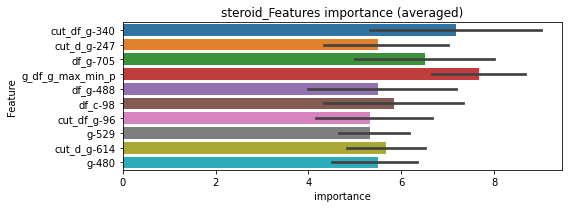

len(train_index) : 3864
len(valid_index) : 3865
================================= fold 1/2 steroid=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0305703	valid_1's binary_logloss: 0.0602746
[200]	training's binary_logloss: 0.00731455	valid_1's binary_logloss: 0.0402142
[300]	training's binary_logloss: 0.00258948	valid_1's binary_logloss: 0.0362824
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.00166752	valid_1's binary_logloss: 0.0355576


len(train_index) : 3865
len(valid_index) : 3864
================================= fold 2/2 steroid=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0293304	valid_1's binary_logloss: 0.0569474
[200]	training's binary_logloss: 0.00717948	valid_1's binary_logloss: 0.0347523
[300]	training's binary_logloss: 0.00244341	valid_1's binary_logloss: 0.0299107
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00191847	valid_1's binary_logloss: 0.0293909


steroid logloss: 0.03247467892173696


neg labels: 3289 → selected neg labels: 3286


syk_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00616396	valid_1's binary_logloss: 0.0166667
[200]	training's binary_logloss: 0.000776603	valid_1's binary_logloss: 0.00944559
Early stopping, best iteration is:
[218]	training's binary_logloss: 0.000643705	valid_1's binary_logloss: 0.00911792
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00731888	valid_1's binary_logloss: 0.00962235
[200]	training's binary_logloss: 0.000939596	valid_1's binary_logloss: 0.00281256
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.000481617	valid_1's binary_logloss: 0.00223587


1 / 3 AUC score:1.000
y_Threshold: 0.0021057, Threshold: 0.0033413, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00080
Num_p_label: 80.0, conf_0:0.00301, conf_1:0.00368
Num_p_label: 80.0, Expected: 3.2, Adj_threshold_1: 0.0033413
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0133413
threshold: 0.0133413, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00618584	valid_1's binary_logloss: 0.0159863
[200]	training's binary_logloss: 0.000759812	valid_1's binary_logloss: 0.00887645
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.000426907	valid_1's binary_logloss: 0.00827745
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00689737	valid_1's binary_logloss: 0.00980319
[200]	training's binary_logloss: 0.000880624	valid_1's binary_logloss: 0.00291306
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.000470854	valid_1's binary_logloss: 0.00243567


2 / 3 AUC score:1.000
y_Threshold: 0.0453843, Threshold: 0.0133413, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0150678 Vs.target_rate: 0.00080
Num_p_label: 60.0, conf_0:0.01201, conf_1:0.01468
Num_p_label: 60.0, Expected: 3.2, Adj_threshold_1: 0.0133413
Num_p_label: 24.0, Expected: 3.2, Adj_threshold_2: 0.0233413
Num_p_label: 17.0, Expected: 3.2, Adj_threshold_3: 0.0333413
Num_p_label: 14.0, Expected: 3.2, Adj_threshold_4: 0.0433413
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_5: 0.0533413
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_6: 0.0633413
threshold: 0.0633413, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00618584	valid_1's binary_logloss: 0.0159863
[200]	training's binary_logloss: 0.000759812	valid_1's binary_logloss: 0.00887645
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.000426907	valid_1's binary_logloss: 0.00827745
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00689737	valid_1's binary_logloss: 0.00980319
[200]	training's binary_logloss: 0.000880624	valid_1's binary_logloss: 0.00291306
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.000470854	valid_1's binary_logloss: 0.00243567


3 / 3 AUC score:1.000
y_Threshold: 0.0453843, Threshold: 0.0633413, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, conf_0:0.05701, conf_1:0.06968
threshold: 0.0633413, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 661.0/7793, y_label_rate: 0.0848197


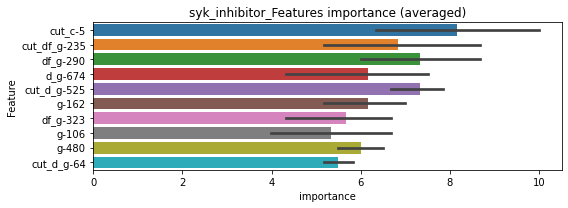

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 syk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.013254	valid_1's binary_logloss: 0.0204554
[200]	training's binary_logloss: 0.00177778	valid_1's binary_logloss: 0.00855992
[300]	training's binary_logloss: 0.000515853	valid_1's binary_logloss: 0.00739805
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000345509	valid_1's binary_logloss: 0.00717038


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 syk_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0140099	valid_1's binary_logloss: 0.0177011
[200]	training's binary_logloss: 0.00199799	valid_1's binary_logloss: 0.00475913
[300]	training's binary_logloss: 0.000589628	valid_1's binary_logloss: 0.00288305
[400]	training's binary_logloss: 0.000306567	valid_1's binary_logloss: 0.0023899
[500]	training's binary_logloss: 0.000223029	valid_1's binary_logloss: 0.00226463
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000220778	valid_1's binary_logloss: 0.0022607


syk_inhibitor logloss: 0.0047158553590062905


neg labels: 3289 → selected neg labels: 3279


tachykinin_antagonist, len(trt): 60, len(othr): 3279, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0200404	valid_1's binary_logloss: 0.0682473
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.00510459	valid_1's binary_logloss: 0.0584012
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.021565	valid_1's binary_logloss: 0.0588881
[200]	training's binary_logloss: 0.00369605	valid_1's binary_logloss: 0.0462901
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.00300346	valid_1's binary_logloss: 0.045648


1 / 3 AUC score:0.998
y_Threshold: 0.0098607, Threshold: 0.0098515, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 144 → Positive_corect_labels: 649/3790
p_label_rate: 0.0200904 Vs.target_rate: 0.00252
Num_p_label: 80.0, conf_0:0.00887, conf_1:0.01084
Num_p_label: 80.0, Expected: 10.0, Adj_threshold_1: 0.0098515
Num_p_label: 6.0, Expected: 10.0, Adj_threshold_2: 0.0198515
threshold: 0.0198515, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0193302	valid_1's binary_logloss: 0.0599335
[200]	training's binary_logloss: 0.00329859	valid_1's binary_logloss: 0.0487506
Early stopping, best iteration is:
[197]	training's binary_logloss: 0.00342751	valid_1's binary_logloss: 0.0486522
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0205539	valid_1's binary_logloss: 0.0576533
[200]	training's binary_logloss: 0.00352613	valid_1's binary_logloss: 0.0416764
Early stopping, best iteration is:
[220]	training's binary_logloss: 0.0027275	valid_1's binary_logloss: 0.040918


2 / 3 AUC score:1.000
y_Threshold: 0.0233066, Threshold: 0.0198515, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 12 → Positive_corect_labels: 643.0/3778
p_label_rate: 0.0022602 Vs.target_rate: 0.00252
Num_p_label: 9.0, conf_0:0.01787, conf_1:0.02184
threshold: 0.0198515, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 643.0/3778, y_label_rate: 0.1701959
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0178349	valid_1's binary_logloss: 0.0524136
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00366107	valid_1's binary_logloss: 0.0423997
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0194069	valid_1's binary_logloss: 0.0488745
[200]	training's binary_logloss: 0.00328114	valid_1's binary_logloss: 0.0355867
Early stopping, best iteration is:
[224]	training's binary_logloss: 0.00244817	valid_1's binary_logloss: 0.0350425


3 / 3 AUC score:1.000
y_Threshold: 0.0198031, Threshold: 0.0198515, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 640.0/3772
p_label_rate: 0.0015068 Vs.target_rate: 0.00252
Num_p_label: 6.0, conf_0:0.01787, conf_1:0.02184
threshold: 0.0198515, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 646.0/7754, y_label_rate: 0.0833118


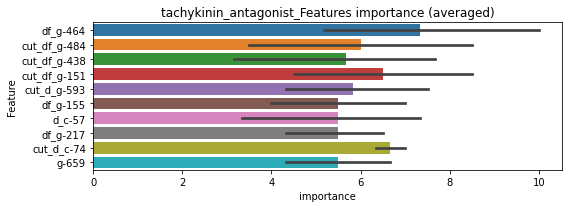

len(train_index) : 3877
len(valid_index) : 3877
================================= fold 1/2 tachykinin_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0249619	valid_1's binary_logloss: 0.052084
[200]	training's binary_logloss: 0.00546827	valid_1's binary_logloss: 0.0352971
[300]	training's binary_logloss: 0.00179133	valid_1's binary_logloss: 0.0332153
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.00169808	valid_1's binary_logloss: 0.0331656


len(train_index) : 3877
len(valid_index) : 3877
================================= fold 2/2 tachykinin_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0285707	valid_1's binary_logloss: 0.0447986
[200]	training's binary_logloss: 0.00678309	valid_1's binary_logloss: 0.0254823
[300]	training's binary_logloss: 0.00227904	valid_1's binary_logloss: 0.021929
[400]	training's binary_logloss: 0.00109303	valid_1's binary_logloss: 0.0208724
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000912692	valid_1's binary_logloss: 0.0206342


tachykinin_antagonist logloss: 0.02689991534519332


neg labels: 3289 → selected neg labels: 3284


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00626186	valid_1's binary_logloss: 0.0139388
[200]	training's binary_logloss: 0.000679833	valid_1's binary_logloss: 0.0052104
[300]	training's binary_logloss: 0.000341933	valid_1's binary_logloss: 0.00421668
Early stopping, best iteration is:
[312]	training's binary_logloss: 0.000334352	valid_1's binary_logloss: 0.00419549
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00655946	valid_1's binary_logloss: 0.0119587
[200]	training's binary_logloss: 0.000706328	valid_1's binary_logloss: 0.00378923
[300]	training's binary_logloss: 0.000350288	valid_1's binary_logloss: 0.00296333
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.000352362	valid_1's binary_logloss: 0.00295496


1 / 3 AUC score:1.000
y_Threshold: 0.0007624, Threshold: 0.0010748, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00126
Num_p_label: 80.0, conf_0:0.00097, conf_1:0.00118
Num_p_label: 80.0, Expected: 5.0, Adj_threshold_1: 0.0010748
Num_p_label: 8.0, Expected: 5.0, Adj_threshold_2: 0.0110748
threshold: 0.0110748, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00635082	valid_1's binary_logloss: 0.0130262
[200]	training's binary_logloss: 0.000632383	valid_1's binary_logloss: 0.00408627
[300]	training's binary_logloss: 0.00032233	valid_1's binary_logloss: 0.0031064
[400]	training's binary_logloss: 0.000280434	valid_1's binary_logloss: 0.00294515
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.000283117	valid_1's binary_logloss: 0.00294334
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00656239	valid_1's binary_logloss: 0.0108368
[200]	training's binary_logloss: 0.000657797	valid_1's binary_logloss: 0.00270989
[300]	training's binary_logloss: 0.000333973	valid_1's binary_logloss: 0.00190544
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000294063	valid_1's binary_logloss: 0.00175622


2 / 3 AUC score:1.000
y_Threshold: 0.0413642, Threshold: 0.0110748, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, conf_0:0.00997, conf_1:0.01218
threshold: 0.0110748, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00635082	valid_1's binary_logloss: 0.0130262
[200]	training's binary_logloss: 0.000632383	valid_1's binary_logloss: 0.00408627
[300]	training's binary_logloss: 0.00032233	valid_1's binary_logloss: 0.0031064
[400]	training's binary_logloss: 0.000280434	valid_1's binary_logloss: 0.00294515
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.000283117	valid_1's binary_logloss: 0.00294334
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00656239	valid_1's binary_logloss: 0.0108368
[200]	training's binary_logloss: 0.000657797	valid_1's binary_logloss: 0.00270989
[300]	training's binary_logloss: 0.000333973	valid_1's binary_logloss: 0.00190544
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000294063	valid_1's binary_logloss: 0.00175622


3 / 3 AUC score:1.000
y_Threshold: 0.0413642, Threshold: 0.0110748, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, conf_0:0.00997, conf_1:0.01218
threshold: 0.0110748, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 664.0/7790, y_label_rate: 0.0852375


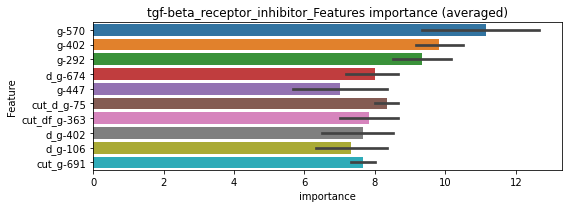

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0142558	valid_1's binary_logloss: 0.0242988
[200]	training's binary_logloss: 0.00188388	valid_1's binary_logloss: 0.0106726
[300]	training's binary_logloss: 0.000471639	valid_1's binary_logloss: 0.00879038
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.00035348	valid_1's binary_logloss: 0.00852744


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0149979	valid_1's binary_logloss: 0.0211714
[200]	training's binary_logloss: 0.00208504	valid_1's binary_logloss: 0.00693973
[300]	training's binary_logloss: 0.000536718	valid_1's binary_logloss: 0.00440304
[400]	training's binary_logloss: 0.000248585	valid_1's binary_logloss: 0.00363126
[500]	training's binary_logloss: 0.000174752	valid_1's binary_logloss: 0.00331053
[600]	training's binary_logloss: 0.000149786	valid_1's binary_logloss: 0.00315524
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000142454	valid_1's binary_logloss: 0.00308706


tgf-beta_receptor_inhibitor logloss: 0.005809494820263968


neg labels: 3289 → selected neg labels: 3286


thrombin_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00735583	valid_1's binary_logloss: 0.0244489
[200]	training's binary_logloss: 0.000928355	valid_1's binary_logloss: 0.015526
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.000552184	valid_1's binary_logloss: 0.0147639
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00817935	valid_1's binary_logloss: 0.0125454
[200]	training's binary_logloss: 0.00105377	valid_1's binary_logloss: 0.00502758
Early stopping, best iteration is:
[230]	training's binary_logloss: 0.000749876	valid_1's binary_logloss: 0.00462988


1 / 3 AUC score:1.000
y_Threshold: 0.0014442, Threshold: 0.0016908, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00080
Num_p_label: 80.0, conf_0:0.00152, conf_1:0.00186
Num_p_label: 80.0, Expected: 3.2, Adj_threshold_1: 0.0016908
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_2: 0.0116908
threshold: 0.0116908, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00732051	valid_1's binary_logloss: 0.0229528
[200]	training's binary_logloss: 0.00094048	valid_1's binary_logloss: 0.0152419
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.000562173	valid_1's binary_logloss: 0.0144121
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00827865	valid_1's binary_logloss: 0.0126429
[200]	training's binary_logloss: 0.00105492	valid_1's binary_logloss: 0.00477212
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.000619831	valid_1's binary_logloss: 0.00430784


2 / 3 AUC score:1.000
y_Threshold: 0.0089630, Threshold: 0.0116908, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00080
Num_p_label: 0.0, conf_0:0.01052, conf_1:0.01286
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0116908
Num_p_label: 105.0, Expected: 3.2, Adj_threshold_2: 0.0016908
threshold: 0.0016908, positive_p_label: 105.0/3982, p_label_rate: 0.0263687
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00732051	valid_1's binary_logloss: 0.0229528
[200]	training's binary_logloss: 0.00094048	valid_1's binary_logloss: 0.0152419
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.000562173	valid_1's binary_logloss: 0.0144121
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00827865	valid_1's binary_logloss: 0.0126429
[200]	training's binary_logloss: 0.00105492	valid_1's binary_logloss: 0.00477212
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.000619831	valid_1's binary_logloss: 0.00430784


3 / 3 AUC score:1.000
y_Threshold: 0.0089630, Threshold: 0.0016908, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0263687 Vs.target_rate: 0.00080
Num_p_label: 105.0, conf_0:0.00152, conf_1:0.00186
Num_p_label: 105.0, Expected: 3.2, Adj_threshold_1: 0.0016908
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_2: 0.0116908
threshold: 0.0116908, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7793, y_label_rate: 0.0843064


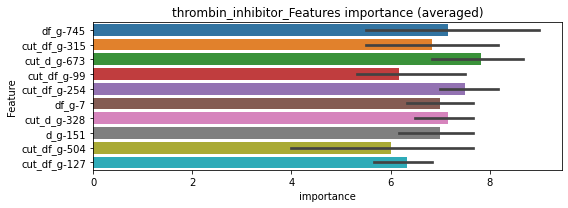

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 thrombin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0140065	valid_1's binary_logloss: 0.0245727
[200]	training's binary_logloss: 0.0019343	valid_1's binary_logloss: 0.0111906
[300]	training's binary_logloss: 0.000572122	valid_1's binary_logloss: 0.0093956
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.000374277	valid_1's binary_logloss: 0.00894034


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 thrombin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0152259	valid_1's binary_logloss: 0.0178759
[200]	training's binary_logloss: 0.00227568	valid_1's binary_logloss: 0.00505245
[300]	training's binary_logloss: 0.000677037	valid_1's binary_logloss: 0.00324551
[400]	training's binary_logloss: 0.000338866	valid_1's binary_logloss: 0.00276287
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000280026	valid_1's binary_logloss: 0.00264354


thrombin_inhibitor logloss: 0.00579234036123456


neg labels: 3289 → selected neg labels: 3285


thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3285, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0112428	valid_1's binary_logloss: 0.0400032
Early stopping, best iteration is:
[178]	training's binary_logloss: 0.00216408	valid_1's binary_logloss: 0.0315034
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0140739	valid_1's binary_logloss: 0.0250008
[200]	training's binary_logloss: 0.00214922	valid_1's binary_logloss: 0.0121122
[300]	training's binary_logloss: 0.000851471	valid_1's binary_logloss: 0.0104234
[400]	training's binary_logloss: 0.000588209	valid_1's binary_logloss: 0.00993867
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000588209	valid_1's binary_logloss: 0.00993867


1 / 3 AUC score:1.000
y_Threshold: 0.0034705, Threshold: 0.0035584, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00155
Num_p_label: 80.0, conf_0:0.00320, conf_1:0.00391
Num_p_label: 80.0, Expected: 6.2, Adj_threshold_1: 0.0035584
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_2: 0.0135584
threshold: 0.0135584, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0115212	valid_1's binary_logloss: 0.037844
[200]	training's binary_logloss: 0.0016842	valid_1's binary_logloss: 0.02784
Early stopping, best iteration is:
[218]	training's binary_logloss: 0.00137628	valid_1's binary_logloss: 0.02716
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0135408	valid_1's binary_logloss: 0.0295904
[200]	training's binary_logloss: 0.00201936	valid_1's binary_logloss: 0.0171968
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.00122768	valid_1's binary_logloss: 0.0165866


2 / 3 AUC score:1.000
y_Threshold: 0.0189181, Threshold: 0.0135584, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0015068 Vs.target_rate: 0.00155
Num_p_label: 6.0, conf_0:0.01220, conf_1:0.01491
threshold: 0.0135584, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.012348	valid_1's binary_logloss: 0.0322376
[200]	training's binary_logloss: 0.00178311	valid_1's binary_logloss: 0.0215164
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.000953606	valid_1's binary_logloss: 0.0205527
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0133778	valid_1's binary_logloss: 0.0305809
[200]	training's binary_logloss: 0.00192164	valid_1's binary_logloss: 0.0177753
[300]	training's binary_logloss: 0.000787116	valid_1's binary_logloss: 0.0163125
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.000808032	valid_1's binary_logloss: 0.0162349


3 / 3 AUC score:1.000
y_Threshold: 0.0141200, Threshold: 0.0135584, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0015068 Vs.target_rate: 0.00155
Num_p_label: 6.0, conf_0:0.01220, conf_1:0.01491
threshold: 0.0135584, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 661.0/7788, y_label_rate: 0.0848742


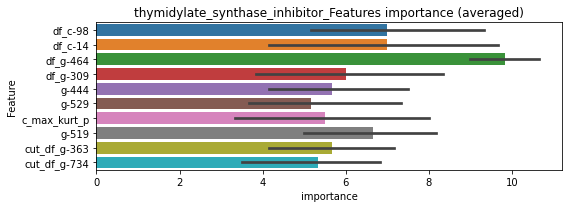

len(train_index) : 3894
len(valid_index) : 3894
================================= fold 1/2 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0191035	valid_1's binary_logloss: 0.0350173
[200]	training's binary_logloss: 0.0034567	valid_1's binary_logloss: 0.0200863
[300]	training's binary_logloss: 0.00109891	valid_1's binary_logloss: 0.0179515
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.000686466	valid_1's binary_logloss: 0.0174741


len(train_index) : 3894
len(valid_index) : 3894
================================= fold 2/2 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0204587	valid_1's binary_logloss: 0.0310282
[200]	training's binary_logloss: 0.00376696	valid_1's binary_logloss: 0.0131353
[300]	training's binary_logloss: 0.00123253	valid_1's binary_logloss: 0.0101914
[400]	training's binary_logloss: 0.000602881	valid_1's binary_logloss: 0.00921645
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000454209	valid_1's binary_logloss: 0.00901781


thymidylate_synthase_inhibitor logloss: 0.013245980234729985


neg labels: 3289 → selected neg labels: 3284


tlr_agonist, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00976131	valid_1's binary_logloss: 0.0313025
[200]	training's binary_logloss: 0.00148272	valid_1's binary_logloss: 0.0232706
Early stopping, best iteration is:
[208]	training's binary_logloss: 0.00134918	valid_1's binary_logloss: 0.022963
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0110853	valid_1's binary_logloss: 0.0279755
[200]	training's binary_logloss: 0.00169488	valid_1's binary_logloss: 0.0171035
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.0011028	valid_1's binary_logloss: 0.0157966


1 / 3 AUC score:1.000
y_Threshold: 0.0027972, Threshold: 0.0032540, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00126
Num_p_label: 80.0, conf_0:0.00293, conf_1:0.00358
Num_p_label: 80.0, Expected: 5.0, Adj_threshold_1: 0.0032540
Num_p_label: 0.0, Expected: 5.0, Adj_threshold_2: 0.0132540
threshold: 0.0132540, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0104552	valid_1's binary_logloss: 0.0335708
[200]	training's binary_logloss: 0.00155129	valid_1's binary_logloss: 0.0241573
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.000987723	valid_1's binary_logloss: 0.0232615
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0115049	valid_1's binary_logloss: 0.0261028
[200]	training's binary_logloss: 0.0017276	valid_1's binary_logloss: 0.014568
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00108713	valid_1's binary_logloss: 0.0130205


2 / 3 AUC score:1.000
y_Threshold: 0.0125799, Threshold: 0.0132540, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00126
Num_p_label: 0.0, conf_0:0.01193, conf_1:0.01458
Num_p_label: 0.0, Expected: 5.0, Adj_threshold_1: 0.0132540
Num_p_label: 97.0, Expected: 5.0, Adj_threshold_2: 0.0032540
threshold: 0.0032540, positive_p_label: 97.0/3982, p_label_rate: 0.0243596
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0104552	valid_1's binary_logloss: 0.0335708
[200]	training's binary_logloss: 0.00155129	valid_1's binary_logloss: 0.0241573
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.000987723	valid_1's binary_logloss: 0.0232615
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0115049	valid_1's binary_logloss: 0.0261028
[200]	training's binary_logloss: 0.0017276	valid_1's binary_logloss: 0.014568
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00108713	valid_1's binary_logloss: 0.0130205


3 / 3 AUC score:1.000
y_Threshold: 0.0125799, Threshold: 0.0032540, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0243596 Vs.target_rate: 0.00126
Num_p_label: 97.0, conf_0:0.00293, conf_1:0.00358
Num_p_label: 97.0, Expected: 5.0, Adj_threshold_1: 0.0032540
Num_p_label: 0.0, Expected: 5.0, Adj_threshold_2: 0.0132540
threshold: 0.0132540, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/7790, y_label_rate: 0.0842105


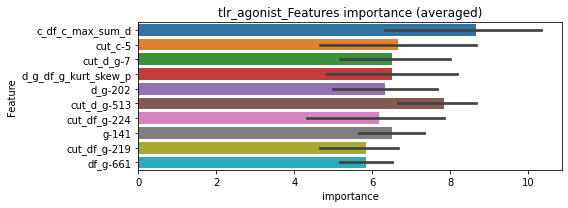

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 tlr_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174809	valid_1's binary_logloss: 0.0315968
[200]	training's binary_logloss: 0.00298336	valid_1's binary_logloss: 0.0169736
[300]	training's binary_logloss: 0.000946403	valid_1's binary_logloss: 0.0146084
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.000633624	valid_1's binary_logloss: 0.0141561


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 tlr_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.019084	valid_1's binary_logloss: 0.029674
[200]	training's binary_logloss: 0.00348901	valid_1's binary_logloss: 0.0133217
[300]	training's binary_logloss: 0.0011075	valid_1's binary_logloss: 0.0103483
[400]	training's binary_logloss: 0.000546749	valid_1's binary_logloss: 0.00941312
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000409394	valid_1's binary_logloss: 0.00912527


tlr_agonist logloss: 0.011640686732697891


neg labels: 3289 → selected neg labels: 3287


tlr_antagonist, len(trt): 7, len(othr): 3287, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00382418	valid_1's binary_logloss: 0.00693158
[200]	training's binary_logloss: 0.000406851	valid_1's binary_logloss: 0.00278379
Early stopping, best iteration is:
[236]	training's binary_logloss: 0.000297631	valid_1's binary_logloss: 0.0026525
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00409951	valid_1's binary_logloss: 0.00489954
[200]	training's binary_logloss: 0.000450196	valid_1's binary_logloss: 0.000803688
[300]	training's binary_logloss: 0.000260395	valid_1's binary_logloss: 0.000574492
Early stopping, best iteration is:
[318]	training's binary_logloss: 0.00025496	valid_1's binary_logloss: 0.000567442


1 / 3 AUC score:1.000
y_Threshold: 0.0004715, Threshold: 0.0005600, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00029
Num_p_label: 80.0, conf_0:0.00050, conf_1:0.00062
Num_p_label: 80.0, Expected: 1.2, Adj_threshold_1: 0.0005600
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.0105600
threshold: 0.0105600, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.003903	valid_1's binary_logloss: 0.00701625
[200]	training's binary_logloss: 0.000419588	valid_1's binary_logloss: 0.00303924
Early stopping, best iteration is:
[231]	training's binary_logloss: 0.000317255	valid_1's binary_logloss: 0.00287092
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00423548	valid_1's binary_logloss: 0.00512143
[200]	training's binary_logloss: 0.000454263	valid_1's binary_logloss: 0.000845819
[300]	training's binary_logloss: 0.000268227	valid_1's binary_logloss: 0.000594084
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00026186	valid_1's binary_logloss: 0.000584276


2 / 3 AUC score:1.000
y_Threshold: 0.0244301, Threshold: 0.0105600, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00029
Num_p_label: 0.0, conf_0:0.00950, conf_1:0.01162
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0105600
Num_p_label: 164.0, Expected: 1.2, Adj_threshold_2: 0.0005600
threshold: 0.0005600, positive_p_label: 164.0/3982, p_label_rate: 0.0411853
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.003903	valid_1's binary_logloss: 0.00701625
[200]	training's binary_logloss: 0.000419588	valid_1's binary_logloss: 0.00303924
Early stopping, best iteration is:
[231]	training's binary_logloss: 0.000317255	valid_1's binary_logloss: 0.00287092
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00423548	valid_1's binary_logloss: 0.00512143
[200]	training's binary_logloss: 0.000454263	valid_1's binary_logloss: 0.000845819
[300]	training's binary_logloss: 0.000268227	valid_1's binary_logloss: 0.000594084
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00026186	valid_1's binary_logloss: 0.000584276


3 / 3 AUC score:1.000
y_Threshold: 0.0244301, Threshold: 0.0005600, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0411853 Vs.target_rate: 0.00029
Num_p_label: 164.0, conf_0:0.00050, conf_1:0.00062
Num_p_label: 164.0, Expected: 1.2, Adj_threshold_1: 0.0005600
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.0105600
threshold: 0.0105600, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7794, y_label_rate: 0.0842956


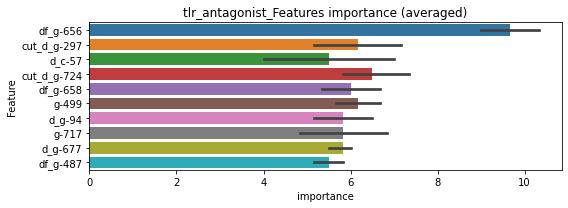

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 tlr_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00988887	valid_1's binary_logloss: 0.0126973
[200]	training's binary_logloss: 0.000959058	valid_1's binary_logloss: 0.00312003
[300]	training's binary_logloss: 0.000255836	valid_1's binary_logloss: 0.0022613
[400]	training's binary_logloss: 0.000143181	valid_1's binary_logloss: 0.00205842
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000139281	valid_1's binary_logloss: 0.00204956


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 tlr_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0101546	valid_1's binary_logloss: 0.0110253
[200]	training's binary_logloss: 0.00105006	valid_1's binary_logloss: 0.00134852
[300]	training's binary_logloss: 0.000283383	valid_1's binary_logloss: 0.00044366
[400]	training's binary_logloss: 0.000154537	valid_1's binary_logloss: 0.000276776
[500]	training's binary_logloss: 0.000131173	valid_1's binary_logloss: 0.00025645
[600]	training's binary_logloss: 0.000124126	valid_1's binary_logloss: 0.000247571
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.00012261	valid_1's binary_logloss: 0.000245184


tlr_antagonist logloss: 0.0011473955662093965


neg labels: 3289 → selected neg labels: 3283


tnf_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0112843	valid_1's binary_logloss: 0.0396061
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.00202992	valid_1's binary_logloss: 0.0320321
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0130321	valid_1's binary_logloss: 0.03016
[200]	training's binary_logloss: 0.00202085	valid_1's binary_logloss: 0.0195255
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.000936571	valid_1's binary_logloss: 0.0182645


1 / 3 AUC score:1.000
y_Threshold: 0.0041283, Threshold: 0.0047901, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0200904 Vs.target_rate: 0.00151
Num_p_label: 80.0, conf_0:0.00431, conf_1:0.00527
Num_p_label: 80.0, Expected: 6.0, Adj_threshold_1: 0.0047901
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_2: 0.0147901
threshold: 0.0147901, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0115602	valid_1's binary_logloss: 0.0414577
[200]	training's binary_logloss: 0.00169512	valid_1's binary_logloss: 0.0328012
Early stopping, best iteration is:
[225]	training's binary_logloss: 0.00126984	valid_1's binary_logloss: 0.0322715
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0133811	valid_1's binary_logloss: 0.0298672
[200]	training's binary_logloss: 0.00206791	valid_1's binary_logloss: 0.0189266
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000914715	valid_1's binary_logloss: 0.0173851


2 / 3 AUC score:1.000
y_Threshold: 0.0108687, Threshold: 0.0147901, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, conf_0:0.01331, conf_1:0.01627
threshold: 0.0147901, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0117575	valid_1's binary_logloss: 0.034432
[200]	training's binary_logloss: 0.00175757	valid_1's binary_logloss: 0.0252373
Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00197029	valid_1's binary_logloss: 0.0251154
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0130633	valid_1's binary_logloss: 0.0292495
[200]	training's binary_logloss: 0.00188716	valid_1's binary_logloss: 0.0187561
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000846606	valid_1's binary_logloss: 0.0177089


3 / 3 AUC score:1.000
y_Threshold: 0.0126372, Threshold: 0.0147901, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 6 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0015068 Vs.target_rate: 0.00151
Num_p_label: 6.0, conf_0:0.01331, conf_1:0.01627
threshold: 0.0147901, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/7779, y_label_rate: 0.0844582


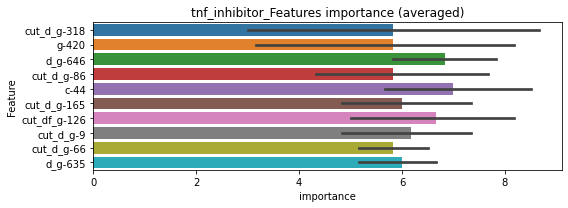

len(train_index) : 3889
len(valid_index) : 3890
================================= fold 1/2 tnf_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.018483	valid_1's binary_logloss: 0.0390599
[200]	training's binary_logloss: 0.00325229	valid_1's binary_logloss: 0.0246555
[300]	training's binary_logloss: 0.00103473	valid_1's binary_logloss: 0.0229139
Early stopping, best iteration is:
[305]	training's binary_logloss: 0.000988309	valid_1's binary_logloss: 0.0228588


len(train_index) : 3890
len(valid_index) : 3889
================================= fold 2/2 tnf_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0211792	valid_1's binary_logloss: 0.0297808
[200]	training's binary_logloss: 0.00420405	valid_1's binary_logloss: 0.0127808
[300]	training's binary_logloss: 0.00136894	valid_1's binary_logloss: 0.00973454
[400]	training's binary_logloss: 0.000669427	valid_1's binary_logloss: 0.00884621
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000526082	valid_1's binary_logloss: 0.00853155


tnf_inhibitor logloss: 0.015696081902643055


neg labels: 3289 → selected neg labels: 3271


topoisomerase_inhibitor, len(trt): 127, len(othr): 3271, target_rate: 0.0053330 → Adj_target_rate: 0.0051574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0188126	valid_1's binary_logloss: 0.0593861
[200]	training's binary_logloss: 0.00335178	valid_1's binary_logloss: 0.0442092
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00186113	valid_1's binary_logloss: 0.0422868
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0177739	valid_1's binary_logloss: 0.0643723
[200]	training's binary_logloss: 0.00305374	valid_1's binary_logloss: 0.0524047
Early stopping, best iteration is:
[206]	training's binary_logloss: 0.0028307	valid_1's binary_logloss: 0.0521699


1 / 3 AUC score:0.997
y_Threshold: 0.0117515, Threshold: 0.5043945, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 147 → Positive_corect_labels: 646/3778
p_label_rate: 0.0200904 Vs.target_rate: 0.00533
Num_p_label: 80.0, conf_0:0.45396, conf_1:0.55483
Num_p_label: 80.0, Expected: 21.2, Adj_threshold_1: 0.5043945
Num_p_label: 79.0, Expected: 21.2, Adj_threshold_2: 0.5143945
Num_p_label: 79.0, Expected: 21.2, Adj_threshold_3: 0.5243945
Num_p_label: 79.0, Expected: 21.2, Adj_threshold_4: 0.5343945
Num_p_label: 79.0, Expected: 21.2, Adj_threshold_5: 0.5443945
Num_p_label: 78.0, Expected: 21.2, Adj_threshold_6: 0.5543945
Num_p_label: 78.0, Expected: 21.2, Adj_threshold_7: 0.5643945
Num_p_label: 77.0, Expected: 21.2, Adj_threshold_8: 0.5743945
Num_p_label: 74.0, Expected: 21.2, Adj_threshold_9: 0.5843945
Num_p_label: 73.0, Expected: 21.2, Adj_threshold_10: 0.5943945
threshold: 0.6043945, positive_p_label: 71.0/3982, p_label_rate: 0.0178302
positive_y_label: 646.0/3778, y_label_rate: 0.1709899

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0121023	valid_1's binary_logloss: 0.0457593
[200]	training's binary_logloss: 0.00178325	valid_1's binary_logloss: 0.0301645
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.00104112	valid_1's binary_logloss: 0.027906
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0139372	valid_1's binary_logloss: 0.0360629
[200]	training's binary_logloss: 0.00218548	valid_1's binary_logloss: 0.0232444
[300]	training's binary_logloss: 0.000865948	valid_1's binary_logloss: 0.0208198
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.000896323	valid_1's binary_logloss: 0.020691


2 / 3 AUC score:1.000
y_Threshold: 0.0889340, Threshold: 0.6043945, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 28 → Positive_corect_labels: 632.0/3750
p_label_rate: 0.0449523 Vs.target_rate: 0.00533
Num_p_label: 179.0, conf_0:0.54396, conf_1:0.66483
Num_p_label: 179.0, Expected: 21.2, Adj_threshold_1: 0.6043945
Num_p_label: 177.0, Expected: 21.2, Adj_threshold_2: 0.6143945
Num_p_label: 176.0, Expected: 21.2, Adj_threshold_3: 0.6243945
Num_p_label: 173.0, Expected: 21.2, Adj_threshold_4: 0.6343945
Num_p_label: 171.0, Expected: 21.2, Adj_threshold_5: 0.6443945
Num_p_label: 171.0, Expected: 21.2, Adj_threshold_6: 0.6543945
Num_p_label: 170.0, Expected: 21.2, Adj_threshold_7: 0.6643945
Num_p_label: 169.0, Expected: 21.2, Adj_threshold_8: 0.6743945
Num_p_label: 167.0, Expected: 21.2, Adj_threshold_9: 0.6843945
Num_p_label: 165.0, Expected: 21.2, Adj_threshold_10: 0.6943945
threshold: 0.7043945, positive_p_label: 162.0/3982, p_label_rate: 0.0406831
positive_y_label: 632.0/3750, y_label_ra

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.010538	valid_1's binary_logloss: 0.0488351
[200]	training's binary_logloss: 0.00147907	valid_1's binary_logloss: 0.0338667
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.000922248	valid_1's binary_logloss: 0.0322621
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.012236	valid_1's binary_logloss: 0.0293575
[200]	training's binary_logloss: 0.00182638	valid_1's binary_logloss: 0.0161751
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.00107312	valid_1's binary_logloss: 0.0143685


3 / 3 AUC score:1.000
y_Threshold: 0.0701985, Threshold: 0.7043945, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 22 → Positive_corect_labels: 621.0/3728
p_label_rate: 0.0474636 Vs.target_rate: 0.00533
Num_p_label: 189.0, conf_0:0.63396, conf_1:0.77483
Num_p_label: 189.0, Expected: 21.2, Adj_threshold_1: 0.7043945
Num_p_label: 189.0, Expected: 21.2, Adj_threshold_2: 0.7143945
Num_p_label: 187.0, Expected: 21.2, Adj_threshold_3: 0.7243945
Num_p_label: 187.0, Expected: 21.2, Adj_threshold_4: 0.7343945
Num_p_label: 186.0, Expected: 21.2, Adj_threshold_5: 0.7443945
Num_p_label: 183.0, Expected: 21.2, Adj_threshold_6: 0.7543945
Num_p_label: 183.0, Expected: 21.2, Adj_threshold_7: 0.7643945
Num_p_label: 182.0, Expected: 21.2, Adj_threshold_8: 0.7743945
Num_p_label: 180.0, Expected: 21.2, Adj_threshold_9: 0.7843945
Num_p_label: 179.0, Expected: 21.2, Adj_threshold_10: 0.7943945
threshold: 0.8043945, positive_p_label: 178.0/3982, p_label_rate: 0.0447012
positive_y_label: 799.0/7710, y_label_ra

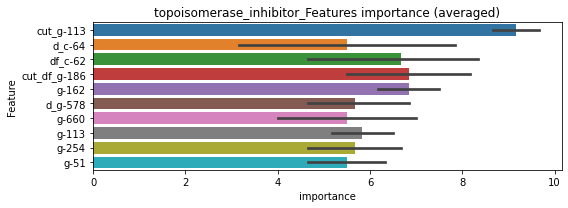

len(train_index) : 3855
len(valid_index) : 3855
================================= fold 1/2 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0233782	valid_1's binary_logloss: 0.0382018
[200]	training's binary_logloss: 0.00426786	valid_1's binary_logloss: 0.0201779
[300]	training's binary_logloss: 0.00134896	valid_1's binary_logloss: 0.0171779
[400]	training's binary_logloss: 0.000661495	valid_1's binary_logloss: 0.016171
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00054244	valid_1's binary_logloss: 0.0158603


len(train_index) : 3855
len(valid_index) : 3855
================================= fold 2/2 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0236468	valid_1's binary_logloss: 0.0441941
[200]	training's binary_logloss: 0.00435017	valid_1's binary_logloss: 0.0246497
[300]	training's binary_logloss: 0.00144506	valid_1's binary_logloss: 0.019366
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00076872	valid_1's binary_logloss: 0.0177857


topoisomerase_inhibitor logloss: 0.016822975146725656


neg labels: 3289 → selected neg labels: 3286


transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00670808	valid_1's binary_logloss: 0.0177736
[200]	training's binary_logloss: 0.000915781	valid_1's binary_logloss: 0.0104771
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.000514935	valid_1's binary_logloss: 0.00990434
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00757211	valid_1's binary_logloss: 0.0139543
[200]	training's binary_logloss: 0.00099719	valid_1's binary_logloss: 0.0067382
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.000588006	valid_1's binary_logloss: 0.00620681


1 / 3 AUC score:1.000
y_Threshold: 0.0011497, Threshold: 0.0012532, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0200904 Vs.target_rate: 0.00076
Num_p_label: 80.0, conf_0:0.00113, conf_1:0.00138
Num_p_label: 80.0, Expected: 3.0, Adj_threshold_1: 0.0012532
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0112532
threshold: 0.0112532, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00691591	valid_1's binary_logloss: 0.0172205
[200]	training's binary_logloss: 0.000931851	valid_1's binary_logloss: 0.0100454
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.000534806	valid_1's binary_logloss: 0.00919769
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00783502	valid_1's binary_logloss: 0.0142848
[200]	training's binary_logloss: 0.00102942	valid_1's binary_logloss: 0.00676973
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.000602426	valid_1's binary_logloss: 0.0061956


2 / 3 AUC score:1.000
y_Threshold: 0.0041775, Threshold: 0.0112532, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.01013, conf_1:0.01238
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0112532
Num_p_label: 118.0, Expected: 3.0, Adj_threshold_2: 0.0012532
threshold: 0.0012532, positive_p_label: 118.0/3982, p_label_rate: 0.0296334
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00691591	valid_1's binary_logloss: 0.0172205
[200]	training's binary_logloss: 0.000931851	valid_1's binary_logloss: 0.0100454
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.000534806	valid_1's binary_logloss: 0.00919769
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00783502	valid_1's binary_logloss: 0.0142848
[200]	training's binary_logloss: 0.00102942	valid_1's binary_logloss: 0.00676973
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.000602426	valid_1's binary_logloss: 0.0061956


3 / 3 AUC score:1.000
y_Threshold: 0.0041775, Threshold: 0.0012532, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0296334 Vs.target_rate: 0.00076
Num_p_label: 118.0, conf_0:0.00113, conf_1:0.00138
Num_p_label: 118.0, Expected: 3.0, Adj_threshold_1: 0.0012532
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0112532
threshold: 0.0112532, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7793, y_label_rate: 0.0843064


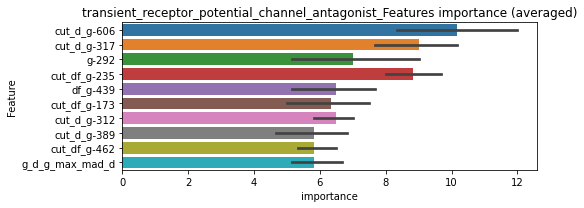

len(train_index) : 3896
len(valid_index) : 3897
================================= fold 1/2 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.01385	valid_1's binary_logloss: 0.0214845
[200]	training's binary_logloss: 0.00188036	valid_1's binary_logloss: 0.00857839
[300]	training's binary_logloss: 0.000561265	valid_1's binary_logloss: 0.00688164
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000313847	valid_1's binary_logloss: 0.00650023


len(train_index) : 3897
len(valid_index) : 3896
================================= fold 2/2 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0145016	valid_1's binary_logloss: 0.018349
[200]	training's binary_logloss: 0.00210184	valid_1's binary_logloss: 0.00578636
[300]	training's binary_logloss: 0.000630963	valid_1's binary_logloss: 0.00426929
[400]	training's binary_logloss: 0.000321629	valid_1's binary_logloss: 0.00384649
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000278882	valid_1's binary_logloss: 0.0037627


transient_receptor_potential_channel_antagonist logloss: 0.00513164147490588


neg labels: 3289 → selected neg labels: 3288


tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00342119	valid_1's binary_logloss: 0.00534577
[200]	training's binary_logloss: 0.000356461	valid_1's binary_logloss: 0.00185342
Early stopping, best iteration is:
[200]	training's binary_logloss: 0.000356461	valid_1's binary_logloss: 0.00185342
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00368642	valid_1's binary_logloss: 0.00496678
[200]	training's binary_logloss: 0.000380842	valid_1's binary_logloss: 0.00120136
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.000245664	valid_1's binary_logloss: 0.00104677


1 / 3 AUC score:1.000
y_Threshold: 0.0005878, Threshold: 0.0008973, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0200904 Vs.target_rate: 0.00025
Num_p_label: 80.0, conf_0:0.00081, conf_1:0.00099
Num_p_label: 80.0, Expected: 1.0, Adj_threshold_1: 0.0008973
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0108973
threshold: 0.0108973, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00348507	valid_1's binary_logloss: 0.005586
[200]	training's binary_logloss: 0.000356808	valid_1's binary_logloss: 0.00178712
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.000248127	valid_1's binary_logloss: 0.00168793
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00374764	valid_1's binary_logloss: 0.00430654
[200]	training's binary_logloss: 0.000382428	valid_1's binary_logloss: 0.00066023
[300]	training's binary_logloss: 0.000242374	valid_1's binary_logloss: 0.00051427
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000226536	valid_1's binary_logloss: 0.000500146


2 / 3 AUC score:1.000
y_Threshold: 0.0449261, Threshold: 0.0108973, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00025
Num_p_label: 0.0, conf_0:0.00981, conf_1:0.01199
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0108973
Num_p_label: 114.0, Expected: 1.0, Adj_threshold_2: 0.0008973
threshold: 0.0008973, positive_p_label: 114.0/3982, p_label_rate: 0.0286288
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00348507	valid_1's binary_logloss: 0.005586
[200]	training's binary_logloss: 0.000356808	valid_1's binary_logloss: 0.00178712
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.000248127	valid_1's binary_logloss: 0.00168793
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00374764	valid_1's binary_logloss: 0.00430654
[200]	training's binary_logloss: 0.000382428	valid_1's binary_logloss: 0.00066023
[300]	training's binary_logloss: 0.000242374	valid_1's binary_logloss: 0.00051427
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000226536	valid_1's binary_logloss: 0.000500146


3 / 3 AUC score:1.000
y_Threshold: 0.0449261, Threshold: 0.0008973, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0286288 Vs.target_rate: 0.00025
Num_p_label: 114.0, conf_0:0.00081, conf_1:0.00099
Num_p_label: 114.0, Expected: 1.0, Adj_threshold_1: 0.0008973
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0108973
threshold: 0.0108973, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/7795, y_label_rate: 0.0842848


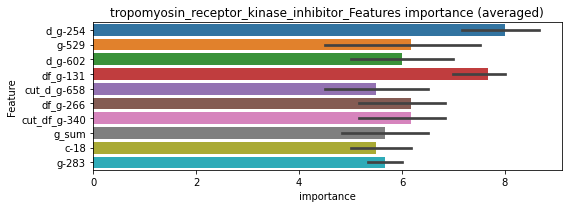

len(train_index) : 3897
len(valid_index) : 3898
================================= fold 1/2 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00943208	valid_1's binary_logloss: 0.0108506
[200]	training's binary_logloss: 0.000865254	valid_1's binary_logloss: 0.00184386
[300]	training's binary_logloss: 0.000223461	valid_1's binary_logloss: 0.00115209
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.000154769	valid_1's binary_logloss: 0.0010836


len(train_index) : 3898
len(valid_index) : 3897
================================= fold 2/2 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0096977	valid_1's binary_logloss: 0.0106562
[200]	training's binary_logloss: 0.000923941	valid_1's binary_logloss: 0.0016188
[300]	training's binary_logloss: 0.000240197	valid_1's binary_logloss: 0.000806557
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000151835	valid_1's binary_logloss: 0.000700538


tropomyosin_receptor_kinase_inhibitor logloss: 0.0008920927937909614


neg labels: 3289 → selected neg labels: 3285


trpv_agonist, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00781496	valid_1's binary_logloss: 0.021116
[200]	training's binary_logloss: 0.00104122	valid_1's binary_logloss: 0.012899
Early stopping, best iteration is:
[220]	training's binary_logloss: 0.000834091	valid_1's binary_logloss: 0.0125976
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00891296	valid_1's binary_logloss: 0.0154332
[200]	training's binary_logloss: 0.00121725	valid_1's binary_logloss: 0.0055227
[300]	training's binary_logloss: 0.000549365	valid_1's binary_logloss: 0.00436802
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.000492442	valid_1's binary_logloss: 0.0043014


1 / 3 AUC score:1.000
y_Threshold: 0.0023652, Threshold: 0.0049292, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00105
Num_p_label: 80.0, conf_0:0.00444, conf_1:0.00542
Num_p_label: 80.0, Expected: 4.2, Adj_threshold_1: 0.0049292
Num_p_label: 24.0, Expected: 4.2, Adj_threshold_2: 0.0149292
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_3: 0.0249292
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_4: 0.0349292
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_5: 0.0449292
threshold: 0.0449292, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0077335	valid_1's binary_logloss: 0.0197928
[200]	training's binary_logloss: 0.00103282	valid_1's binary_logloss: 0.0114236
Early stopping, best iteration is:
[220]	training's binary_logloss: 0.000827869	valid_1's binary_logloss: 0.0111638
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00841001	valid_1's binary_logloss: 0.0139684
[200]	training's binary_logloss: 0.00115687	valid_1's binary_logloss: 0.00498762
[300]	training's binary_logloss: 0.00053081	valid_1's binary_logloss: 0.00394089
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.000482084	valid_1's binary_logloss: 0.0038411


2 / 3 AUC score:1.000
y_Threshold: 0.0197658, Threshold: 0.0449292, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0090407 Vs.target_rate: 0.00105
Num_p_label: 36.0, conf_0:0.04044, conf_1:0.04942
Num_p_label: 36.0, Expected: 4.2, Adj_threshold_1: 0.0449292
Num_p_label: 30.0, Expected: 4.2, Adj_threshold_2: 0.0549292
Num_p_label: 26.0, Expected: 4.2, Adj_threshold_3: 0.0649292
Num_p_label: 22.0, Expected: 4.2, Adj_threshold_4: 0.0749292
Num_p_label: 22.0, Expected: 4.2, Adj_threshold_5: 0.0849292
Num_p_label: 18.0, Expected: 4.2, Adj_threshold_6: 0.0949292
Num_p_label: 15.0, Expected: 4.2, Adj_threshold_7: 0.1049292
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_8: 0.1149292
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_9: 0.1249292
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_10: 0.1349292
threshold: 0.1449292, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
=========

Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00730831	valid_1's binary_logloss: 0.0201151
[200]	training's binary_logloss: 0.00100356	valid_1's binary_logloss: 0.0119424
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.000544274	valid_1's binary_logloss: 0.0106127
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00822291	valid_1's binary_logloss: 0.0140896
[200]	training's binary_logloss: 0.00113084	valid_1's binary_logloss: 0.00506709
[300]	training's binary_logloss: 0.000521152	valid_1's binary_logloss: 0.00415845
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.000526294	valid_1's binary_logloss: 0.00415504


3 / 3 AUC score:1.000
y_Threshold: 0.0400405, Threshold: 0.1449292, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0027624 Vs.target_rate: 0.00105
Num_p_label: 11.0, conf_0:0.13044, conf_1:0.15942
threshold: 0.1449292, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 666.0/7788, y_label_rate: 0.0855162


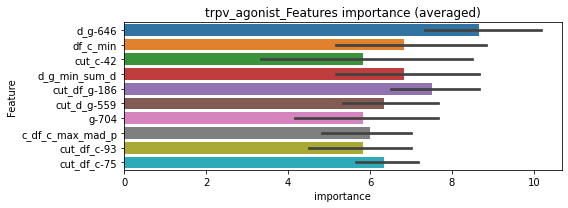

len(train_index) : 3894
len(valid_index) : 3894
================================= fold 1/2 trpv_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0152369	valid_1's binary_logloss: 0.0266582
[200]	training's binary_logloss: 0.00229989	valid_1's binary_logloss: 0.0131277
Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00111617	valid_1's binary_logloss: 0.0112132


len(train_index) : 3894
len(valid_index) : 3894
================================= fold 2/2 trpv_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0161233	valid_1's binary_logloss: 0.0229797
[200]	training's binary_logloss: 0.00258649	valid_1's binary_logloss: 0.00715411
[300]	training's binary_logloss: 0.000799663	valid_1's binary_logloss: 0.00453351
[400]	training's binary_logloss: 0.000413635	valid_1's binary_logloss: 0.00389746
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000421803	valid_1's binary_logloss: 0.003882


trpv_agonist logloss: 0.007547601447810483


neg labels: 3289 → selected neg labels: 3281


trpv_antagonist, len(trt): 48, len(othr): 3281, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0154611	valid_1's binary_logloss: 0.0592569
Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00371891	valid_1's binary_logloss: 0.0515622
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0181975	valid_1's binary_logloss: 0.0393585
[200]	training's binary_logloss: 0.00316072	valid_1's binary_logloss: 0.0279366
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00140883	valid_1's binary_logloss: 0.0265973


1 / 3 AUC score:0.999
y_Threshold: 0.0059679, Threshold: 0.0064326, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0200904 Vs.target_rate: 0.00202
Num_p_label: 80.0, conf_0:0.00579, conf_1:0.00708
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_1: 0.0064326
Num_p_label: 0.0, Expected: 8.0, Adj_threshold_2: 0.0164326
threshold: 0.0164326, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0165735	valid_1's binary_logloss: 0.0543566
Early stopping, best iteration is:
[175]	training's binary_logloss: 0.00383882	valid_1's binary_logloss: 0.0453028
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0174437	valid_1's binary_logloss: 0.0468108
[200]	training's binary_logloss: 0.00283465	valid_1's binary_logloss: 0.0362642
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.00233141	valid_1's binary_logloss: 0.0359372


2 / 3 AUC score:1.000
y_Threshold: 0.0138542, Threshold: 0.0164326, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 14 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0010045 Vs.target_rate: 0.00202
Num_p_label: 4.0, conf_0:0.01479, conf_1:0.01808
threshold: 0.0164326, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 647.0/3787, y_label_rate: 0.1708476
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0155762	valid_1's binary_logloss: 0.0469614
[200]	training's binary_logloss: 0.00248789	valid_1's binary_logloss: 0.0358821
Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00268134	valid_1's binary_logloss: 0.0357792
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0161215	valid_1's binary_logloss: 0.0395672
[200]	training's binary_logloss: 0.00261018	valid_1's binary_logloss: 0.0290085
Early stopping, best iteration is:
[209]	training's binary_logloss: 0.002328	valid_1's binary_logloss: 0.0286811


3 / 3 AUC score:1.000
y_Threshold: 0.0143743, Threshold: 0.0164326, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 2 → Positive_corect_labels: 646.0/3785
p_label_rate: 0.0002511 Vs.target_rate: 0.00202
Num_p_label: 1.0, conf_0:0.01479, conf_1:0.01808
Num_p_label: 1.0, Expected: 8.0, Adj_threshold_1: 0.0164326
Num_p_label: 102.0, Expected: 8.0, Adj_threshold_2: 0.0064326
threshold: 0.0064326, positive_p_label: 102.0/3982, p_label_rate: 0.0256153
positive_y_label: 748.0/7767, y_label_rate: 0.0963049


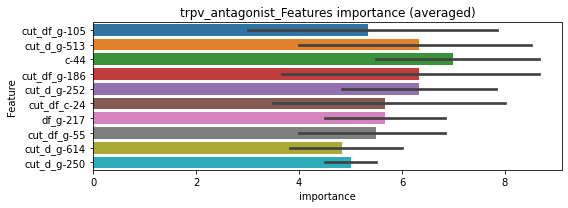

len(train_index) : 3883
len(valid_index) : 3884
================================= fold 1/2 trpv_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0401542	valid_1's binary_logloss: 0.0916919
[200]	training's binary_logloss: 0.0112698	valid_1's binary_logloss: 0.0772152
Early stopping, best iteration is:
[223]	training's binary_logloss: 0.00874117	valid_1's binary_logloss: 0.0765527


len(train_index) : 3884
len(valid_index) : 3883
================================= fold 2/2 trpv_antagonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0441216	valid_1's binary_logloss: 0.0849789
[200]	training's binary_logloss: 0.0126538	valid_1's binary_logloss: 0.0686939
Early stopping, best iteration is:
[202]	training's binary_logloss: 0.0123917	valid_1's binary_logloss: 0.068638


trpv_antagonist logloss: 0.07259587551088655


neg labels: 3289 → selected neg labels: 3267


tubulin_inhibitor, len(trt): 316, len(othr): 3267, target_rate: 0.0132695 → Adj_target_rate: 0.0111926
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0234633	valid_1's binary_logloss: 0.113162
Early stopping, best iteration is:
[142]	training's binary_logloss: 0.0102003	valid_1's binary_logloss: 0.107543
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0265558	valid_1's binary_logloss: 0.0924367
Early stopping, best iteration is:
[168]	training's binary_logloss: 0.00770253	valid_1's binary_logloss: 0.0805104


1 / 3 AUC score:0.984
y_Threshold: 0.0296354, Threshold: 0.1358342, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 195 → Positive_corect_labels: 621/3725
p_label_rate: 0.0200904 Vs.target_rate: 0.01327
Num_p_label: 80.0, conf_0:0.12225, conf_1:0.14942
threshold: 0.1358342, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 621.0/3725, y_label_rate: 0.1667114
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0148346	valid_1's binary_logloss: 0.0795047
Early stopping, best iteration is:
[175]	training's binary_logloss: 0.00310736	valid_1's binary_logloss: 0.0691601
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0165317	valid_1's binary_logloss: 0.0605374
Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00298793	valid_1's binary_logloss: 0.0479775


2 / 3 AUC score:0.996
y_Threshold: 0.0425454, Threshold: 0.1358342, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 46 → Positive_corect_labels: 598.0/3679
p_label_rate: 0.0306379 Vs.target_rate: 0.01327
Num_p_label: 122.0, conf_0:0.12225, conf_1:0.14942
threshold: 0.1358342, positive_p_label: 122.0/3982, p_label_rate: 0.0306379
positive_y_label: 598.0/3679, y_label_rate: 0.1625442
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0136405	valid_1's binary_logloss: 0.0457034
[200]	training's binary_logloss: 0.0019698	valid_1's binary_logloss: 0.0293277
[300]	training's binary_logloss: 0.000780295	valid_1's binary_logloss: 0.0265559
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.000698808	valid_1's binary_logloss: 0.0262059
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0124512	valid_1's binary_logloss: 0.0730351
[200]	training's binary_logloss: 0.00175728	valid_1's binary_logloss: 0.0618137
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.000819378	valid_1's binary_logloss: 0.0593618


3 / 3 AUC score:0.999
y_Threshold: 0.0206742, Threshold: 0.1358342, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 22 → Positive_corect_labels: 587.0/3657
p_label_rate: 0.0286288 Vs.target_rate: 0.01327
Num_p_label: 114.0, conf_0:0.12225, conf_1:0.14942
threshold: 0.1358342, positive_p_label: 114.0/3982, p_label_rate: 0.0286288
positive_y_label: 701.0/7639, y_label_rate: 0.0917659


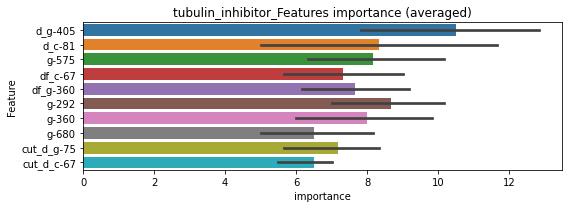

len(train_index) : 3819
len(valid_index) : 3820
================================= fold 1/2 tubulin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.02481	valid_1's binary_logloss: 0.0522687
[200]	training's binary_logloss: 0.00498184	valid_1's binary_logloss: 0.0320063
[300]	training's binary_logloss: 0.00166664	valid_1's binary_logloss: 0.026168
[400]	training's binary_logloss: 0.000810764	valid_1's binary_logloss: 0.0238787
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000623262	valid_1's binary_logloss: 0.0233028


len(train_index) : 3820
len(valid_index) : 3819
================================= fold 2/2 tubulin_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0248006	valid_1's binary_logloss: 0.0544508
[200]	training's binary_logloss: 0.00507576	valid_1's binary_logloss: 0.0358243
[300]	training's binary_logloss: 0.00165861	valid_1's binary_logloss: 0.0316142
[400]	training's binary_logloss: 0.000811885	valid_1's binary_logloss: 0.0299487
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000635071	valid_1's binary_logloss: 0.0295209


tubulin_inhibitor logloss: 0.02641141481558367


neg labels: 3289 → selected neg labels: 3276


tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3276, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0218059	valid_1's binary_logloss: 0.0748596
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.00595437	valid_1's binary_logloss: 0.0630787
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0232929	valid_1's binary_logloss: 0.0674181
Early stopping, best iteration is:
[181]	training's binary_logloss: 0.00548128	valid_1's binary_logloss: 0.0543641


1 / 3 AUC score:0.999
y_Threshold: 0.0136017, Threshold: 0.0165124, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 136 → Positive_corect_labels: 653/3795
p_label_rate: 0.0200904 Vs.target_rate: 0.00307
Num_p_label: 80.0, conf_0:0.01486, conf_1:0.01816
Num_p_label: 80.0, Expected: 12.2, Adj_threshold_1: 0.0165124
Num_p_label: 12.0, Expected: 12.2, Adj_threshold_2: 0.0265124
threshold: 0.0265124, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0219218	valid_1's binary_logloss: 0.0836761
Early stopping, best iteration is:
[169]	training's binary_logloss: 0.00599071	valid_1's binary_logloss: 0.0728292
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0231192	valid_1's binary_logloss: 0.069596
[200]	training's binary_logloss: 0.00427159	valid_1's binary_logloss: 0.0552442
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00337335	valid_1's binary_logloss: 0.0545992


2 / 3 AUC score:0.998
y_Threshold: 0.0254720, Threshold: 0.0265124, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 30 → Positive_corect_labels: 638.0/3765
p_label_rate: 0.0077850 Vs.target_rate: 0.00307
Num_p_label: 31.0, conf_0:0.02386, conf_1:0.02916
threshold: 0.0265124, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 638.0/3765, y_label_rate: 0.1694555
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.020764	valid_1's binary_logloss: 0.0624738
[200]	training's binary_logloss: 0.00370773	valid_1's binary_logloss: 0.04781
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00244819	valid_1's binary_logloss: 0.0473395
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0197568	valid_1's binary_logloss: 0.0659108
[200]	training's binary_logloss: 0.00342479	valid_1's binary_logloss: 0.0546185
Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00379979	valid_1's binary_logloss: 0.0544163


3 / 3 AUC score:0.999
y_Threshold: 0.0265337, Threshold: 0.0265124, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 18 → Positive_corect_labels: 629.0/3747
p_label_rate: 0.0045203 Vs.target_rate: 0.00307
Num_p_label: 18.0, conf_0:0.02386, conf_1:0.02916
threshold: 0.0265124, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 647.0/7729, y_label_rate: 0.0837107


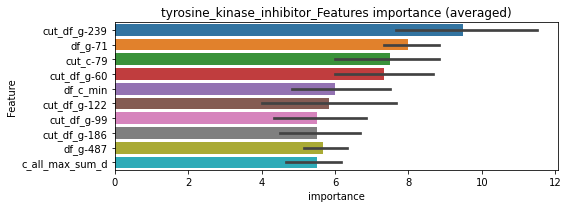

len(train_index) : 3864
len(valid_index) : 3865
================================= fold 1/2 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0261102	valid_1's binary_logloss: 0.0558686
[200]	training's binary_logloss: 0.00604581	valid_1's binary_logloss: 0.0399283
Early stopping, best iteration is:
[272]	training's binary_logloss: 0.00273653	valid_1's binary_logloss: 0.0383758


len(train_index) : 3865
len(valid_index) : 3864
================================= fold 2/2 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0302252	valid_1's binary_logloss: 0.050775
[200]	training's binary_logloss: 0.00726002	valid_1's binary_logloss: 0.0300729
[300]	training's binary_logloss: 0.0025994	valid_1's binary_logloss: 0.0260055
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00139347	valid_1's binary_logloss: 0.0251782


tyrosine_kinase_inhibitor logloss: 0.031777863789645505


neg labels: 3289 → selected neg labels: 3287


ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00464365	valid_1's binary_logloss: 0.00928136
[200]	training's binary_logloss: 0.000546239	valid_1's binary_logloss: 0.00373608
Early stopping, best iteration is:
[271]	training's binary_logloss: 0.000337926	valid_1's binary_logloss: 0.00335487
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00503121	valid_1's binary_logloss: 0.00710372
[200]	training's binary_logloss: 0.000584765	valid_1's binary_logloss: 0.00199731
[300]	training's binary_logloss: 0.000326647	valid_1's binary_logloss: 0.00167409
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.000316484	valid_1's binary_logloss: 0.00165933


1 / 3 AUC score:1.000
y_Threshold: 0.0008902, Threshold: 0.0014270, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0200904 Vs.target_rate: 0.00050
Num_p_label: 80.0, conf_0:0.00128, conf_1:0.00157
Num_p_label: 80.0, Expected: 2.0, Adj_threshold_1: 0.0014270
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0114270
threshold: 0.0114270, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00458791	valid_1's binary_logloss: 0.00845911
[200]	training's binary_logloss: 0.000521534	valid_1's binary_logloss: 0.00270827
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.00031609	valid_1's binary_logloss: 0.00237811
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00505168	valid_1's binary_logloss: 0.00685755
[200]	training's binary_logloss: 0.00056806	valid_1's binary_logloss: 0.00193443
[300]	training's binary_logloss: 0.000320866	valid_1's binary_logloss: 0.00155446
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.000322447	valid_1's binary_logloss: 0.00155413


2 / 3 AUC score:1.000
y_Threshold: 0.0425266, Threshold: 0.0114270, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0102963 Vs.target_rate: 0.00050
Num_p_label: 41.0, conf_0:0.01028, conf_1:0.01257
Num_p_label: 41.0, Expected: 2.0, Adj_threshold_1: 0.0114270
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_2: 0.0214270
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_3: 0.0314270
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.0414270
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.0514270
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_6: 0.0614270
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_7: 0.0714270
threshold: 0.0714270, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00458791	valid_1's binary_logloss: 0.00845911
[200]	training's binary_logloss: 0.000521534	valid_1's binary_logloss: 0.00270827
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.00031609	valid_1's binary_logloss: 0.00237811
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00505168	valid_1's binary_logloss: 0.00685755
[200]	training's binary_logloss: 0.00056806	valid_1's binary_logloss: 0.00193443
[300]	training's binary_logloss: 0.000320866	valid_1's binary_logloss: 0.00155446
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.000322447	valid_1's binary_logloss: 0.00155413


3 / 3 AUC score:1.000
y_Threshold: 0.0425266, Threshold: 0.0714270, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00050
Num_p_label: 1.0, conf_0:0.06428, conf_1:0.07857
threshold: 0.0714270, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 658.0/7794, y_label_rate: 0.0844239


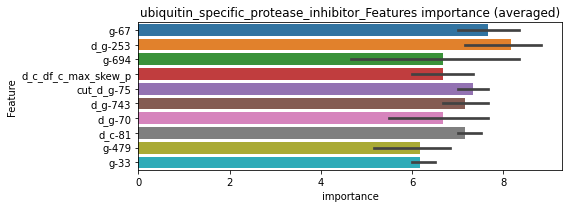

len(train_index) : 3897
len(valid_index) : 3897
================================= fold 1/2 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.011087	valid_1's binary_logloss: 0.0143274
[200]	training's binary_logloss: 0.00122615	valid_1's binary_logloss: 0.00395665
[300]	training's binary_logloss: 0.000339121	valid_1's binary_logloss: 0.00307959
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.000262603	valid_1's binary_logloss: 0.00296086


len(train_index) : 3897
len(valid_index) : 3897
================================= fold 2/2 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0114378	valid_1's binary_logloss: 0.0134448
[200]	training's binary_logloss: 0.00131799	valid_1's binary_logloss: 0.0025992
[300]	training's binary_logloss: 0.000372639	valid_1's binary_logloss: 0.00138741
[400]	training's binary_logloss: 0.000203252	valid_1's binary_logloss: 0.00119316
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000191515	valid_1's binary_logloss: 0.0011693


ubiquitin_specific_protease_inhibitor logloss: 0.002065079311597991


neg labels: 3289 → selected neg labels: 3258


vegfr_inhibitor, len(trt): 170, len(othr): 3258, target_rate: 0.0071387 → Adj_target_rate: 0.0066081
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0372754	valid_1's binary_logloss: 0.153201
Early stopping, best iteration is:
[151]	training's binary_logloss: 0.0148747	valid_1's binary_logloss: 0.141755
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.043649	valid_1's binary_logloss: 0.12538
Early stopping, best iteration is:
[183]	training's binary_logloss: 0.0116518	valid_1's binary_logloss: 0.102017


1 / 3 AUC score:0.989
y_Threshold: 0.0399872, Threshold: 0.0673704, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 179 → Positive_corect_labels: 627/3730
p_label_rate: 0.0200904 Vs.target_rate: 0.00714
Num_p_label: 80.0, conf_0:0.06063, conf_1:0.07411
threshold: 0.0673704, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 627.0/3730, y_label_rate: 0.1680965
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0336619	valid_1's binary_logloss: 0.126436
Early stopping, best iteration is:
[178]	training's binary_logloss: 0.00850404	valid_1's binary_logloss: 0.107065
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0367466	valid_1's binary_logloss: 0.108366
[200]	training's binary_logloss: 0.00725415	valid_1's binary_logloss: 0.0837942
Early stopping, best iteration is:
[210]	training's binary_logloss: 0.00641251	valid_1's binary_logloss: 0.0828547


2 / 3 AUC score:0.997
y_Threshold: 0.0659006, Threshold: 0.0673704, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 68 → Positive_corect_labels: 593.0/3662
p_label_rate: 0.0334003 Vs.target_rate: 0.00714
Num_p_label: 133.0, conf_0:0.06063, conf_1:0.07411
Num_p_label: 133.0, Expected: 28.4, Adj_threshold_1: 0.0673704
Num_p_label: 115.0, Expected: 28.4, Adj_threshold_2: 0.0773704
Num_p_label: 98.0, Expected: 28.4, Adj_threshold_3: 0.0873704
Num_p_label: 90.0, Expected: 28.4, Adj_threshold_4: 0.0973704
Num_p_label: 72.0, Expected: 28.4, Adj_threshold_5: 0.1073704
Num_p_label: 64.0, Expected: 28.4, Adj_threshold_6: 0.1173704
Num_p_label: 55.0, Expected: 28.4, Adj_threshold_7: 0.1273704
threshold: 0.1273704, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 593.0/3662, y_label_rate: 0.1619334
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0269454	valid_1's binary_logloss: 0.0883201
[200]	training's binary_logloss: 0.0049519	valid_1's binary_logloss: 0.0646059
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00319921	valid_1's binary_logloss: 0.0622648
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0309414	valid_1's binary_logloss: 0.0893878
[200]	training's binary_logloss: 0.00559267	valid_1's binary_logloss: 0.0636399
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.00366849	valid_1's binary_logloss: 0.0603536


3 / 3 AUC score:0.999
y_Threshold: 0.0526100, Threshold: 0.1273704, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 28 → Positive_corect_labels: 579.0/3634
p_label_rate: 0.0140633 Vs.target_rate: 0.00714
Num_p_label: 56.0, conf_0:0.11463, conf_1:0.14011
threshold: 0.1273704, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 635.0/7616, y_label_rate: 0.0833771


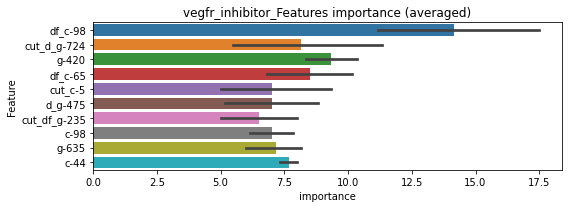

len(train_index) : 3808
len(valid_index) : 3808
================================= fold 1/2 vegfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0370695	valid_1's binary_logloss: 0.084462
[200]	training's binary_logloss: 0.0101948	valid_1's binary_logloss: 0.0611261
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.00445448	valid_1's binary_logloss: 0.0574161


len(train_index) : 3808
len(valid_index) : 3808
================================= fold 2/2 vegfr_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0373829	valid_1's binary_logloss: 0.0798978
[200]	training's binary_logloss: 0.0103035	valid_1's binary_logloss: 0.0577233
[300]	training's binary_logloss: 0.00391849	valid_1's binary_logloss: 0.053247
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00265692	valid_1's binary_logloss: 0.0520832


vegfr_inhibitor logloss: 0.05474969032506082


neg labels: 3289 → selected neg labels: 3285


vitamin_b, len(trt): 26, len(othr): 3285, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00865316	valid_1's binary_logloss: 0.0289482
Early stopping, best iteration is:
[172]	training's binary_logloss: 0.00182582	valid_1's binary_logloss: 0.0236844
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0106636	valid_1's binary_logloss: 0.0200174
[200]	training's binary_logloss: 0.00157306	valid_1's binary_logloss: 0.00997343
[300]	training's binary_logloss: 0.00065762	valid_1's binary_logloss: 0.00878109
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.000680434	valid_1's binary_logloss: 0.00873598


1 / 3 AUC score:1.000
y_Threshold: 0.0027921, Threshold: 0.0035310, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0200904 Vs.target_rate: 0.00109
Num_p_label: 80.0, conf_0:0.00318, conf_1:0.00388
Num_p_label: 80.0, Expected: 4.3, Adj_threshold_1: 0.0035310
Num_p_label: 1.0, Expected: 4.3, Adj_threshold_2: 0.0135310
threshold: 0.0135310, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00899592	valid_1's binary_logloss: 0.0283641
[200]	training's binary_logloss: 0.00126986	valid_1's binary_logloss: 0.0222924
Early stopping, best iteration is:
[223]	training's binary_logloss: 0.000980908	valid_1's binary_logloss: 0.0217938
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0104273	valid_1's binary_logloss: 0.0197421
[200]	training's binary_logloss: 0.00151685	valid_1's binary_logloss: 0.00970478
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.000752343	valid_1's binary_logloss: 0.00873495


2 / 3 AUC score:1.000
y_Threshold: 0.0103742, Threshold: 0.0135310, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00109
Num_p_label: 1.0, conf_0:0.01218, conf_1:0.01488
Num_p_label: 1.0, Expected: 4.3, Adj_threshold_1: 0.0135310
Num_p_label: 71.0, Expected: 4.3, Adj_threshold_2: 0.0035310
threshold: 0.0035310, positive_p_label: 71.0/3982, p_label_rate: 0.0178302
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.00899592	valid_1's binary_logloss: 0.0283641
[200]	training's binary_logloss: 0.00126986	valid_1's binary_logloss: 0.0222924
Early stopping, best iteration is:
[223]	training's binary_logloss: 0.000980908	valid_1's binary_logloss: 0.0217938
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0104273	valid_1's binary_logloss: 0.0197421
[200]	training's binary_logloss: 0.00151685	valid_1's binary_logloss: 0.00970478
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.000752343	valid_1's binary_logloss: 0.00873495


3 / 3 AUC score:1.000
y_Threshold: 0.0103742, Threshold: 0.0035310, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0178302 Vs.target_rate: 0.00109
Num_p_label: 71.0, conf_0:0.00318, conf_1:0.00388
Num_p_label: 71.0, Expected: 4.3, Adj_threshold_1: 0.0035310
Num_p_label: 1.0, Expected: 4.3, Adj_threshold_2: 0.0135310
threshold: 0.0135310, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 658.0/7792, y_label_rate: 0.0844456


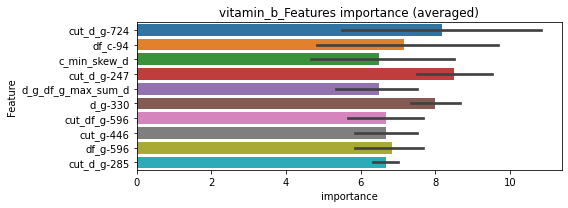

len(train_index) : 3896
len(valid_index) : 3896
================================= fold 1/2 vitamin_b=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0162859	valid_1's binary_logloss: 0.0295828
[200]	training's binary_logloss: 0.00256587	valid_1's binary_logloss: 0.0161468
[300]	training's binary_logloss: 0.000794046	valid_1's binary_logloss: 0.0147846
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.000800686	valid_1's binary_logloss: 0.014755


len(train_index) : 3896
len(valid_index) : 3896
================================= fold 2/2 vitamin_b=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.01843	valid_1's binary_logloss: 0.0247801
[200]	training's binary_logloss: 0.00326546	valid_1's binary_logloss: 0.00899177
[300]	training's binary_logloss: 0.00103008	valid_1's binary_logloss: 0.00625004
[400]	training's binary_logloss: 0.000502735	valid_1's binary_logloss: 0.00551215
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000408669	valid_1's binary_logloss: 0.00533531


vitamin_b logloss: 0.010045133494826611


neg labels: 3289 → selected neg labels: 3281


vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3281, target_rate: 0.0016377 → Adj_target_rate: 0.0018906
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0106656	valid_1's binary_logloss: 0.0341286
[200]	training's binary_logloss: 0.00138552	valid_1's binary_logloss: 0.0214578
[300]	training's binary_logloss: 0.000577877	valid_1's binary_logloss: 0.0198787
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.000590721	valid_1's binary_logloss: 0.0198538
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0123853	valid_1's binary_logloss: 0.024076
[200]	training's binary_logloss: 0.00168494	valid_1's binary_logloss: 0.012249
[300]	training's binary_logloss: 0.000656706	valid_1's binary_logloss: 0.0104884
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000542257	valid_1's binary_logloss: 0.0102455


1 / 3 AUC score:1.000
y_Threshold: 0.0014667, Threshold: 0.0020542, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0200904 Vs.target_rate: 0.00164
Num_p_label: 80.0, conf_0:0.00185, conf_1:0.00226
Num_p_label: 80.0, Expected: 6.5, Adj_threshold_1: 0.0020542
Num_p_label: 4.0, Expected: 6.5, Adj_threshold_2: 0.0120542
threshold: 0.0120542, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.011359	valid_1's binary_logloss: 0.0349228
[200]	training's binary_logloss: 0.00145573	valid_1's binary_logloss: 0.021561
[300]	training's binary_logloss: 0.000587455	valid_1's binary_logloss: 0.0196839
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.000609111	valid_1's binary_logloss: 0.0196205
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0121358	valid_1's binary_logloss: 0.024548
[200]	training's binary_logloss: 0.00165549	valid_1's binary_logloss: 0.0118936
[300]	training's binary_logloss: 0.000657863	valid_1's binary_logloss: 0.0102771
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00051506	valid_1's binary_logloss: 0.00991991


2 / 3 AUC score:1.000
y_Threshold: 0.0068928, Threshold: 0.0120542, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0015068 Vs.target_rate: 0.00164
Num_p_label: 6.0, conf_0:0.01085, conf_1:0.01326
threshold: 0.0120542, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.011359	valid_1's binary_logloss: 0.0349228
[200]	training's binary_logloss: 0.00145573	valid_1's binary_logloss: 0.021561
[300]	training's binary_logloss: 0.000587455	valid_1's binary_logloss: 0.0196839
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.000609111	valid_1's binary_logloss: 0.0196205
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0121358	valid_1's binary_logloss: 0.024548
[200]	training's binary_logloss: 0.00165549	valid_1's binary_logloss: 0.0118936
[300]	training's binary_logloss: 0.000657863	valid_1's binary_logloss: 0.0102771
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00051506	valid_1's binary_logloss: 0.00991991


3 / 3 AUC score:1.000
y_Threshold: 0.0068928, Threshold: 0.0120542, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0015068 Vs.target_rate: 0.00164
Num_p_label: 6.0, conf_0:0.01085, conf_1:0.01326
threshold: 0.0120542, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 662.0/7787, y_label_rate: 0.0850135


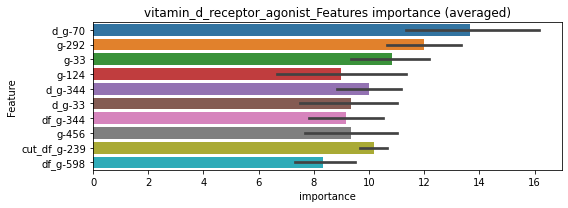

len(train_index) : 3893
len(valid_index) : 3894
================================= fold 1/2 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0192336	valid_1's binary_logloss: 0.034864
[200]	training's binary_logloss: 0.00327257	valid_1's binary_logloss: 0.0185986
[300]	training's binary_logloss: 0.0010096	valid_1's binary_logloss: 0.0158063
[400]	training's binary_logloss: 0.000486039	valid_1's binary_logloss: 0.01488
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000323933	valid_1's binary_logloss: 0.014513


len(train_index) : 3894
len(valid_index) : 3893
================================= fold 2/2 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0194962	valid_1's binary_logloss: 0.0339572
[200]	training's binary_logloss: 0.00348009	valid_1's binary_logloss: 0.0159018
[300]	training's binary_logloss: 0.00105209	valid_1's binary_logloss: 0.0126529
[400]	training's binary_logloss: 0.000498151	valid_1's binary_logloss: 0.0115163
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000424332	valid_1's binary_logloss: 0.0113721


vitamin_d_receptor_agonist logloss: 0.012942745930650507


neg labels: 3289 → selected neg labels: 3284


wnt_inhibitor, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0100897	valid_1's binary_logloss: 0.0338181
[200]	training's binary_logloss: 0.00145142	valid_1's binary_logloss: 0.0256399
Early stopping, best iteration is:
[206]	training's binary_logloss: 0.00134931	valid_1's binary_logloss: 0.0254736
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.011429	valid_1's binary_logloss: 0.0296627
[200]	training's binary_logloss: 0.00172771	valid_1's binary_logloss: 0.0189709
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.000883911	valid_1's binary_logloss: 0.0174113


1 / 3 AUC score:1.000
y_Threshold: 0.0023686, Threshold: 0.0026618, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0200904 Vs.target_rate: 0.00126
Num_p_label: 80.0, conf_0:0.00240, conf_1:0.00293
Num_p_label: 80.0, Expected: 5.0, Adj_threshold_1: 0.0026618
Num_p_label: 0.0, Expected: 5.0, Adj_threshold_2: 0.0126618
threshold: 0.0126618, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0104404	valid_1's binary_logloss: 0.0357833
[200]	training's binary_logloss: 0.00149671	valid_1's binary_logloss: 0.026243
Early stopping, best iteration is:
[208]	training's binary_logloss: 0.00136233	valid_1's binary_logloss: 0.0259101
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0119821	valid_1's binary_logloss: 0.0298845
[200]	training's binary_logloss: 0.00175839	valid_1's binary_logloss: 0.0199529
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00109895	valid_1's binary_logloss: 0.0187304


2 / 3 AUC score:1.000
y_Threshold: 0.0077214, Threshold: 0.0126618, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00126
Num_p_label: 0.0, conf_0:0.01140, conf_1:0.01393
Num_p_label: 0.0, Expected: 5.0, Adj_threshold_1: 0.0126618
Num_p_label: 160.0, Expected: 5.0, Adj_threshold_2: 0.0026618
threshold: 0.0026618, positive_p_label: 160.0/3982, p_label_rate: 0.0401808
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0104404	valid_1's binary_logloss: 0.0357833
[200]	training's binary_logloss: 0.00149671	valid_1's binary_logloss: 0.026243
Early stopping, best iteration is:
[208]	training's binary_logloss: 0.00136233	valid_1's binary_logloss: 0.0259101
Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0119821	valid_1's binary_logloss: 0.0298845
[200]	training's binary_logloss: 0.00175839	valid_1's binary_logloss: 0.0199529
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00109895	valid_1's binary_logloss: 0.0187304


3 / 3 AUC score:1.000
y_Threshold: 0.0077214, Threshold: 0.0026618, pos_neg_ratio: 0.8000000
Remove_noisy_labels: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0401808 Vs.target_rate: 0.00126
Num_p_label: 160.0, conf_0:0.00240, conf_1:0.00293
Num_p_label: 160.0, Expected: 5.0, Adj_threshold_1: 0.0026618
Num_p_label: 0.0, Expected: 5.0, Adj_threshold_2: 0.0126618
threshold: 0.0126618, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/7790, y_label_rate: 0.0842105


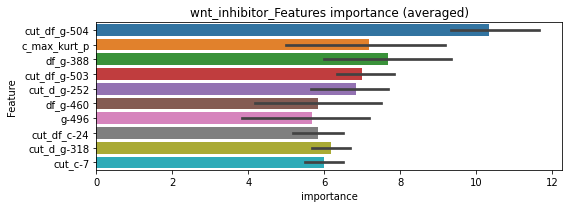

len(train_index) : 3895
len(valid_index) : 3895
================================= fold 1/2 wnt_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0173317	valid_1's binary_logloss: 0.0325134
[200]	training's binary_logloss: 0.00295057	valid_1's binary_logloss: 0.0179712
[300]	training's binary_logloss: 0.000918905	valid_1's binary_logloss: 0.015908
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.000638758	valid_1's binary_logloss: 0.0156354


len(train_index) : 3895
len(valid_index) : 3895
================================= fold 2/2 wnt_inhibitor=================================


Training until validation scores don't improve for 10 rounds
[100]	training's binary_logloss: 0.0187846	valid_1's binary_logloss: 0.0304614
[200]	training's binary_logloss: 0.00338054	valid_1's binary_logloss: 0.0149526
[300]	training's binary_logloss: 0.00105952	valid_1's binary_logloss: 0.0122801
Early stopping, best iteration is:
[343]	training's binary_logloss: 0.000750562	valid_1's binary_logloss: 0.0117712


wnt_inhibitor logloss: 0.013703291800764385


In [46]:
categorical_cols = []
scores = []
models = []
feature_importance_df = pd.DataFrame()
importance_cols_df = pd.DataFrame()

for target_col in tqdm(train_targets_scored.columns[1:]):
    _preds, _score, models, _feature_importance_df = run_lgbm(target_col)

    sub[target_col] = _preds
    scores.append(_score)
    
    if DEBUG:
        feature_importance_df = create_featureimprotance(models, feature_importance_df)
        importance_cols_df[target_col] = select_importance_cols(_feature_importance_df)

In [47]:
sub.to_csv('submission.csv', index=False)

In [48]:
print(f"CV:{np.mean(scores)}")

CV:0.023377994849577102


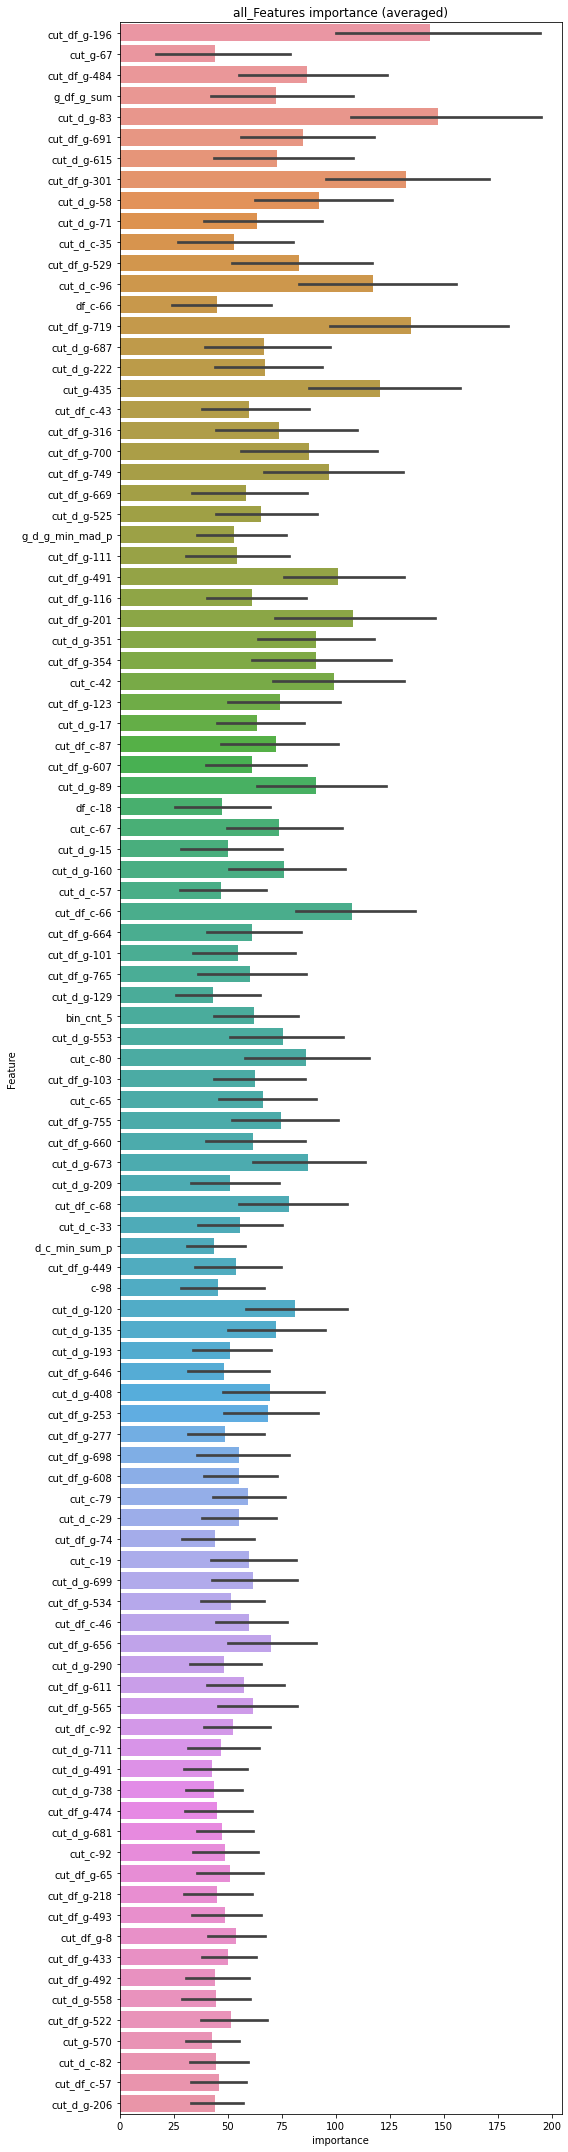

In [49]:
if DEBUG:
    show_feature_importance(feature_importance_df)
    feature_importance_df.to_csv(f'feature_importance_df.{Version}.csv', index=False)
    importance_cols_df.to_csv(f'importance_cols_df.{Version}.csv', index=False)